In [1]:
#Import all functions 

from pygazeanalyser_functions import *

# Examples


### Read Data

In [2]:
"""
Reads Data from the asc file. Make sure the asc file is inside the folder 'Participant Data'

Change phase to switch between fixation, stimulus and reward phases

Example code below



"""


#participant details
partic_id = 'G036'
game_nr  = 4 #game number
phase = 'fixation'


data = read_data(partic_id, game_nr,phase)
#print(data) #Uncomment this line to print

#### Draw Heatmaps

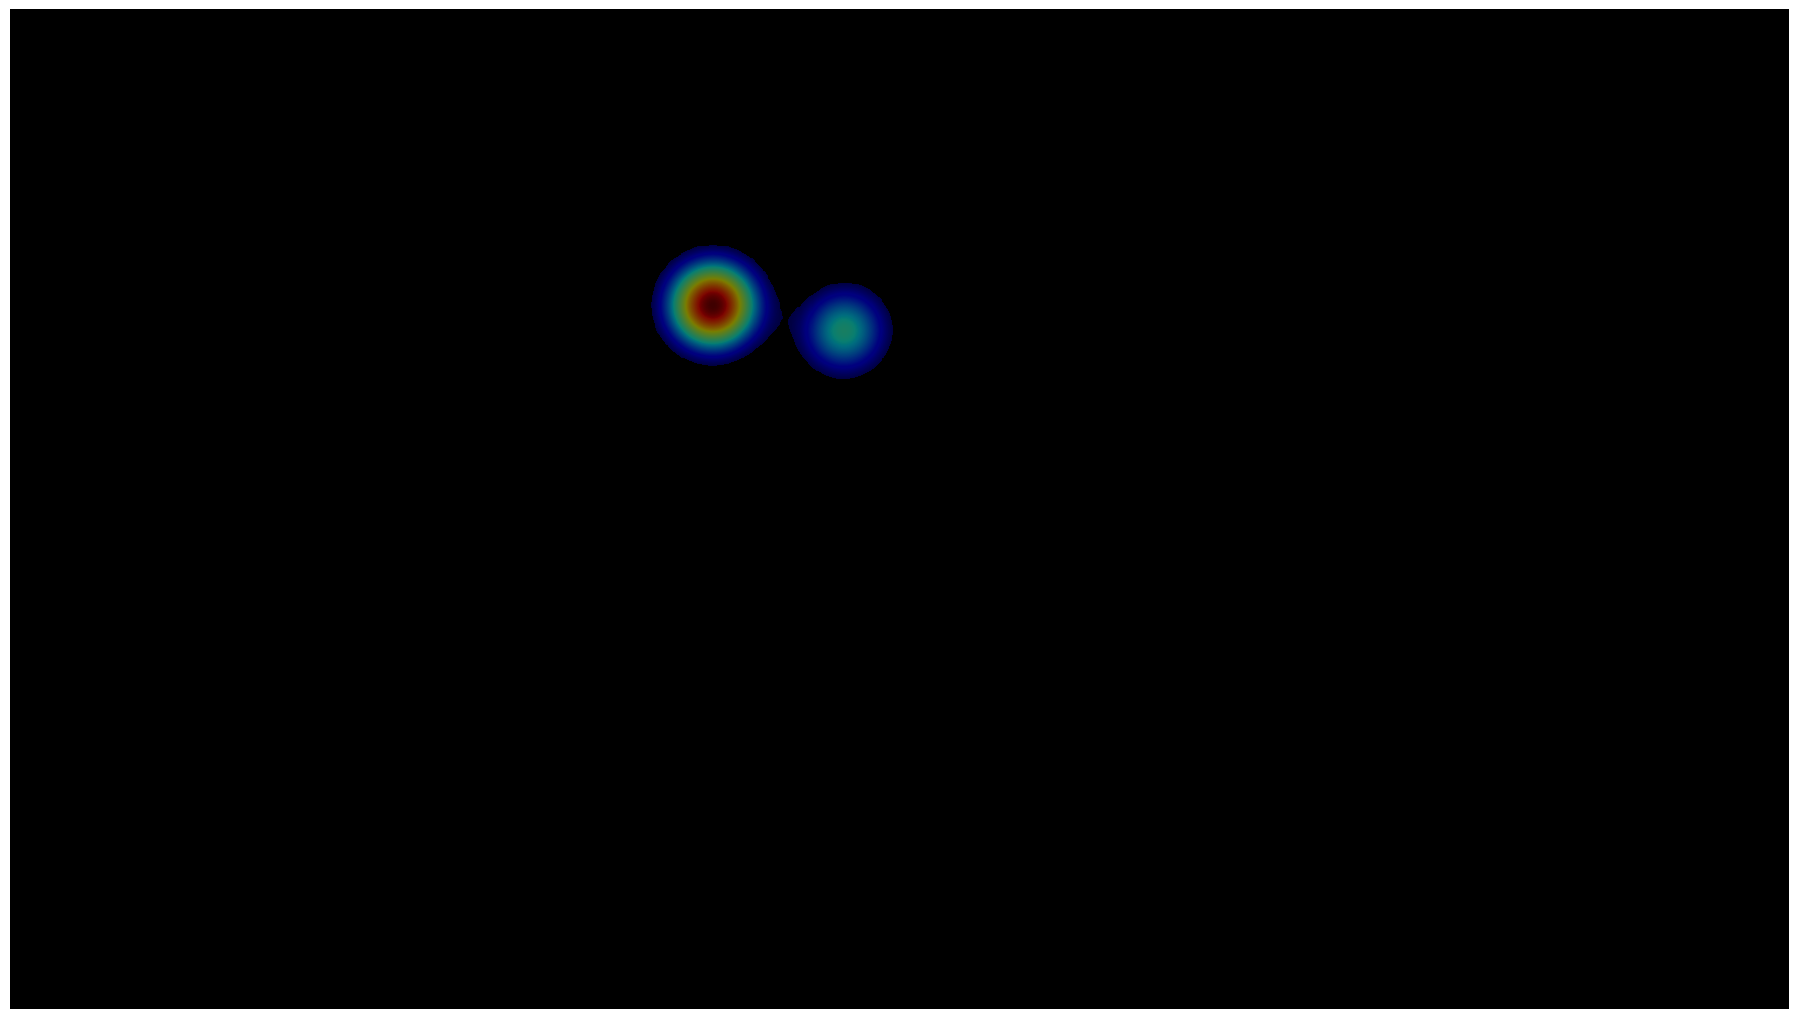

In [3]:
"""
Draws heatmaps, saccading path and saves it in the output_images folder

Required Inputs: data (loaded from the above cell)
                 trial_nr : trial number
                 partic_id, game_nr as per the previous cells

"""
trial_nr =3
draw_heatmap_trial(data,partic_id,game_nr,trial_nr)

### Get Centers and Radii

In [4]:
image_name = 'output_images\G036_game_4_3_20210506-172454_heatmap.png' # name of the image you want to load

centers,radii,image_out =return_centroid_heatmap(image_name)

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


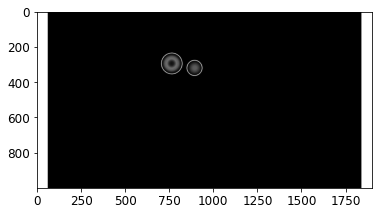

In [5]:
### See the output image to spot the circles
## The while outline is the radii

plt.imshow(image_out,cmap='gray')

In [6]:
radii

[43, 59]

### Velocity vs Noise

In [9]:

#participant details
partic_id = 'G031' #participant id
subject_id = 30   # id in number
phase = 'stimulus' 
dataset_fname = 'dataset_0423.csv' 
data_properties =  load_dataset_properties(dataset_fname)


In [10]:
g= np.arange(1,10,1)


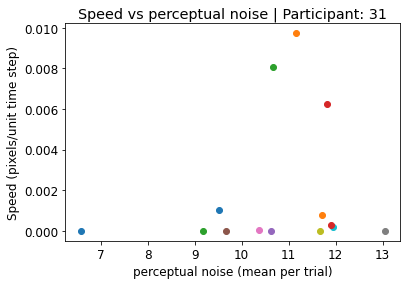

In [11]:
plot_speed_noise(partic_id)

### Inattention vs Noise

In [4]:

#participant details
partic_id = 'G030' #participant id
subject_id = 30   # id in number
phase = 'stimulus' 
dataset_fname = 'dataset_0423.csv' 
data_properties =  load_dataset_properties(dataset_fname)
dispsize = (1919,1079)

[]
[[969.         459.92410278]]
[]
[[950.69873047 638.35394287]]
[]
[]
[]
[[970.27026367 610.59460449]]
[[998.5 571.5]]
[]
[[932.13586426 549.30322266]]
[]
[[957.13586426 506.69677734]]
[]
[]
[]
[]
[]
[]
[[956.22729492 453.86364746]]
[]
[]
[]
[]
[]
[]
[[962.2130127  517.21081543]]
[[959.95330811 556.74945068]]
[[957.99798584 597.71765137]]
[[962.76715088 466.85049438]]
[]
[[946.96862793 531.71075439]]
[[970.92120361 542.92120361]]
[[969.22827148 491.87756348]]
[]
[]
[[993.35675049 527.06738281]]
[]
[[959.96789551 512.23822021]]
[]
[]
[[962.74572754 386.10409546]]
[]
[[959.98681641 523.36358643]]
[]
[]
[]
[]
[]
[]
[]
[[964.59747314 515.95446777]]
[]
[[955.59259033 417.55554199]]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[[966.41174316 521.58825684]]
[]
[]
[[970.16326904 528.        ]]
[]
[]
[]
[[958.09698486 540.98016357]]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[[961.8414917  491.84146118]]
[]
[]
[]
[[947.92504883 421.36160278]]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[[920.07287598 653.21099854]]


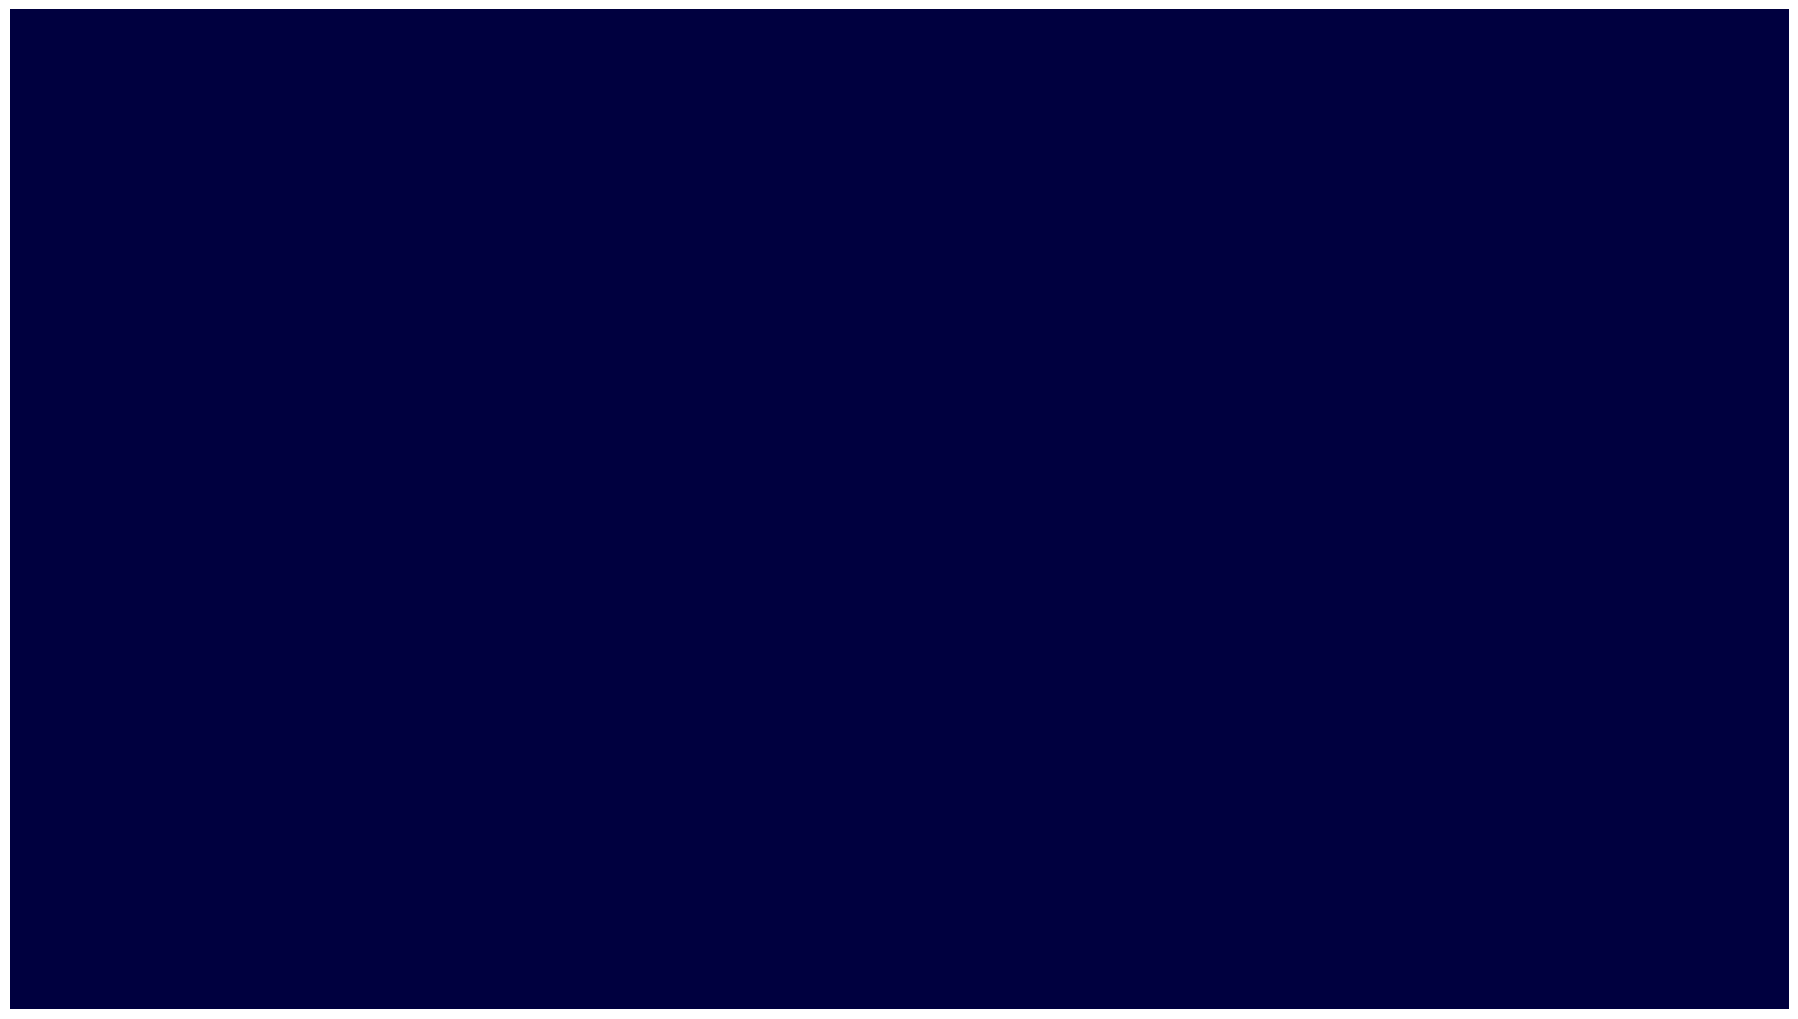

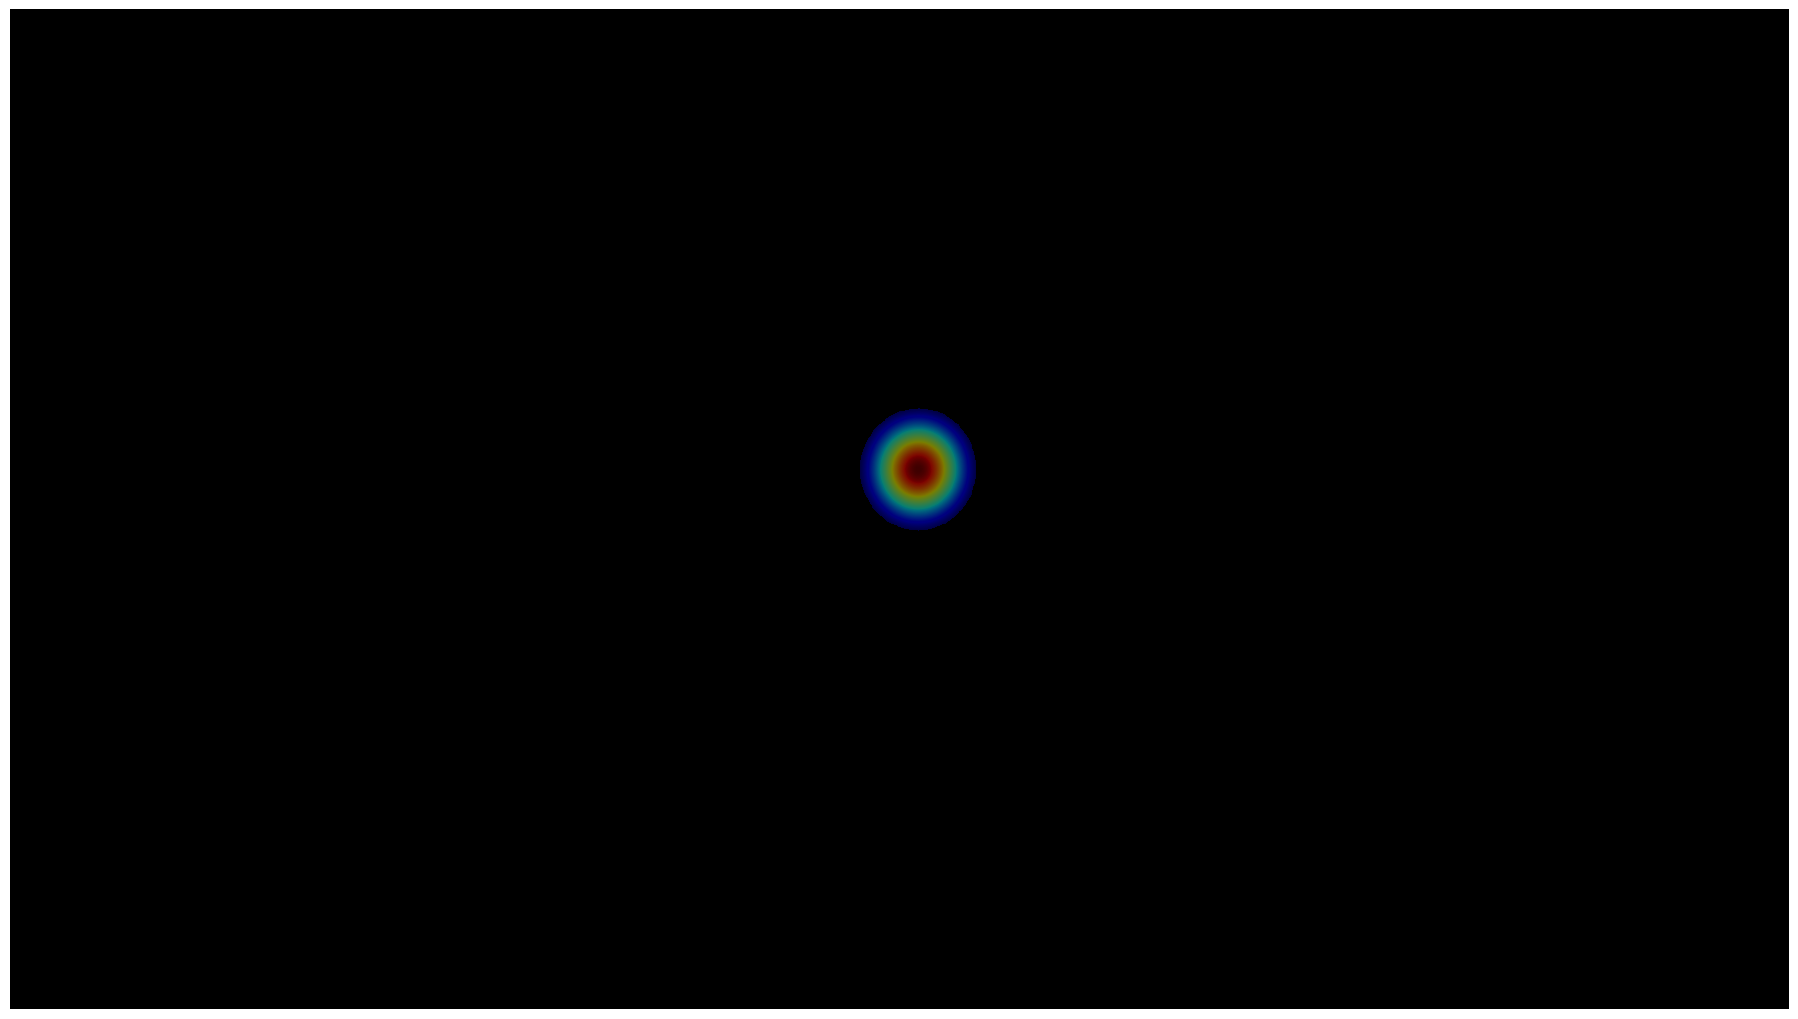

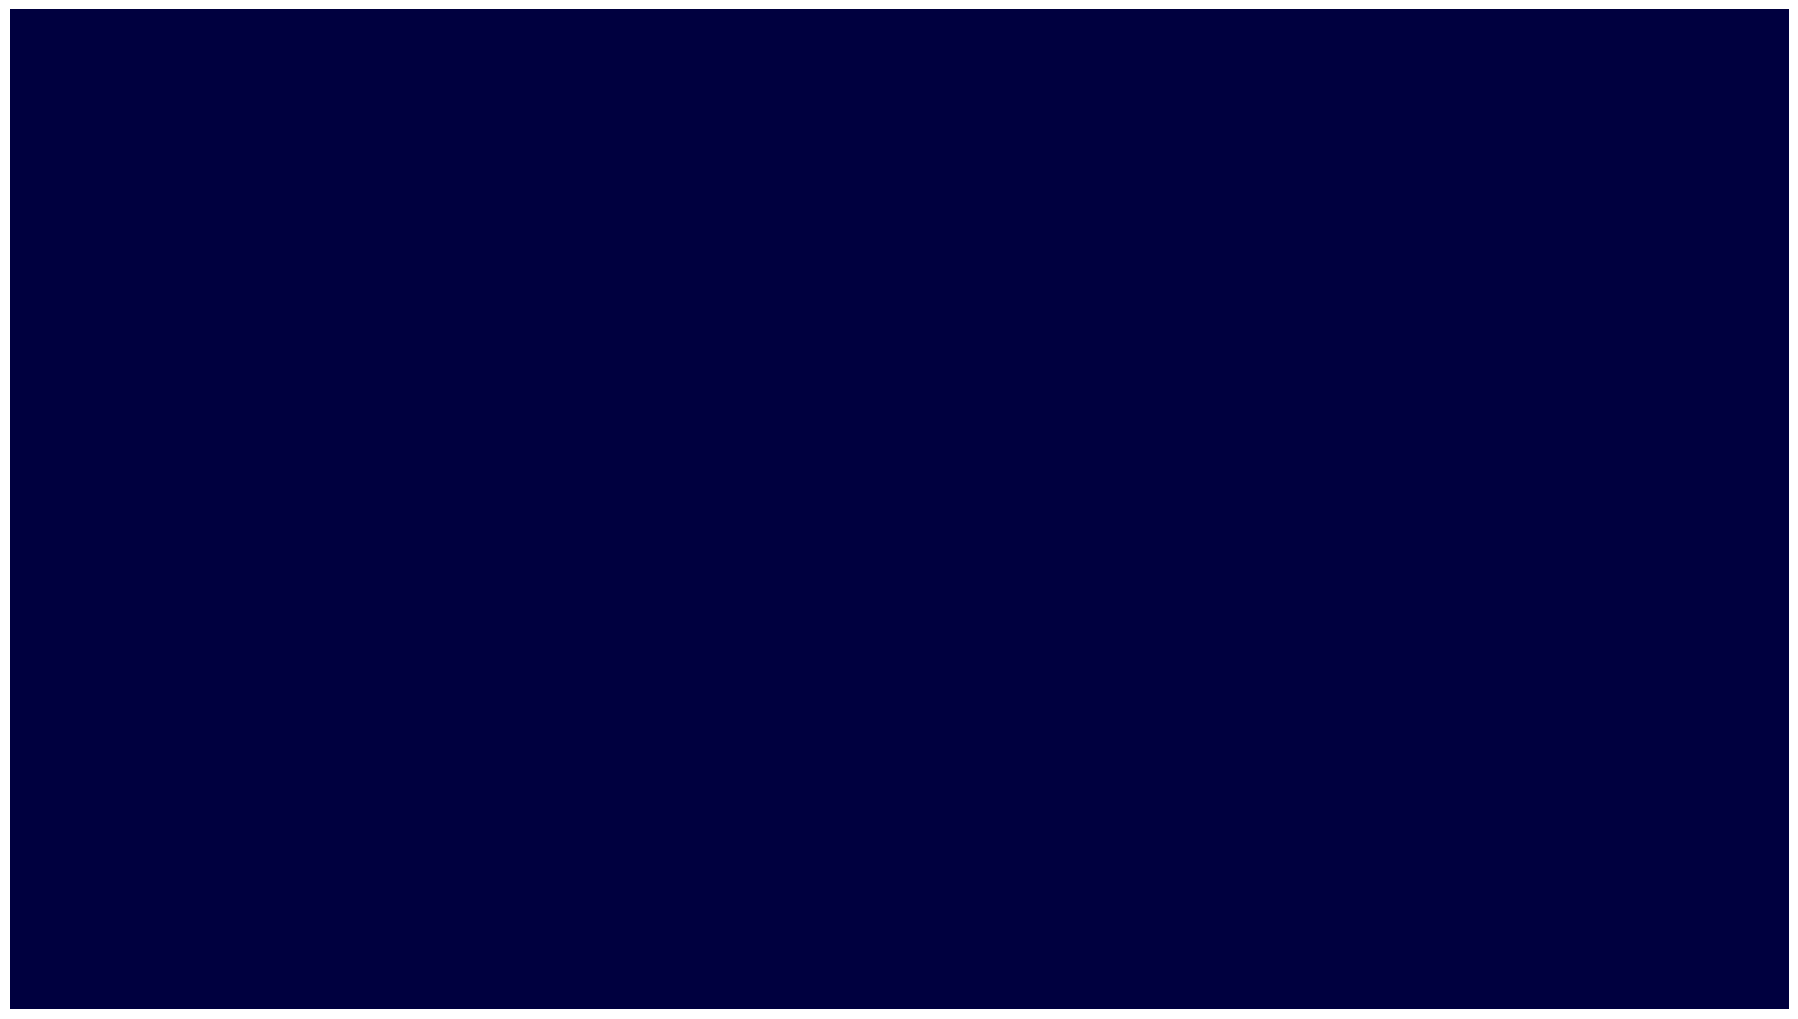

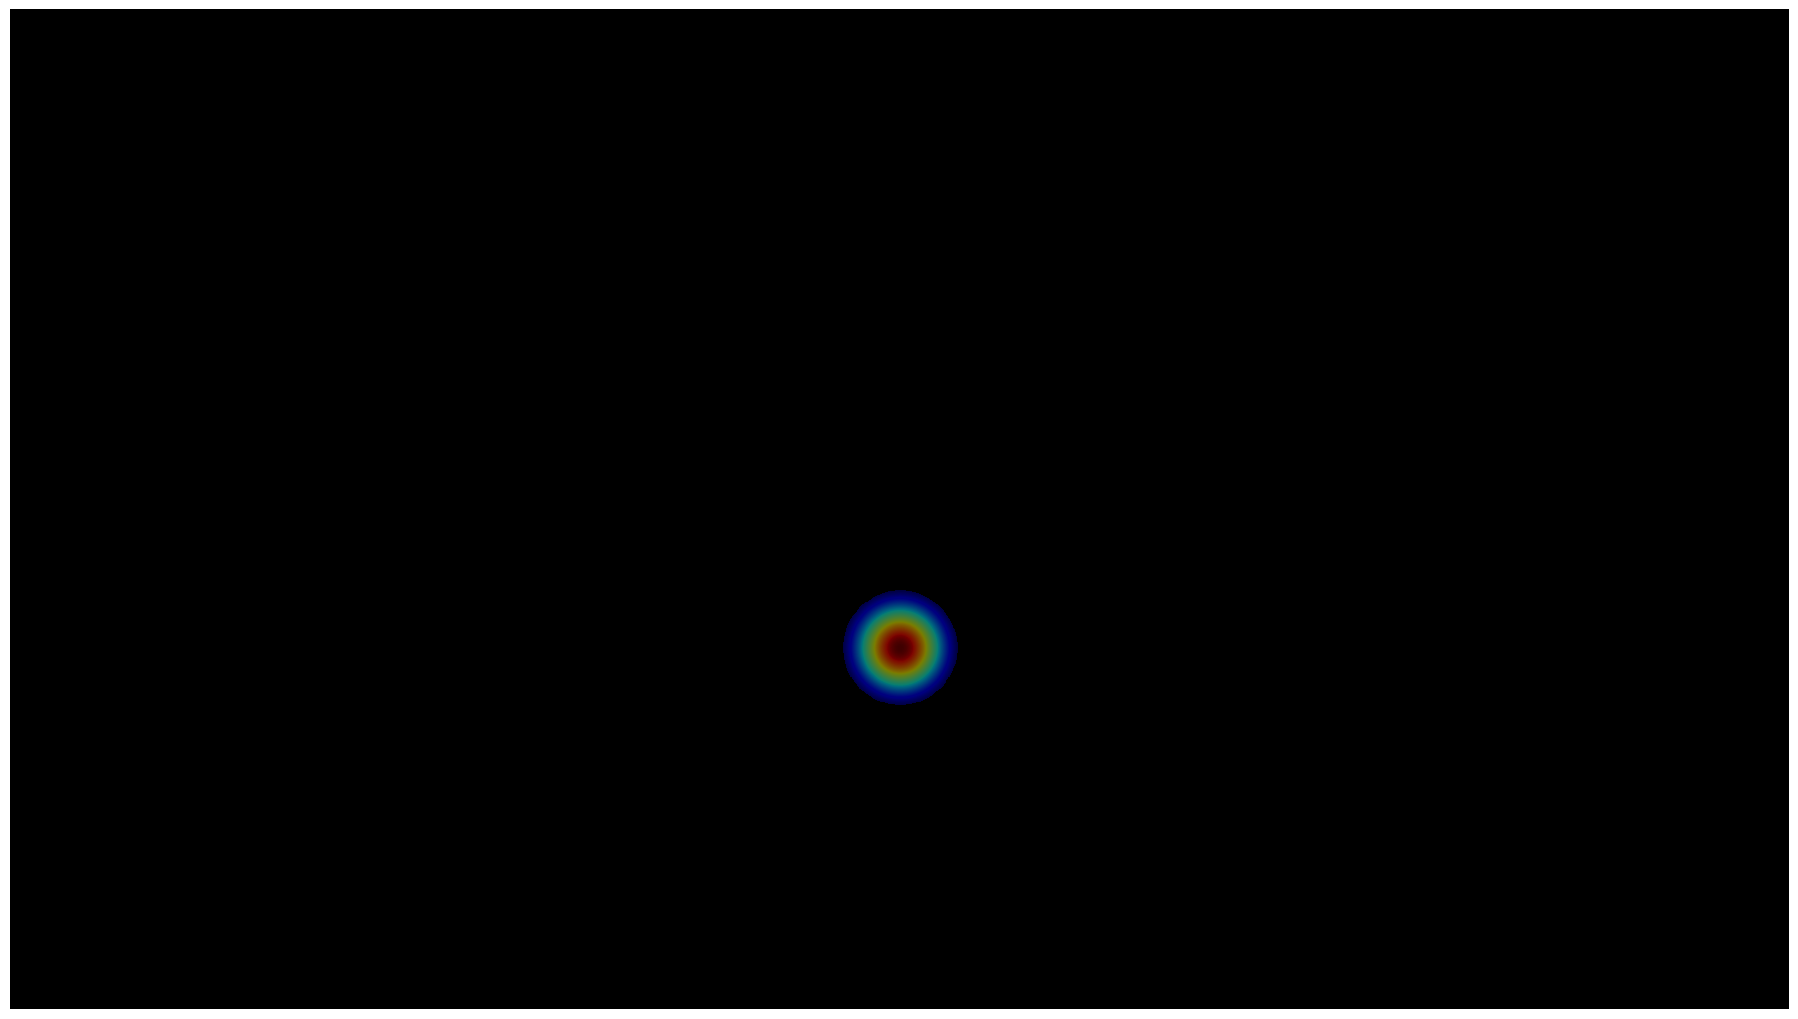

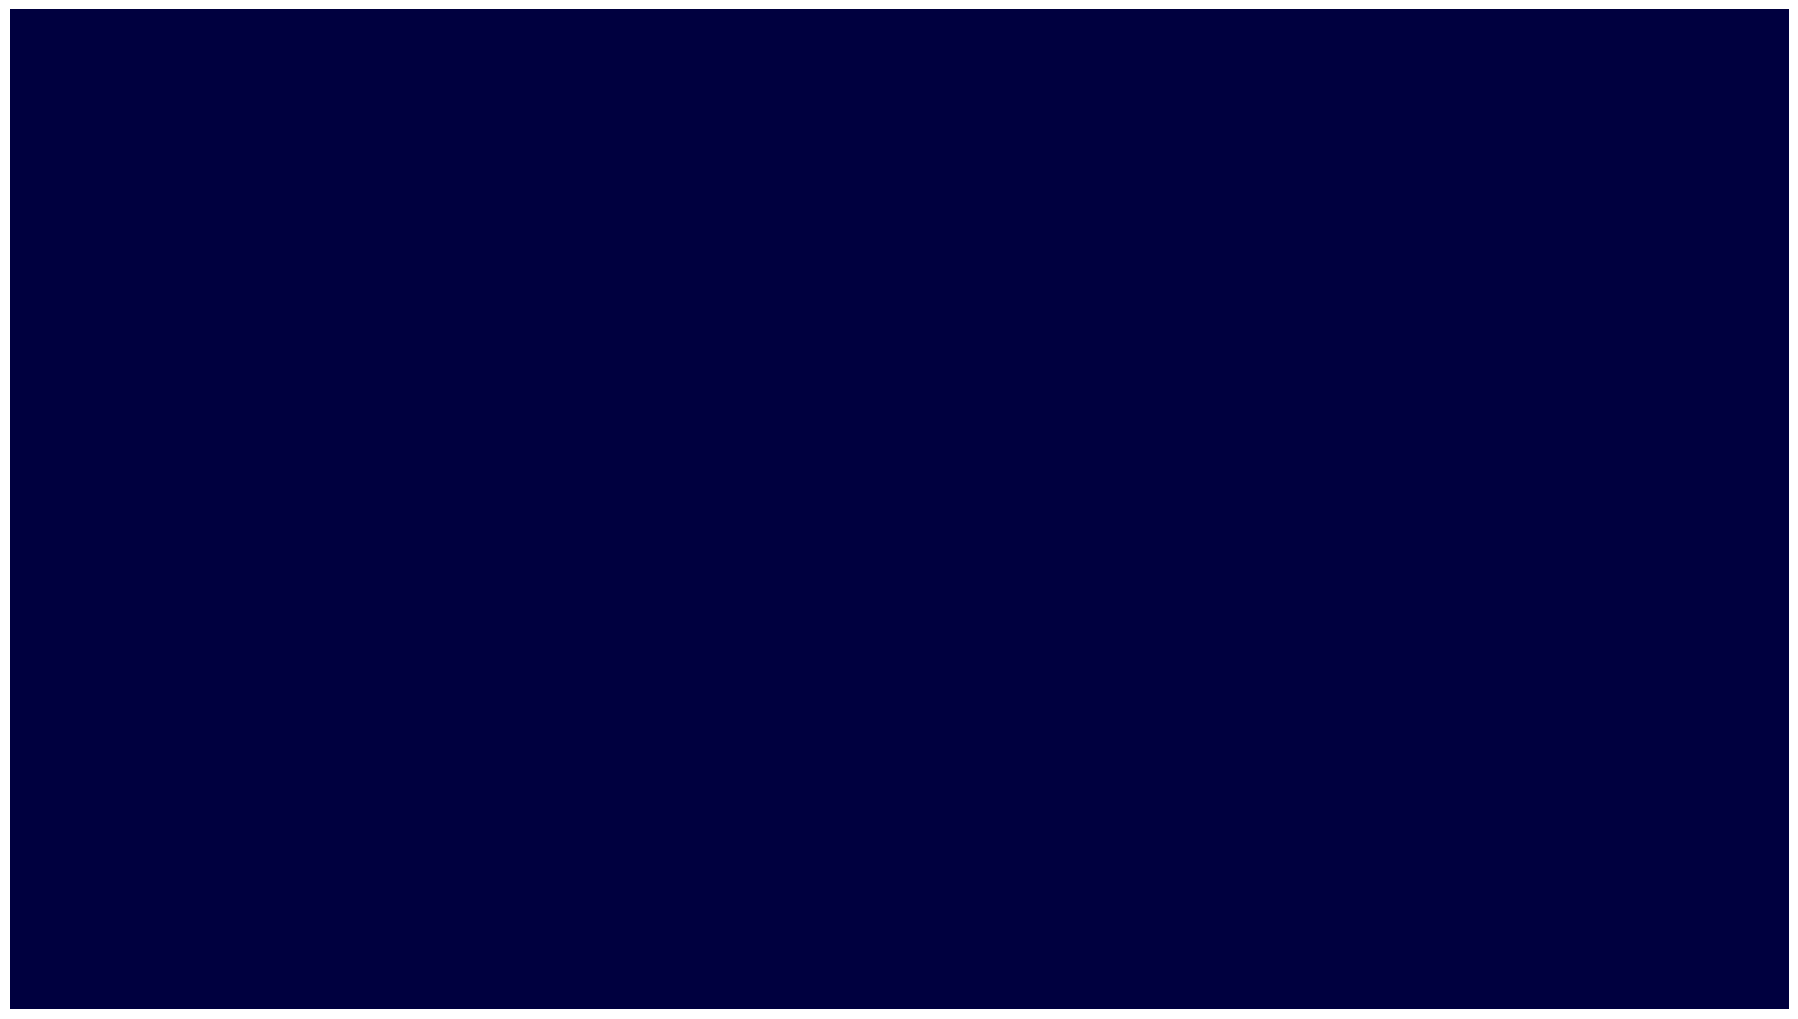

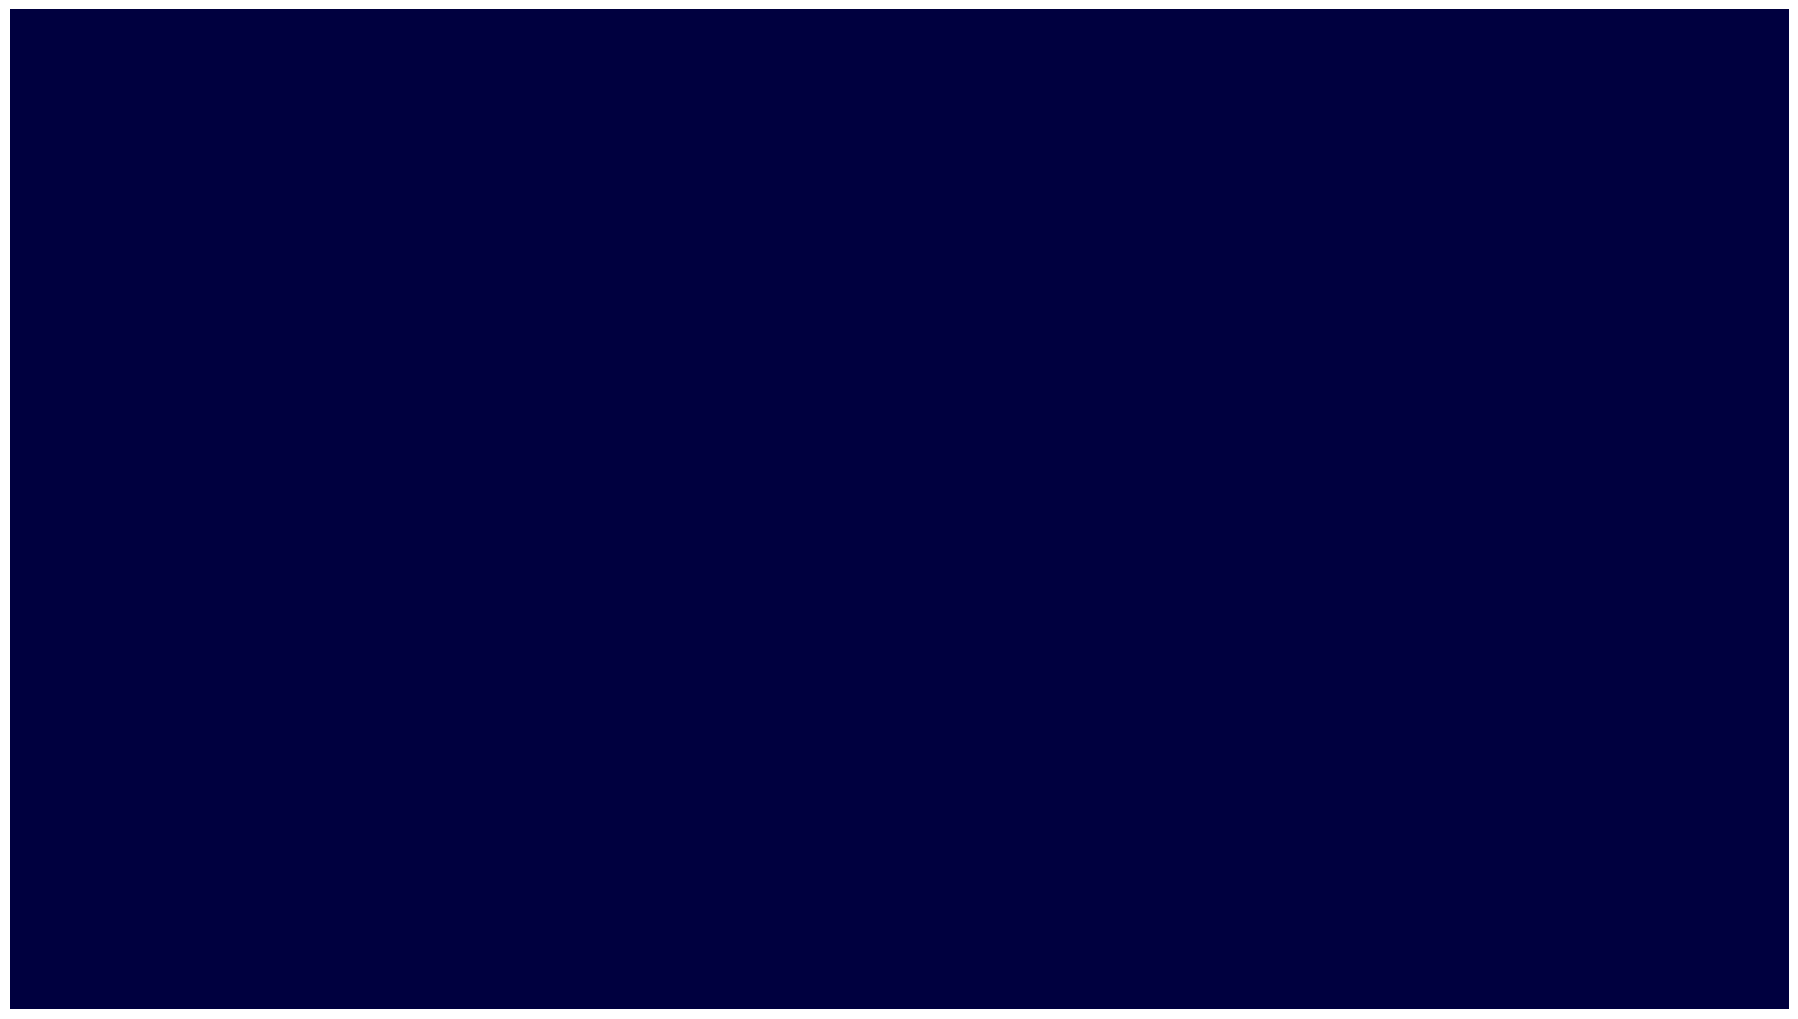

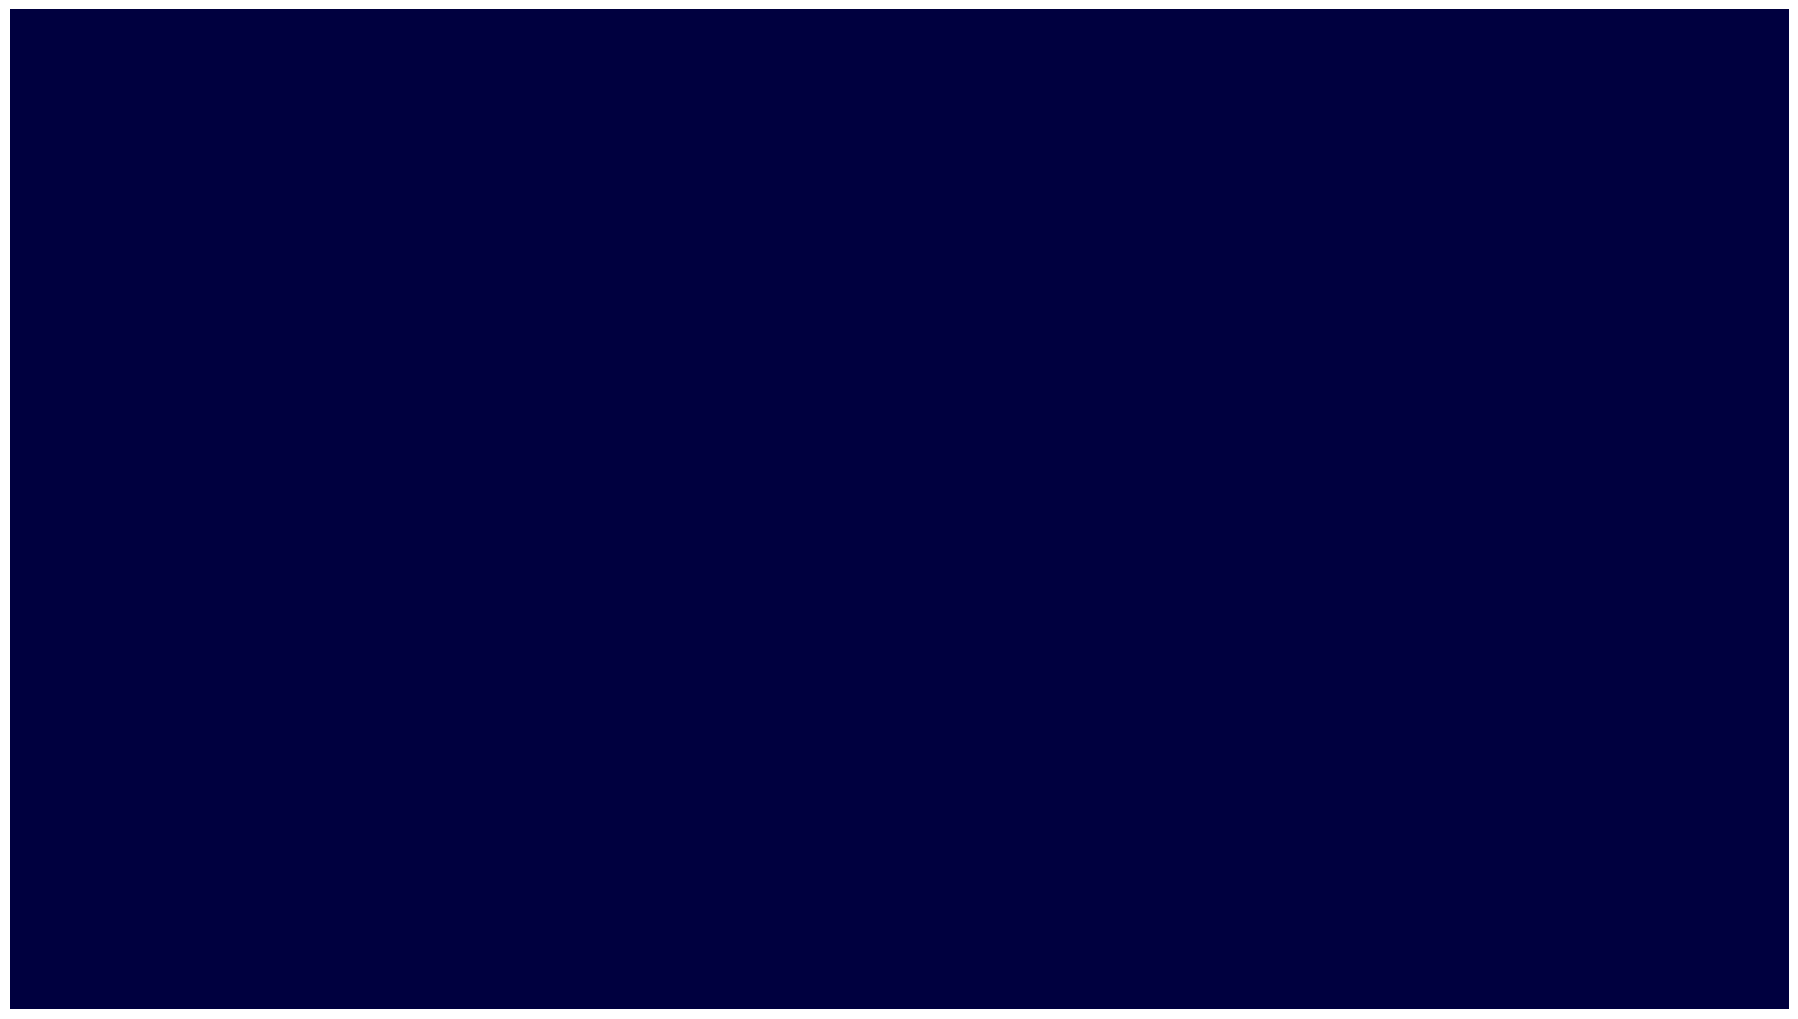

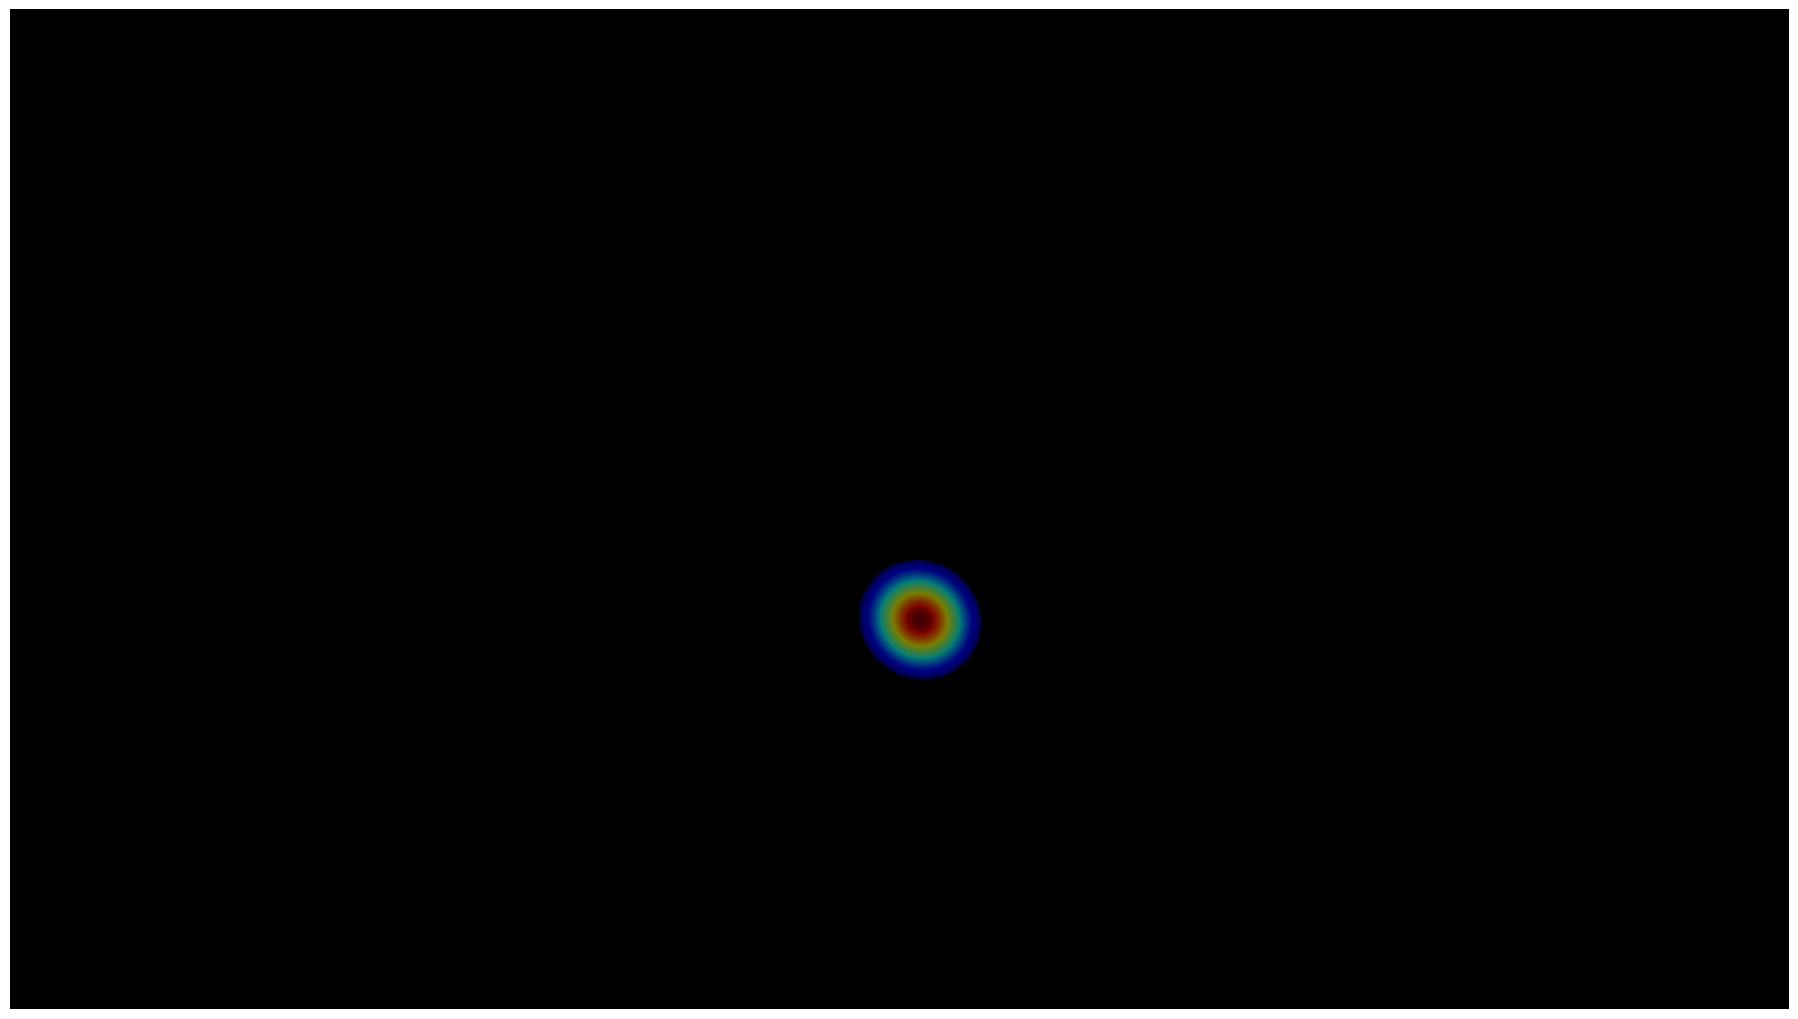

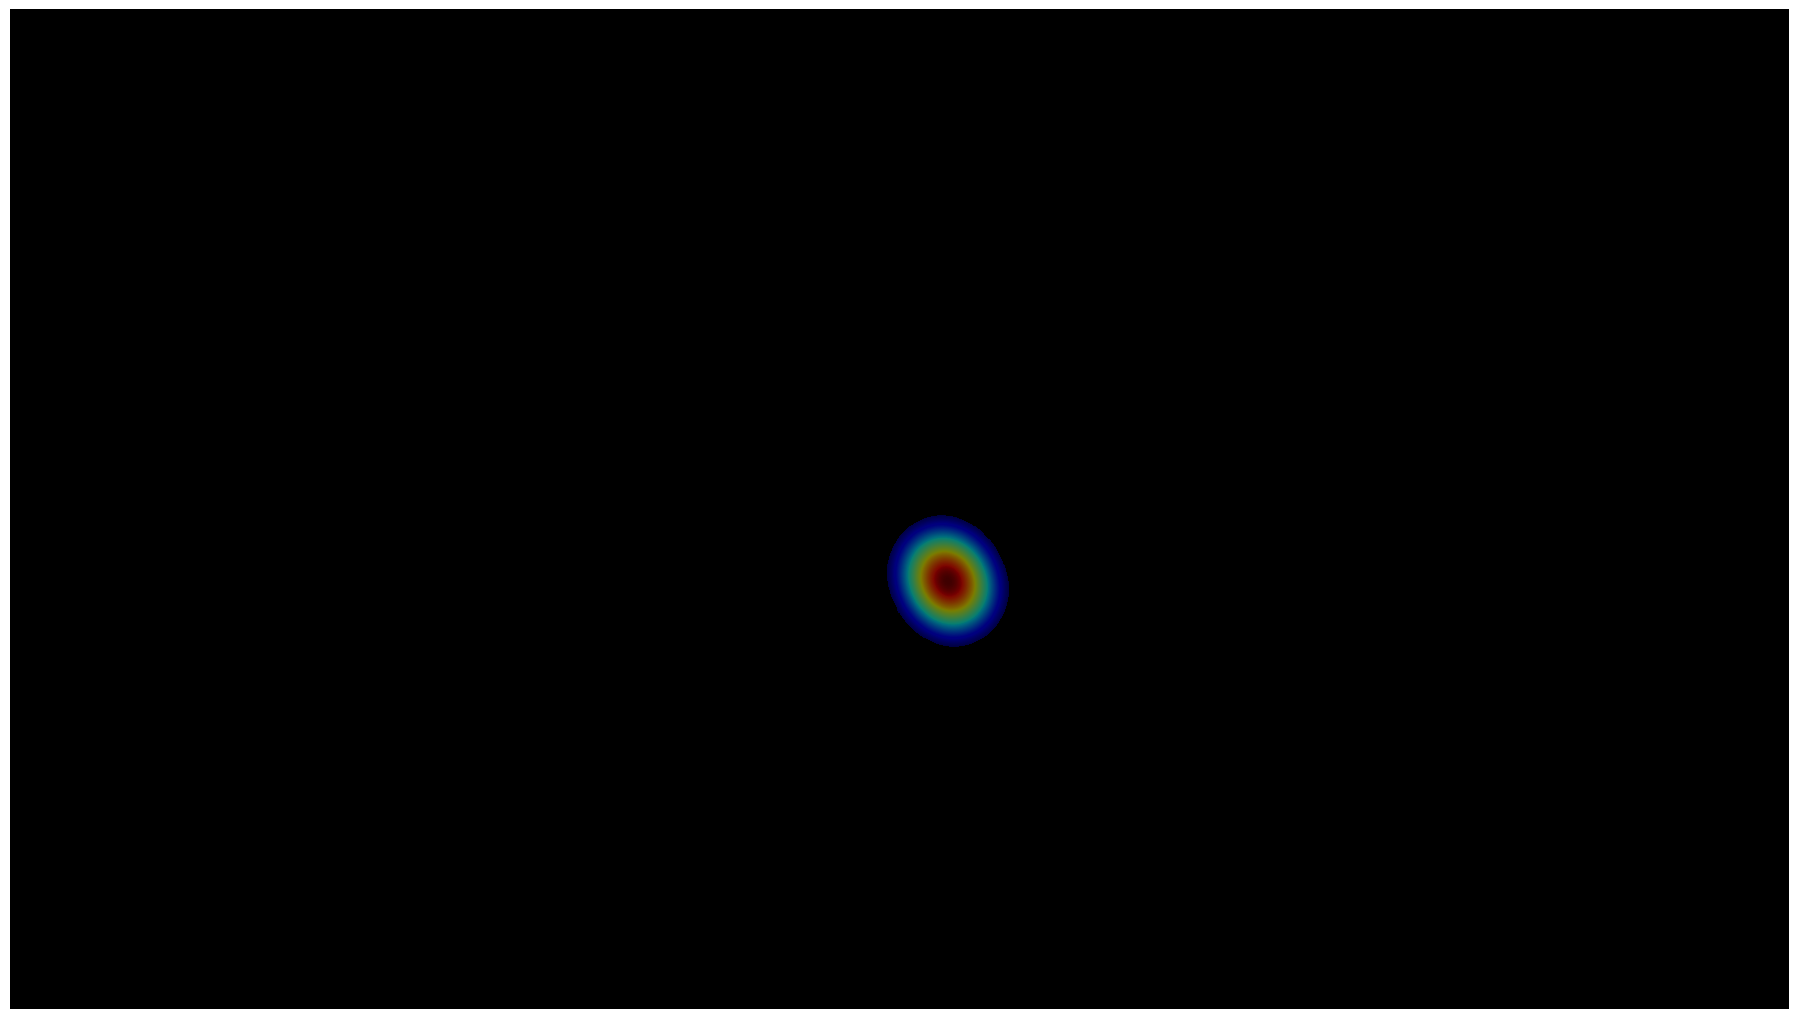

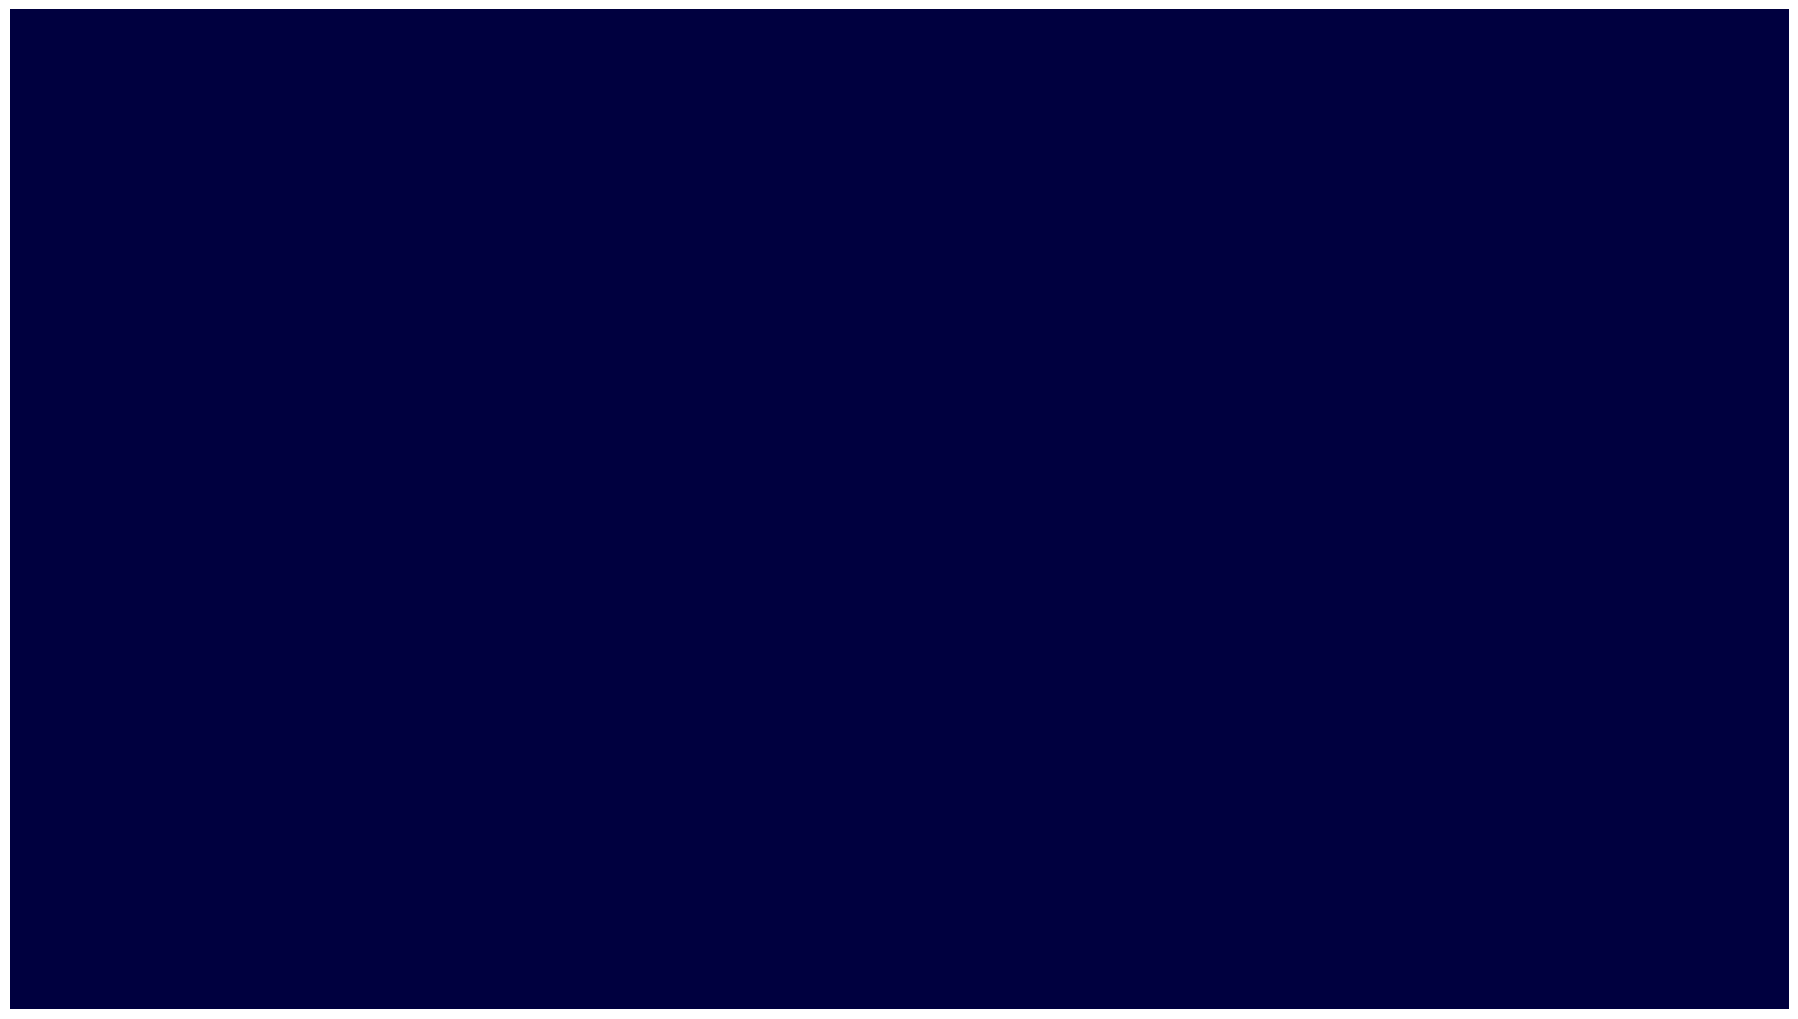

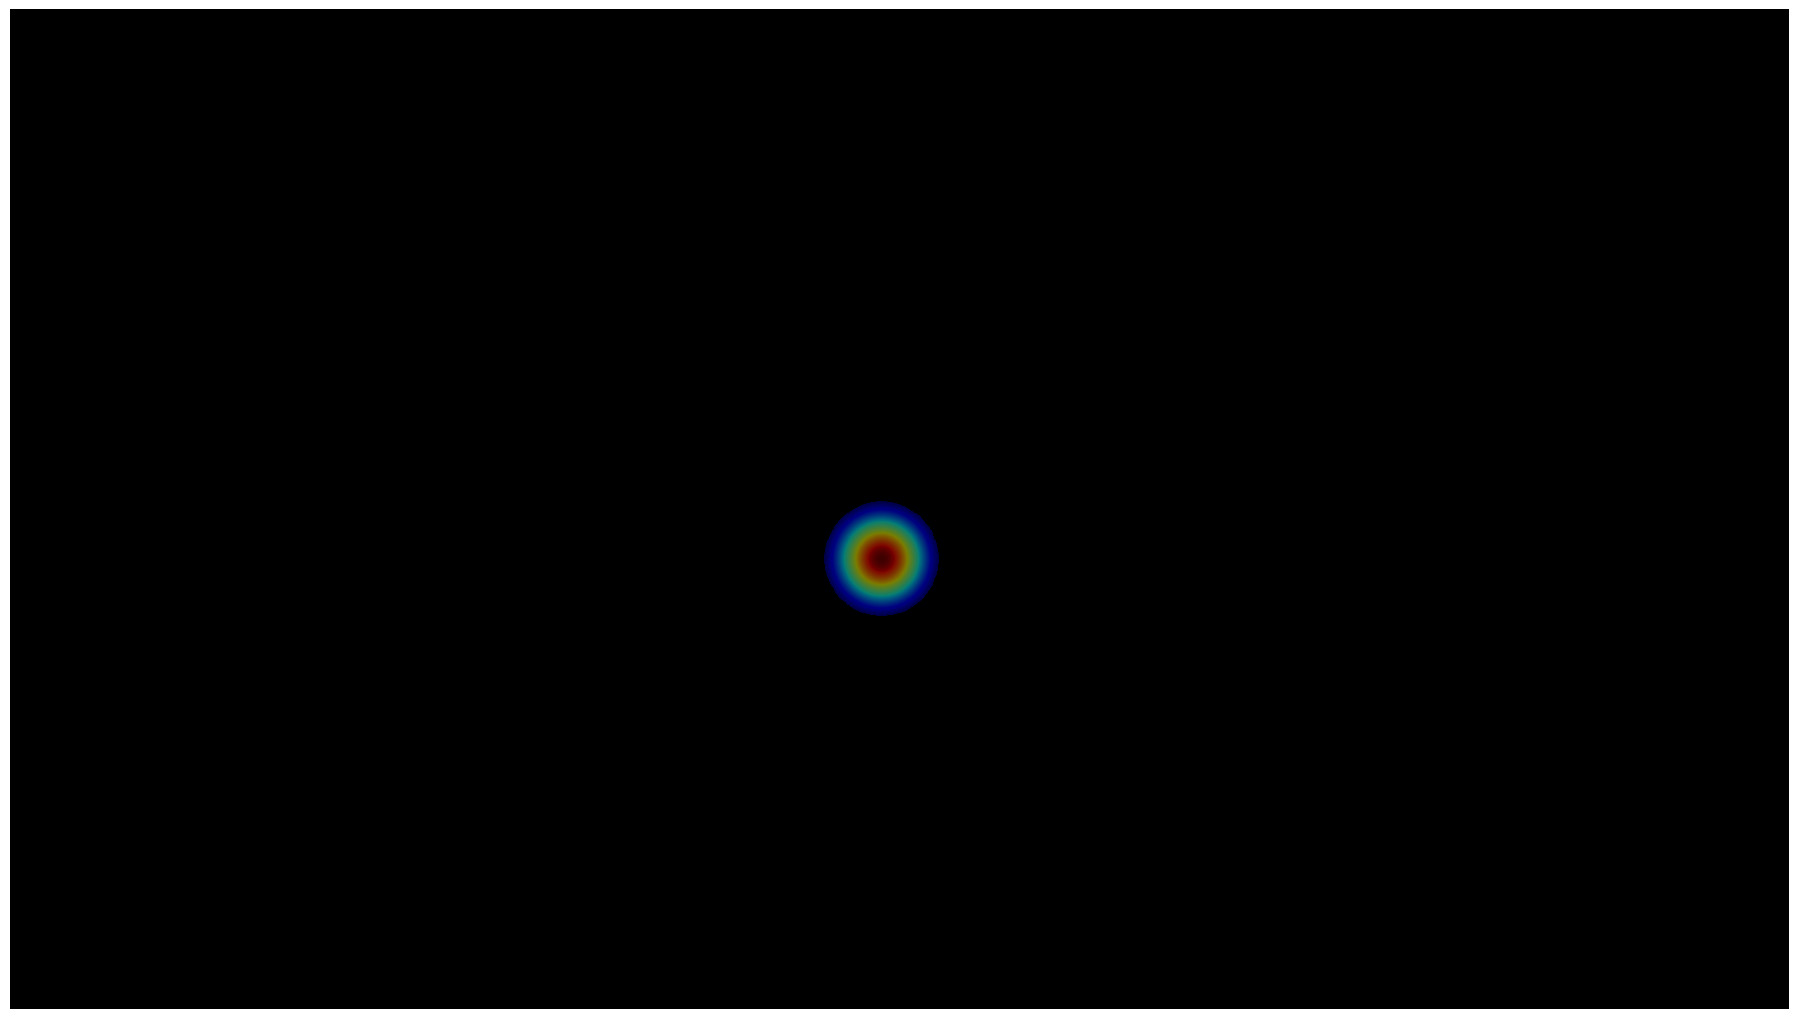

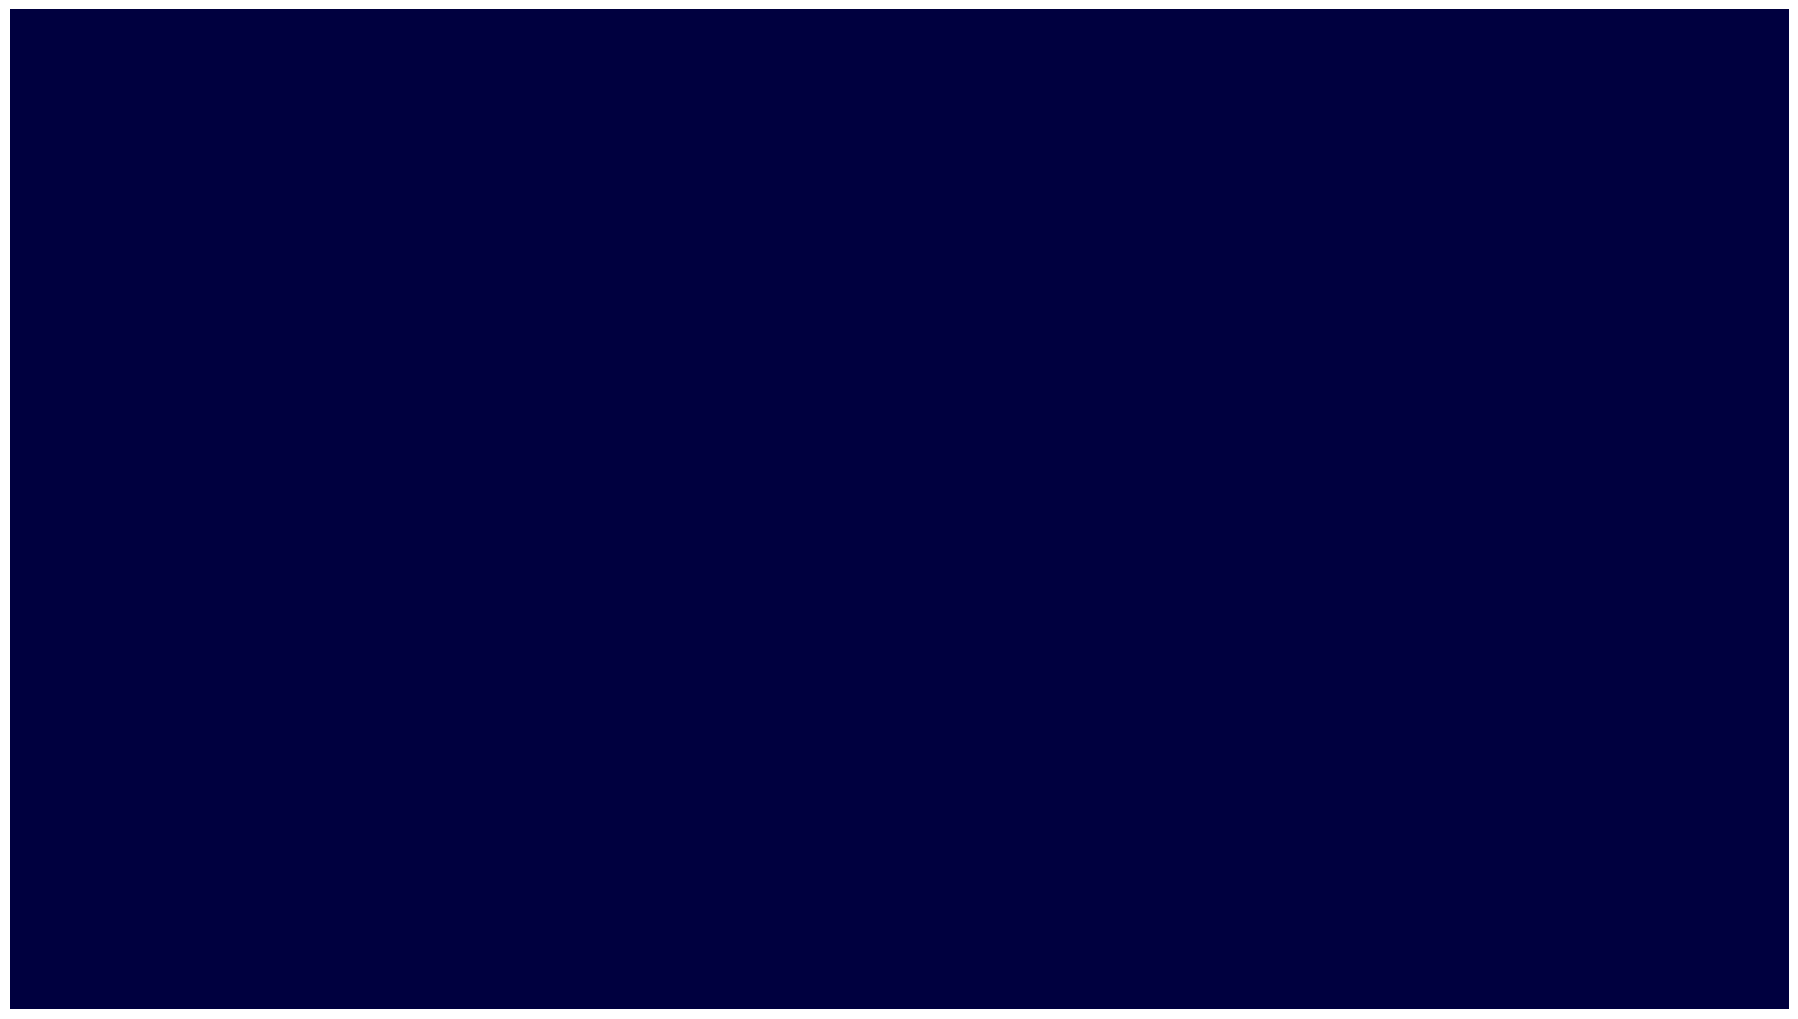

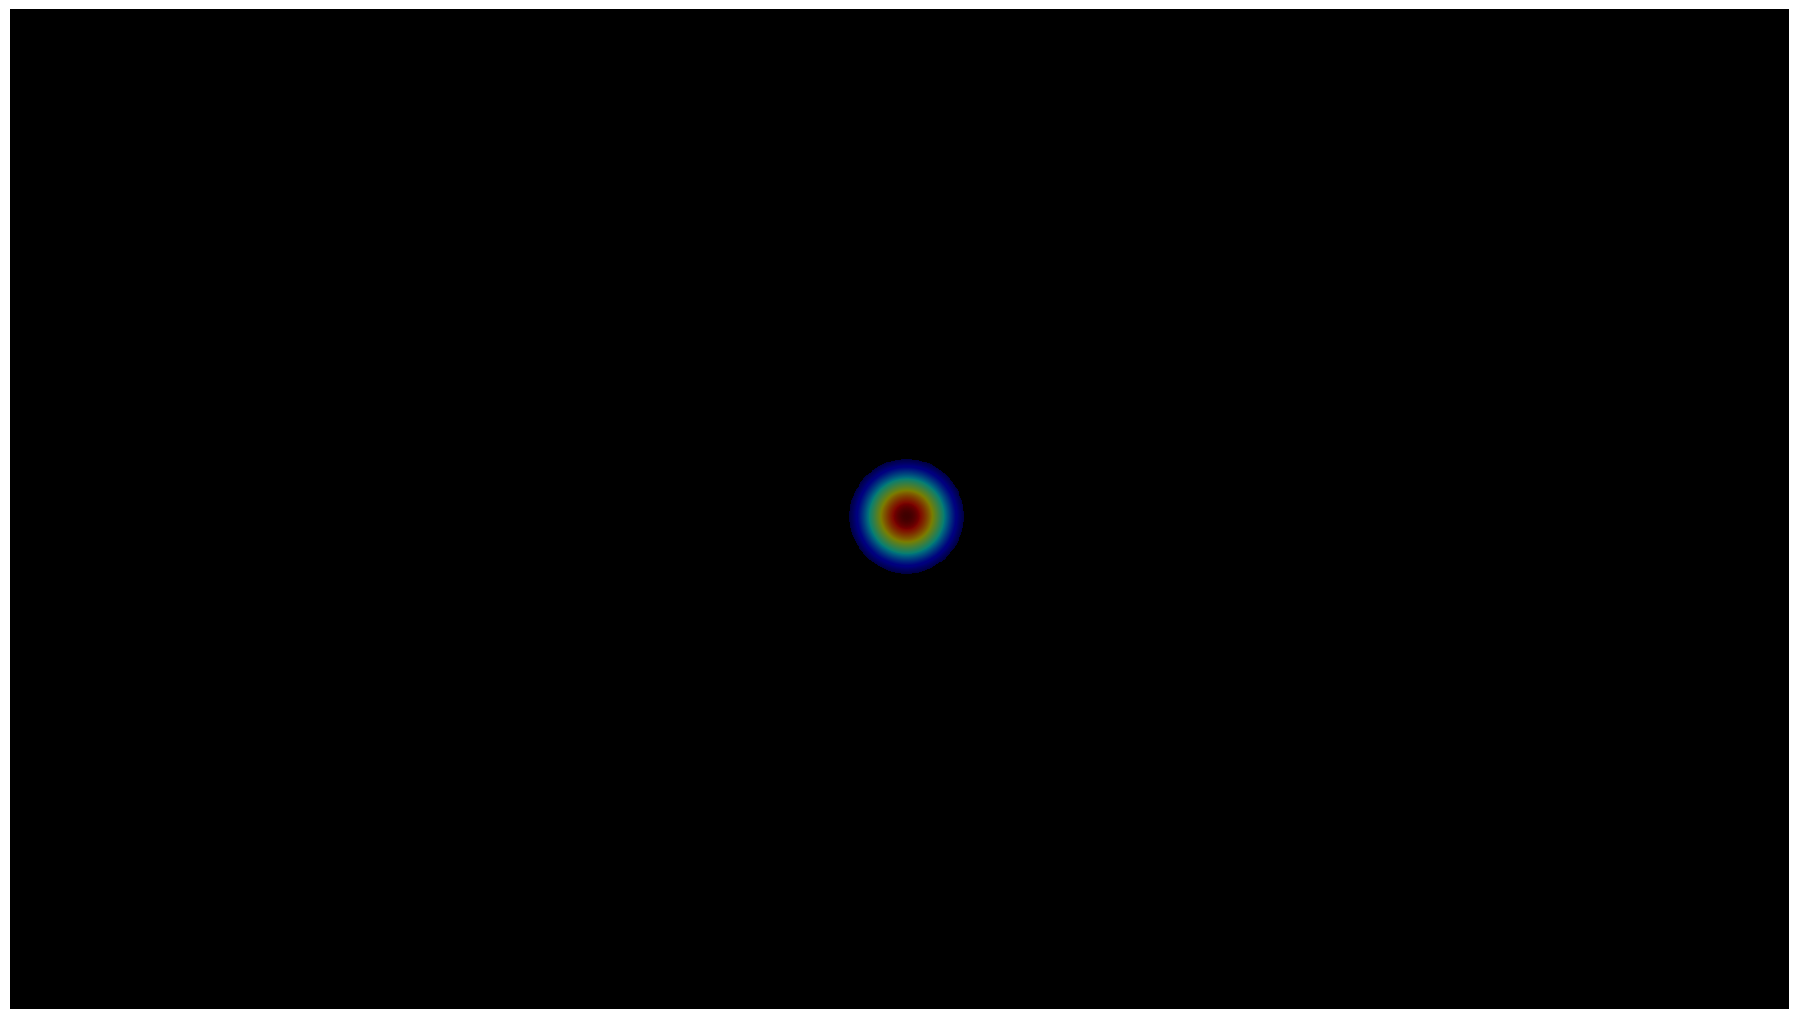

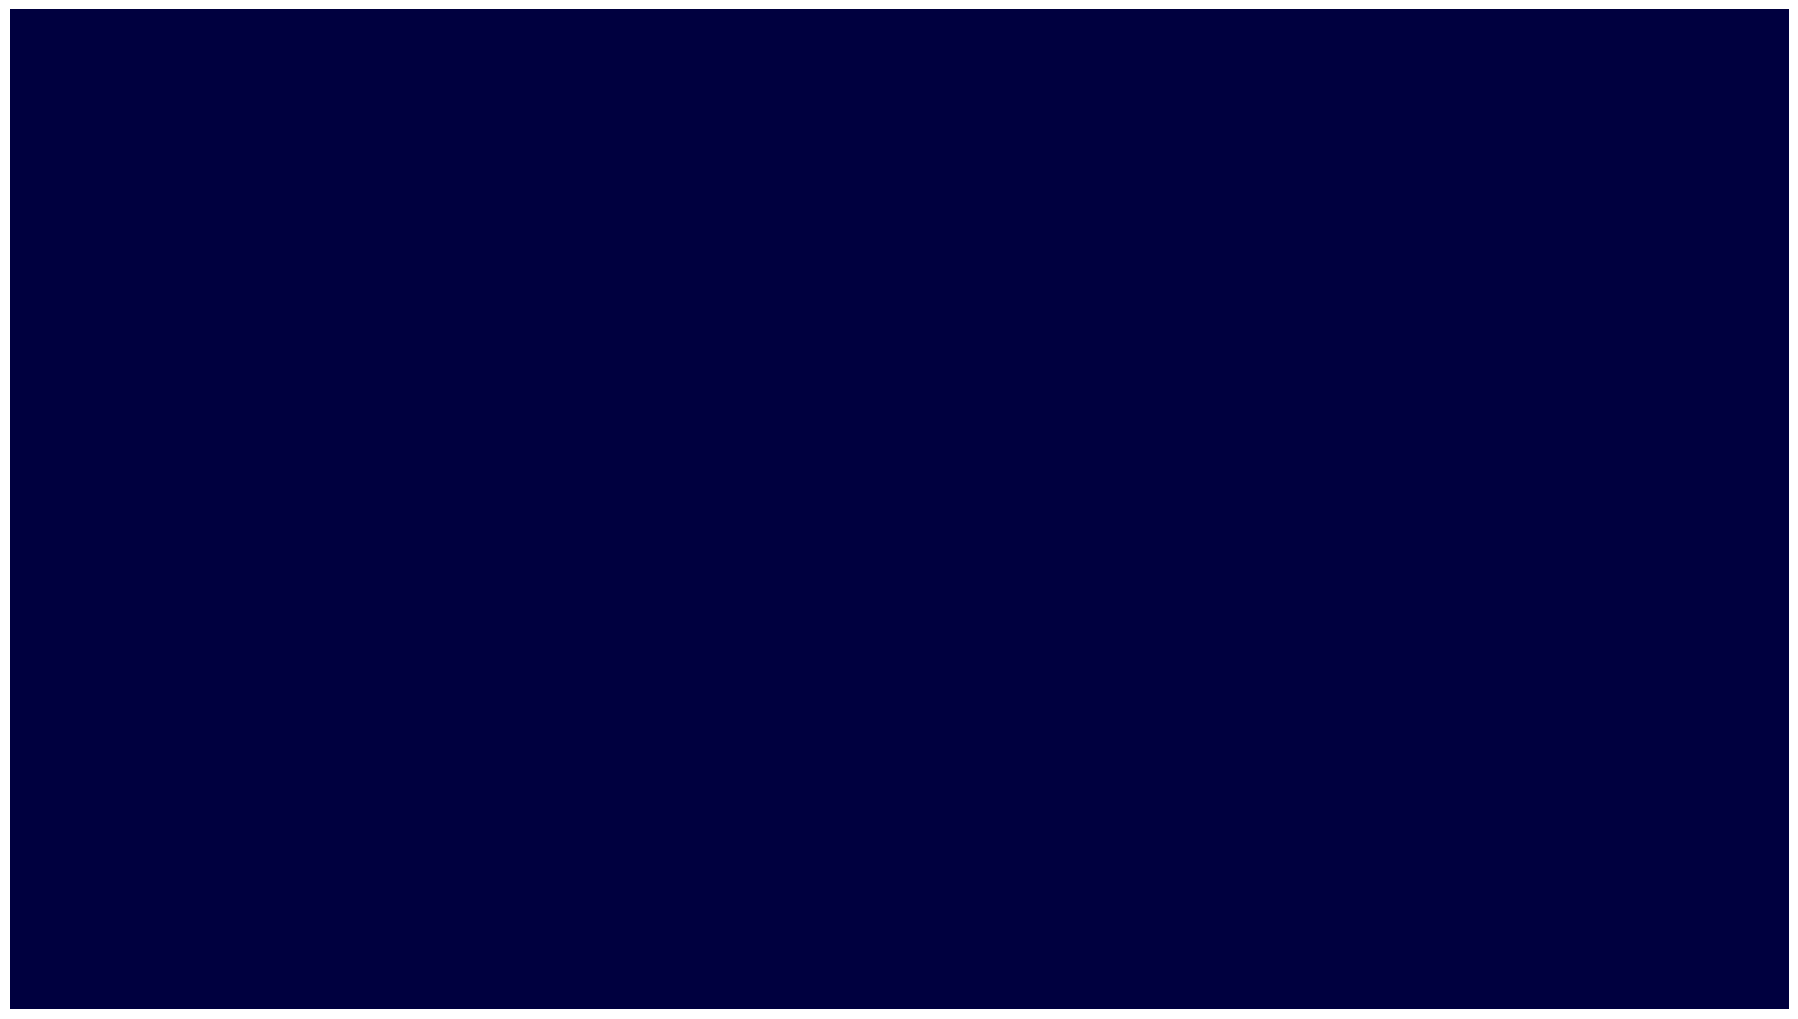

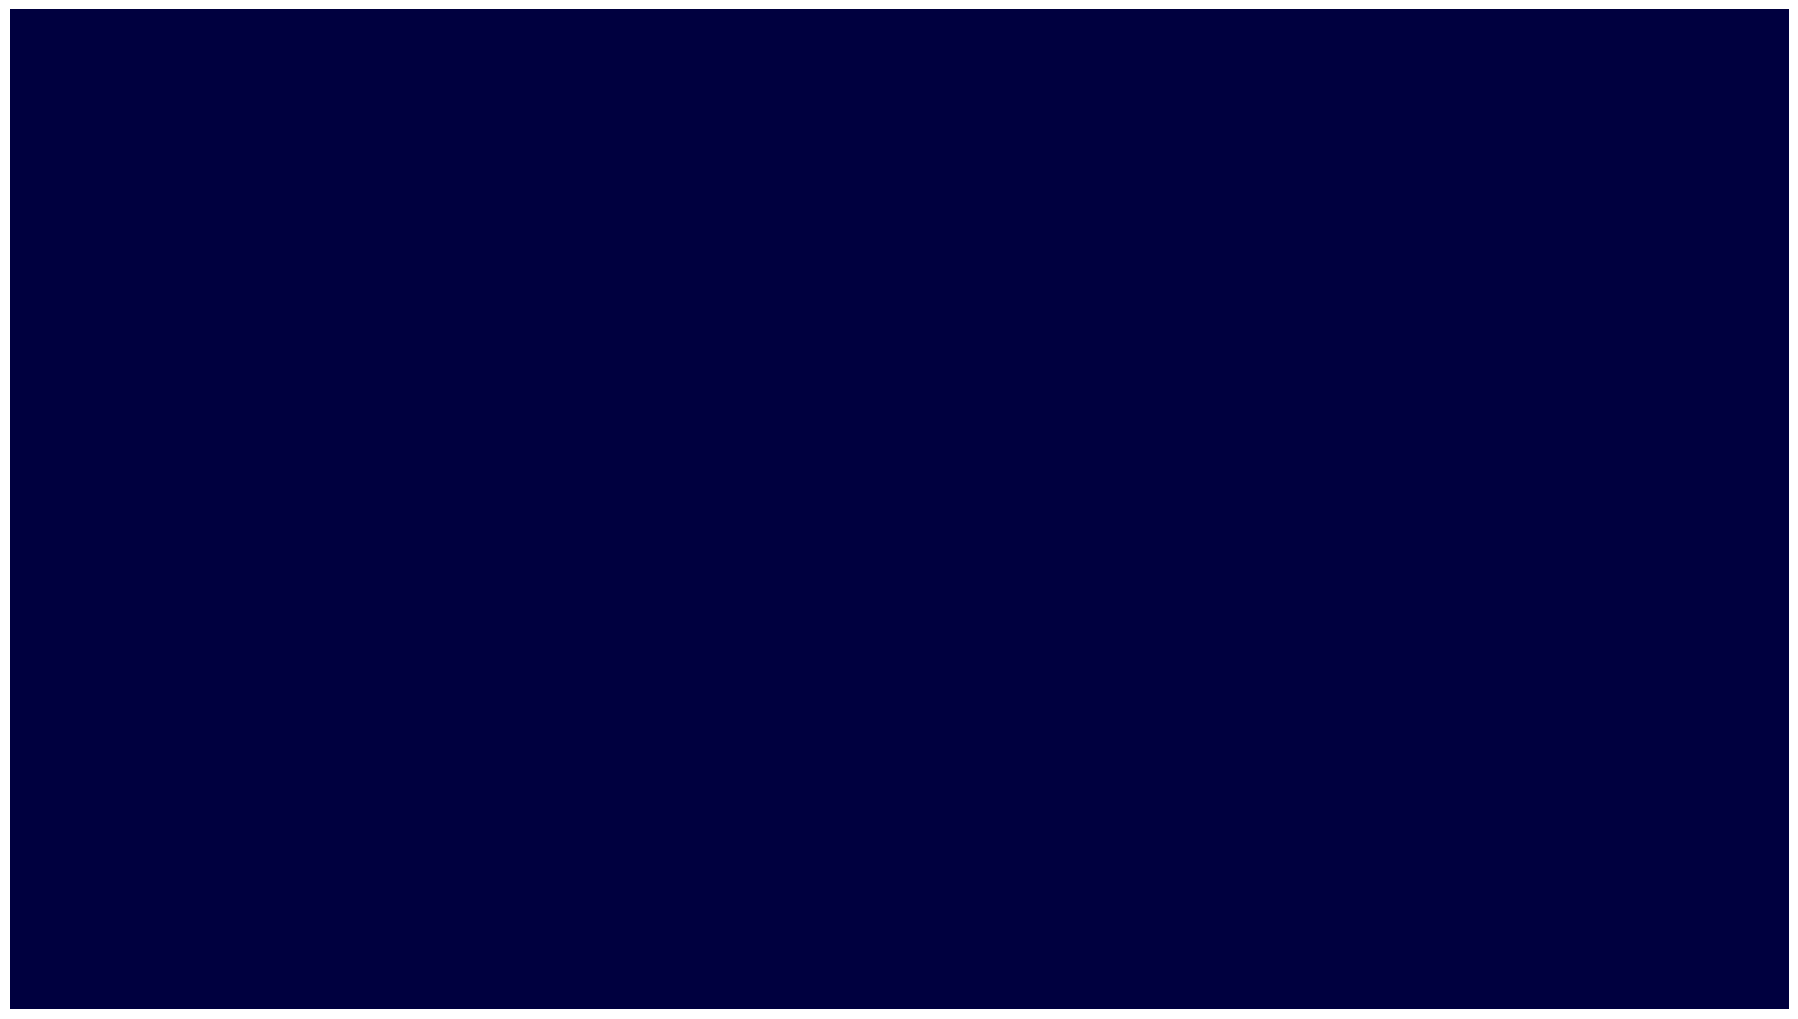

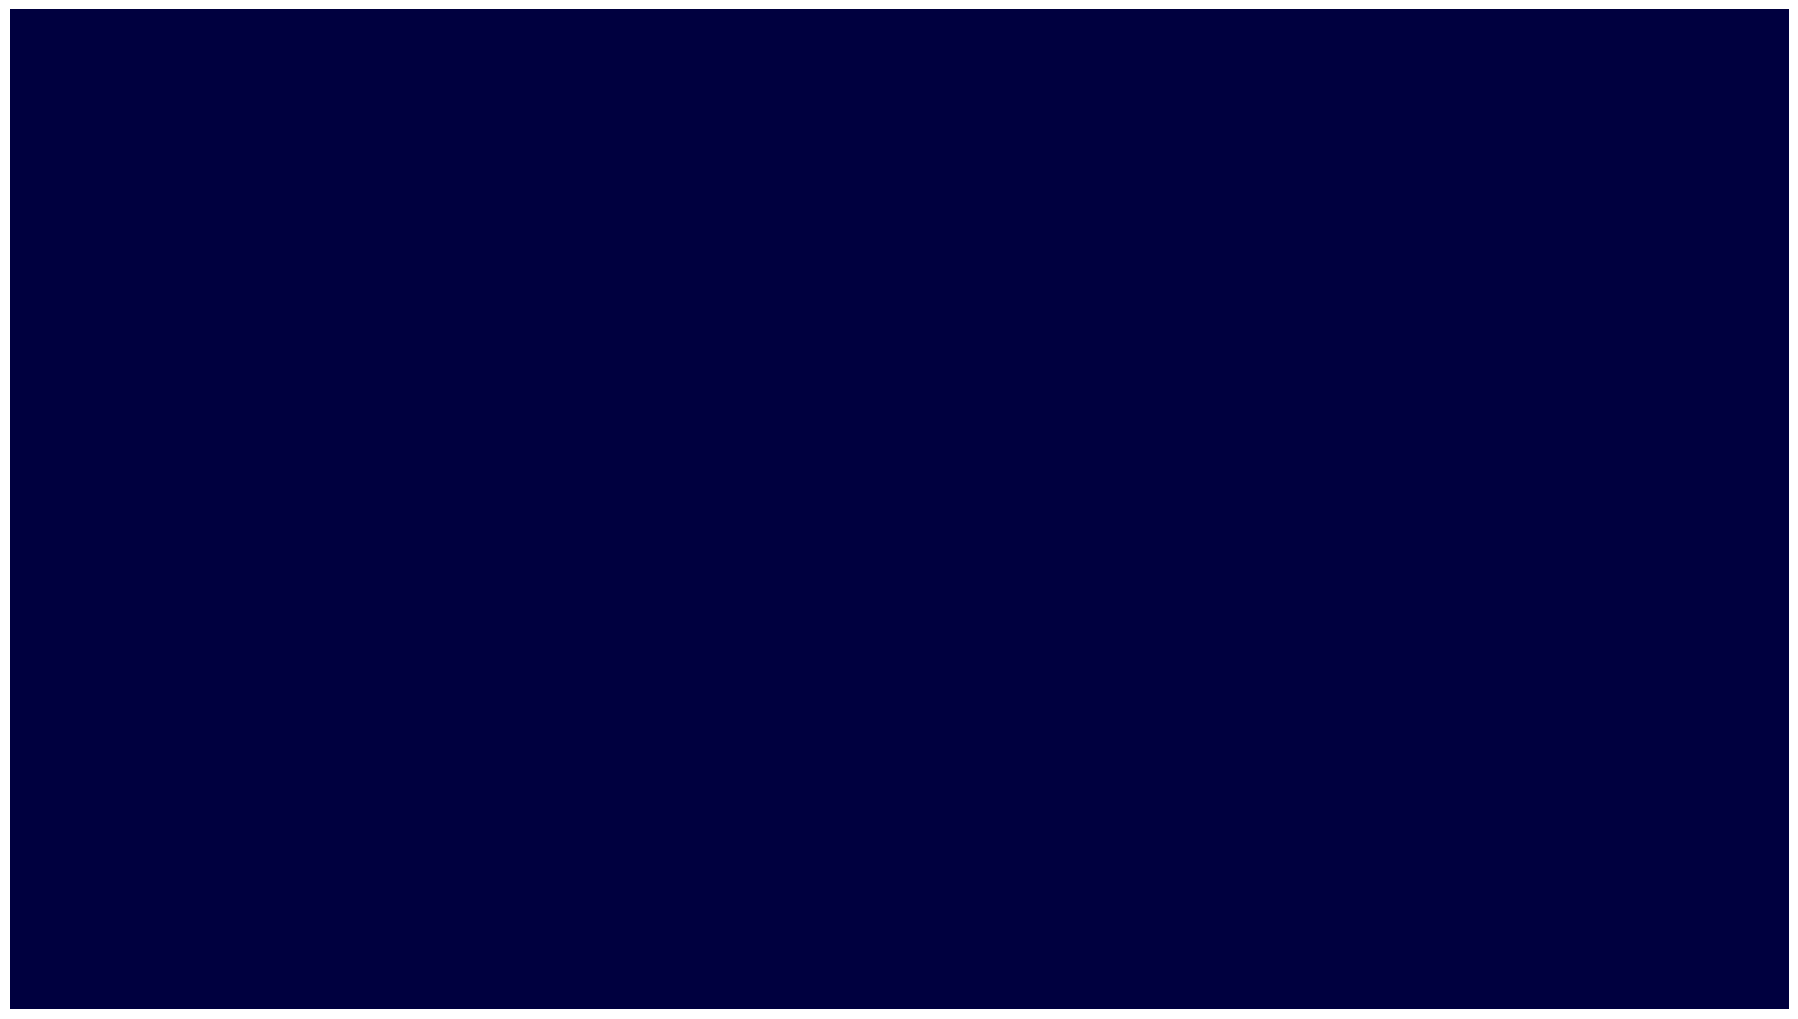

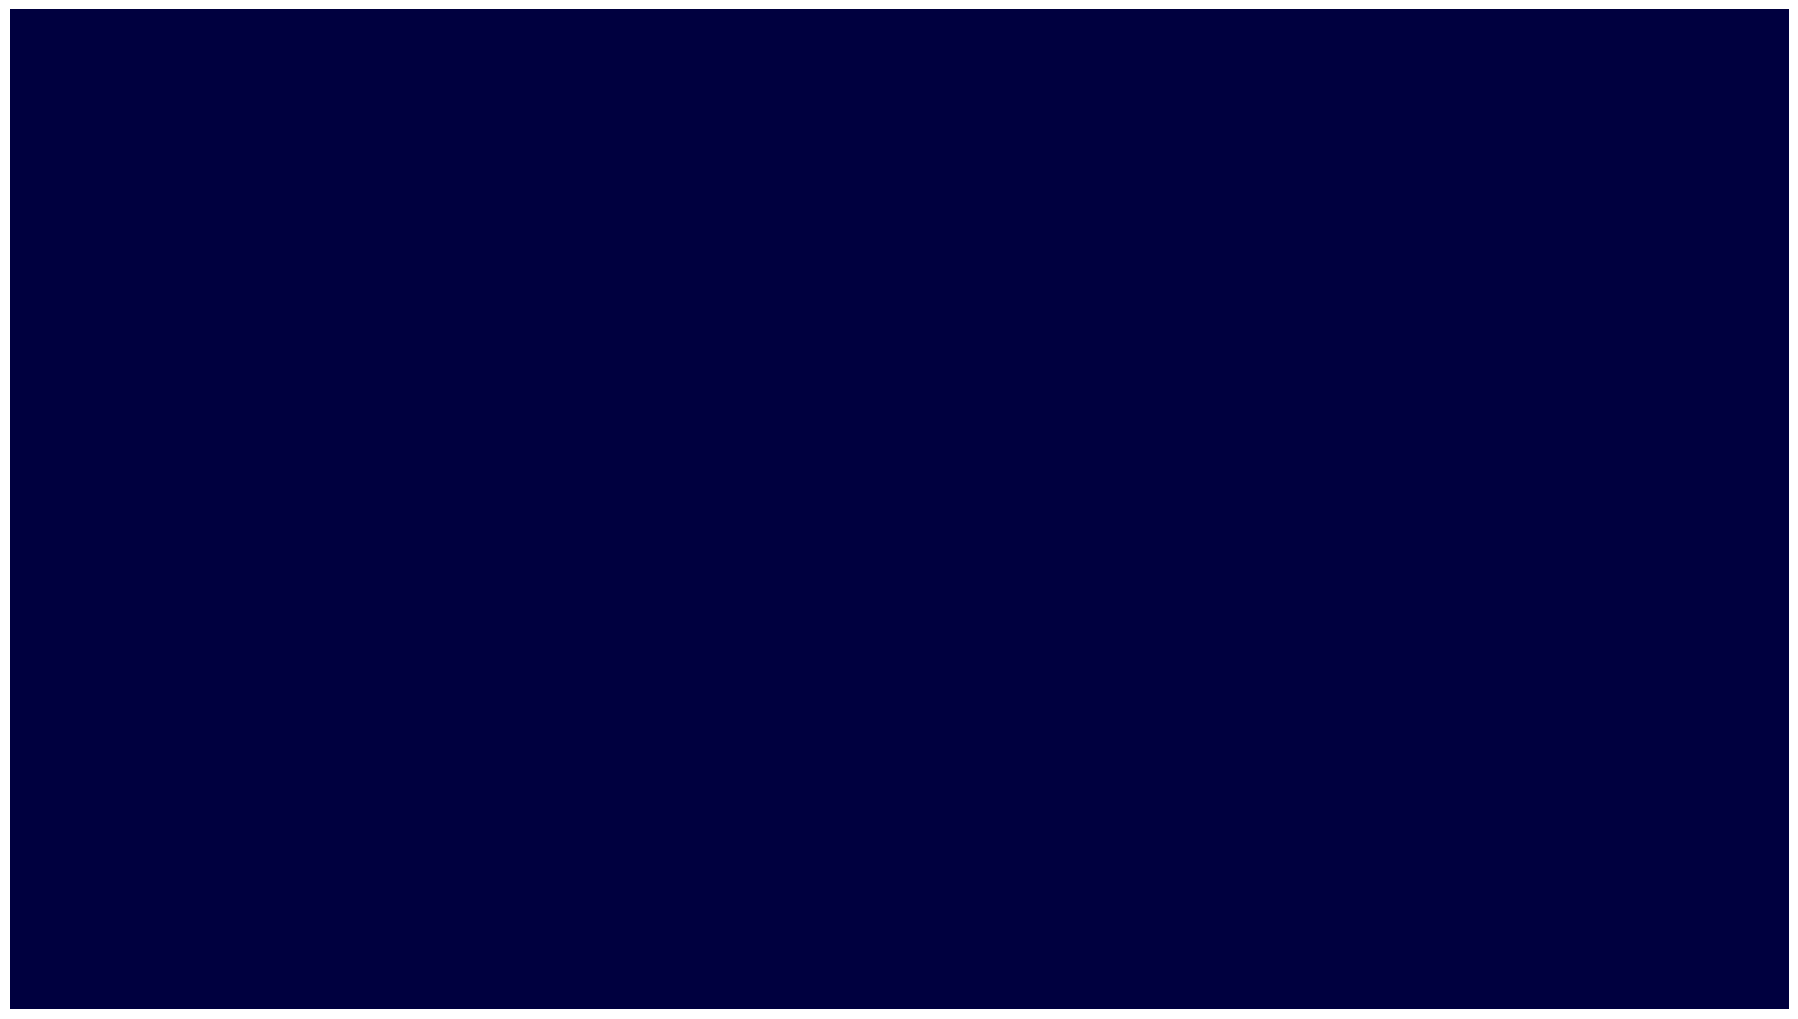

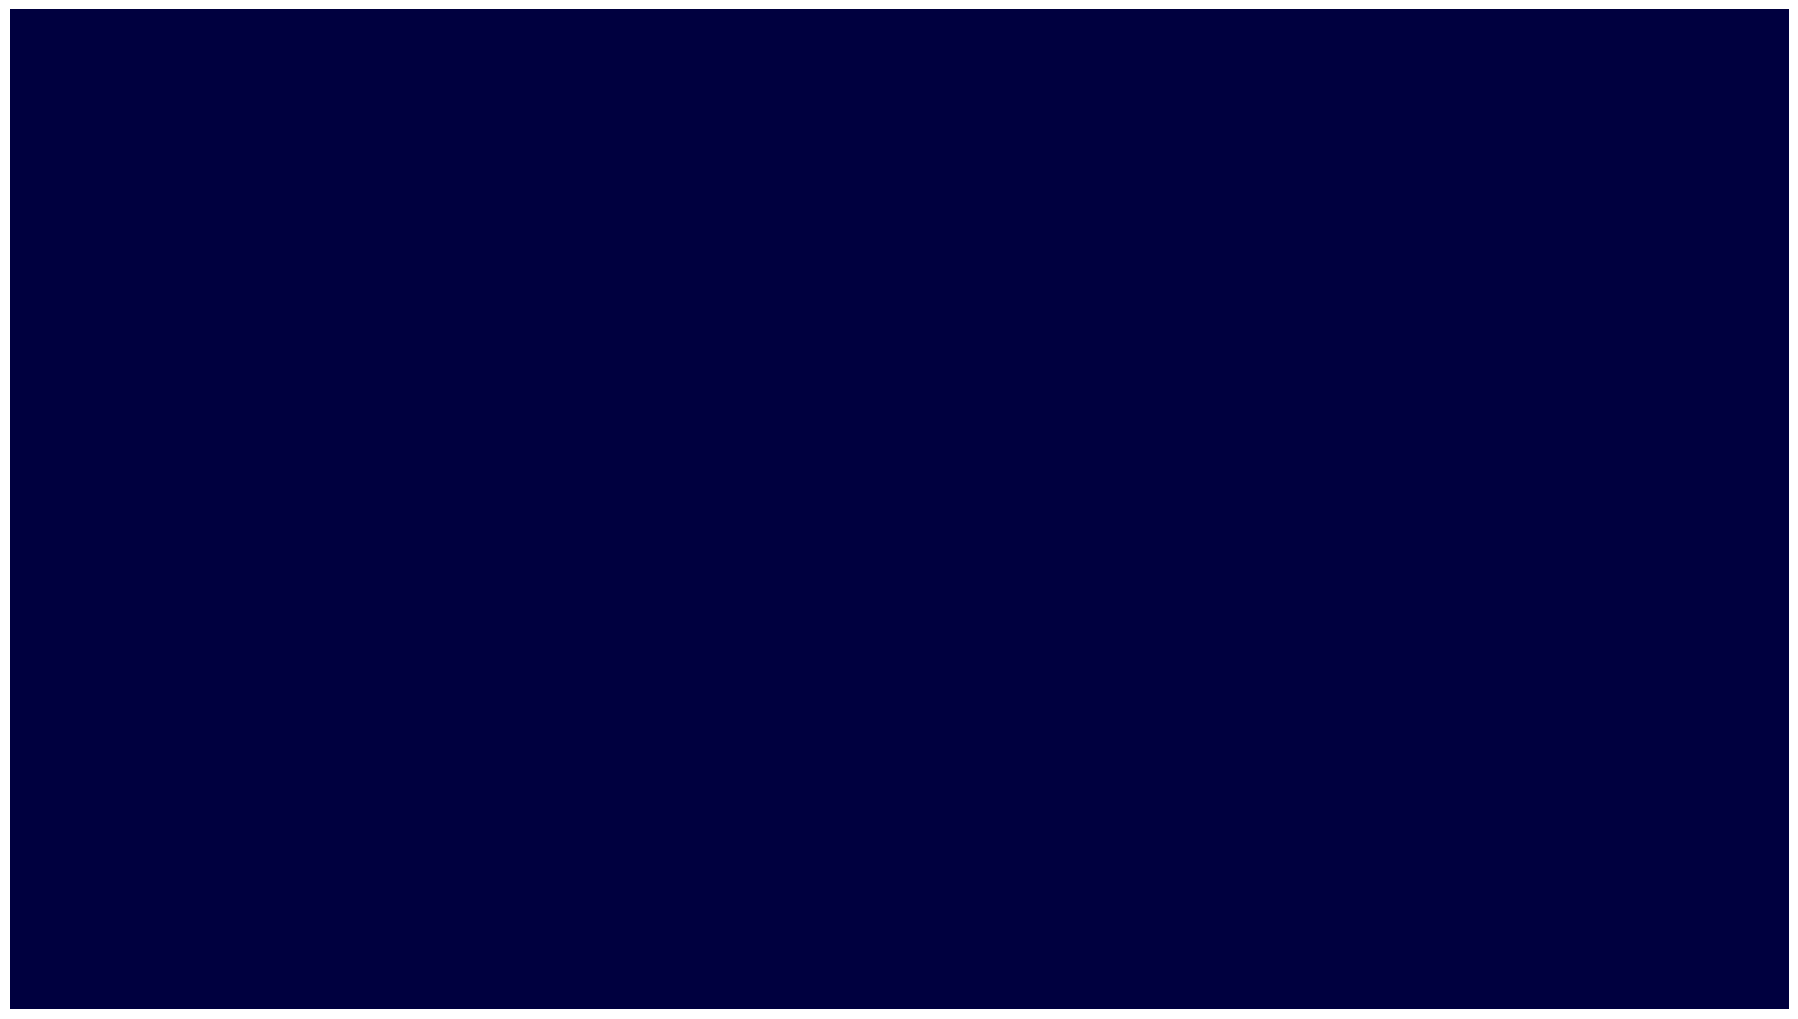

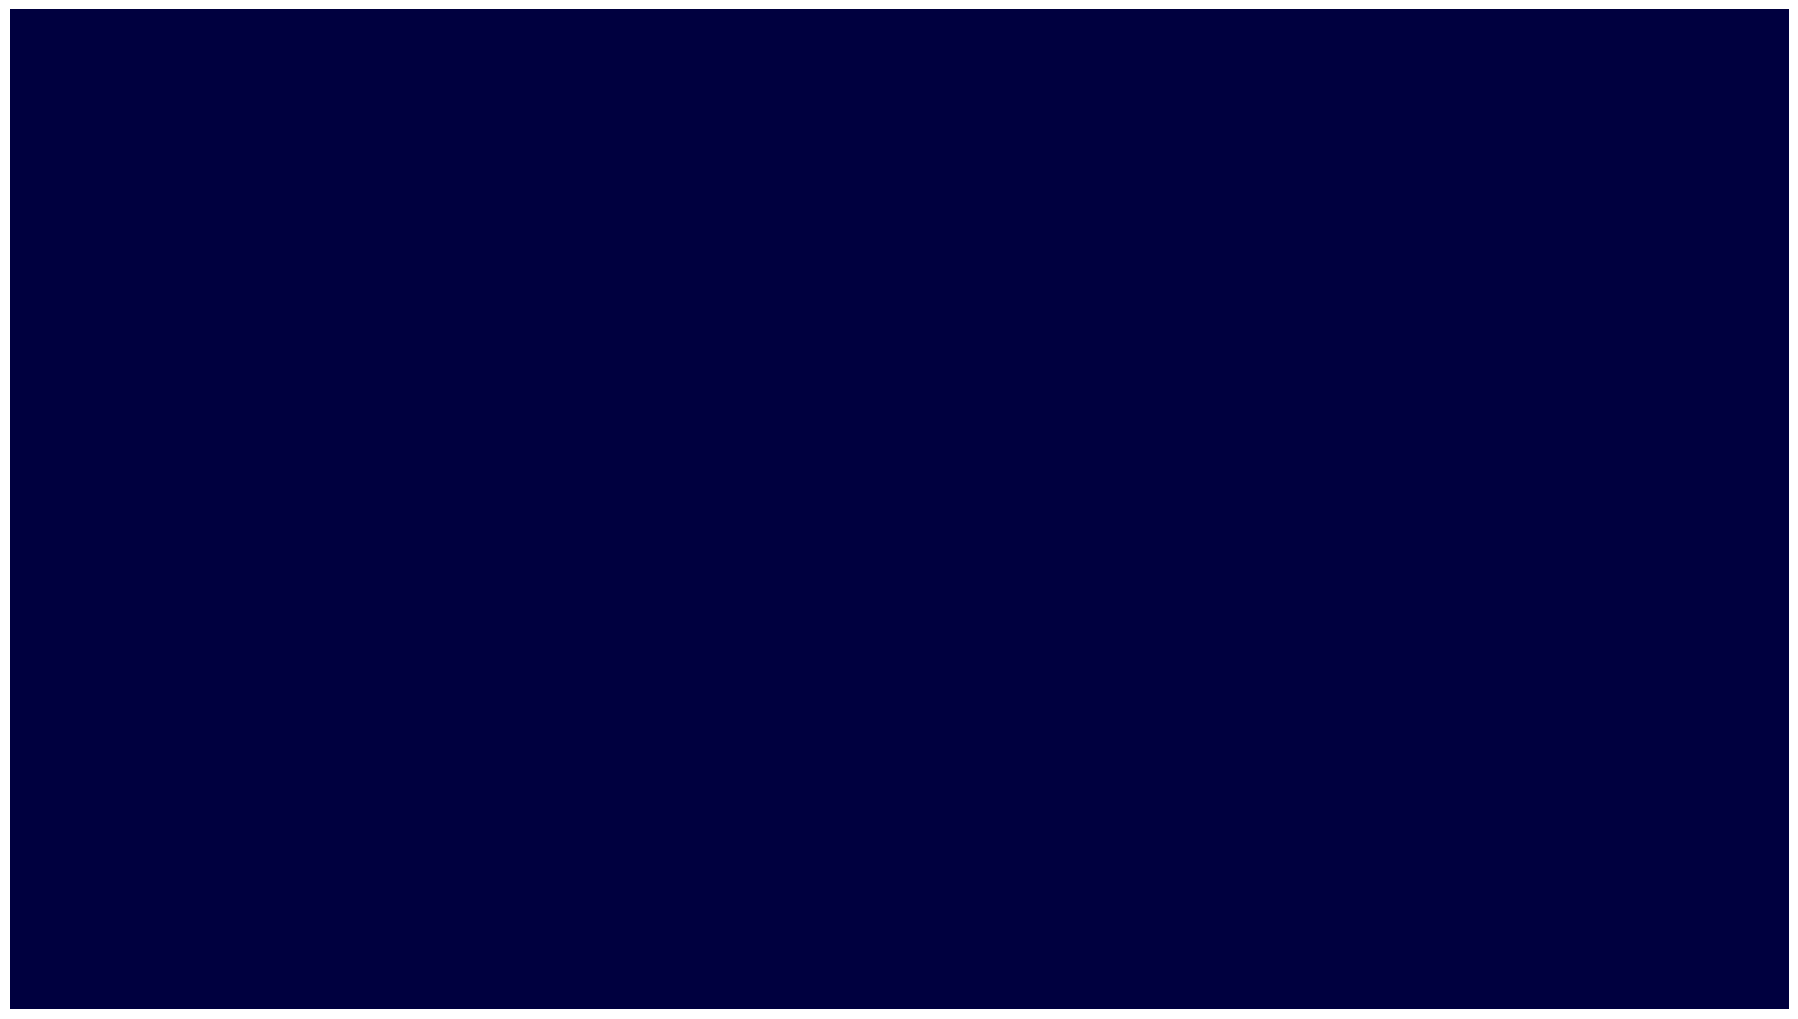

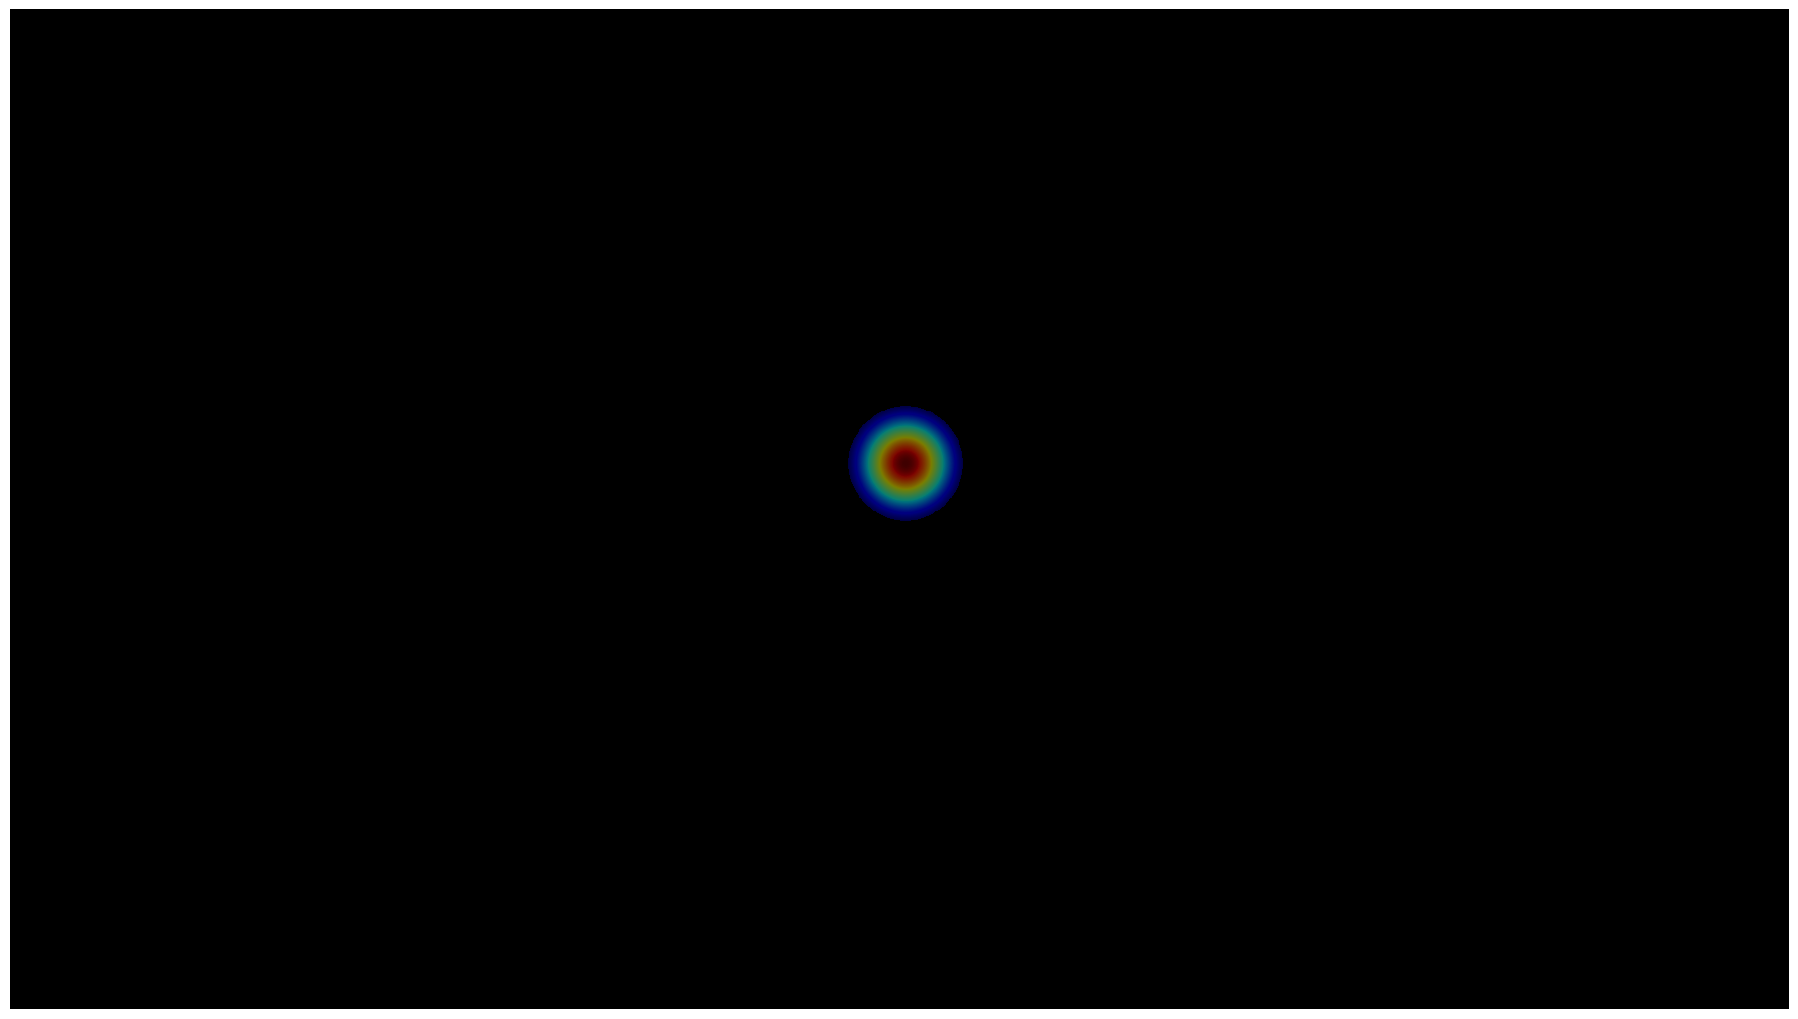

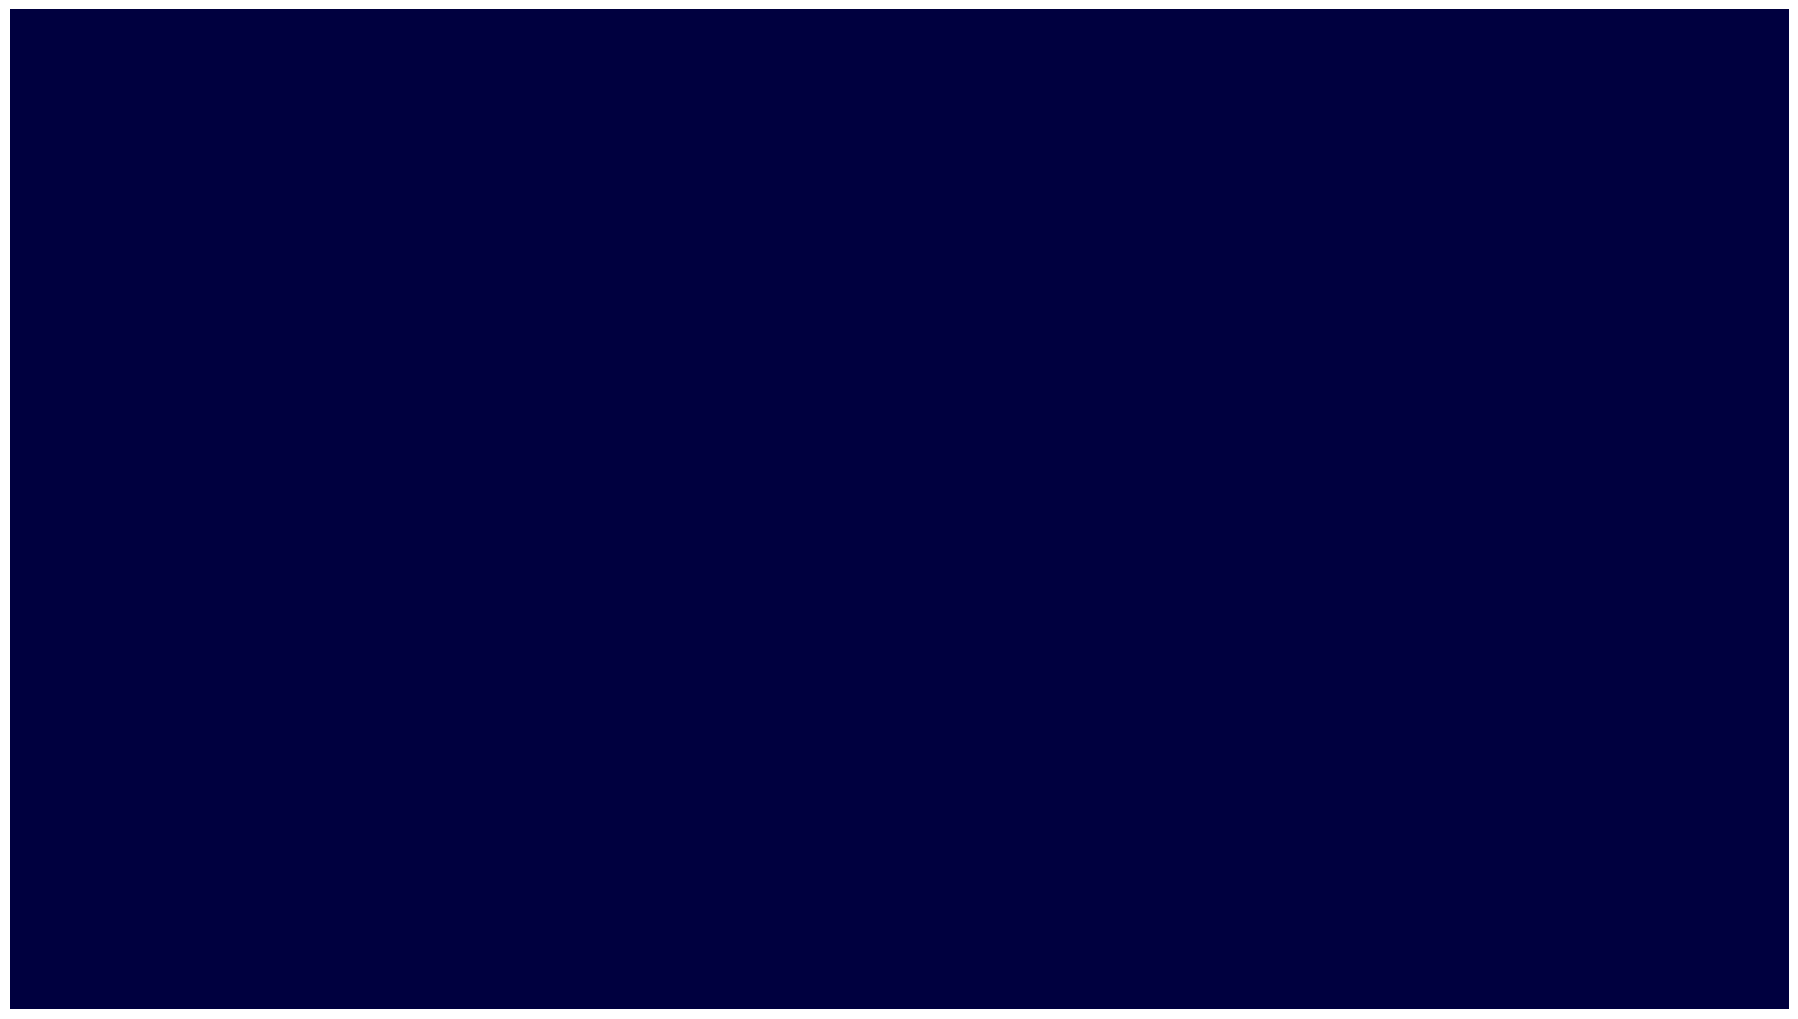

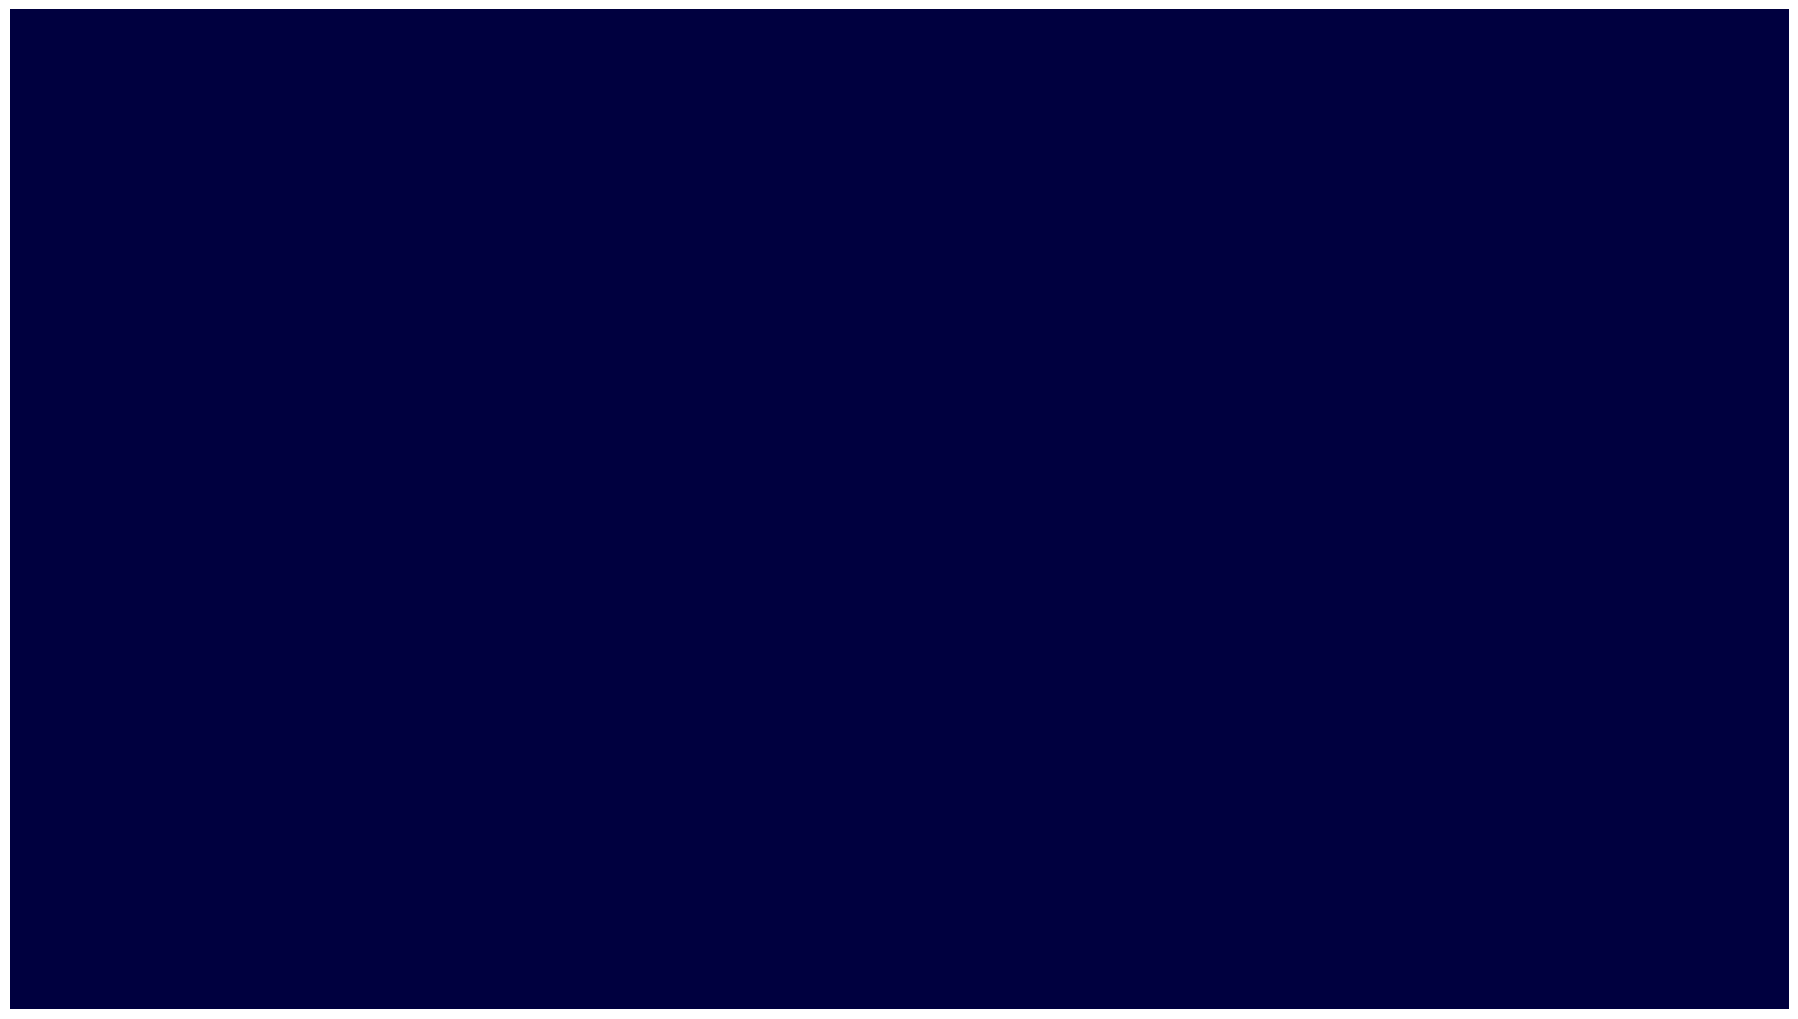

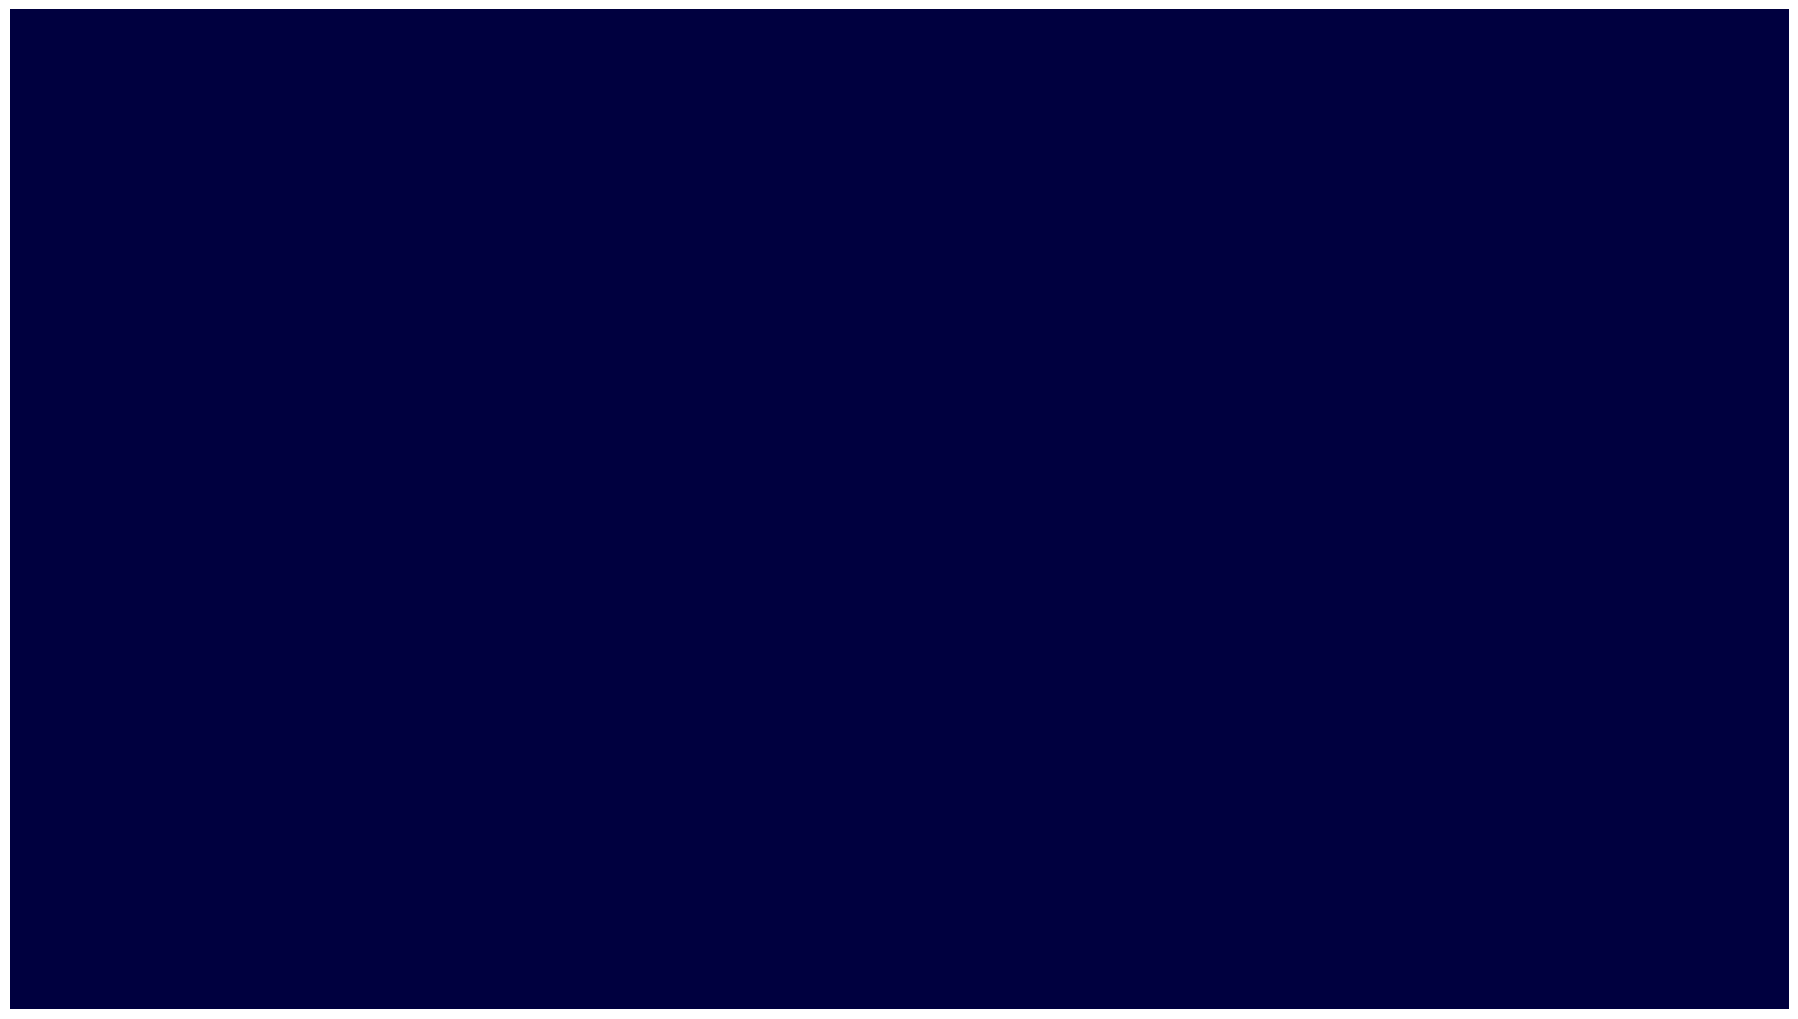

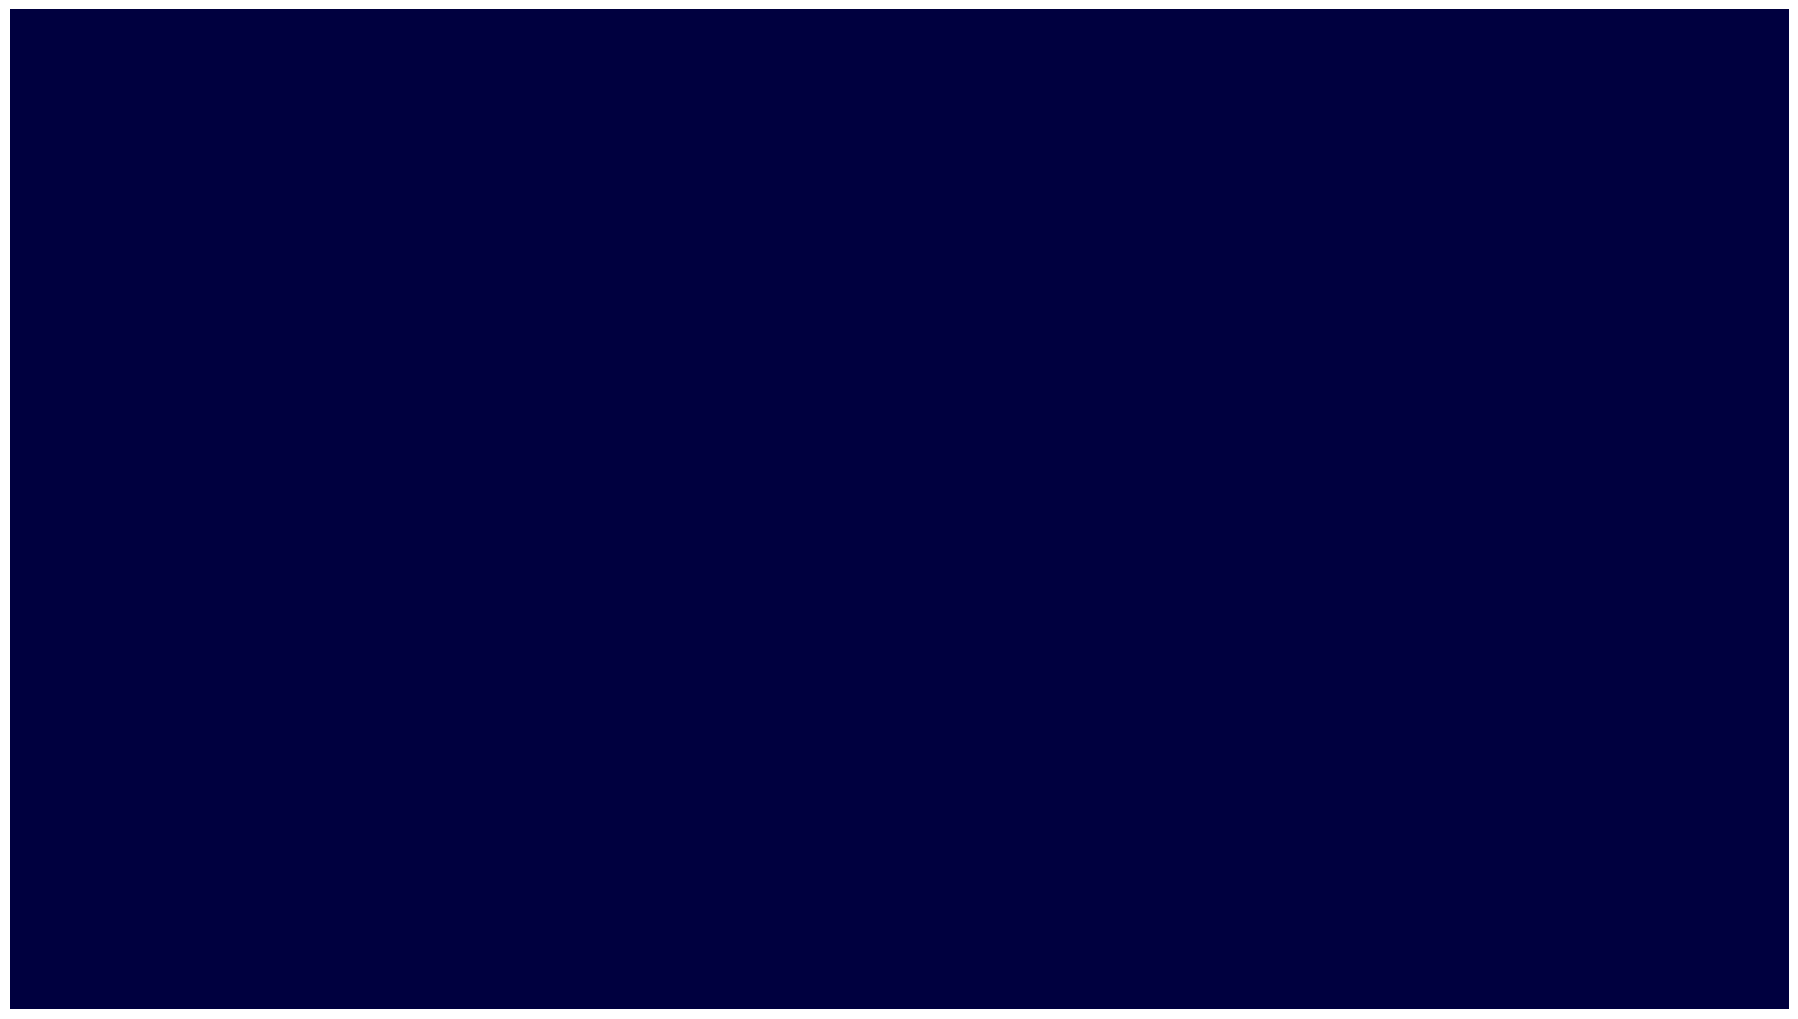

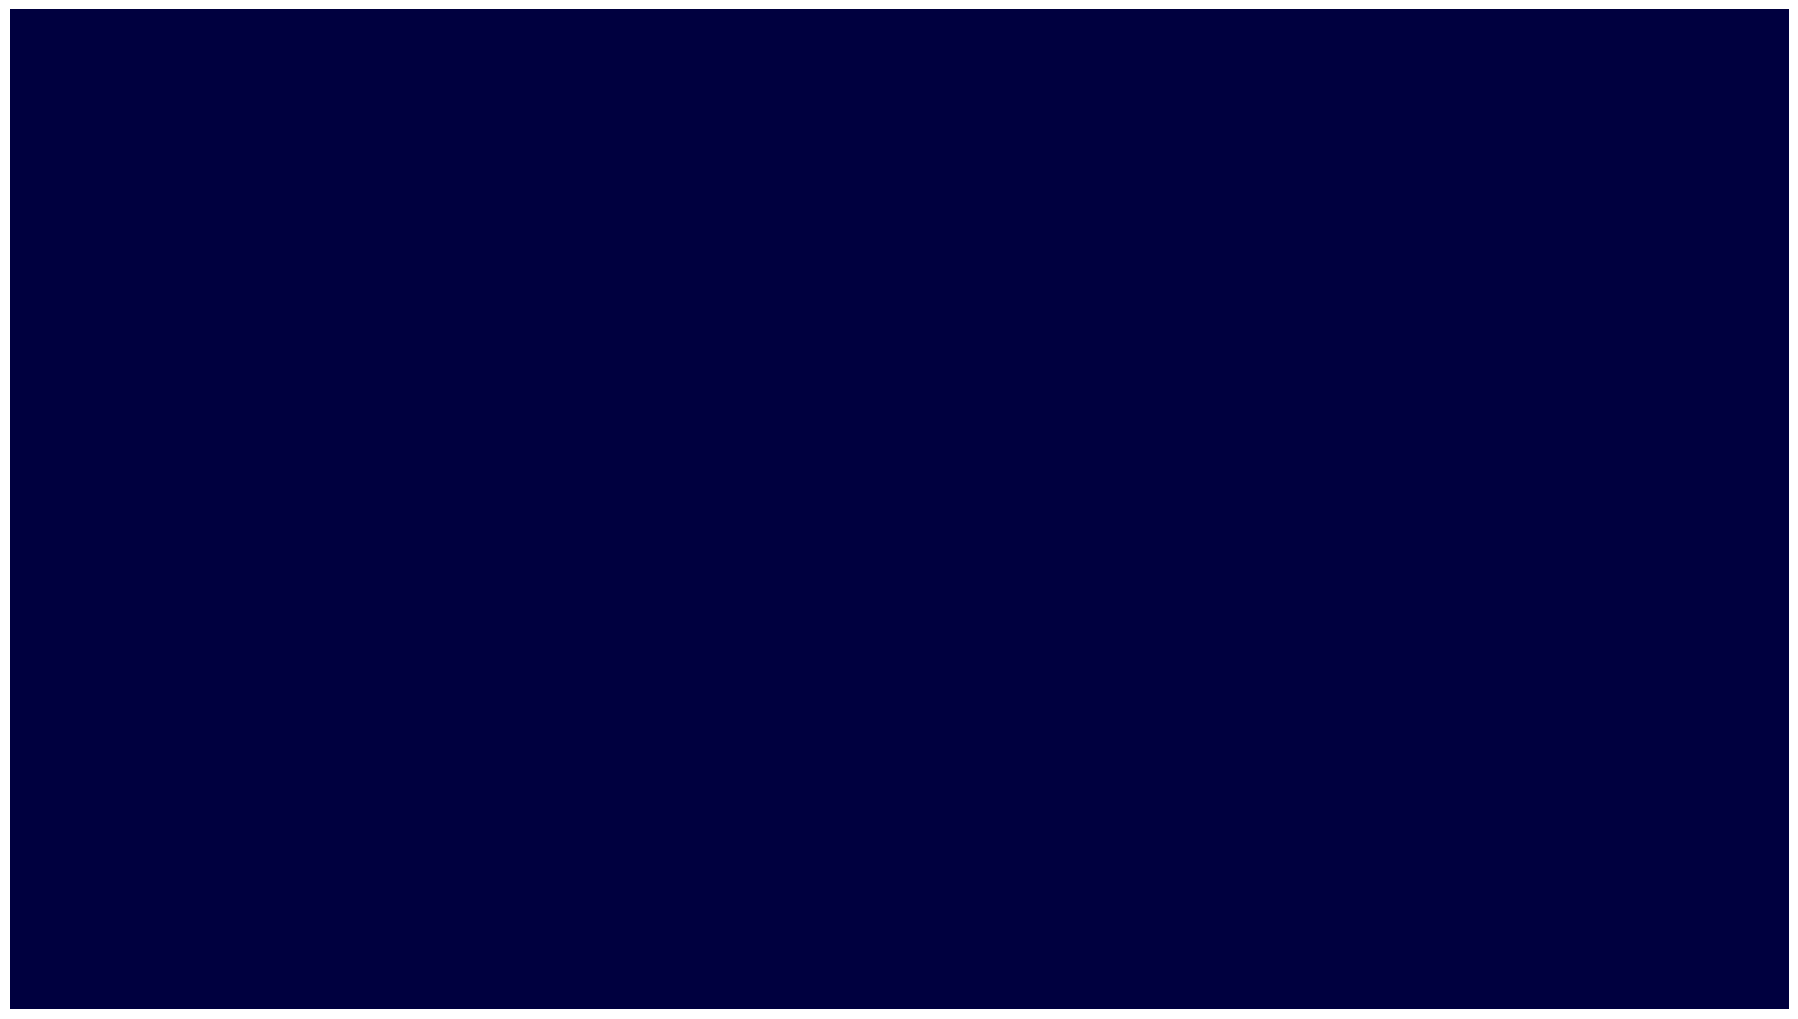

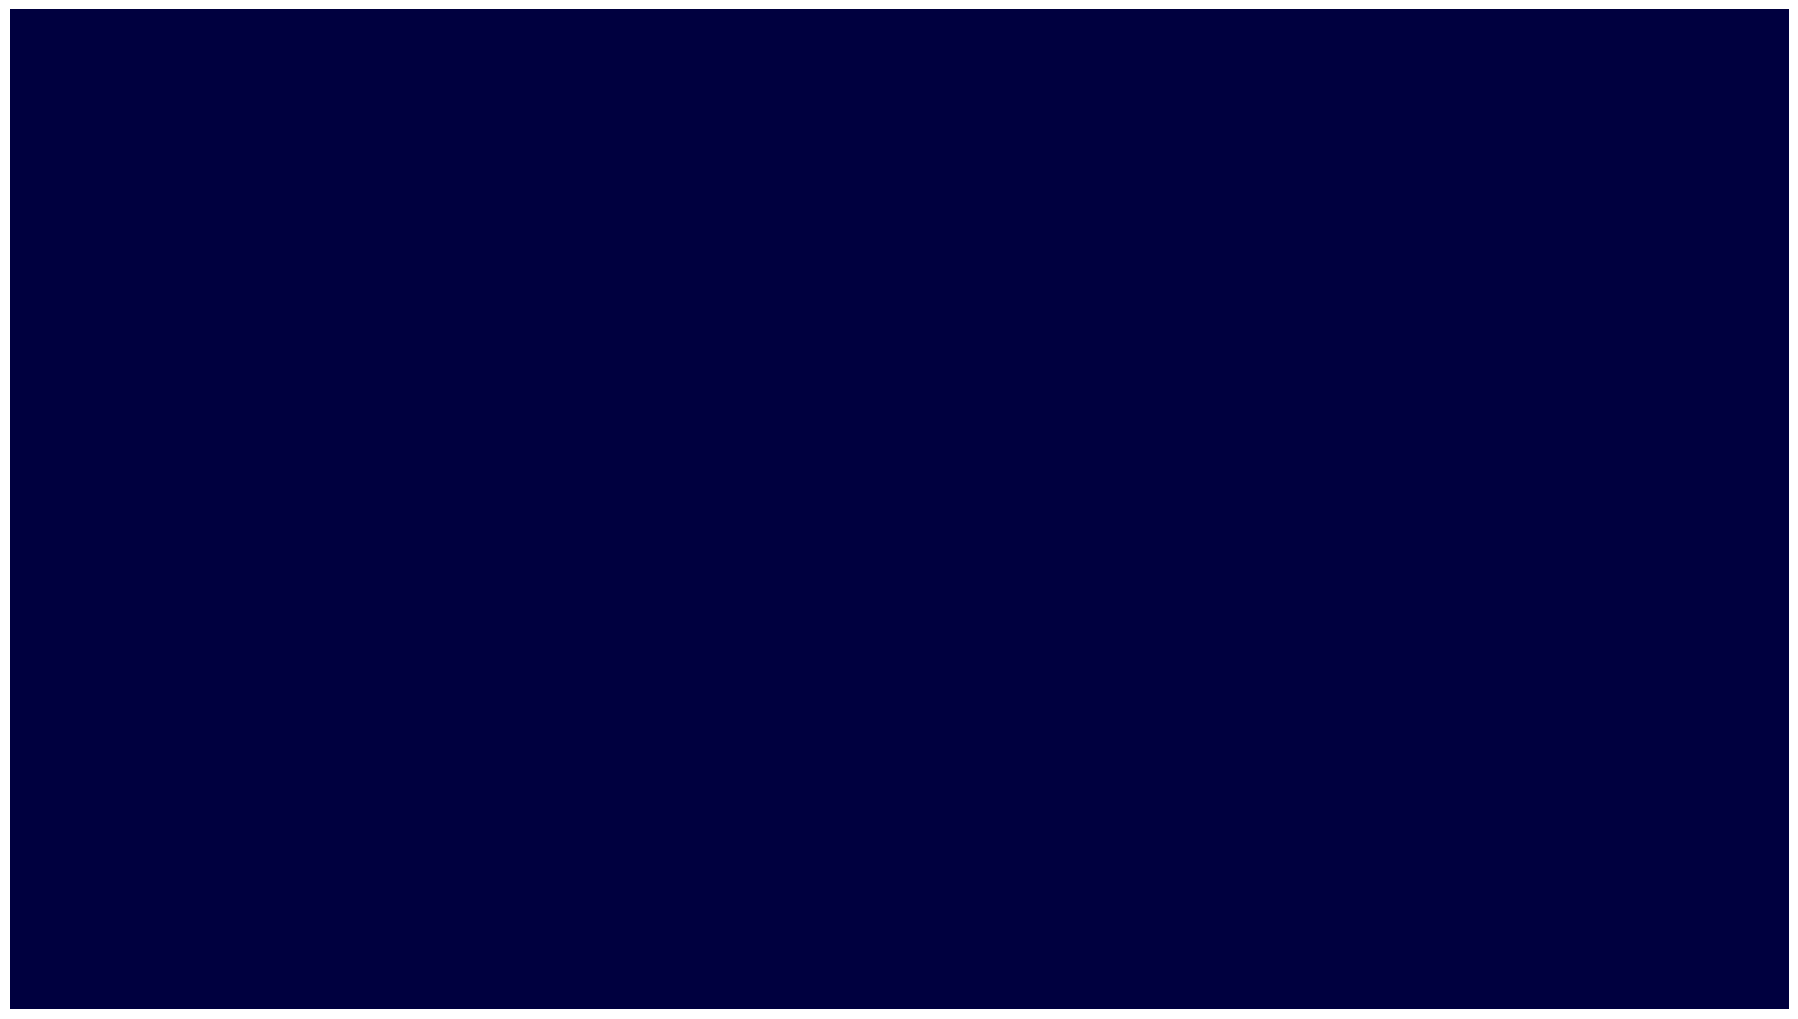

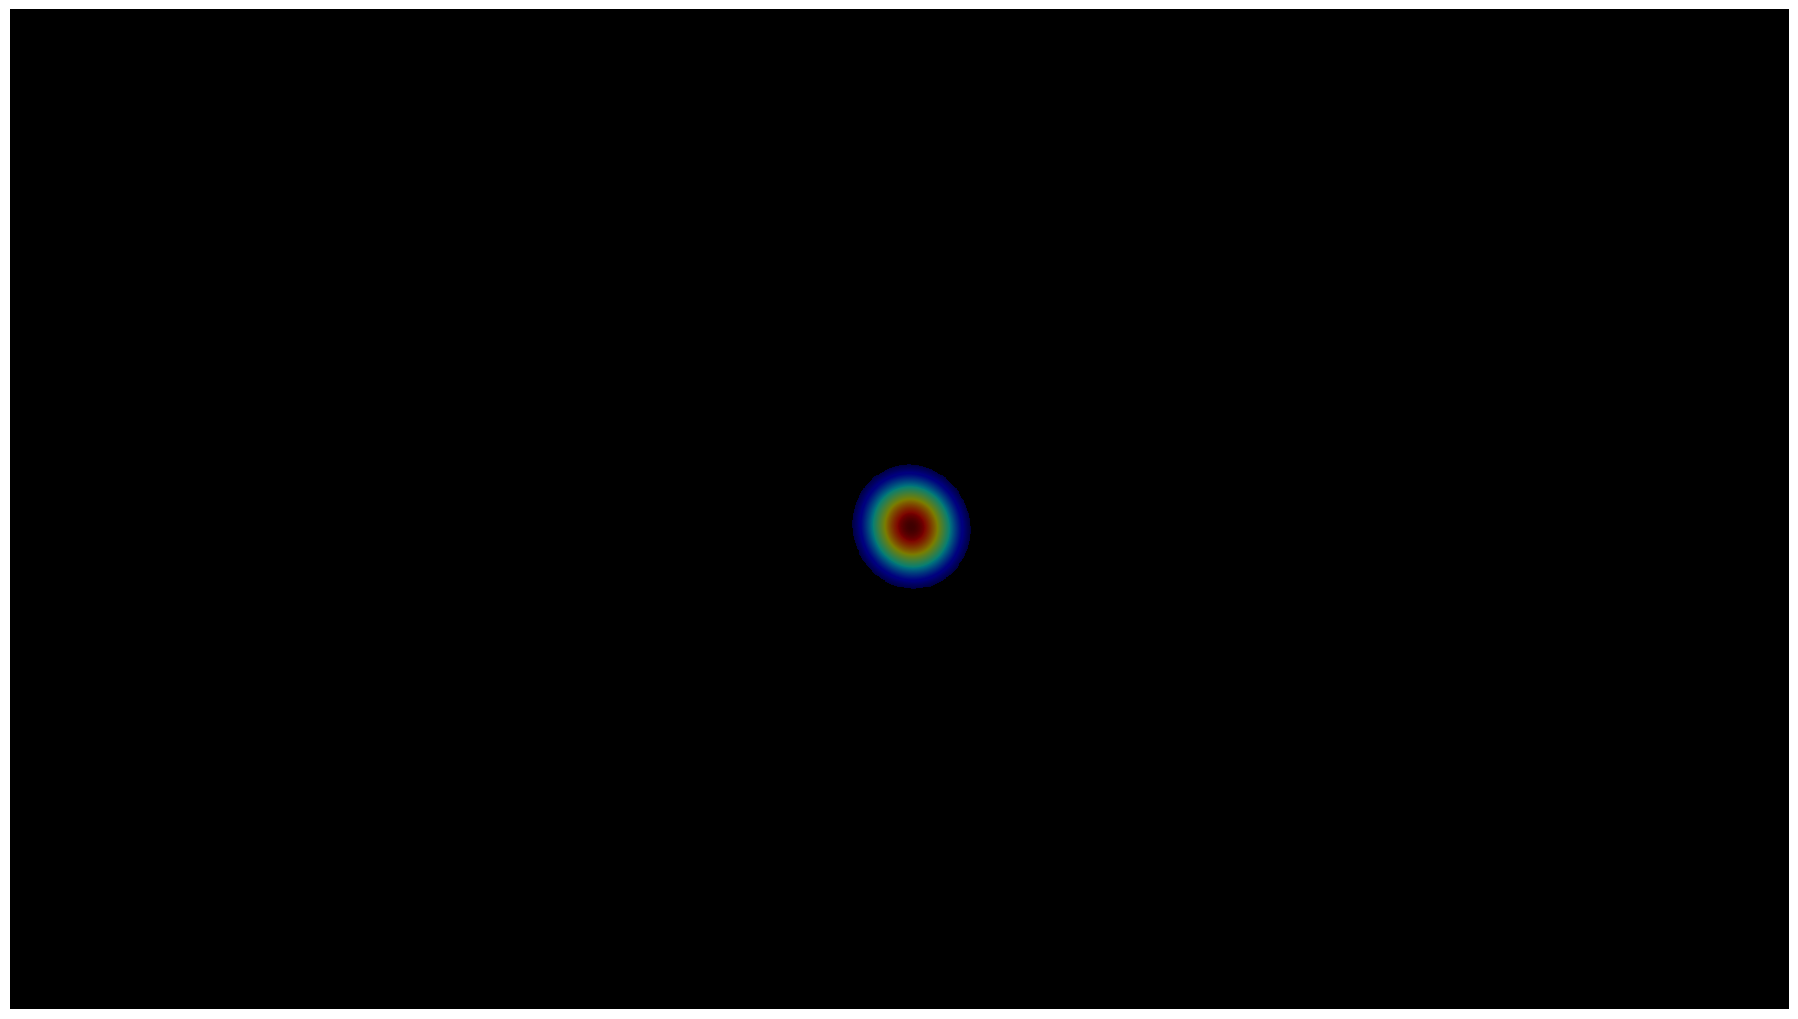

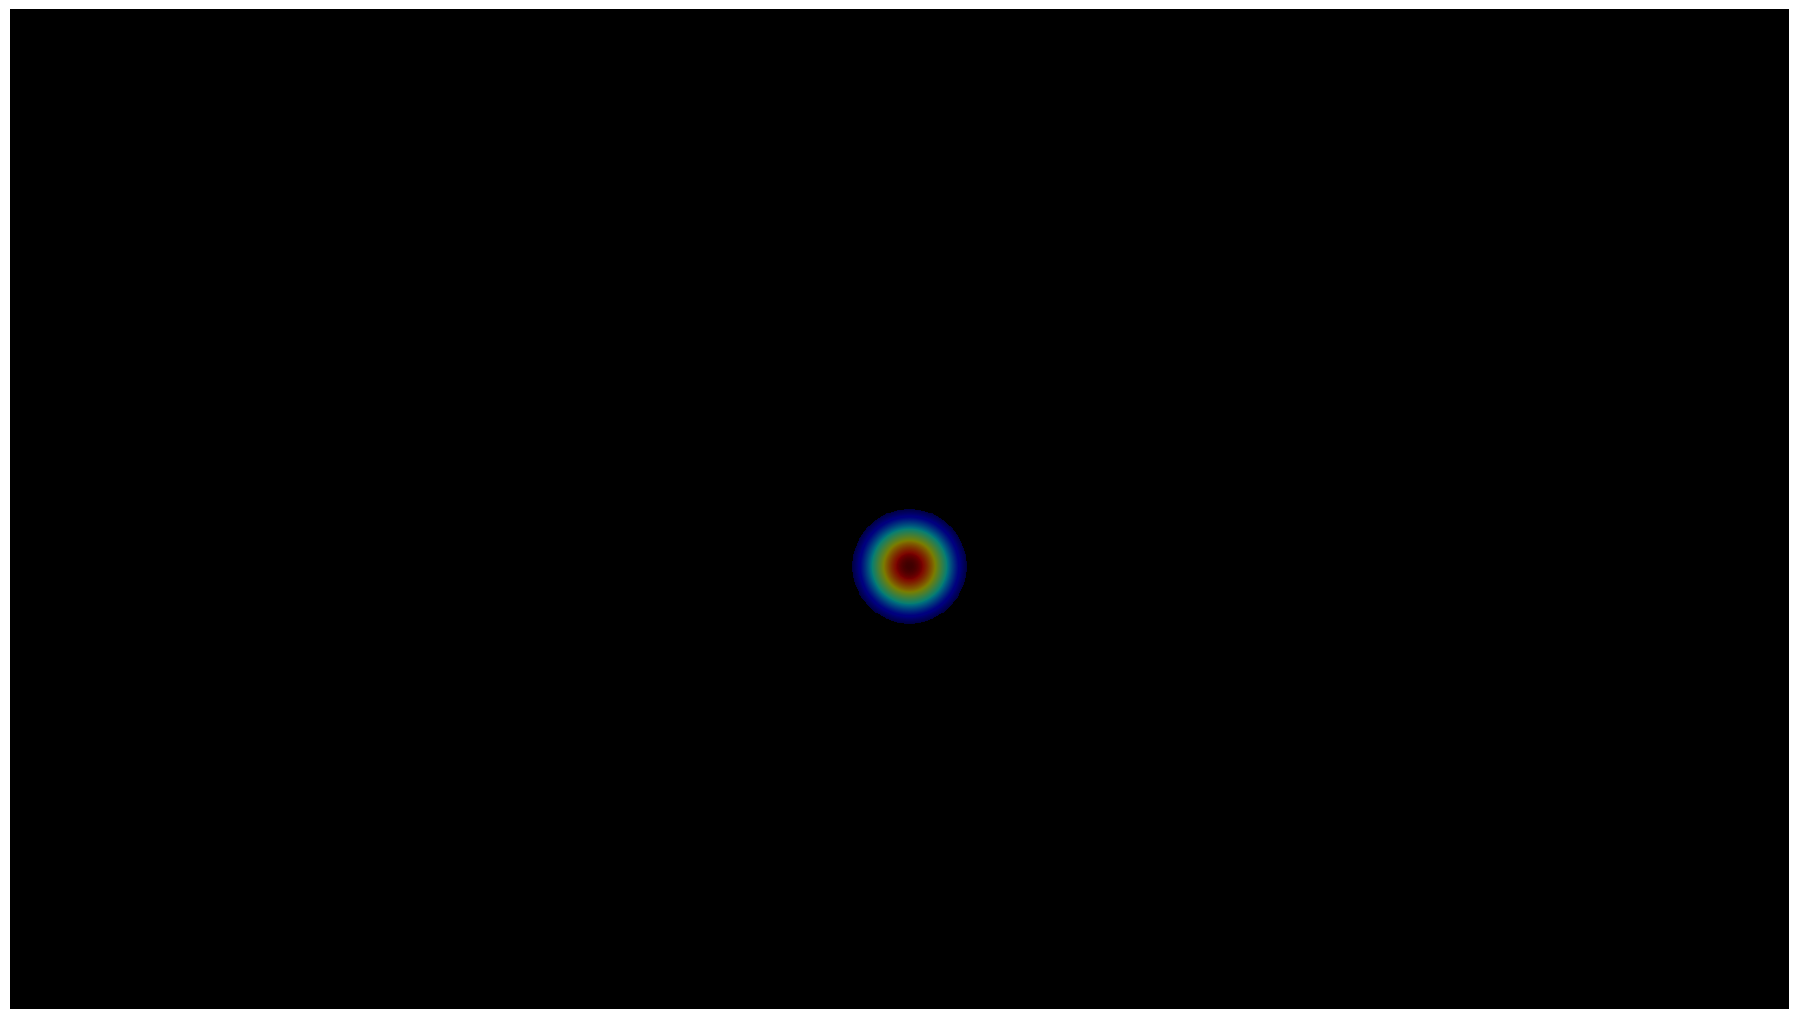

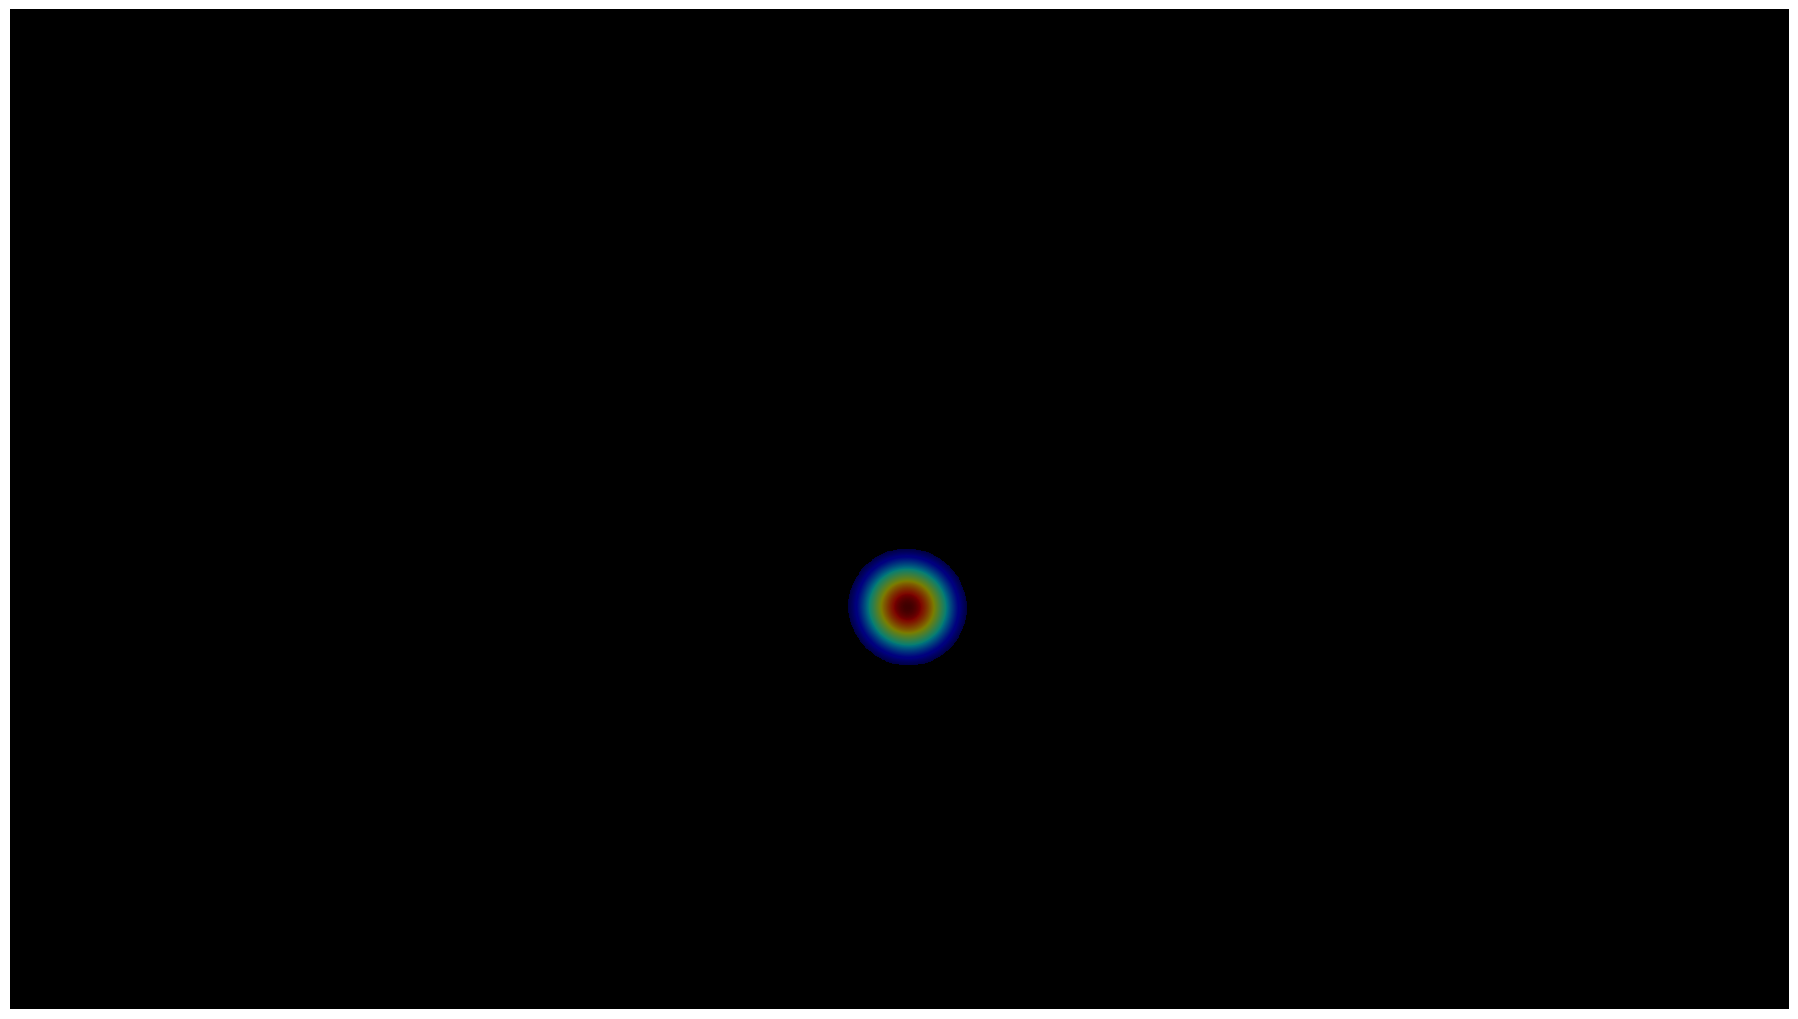

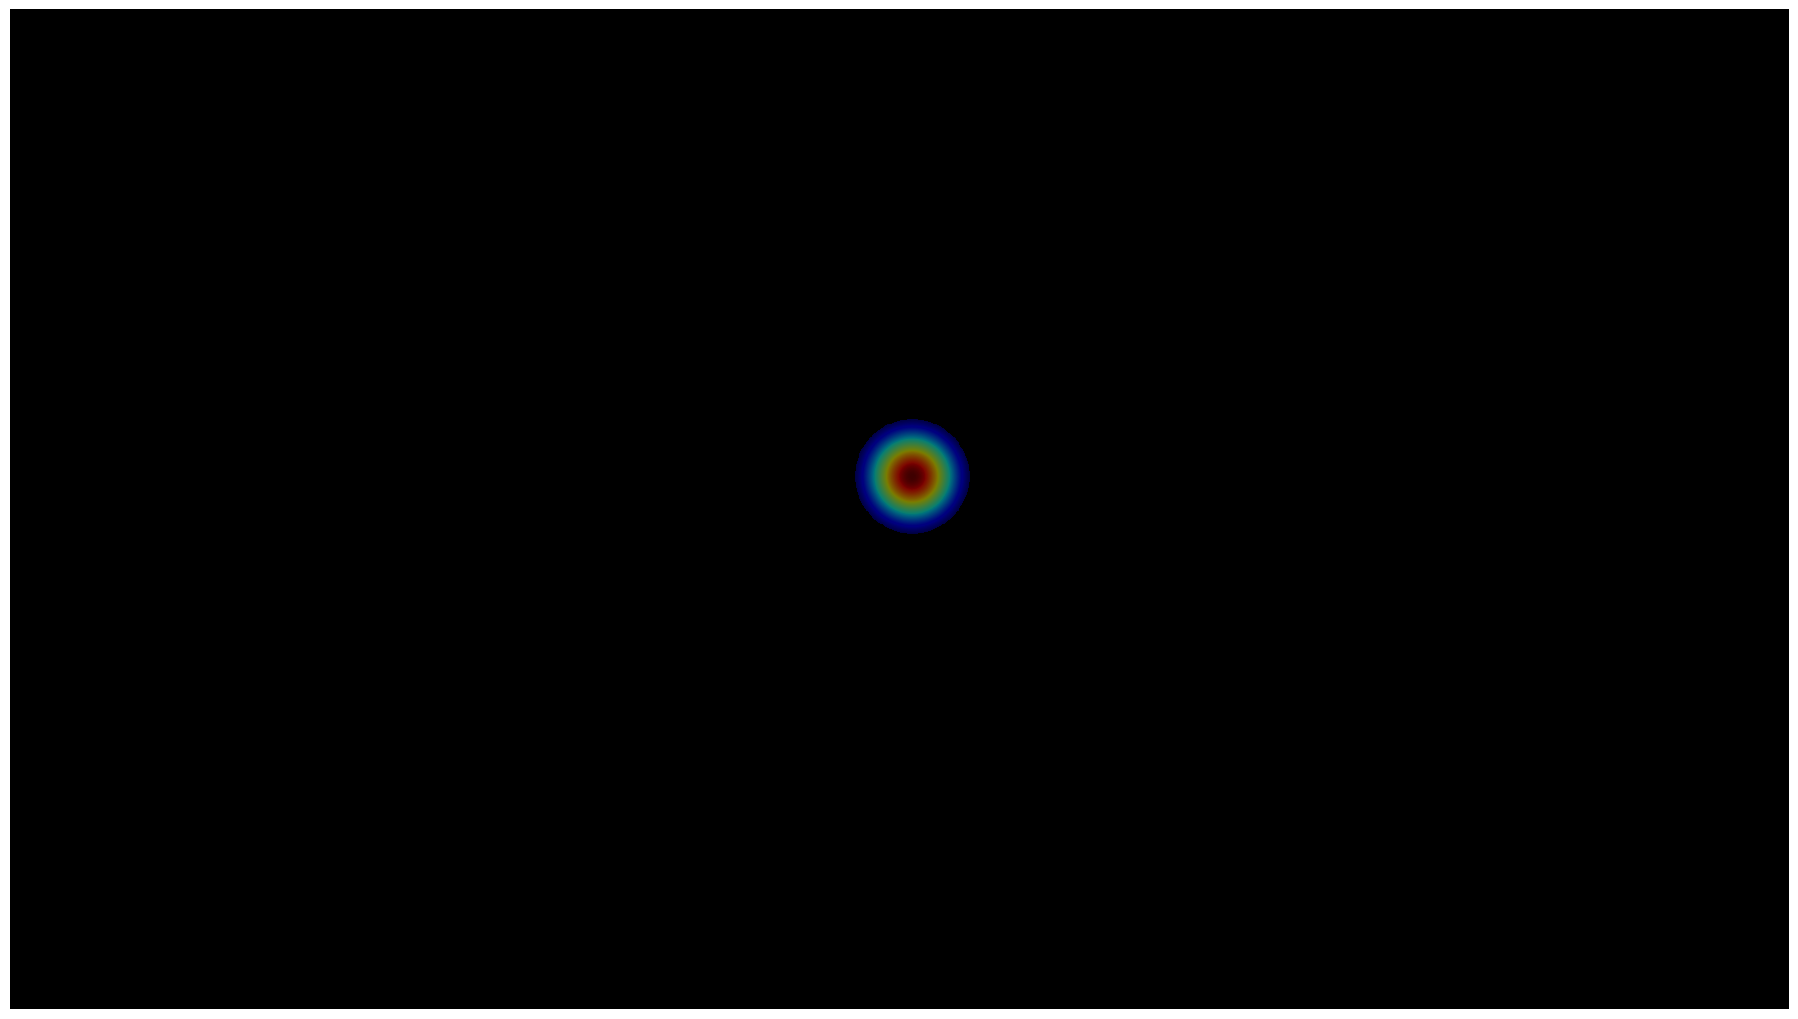

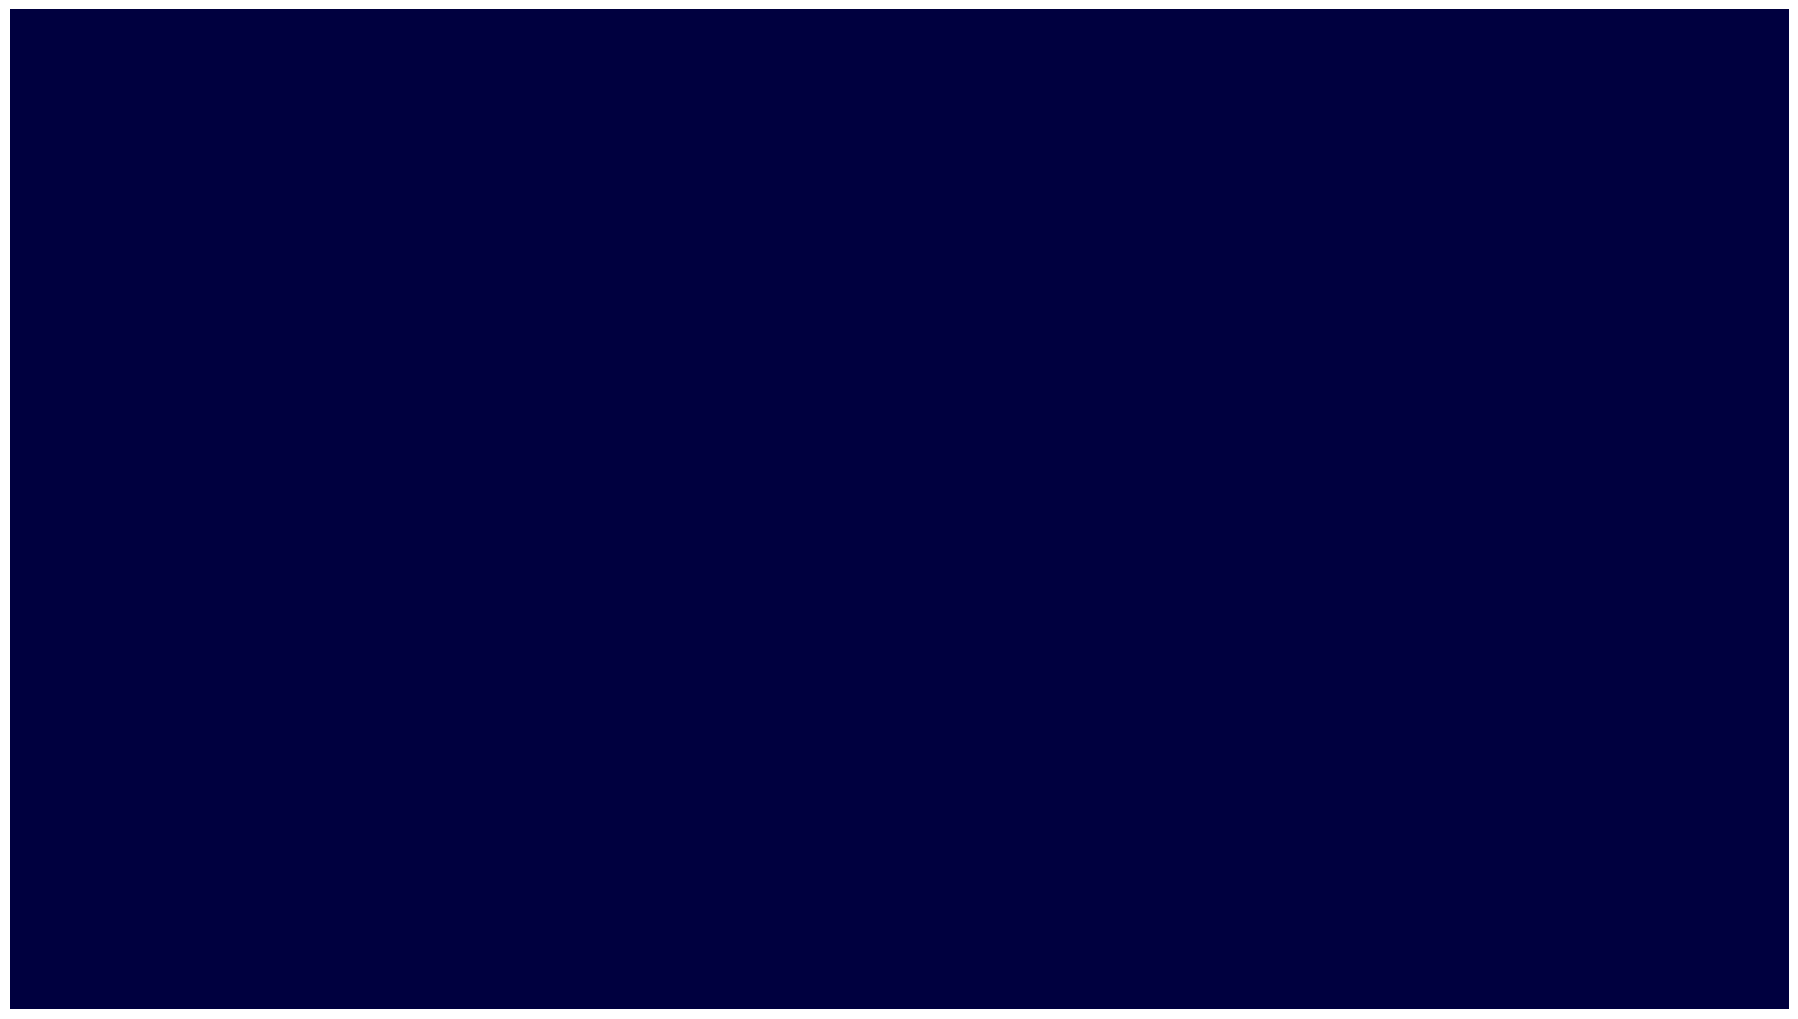

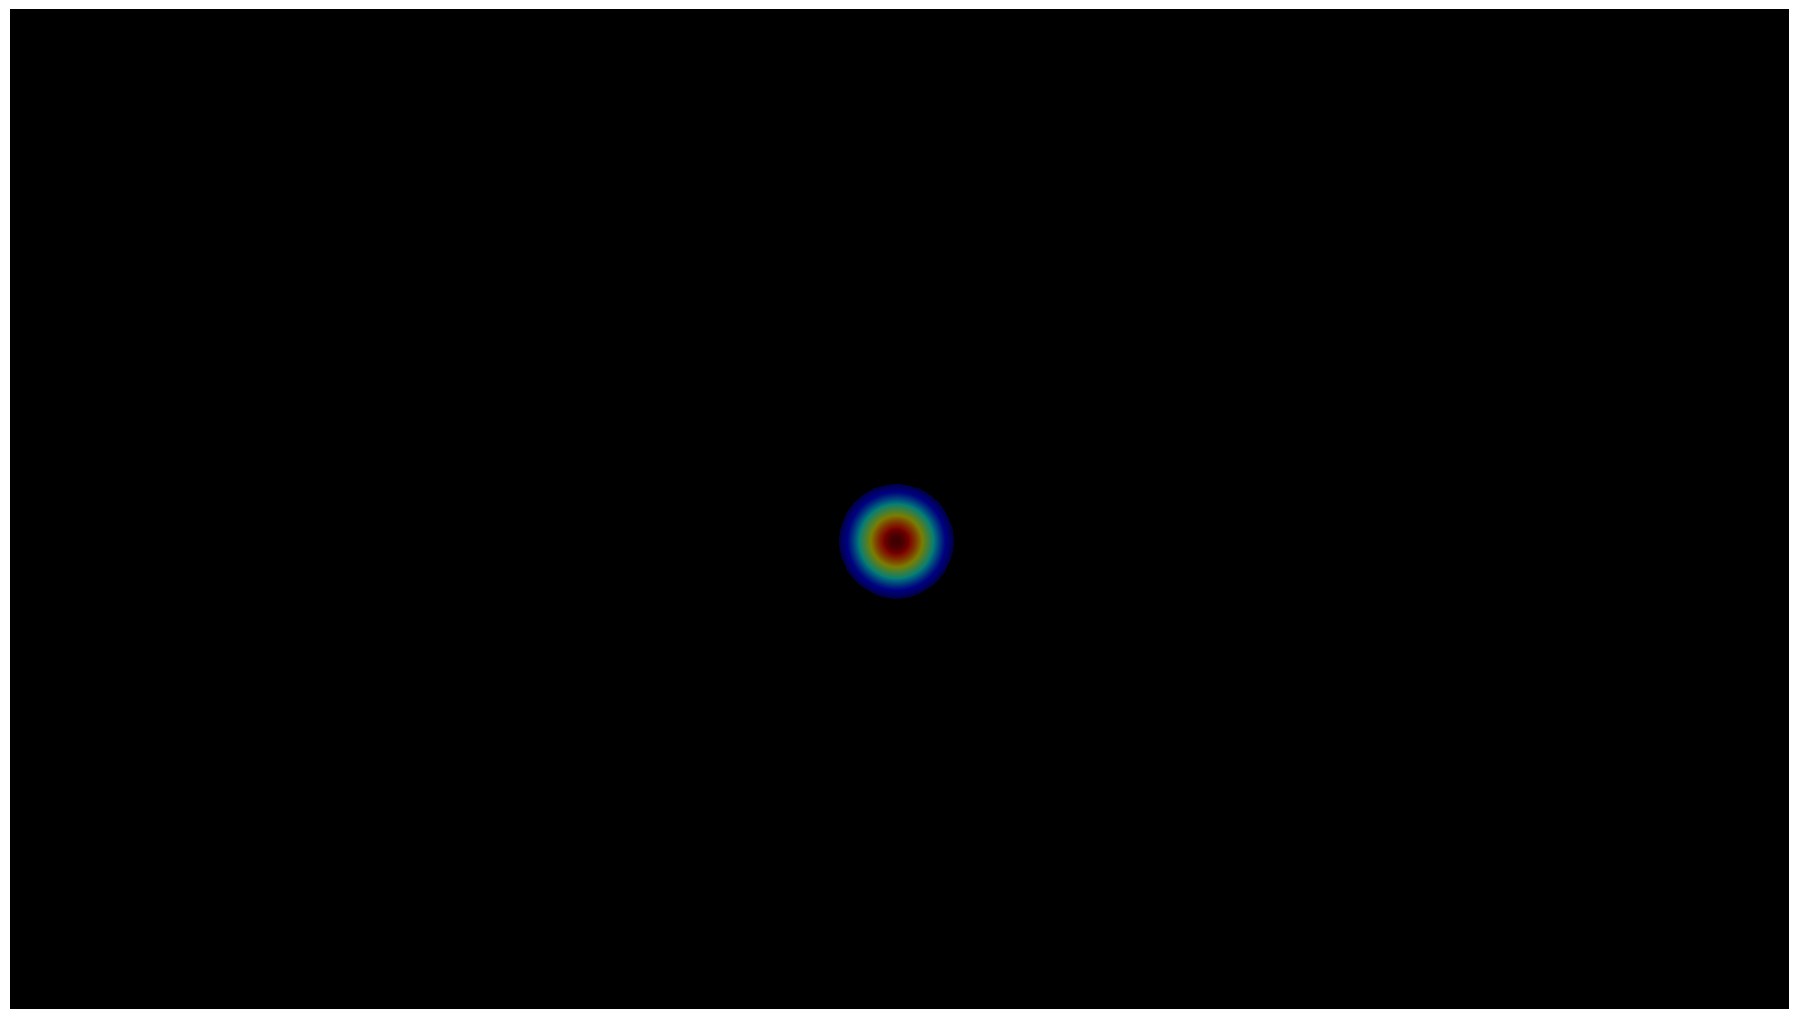

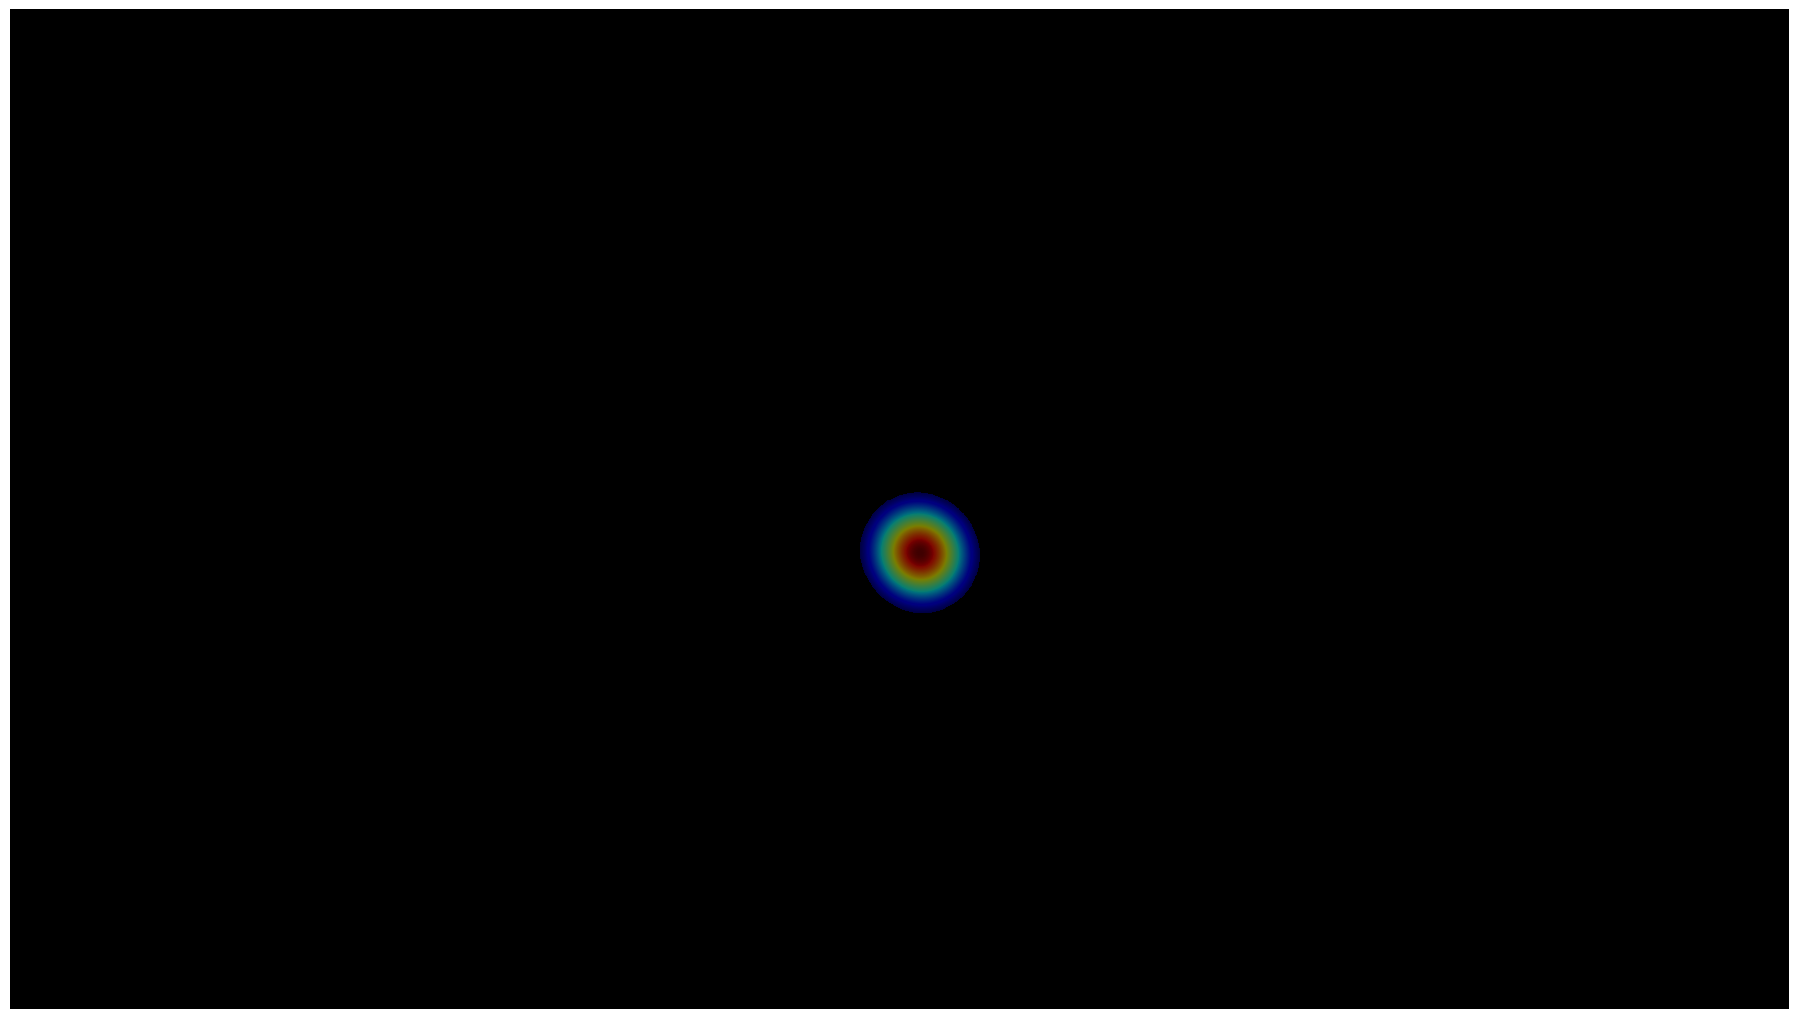

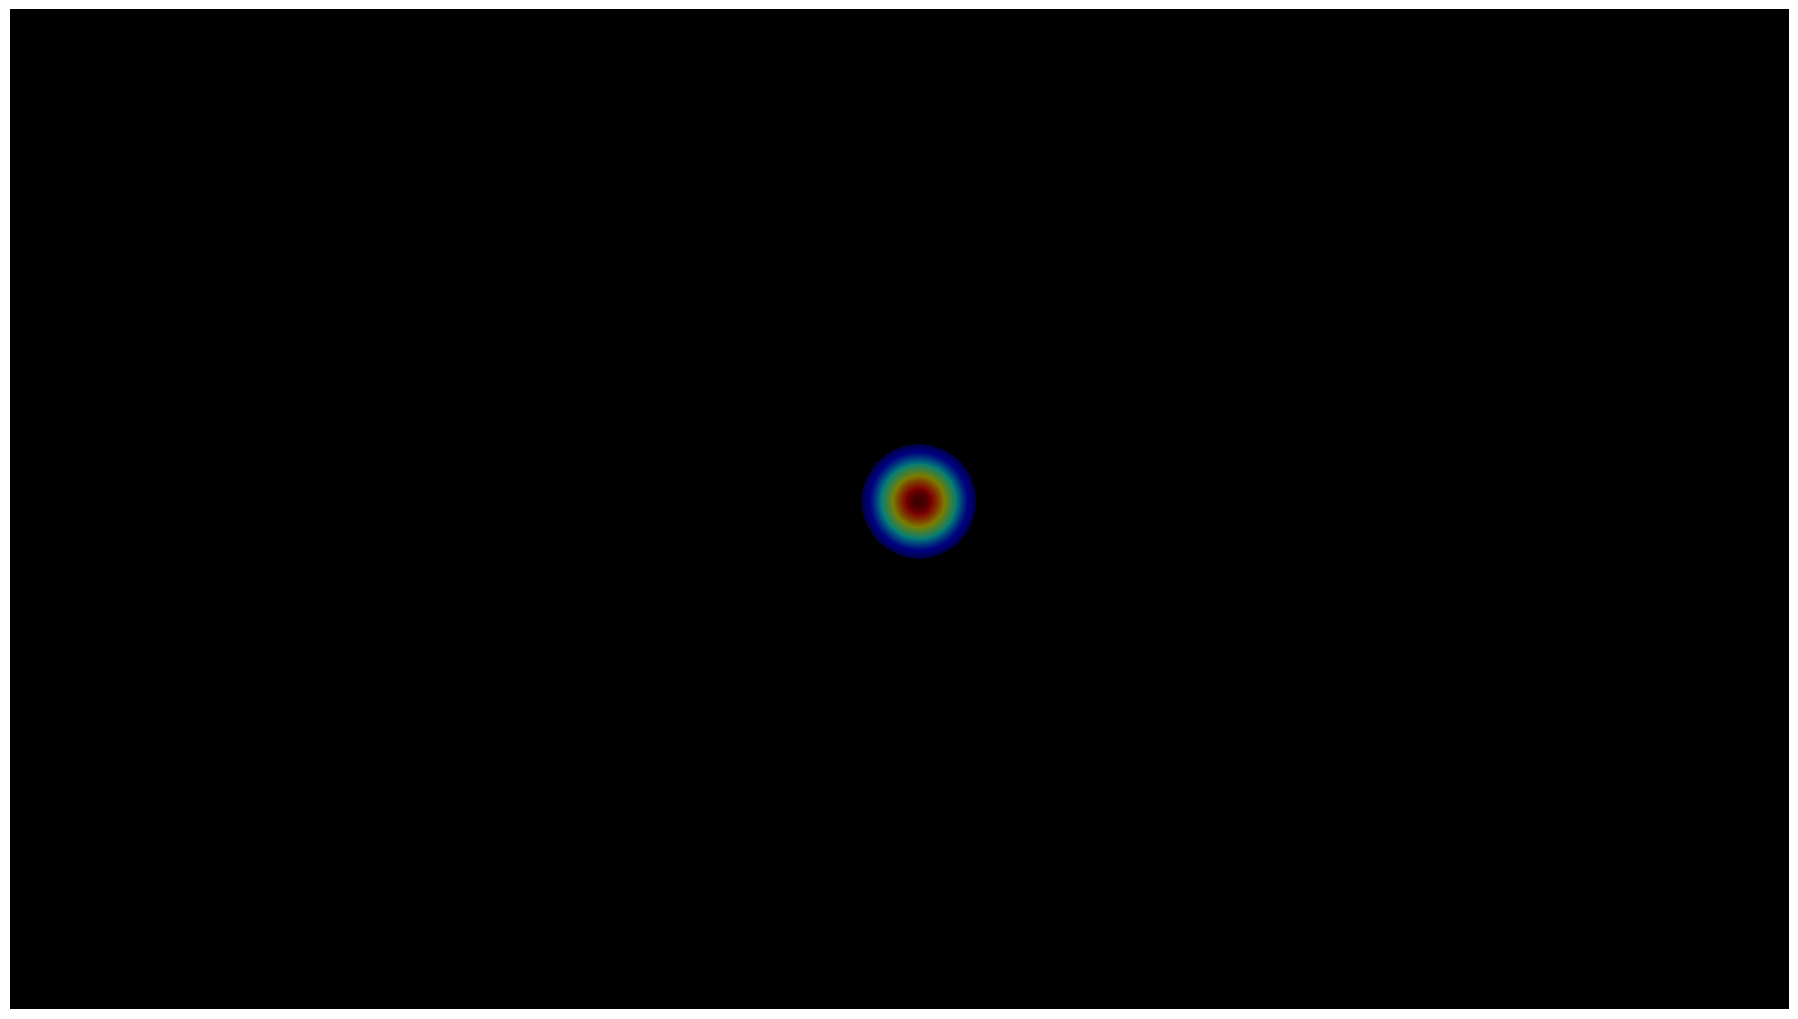

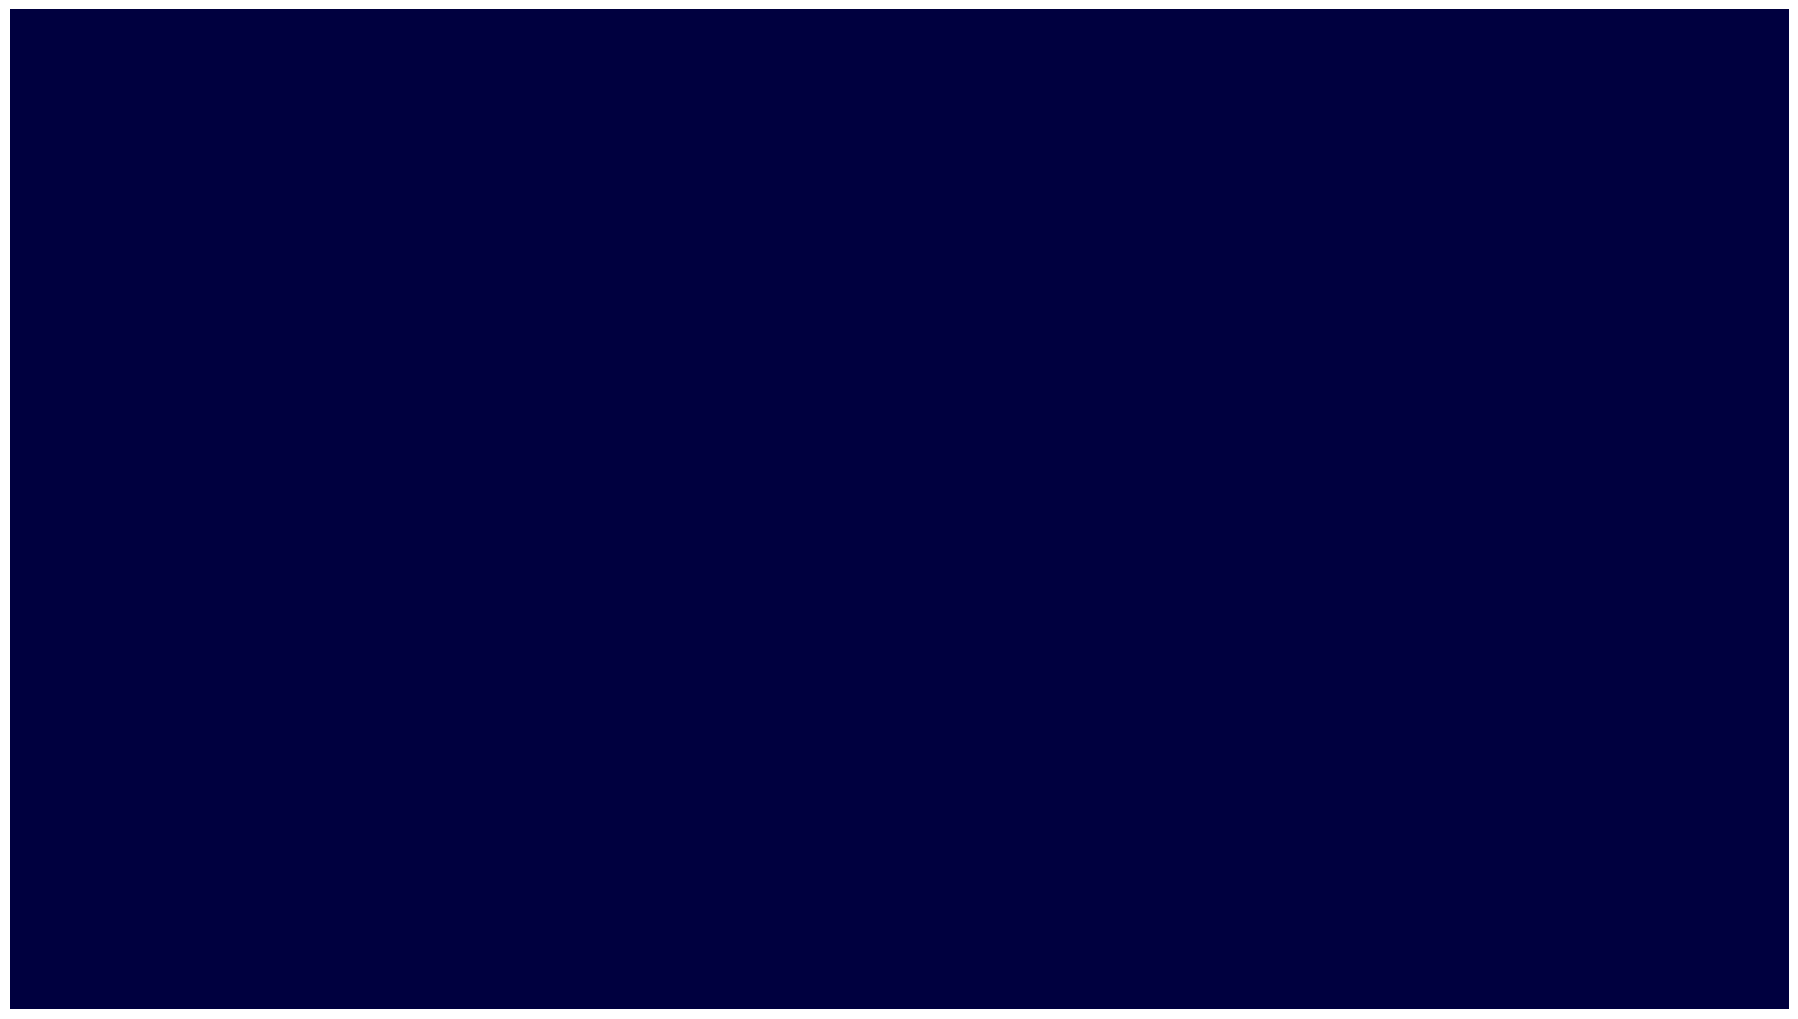

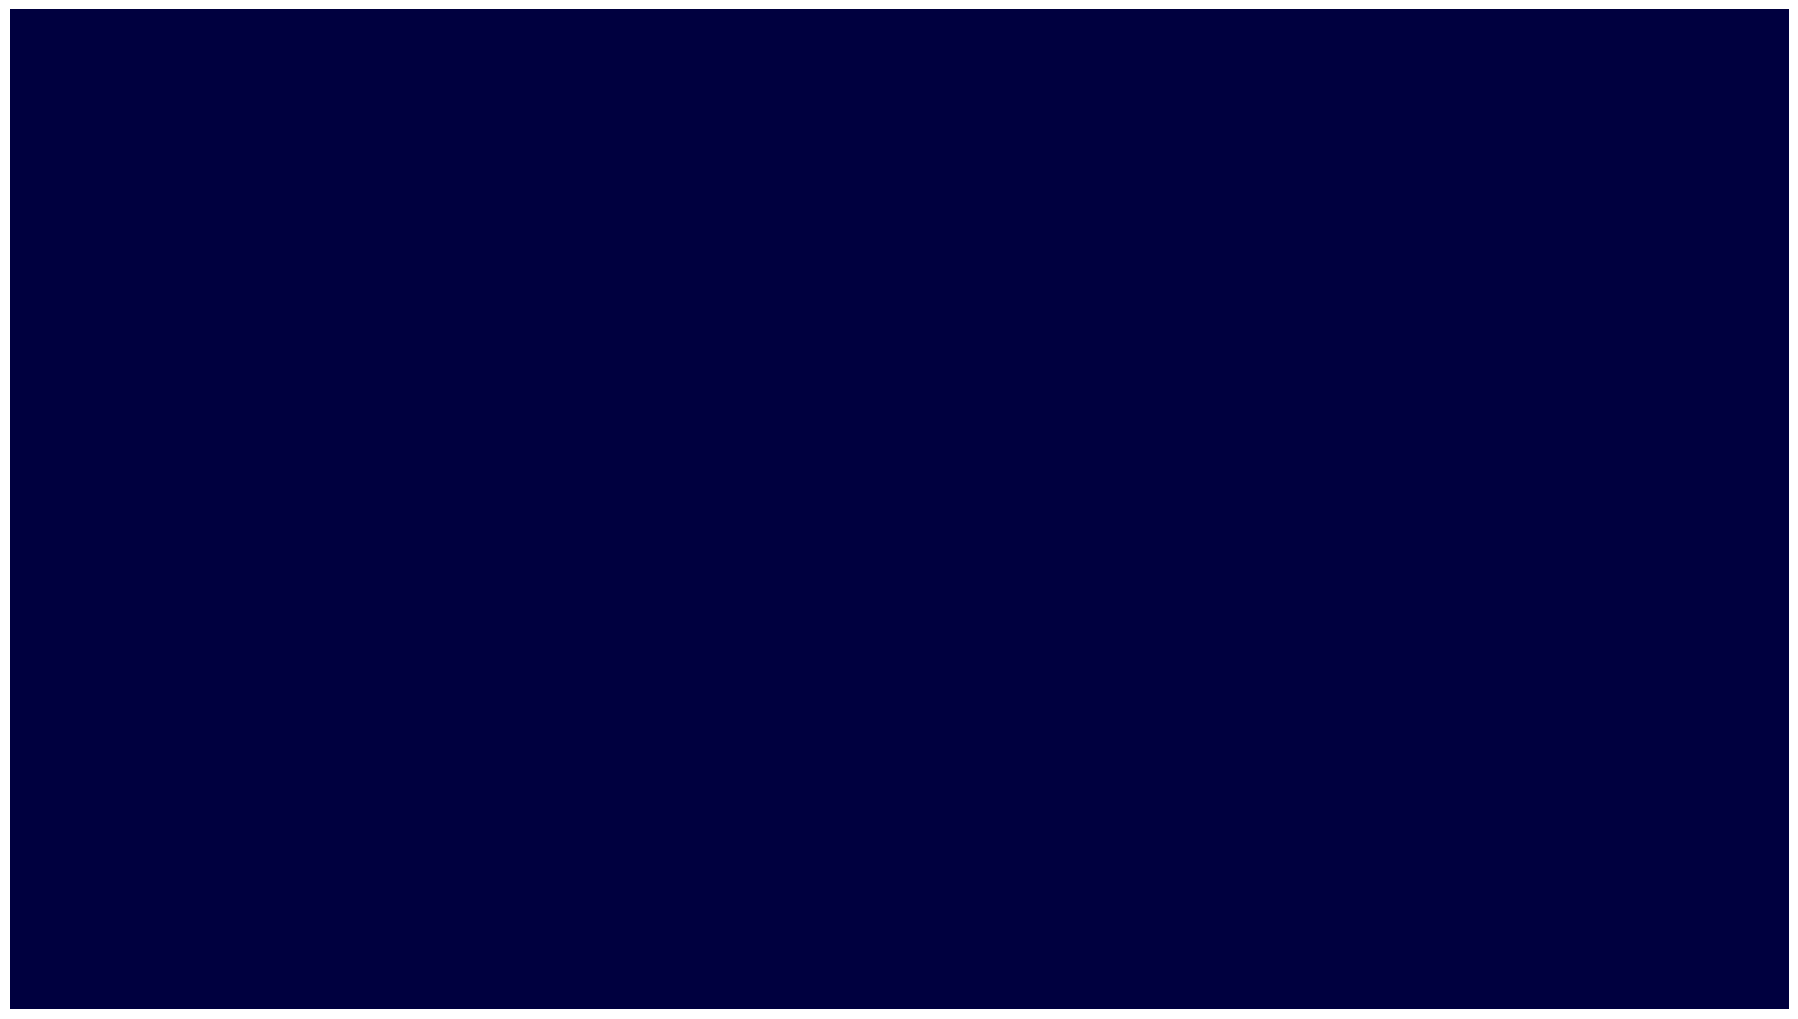

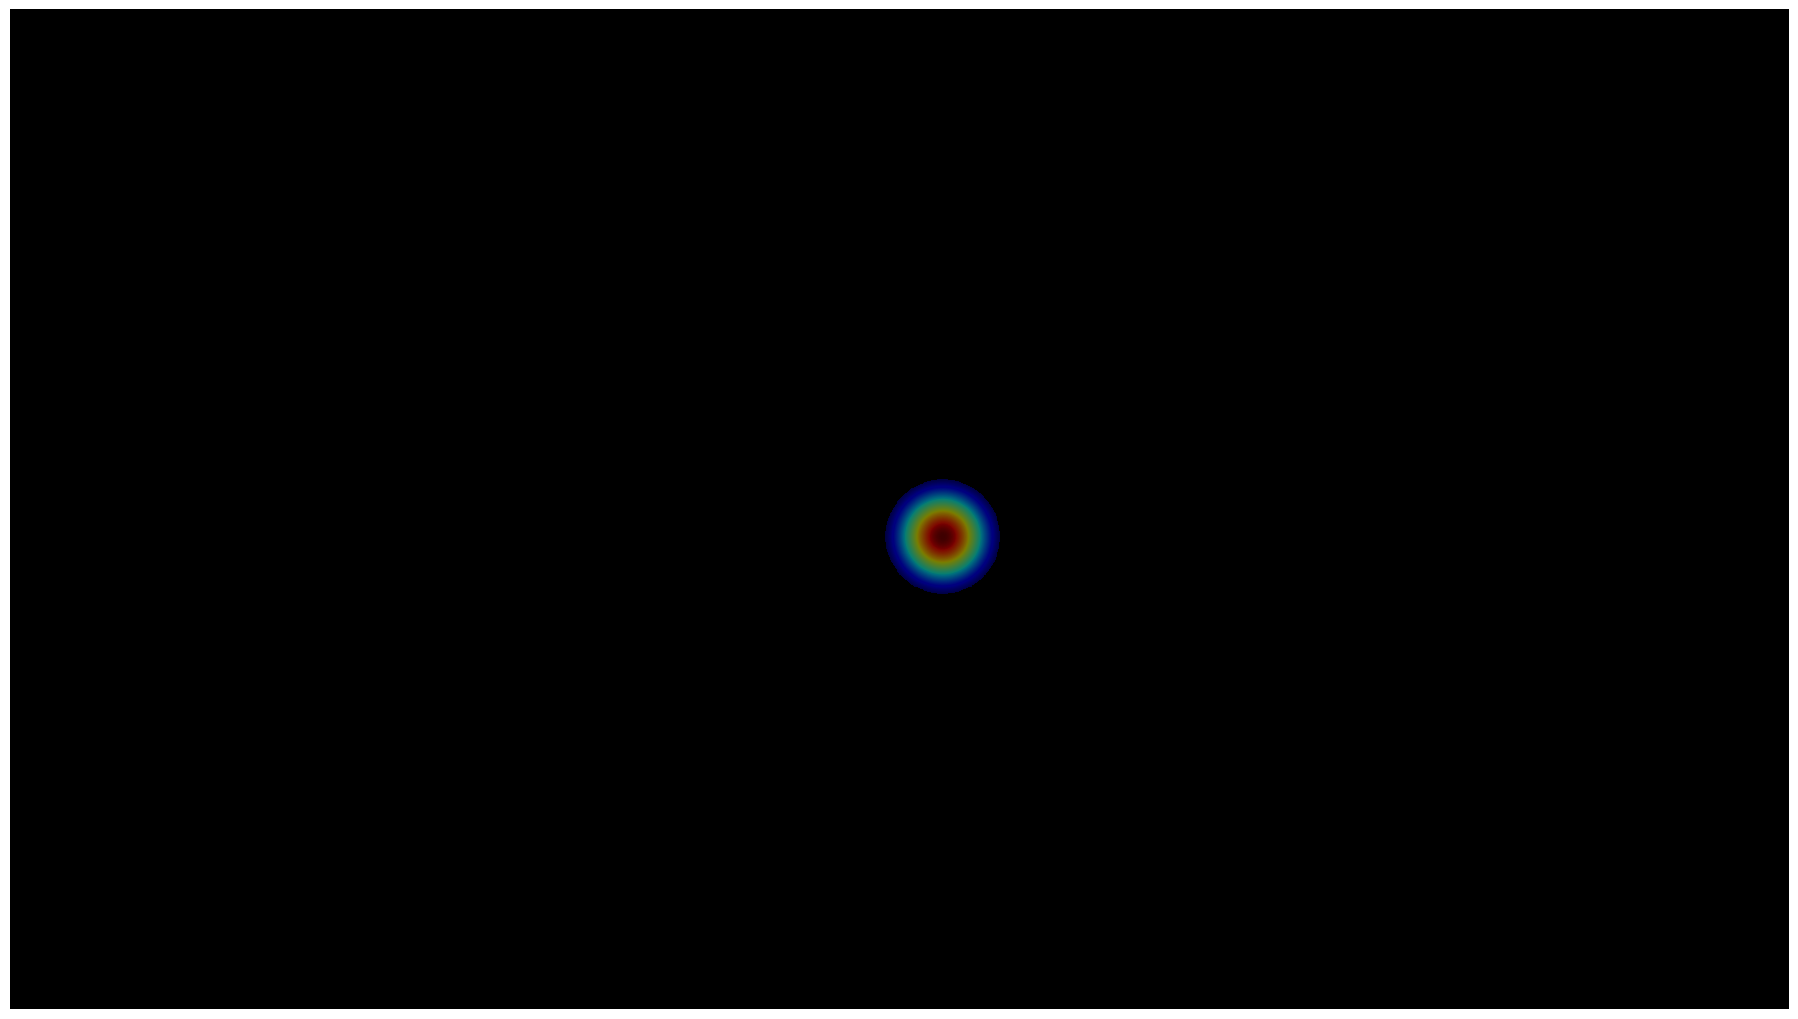

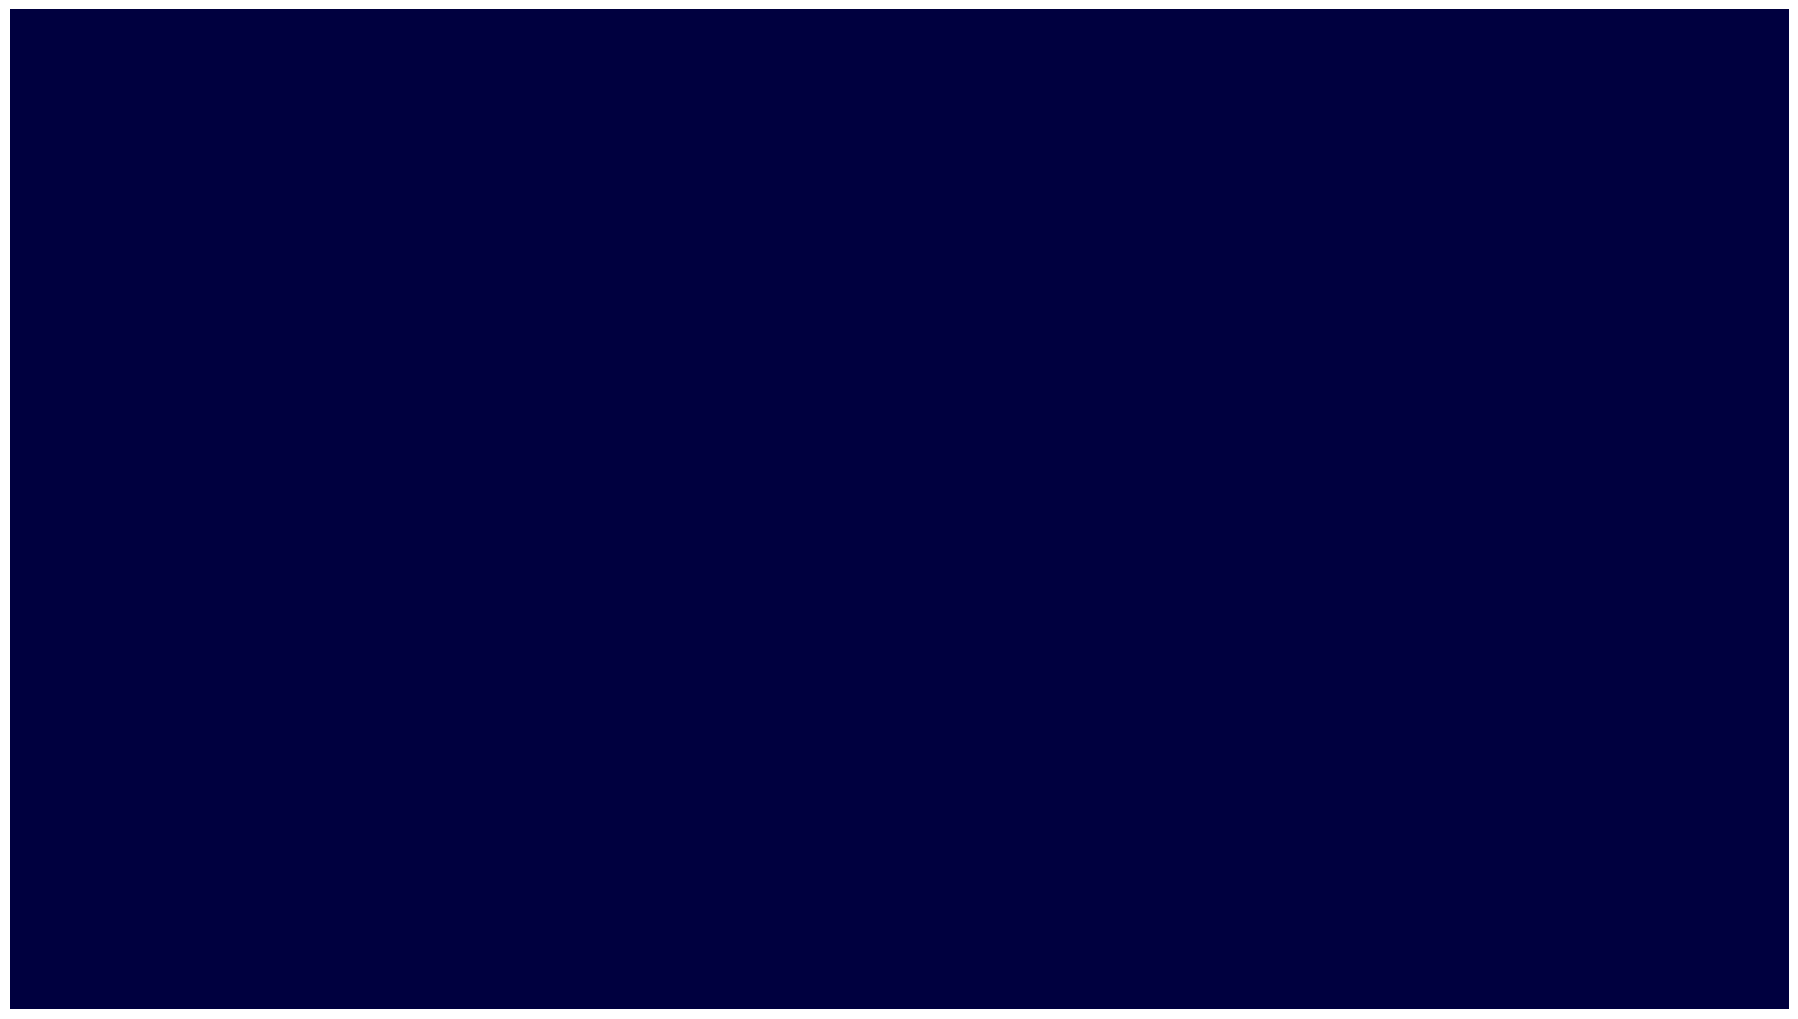

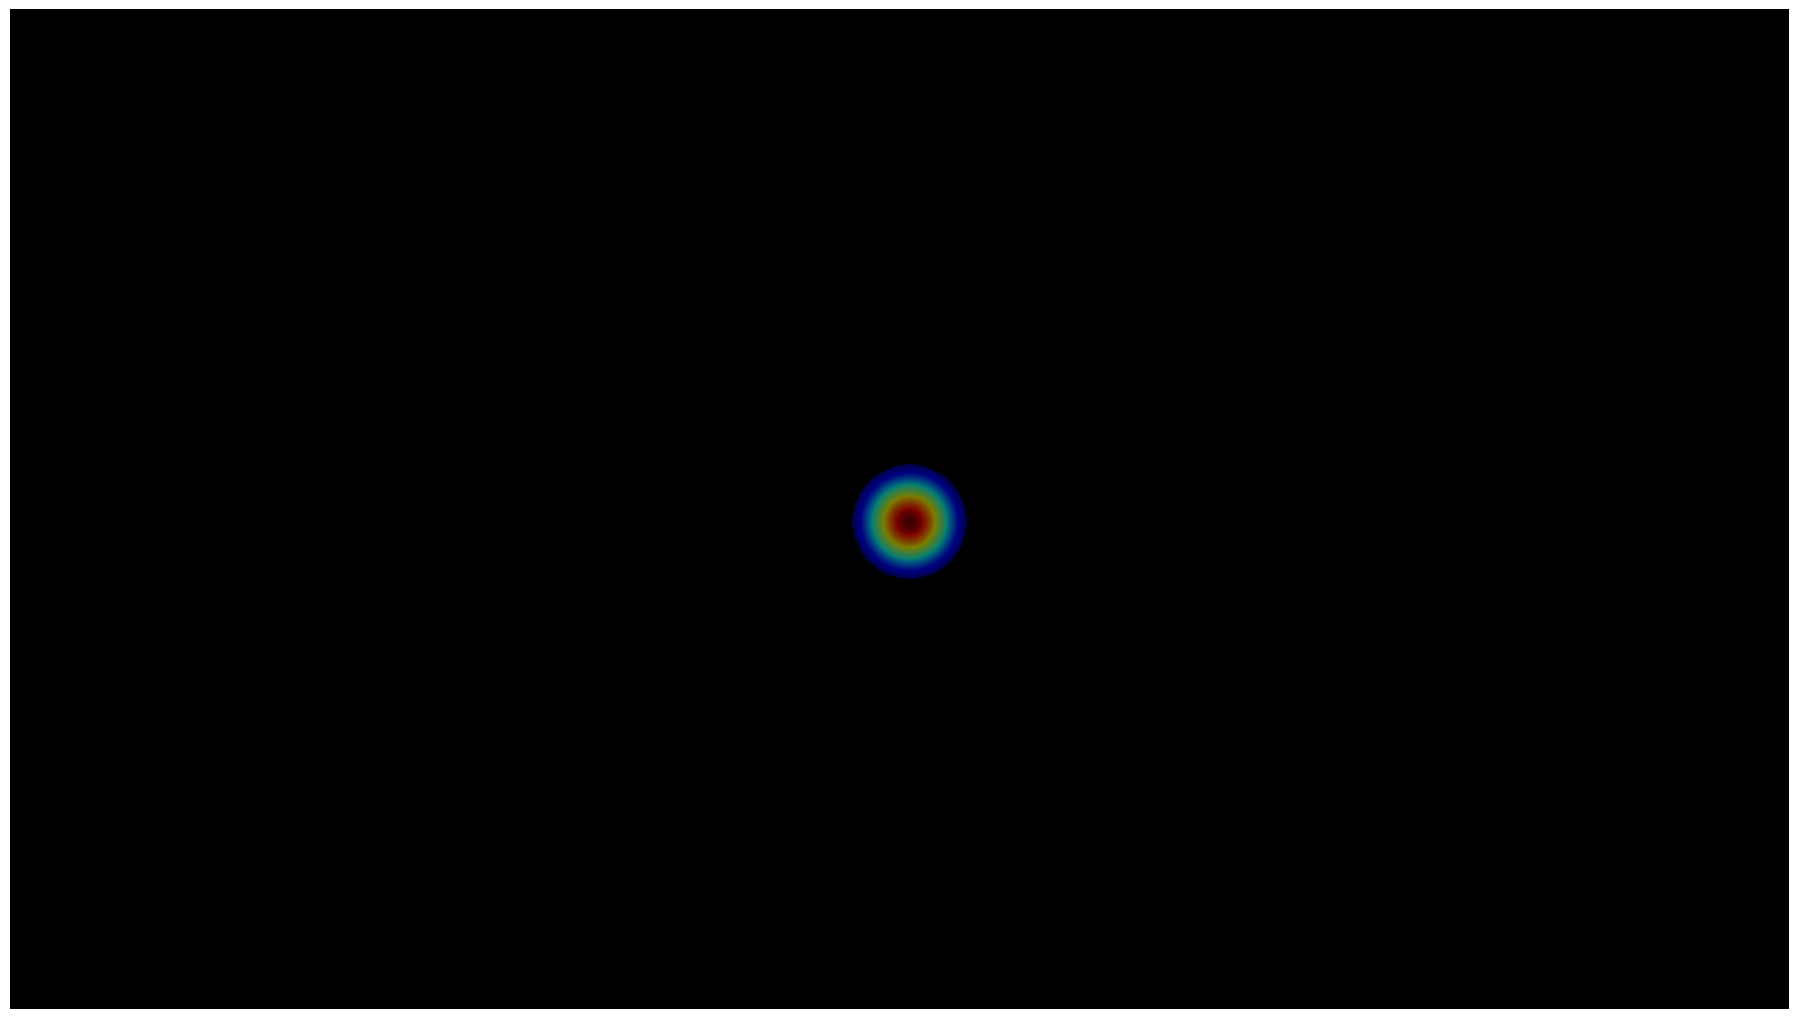

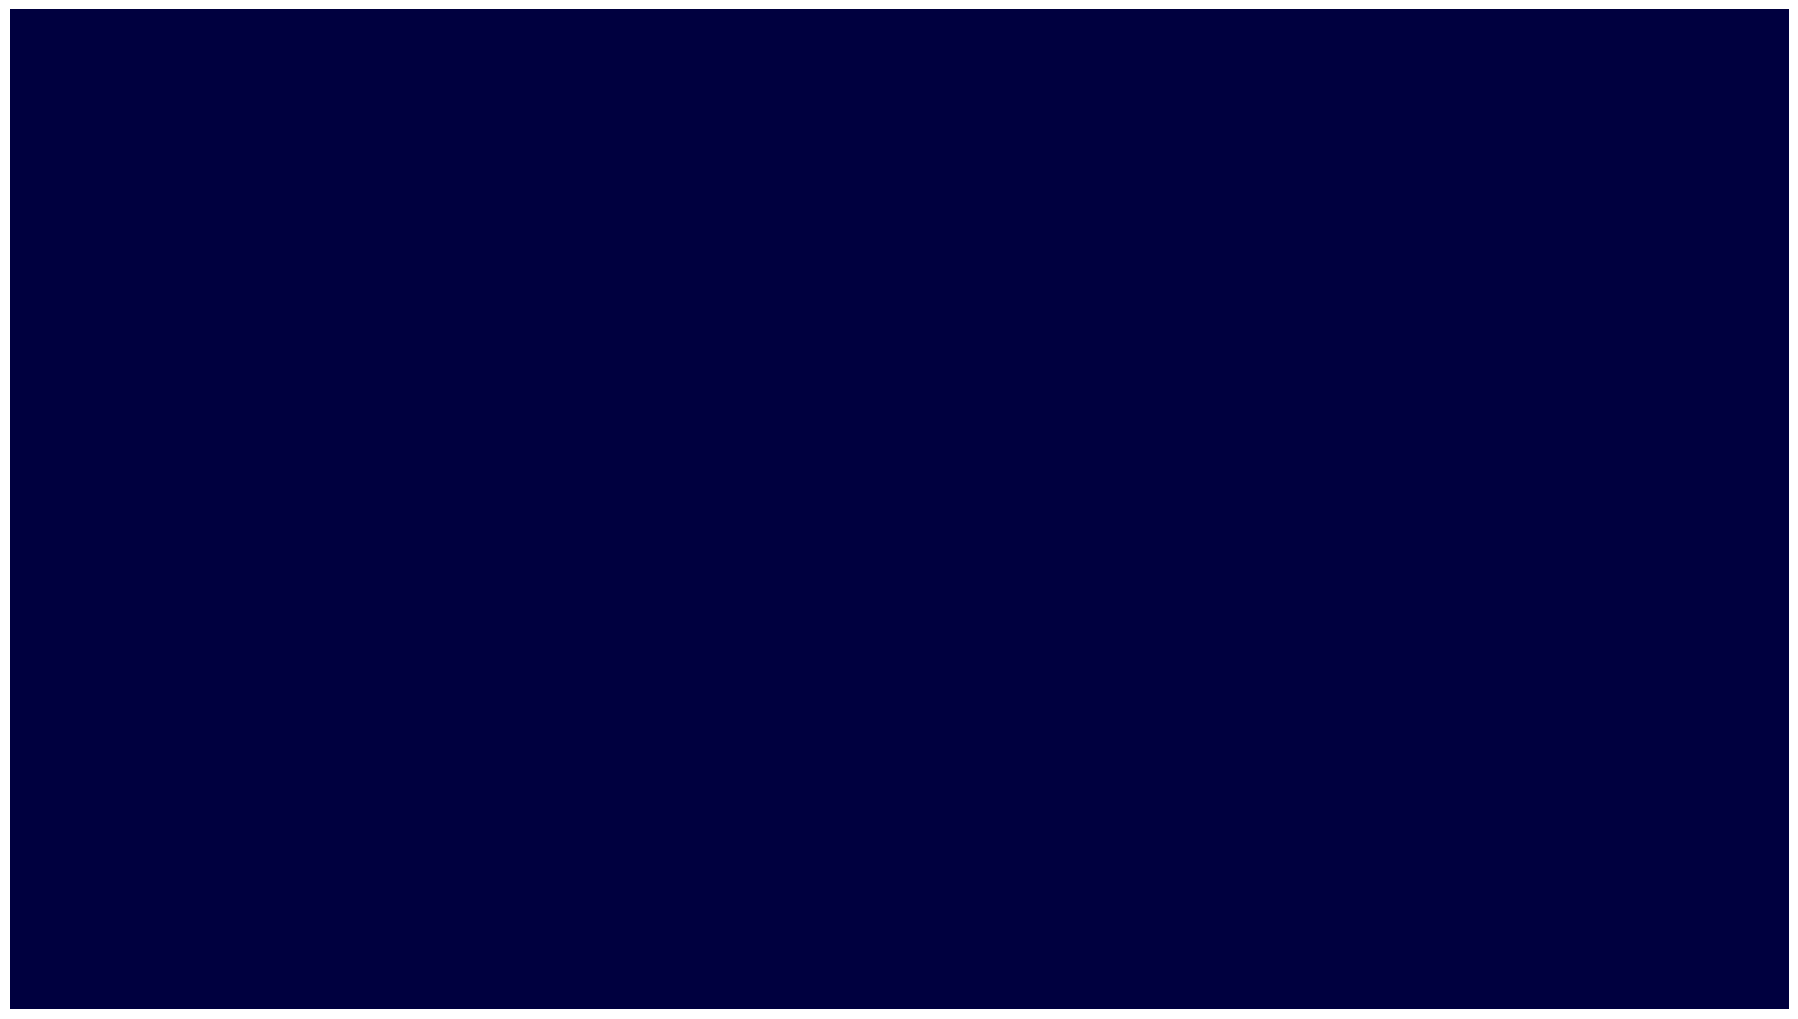

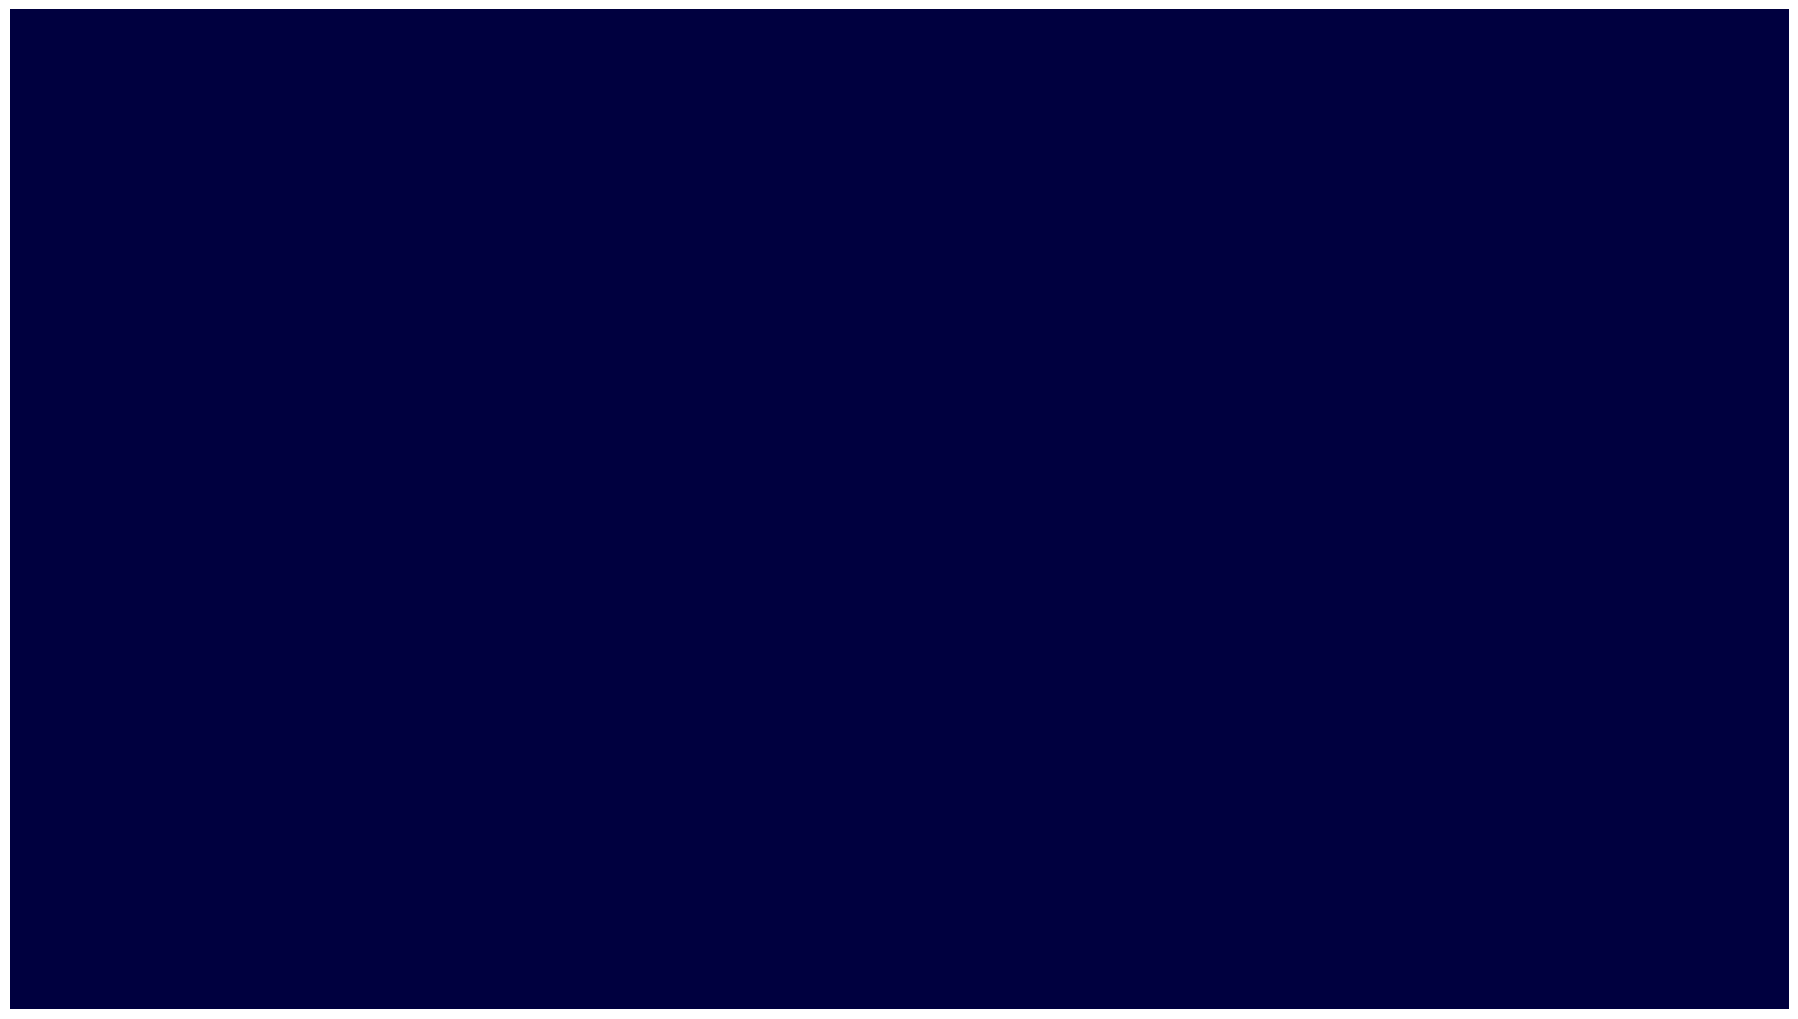

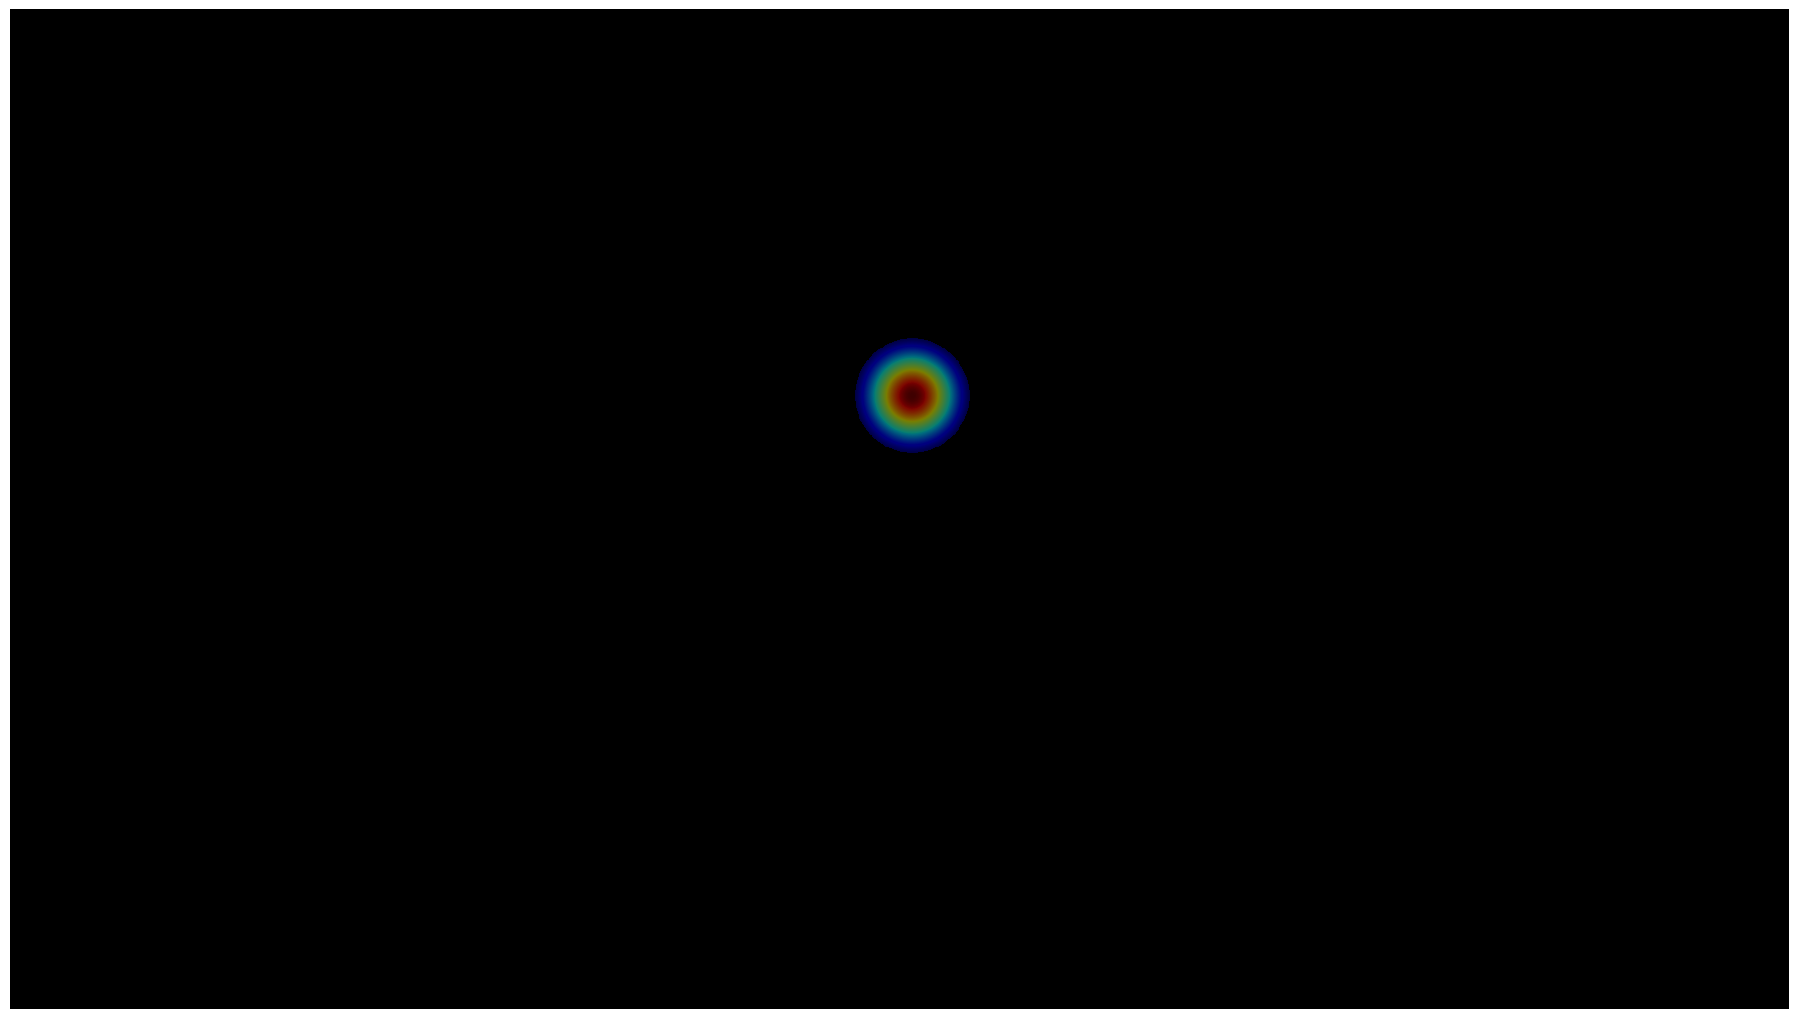

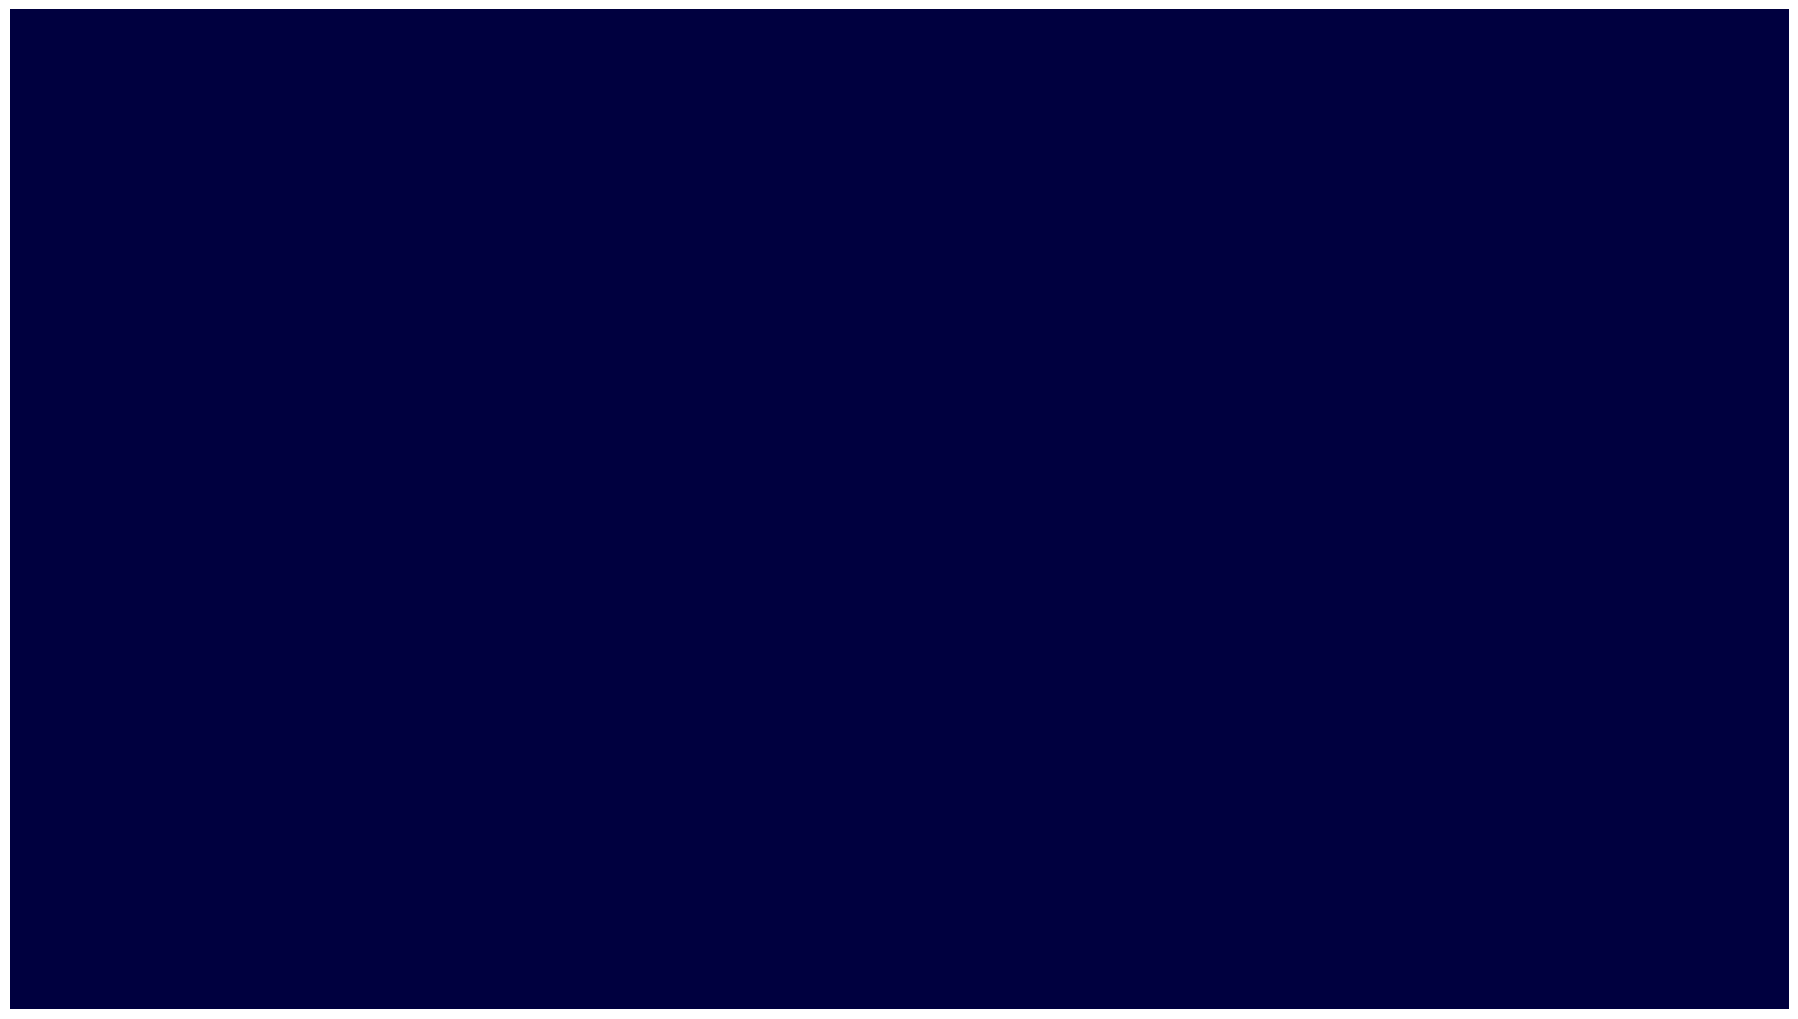

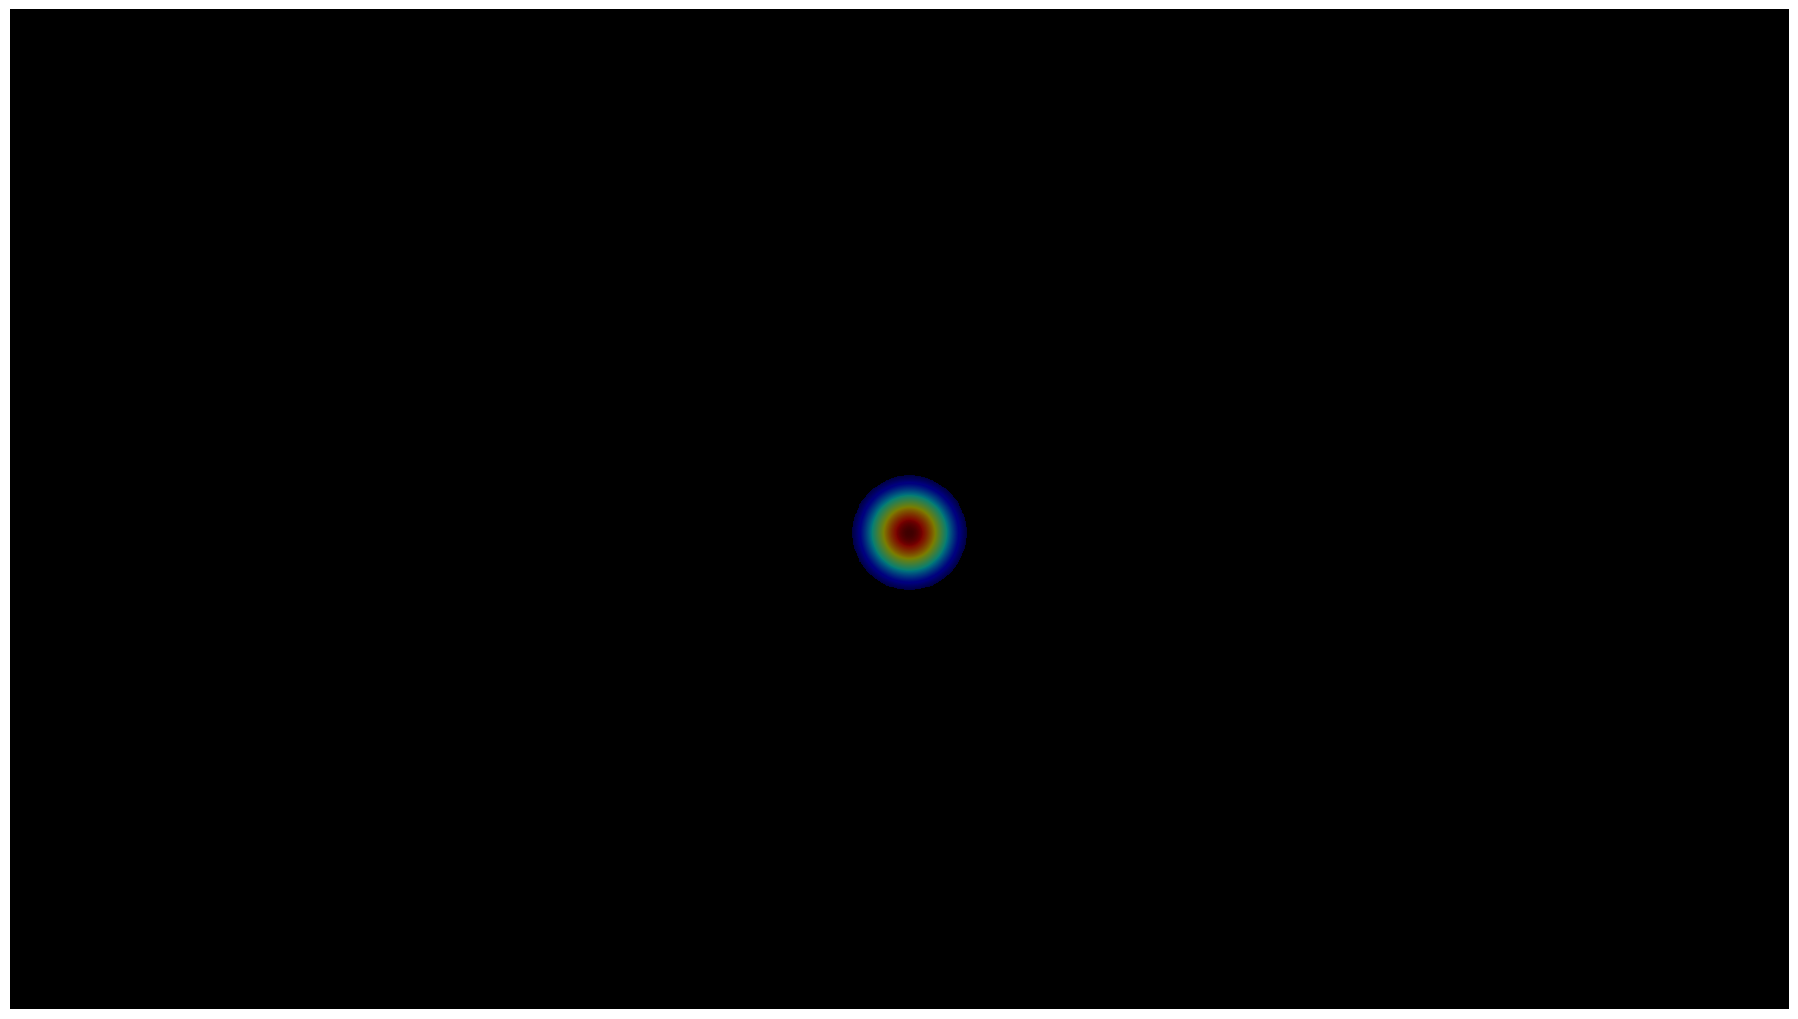

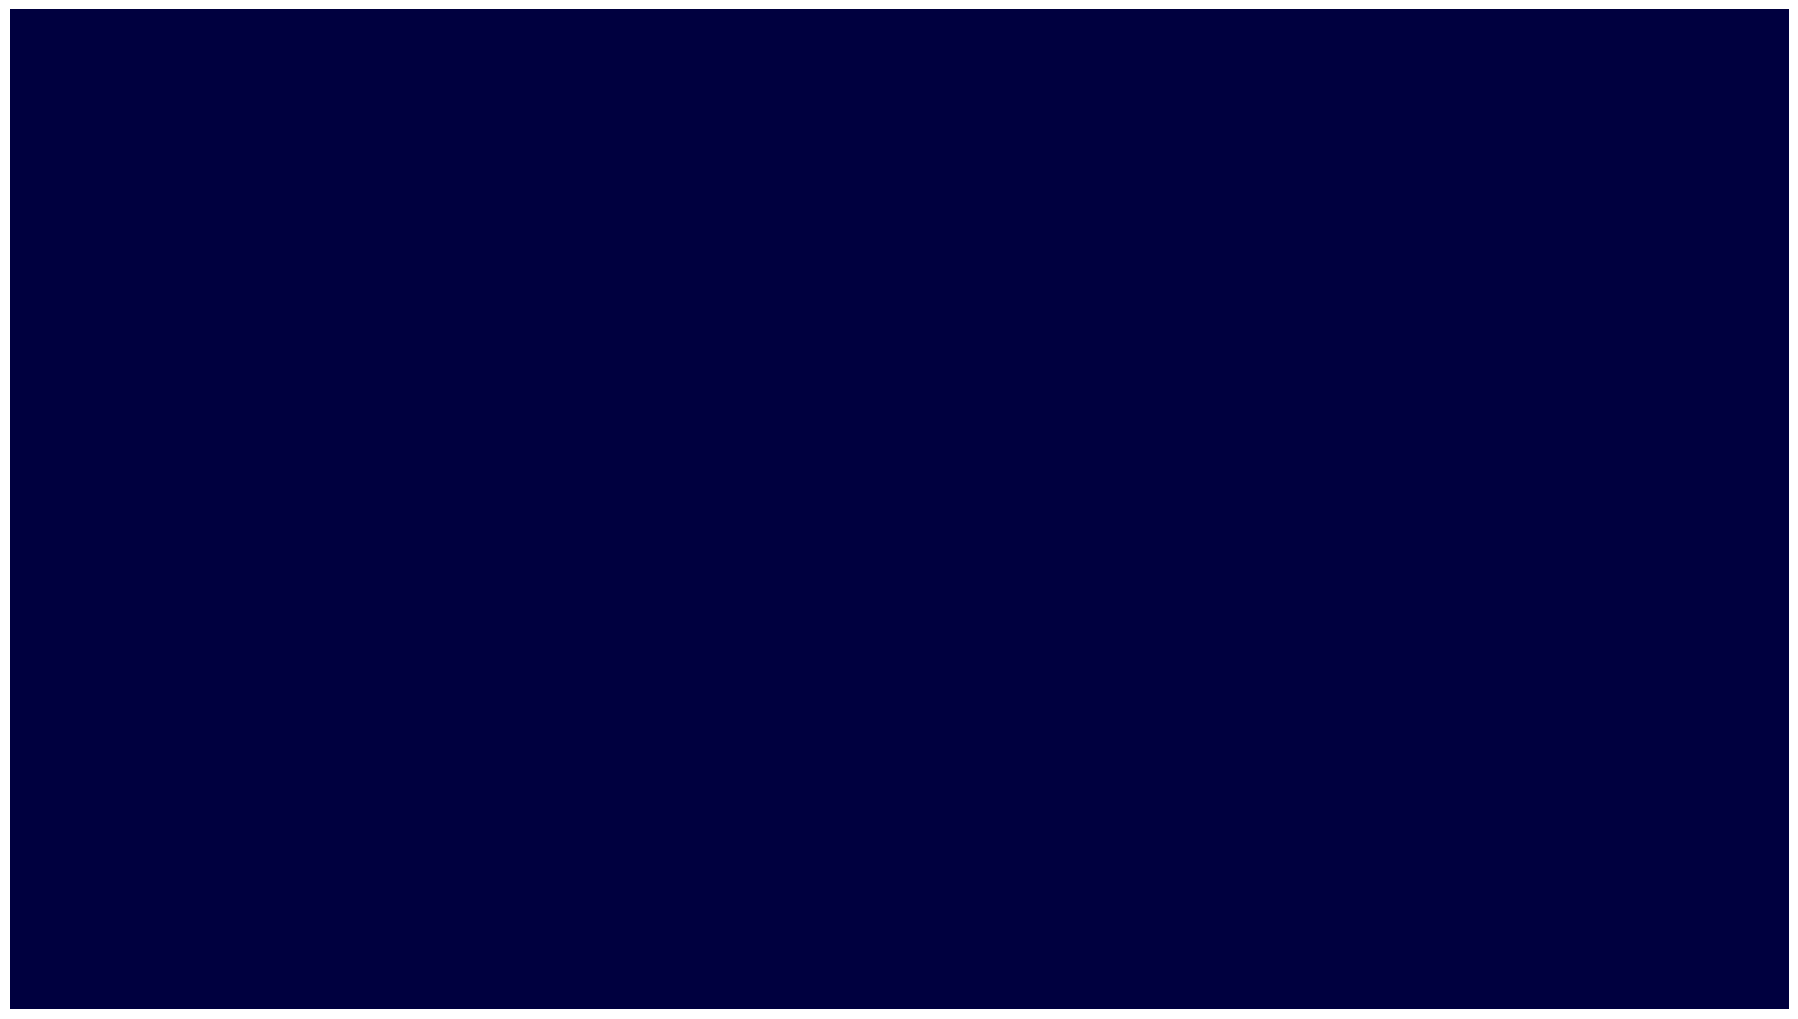

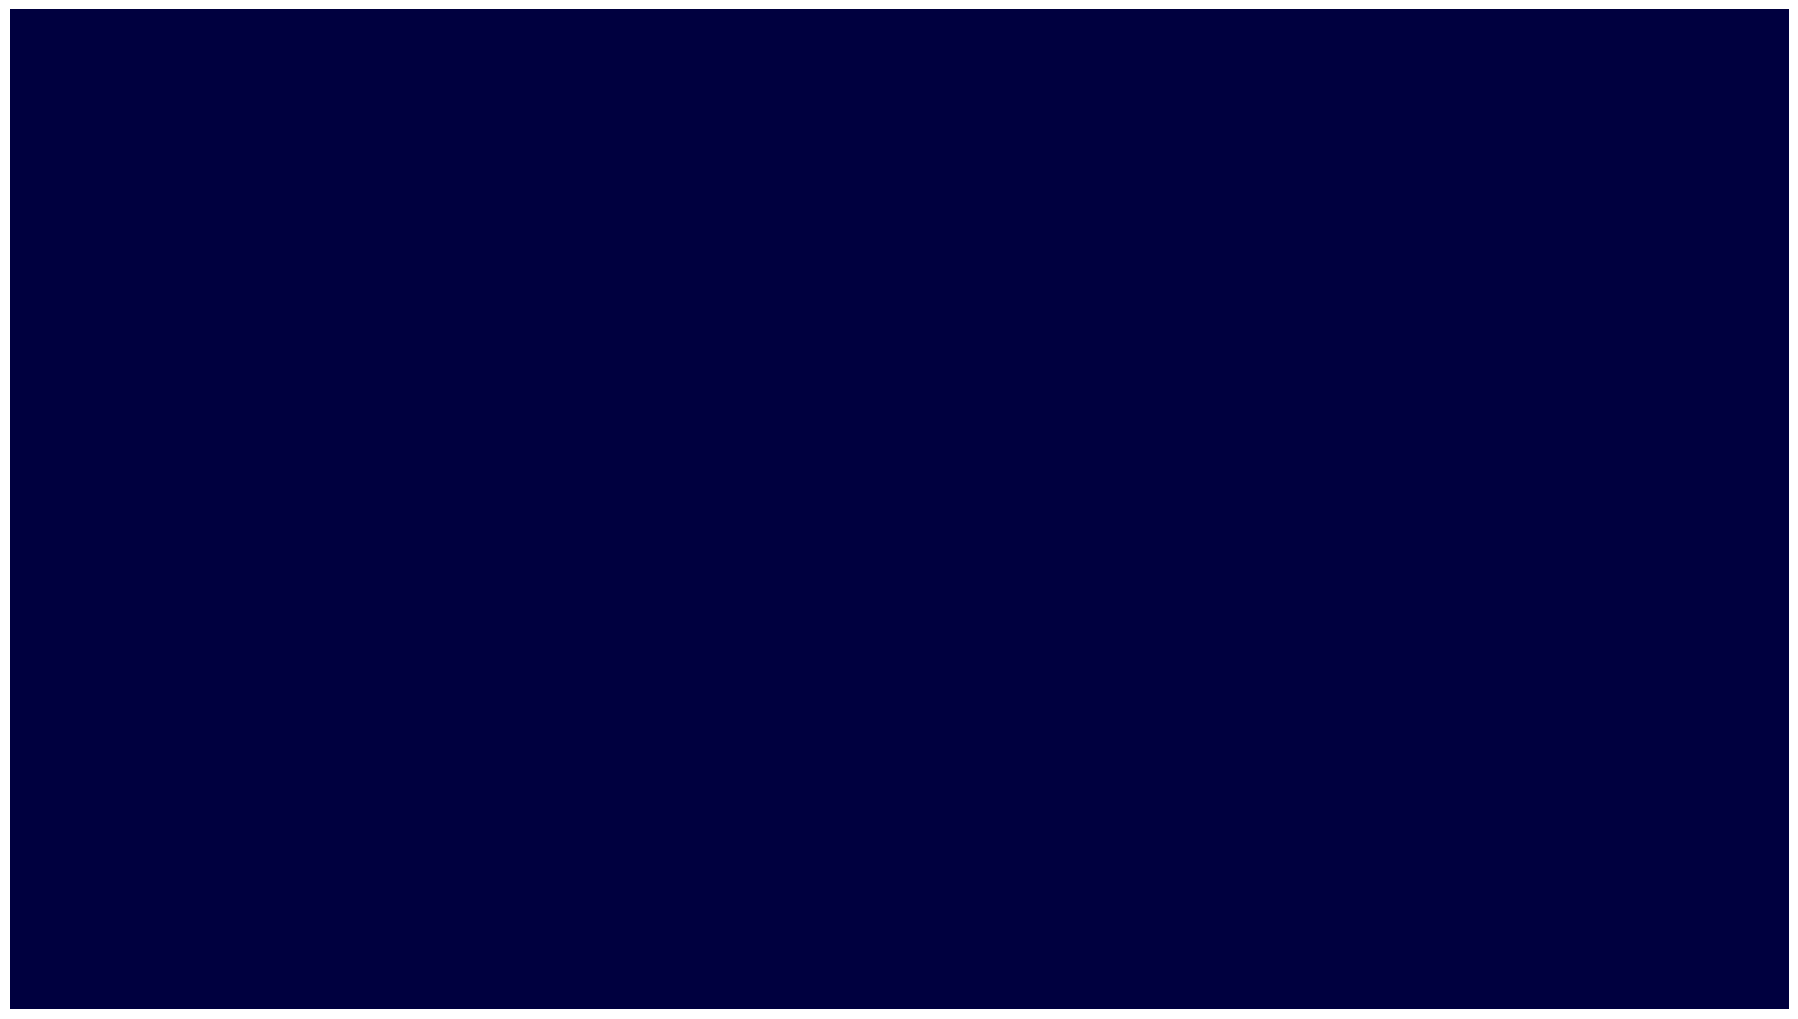

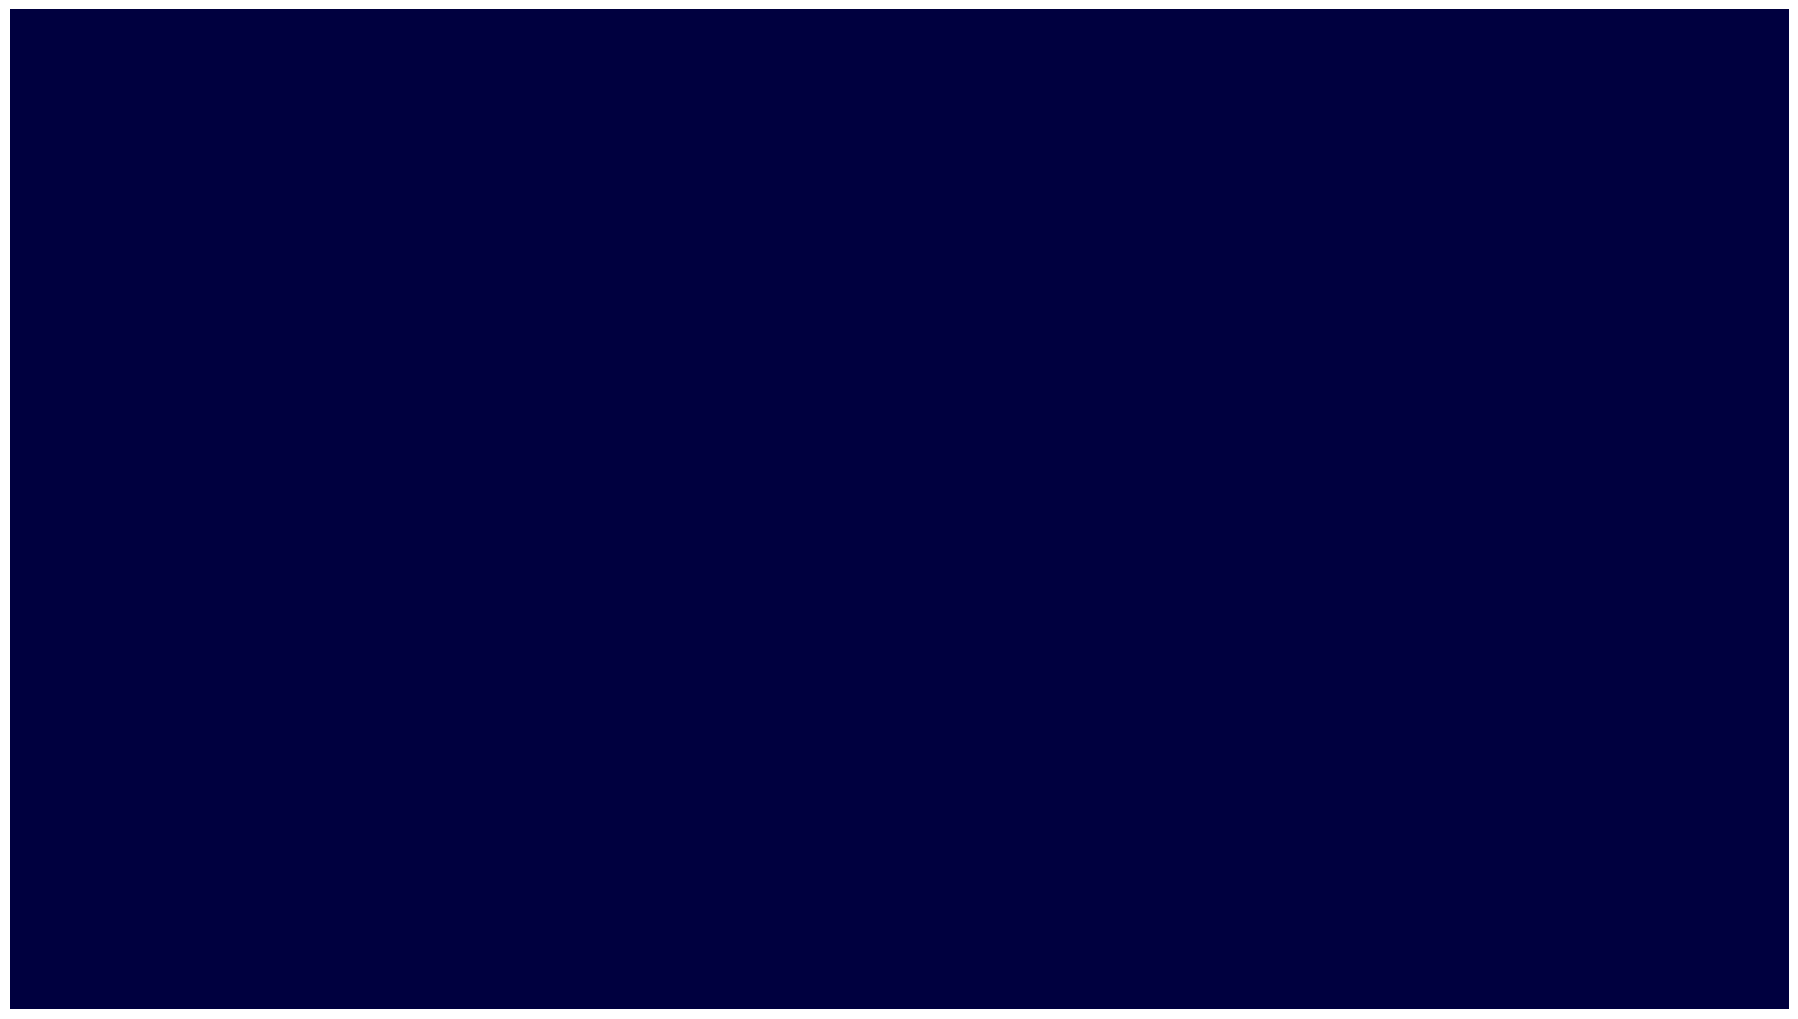

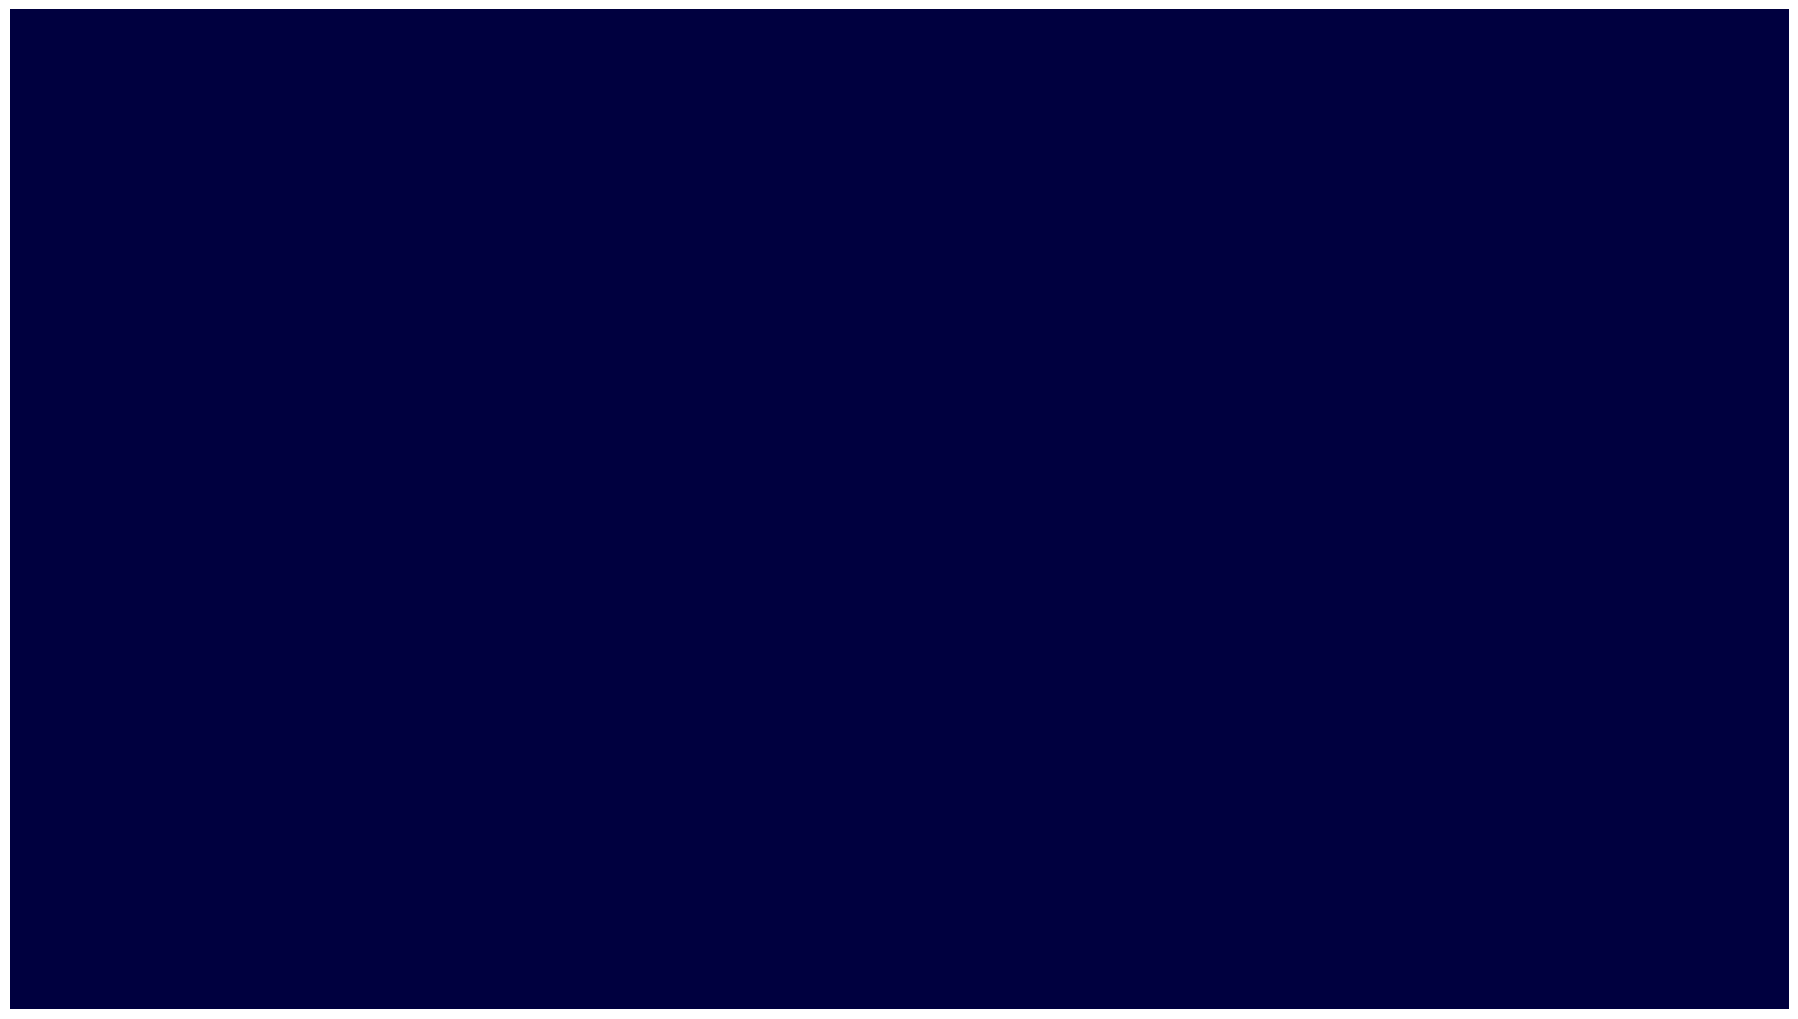

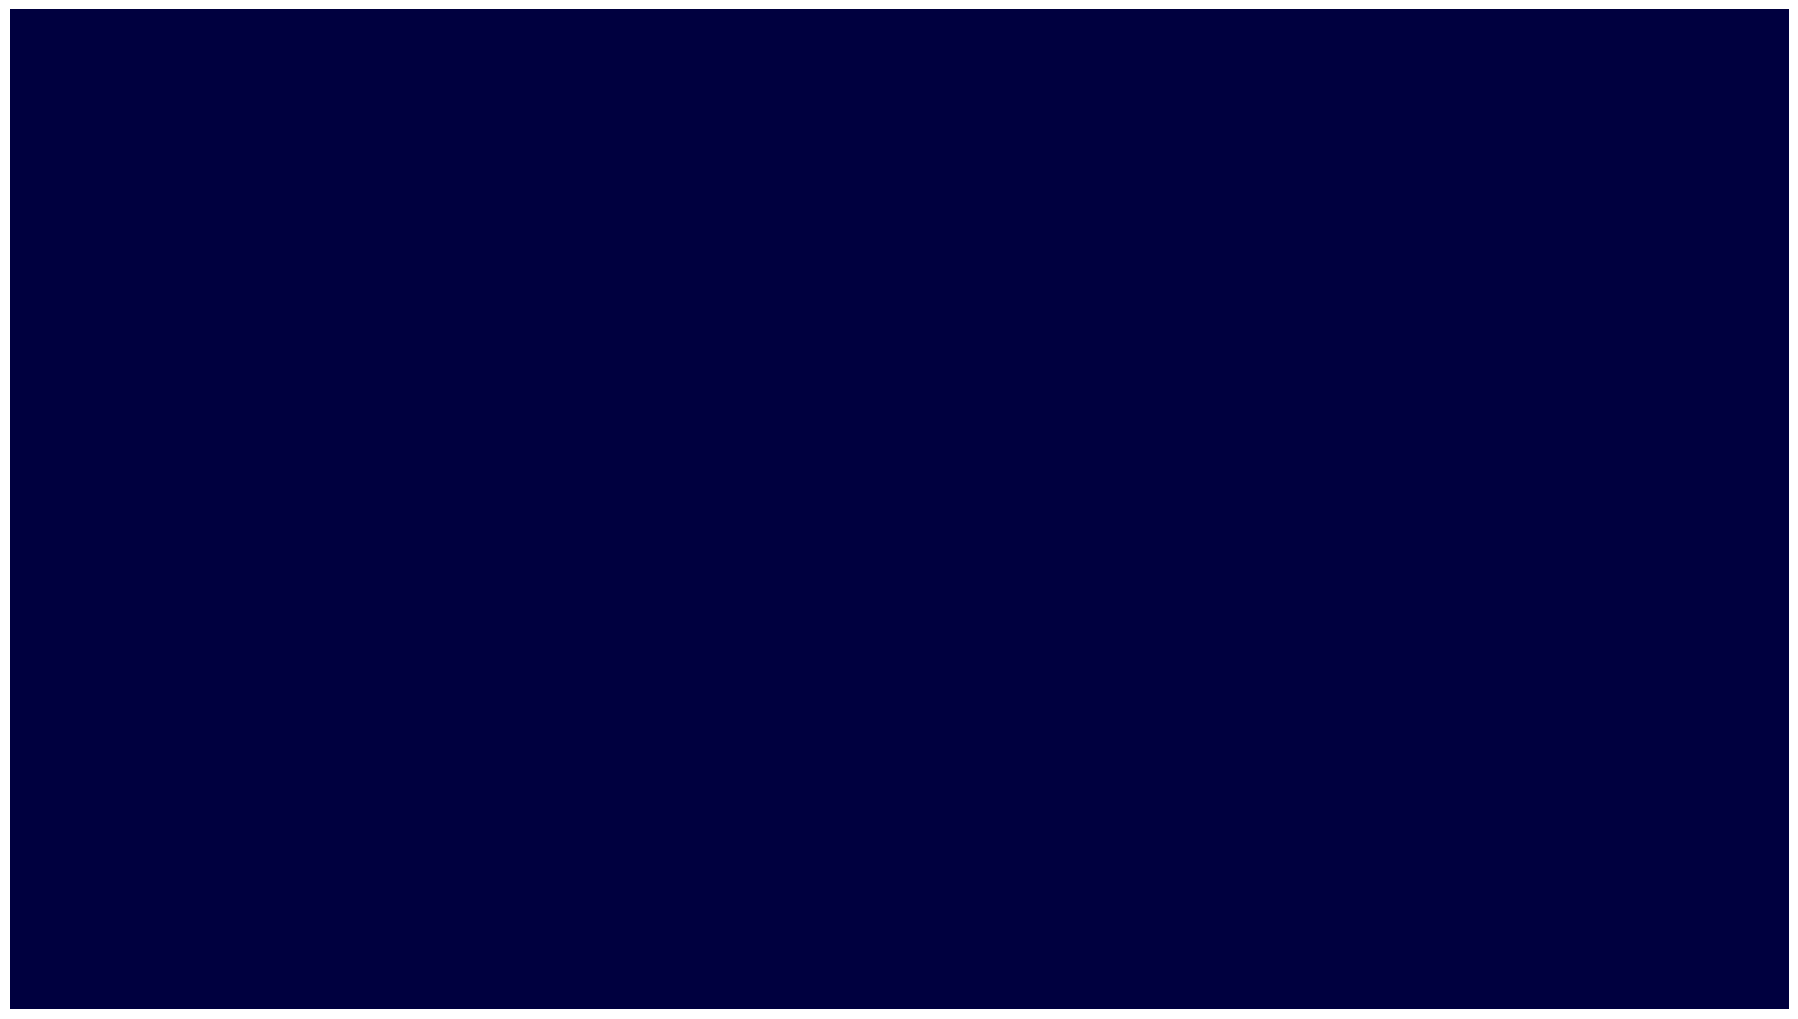

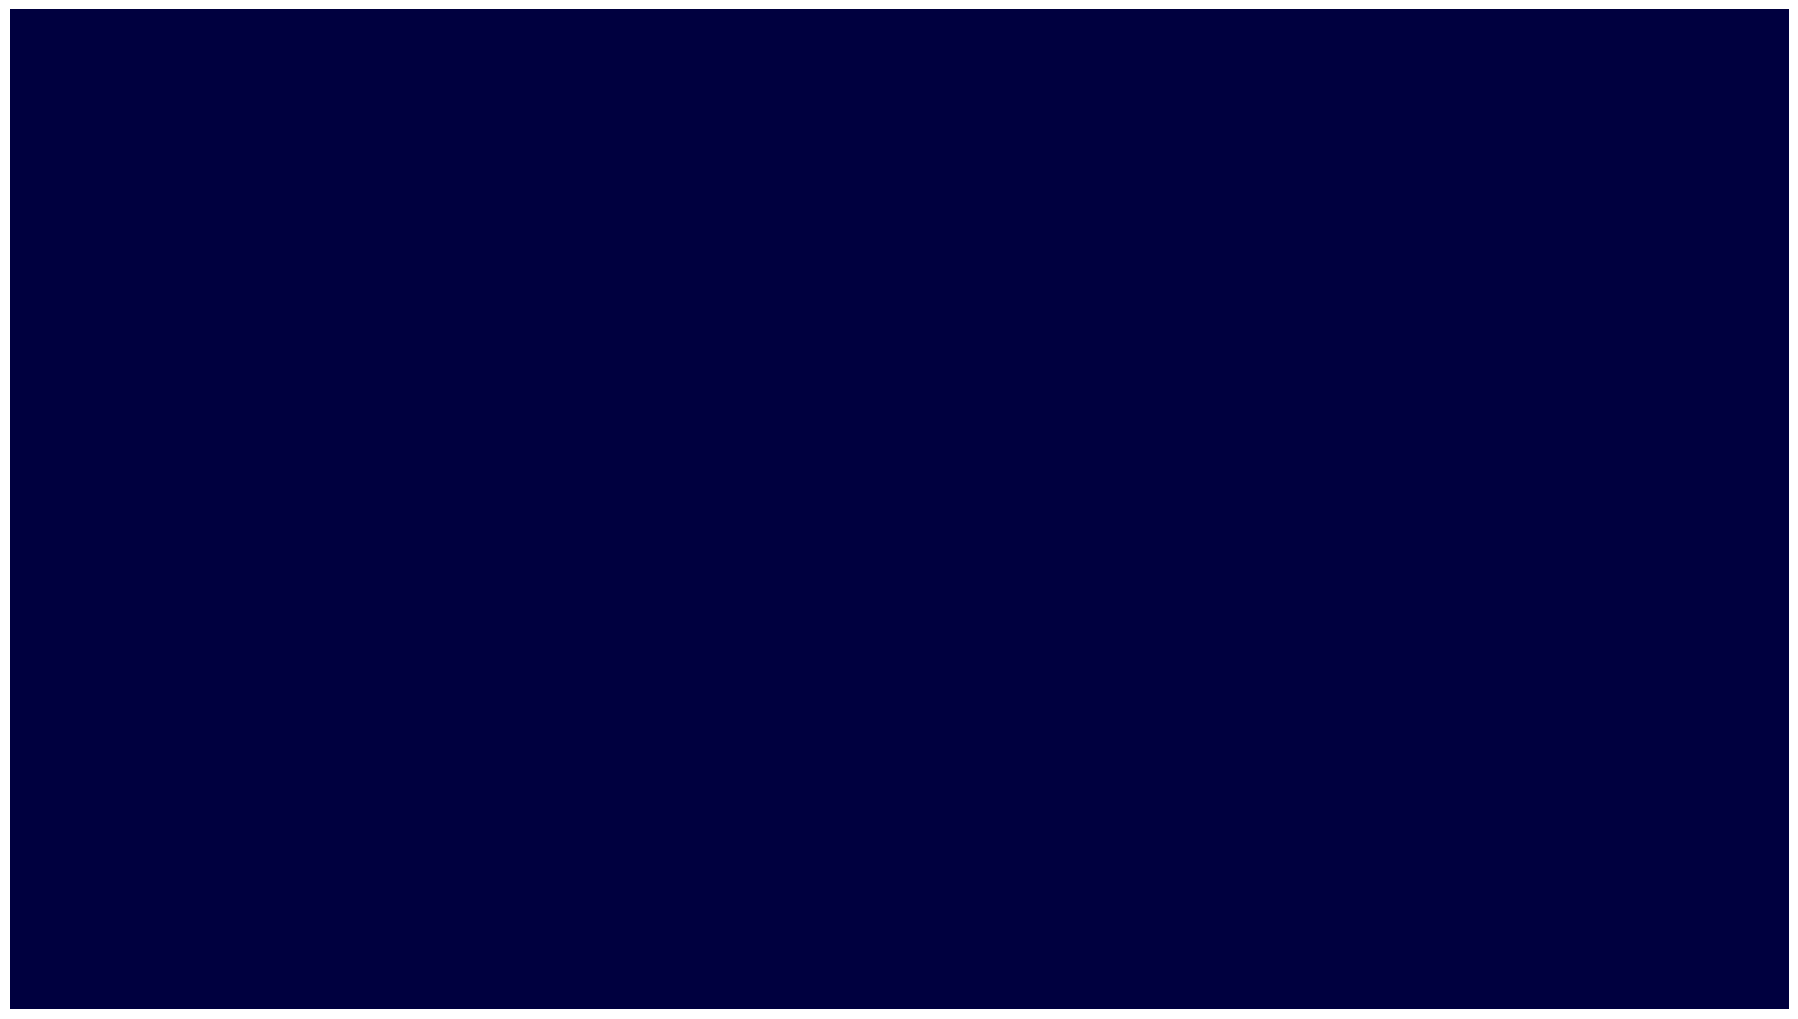

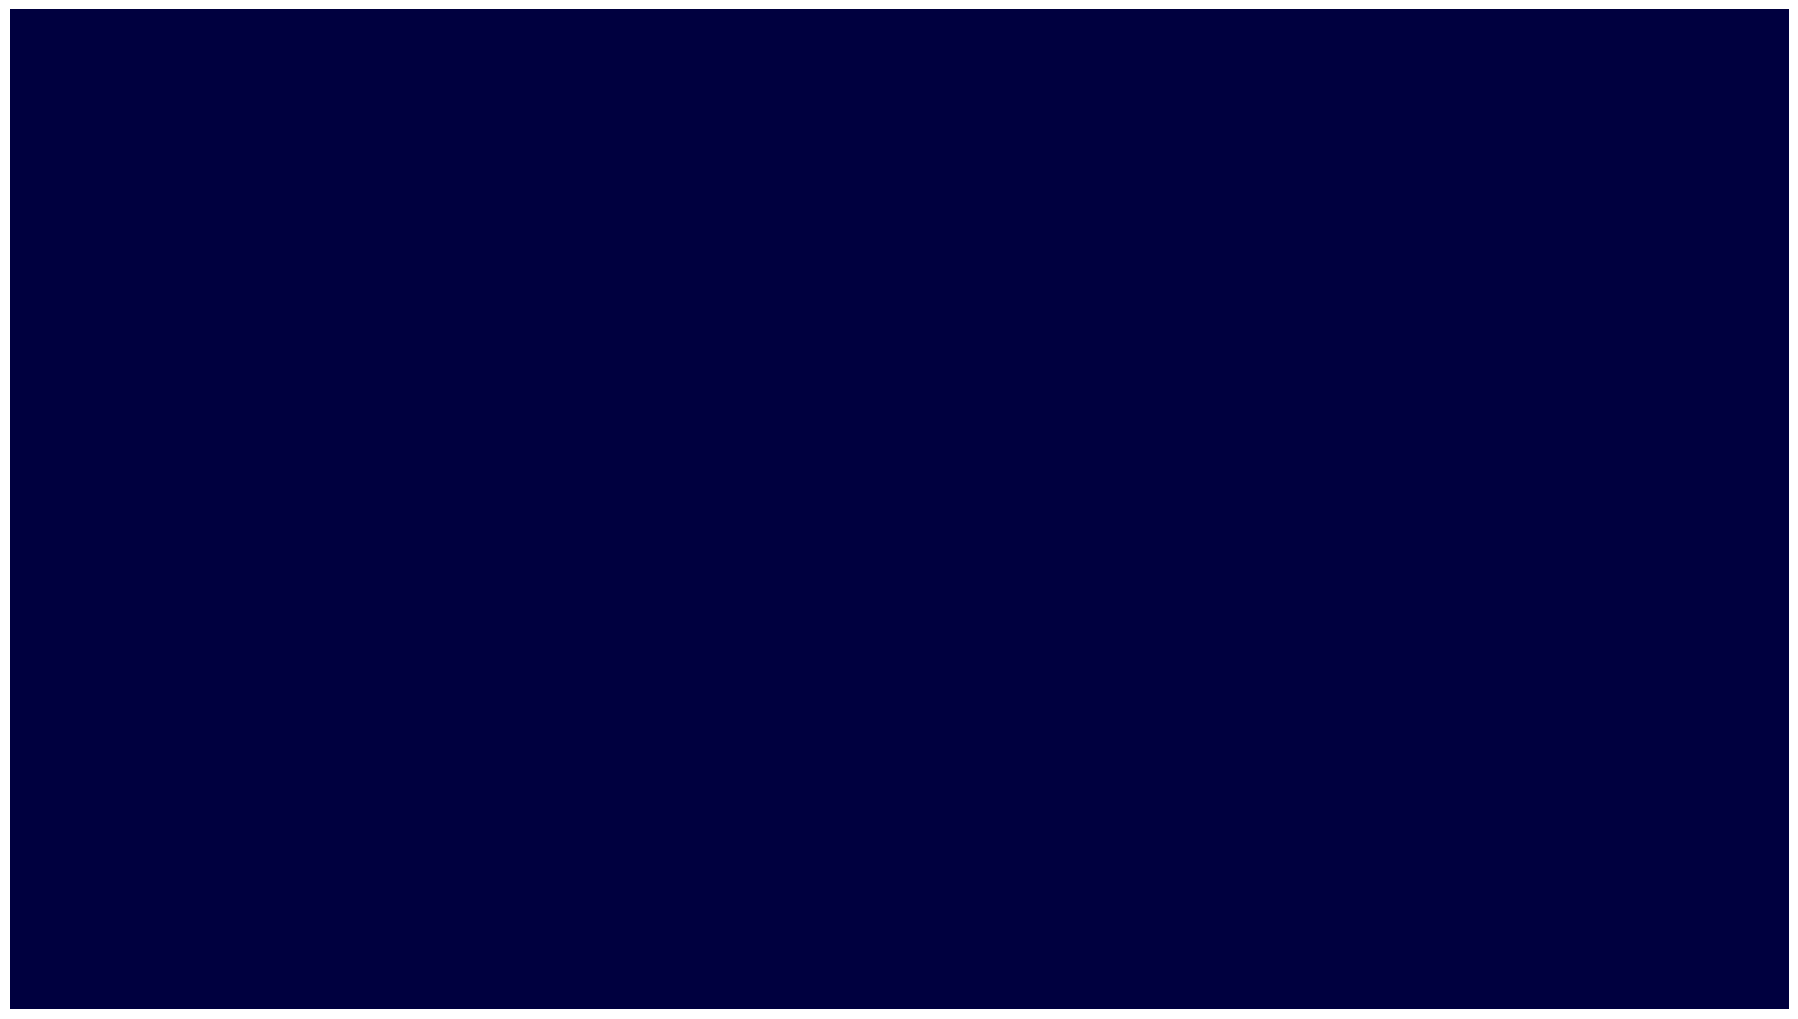

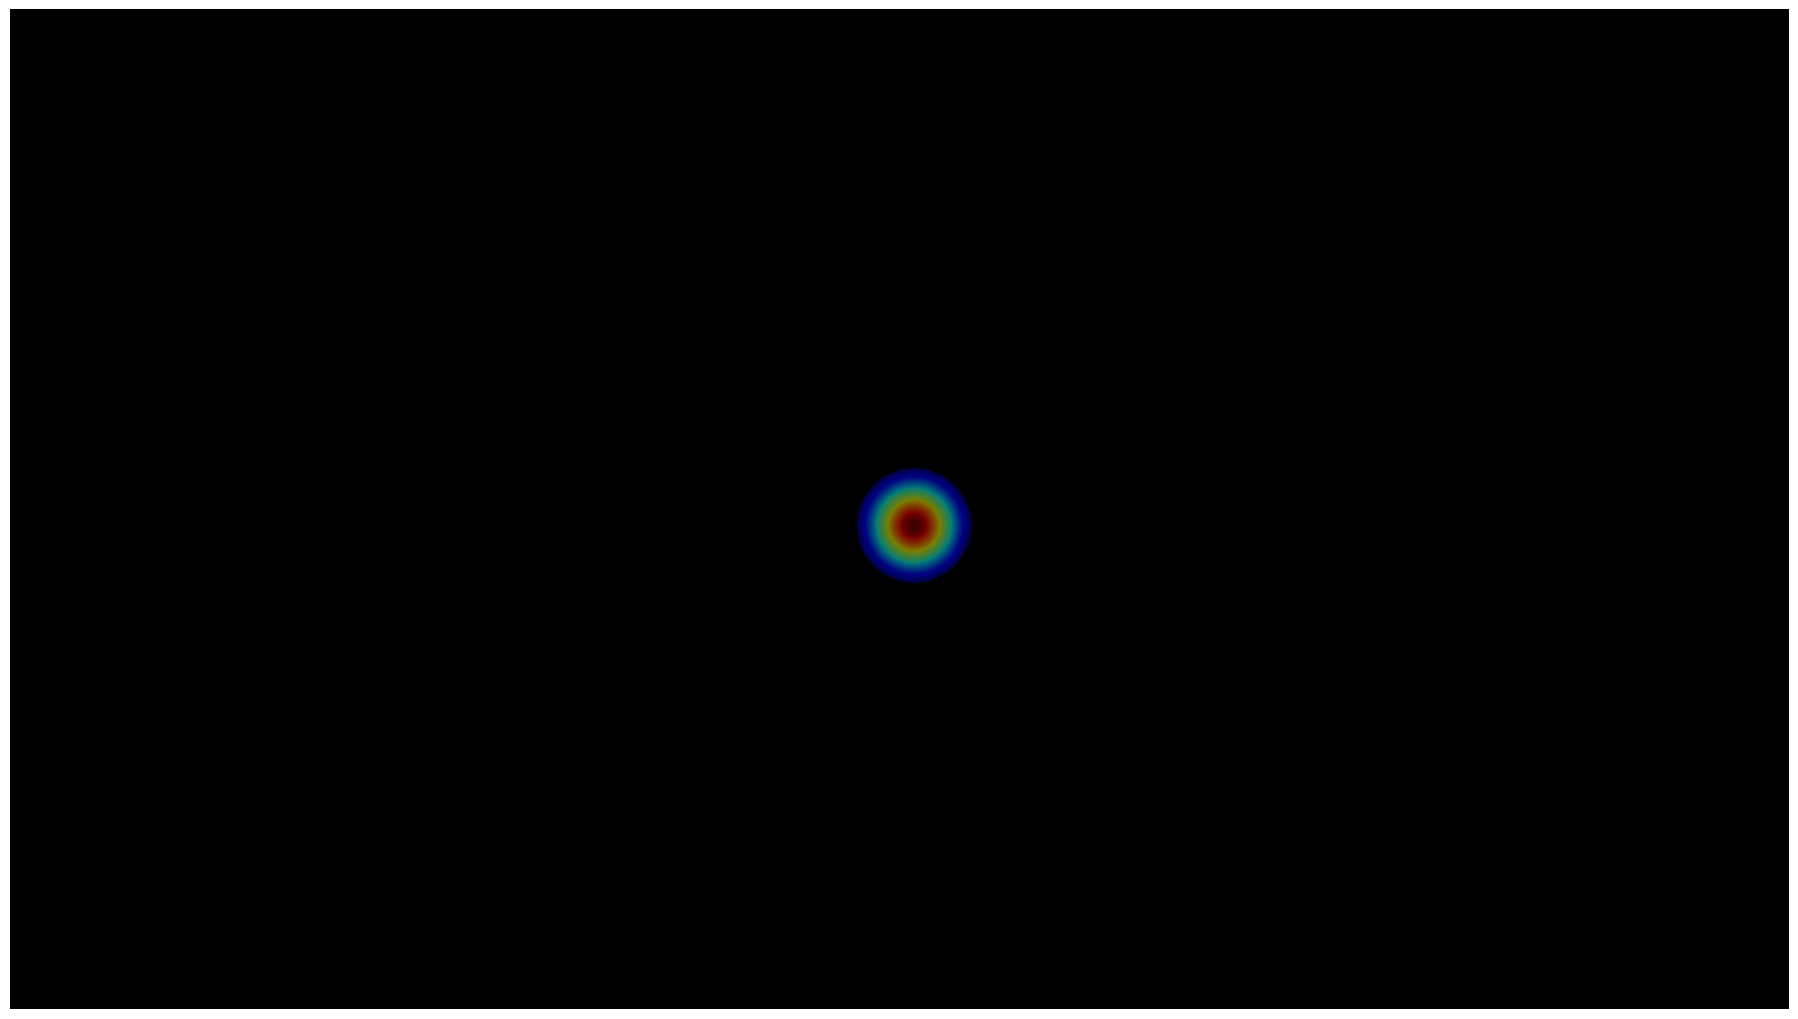

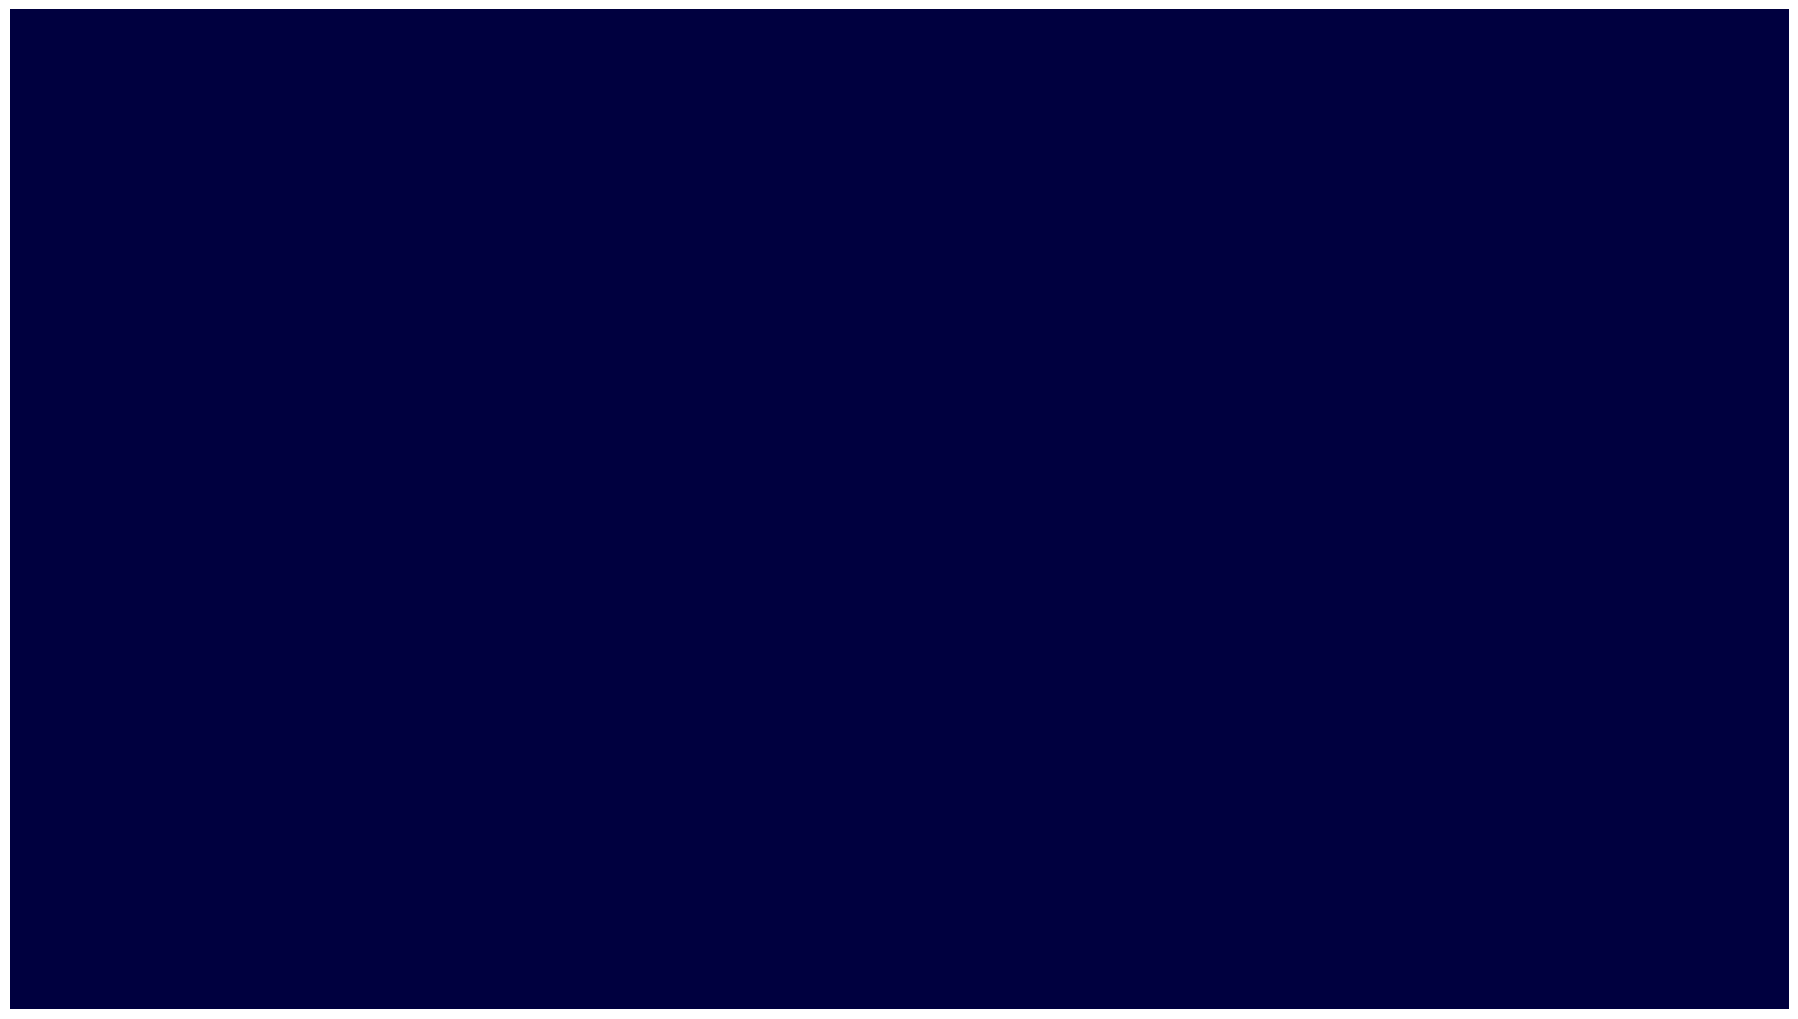

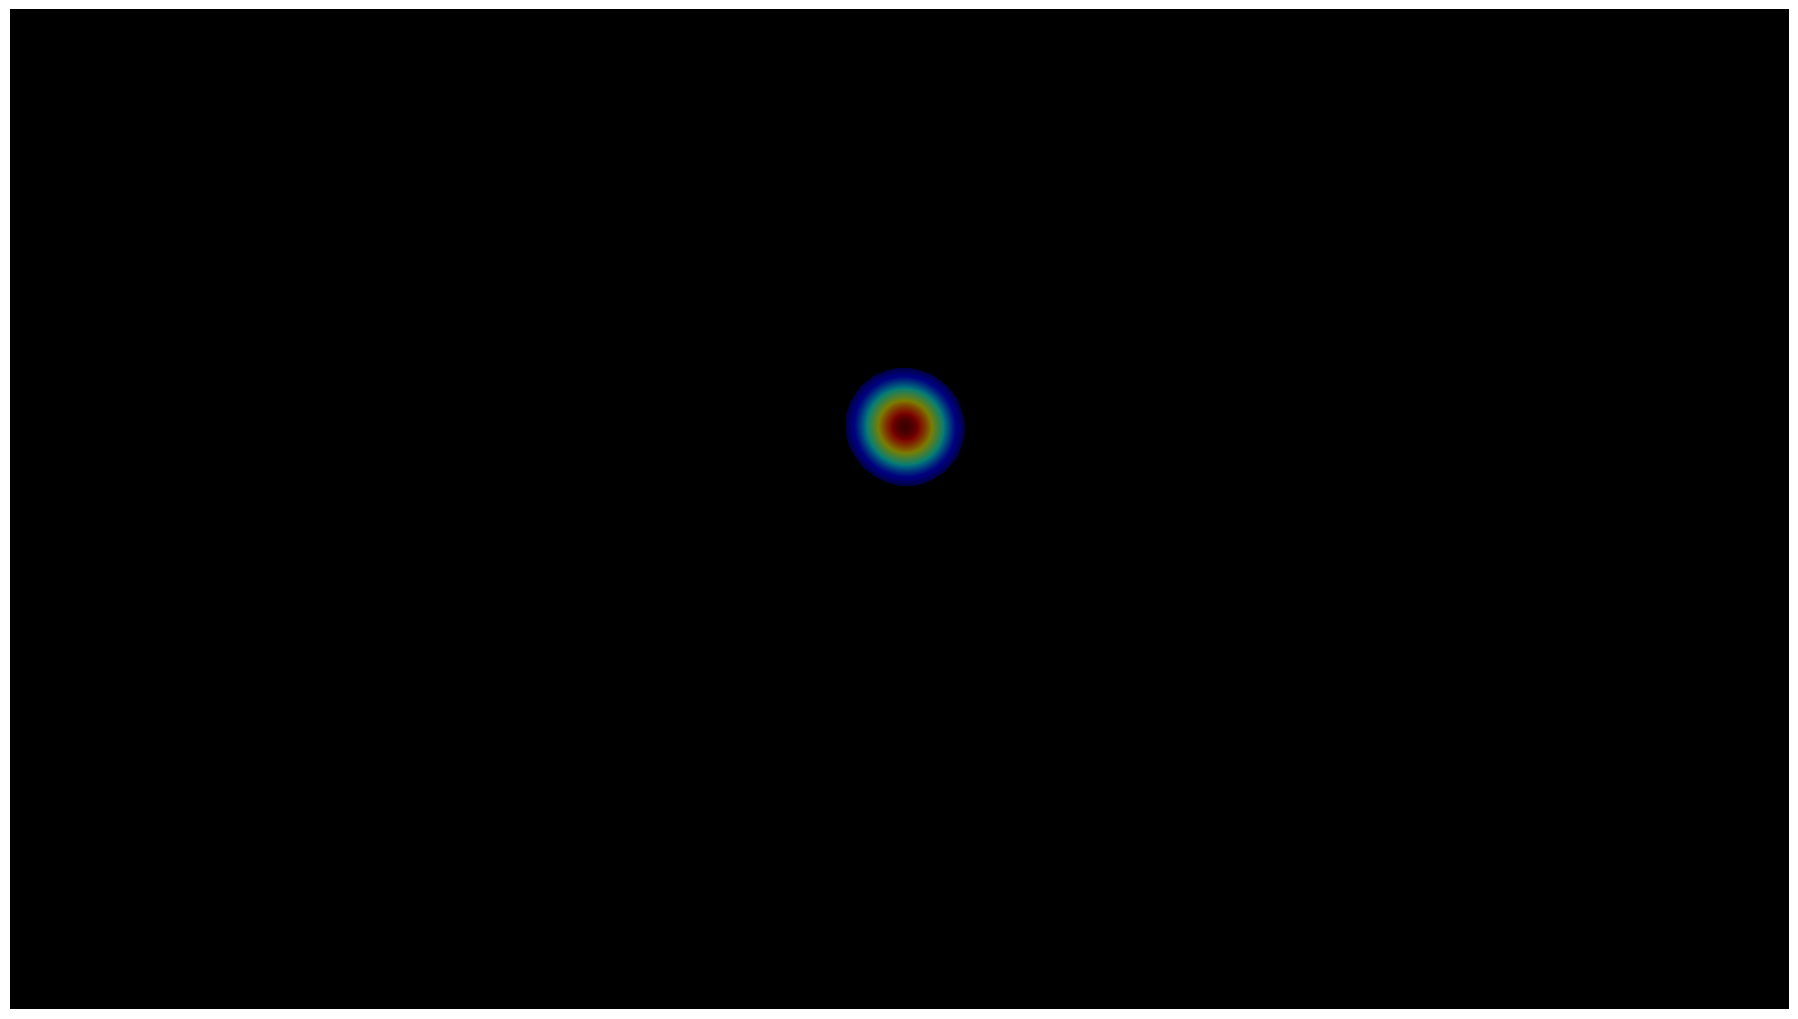

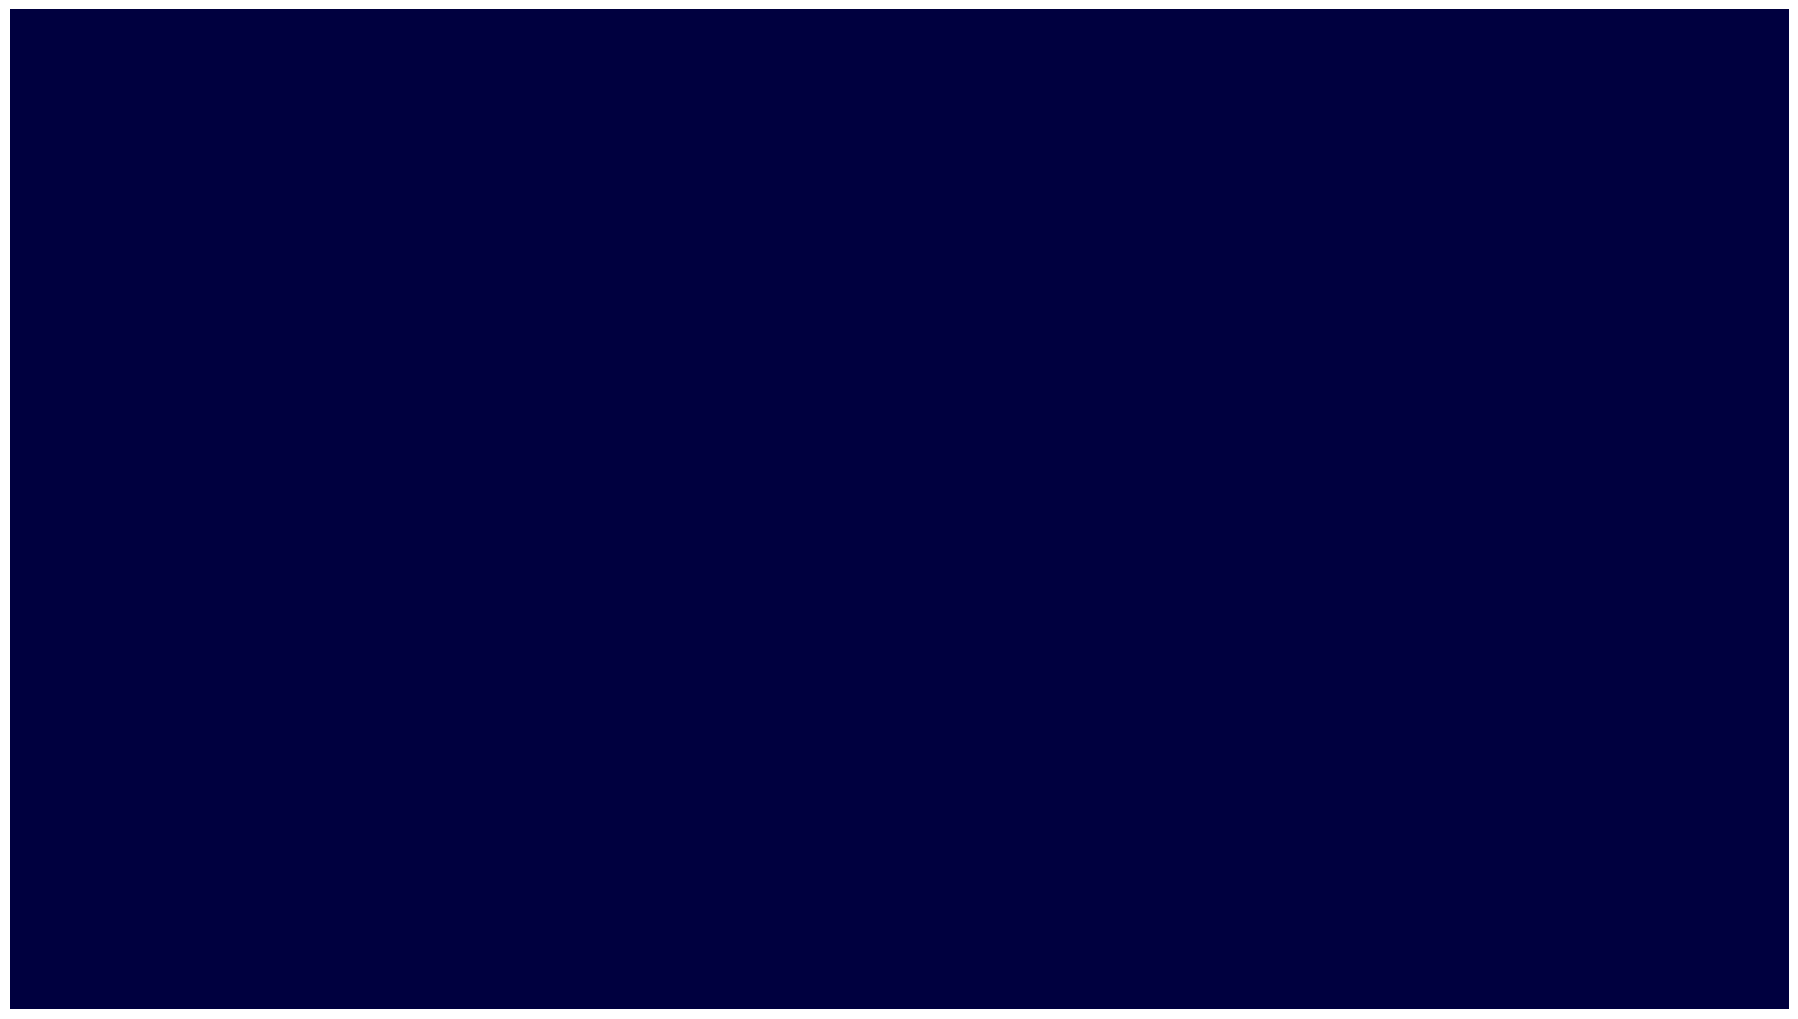

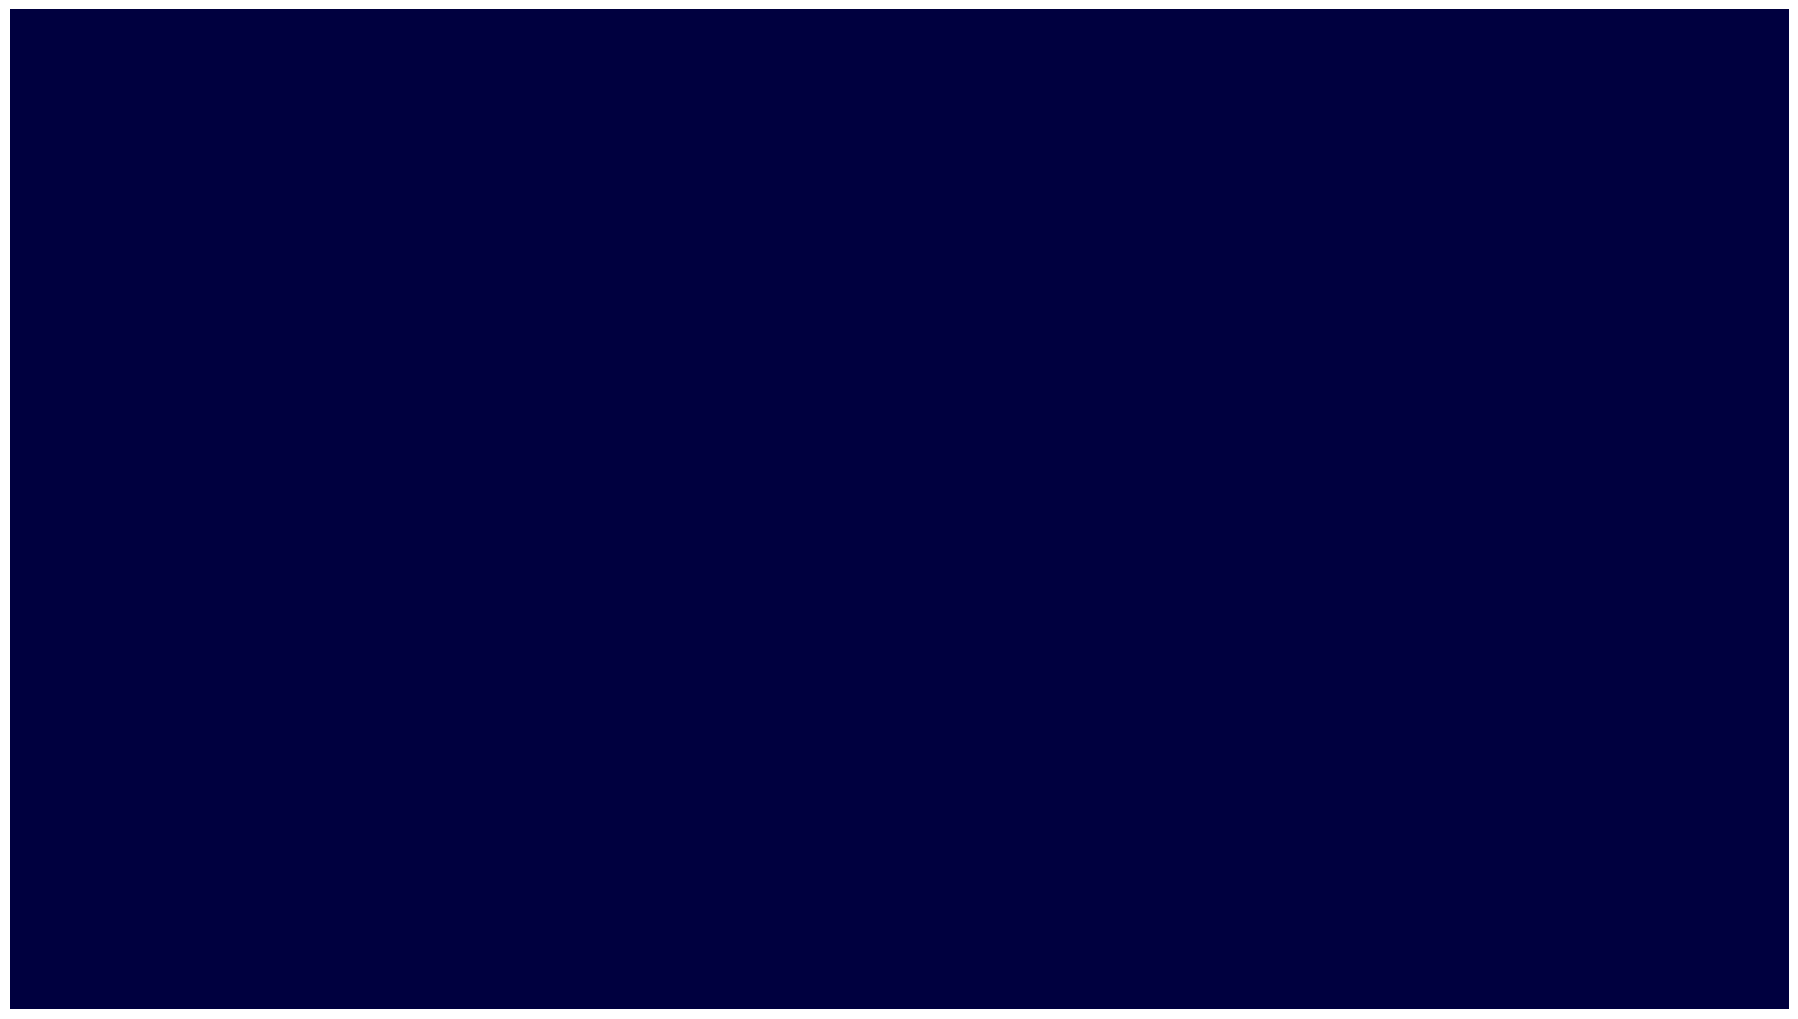

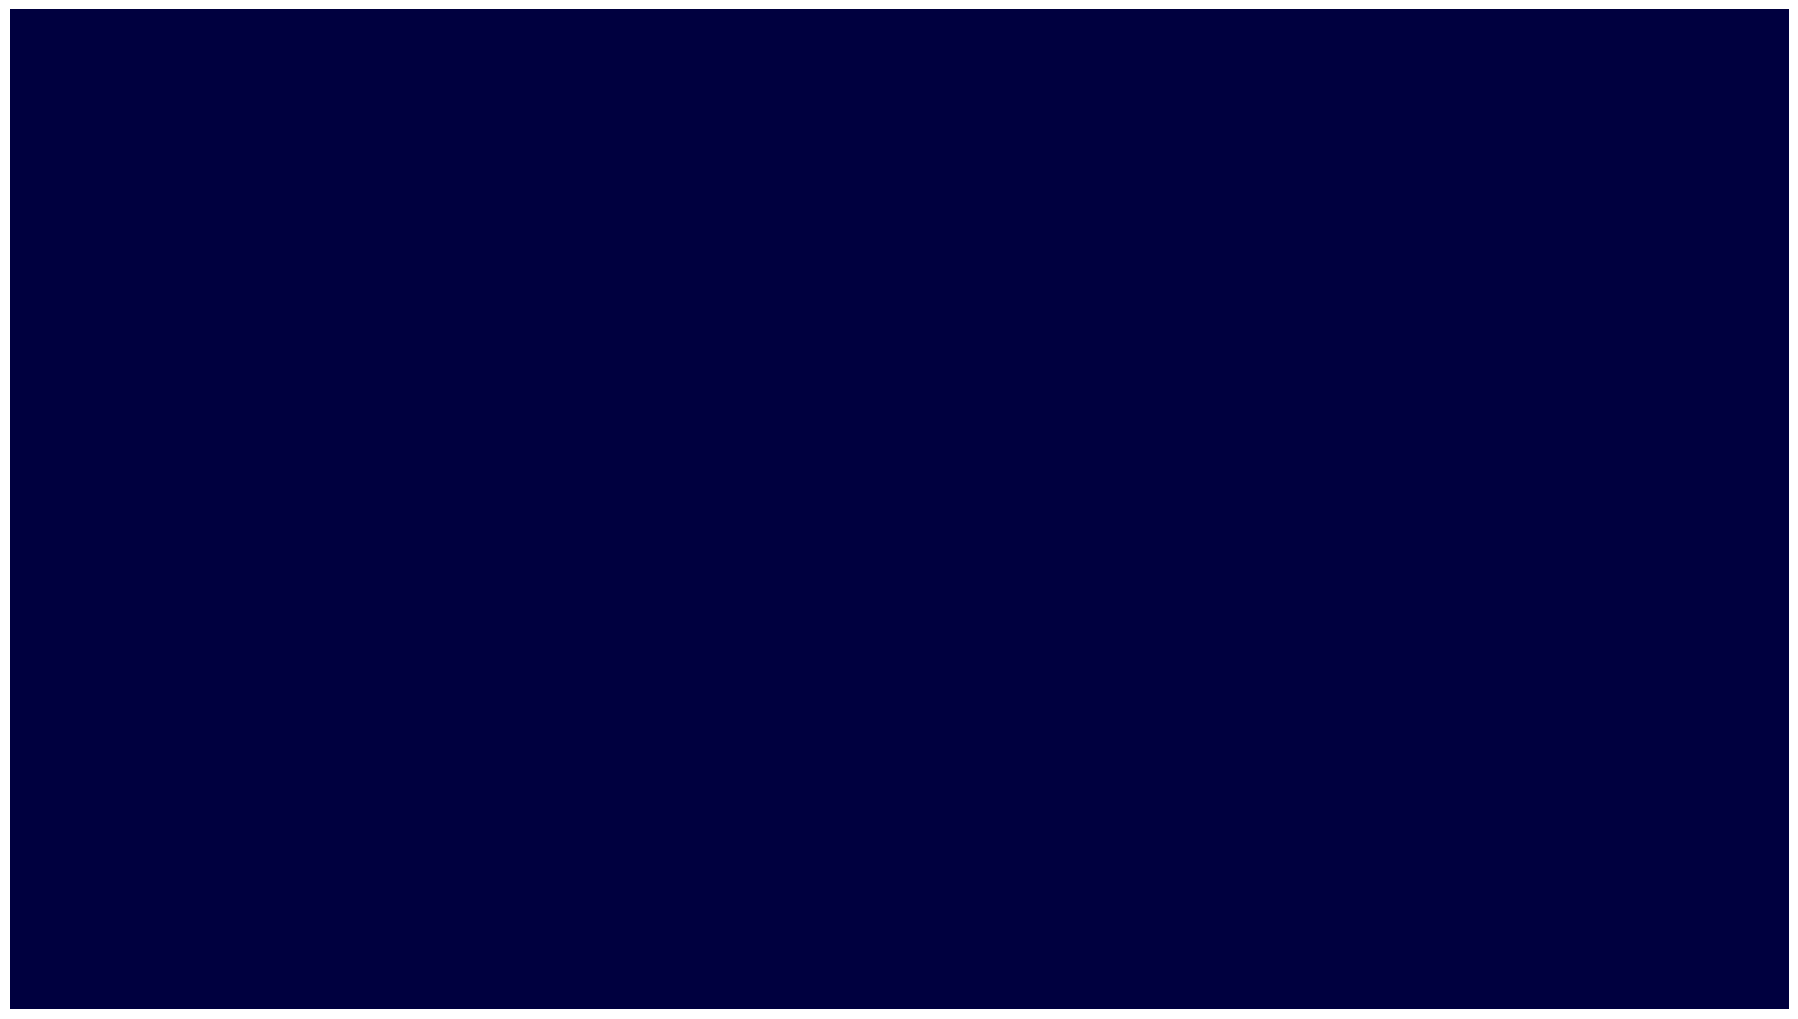

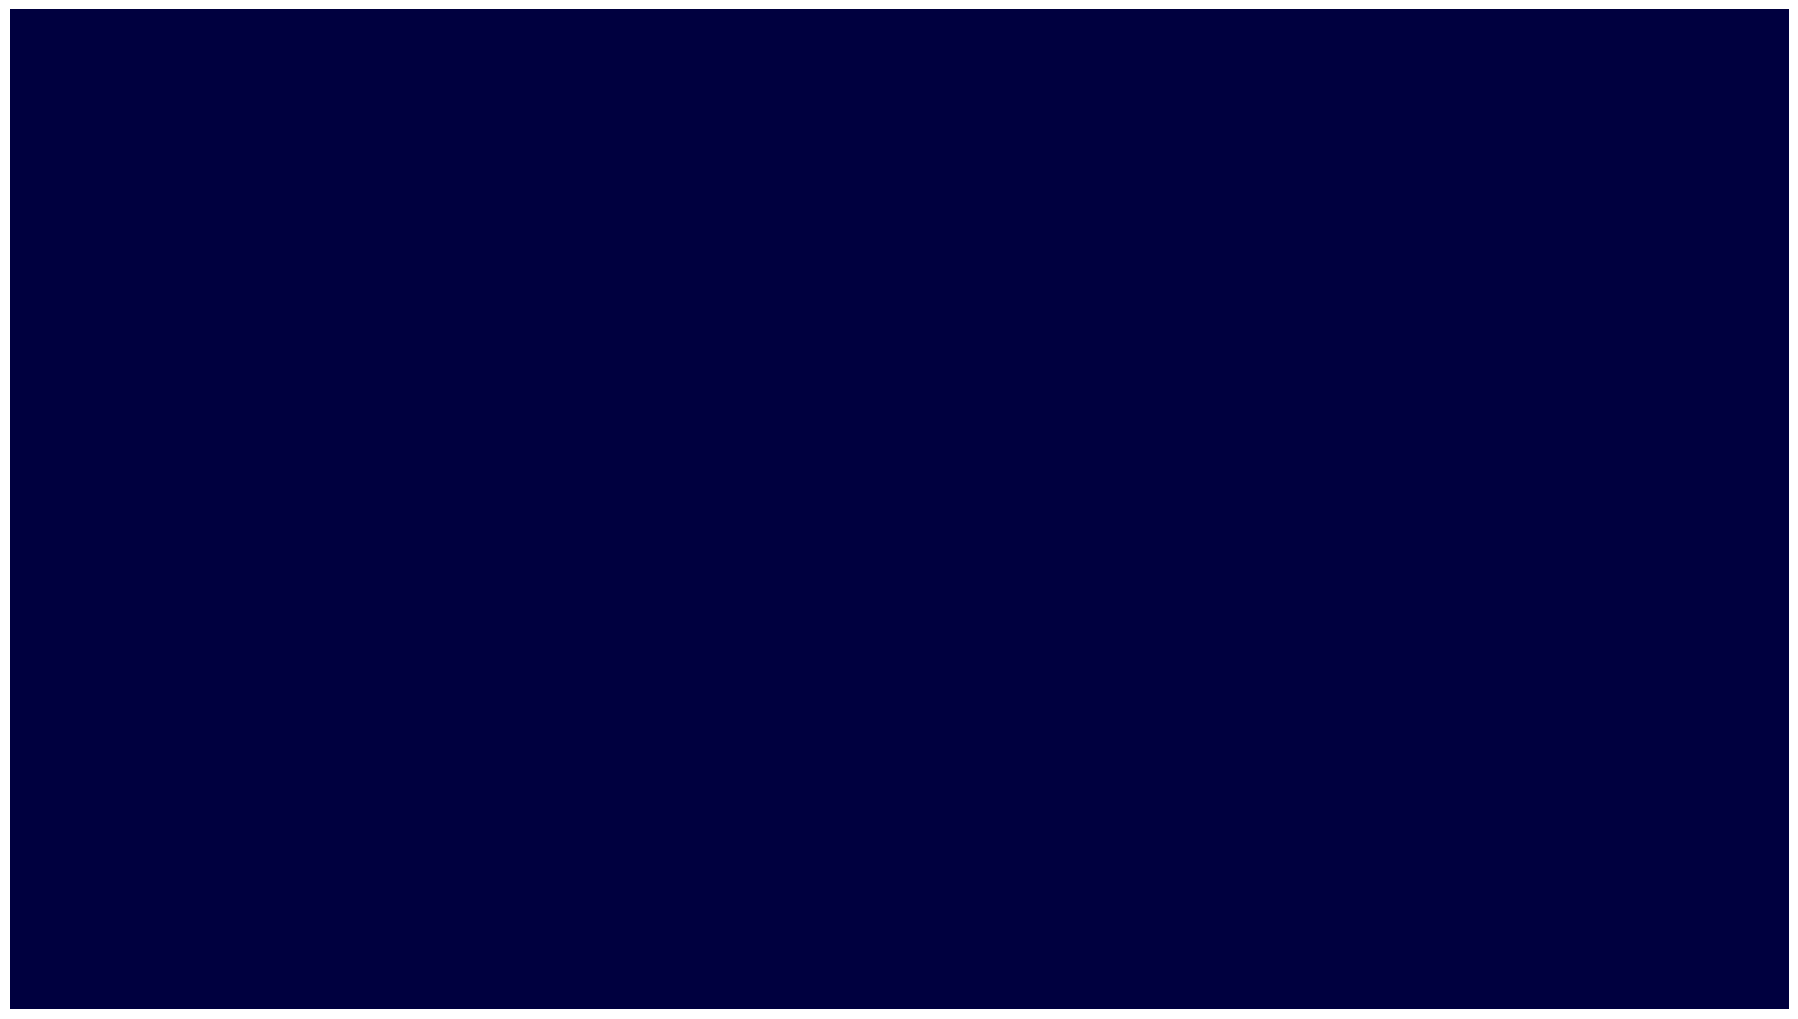

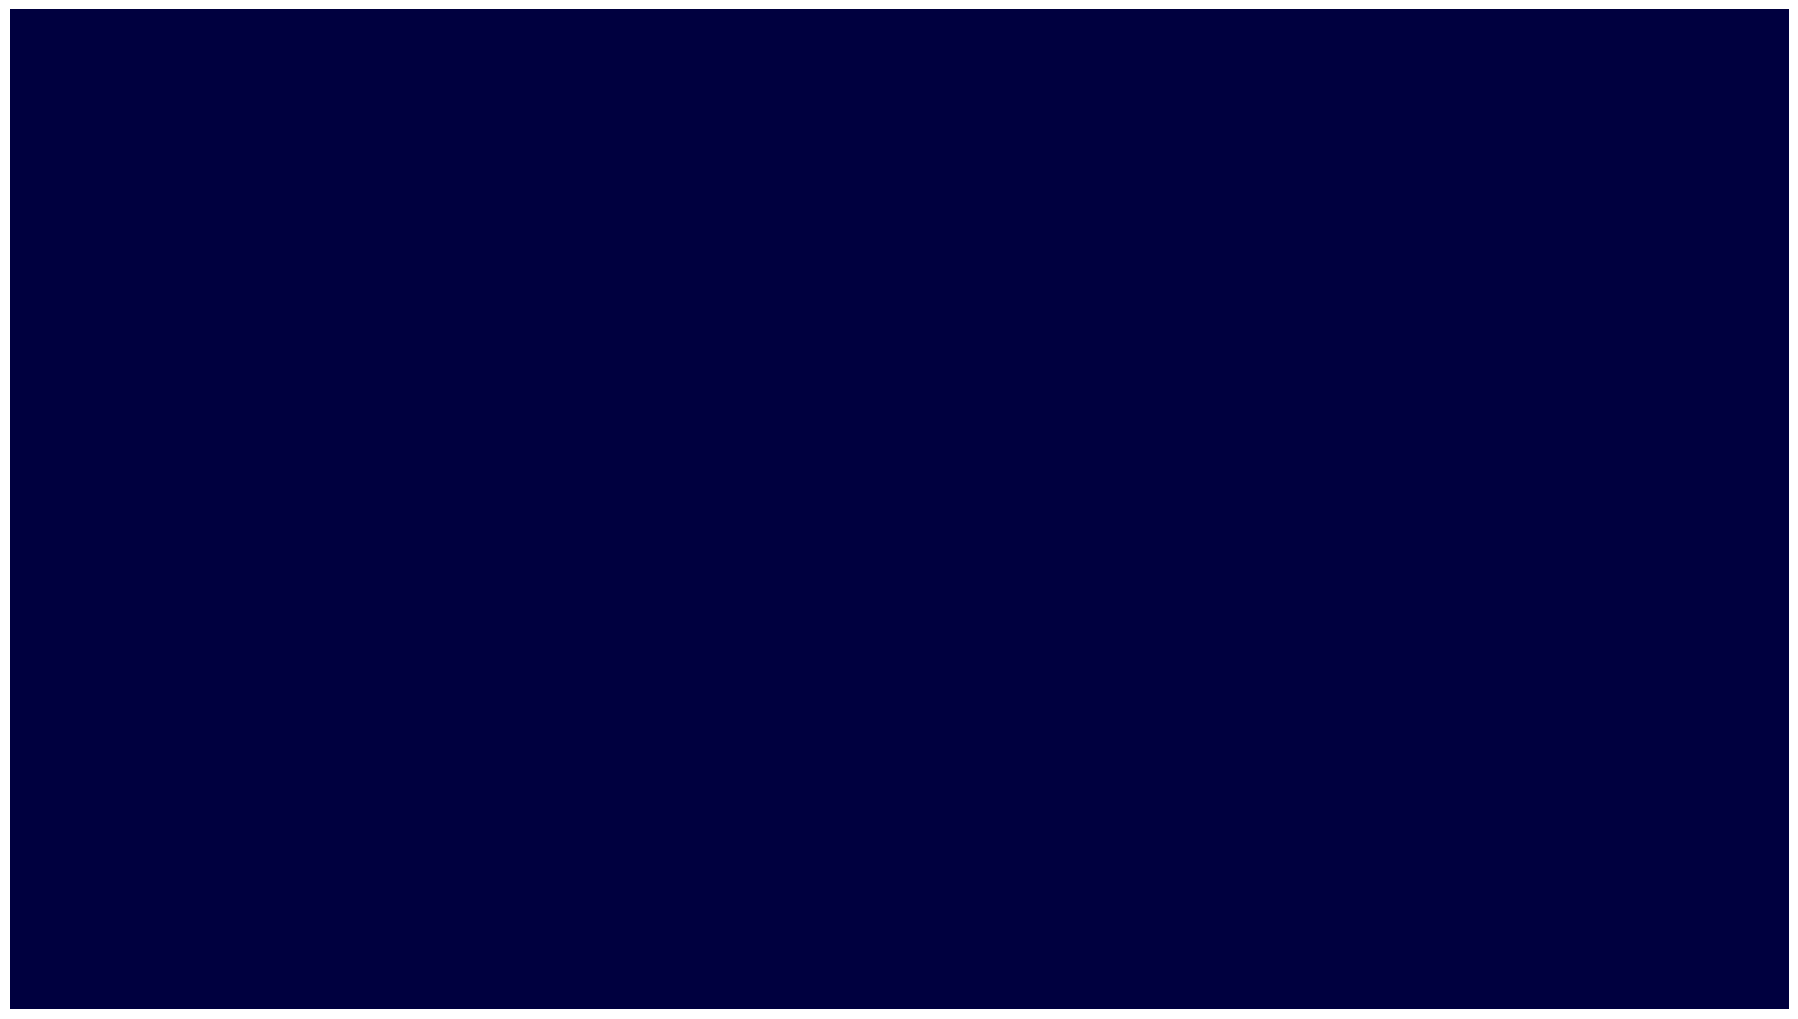

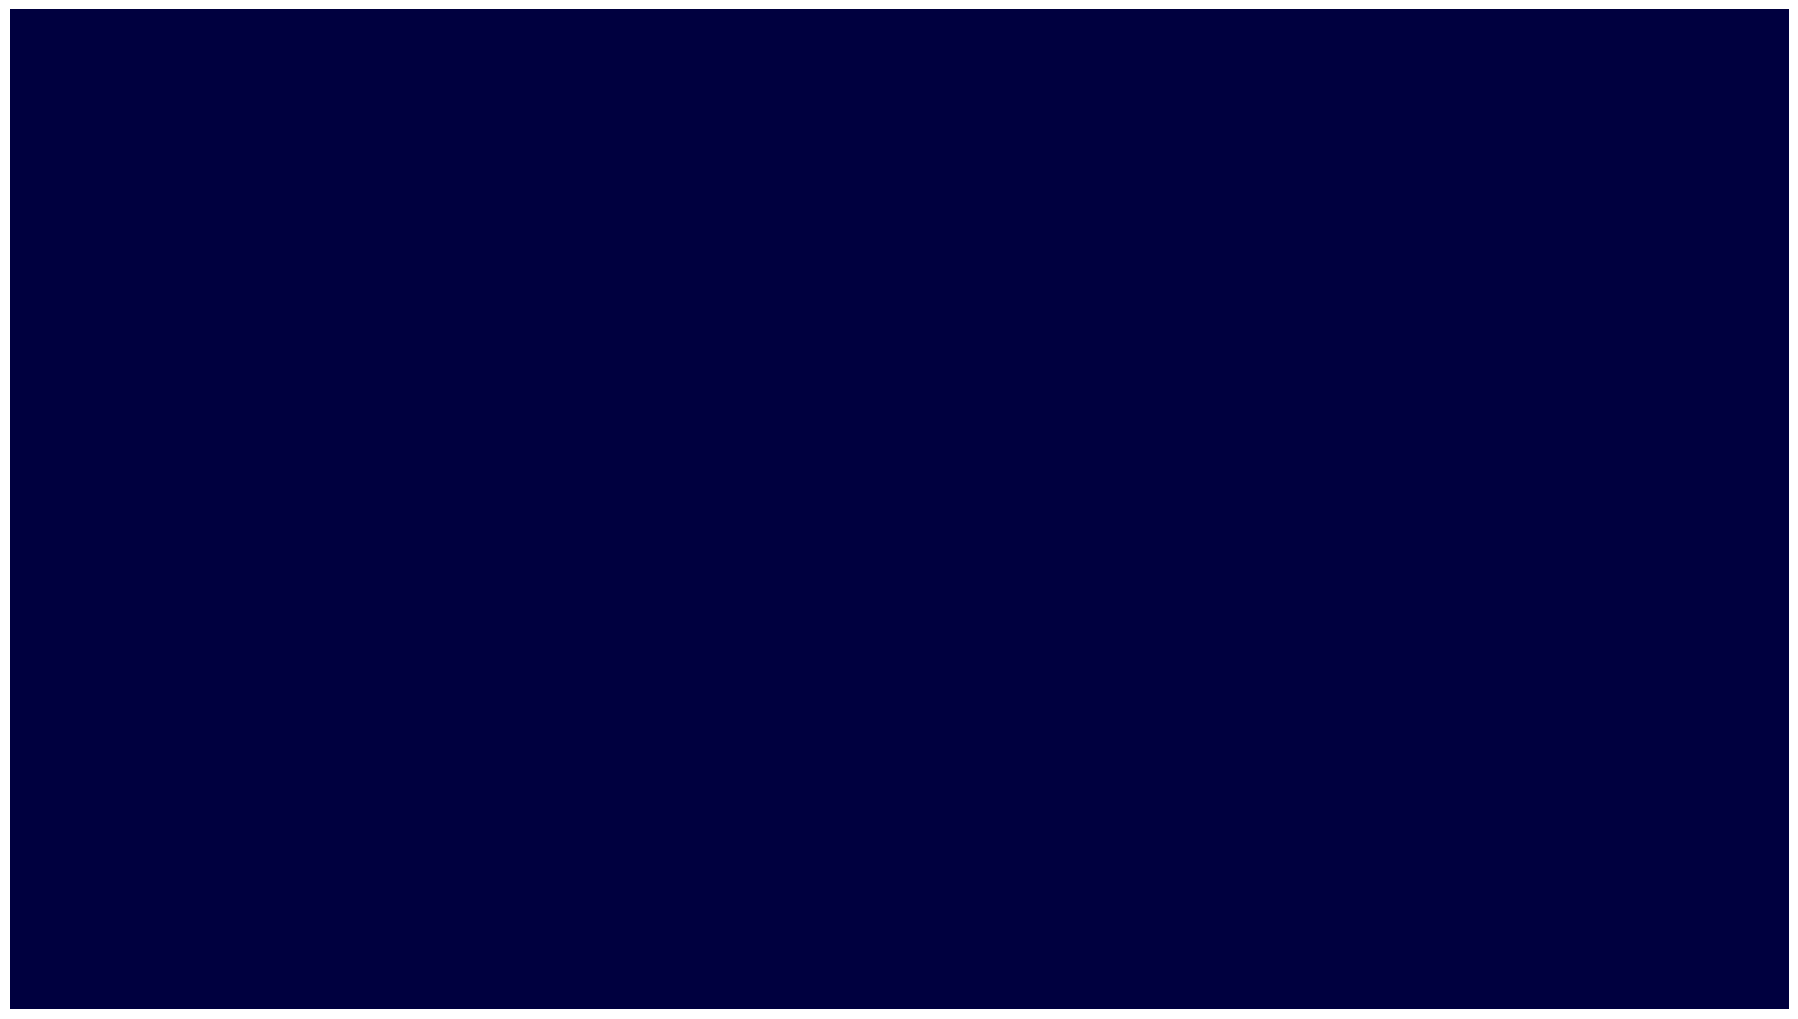

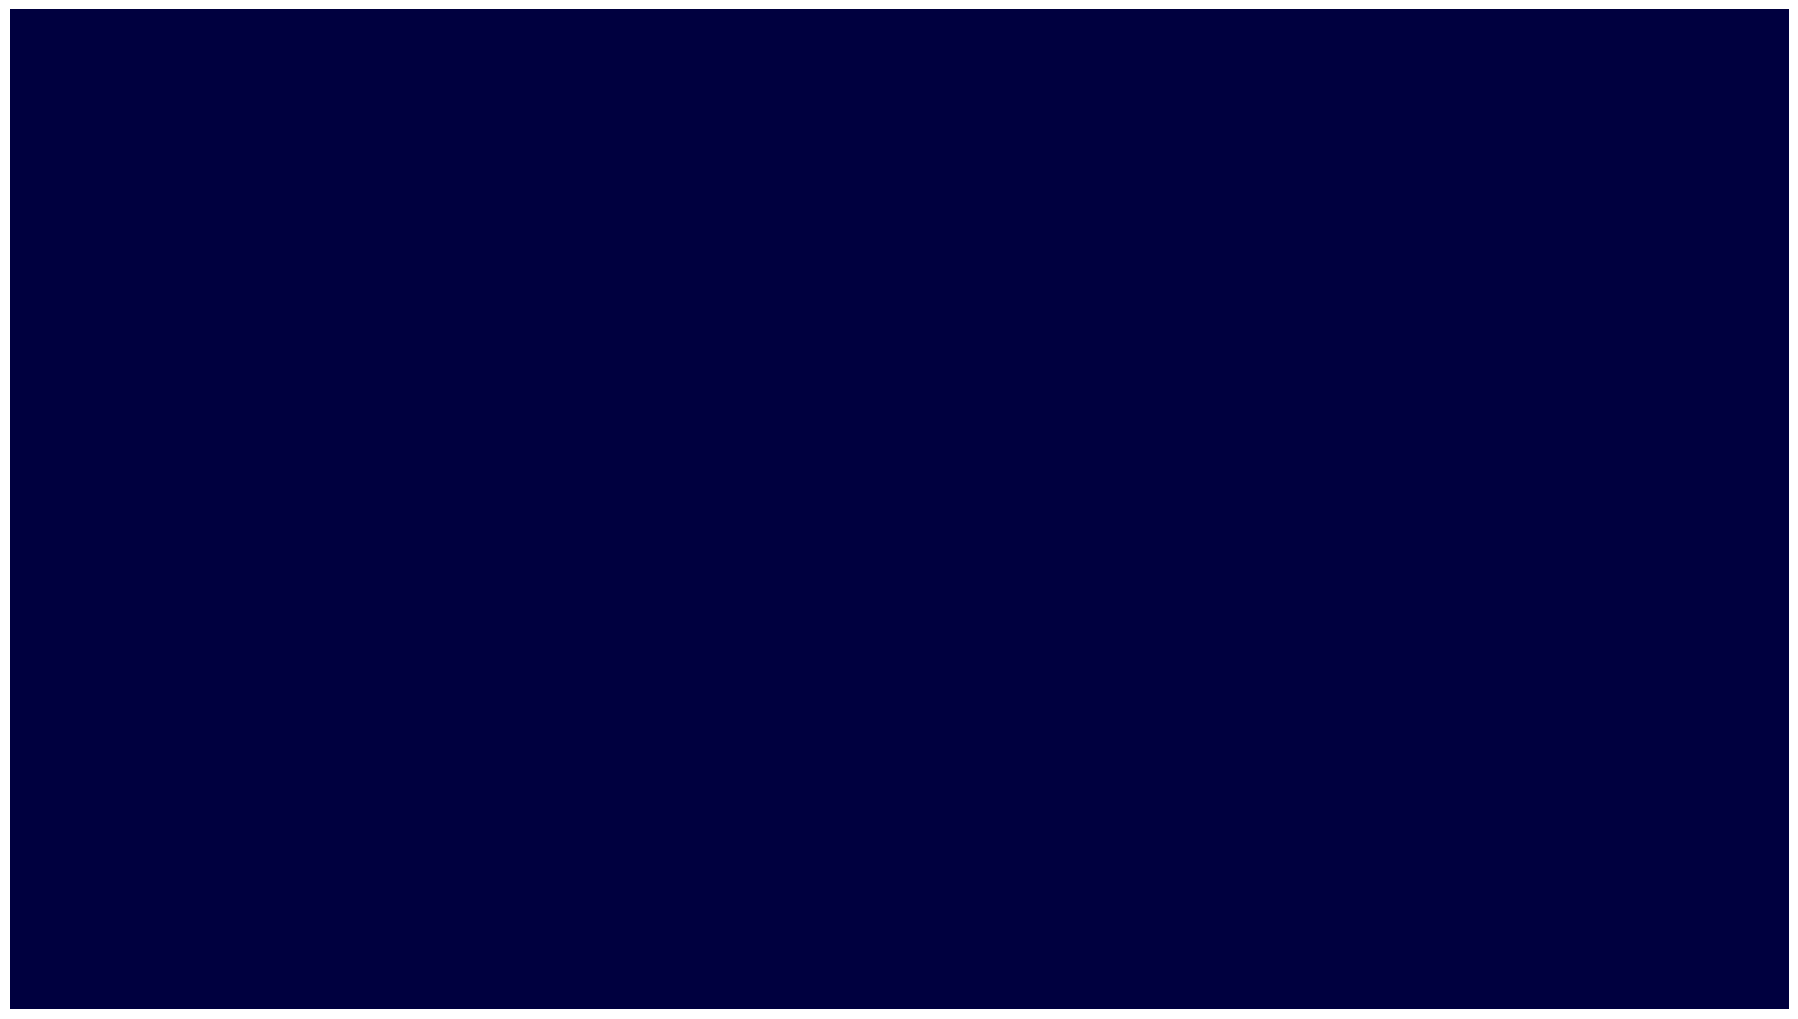

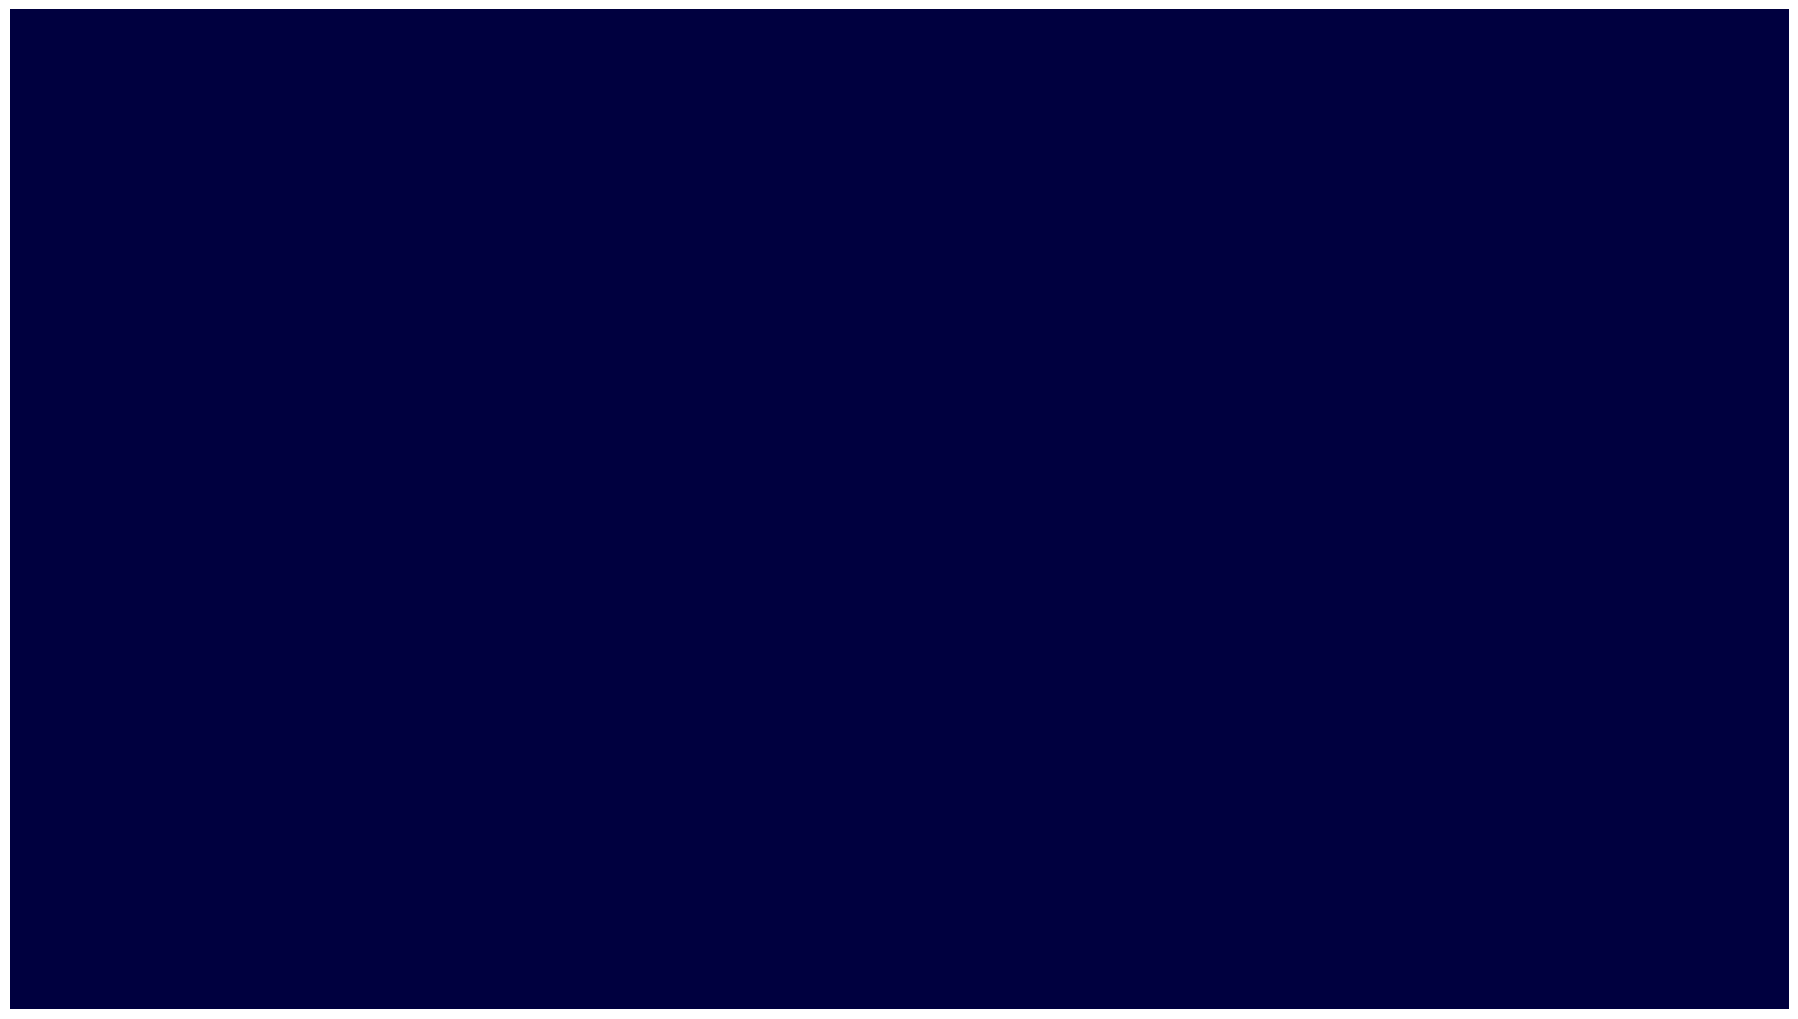

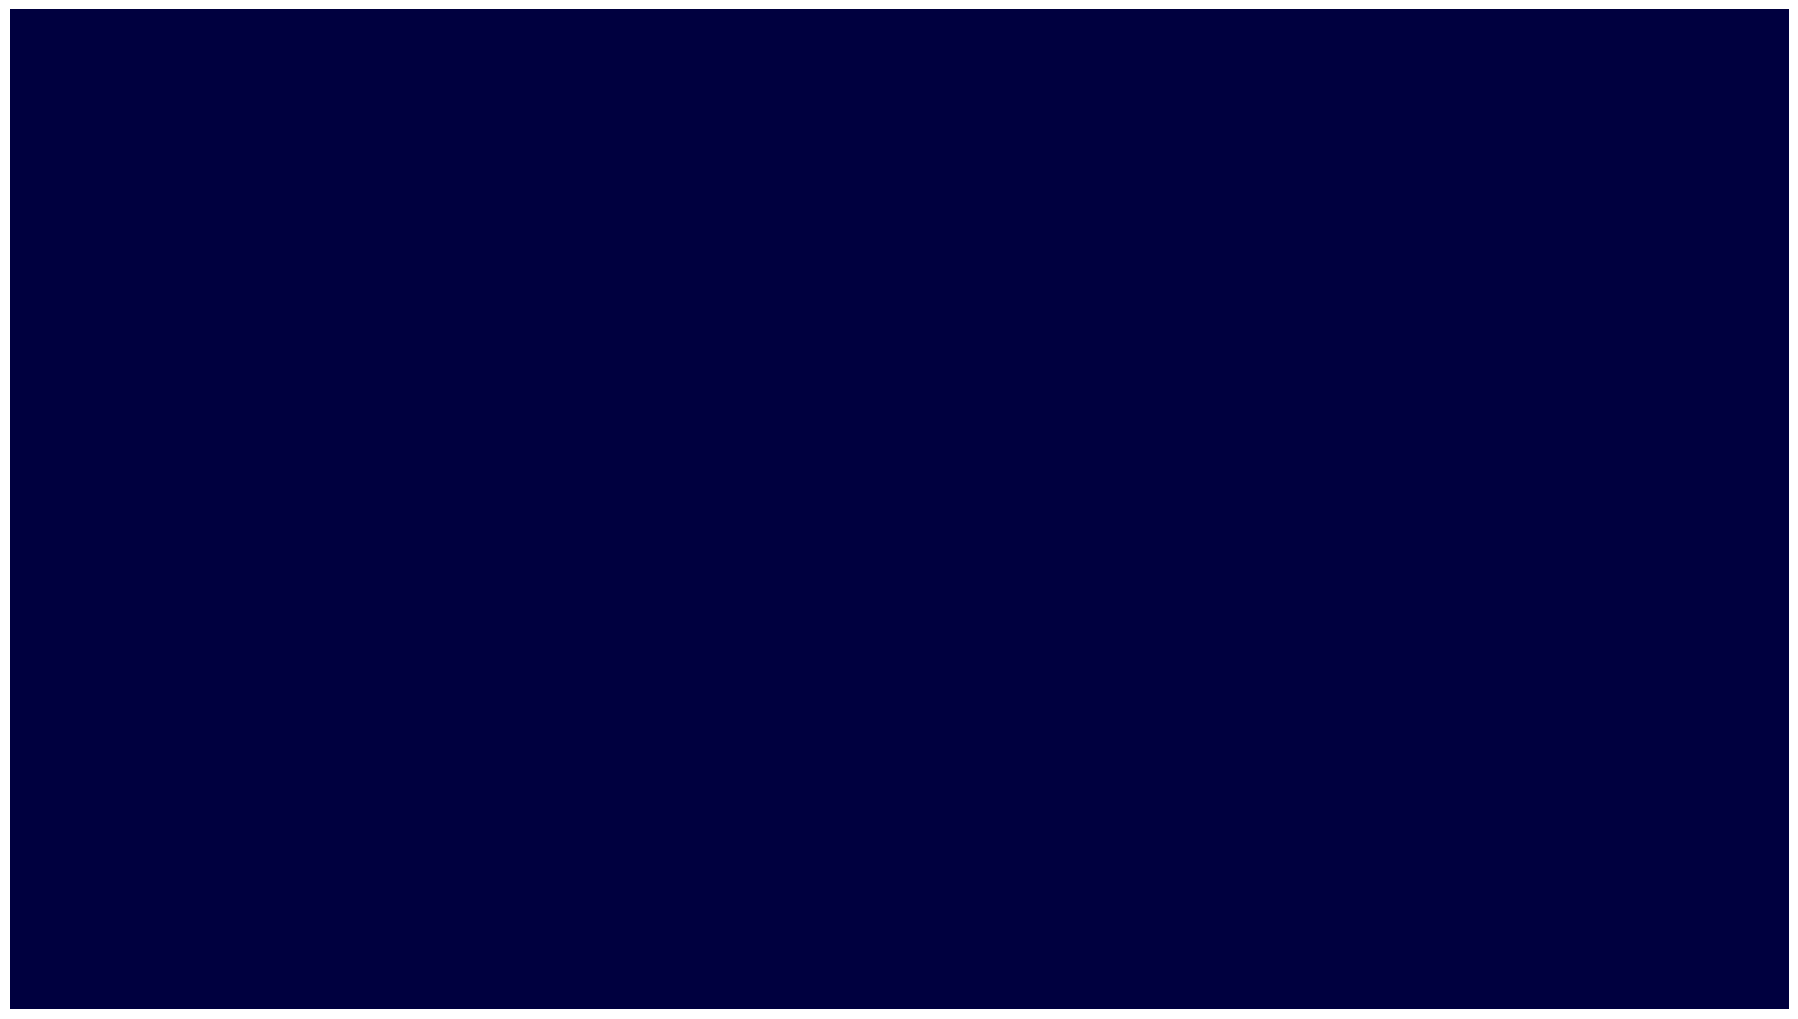

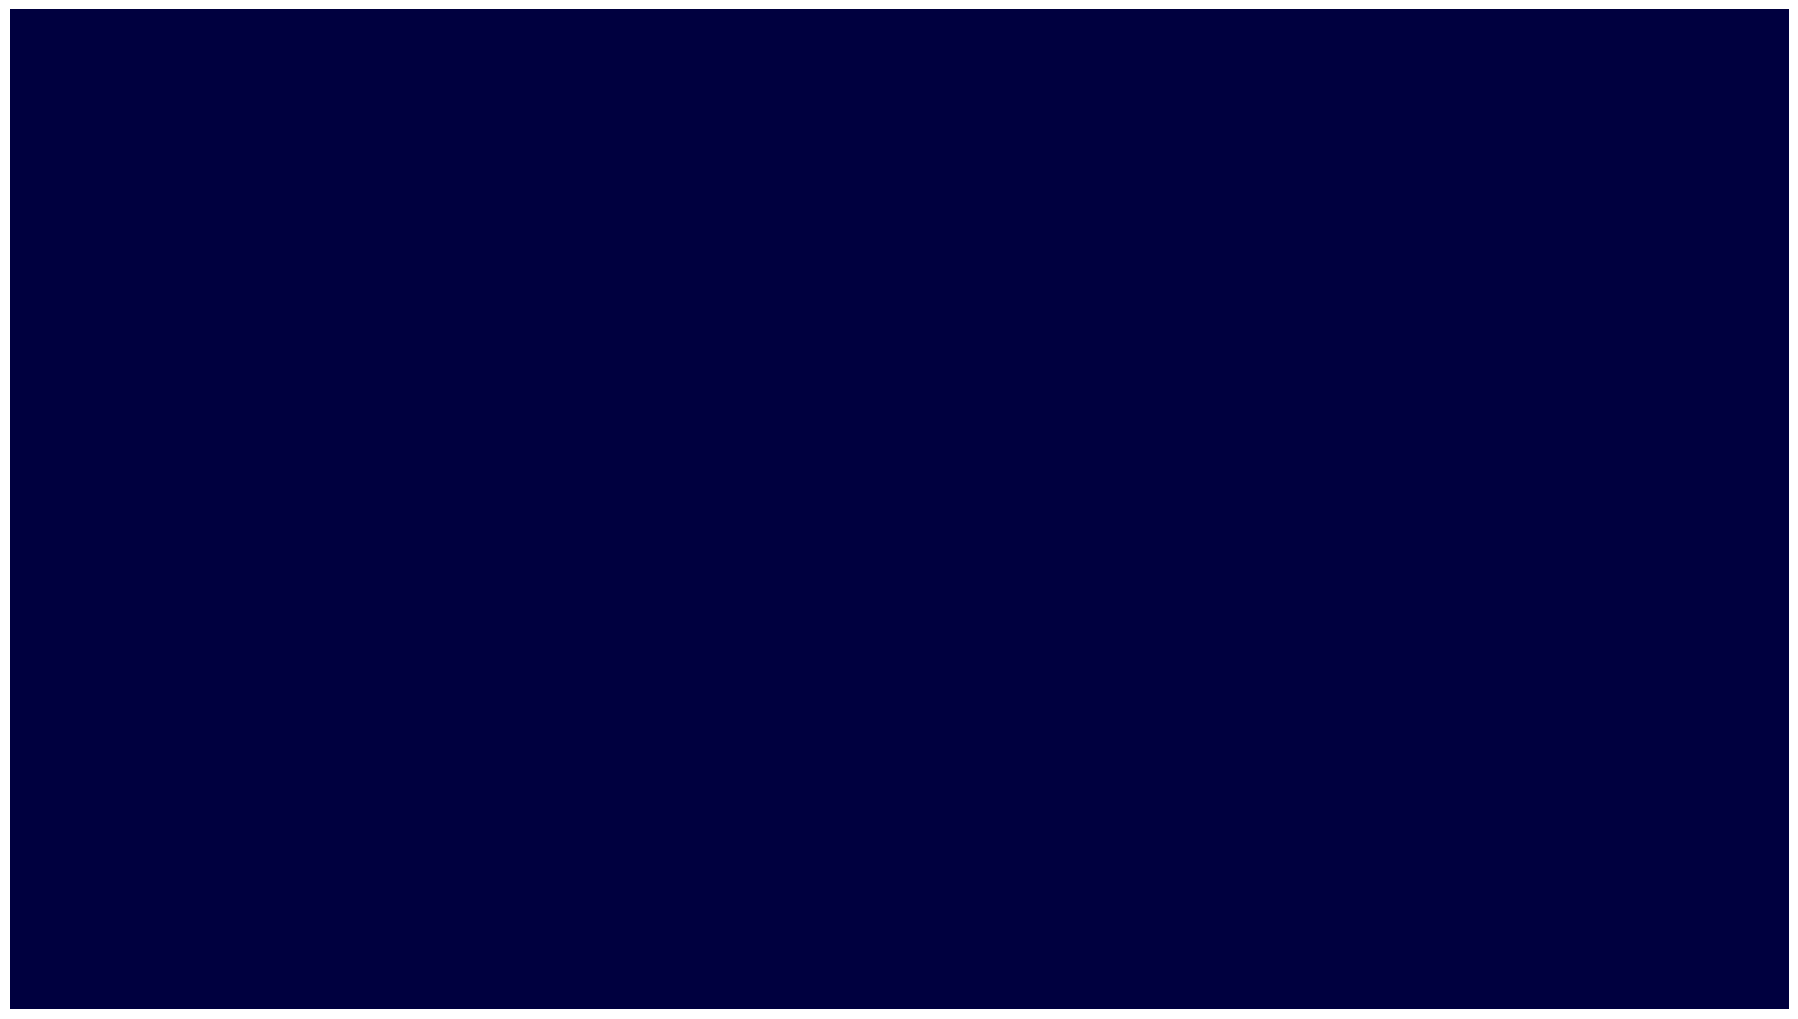

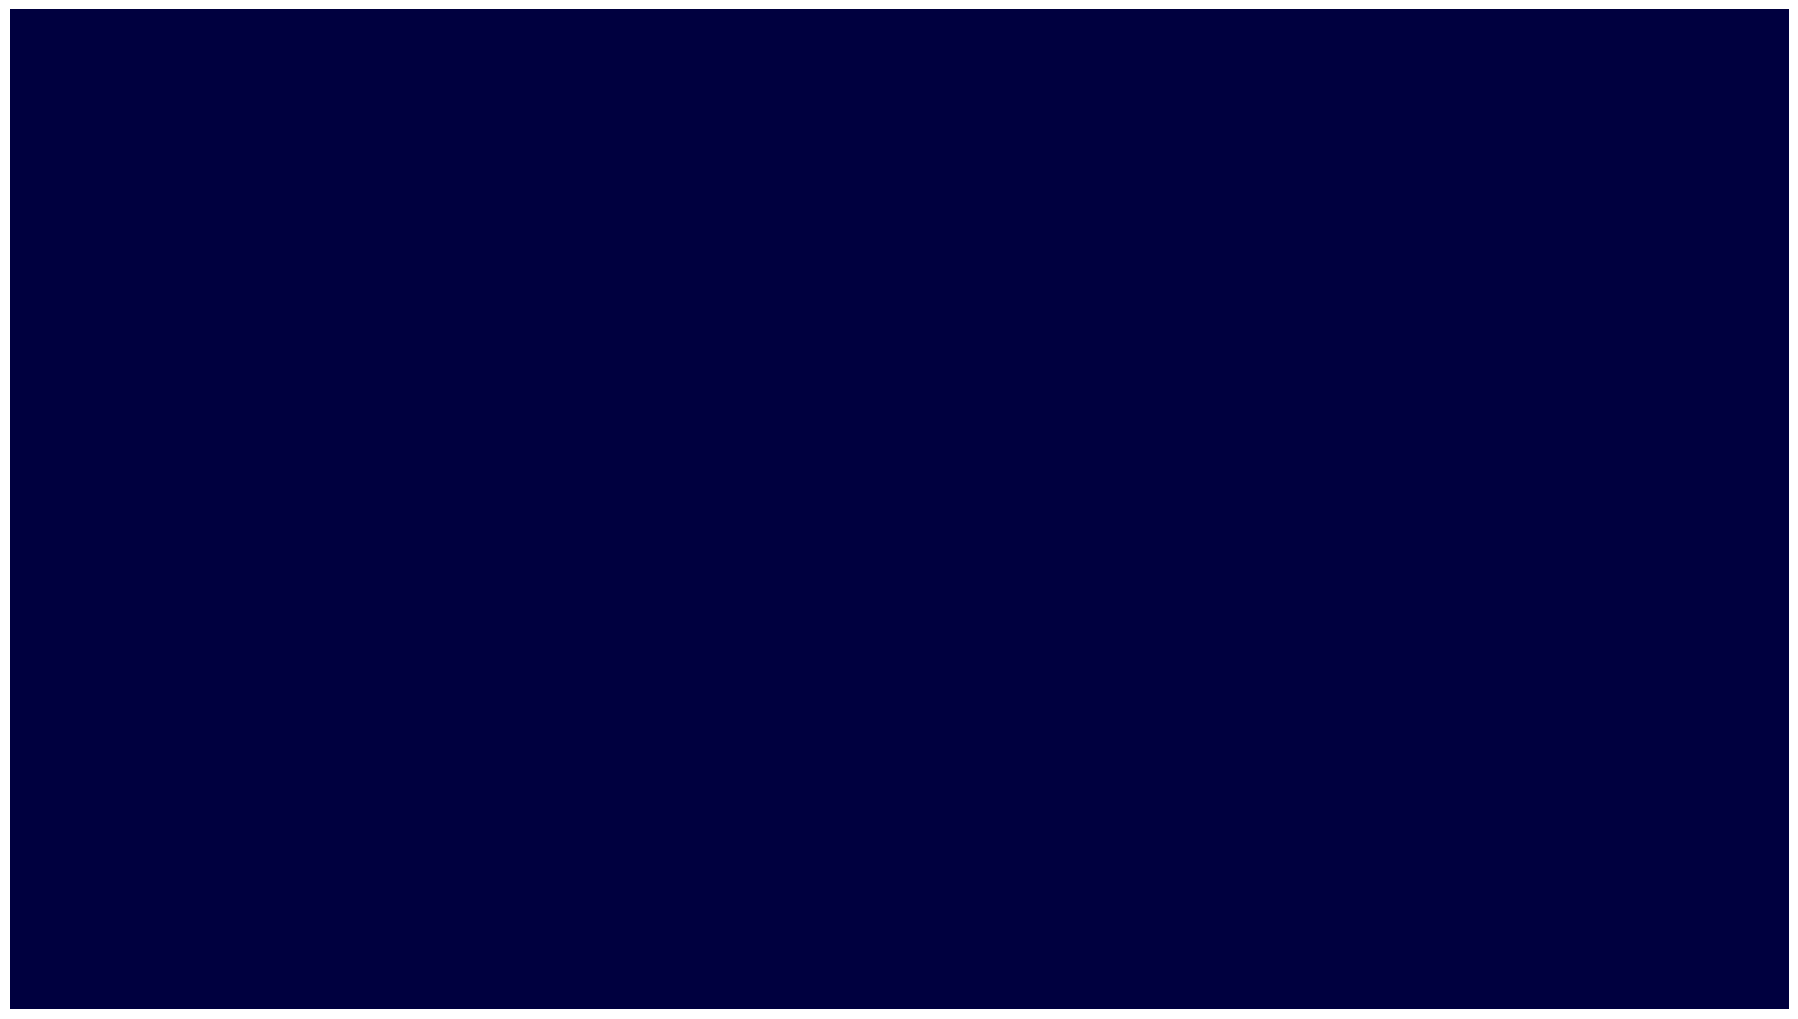

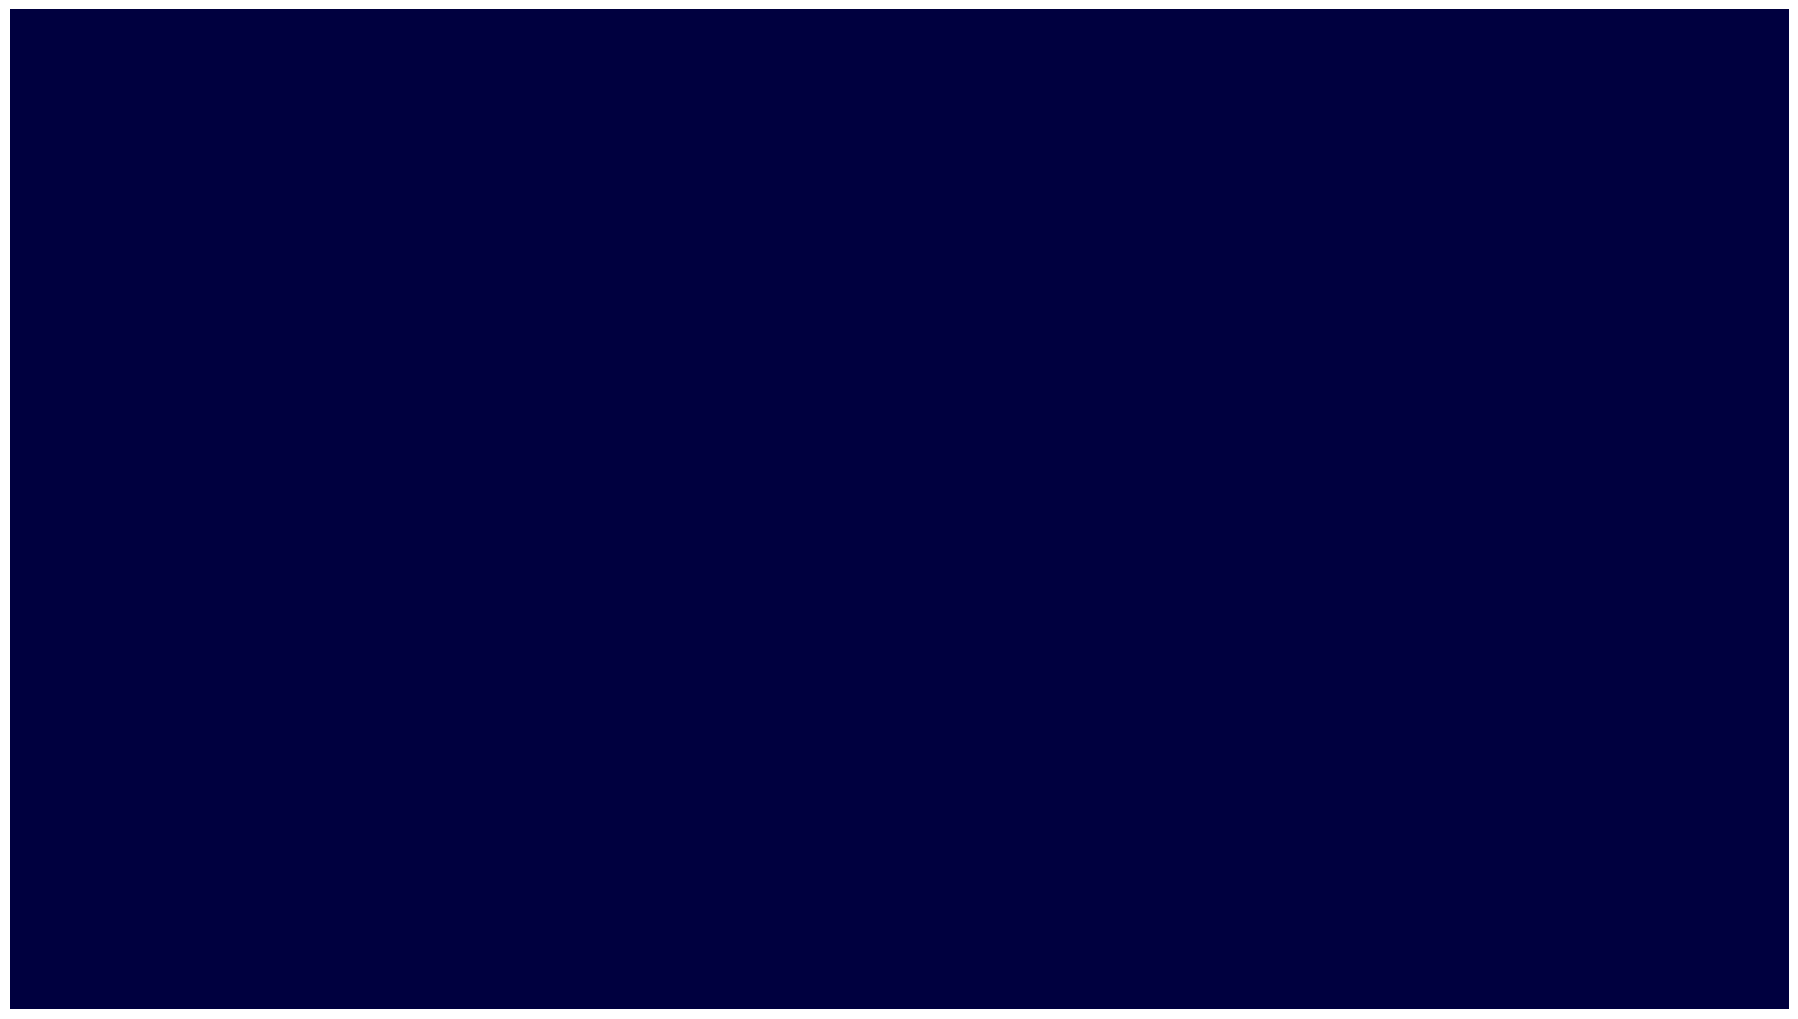

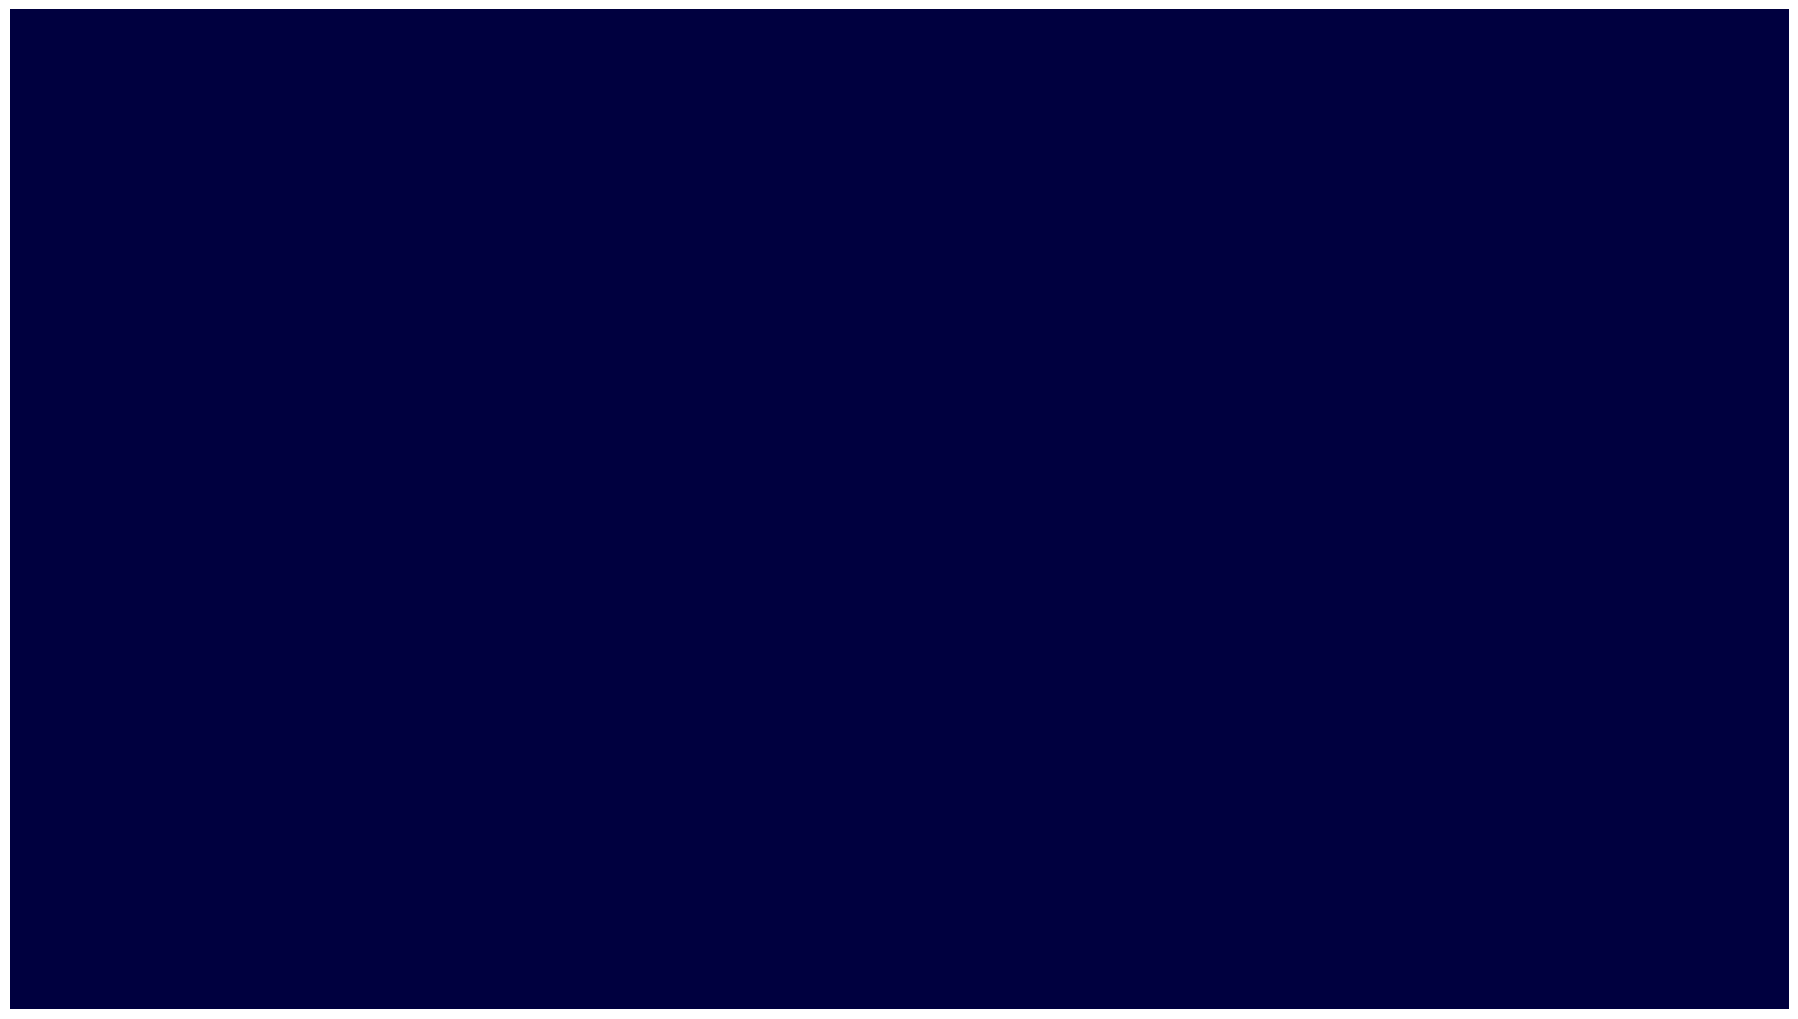

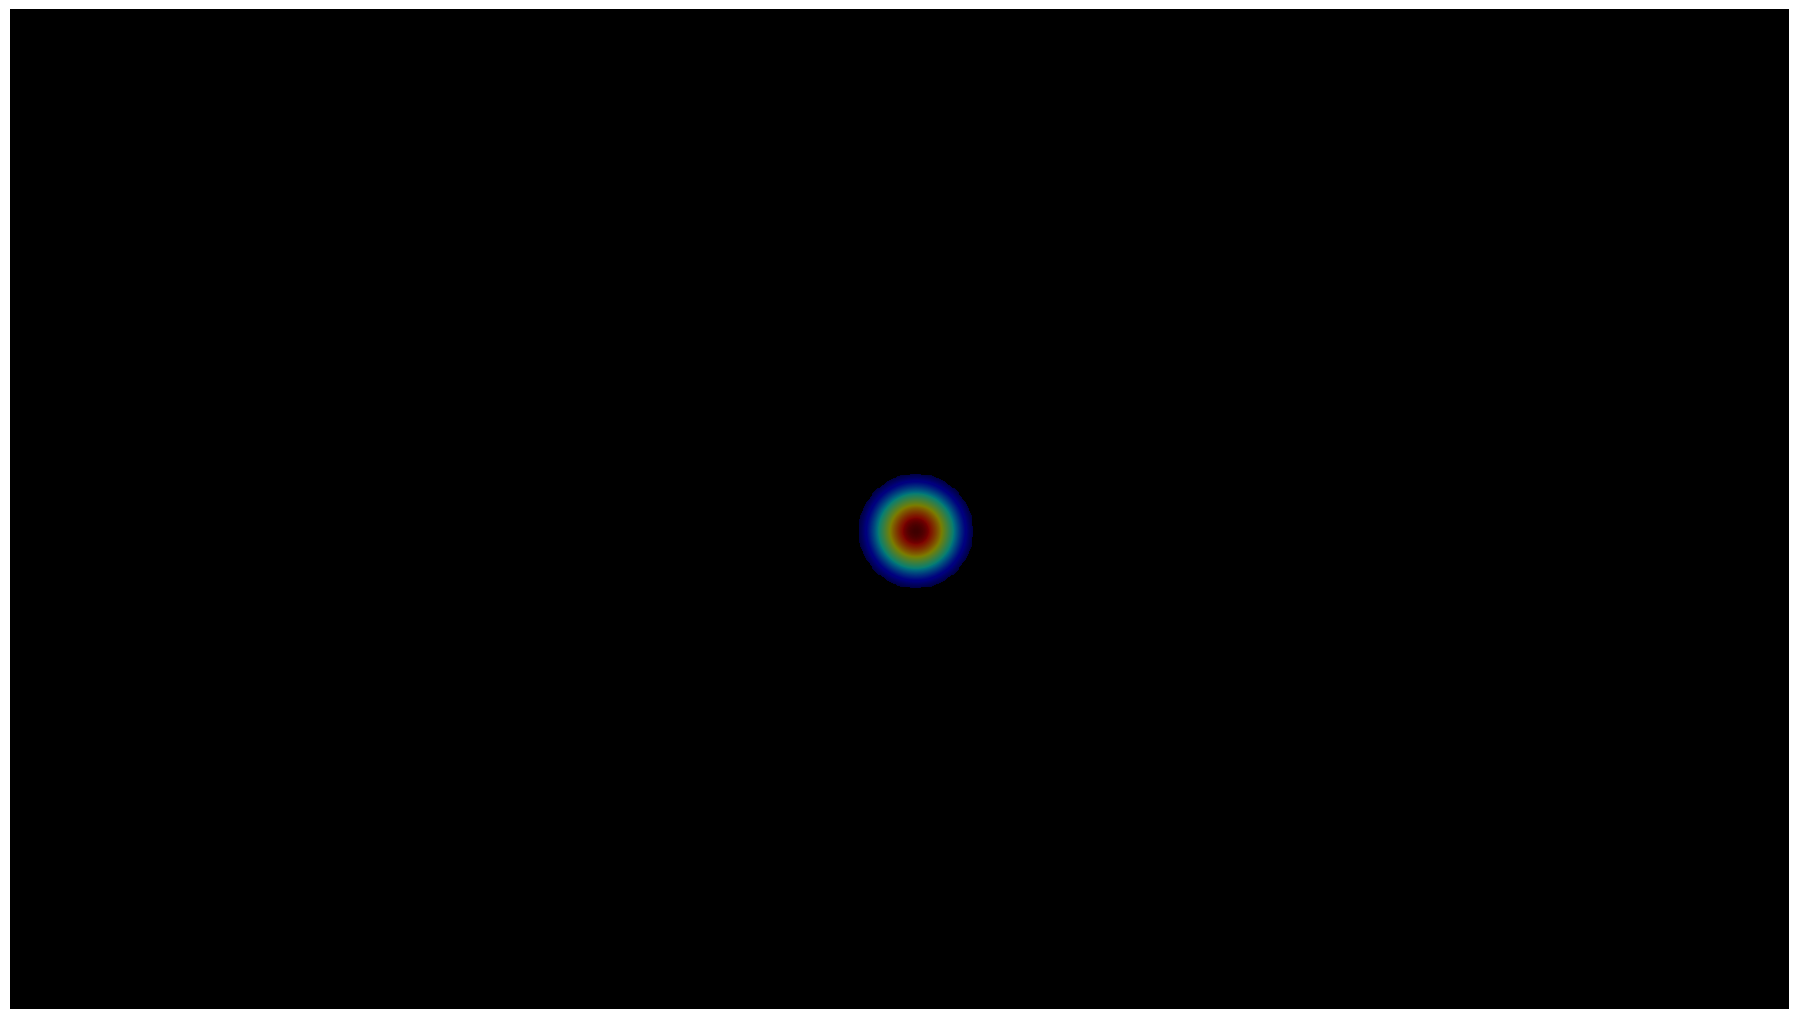

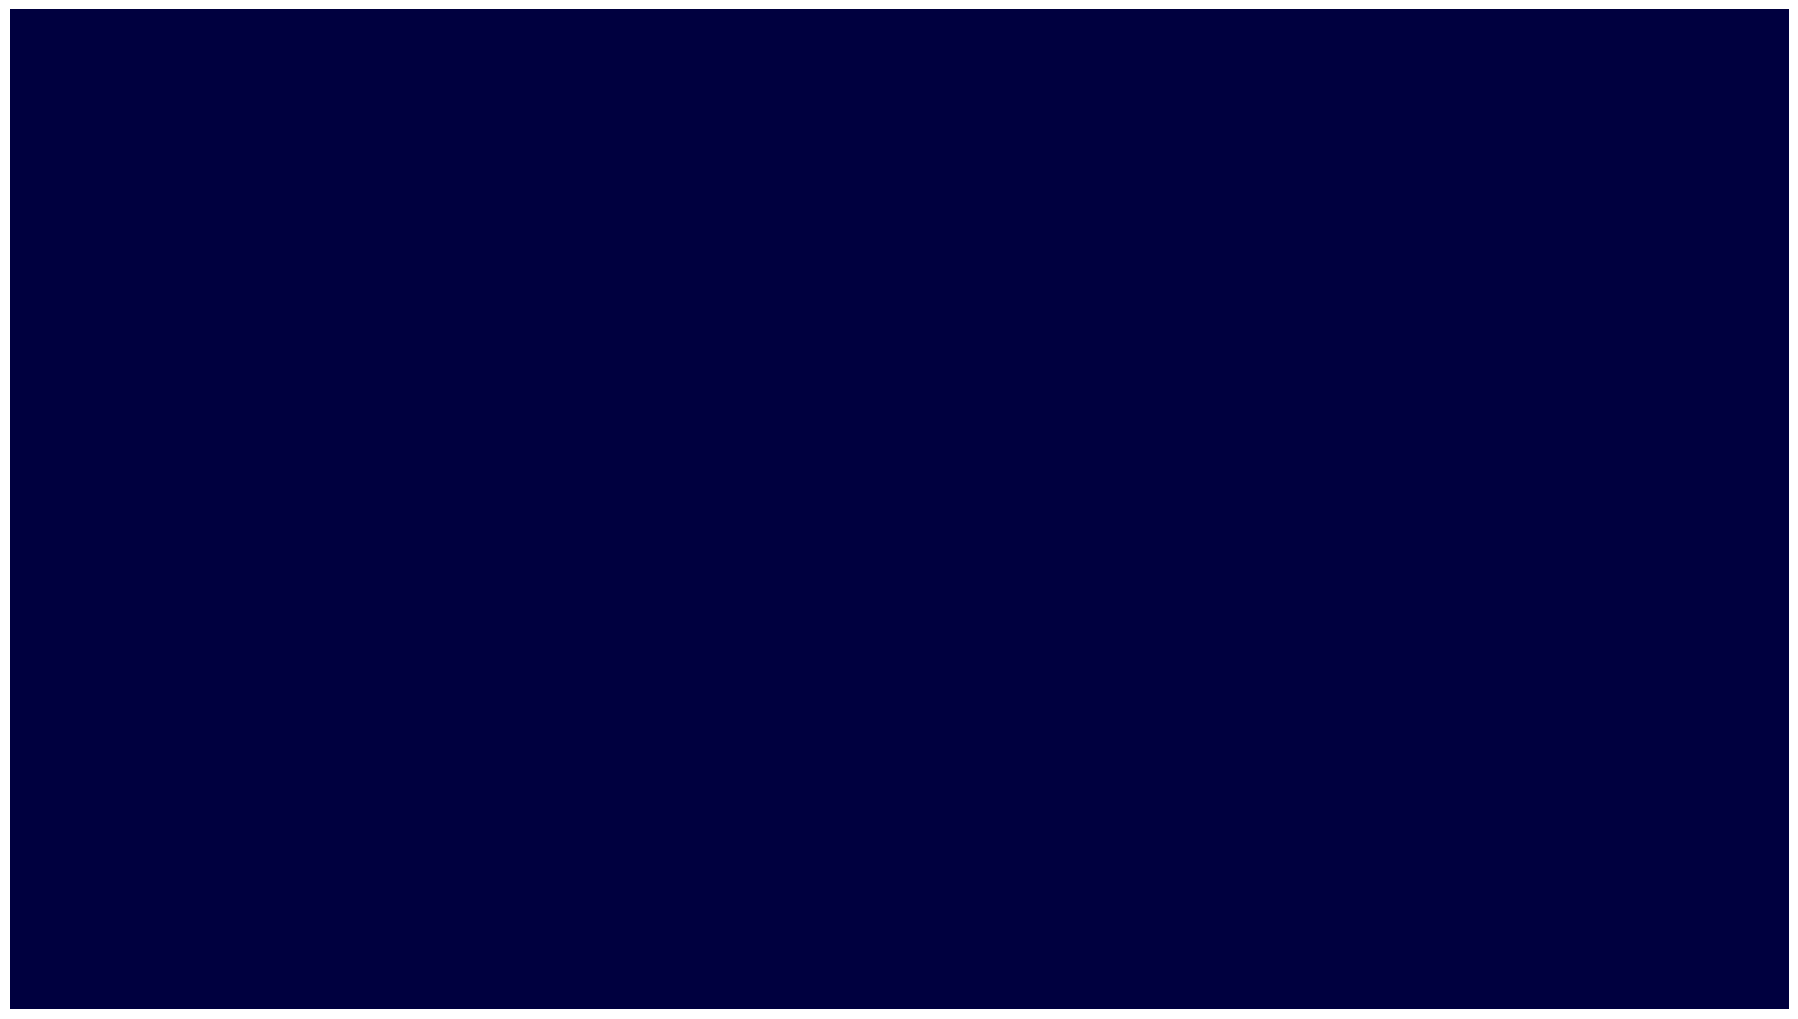

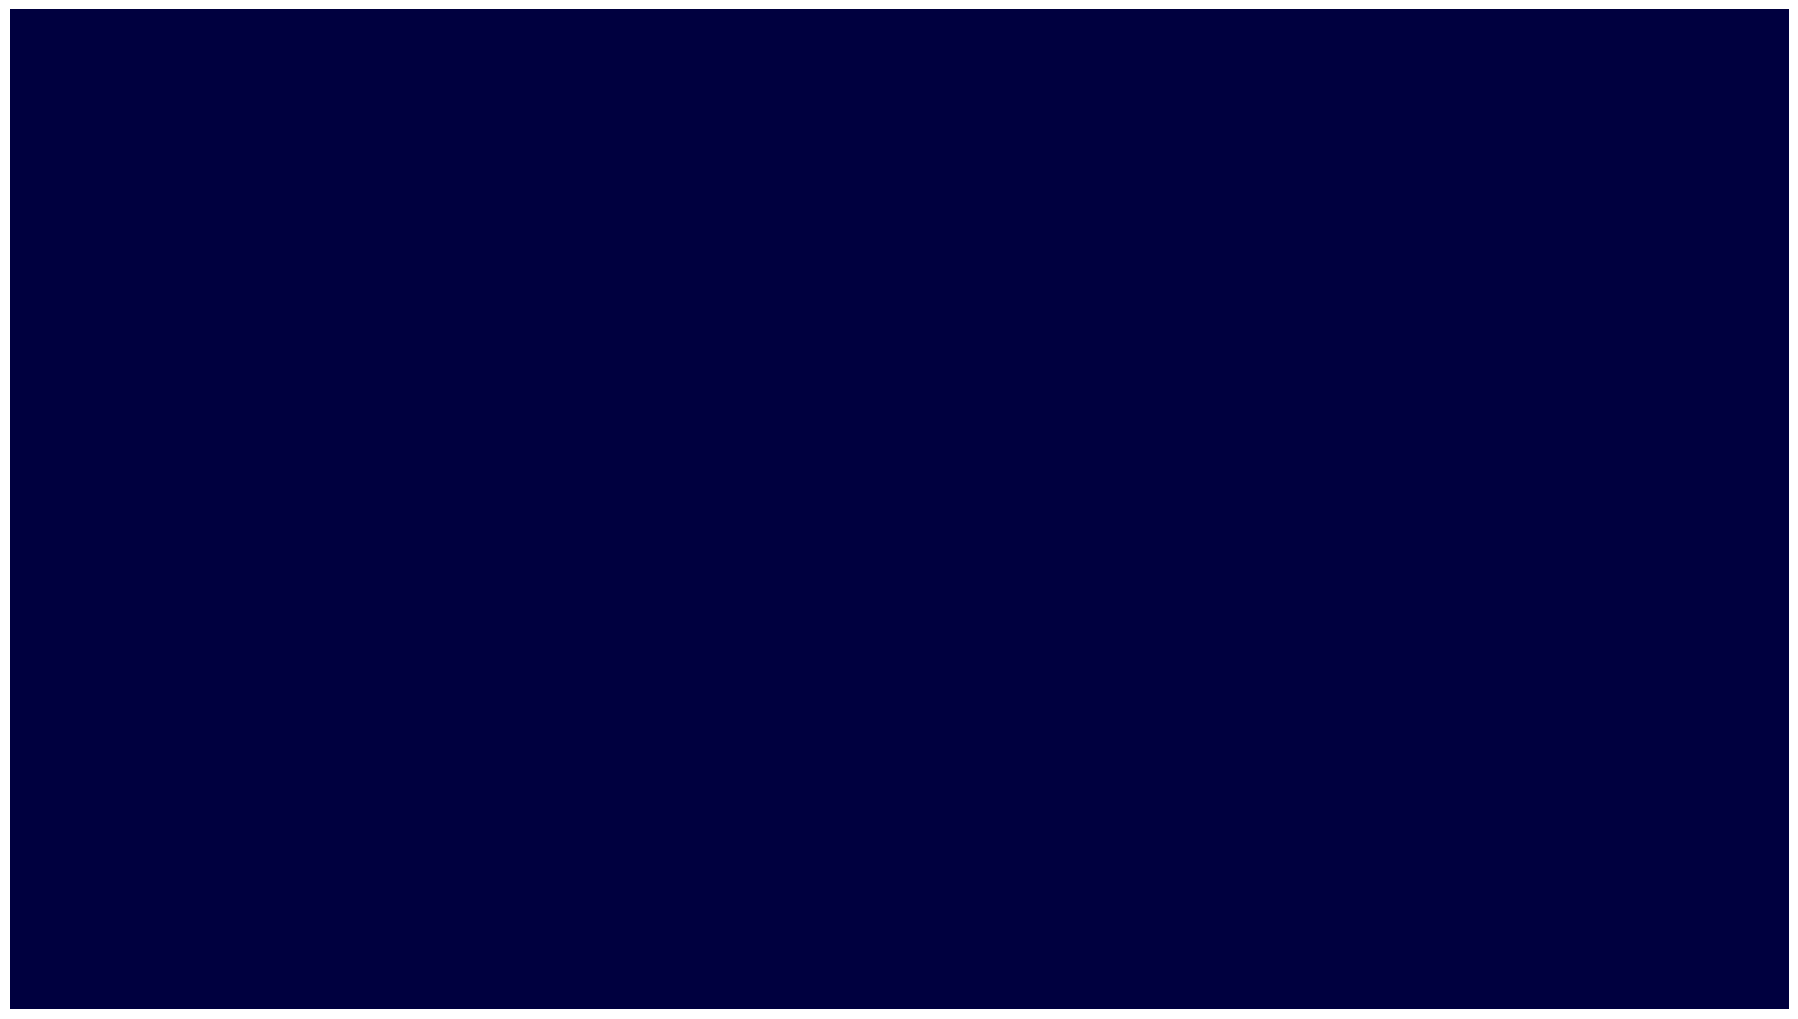

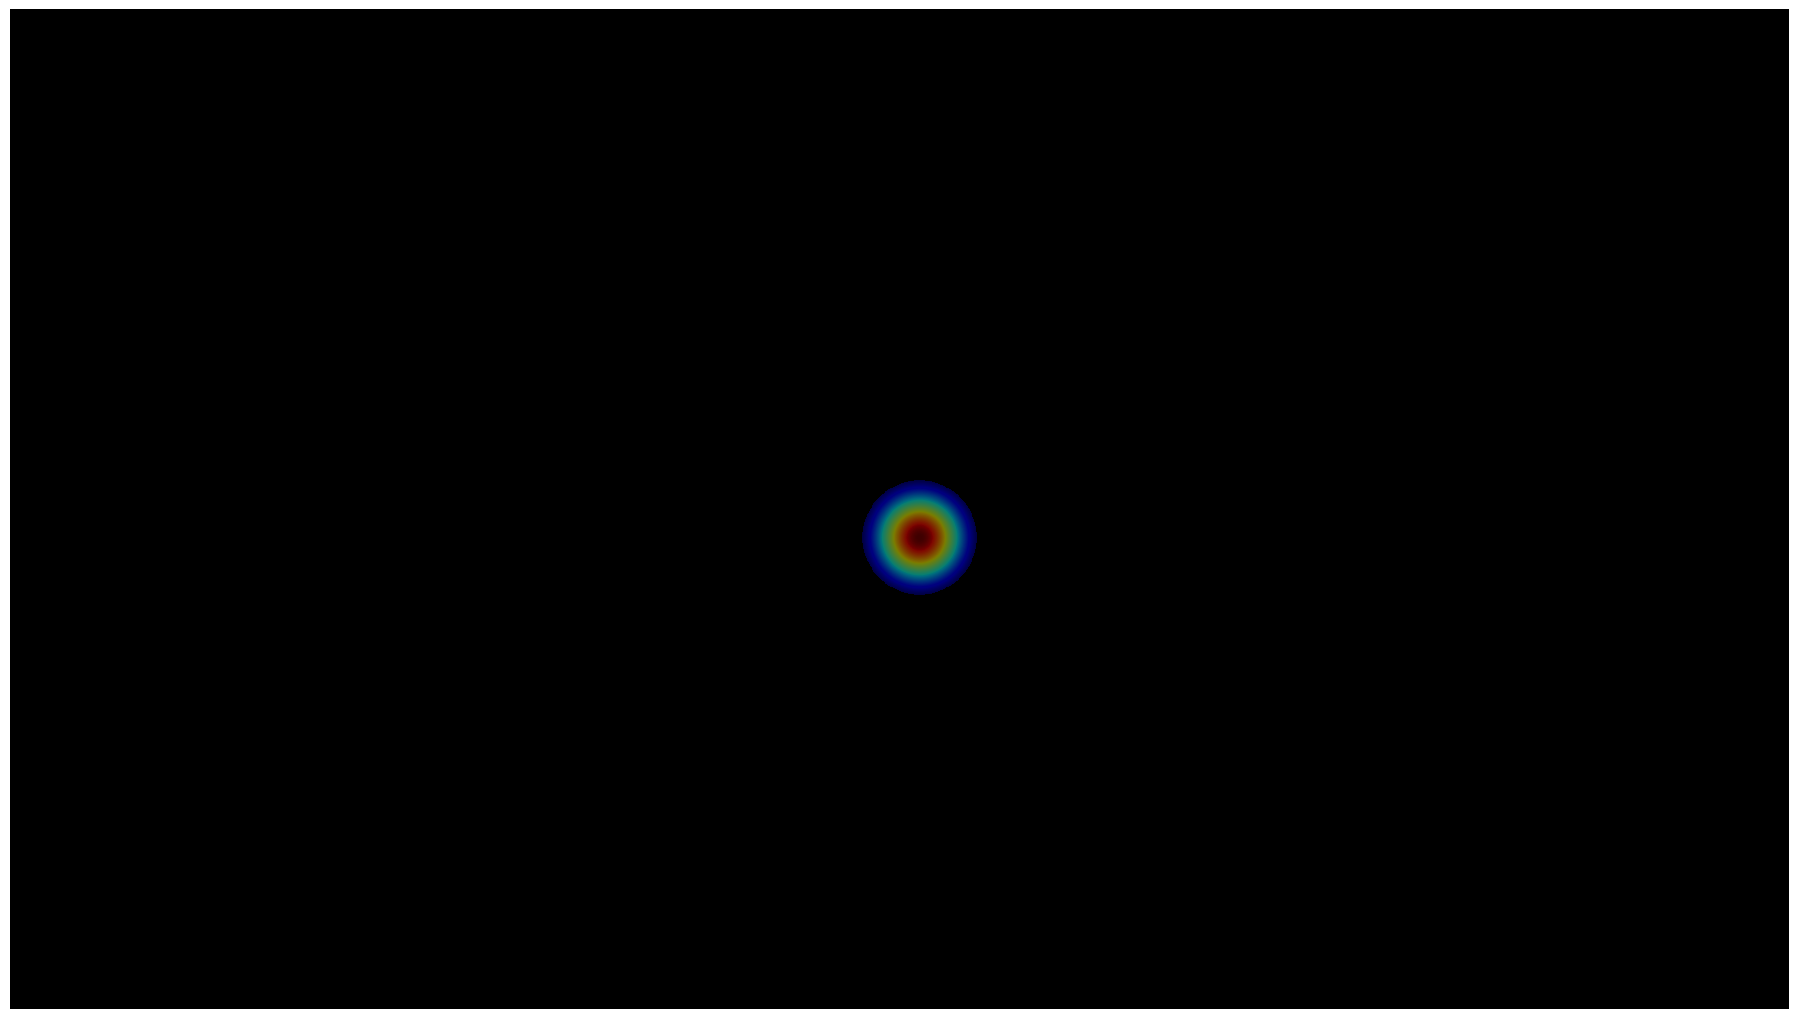

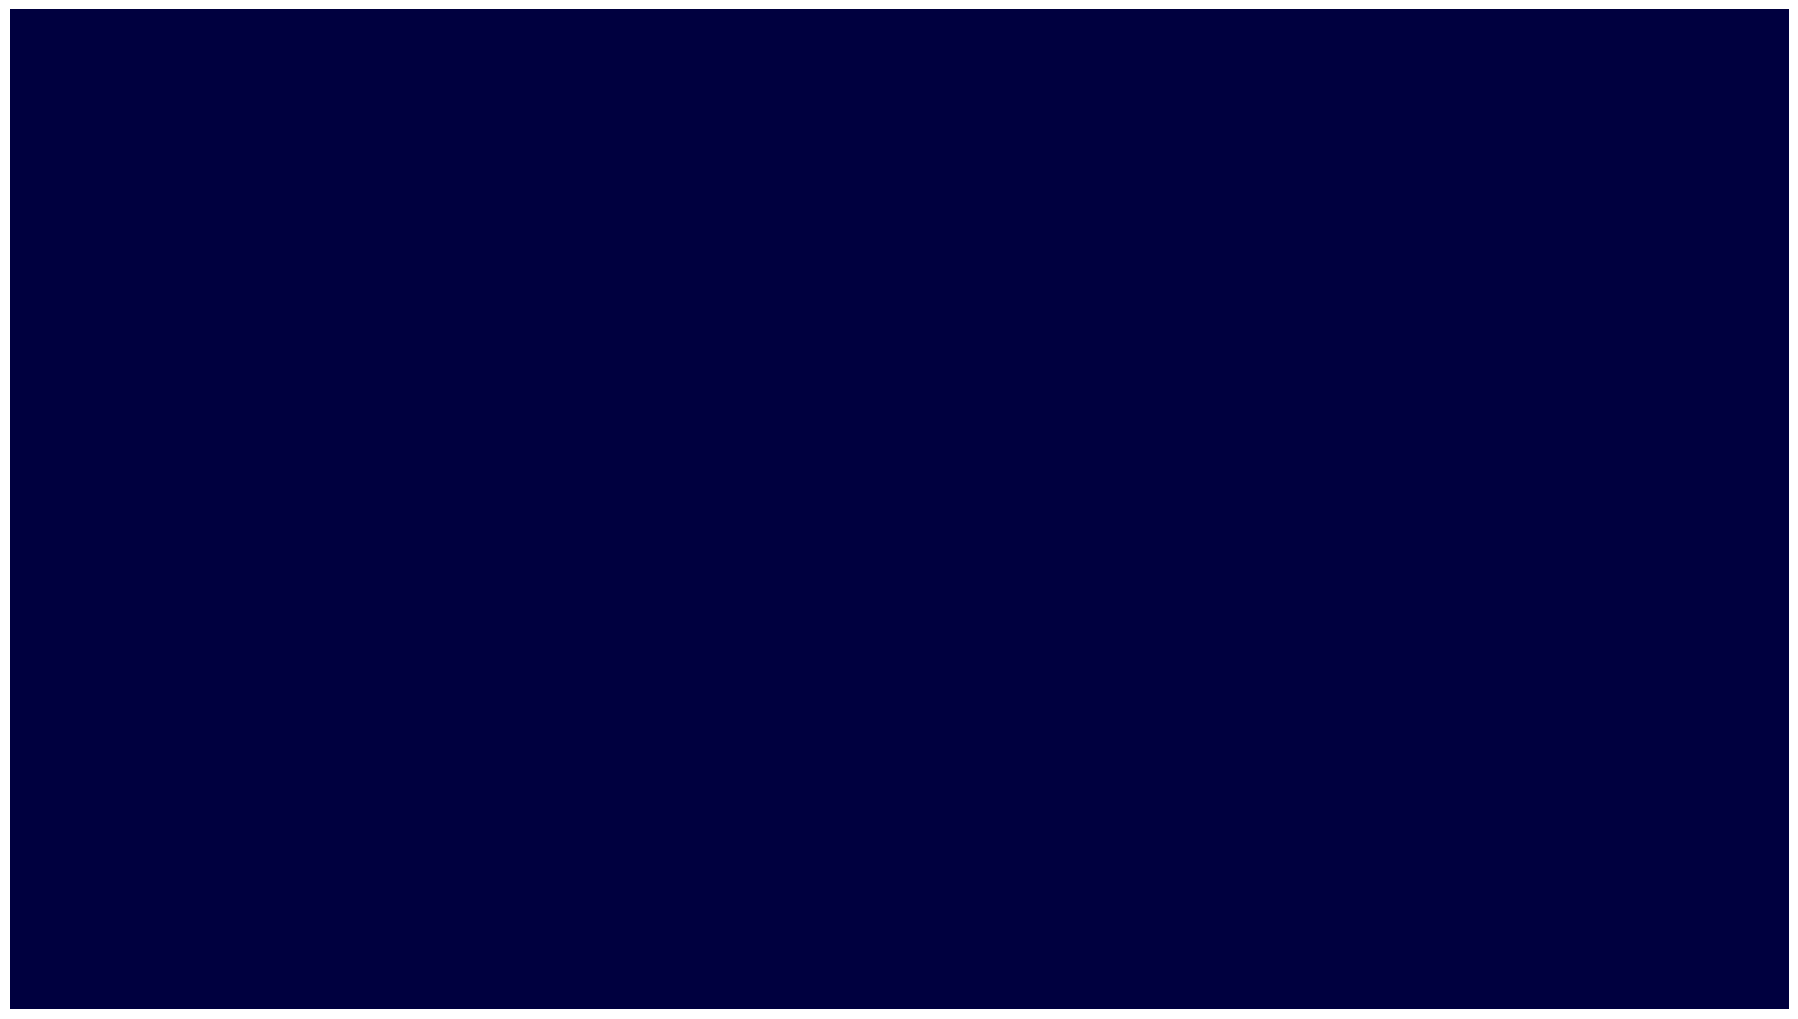

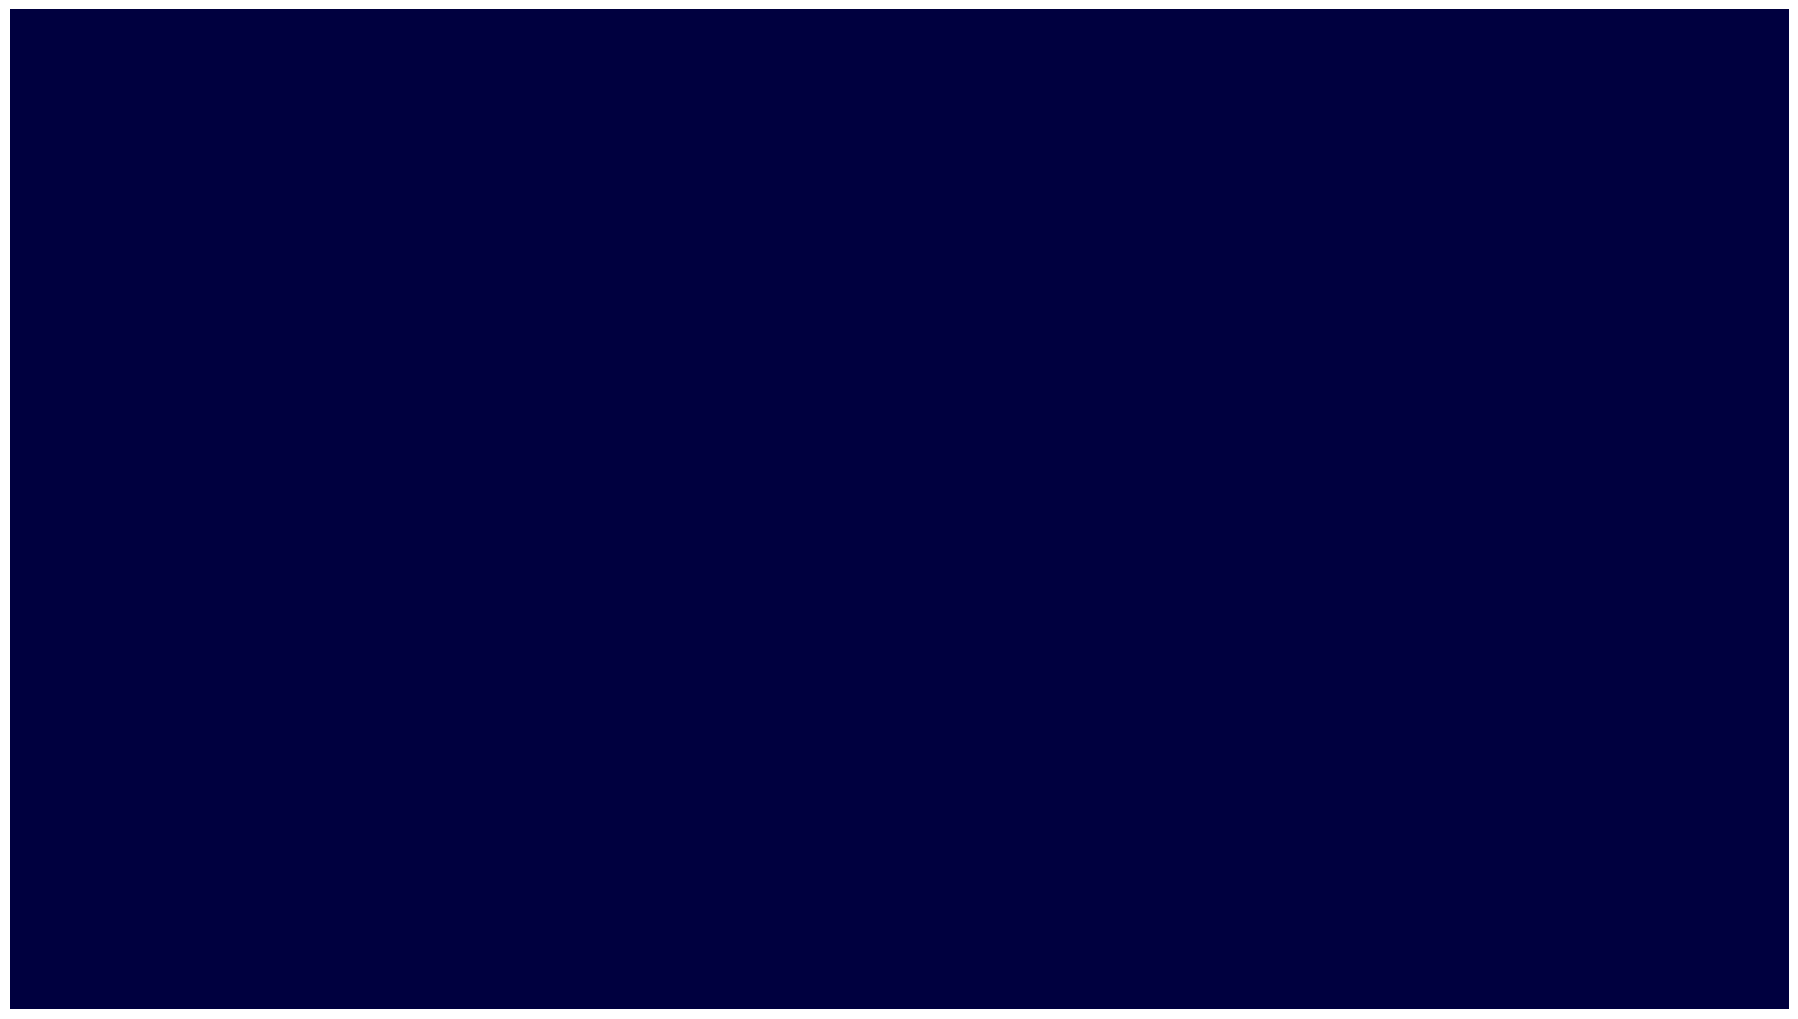

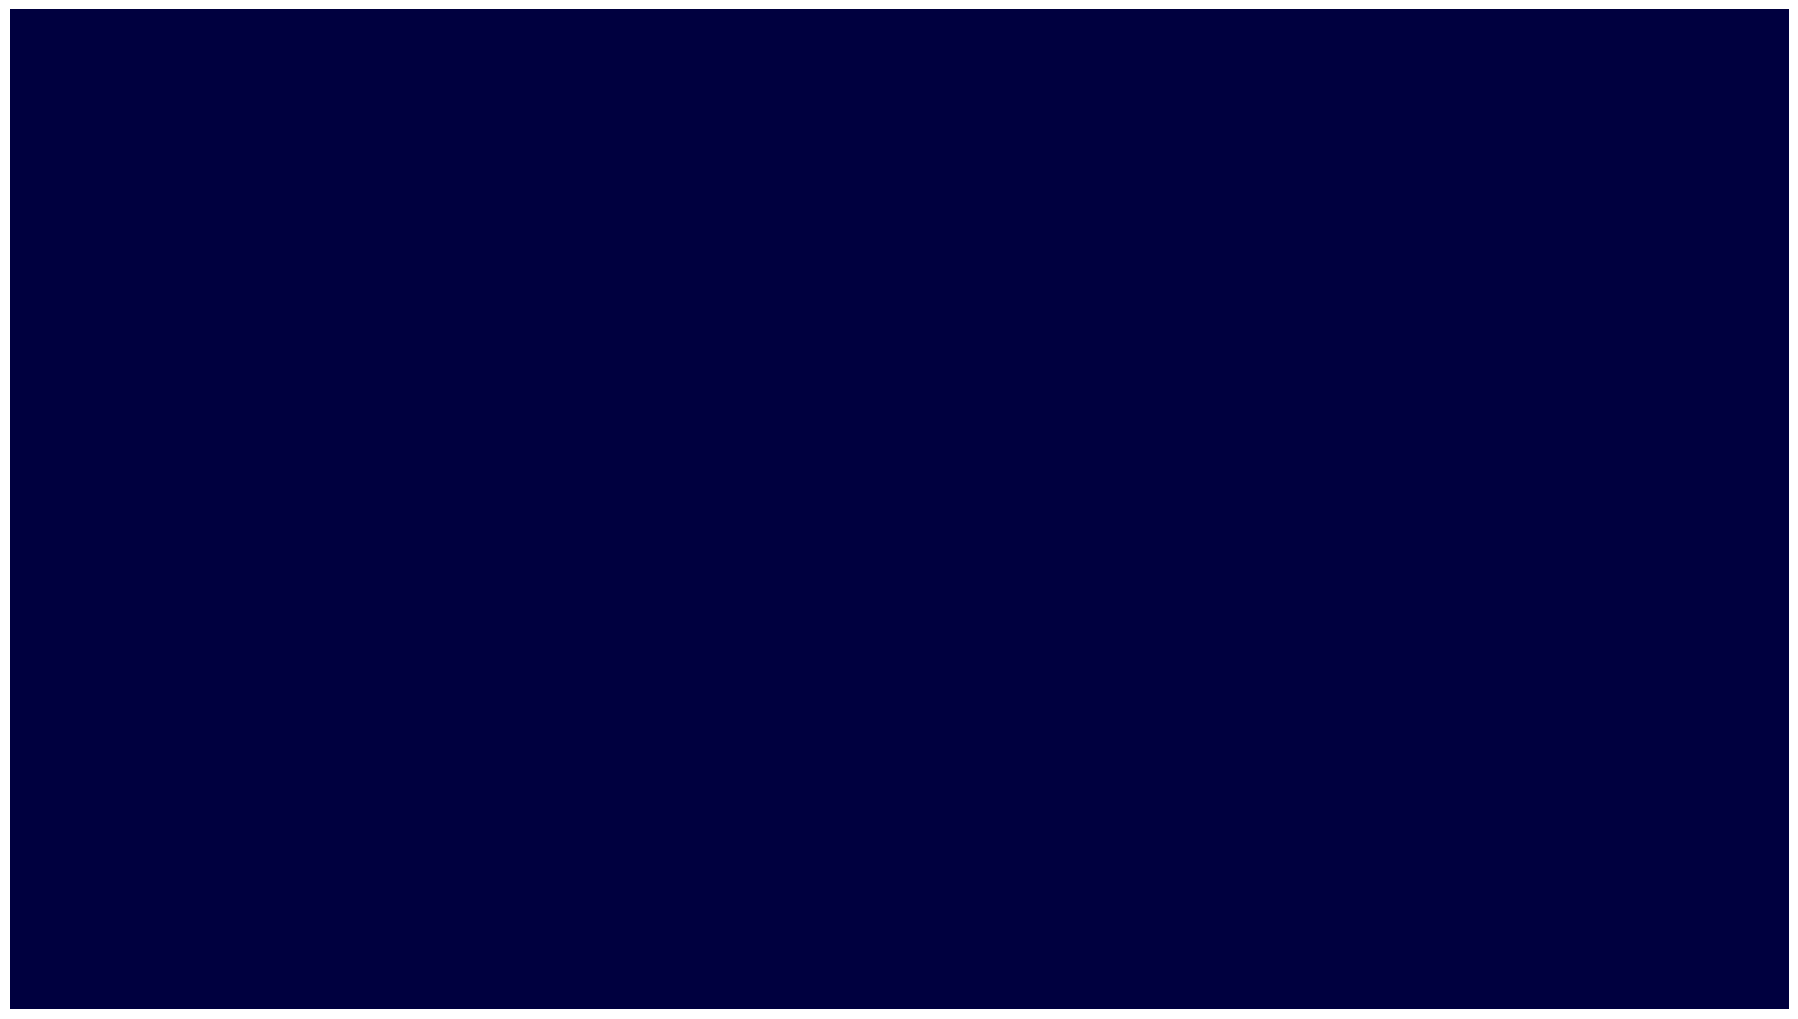

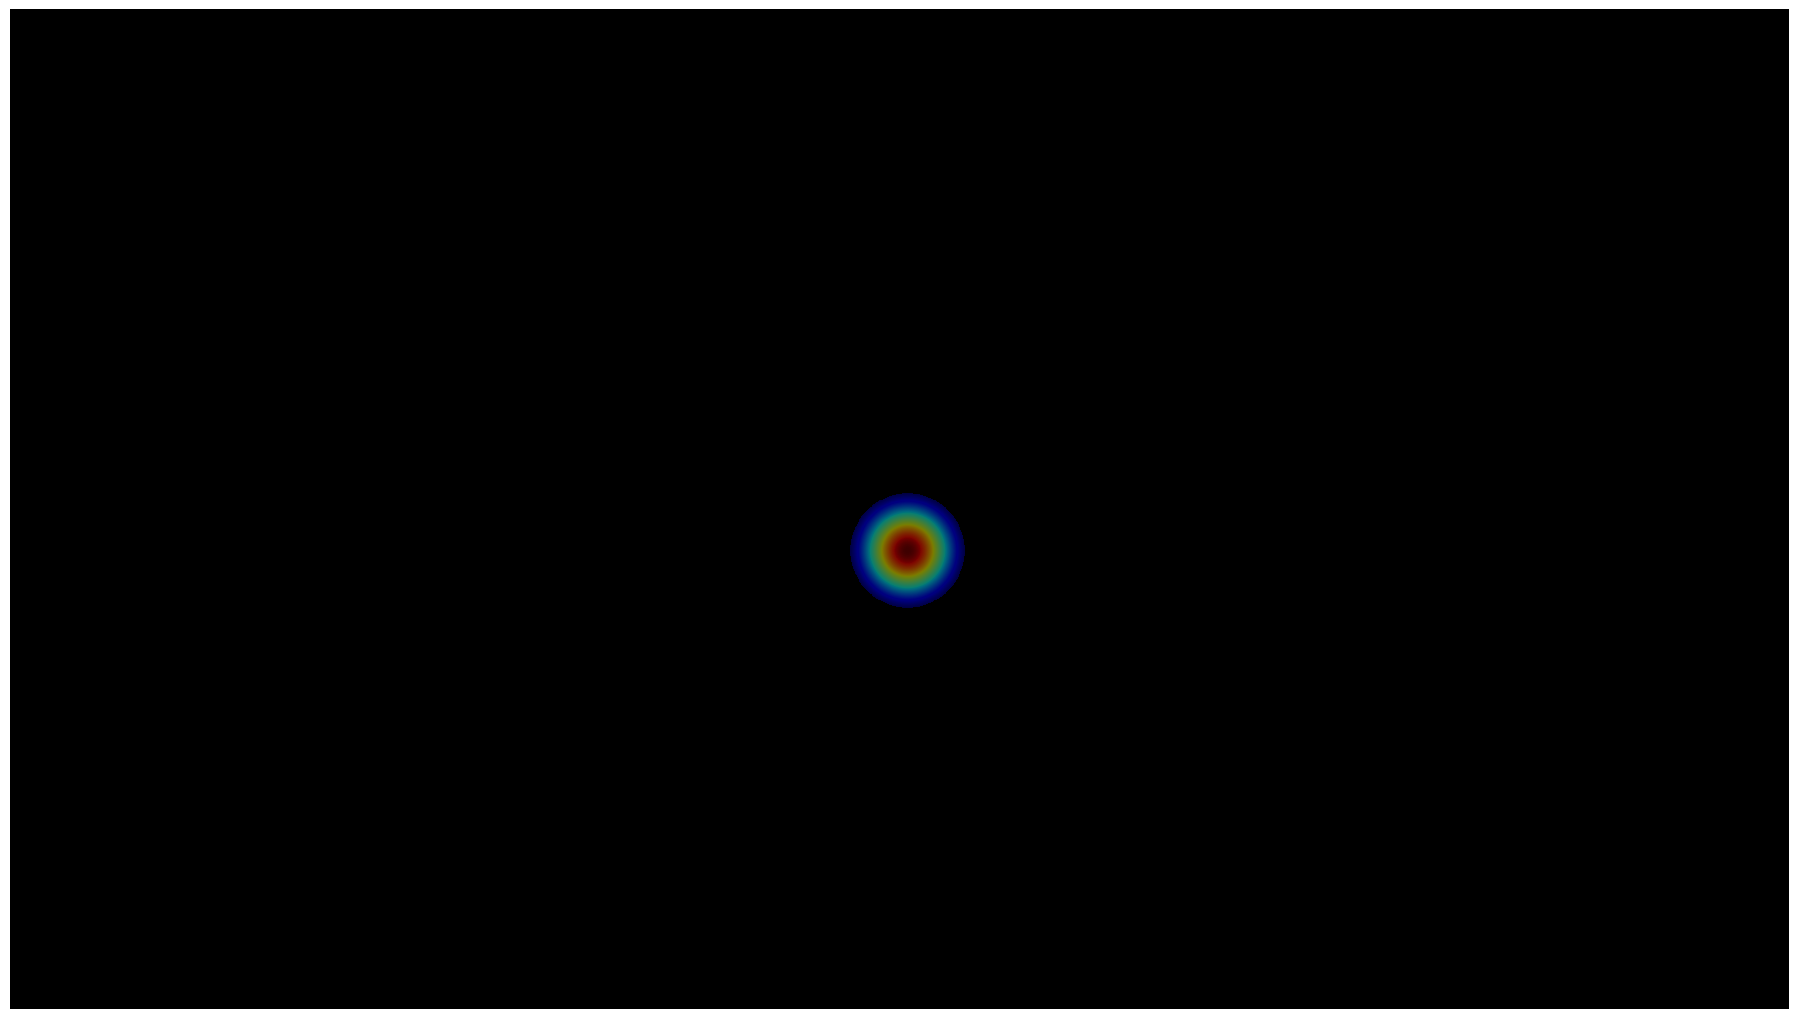

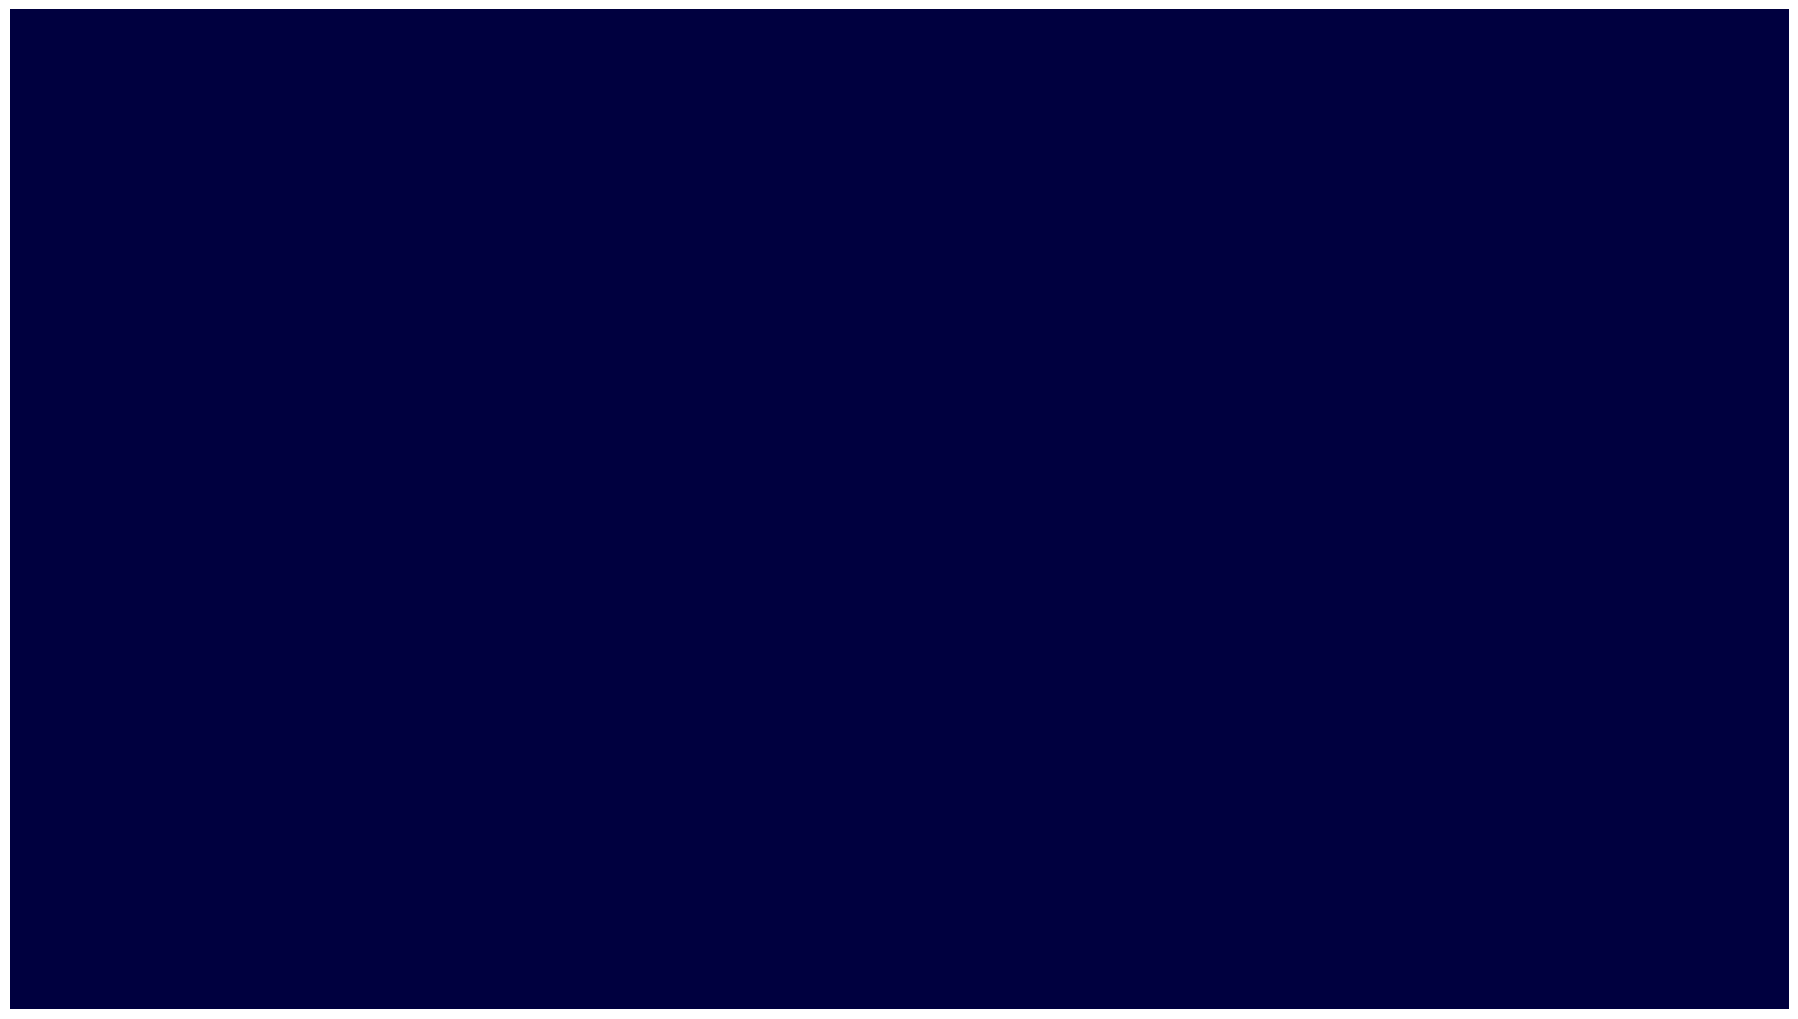

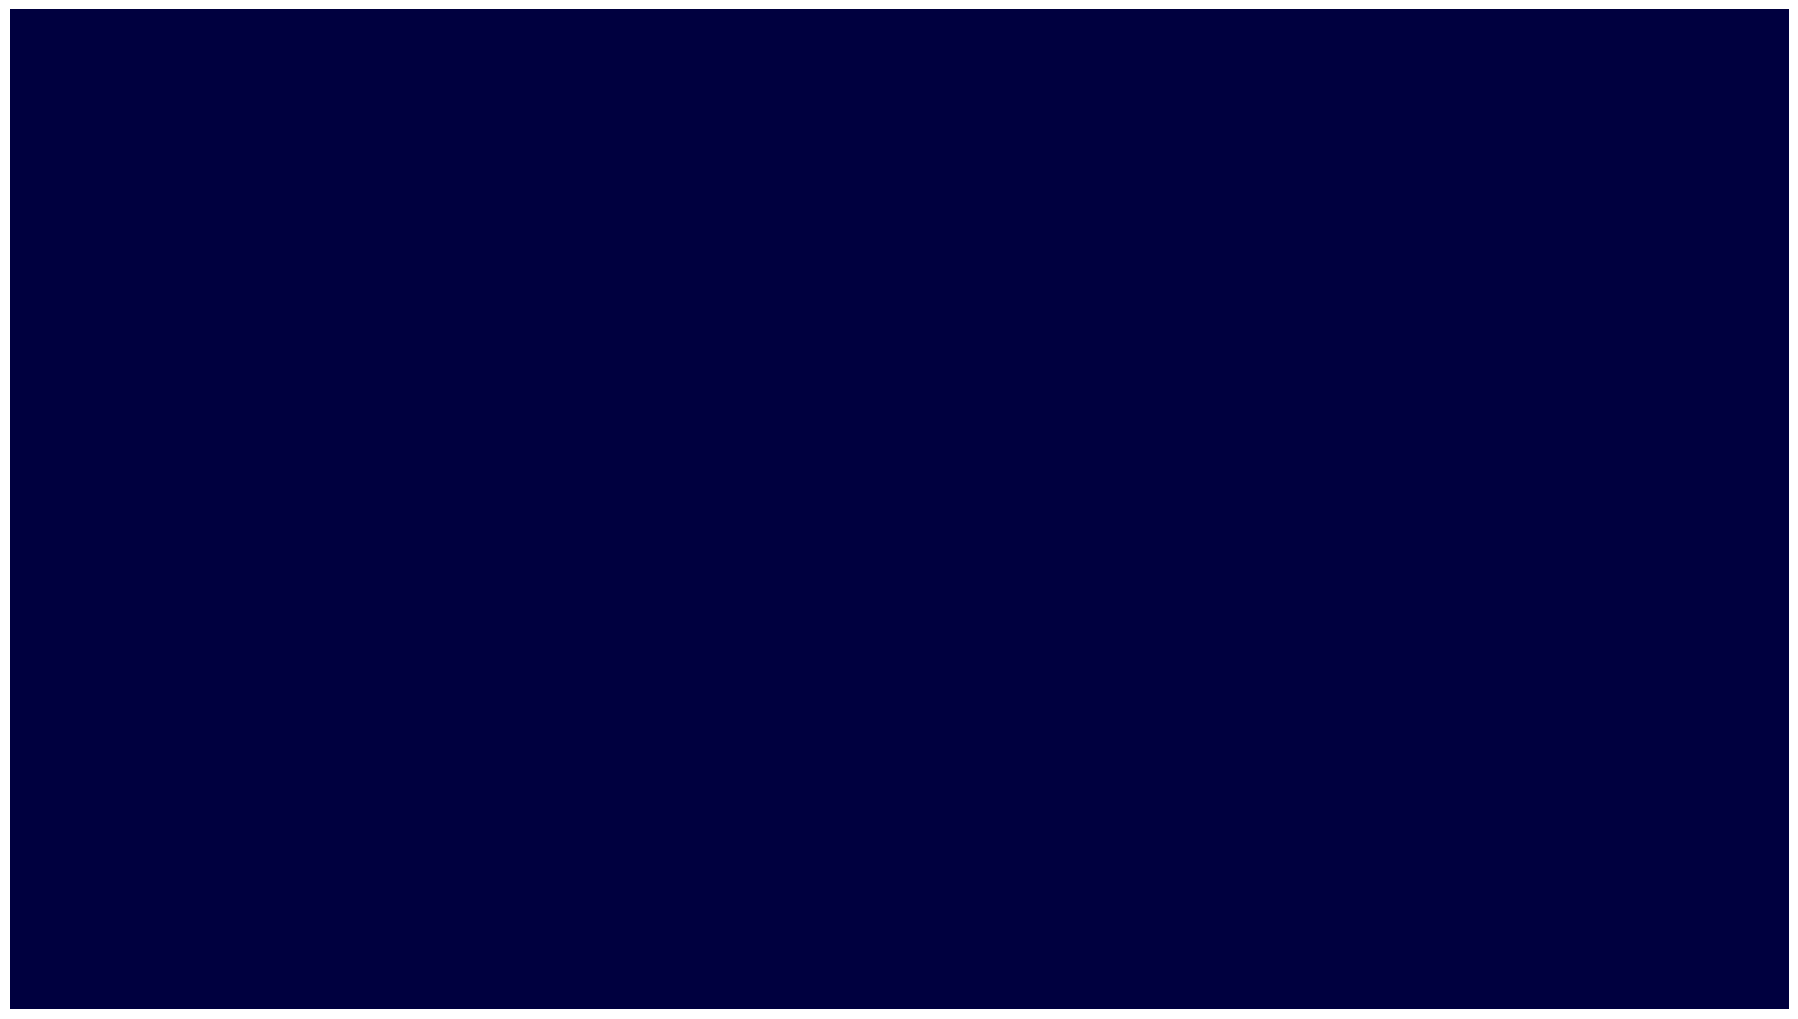

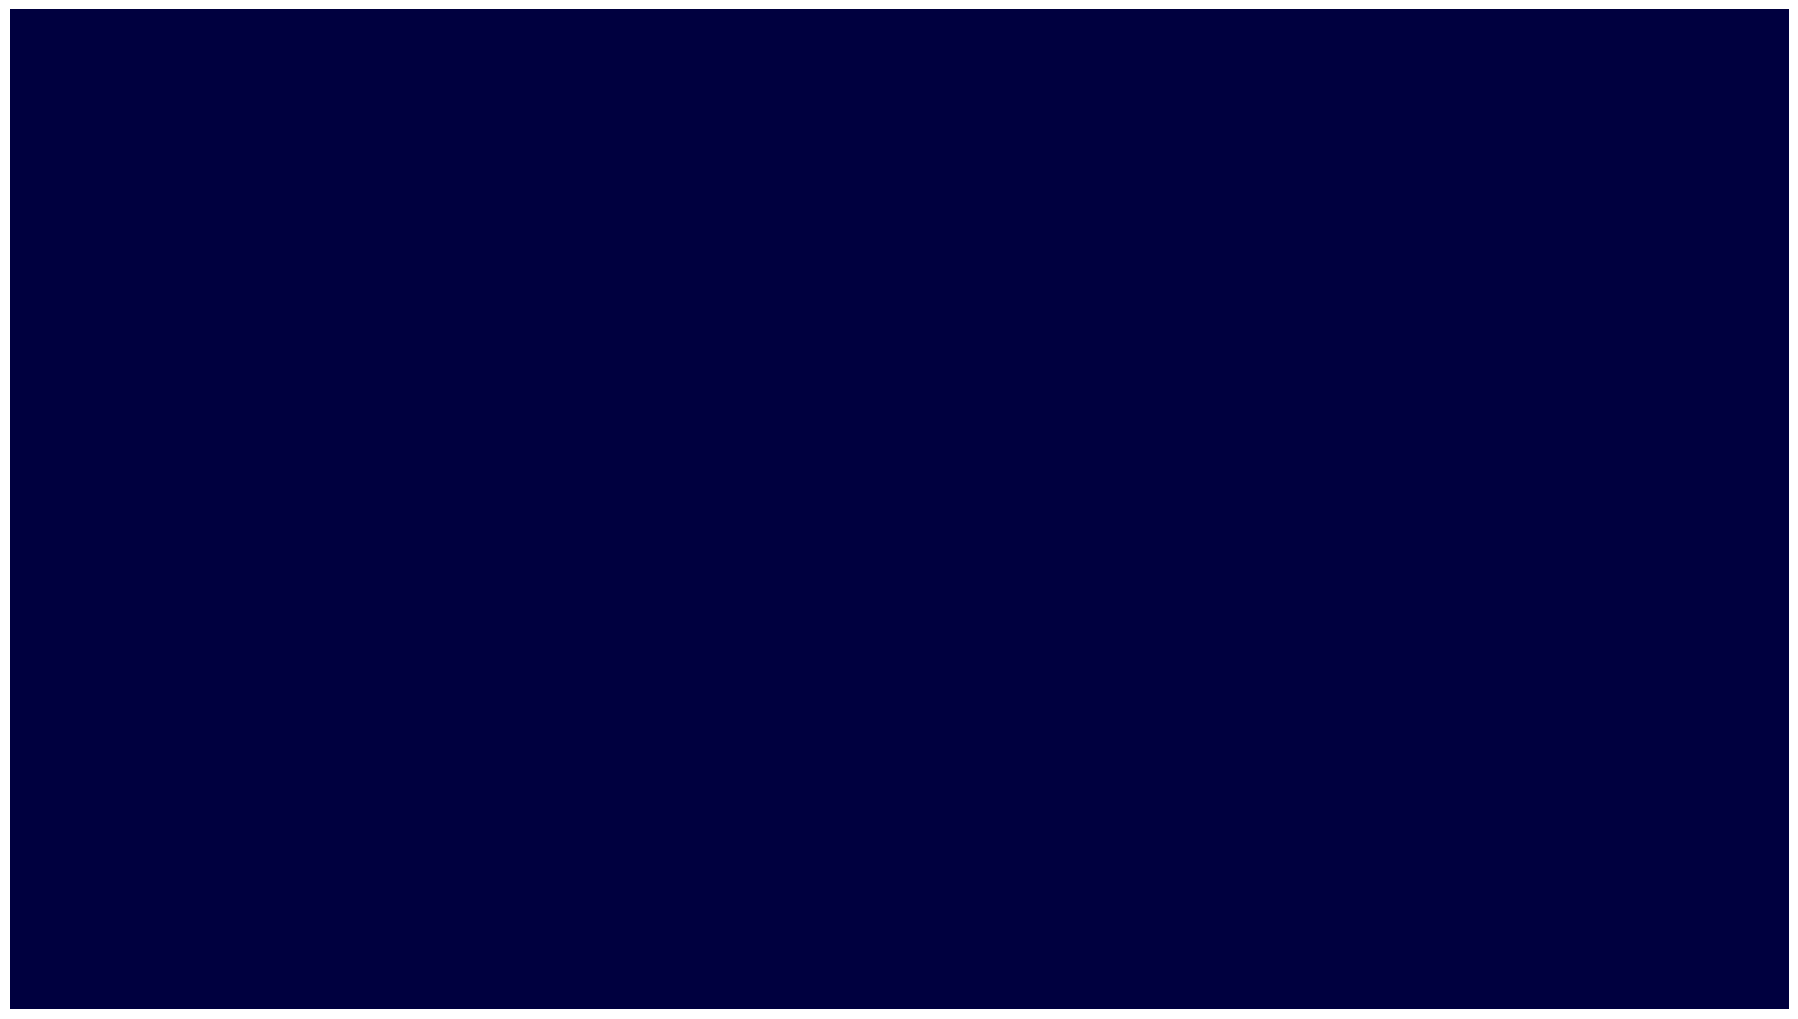

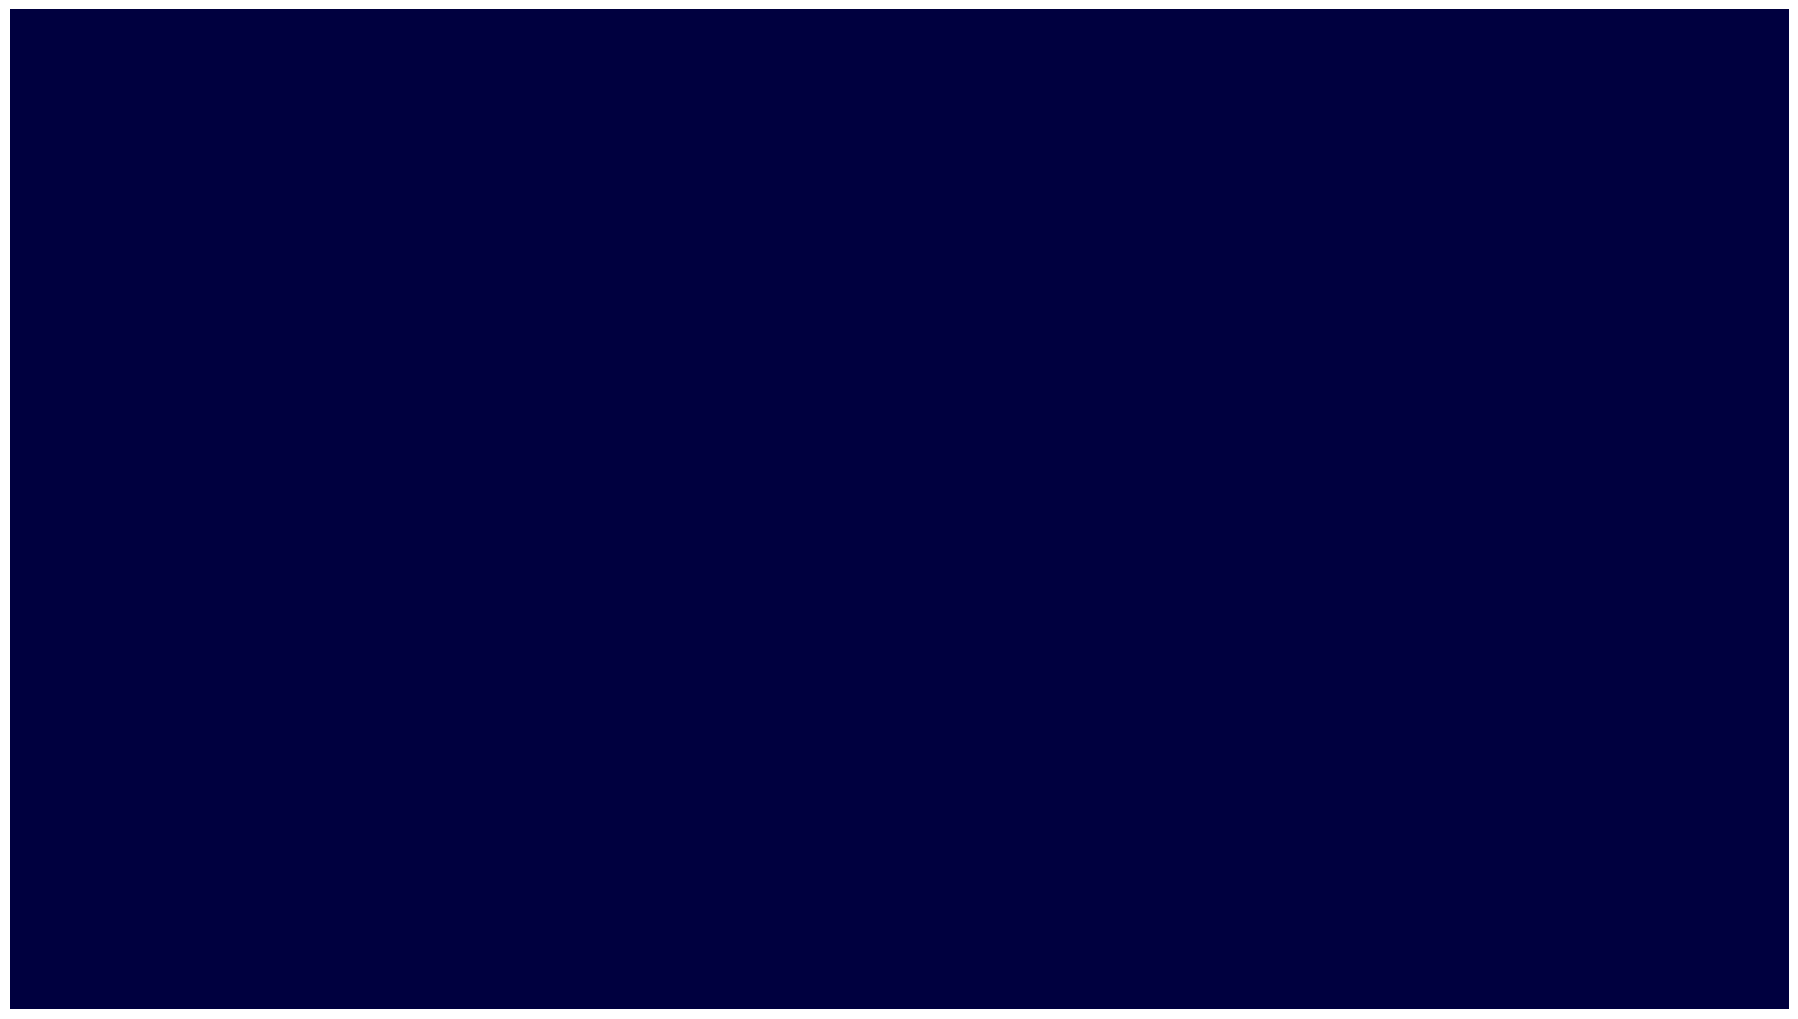

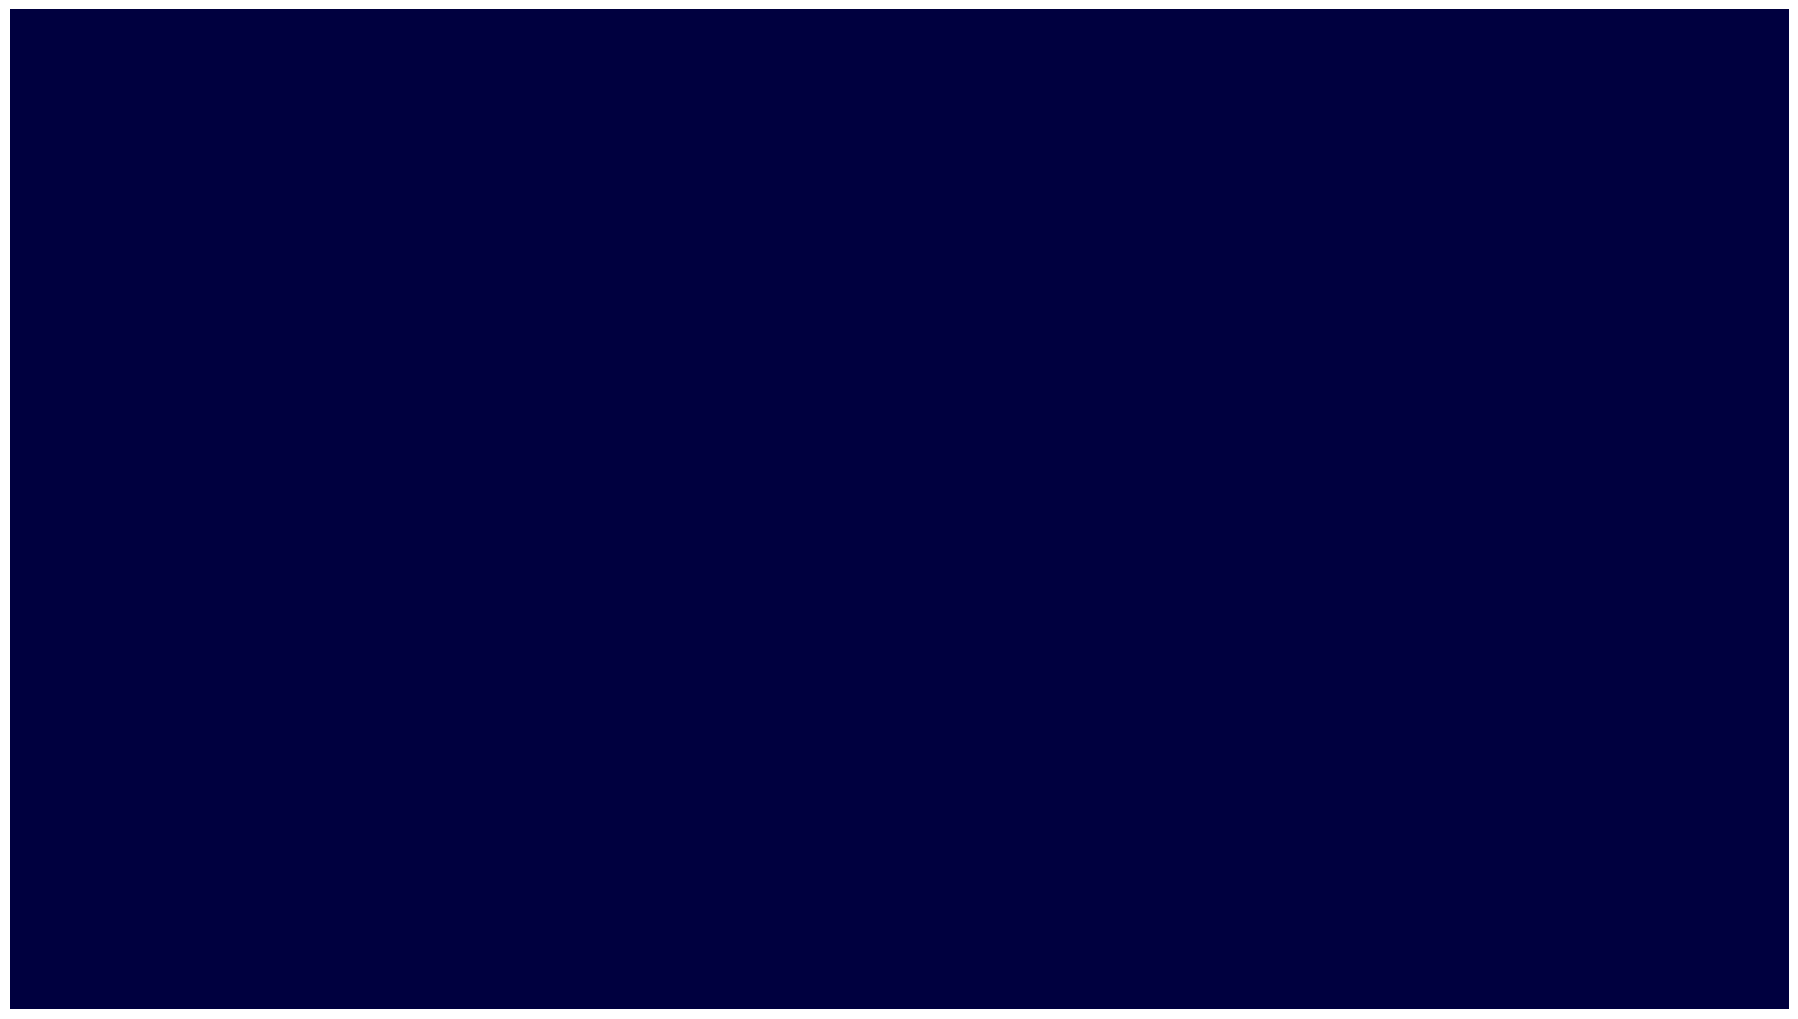

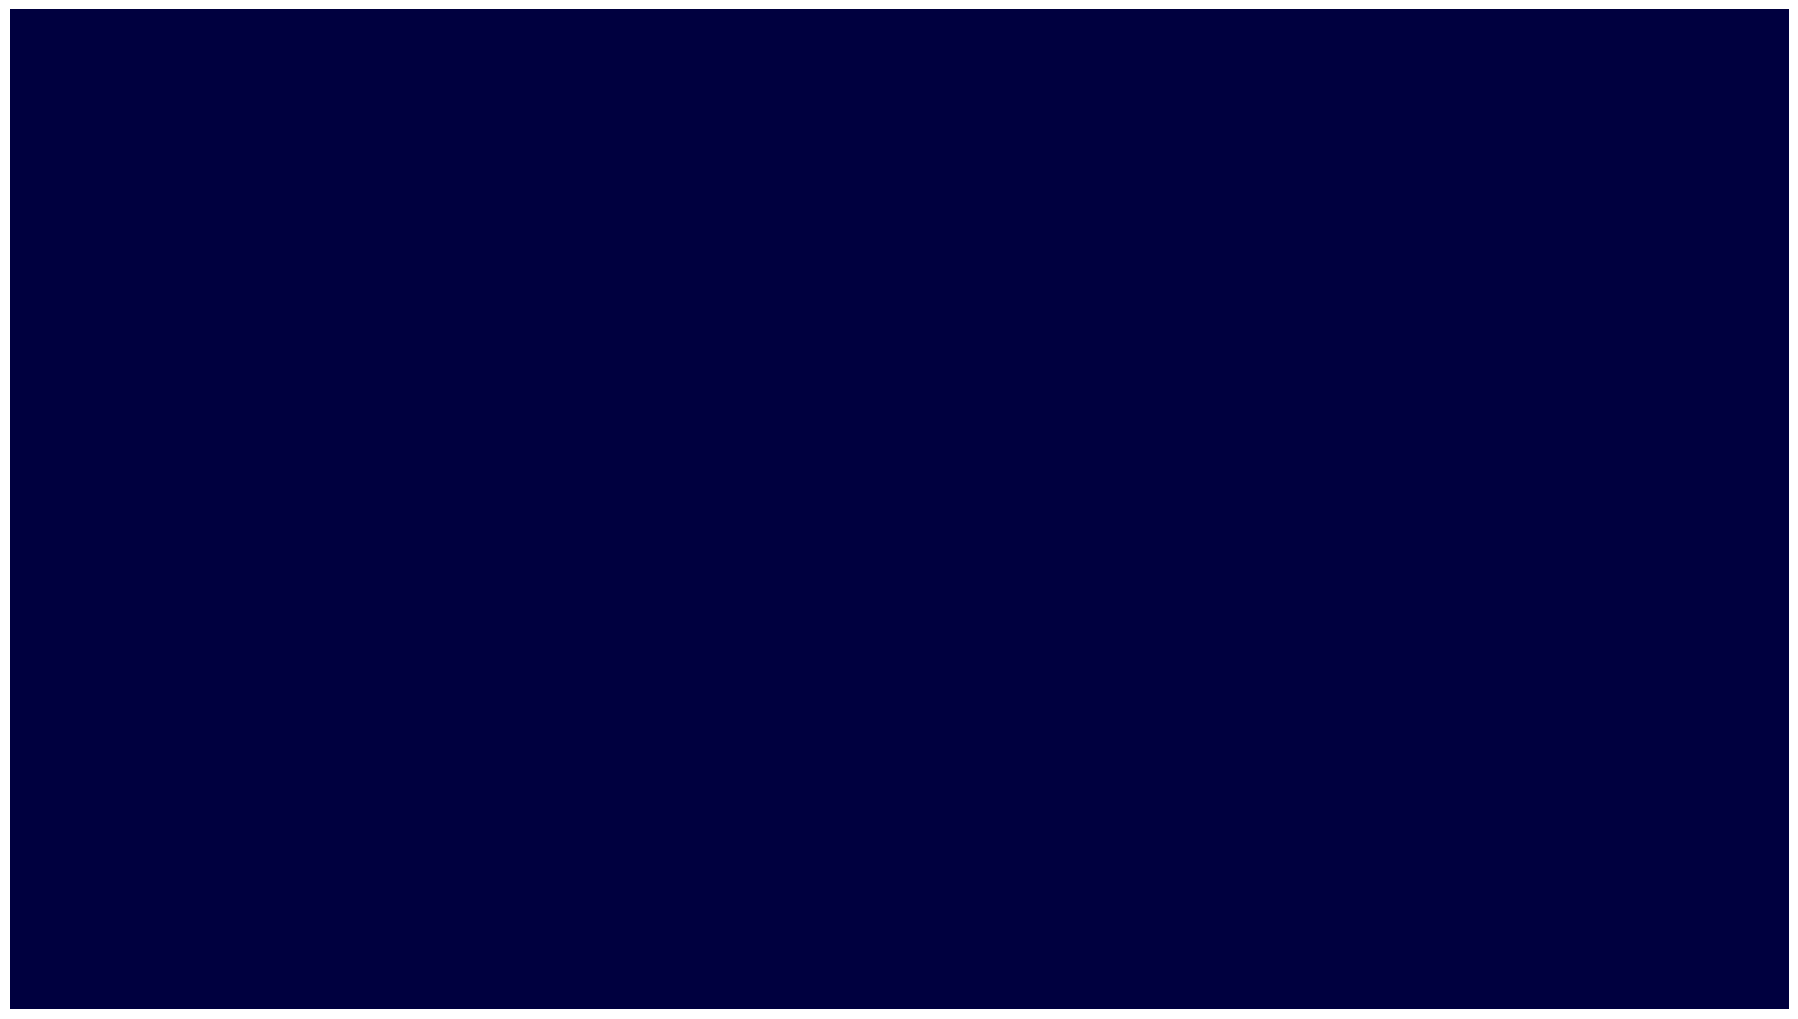

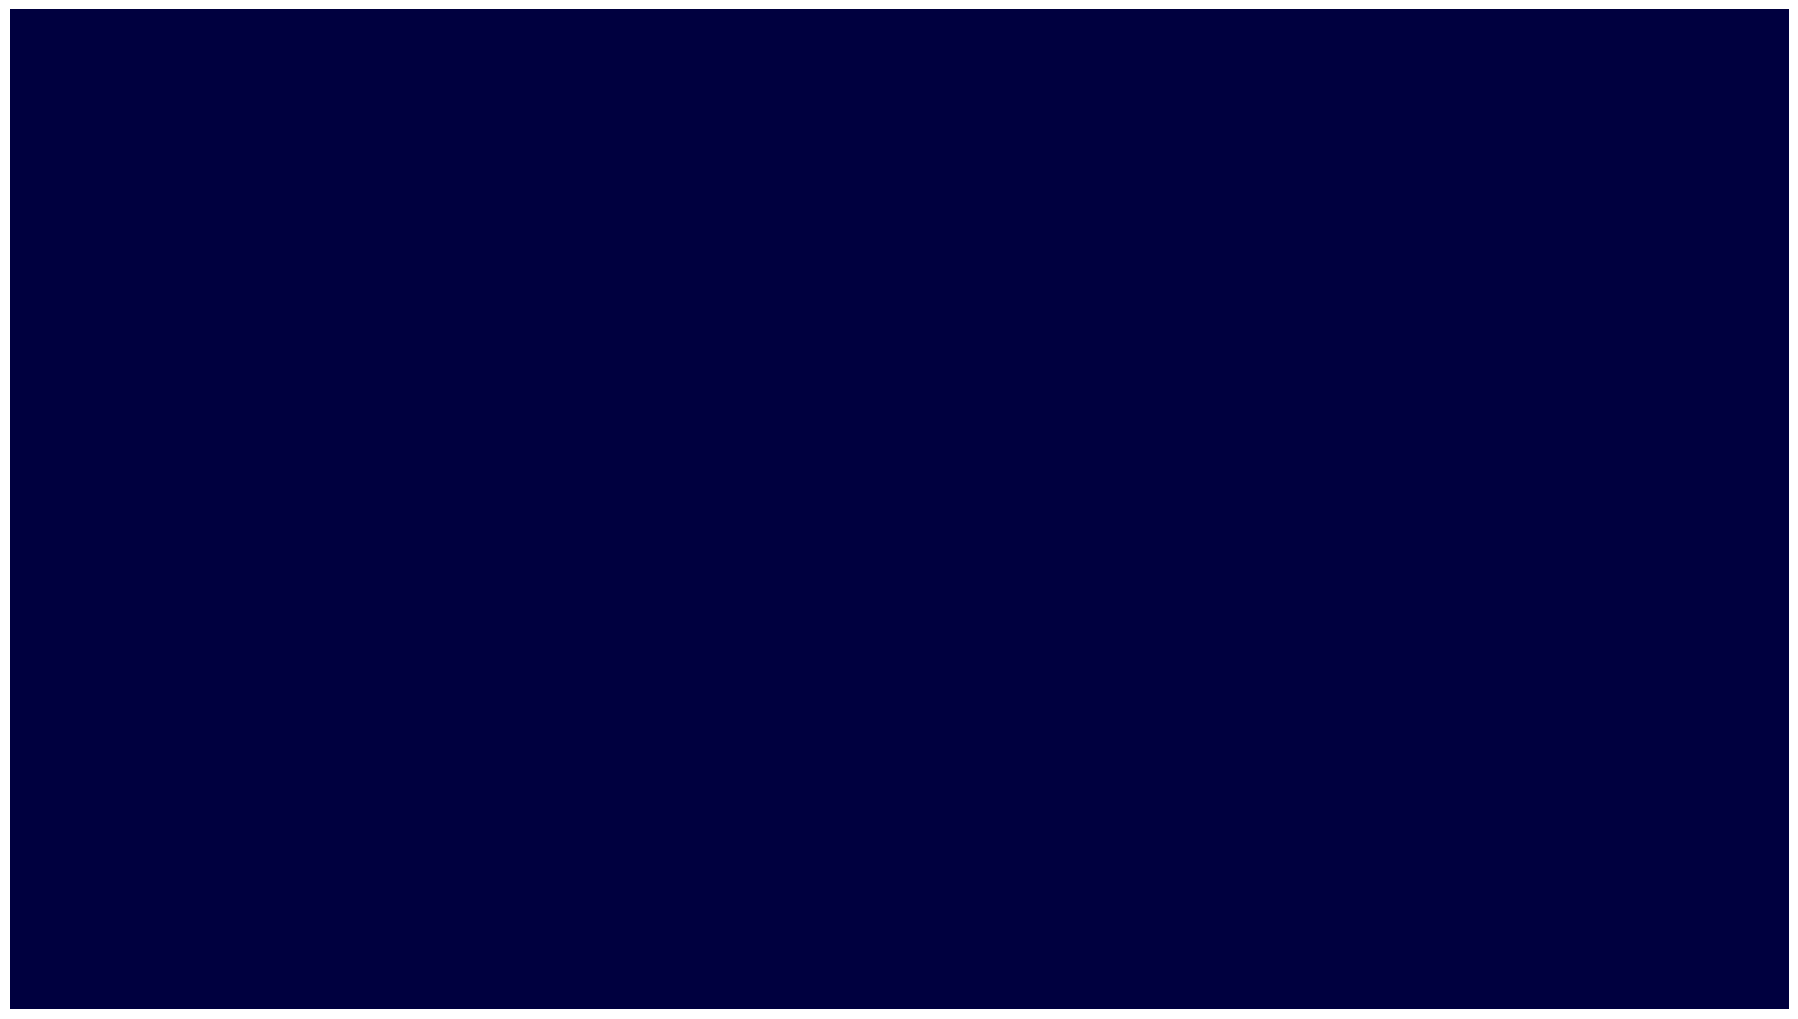

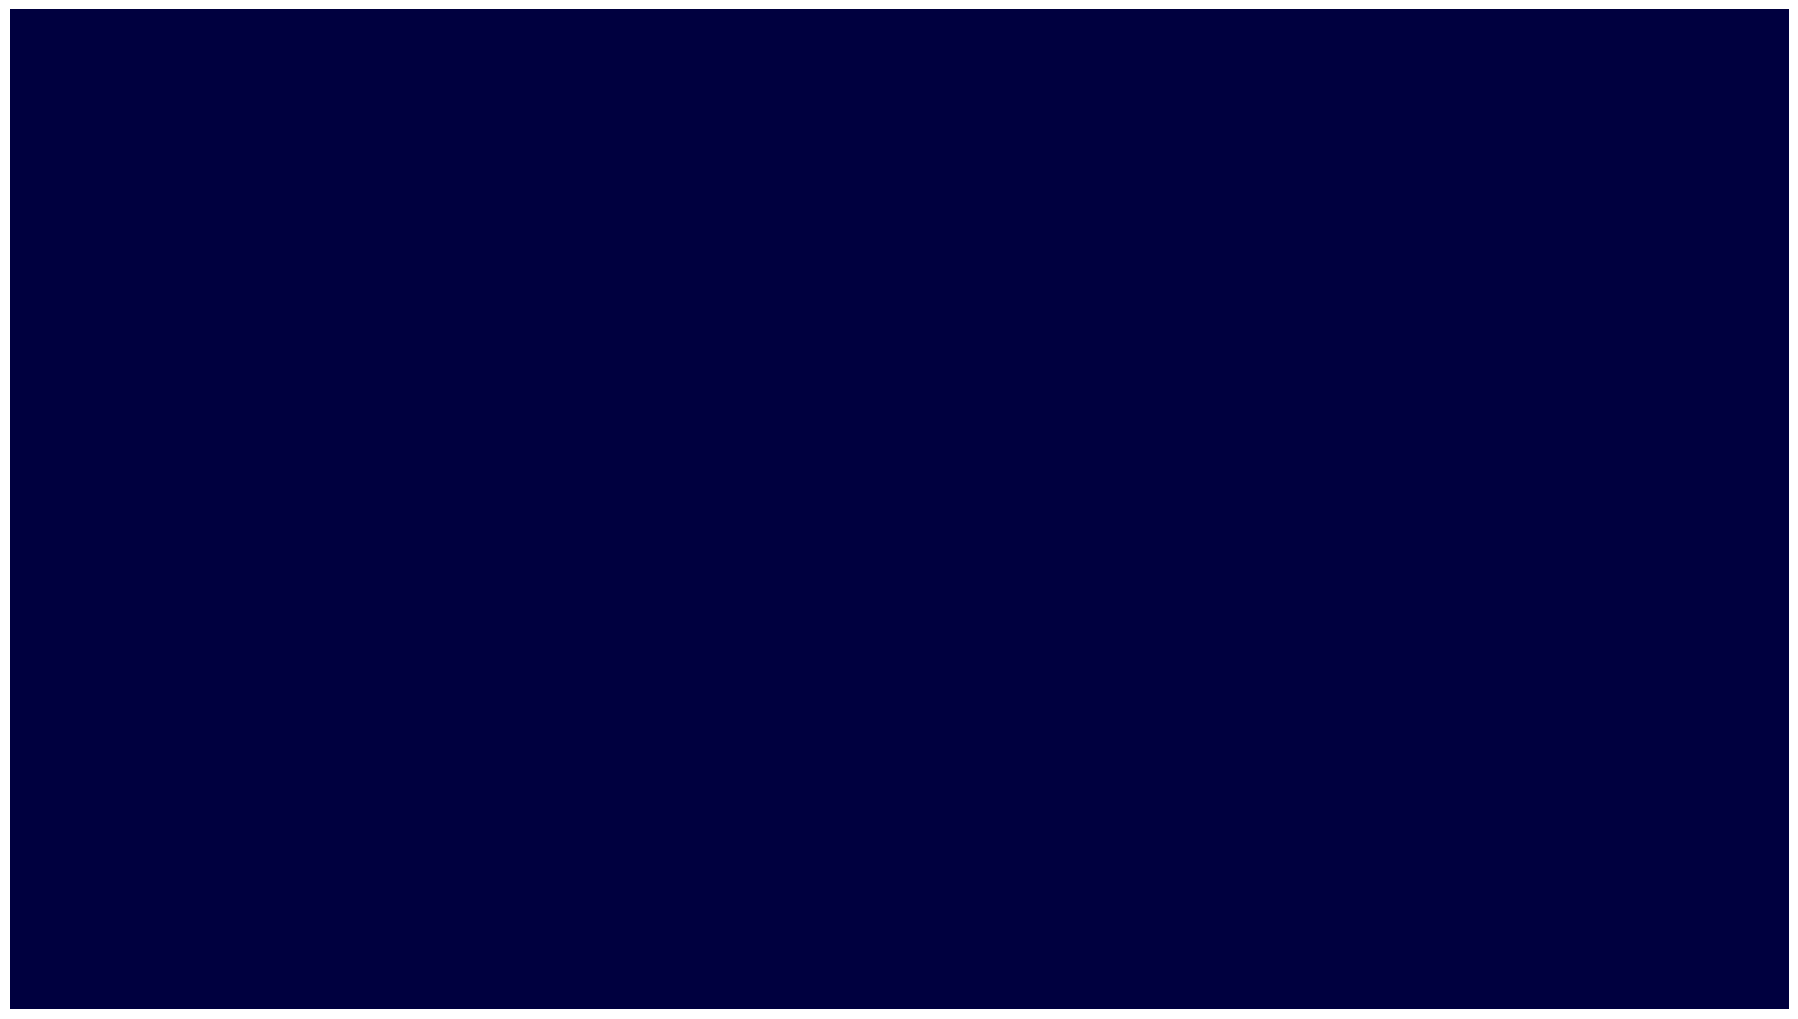

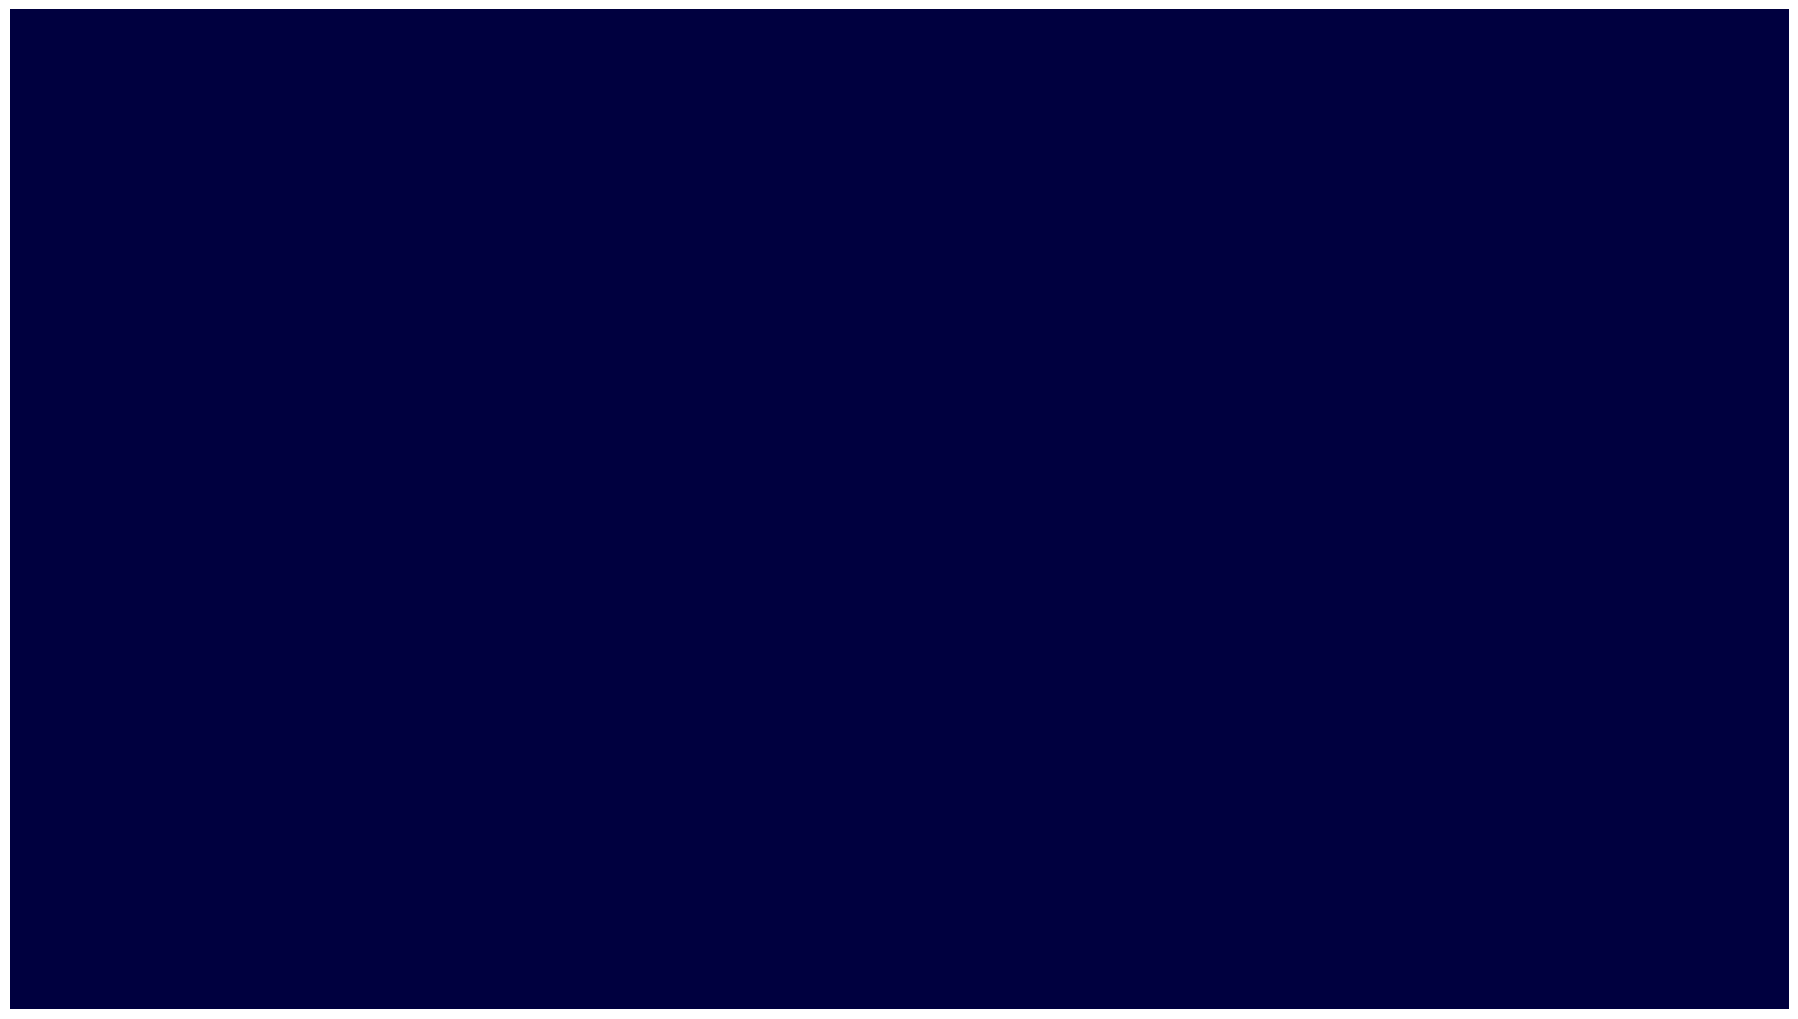

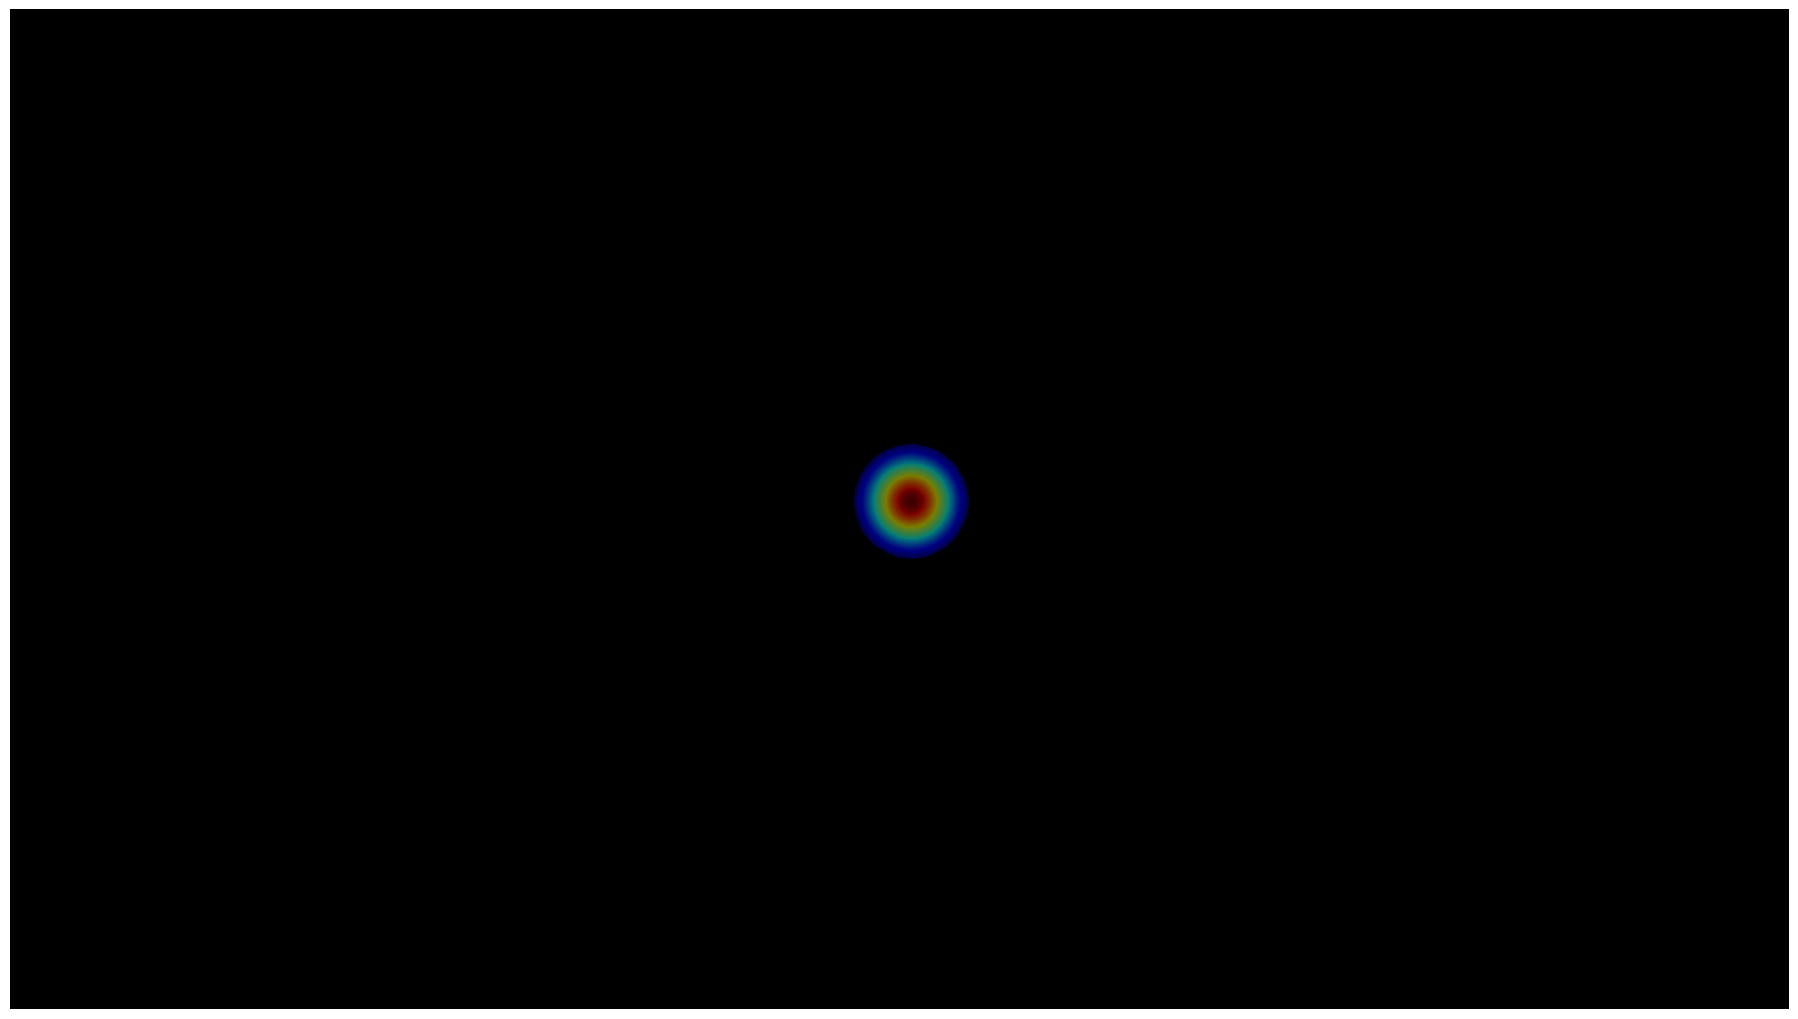

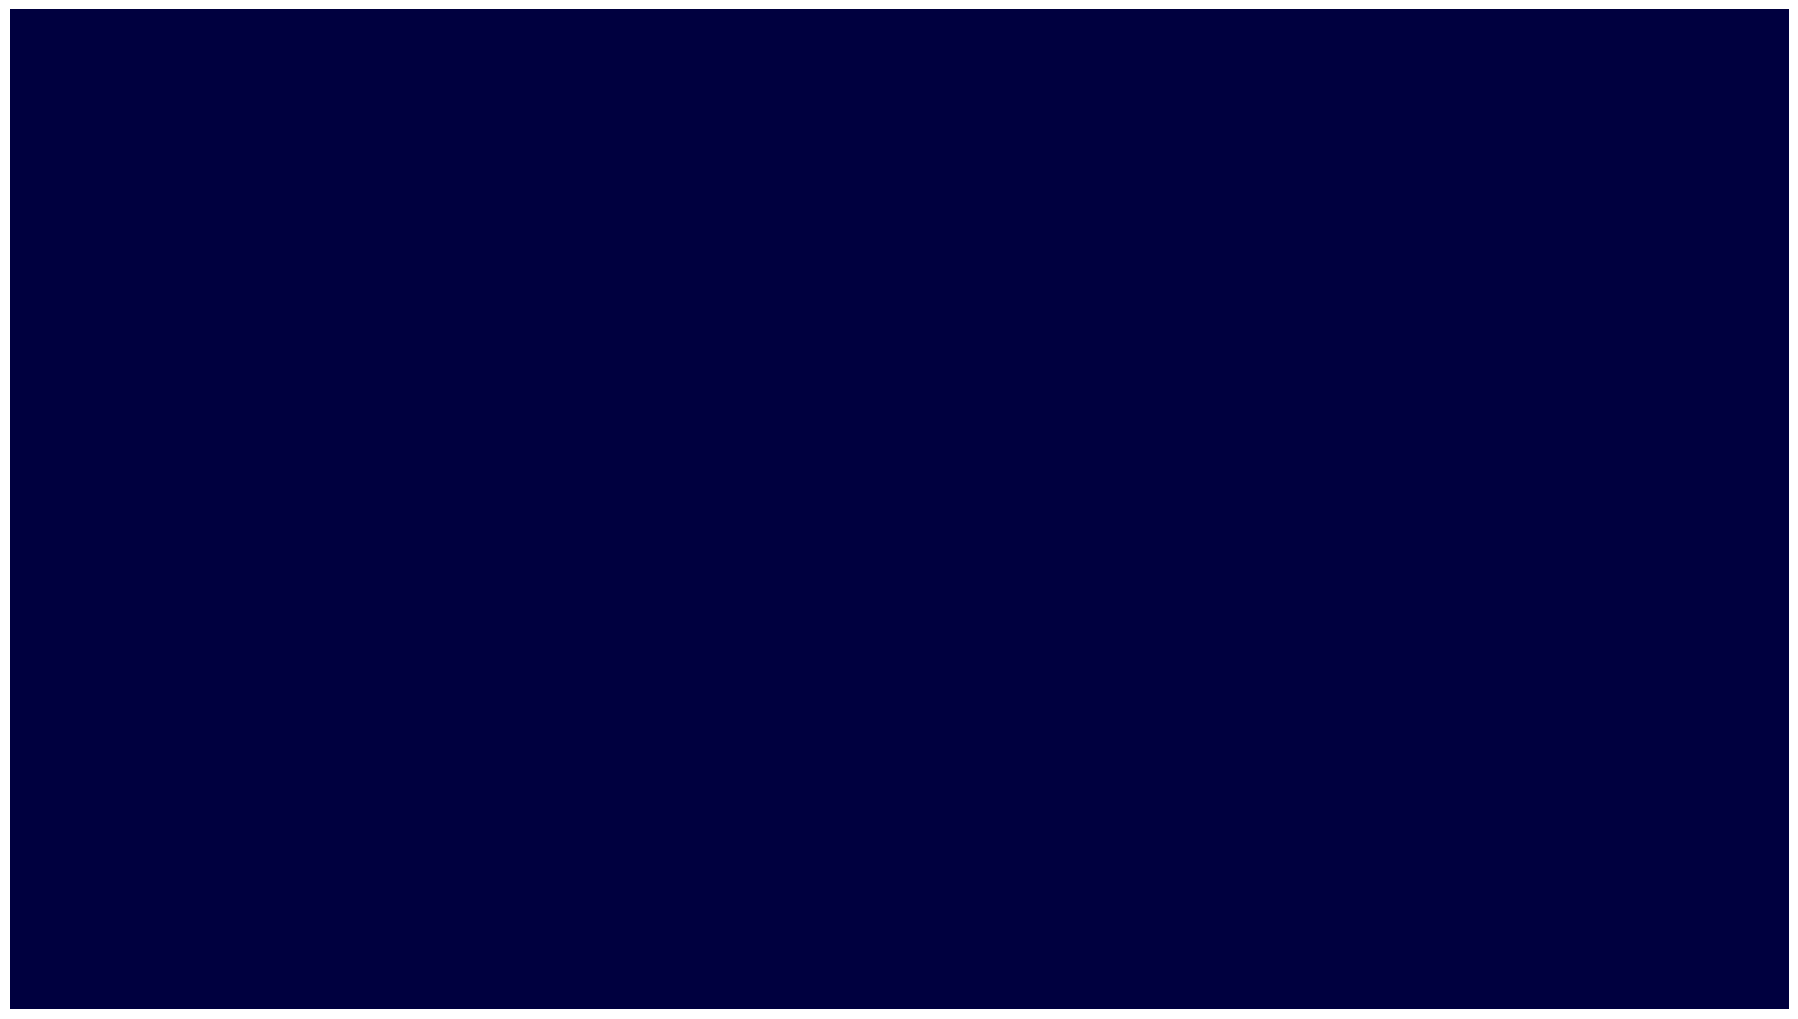

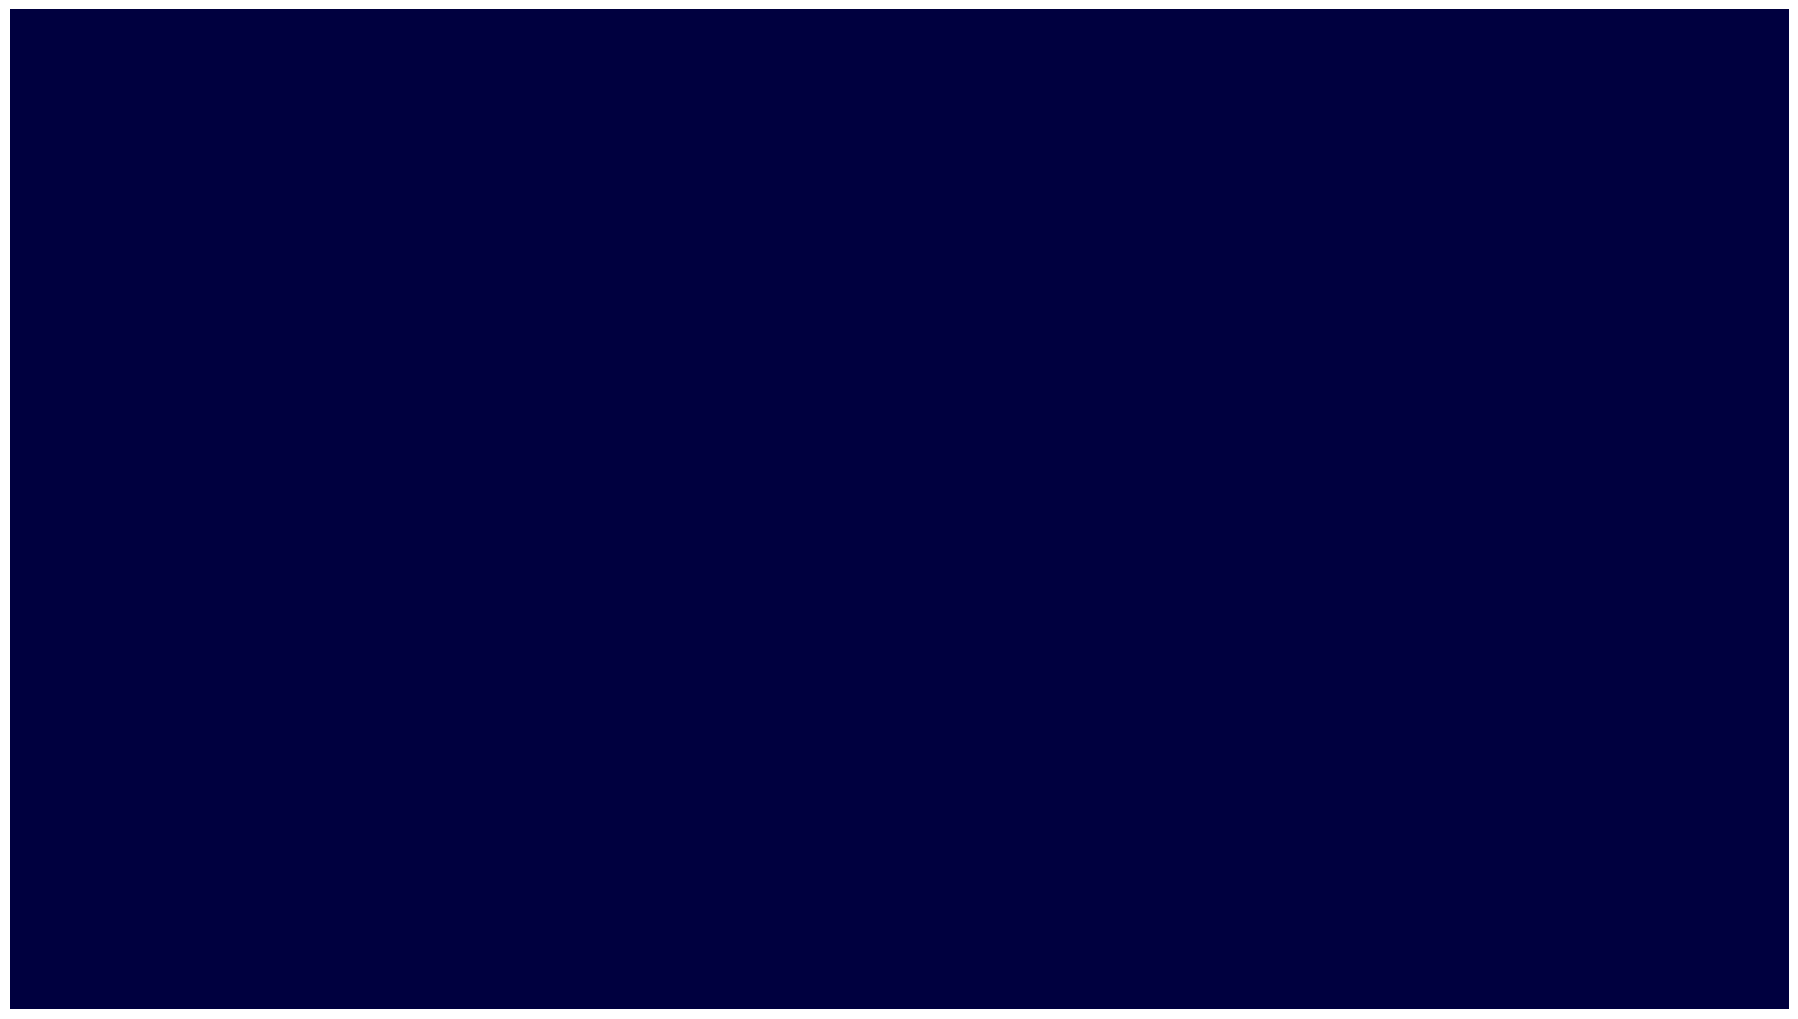

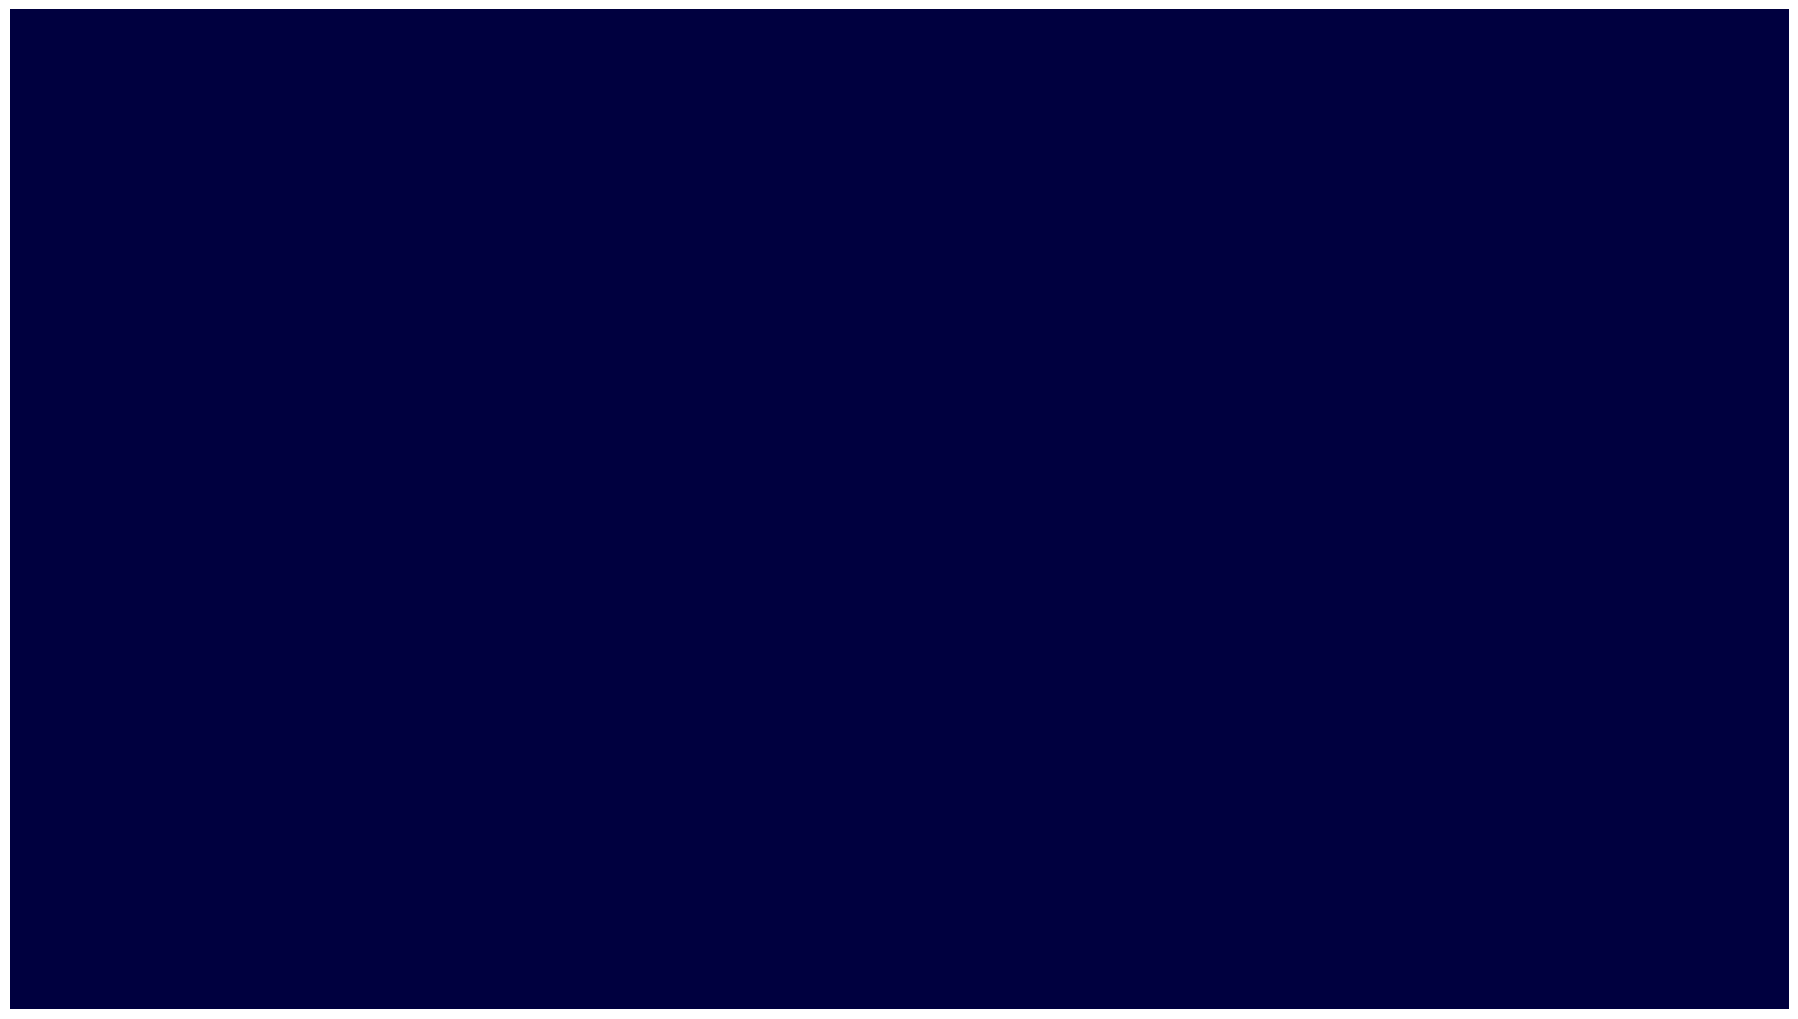

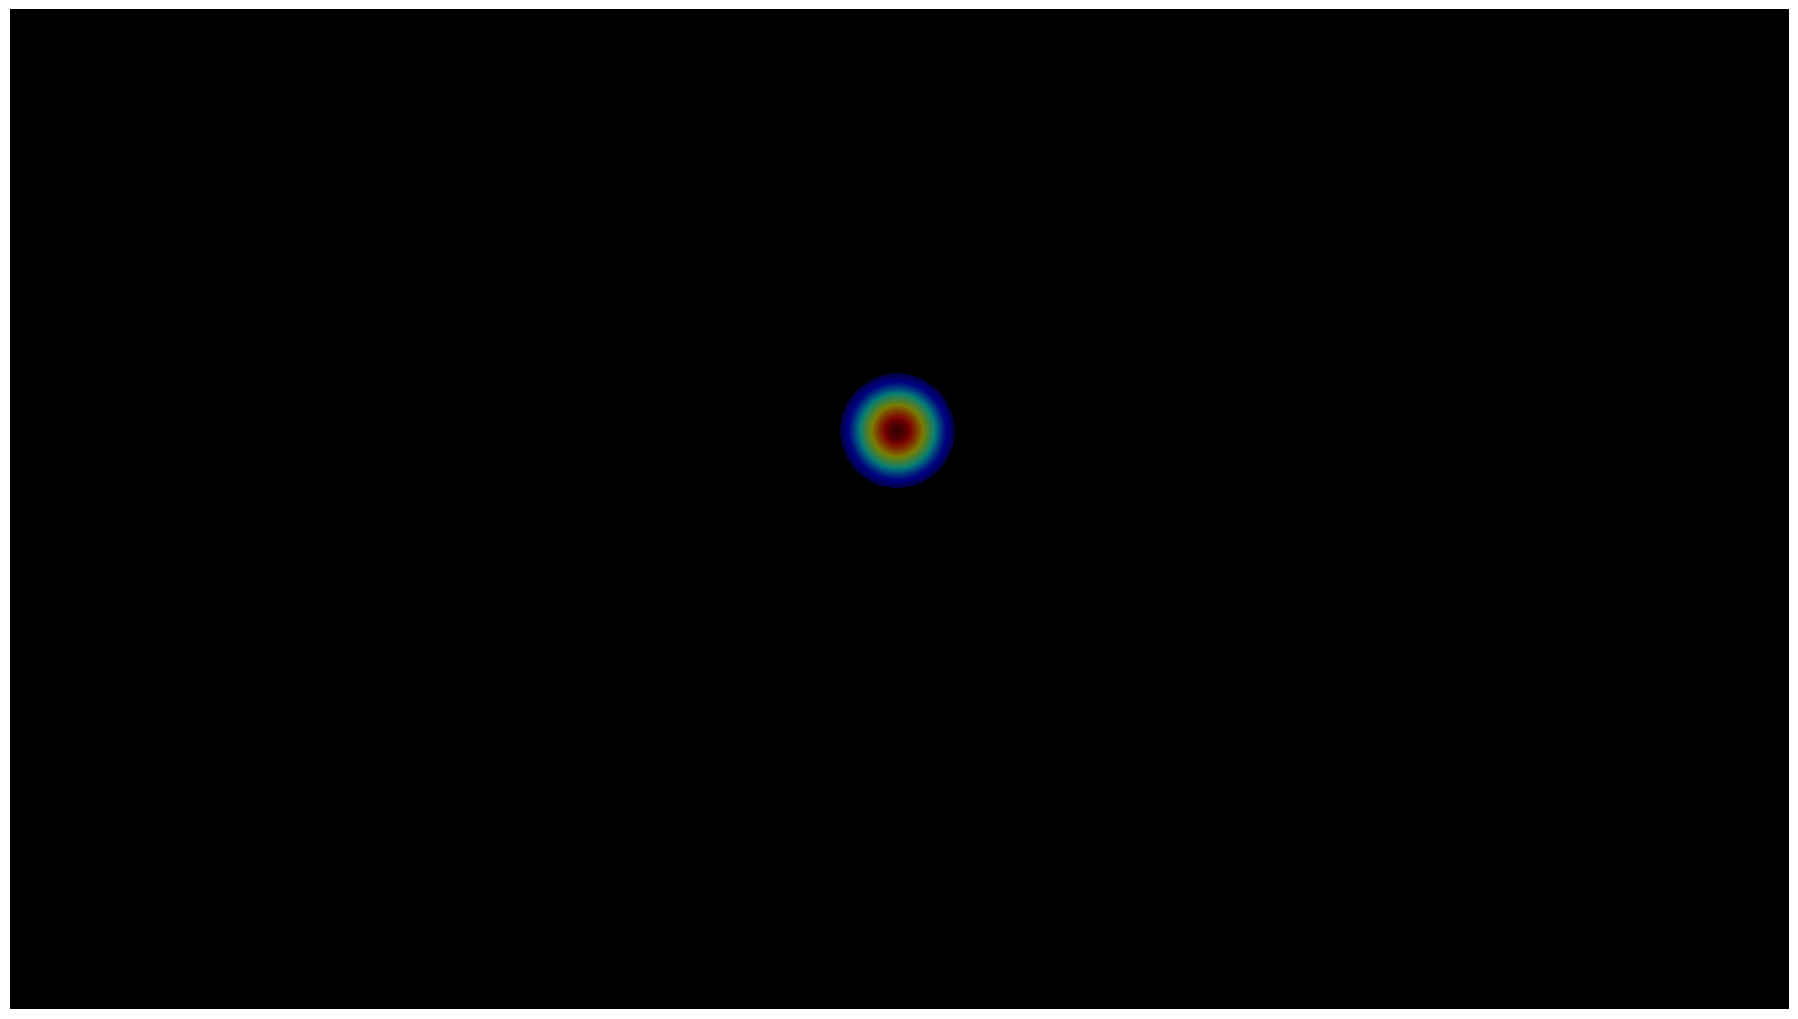

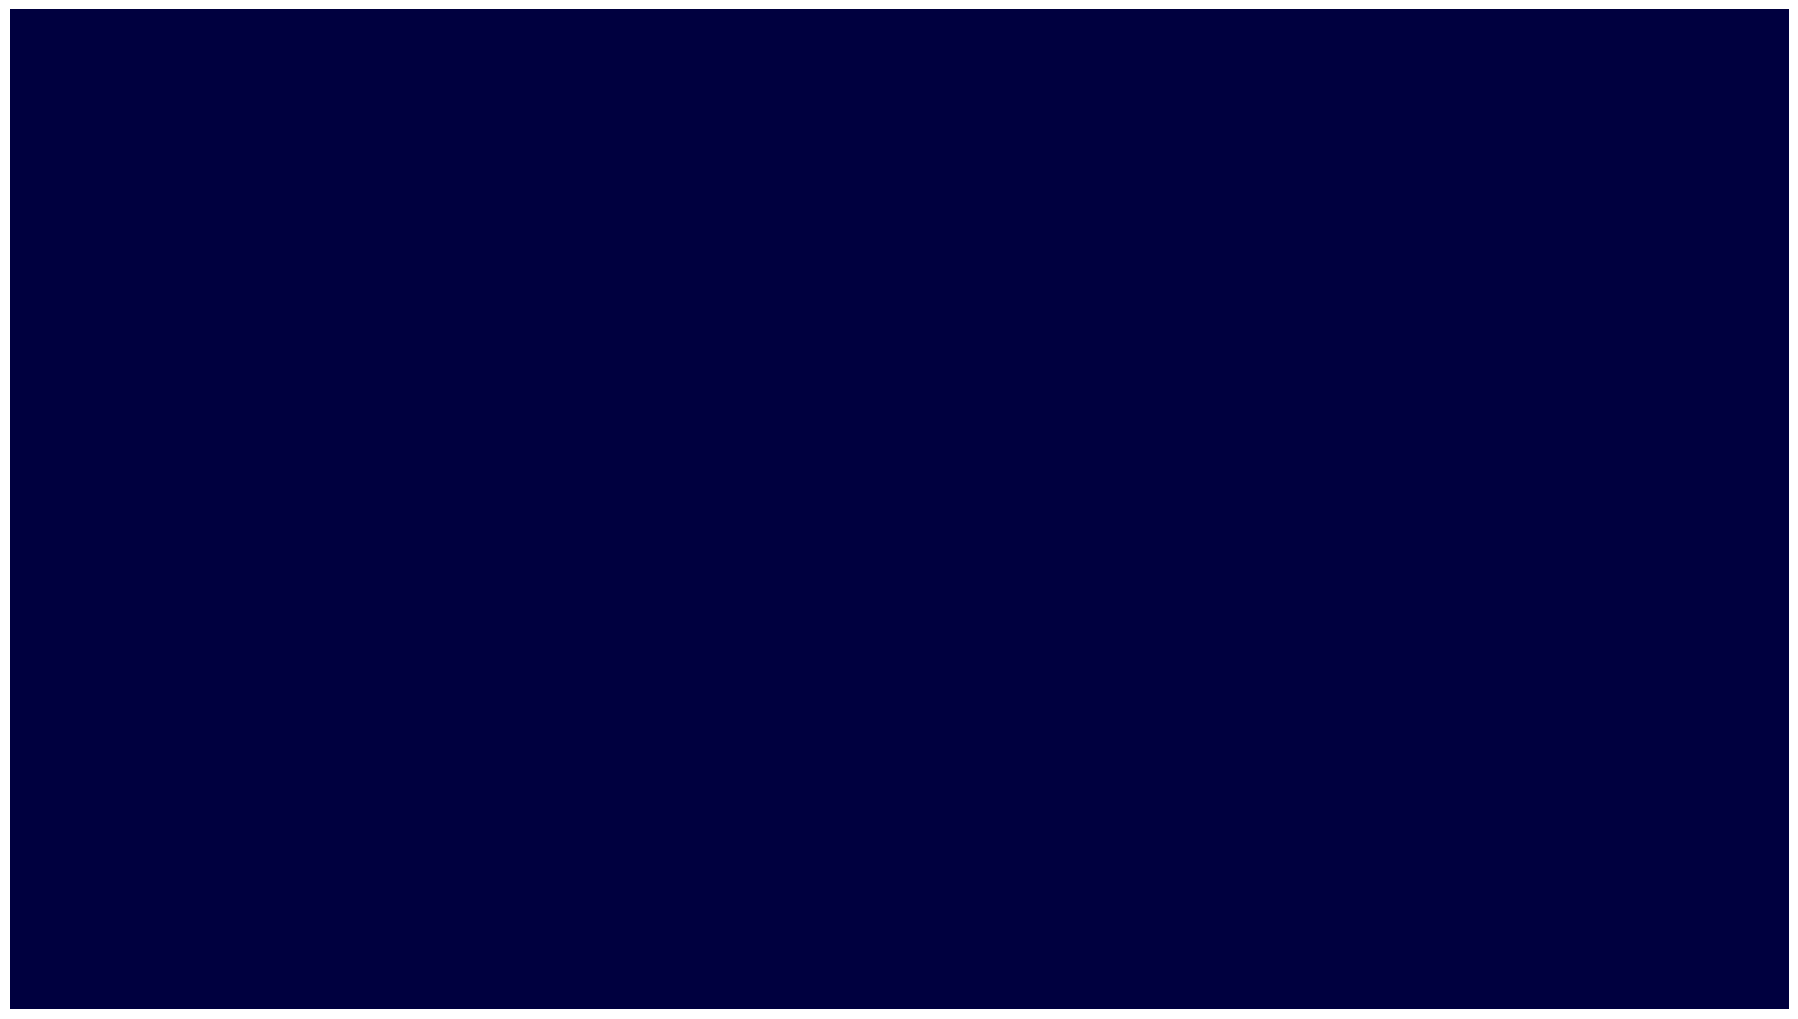

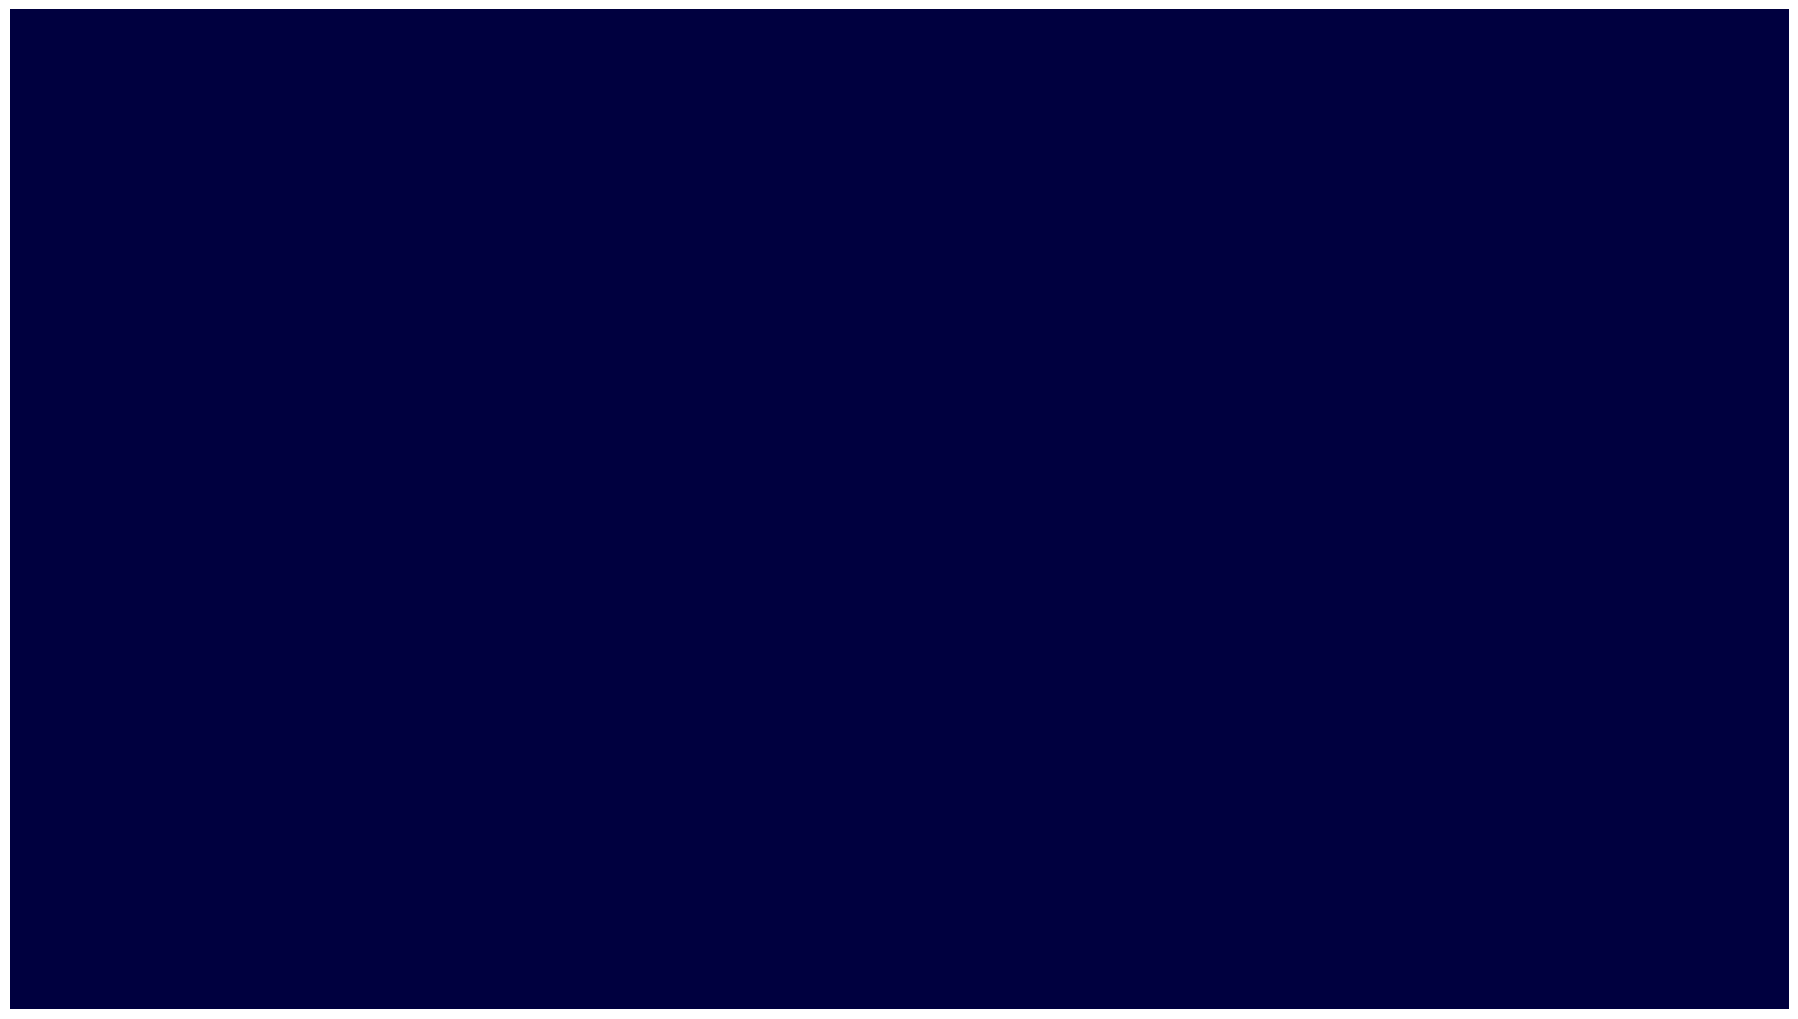

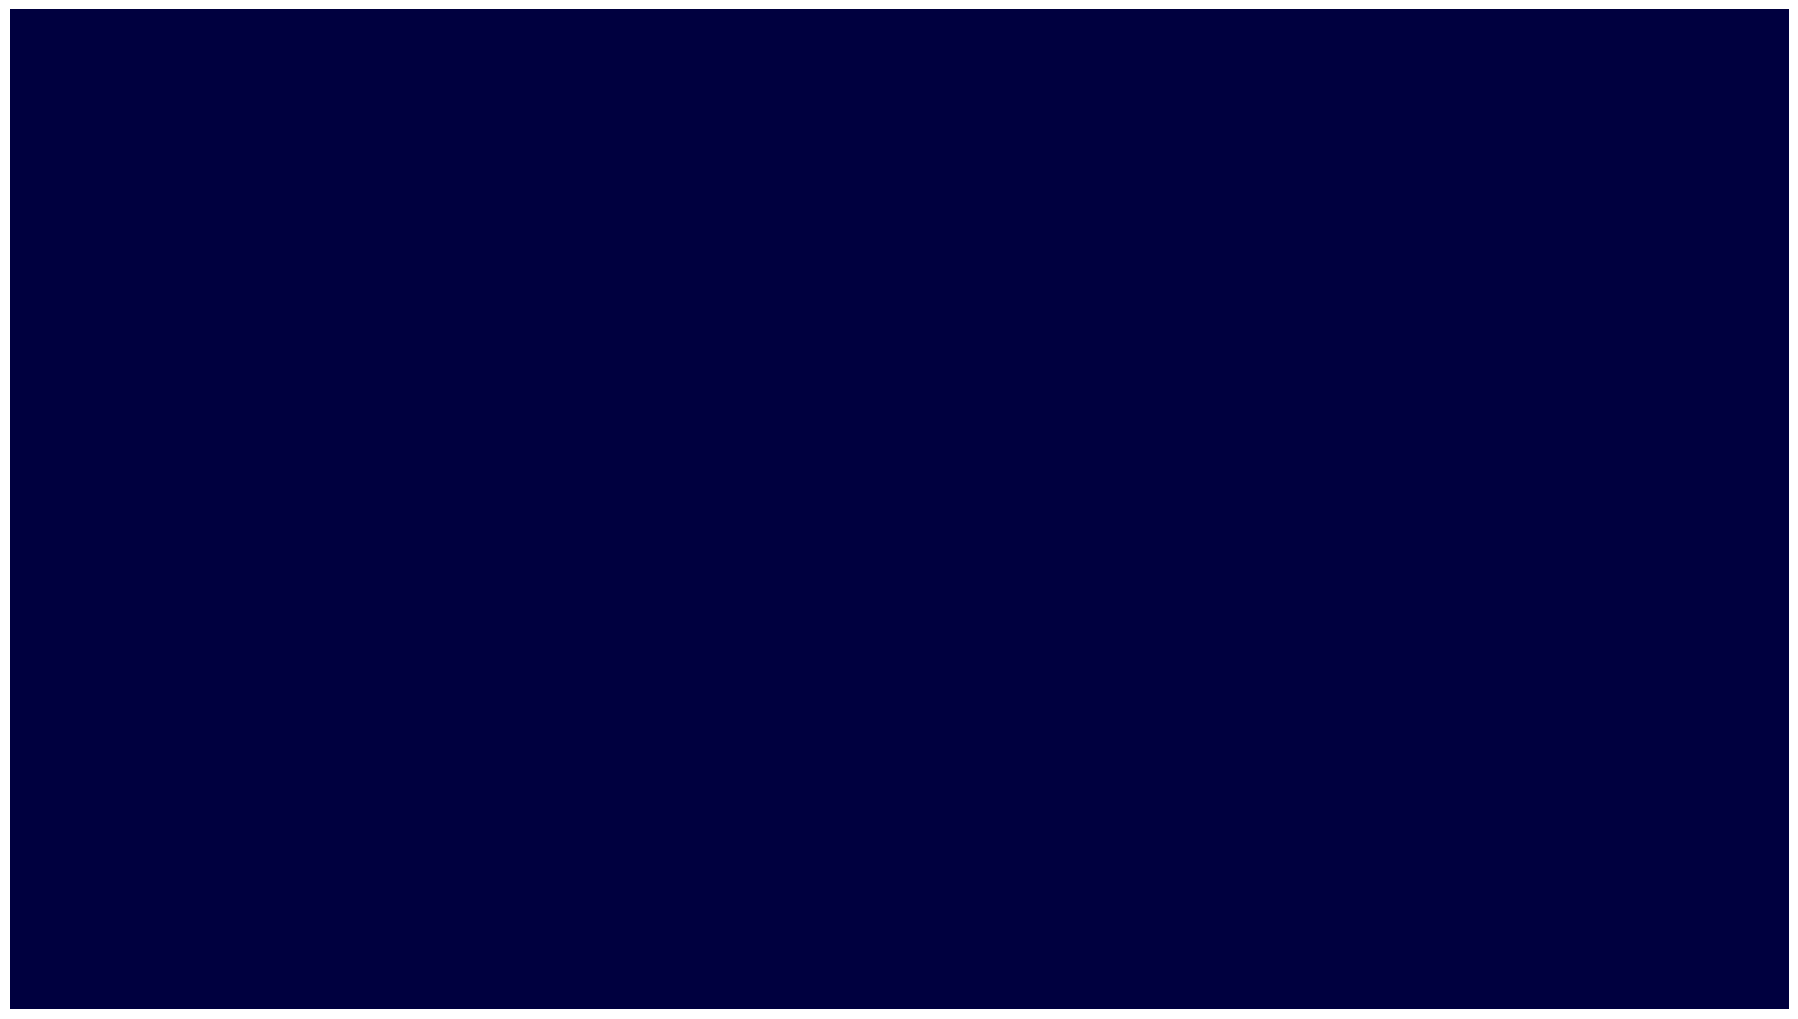

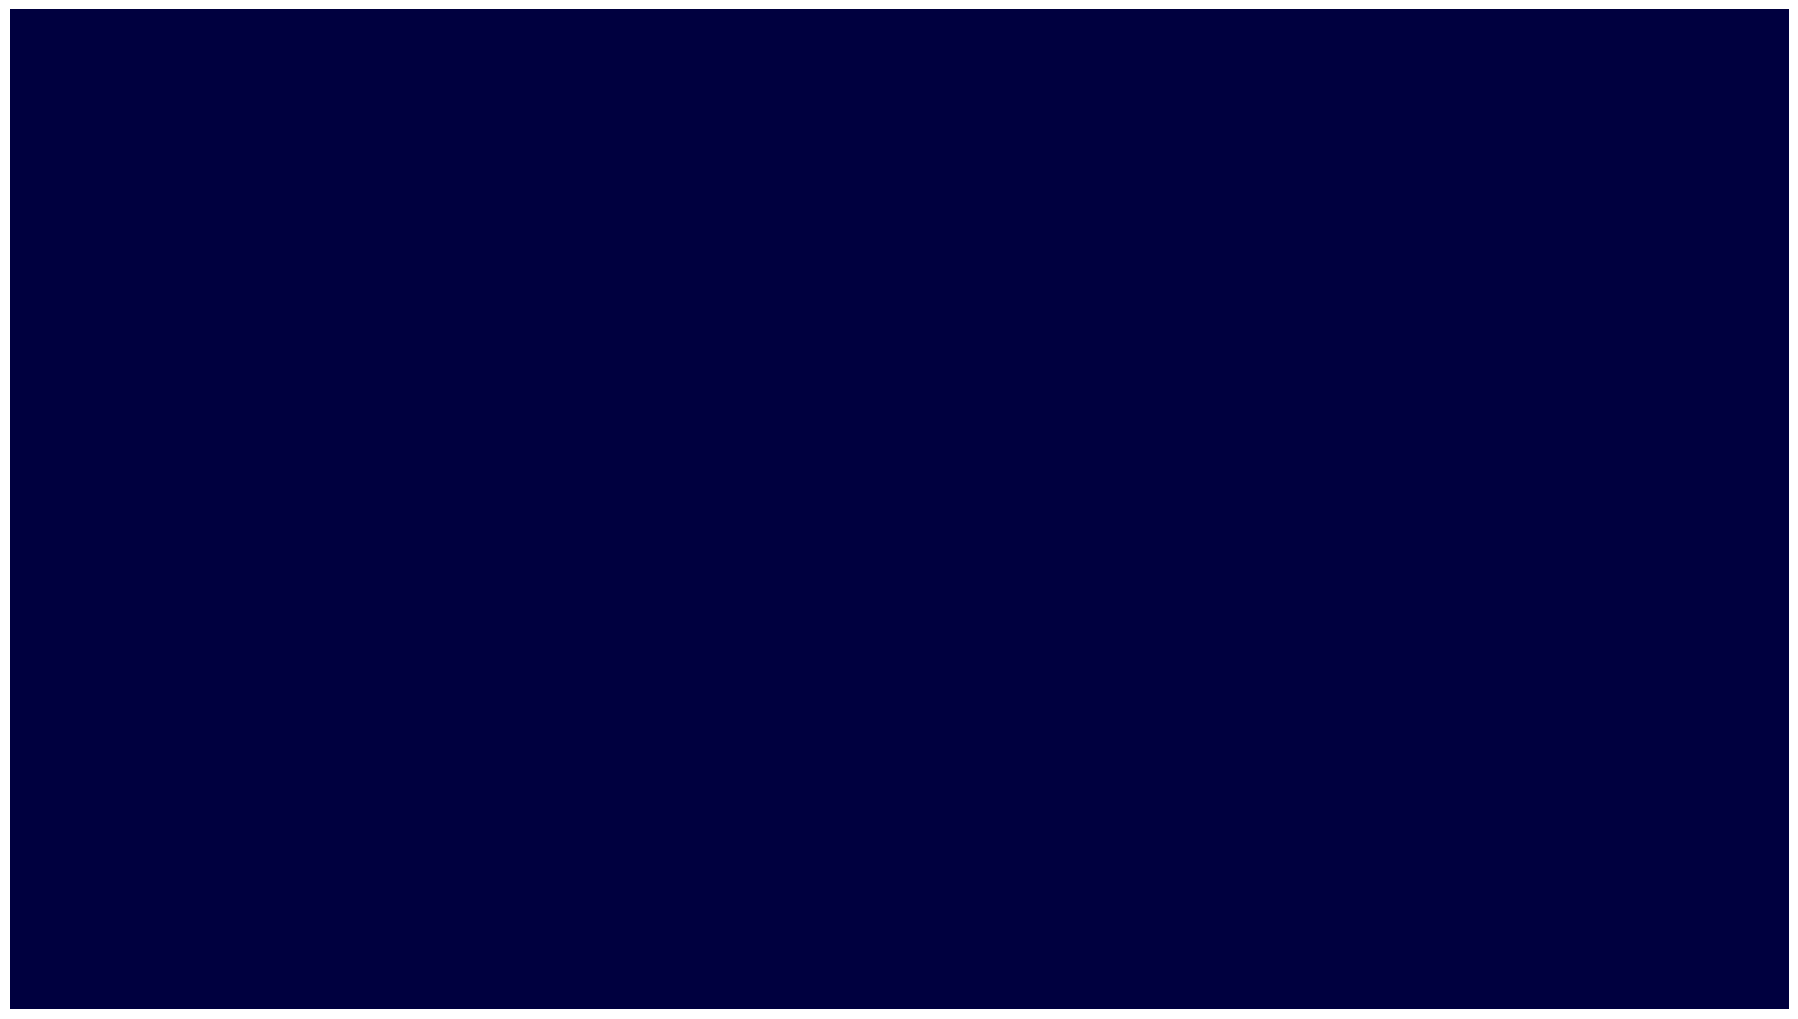

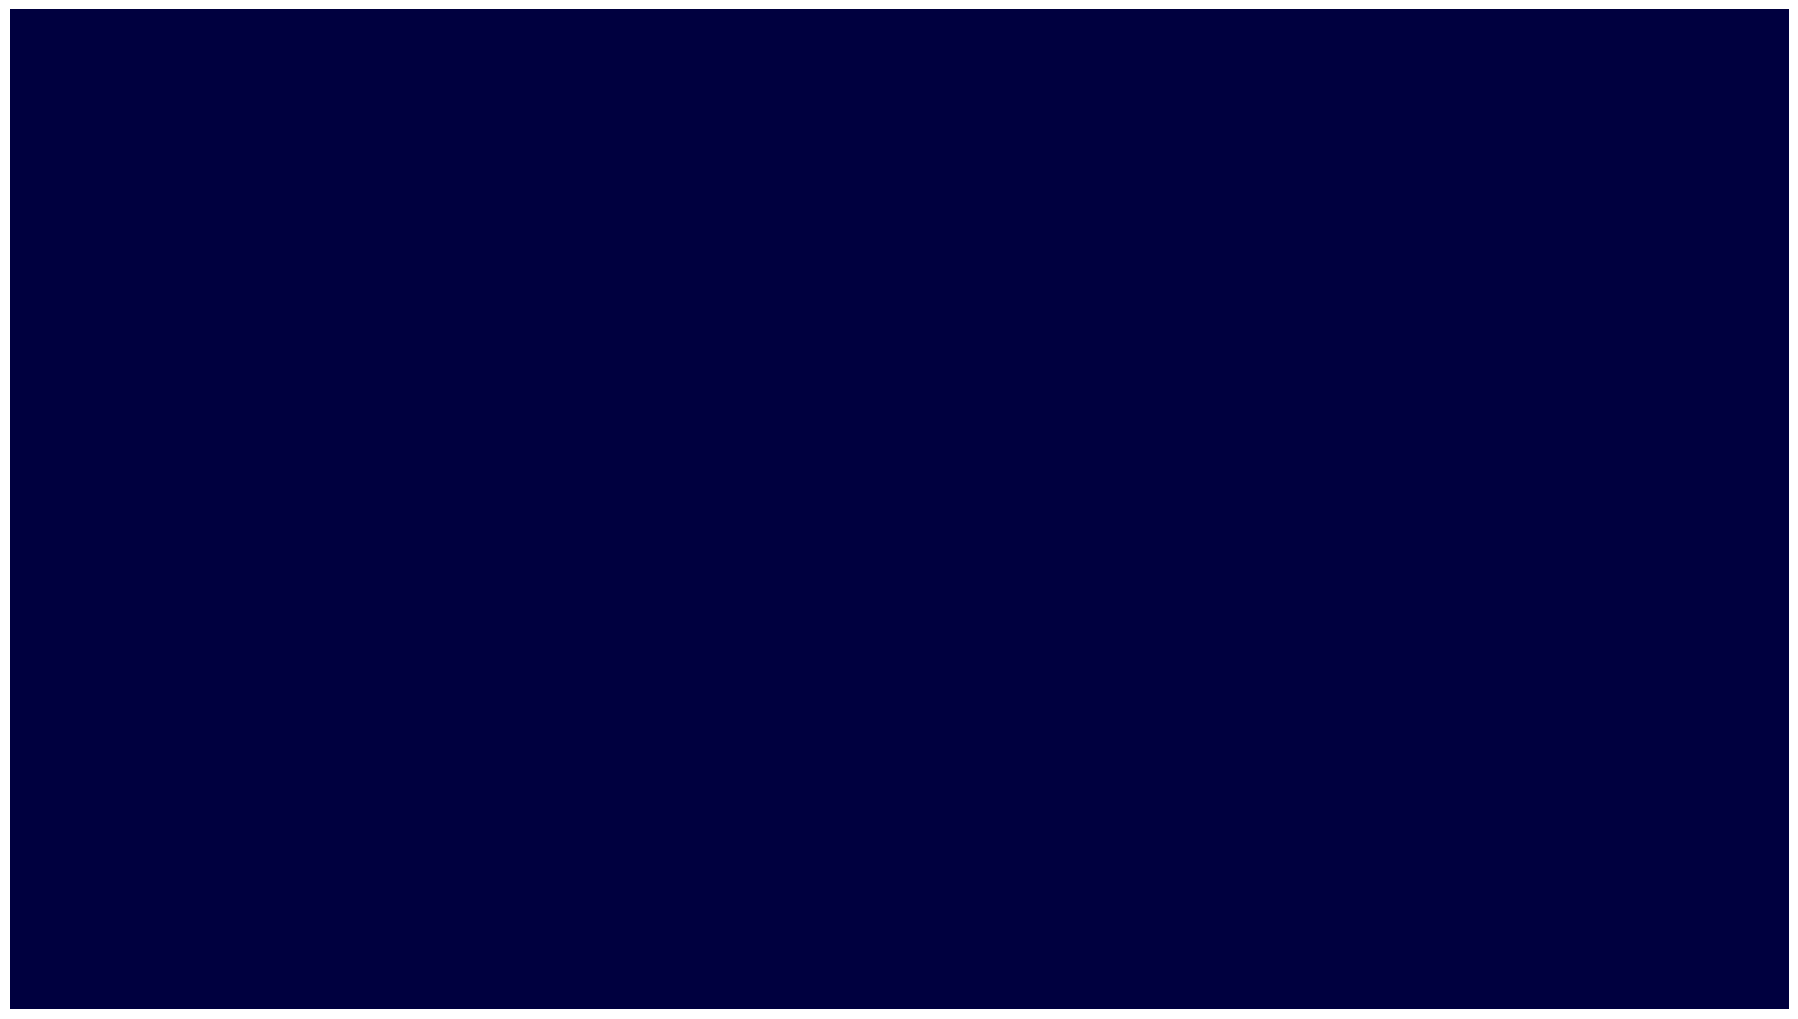

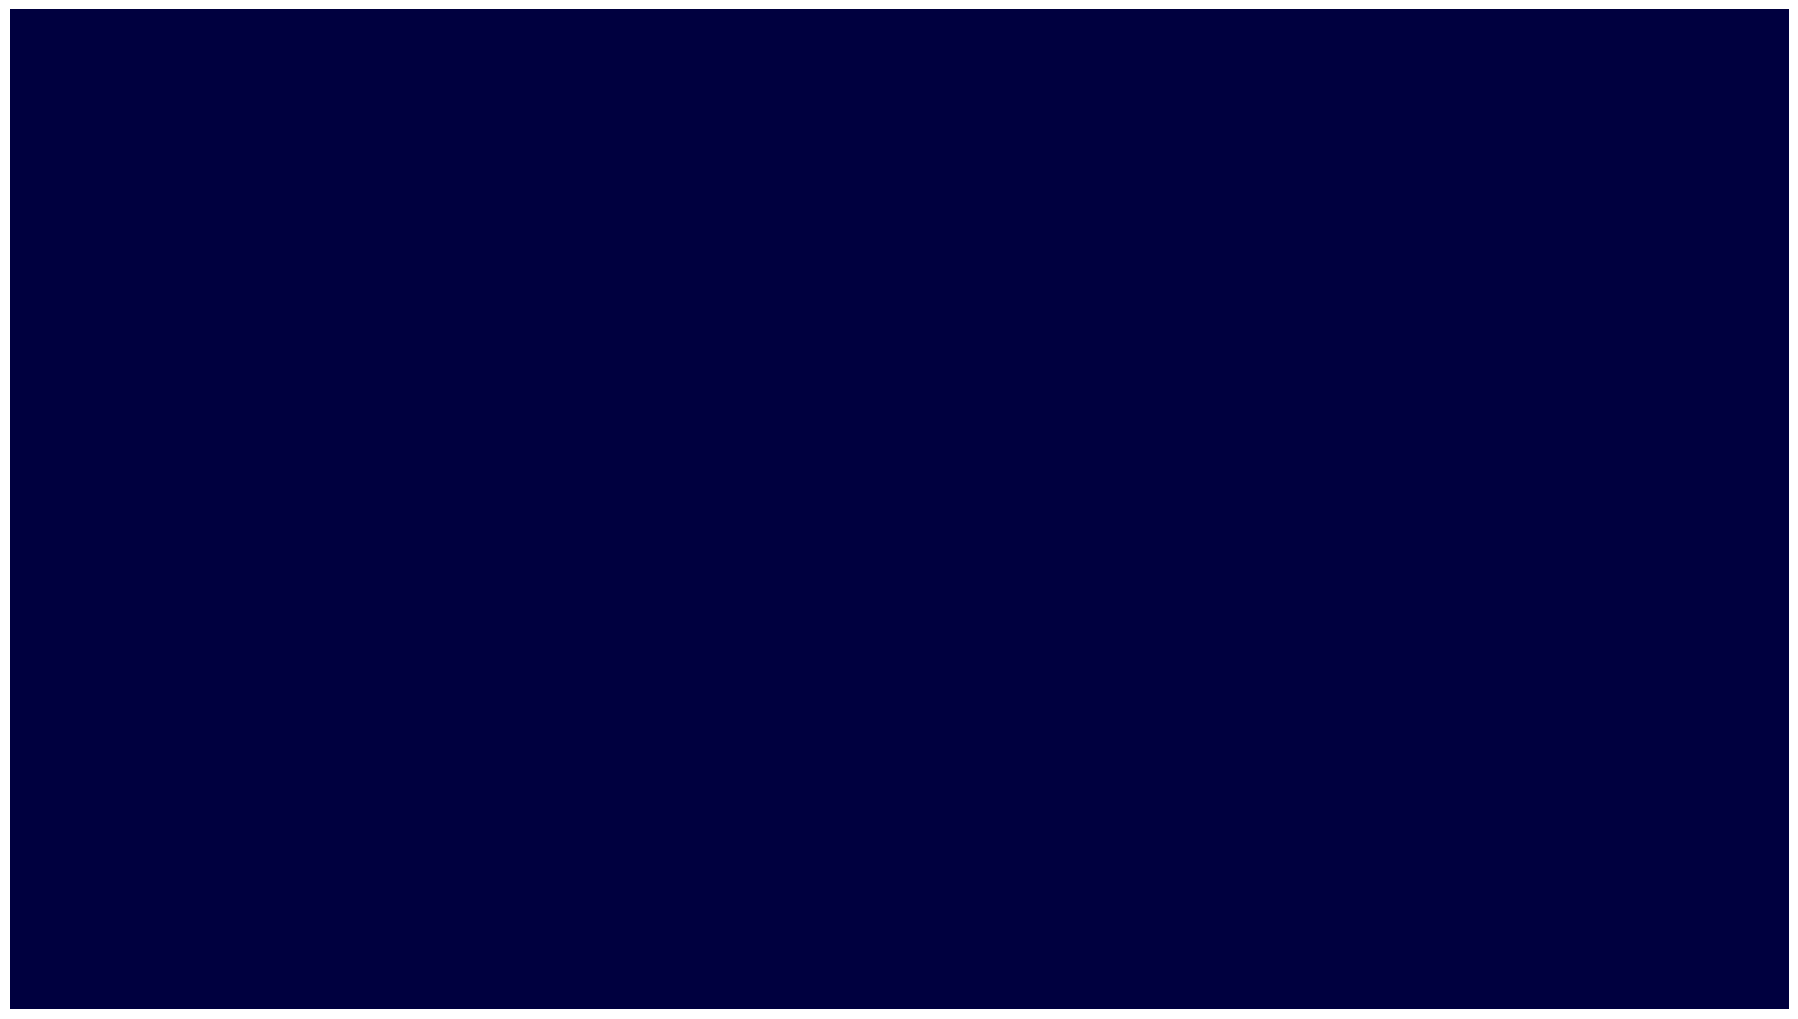

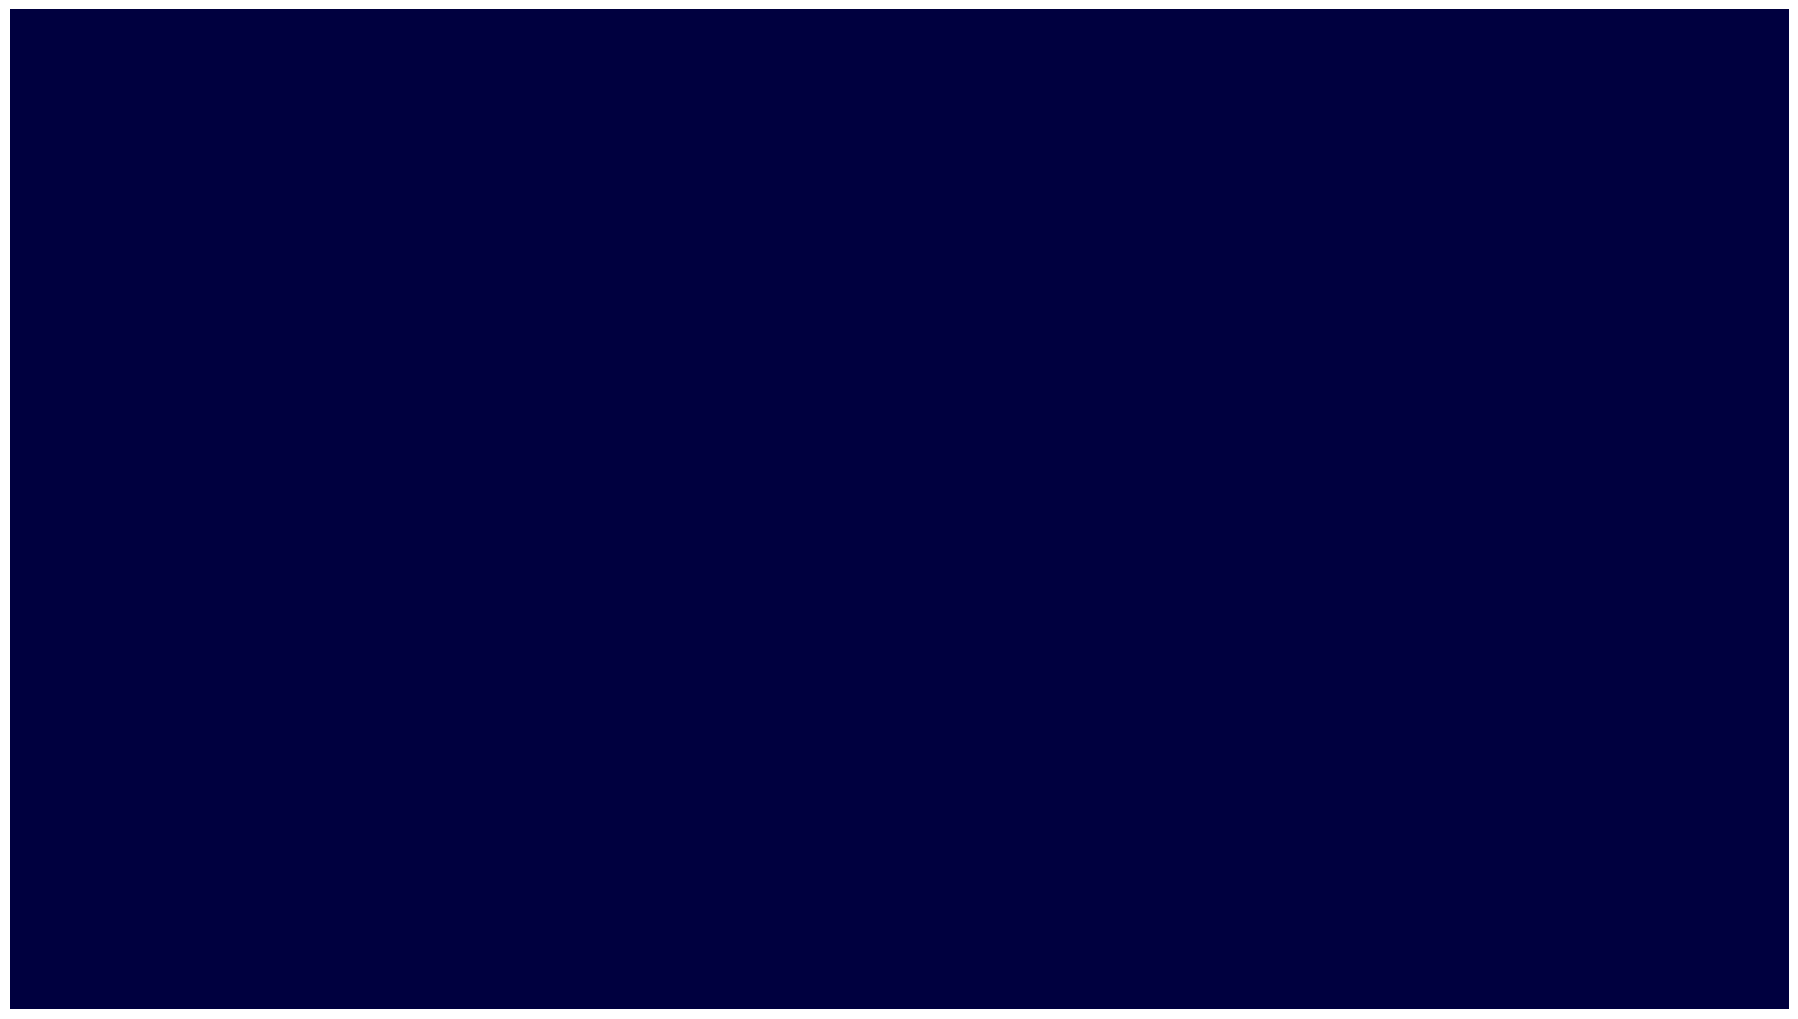

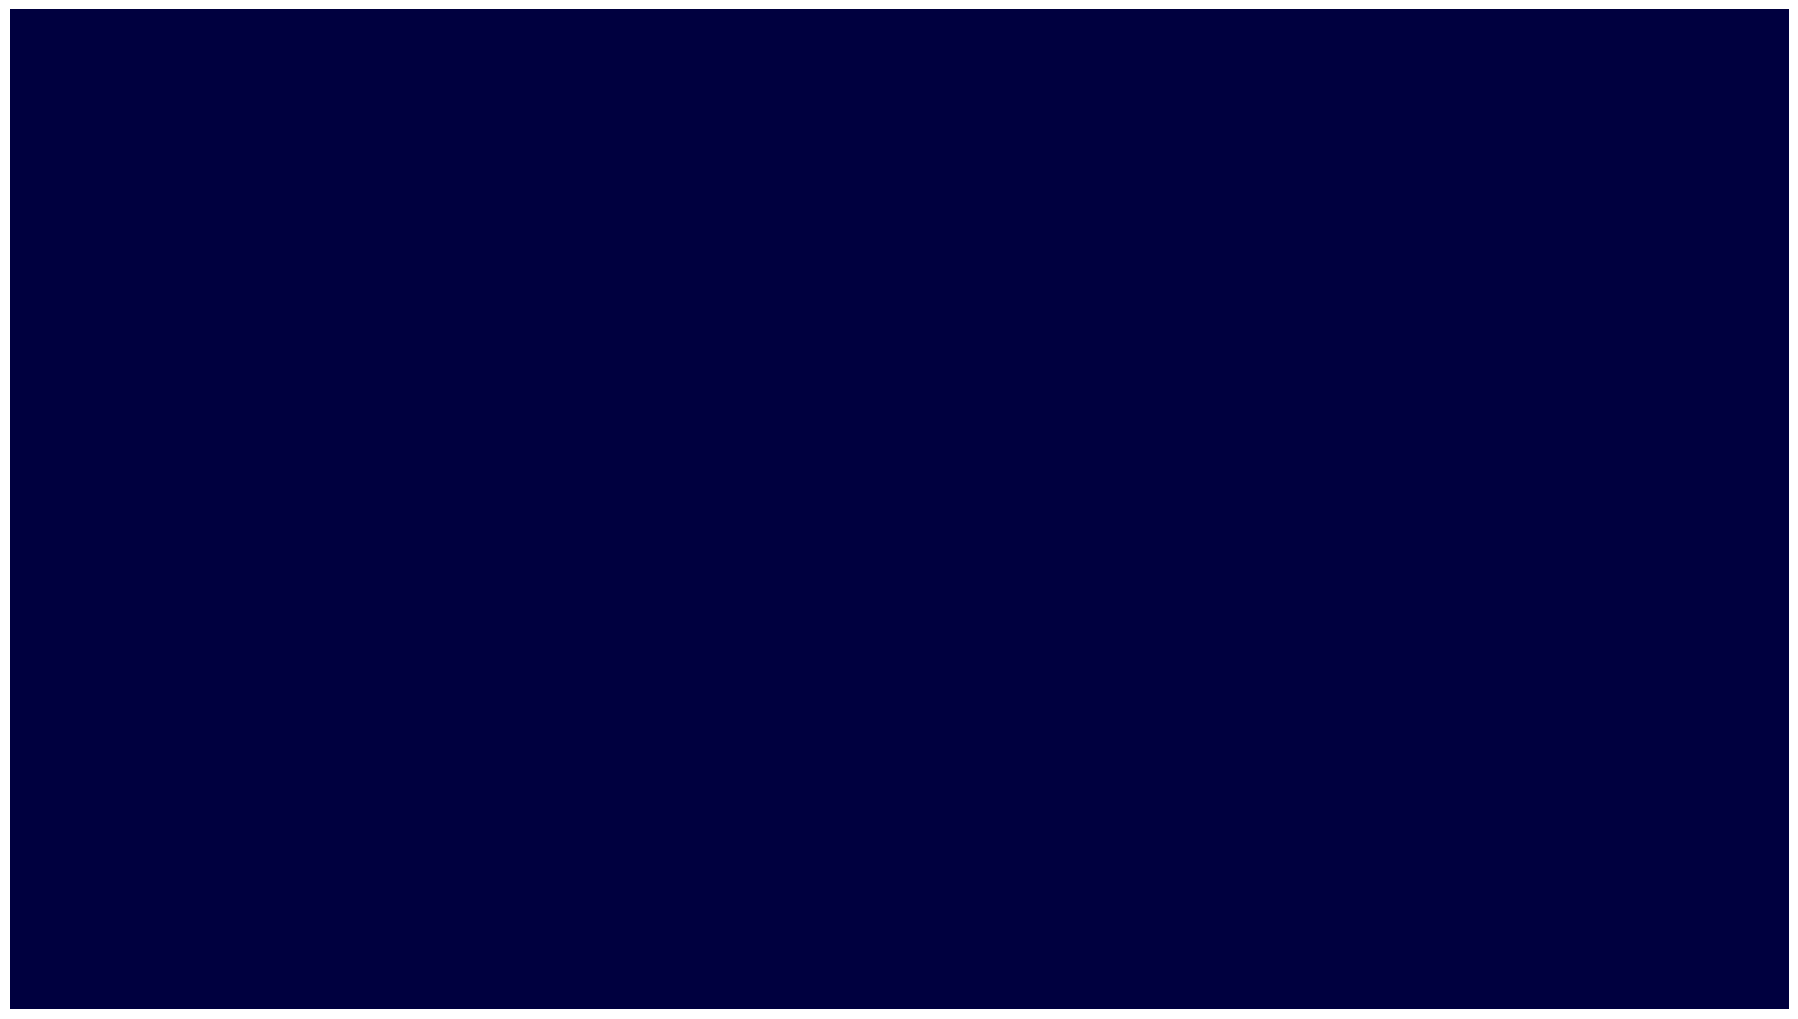

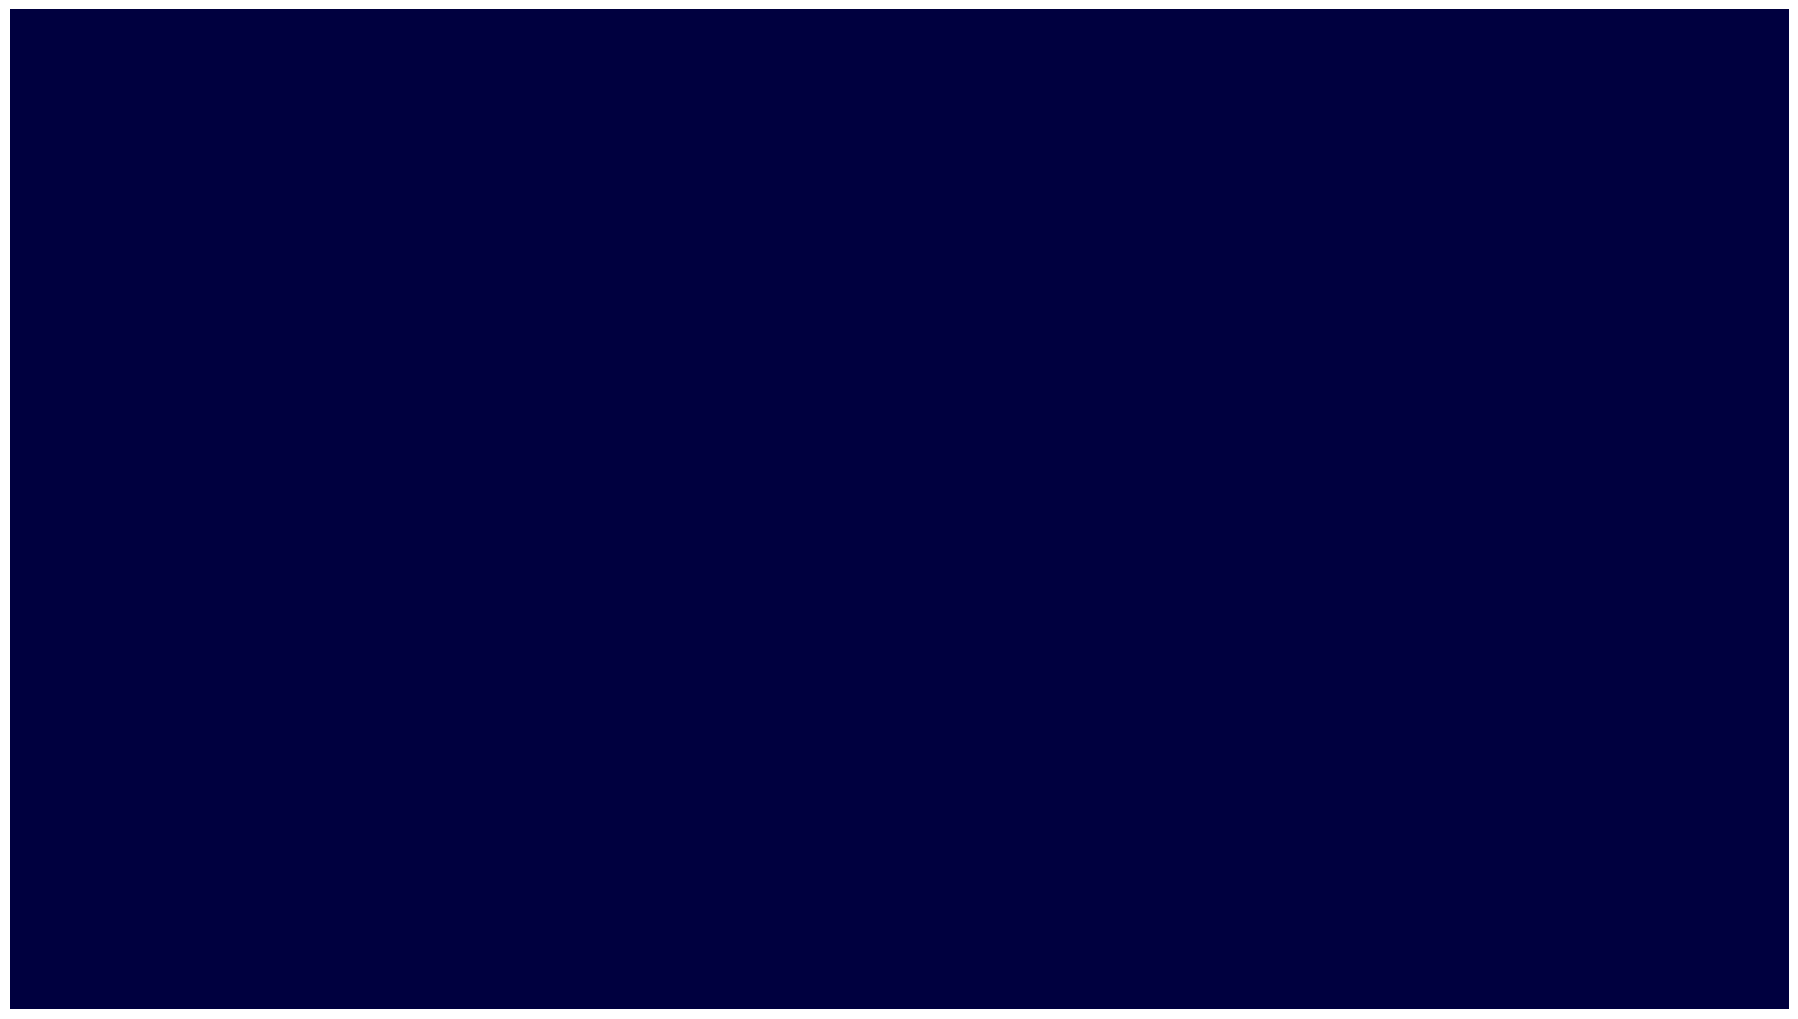

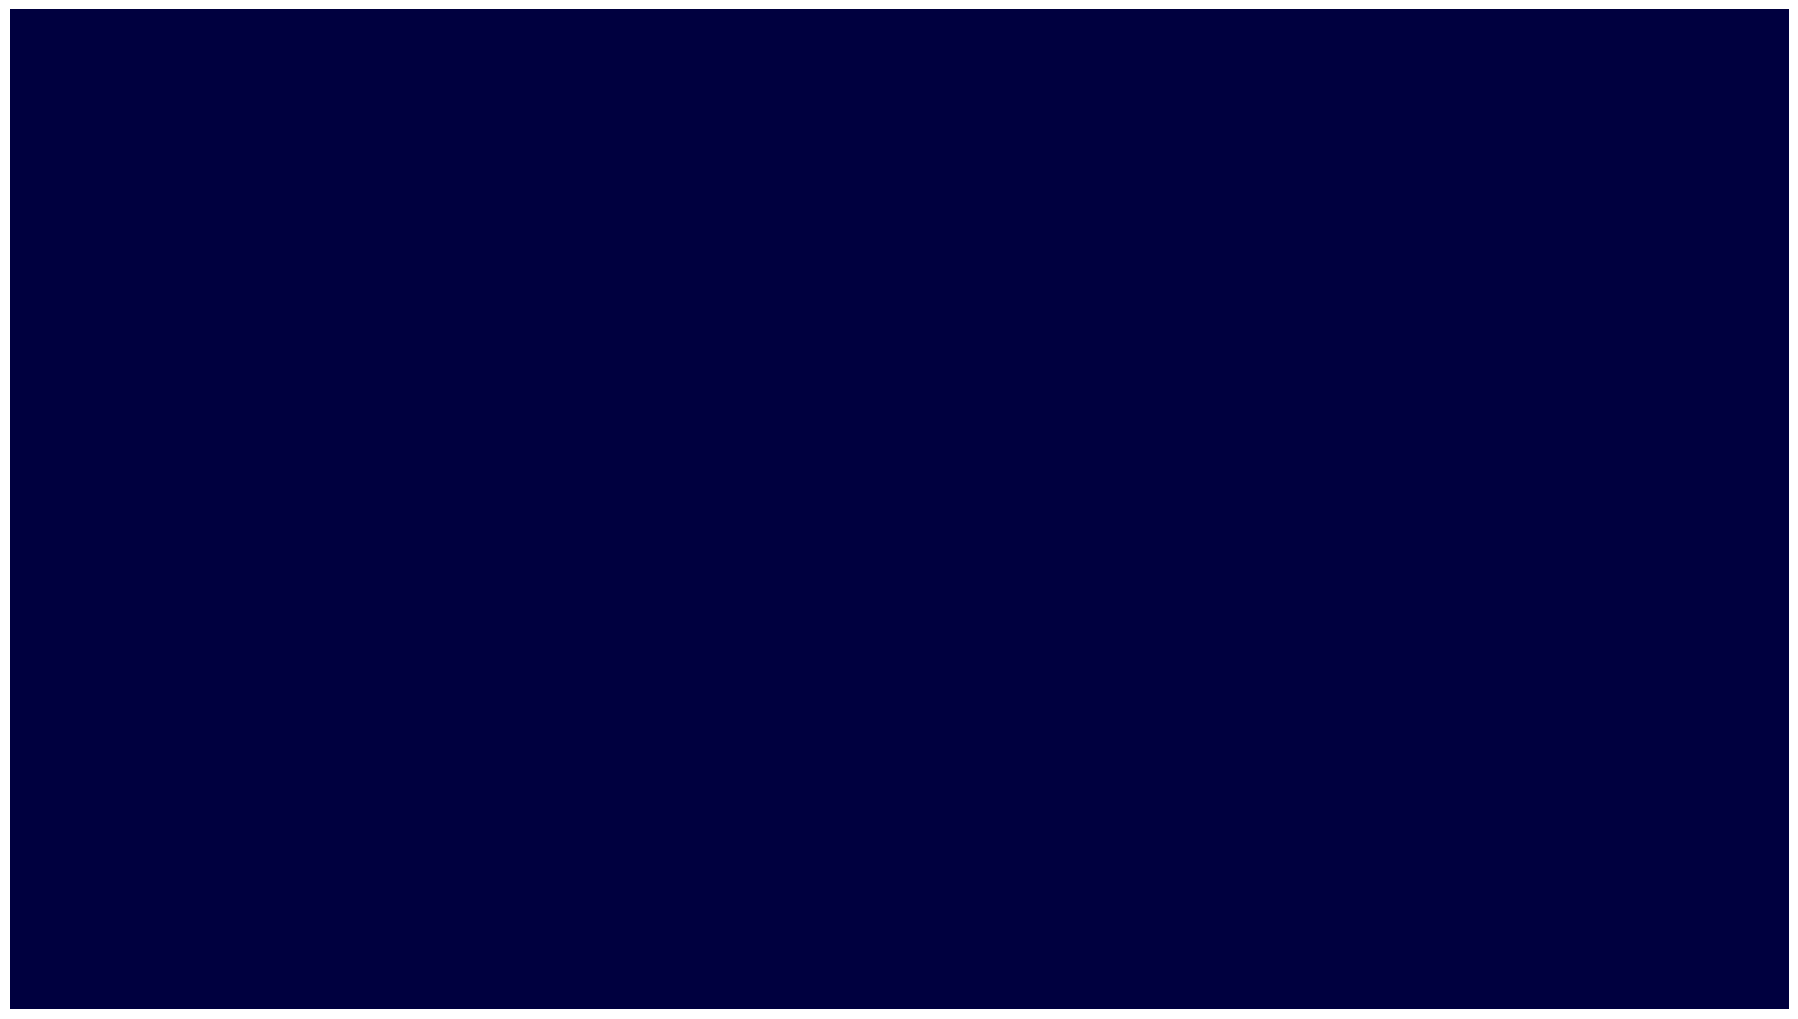

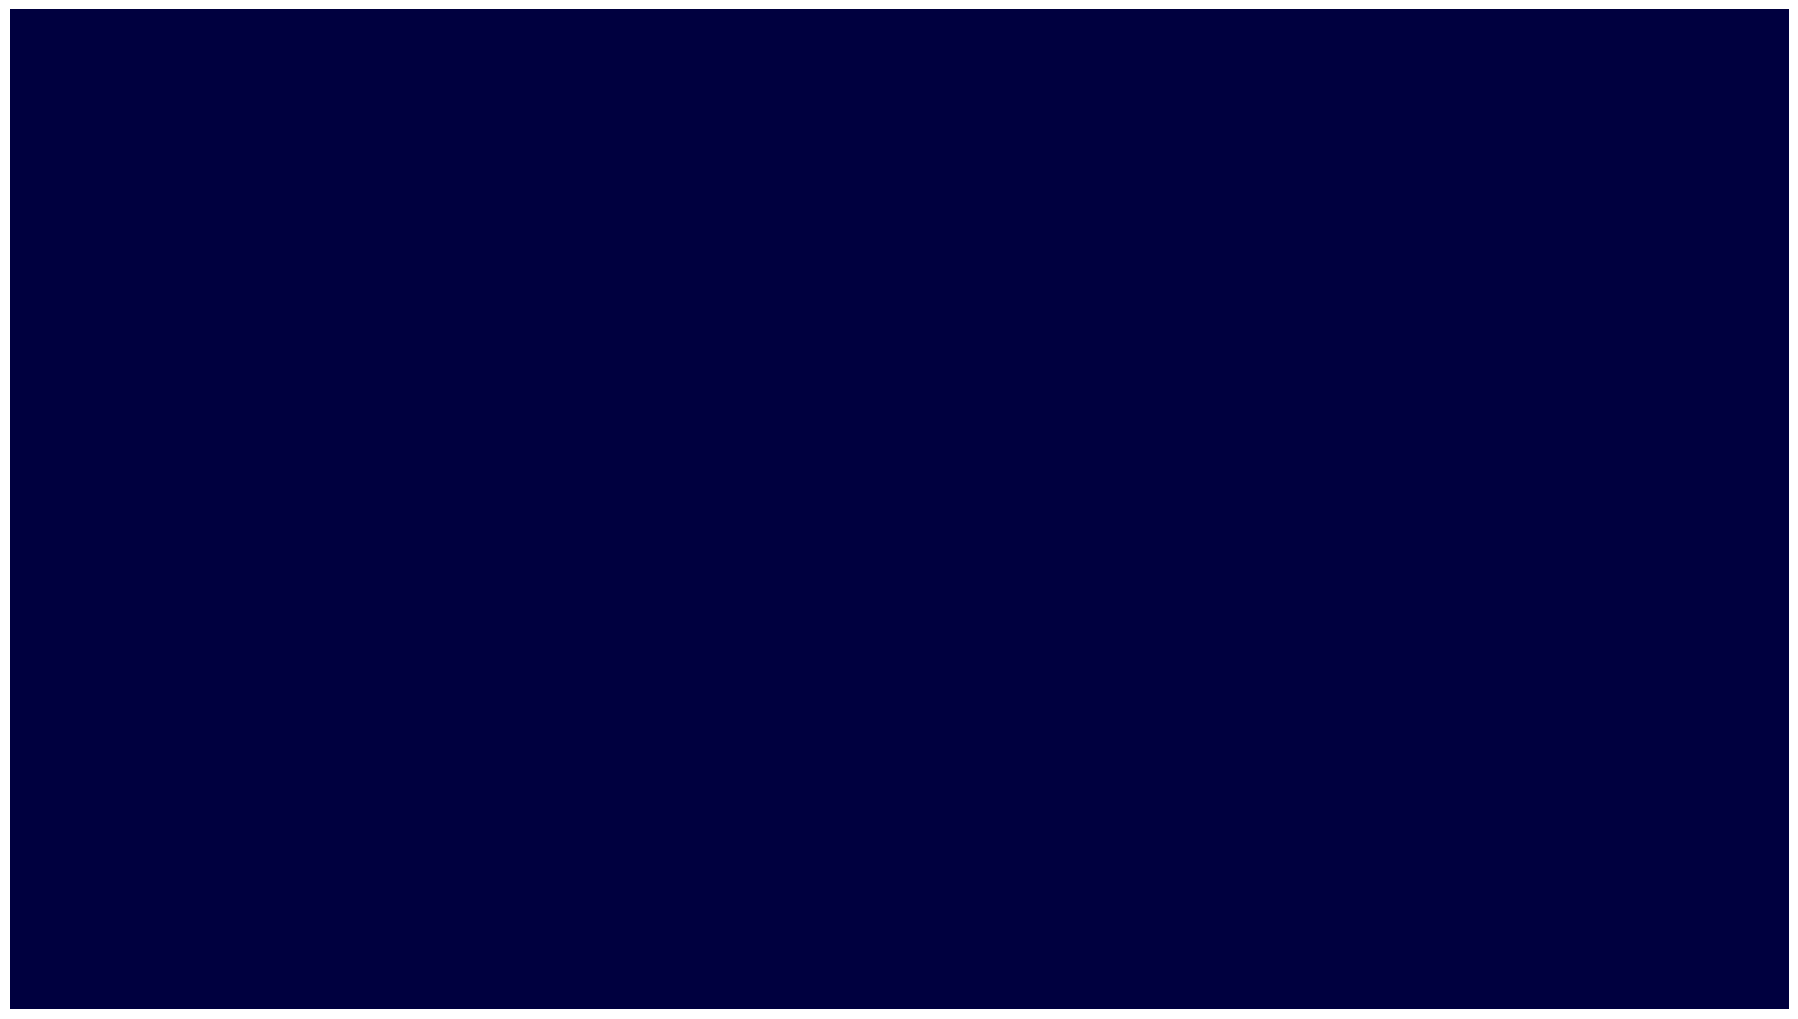

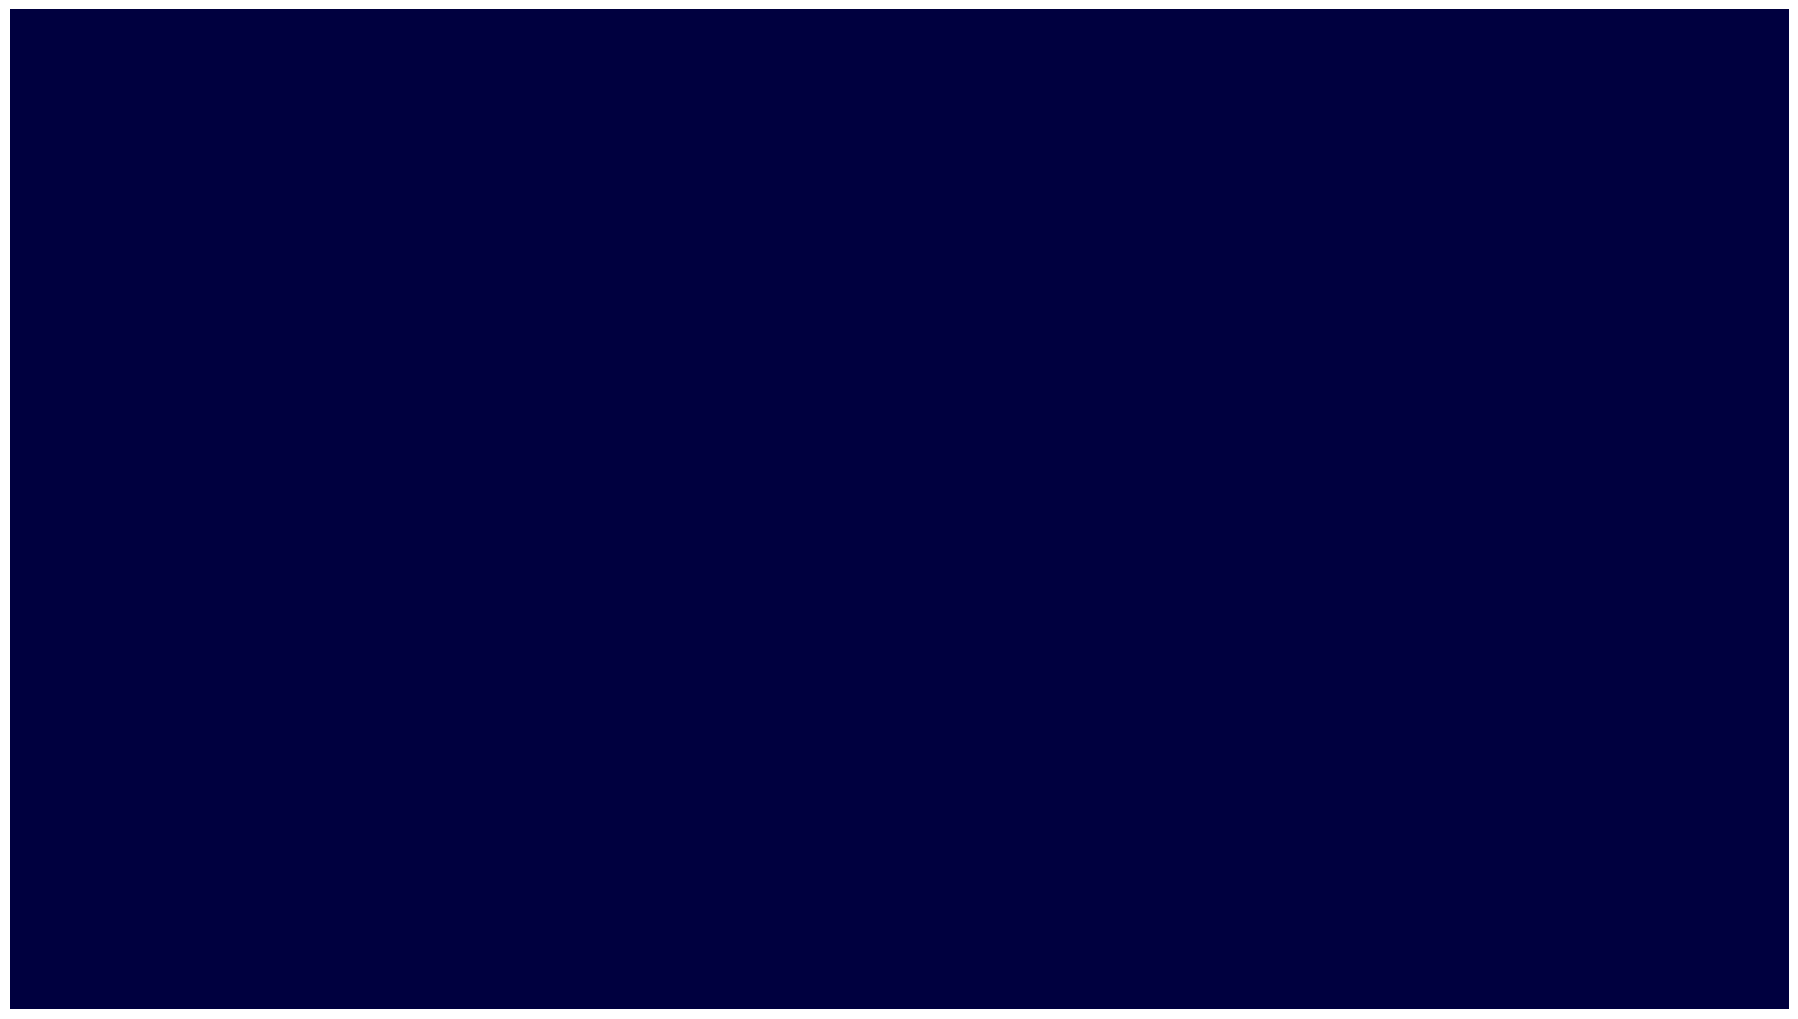

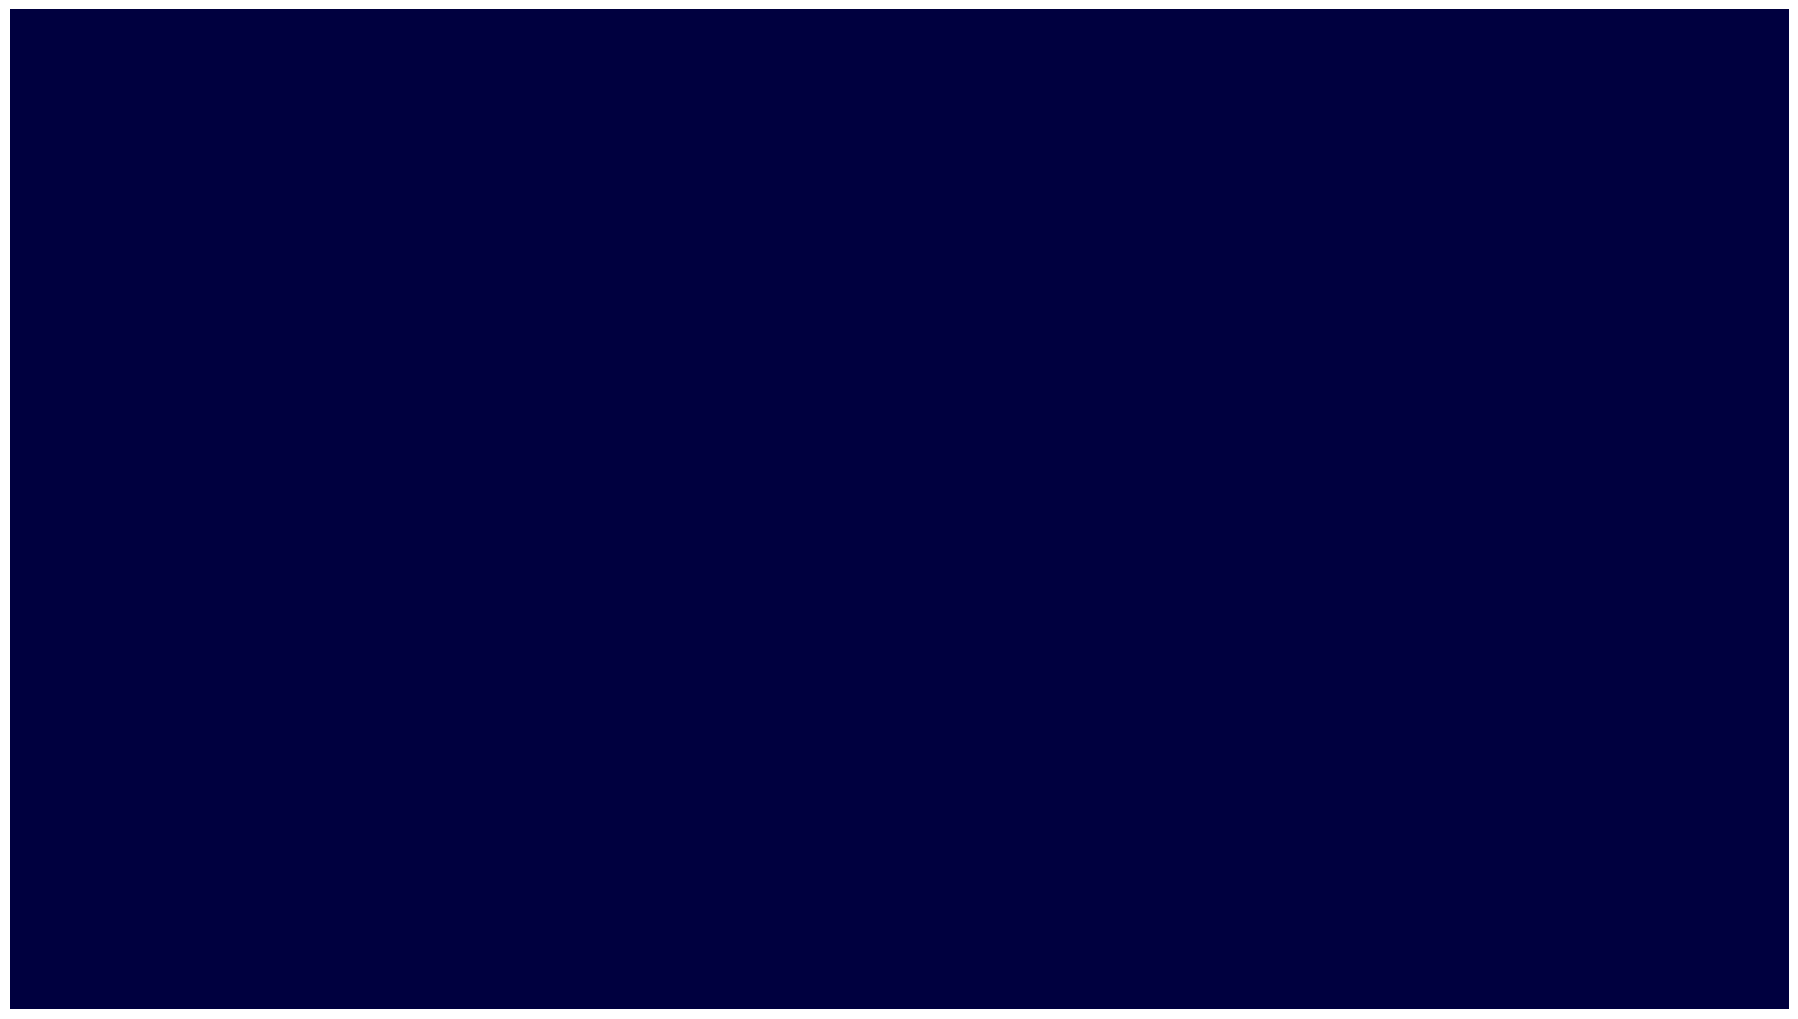

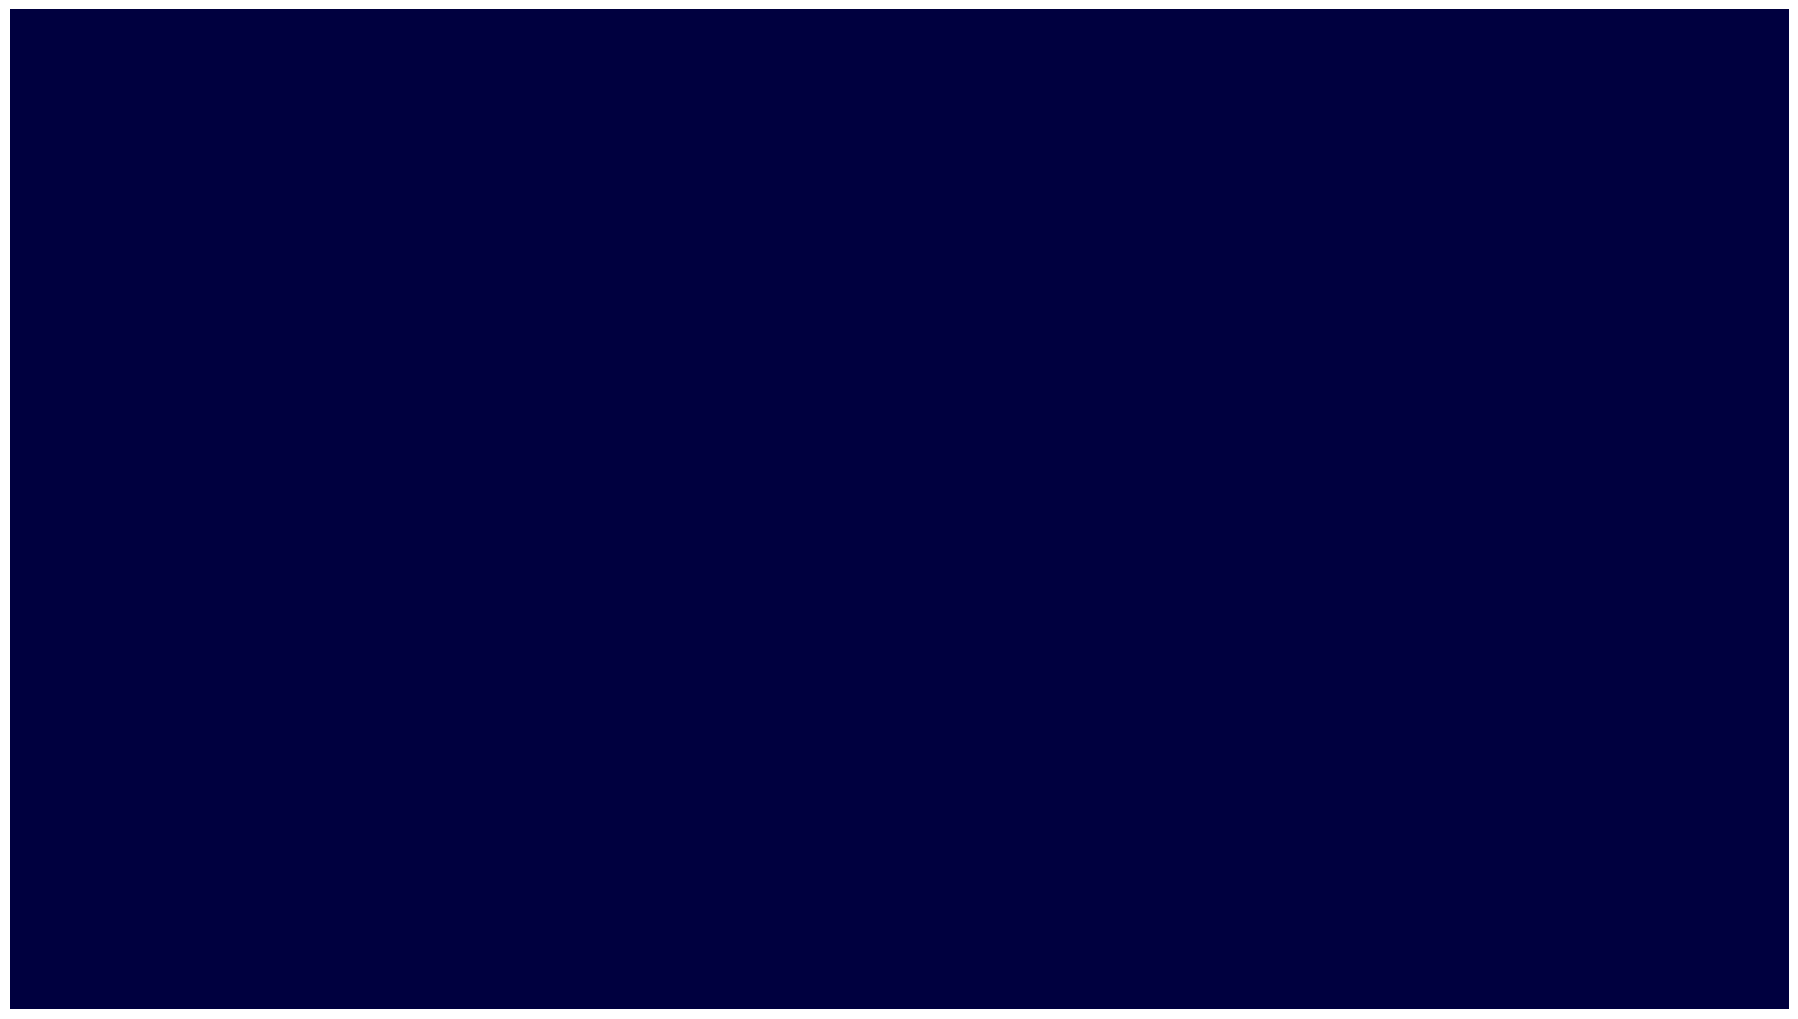

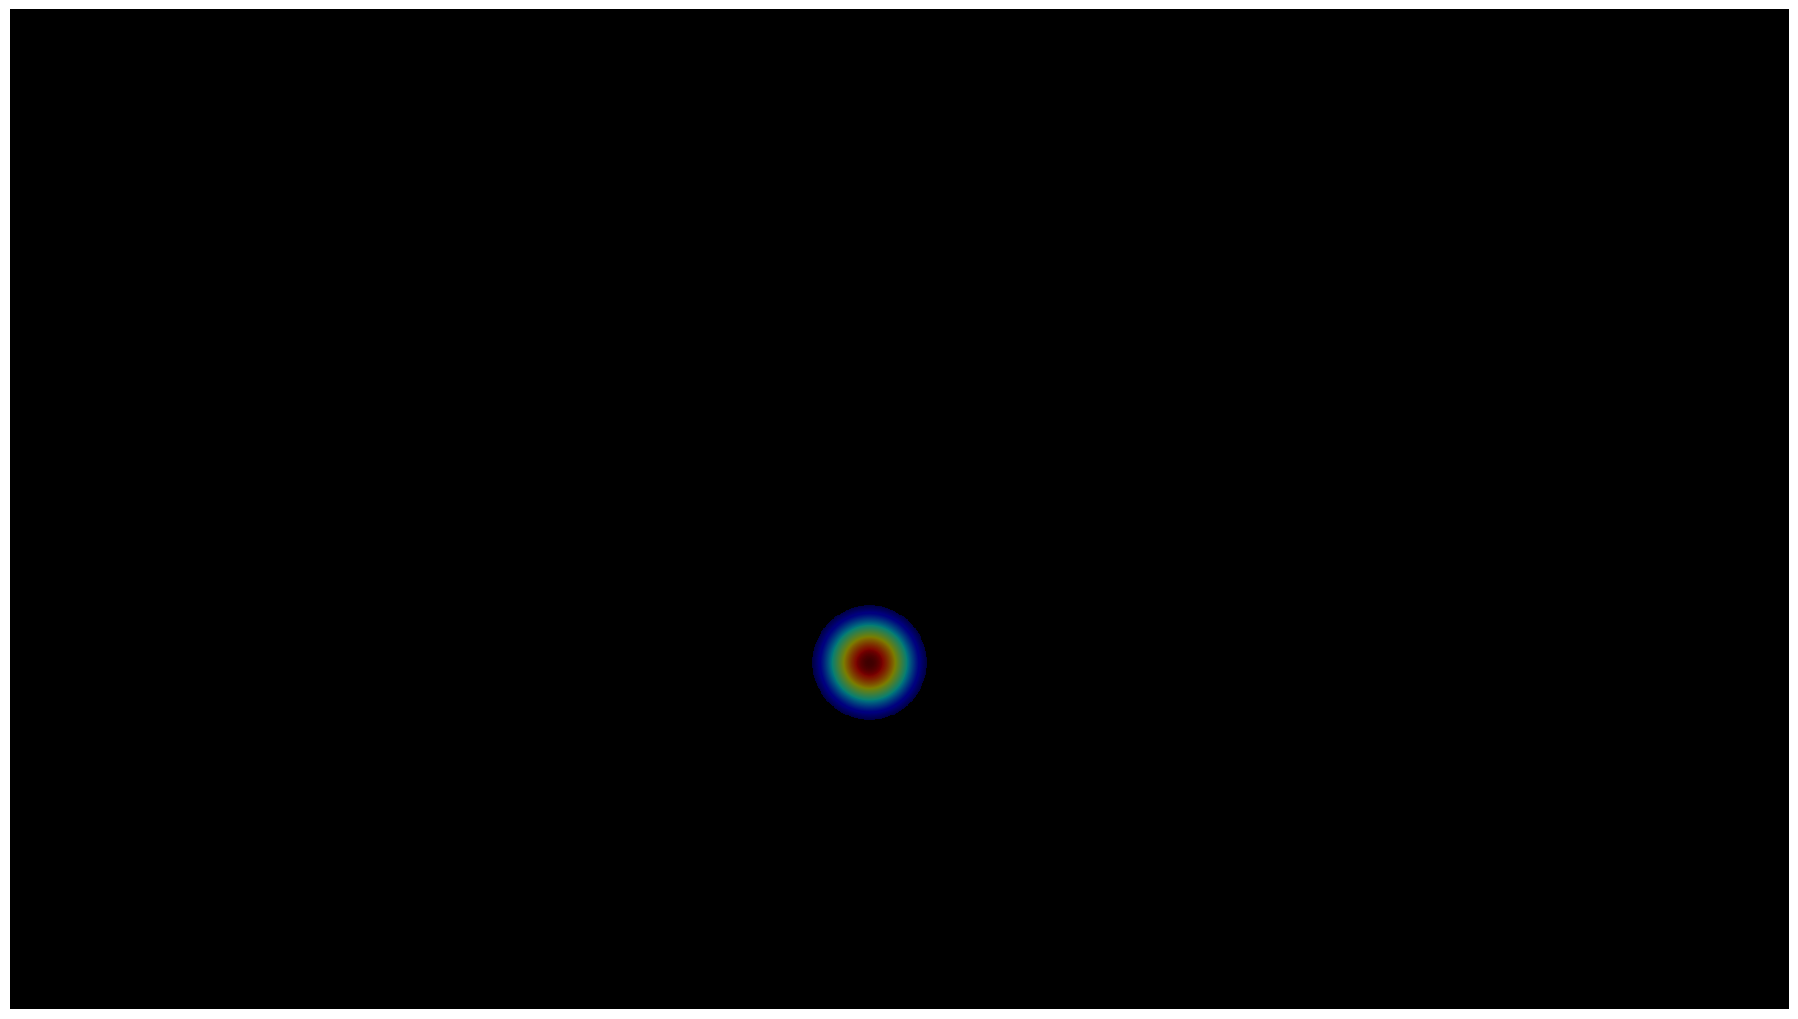

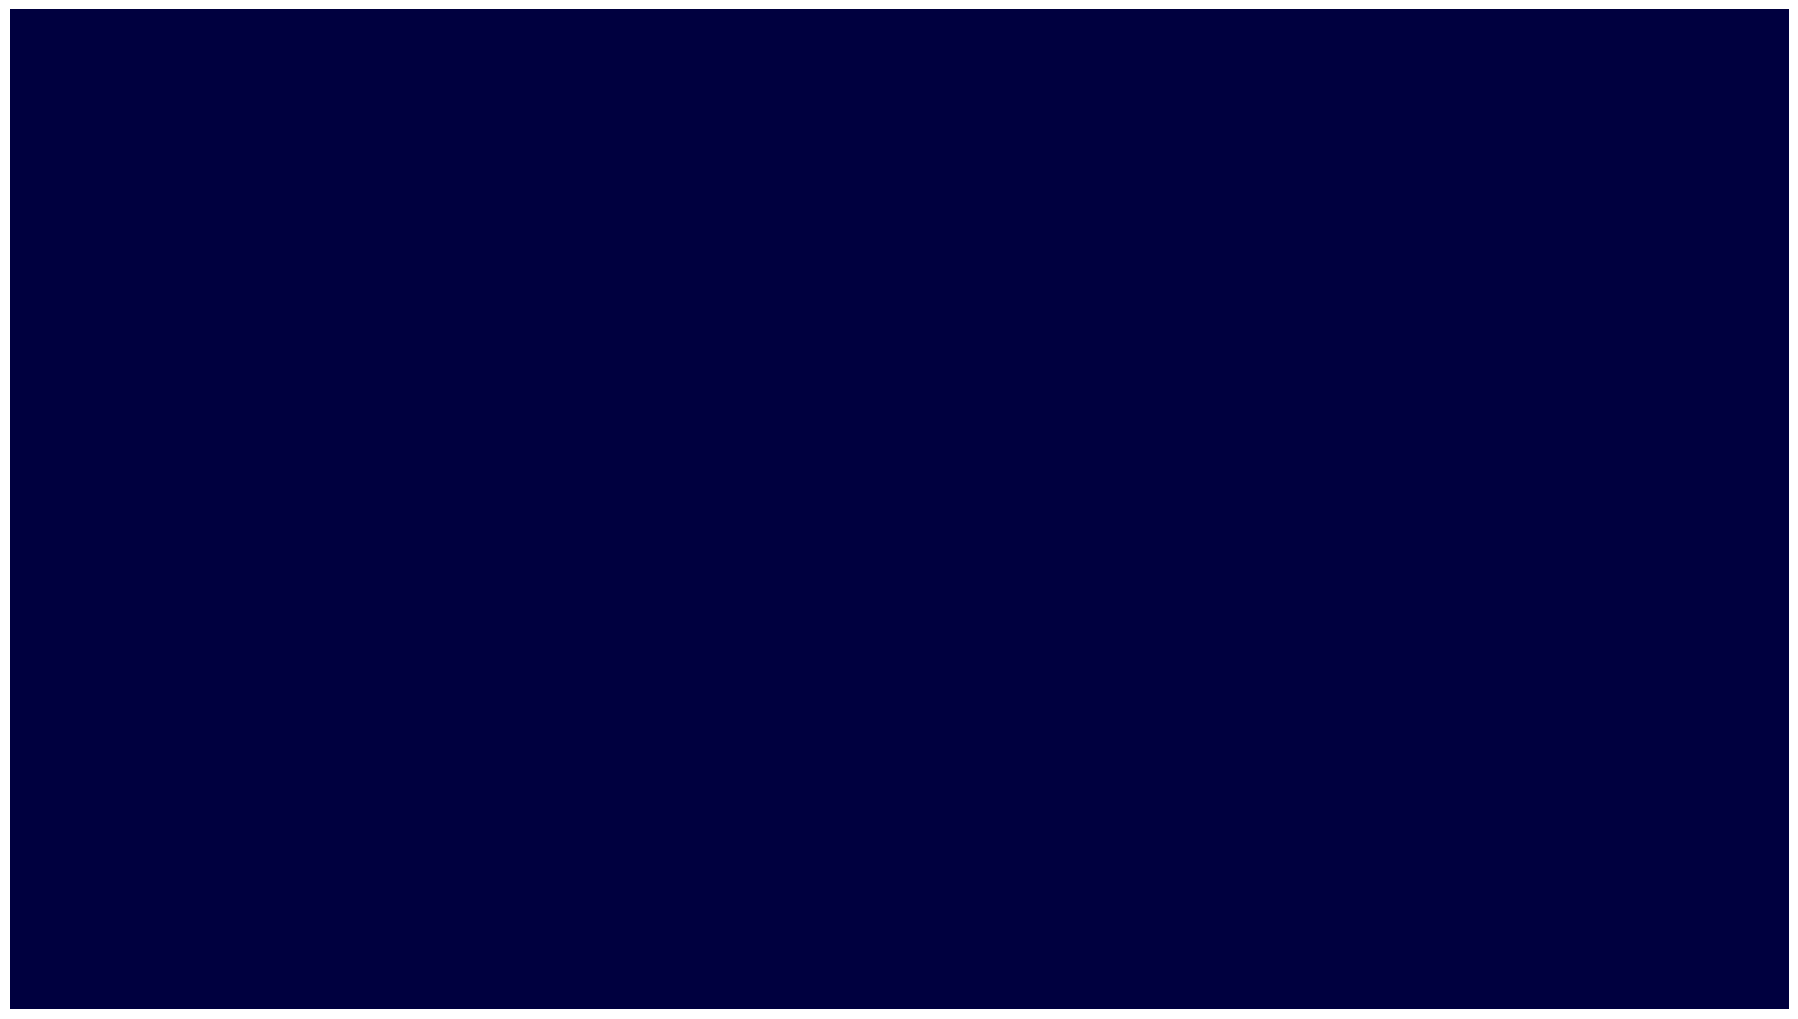

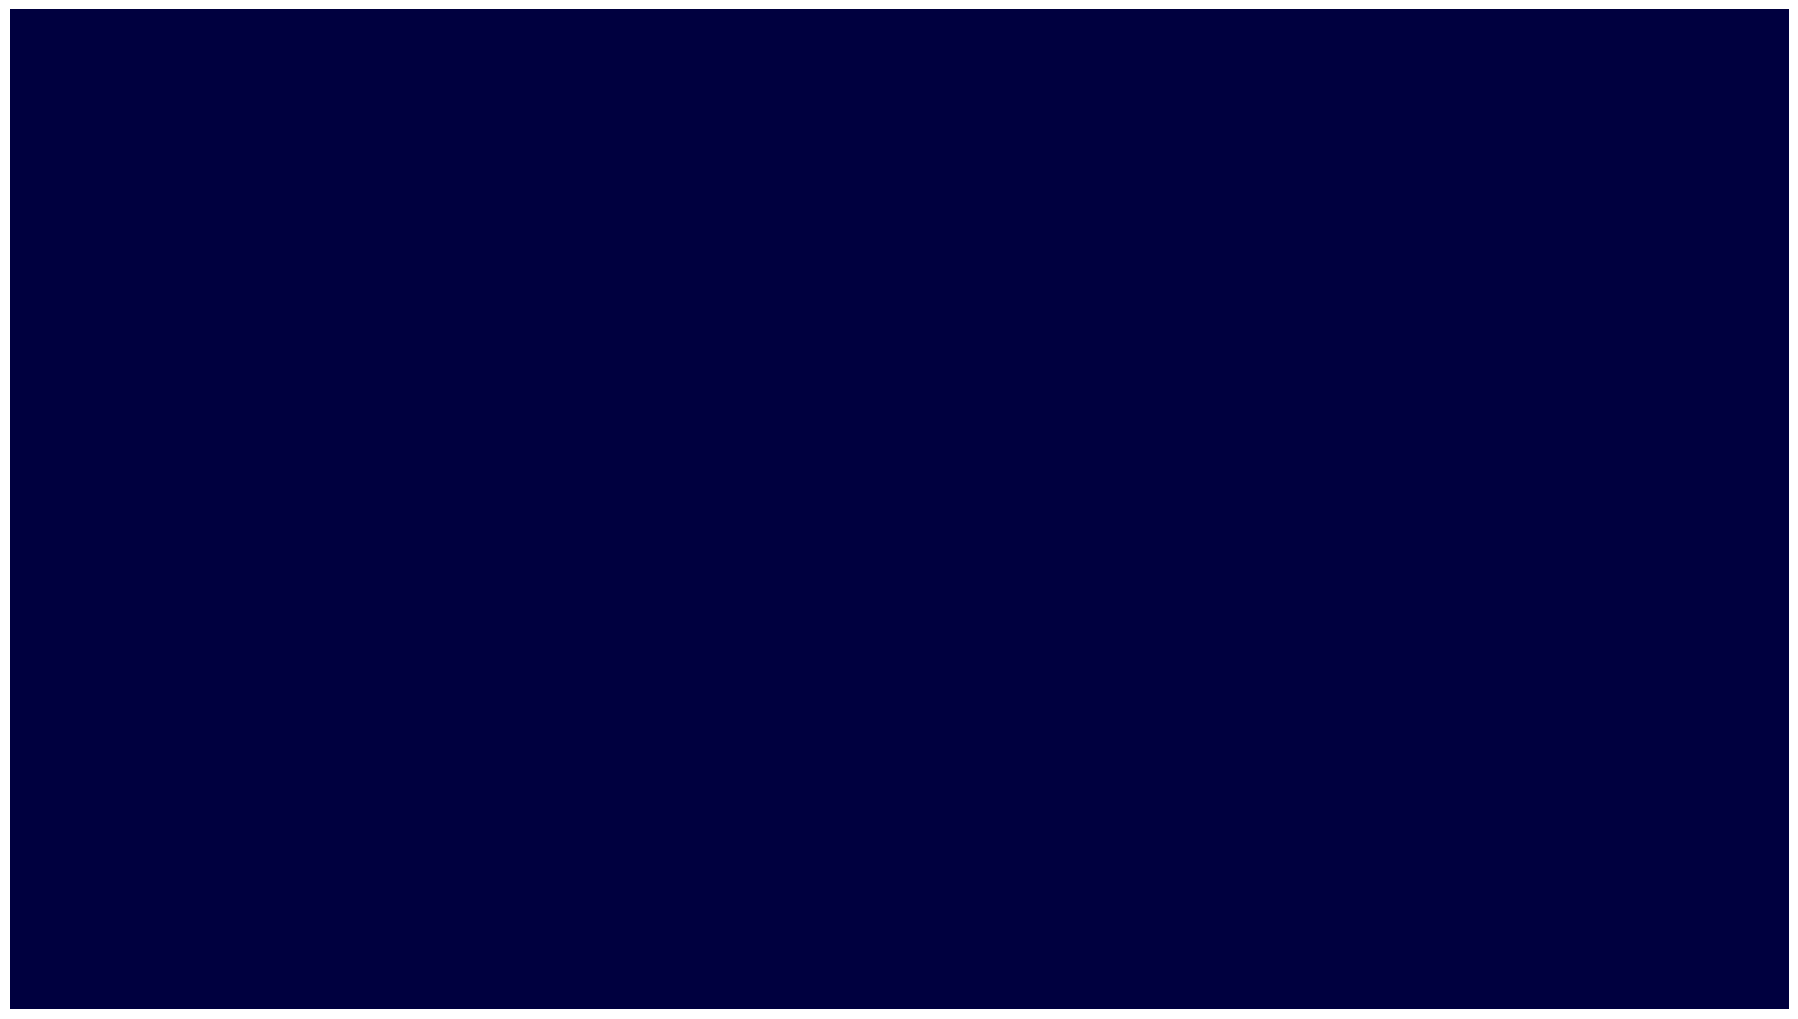

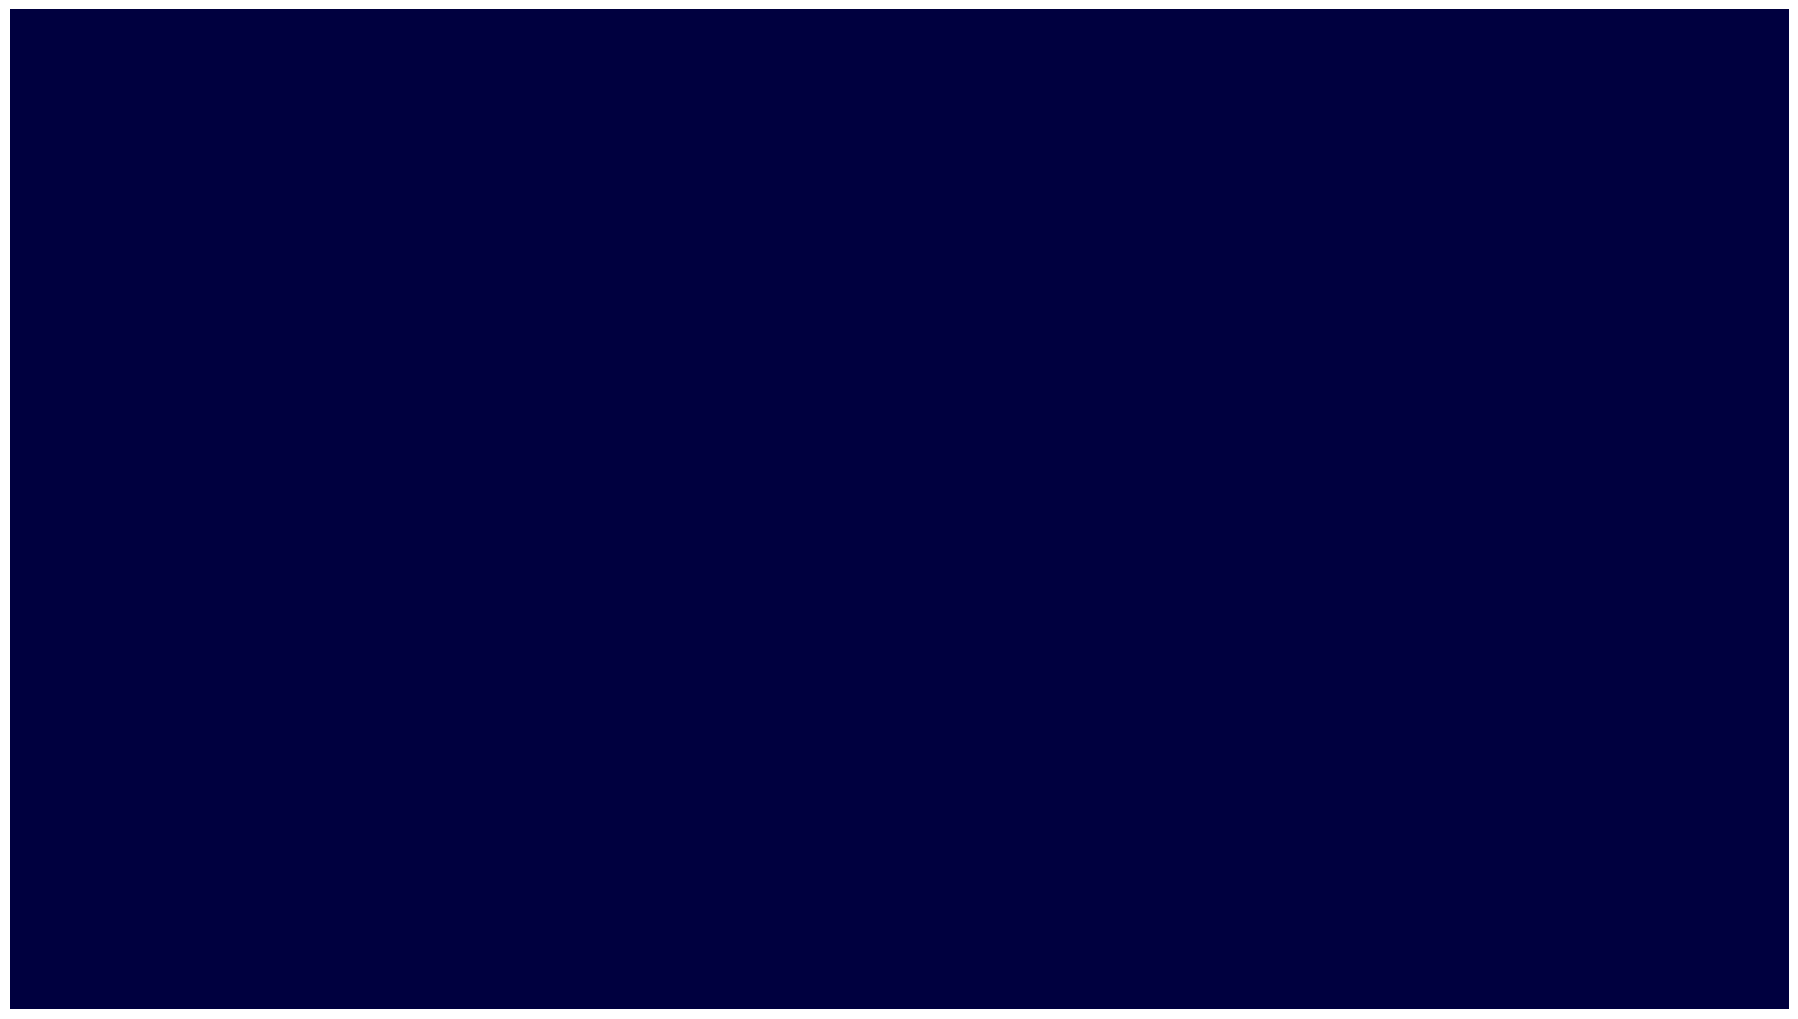

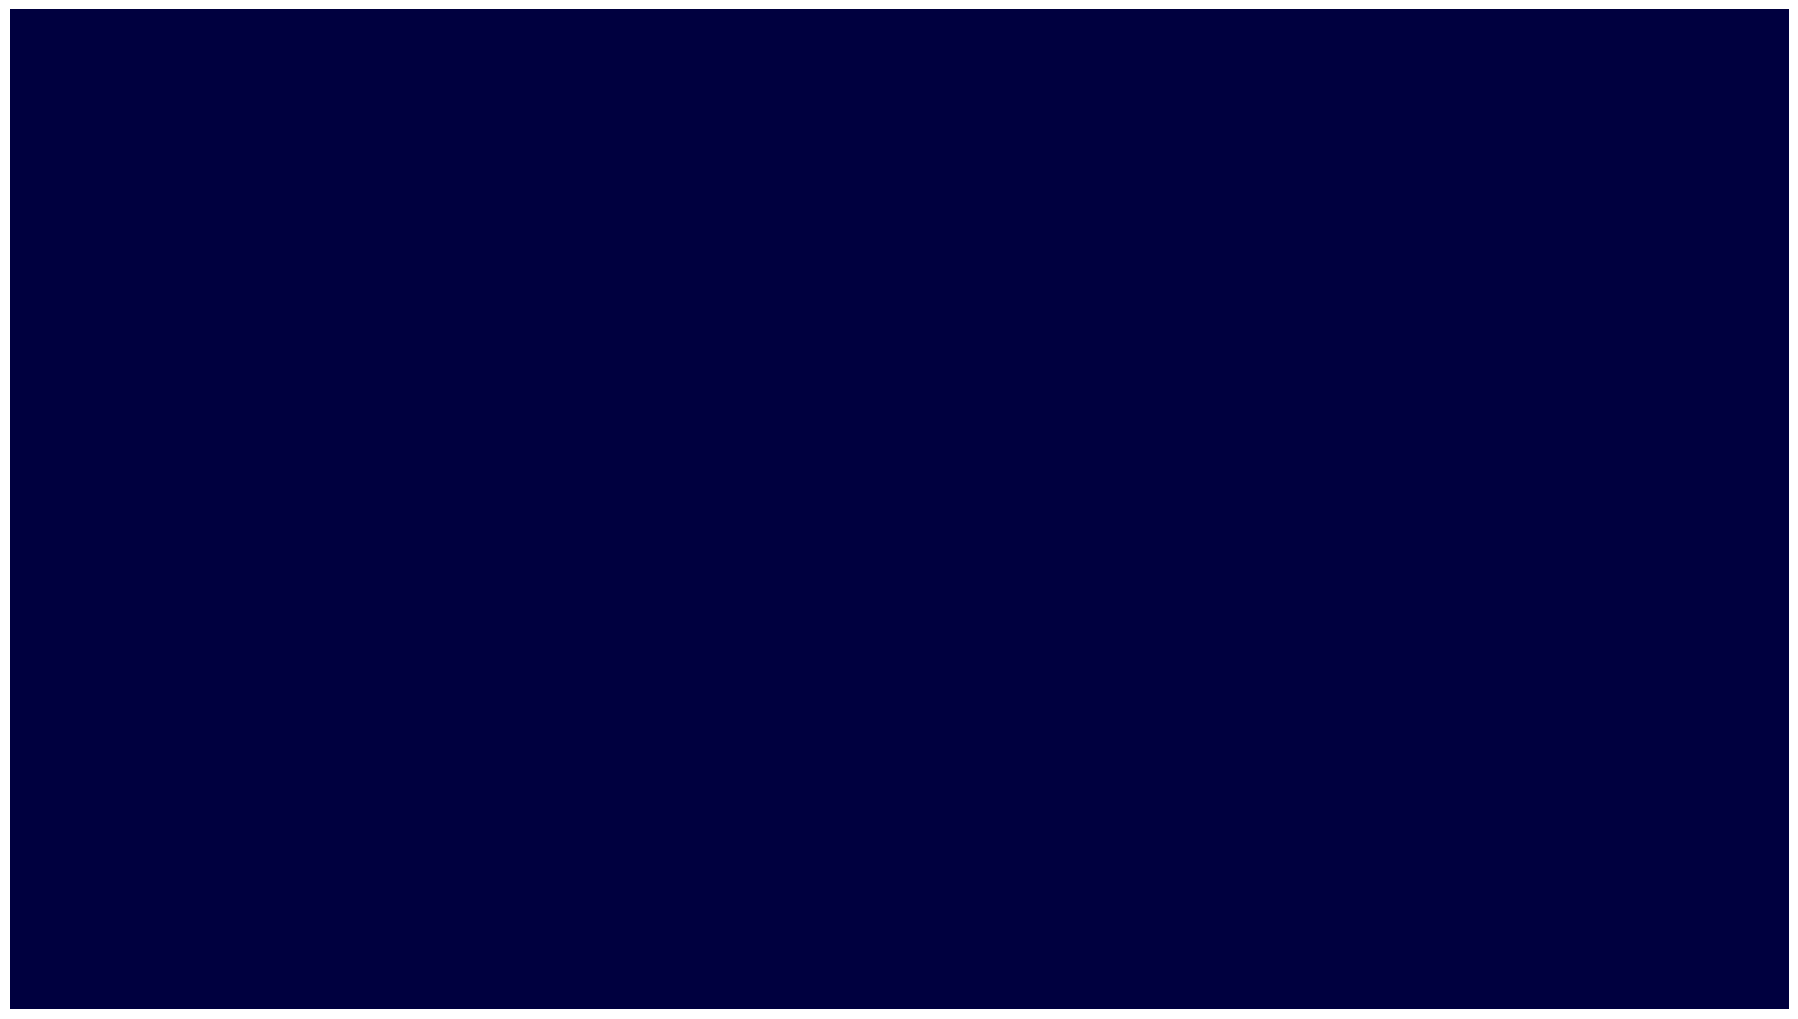

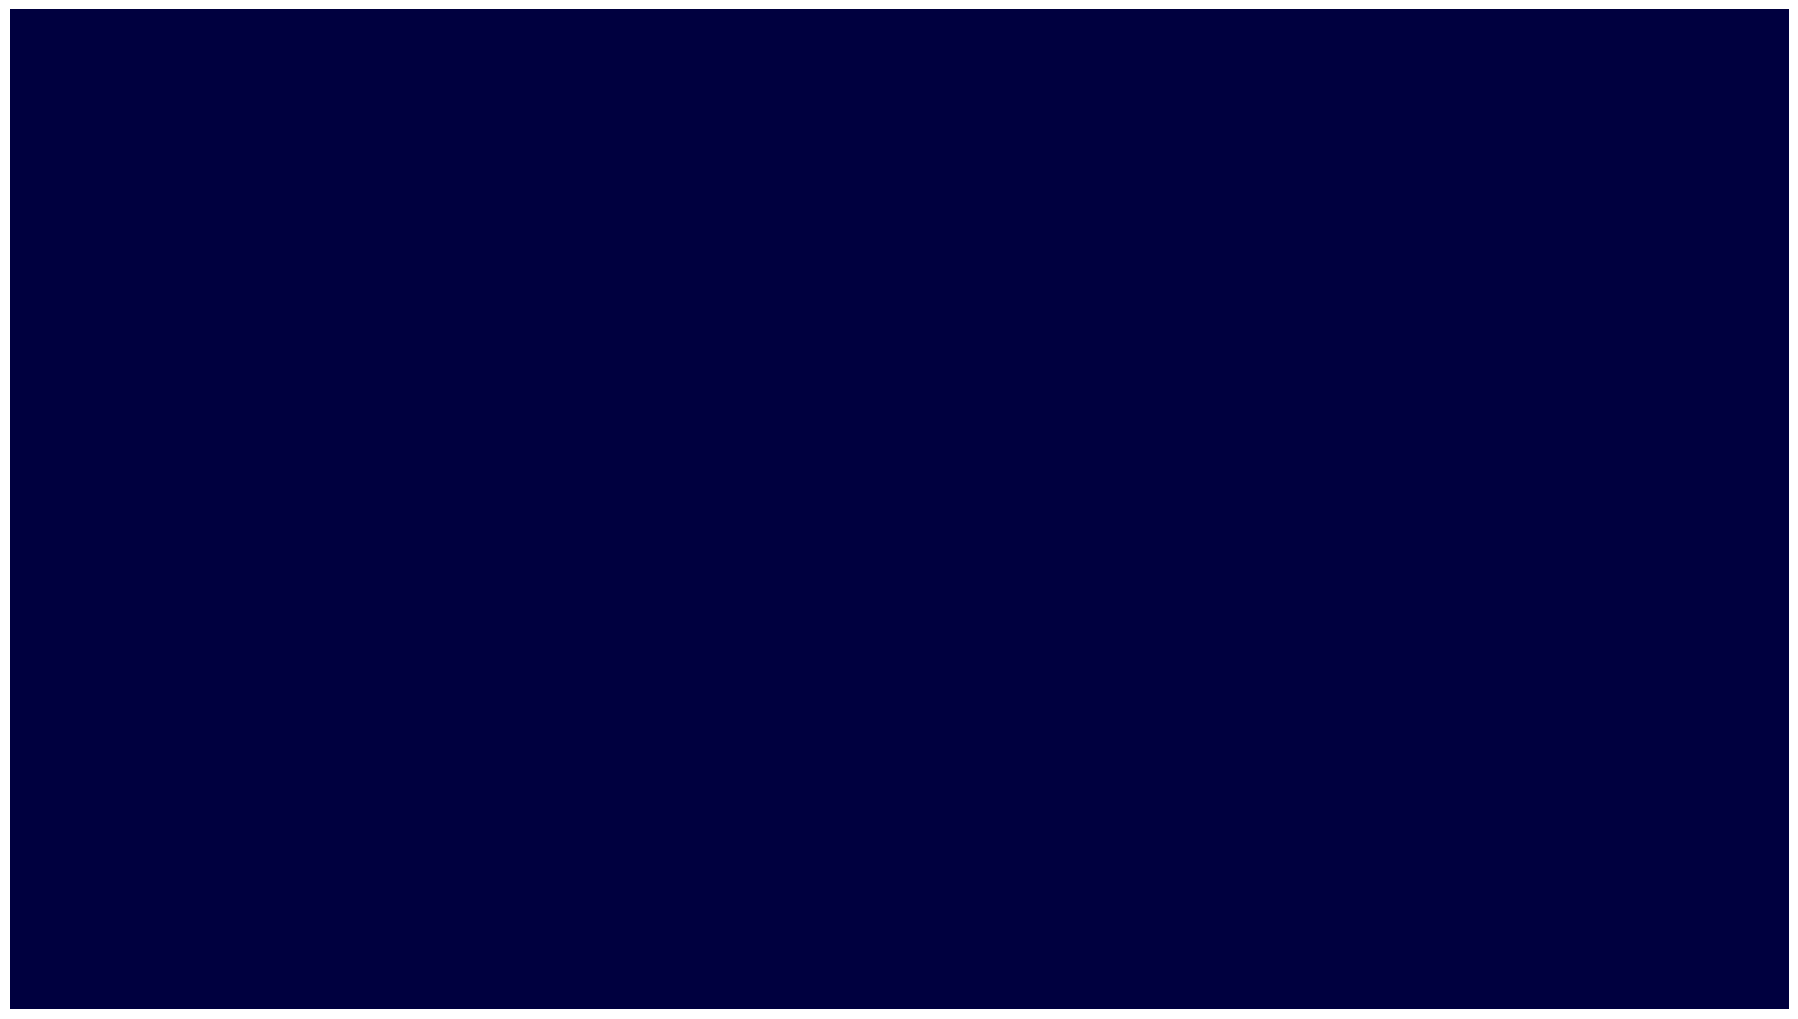

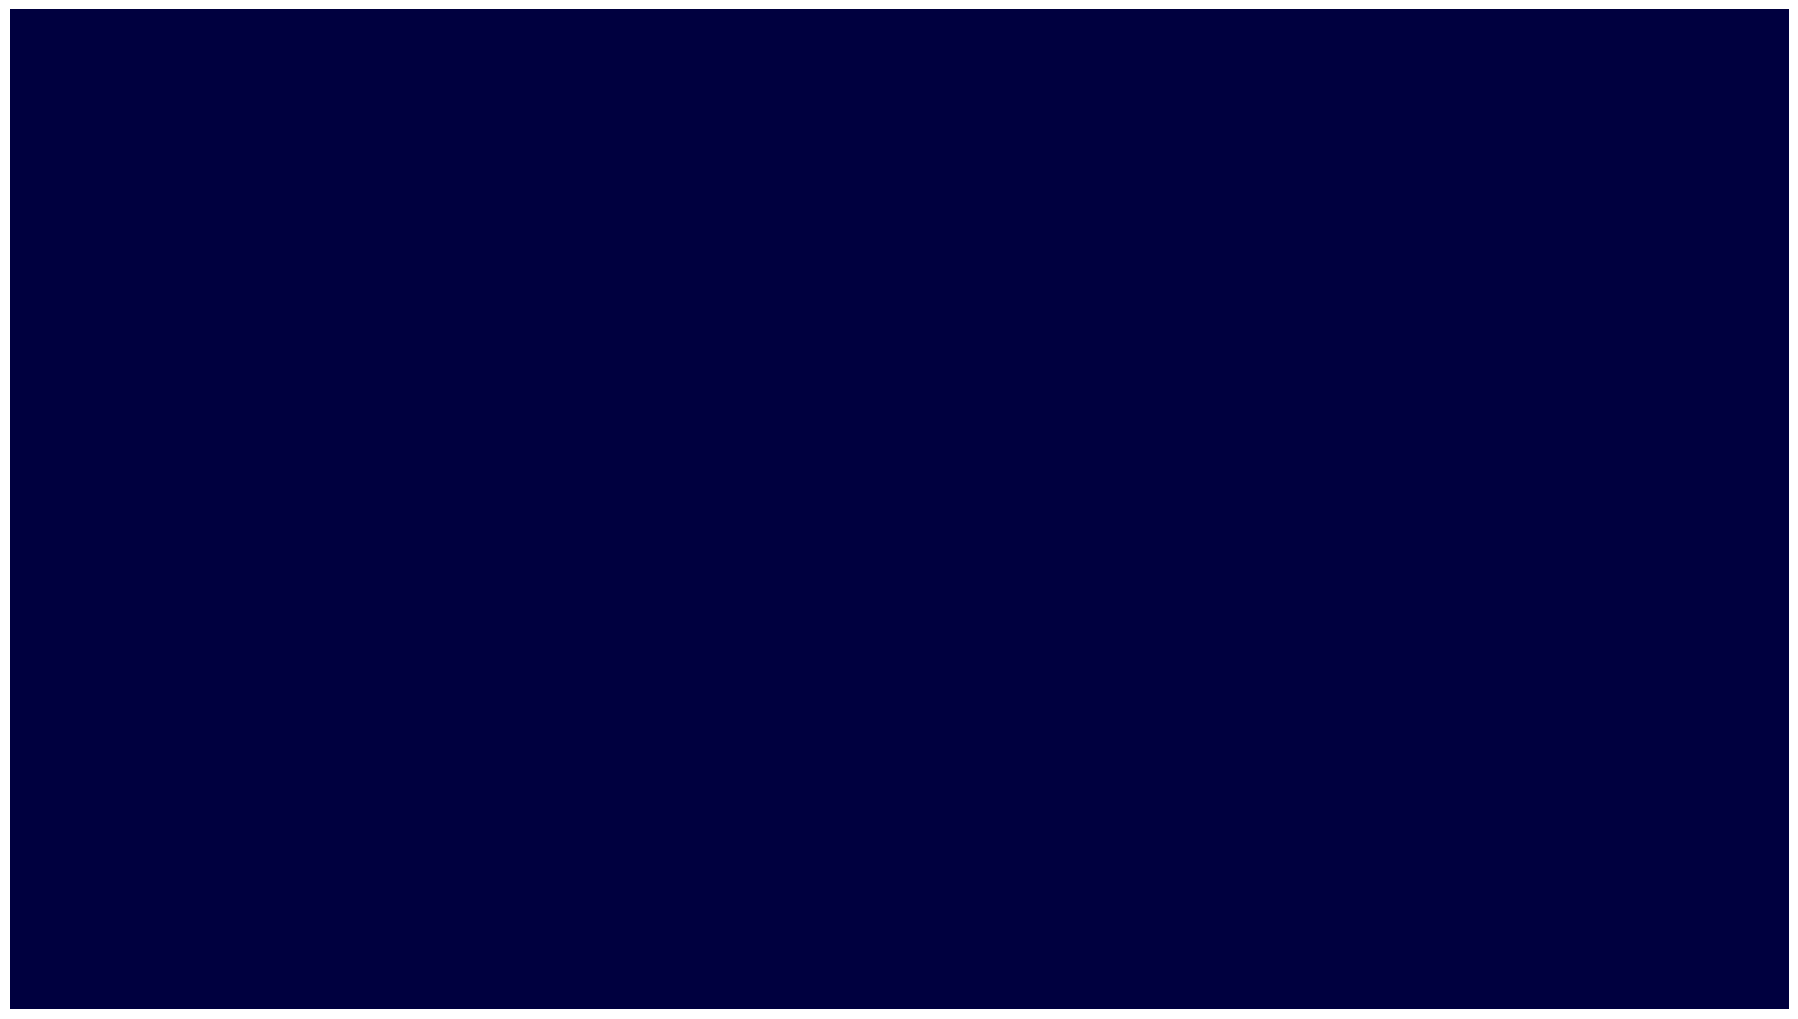

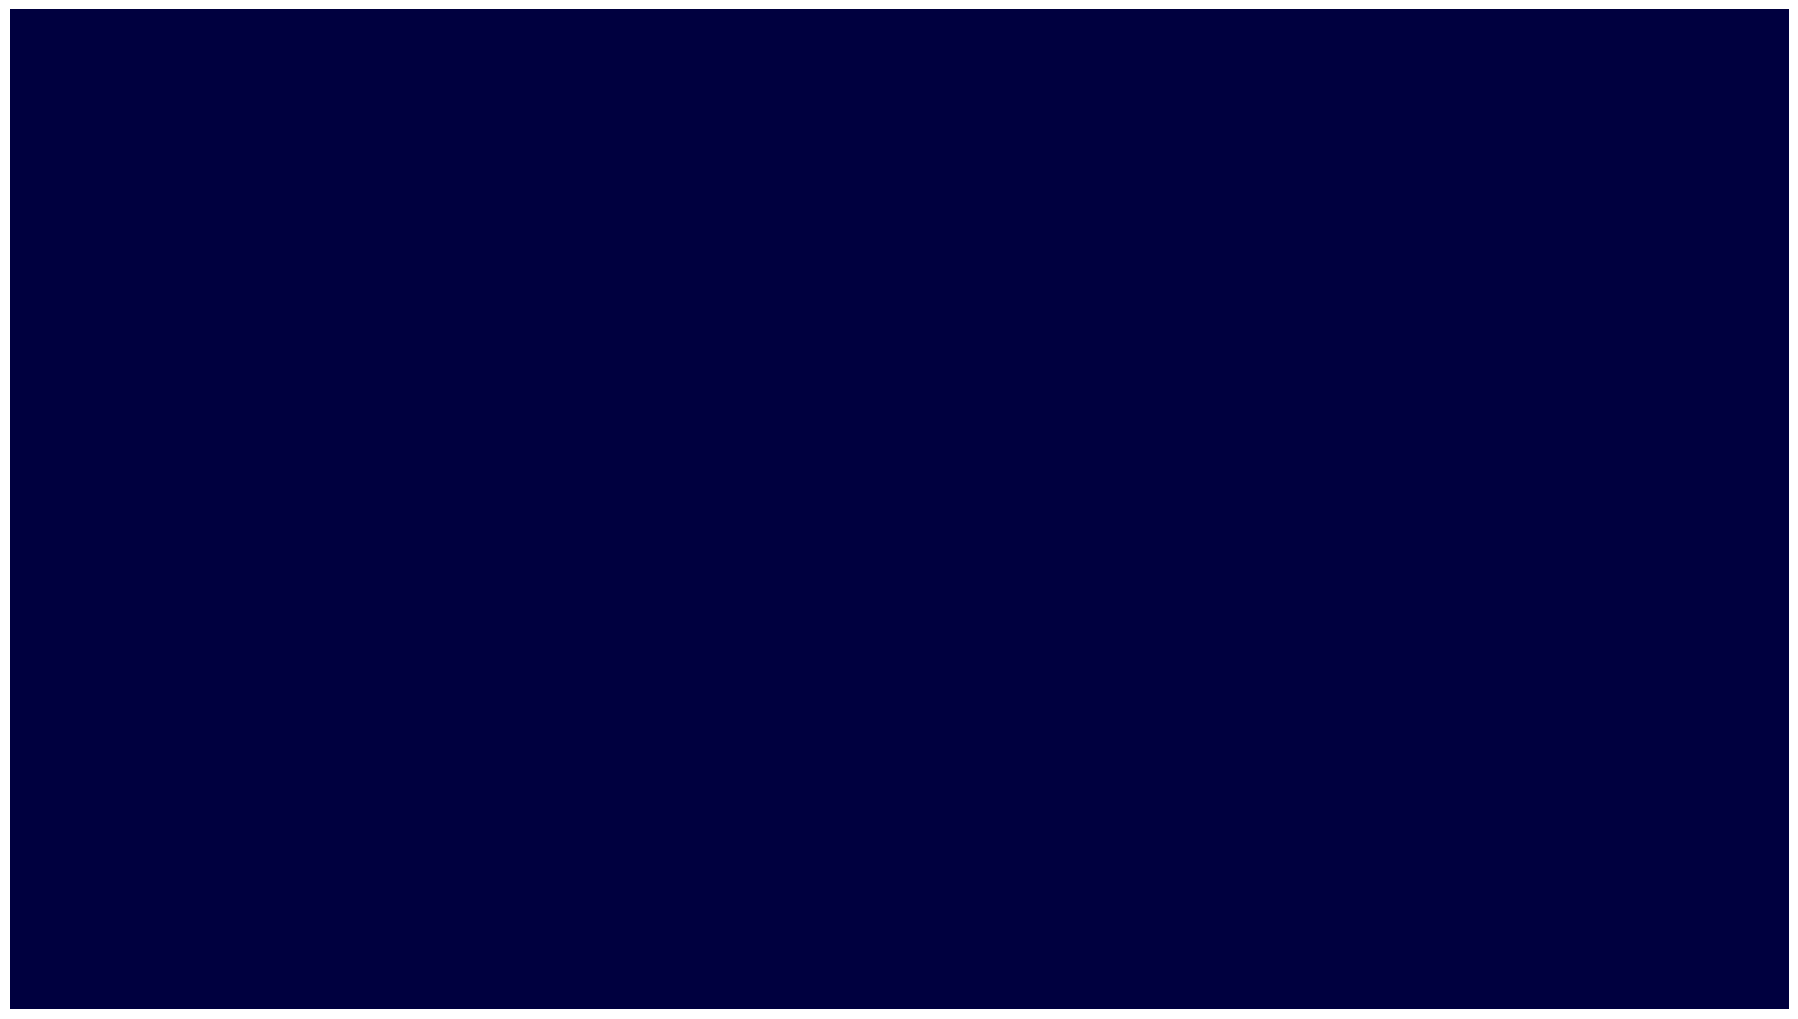

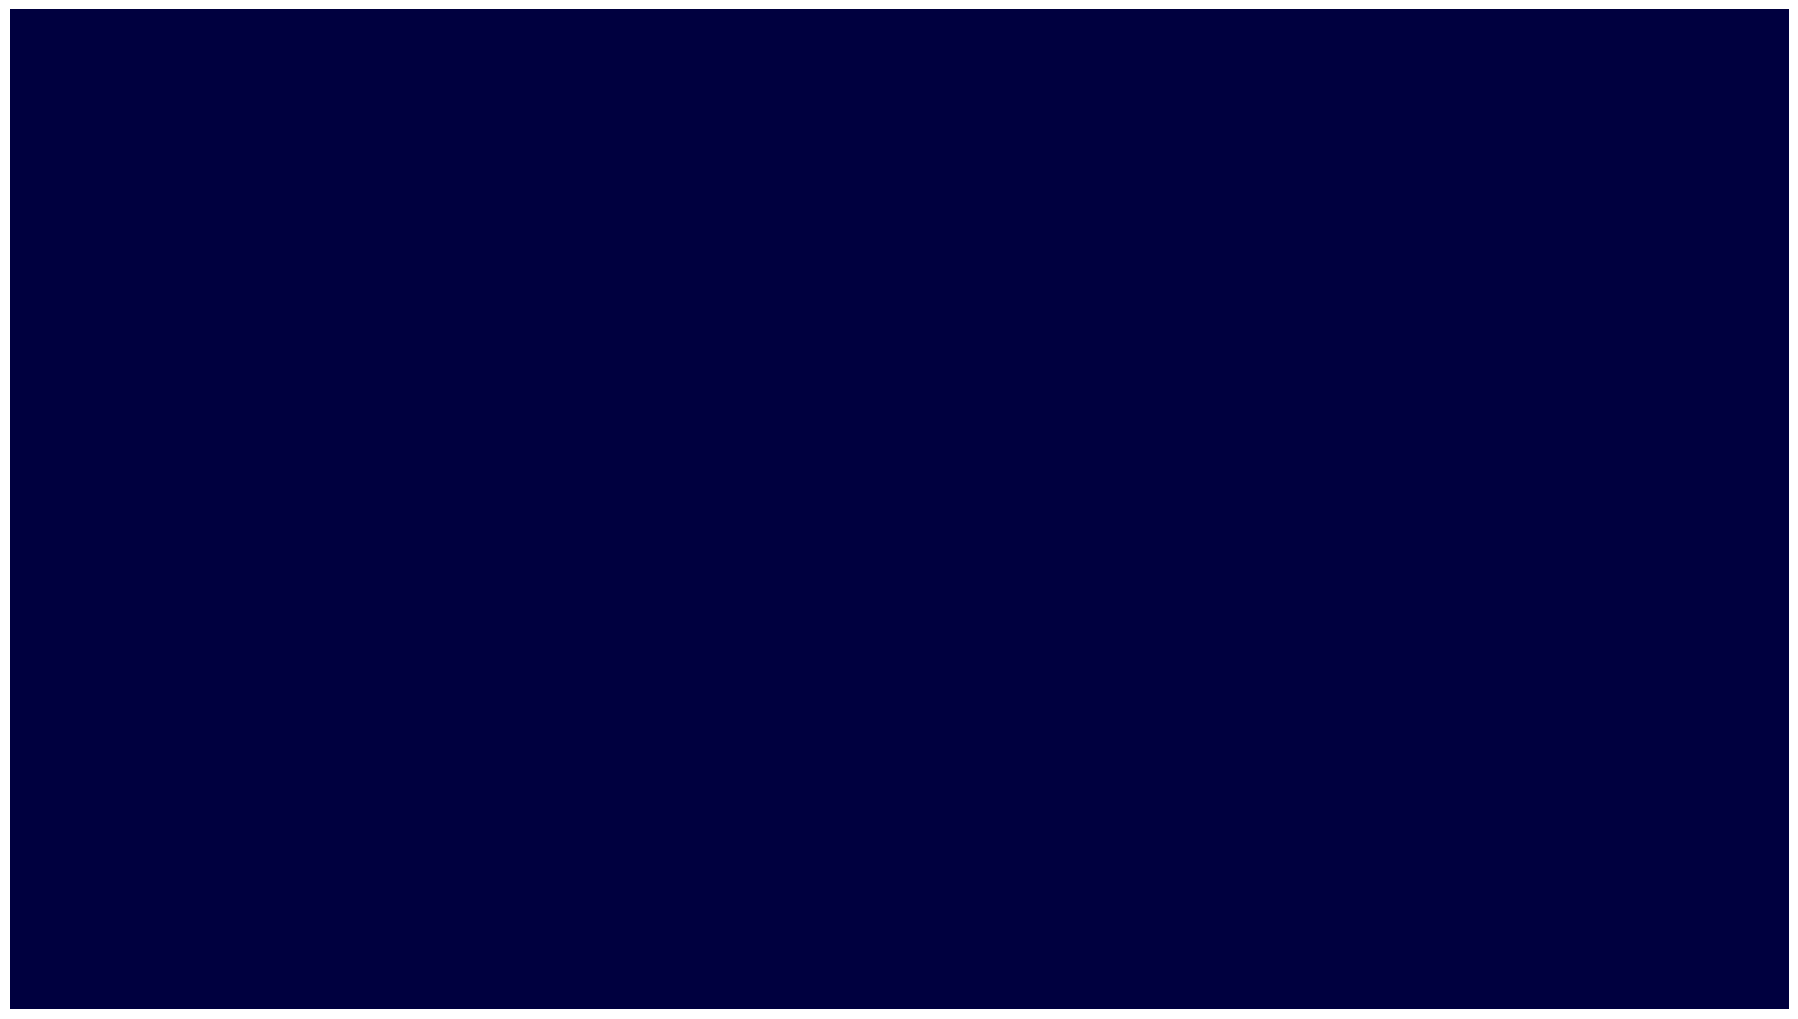

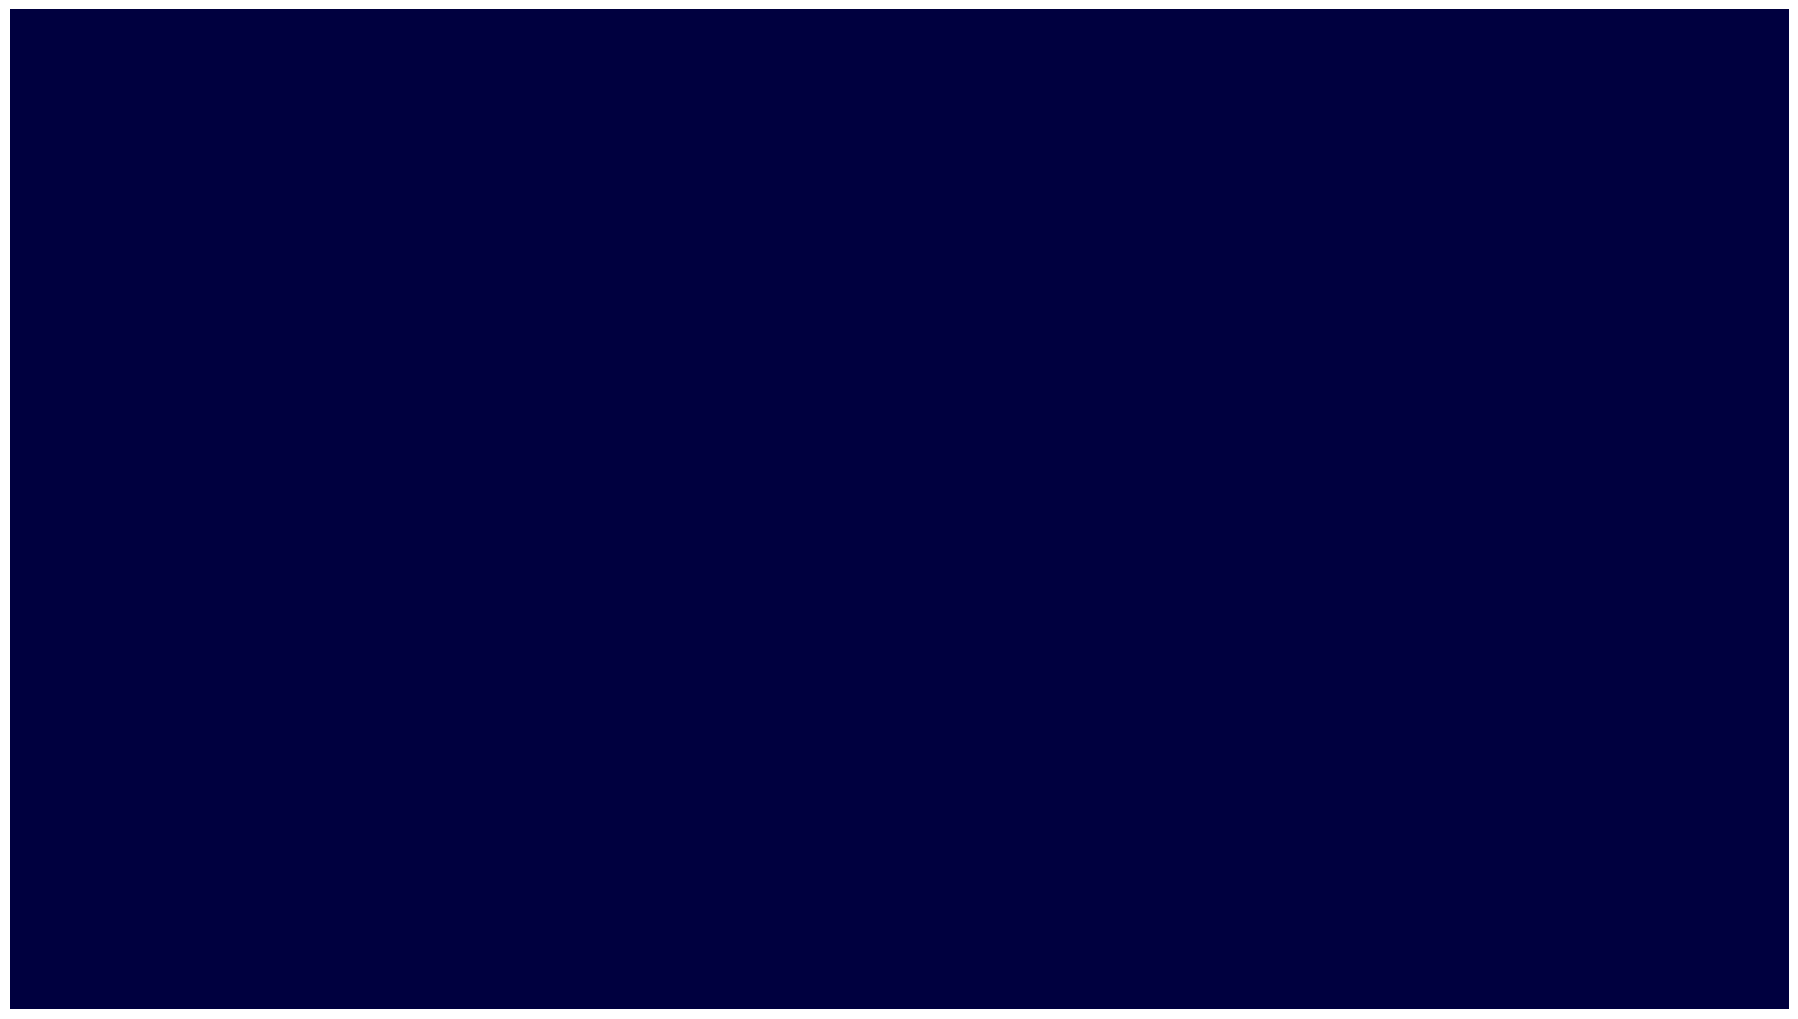

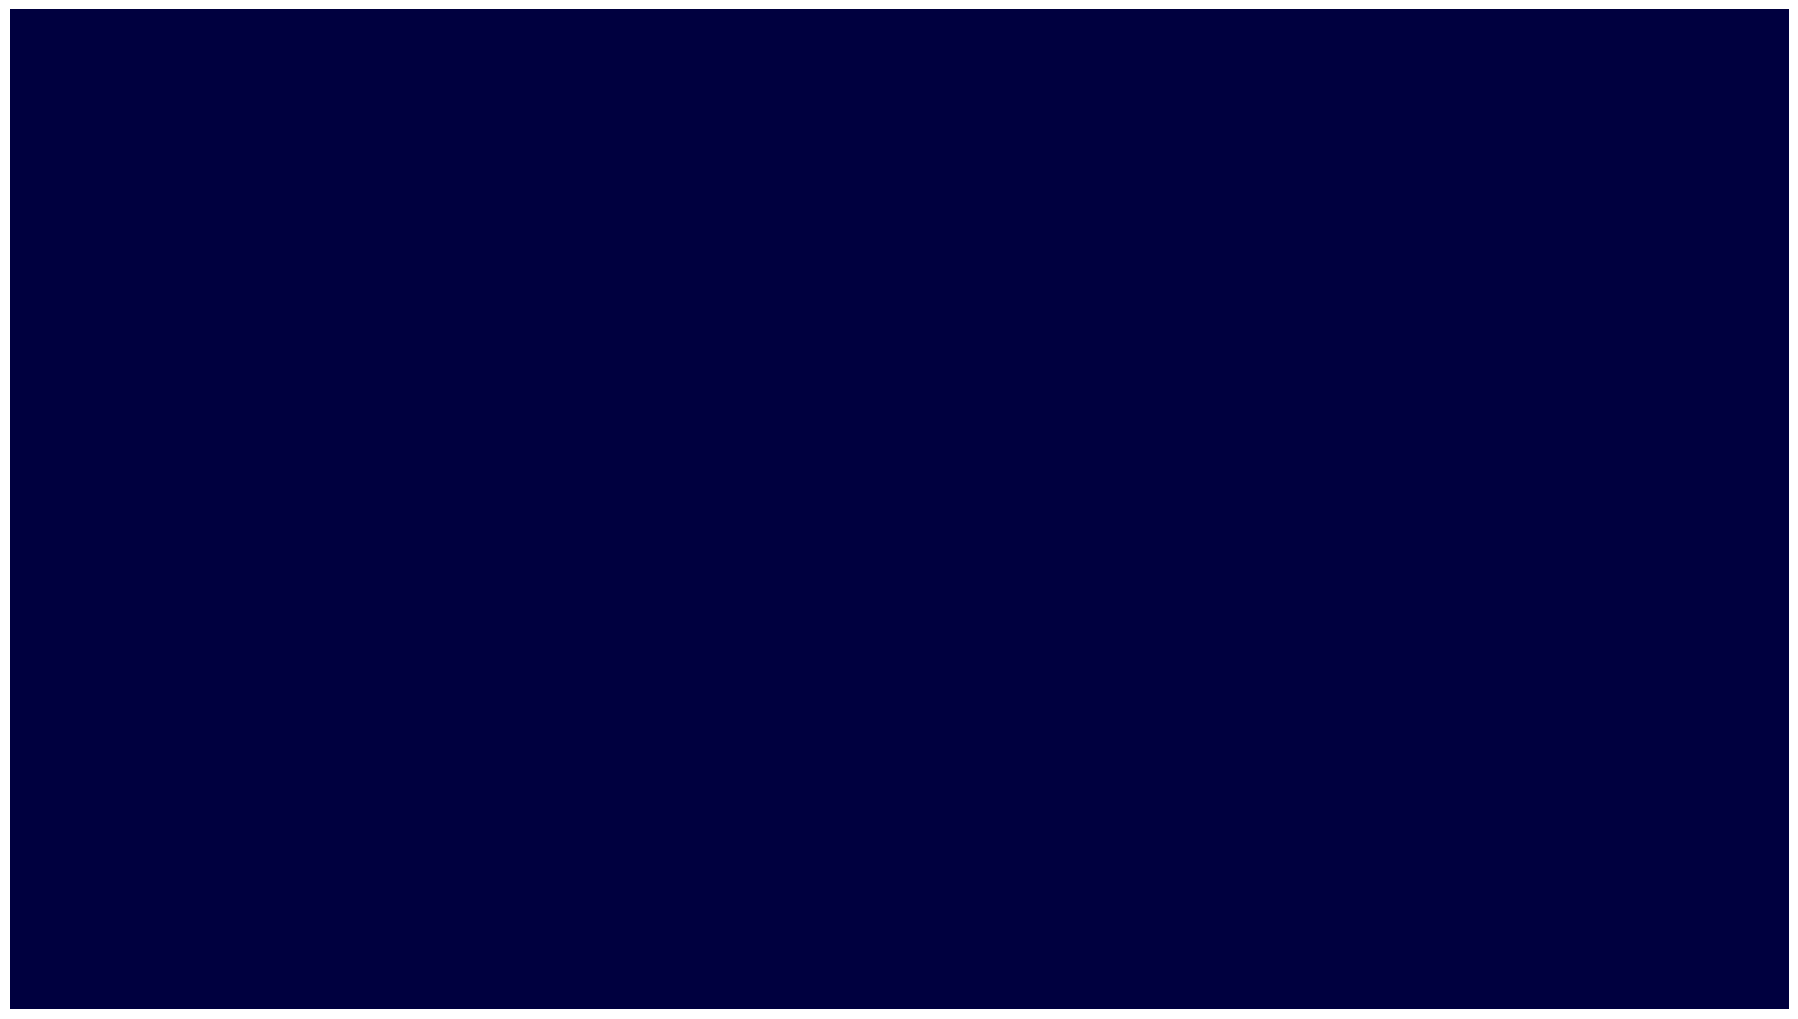

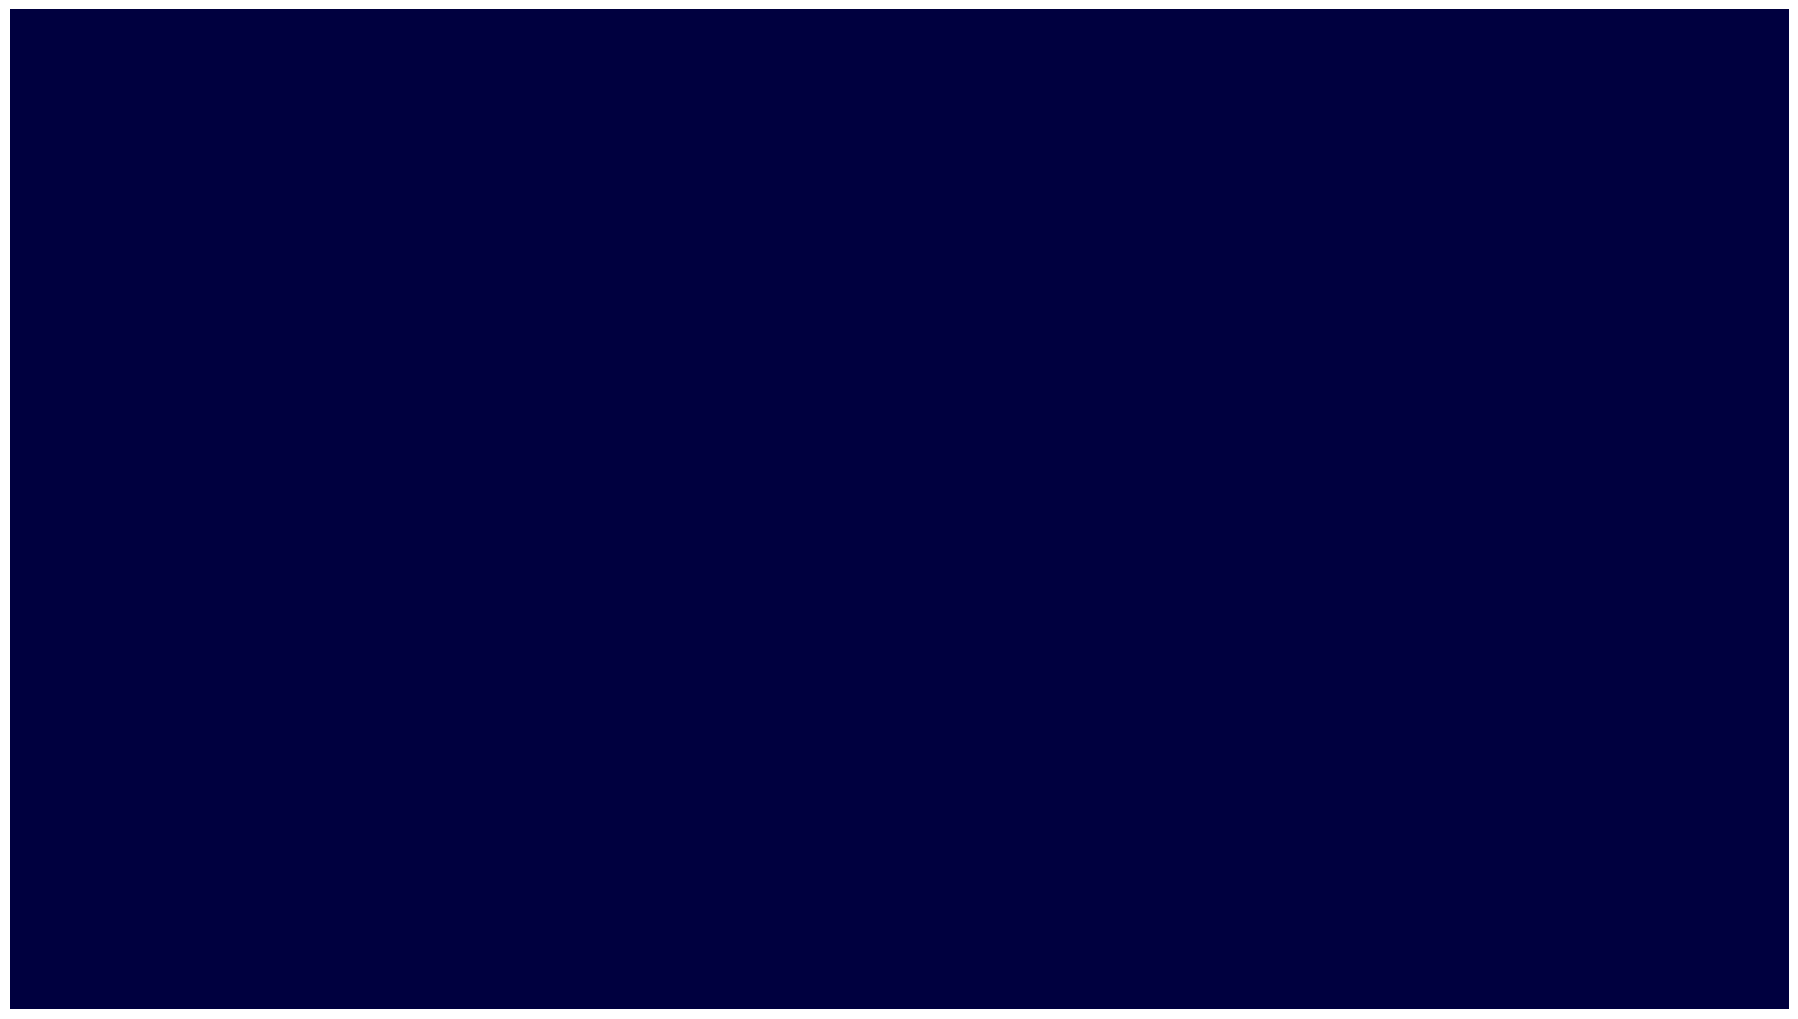

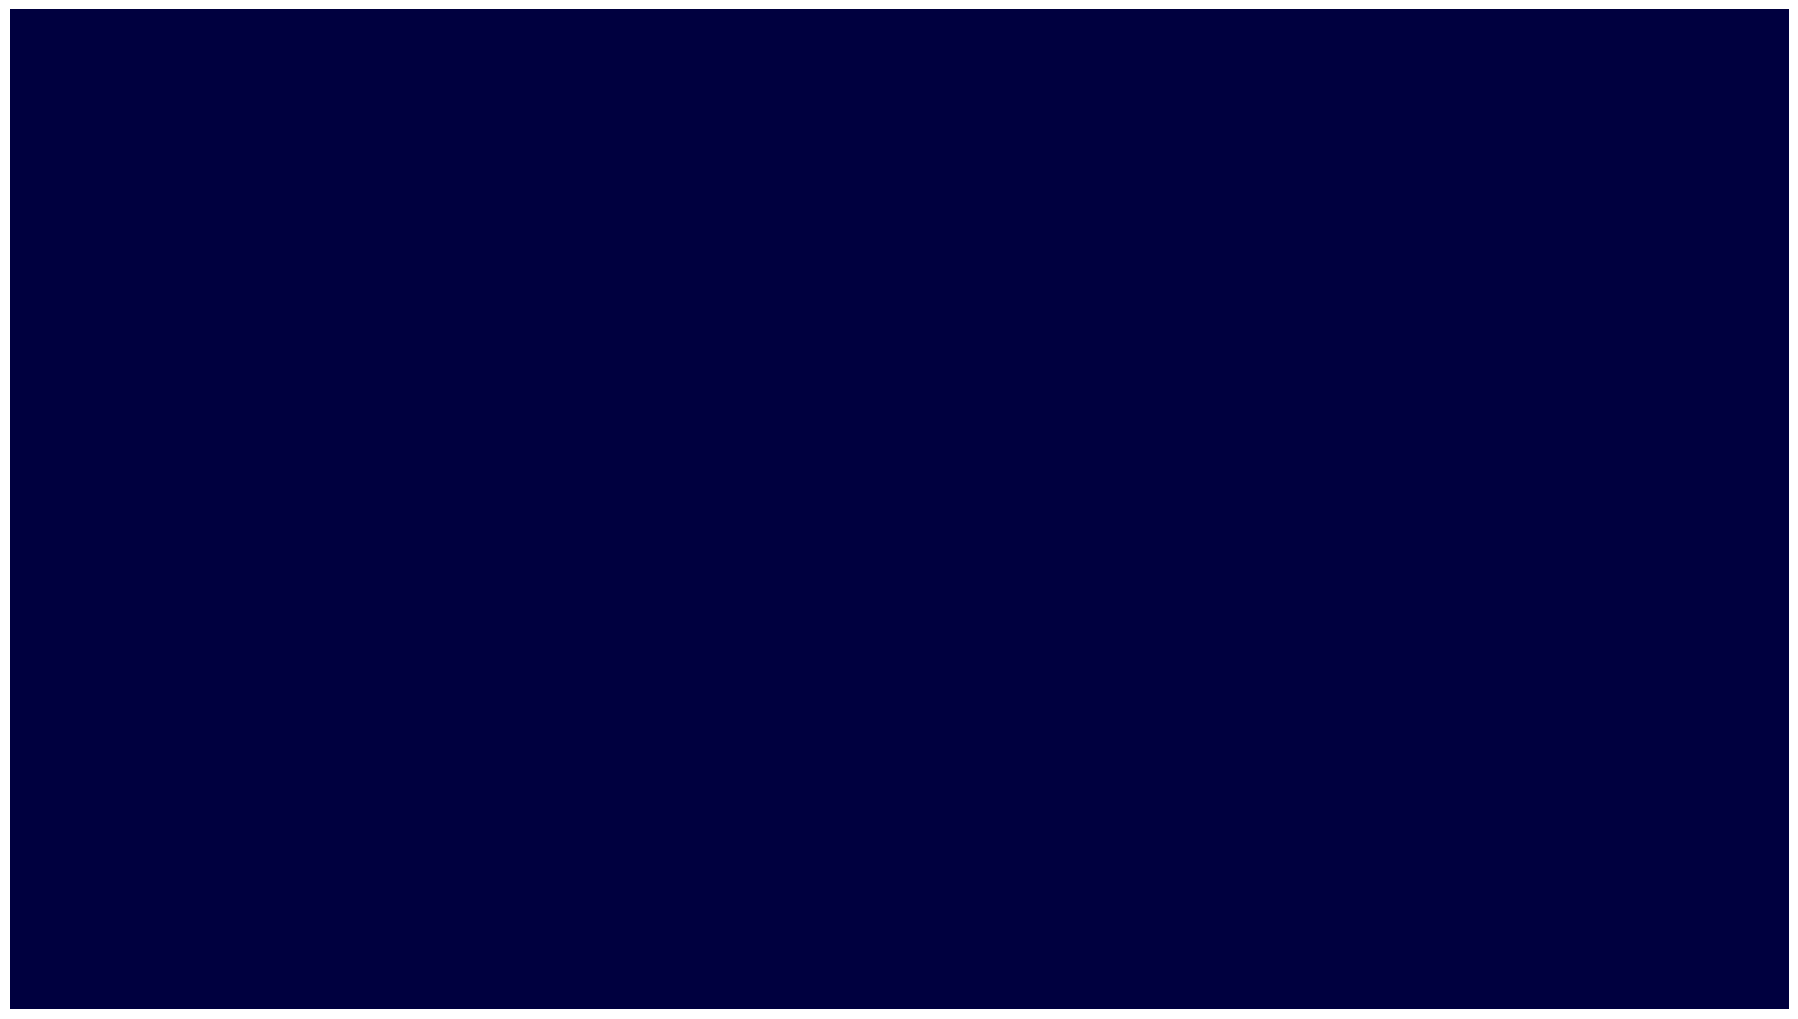

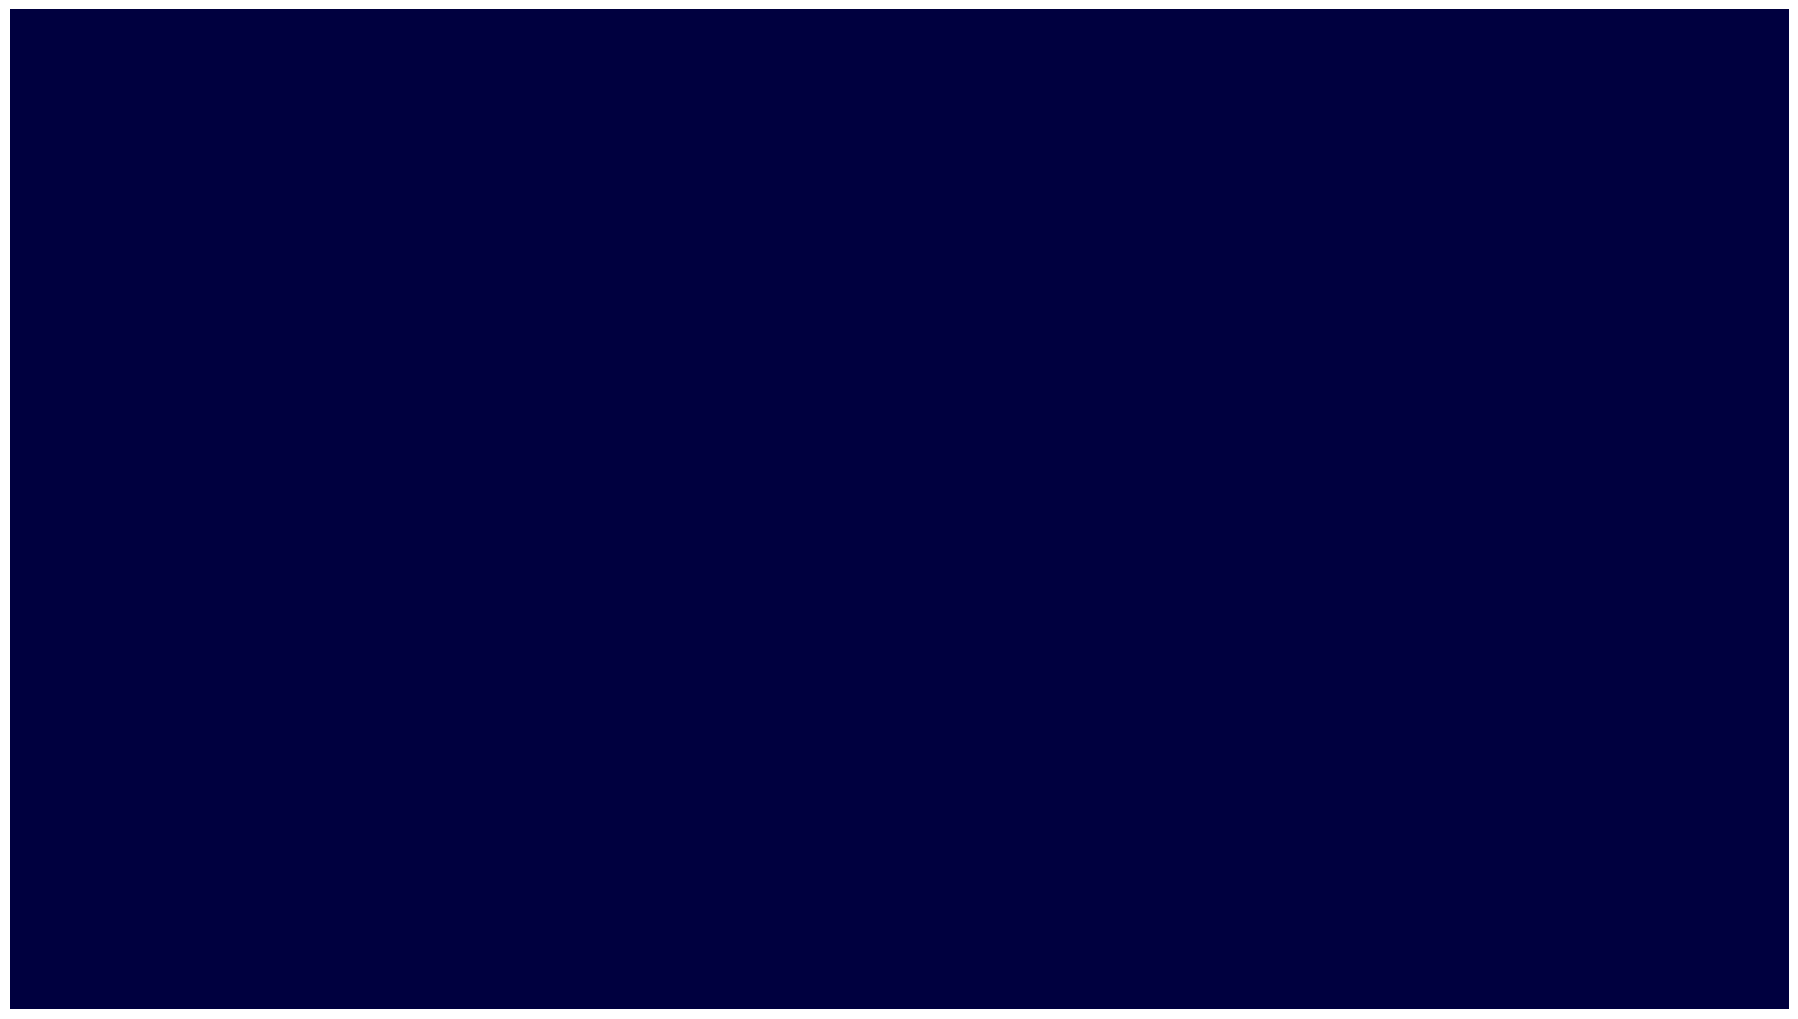

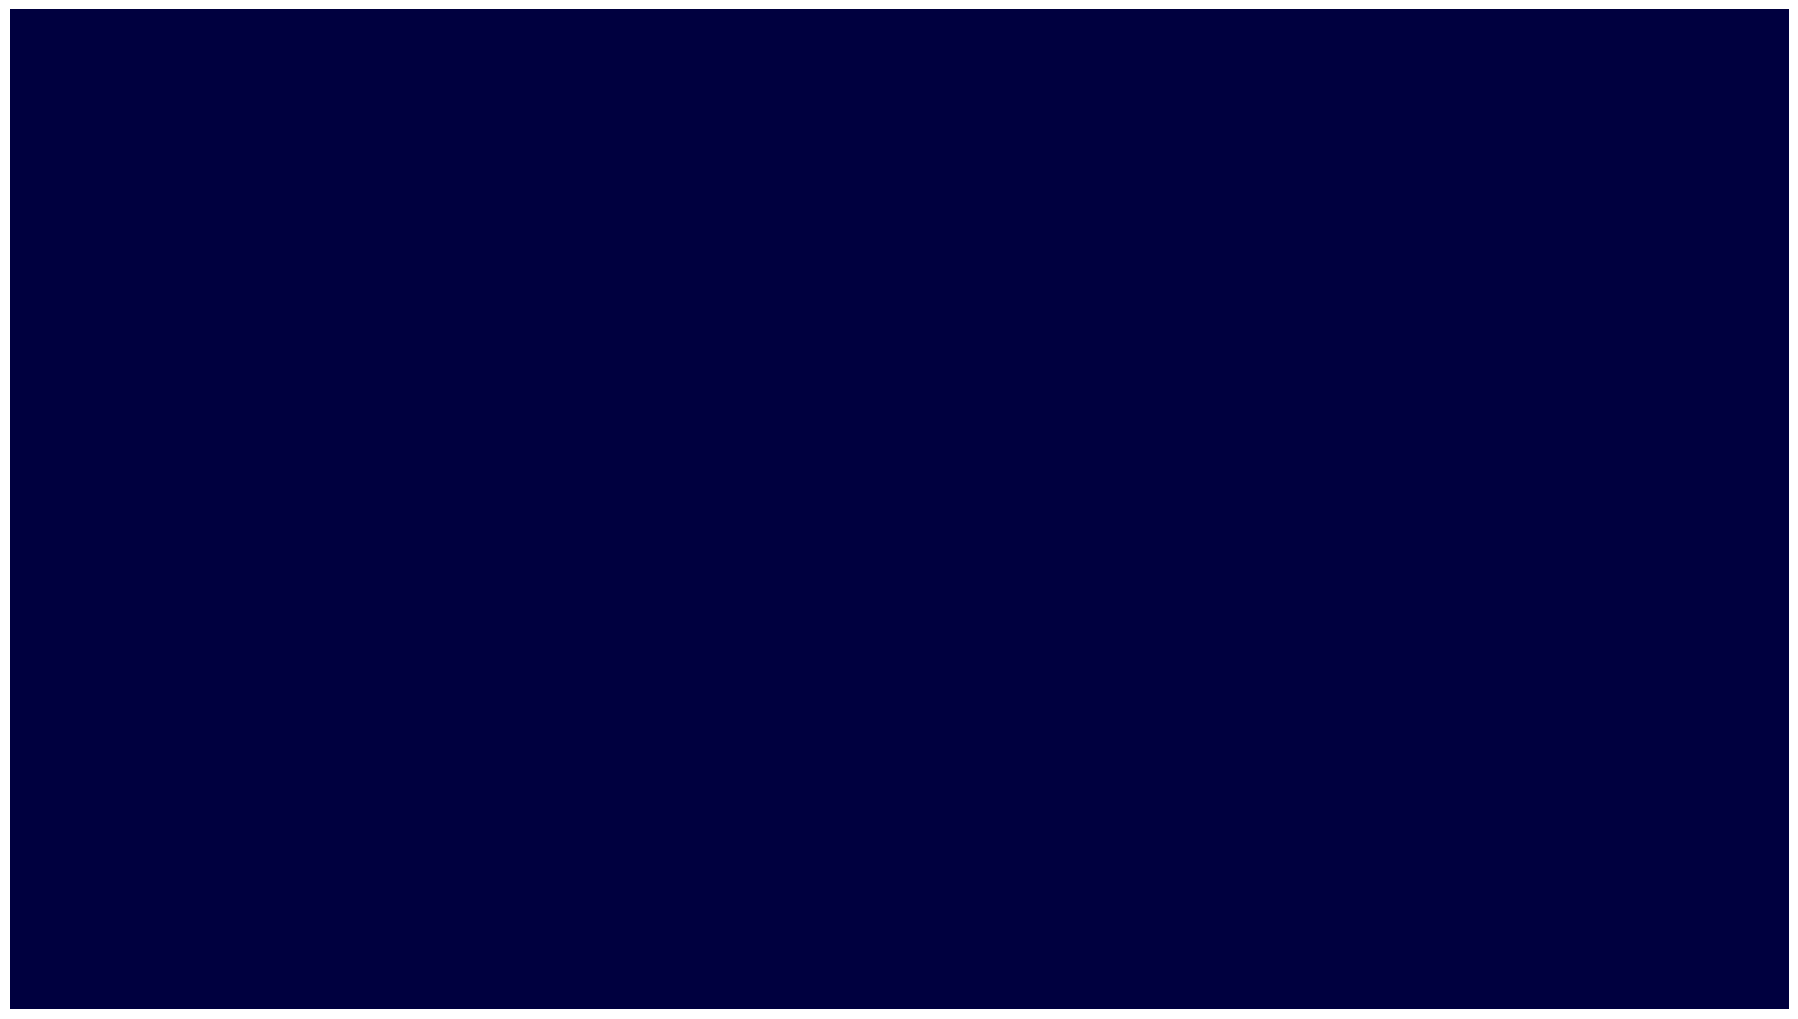

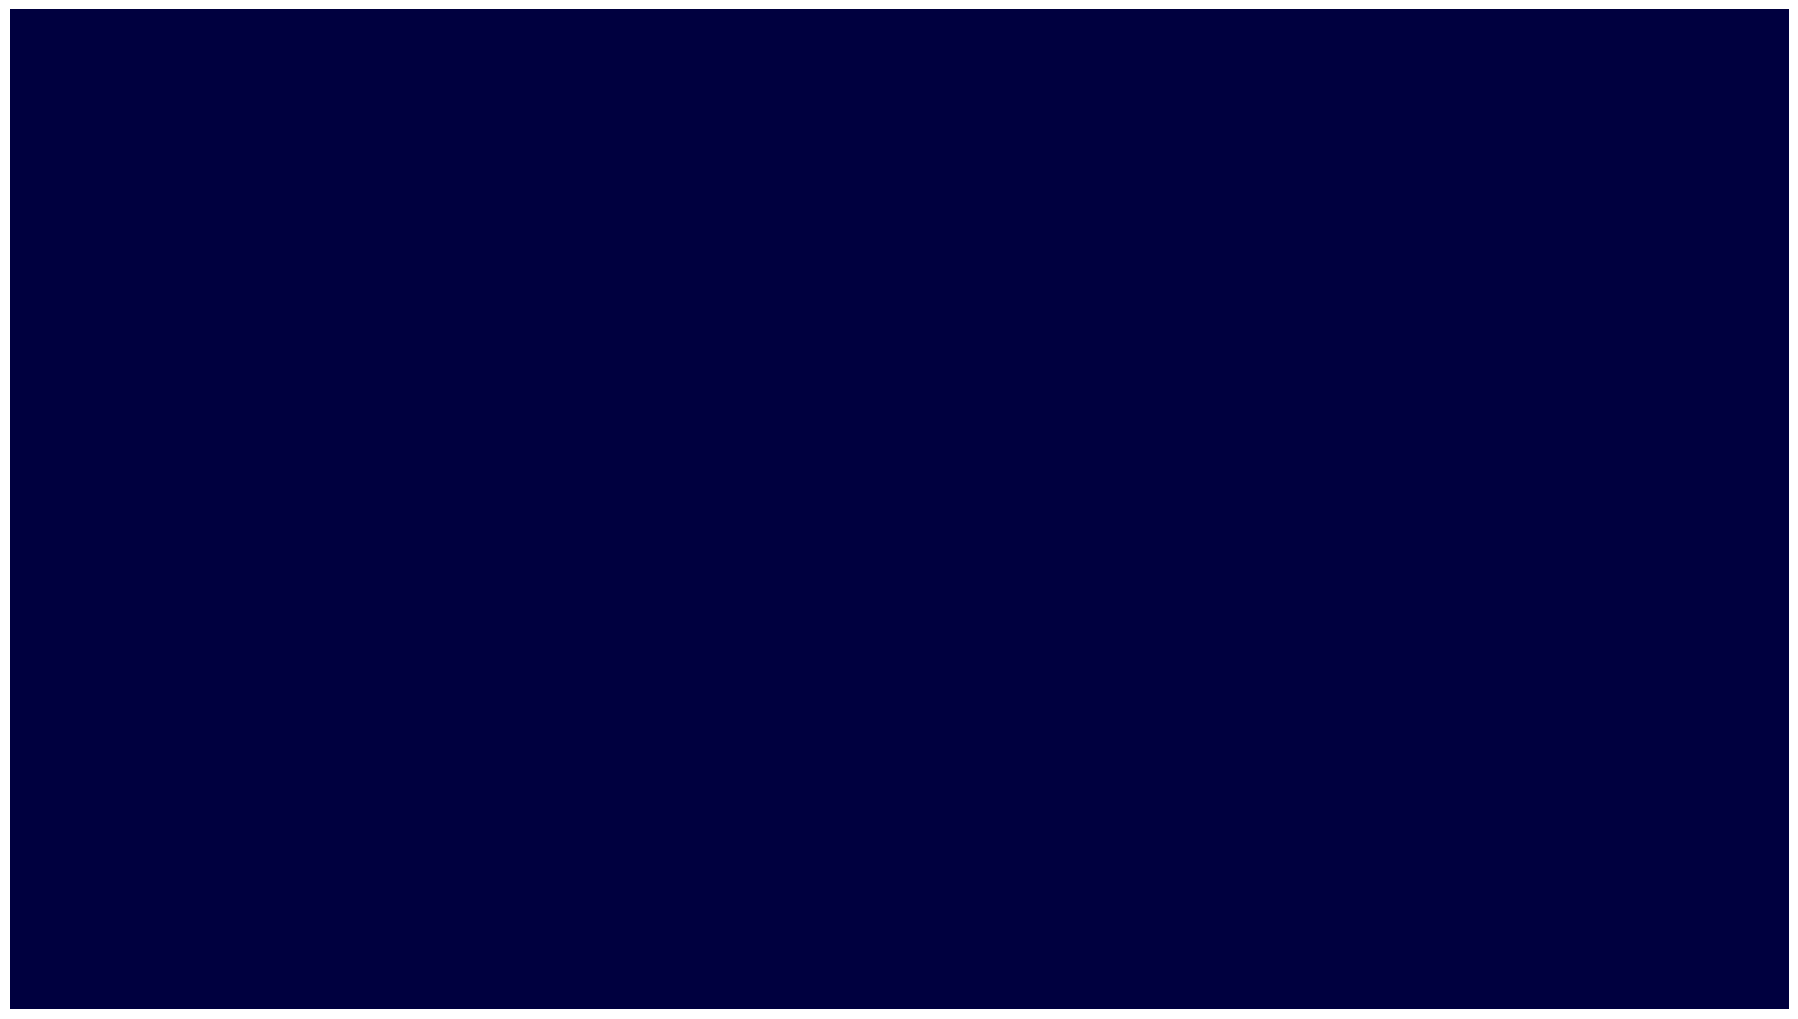

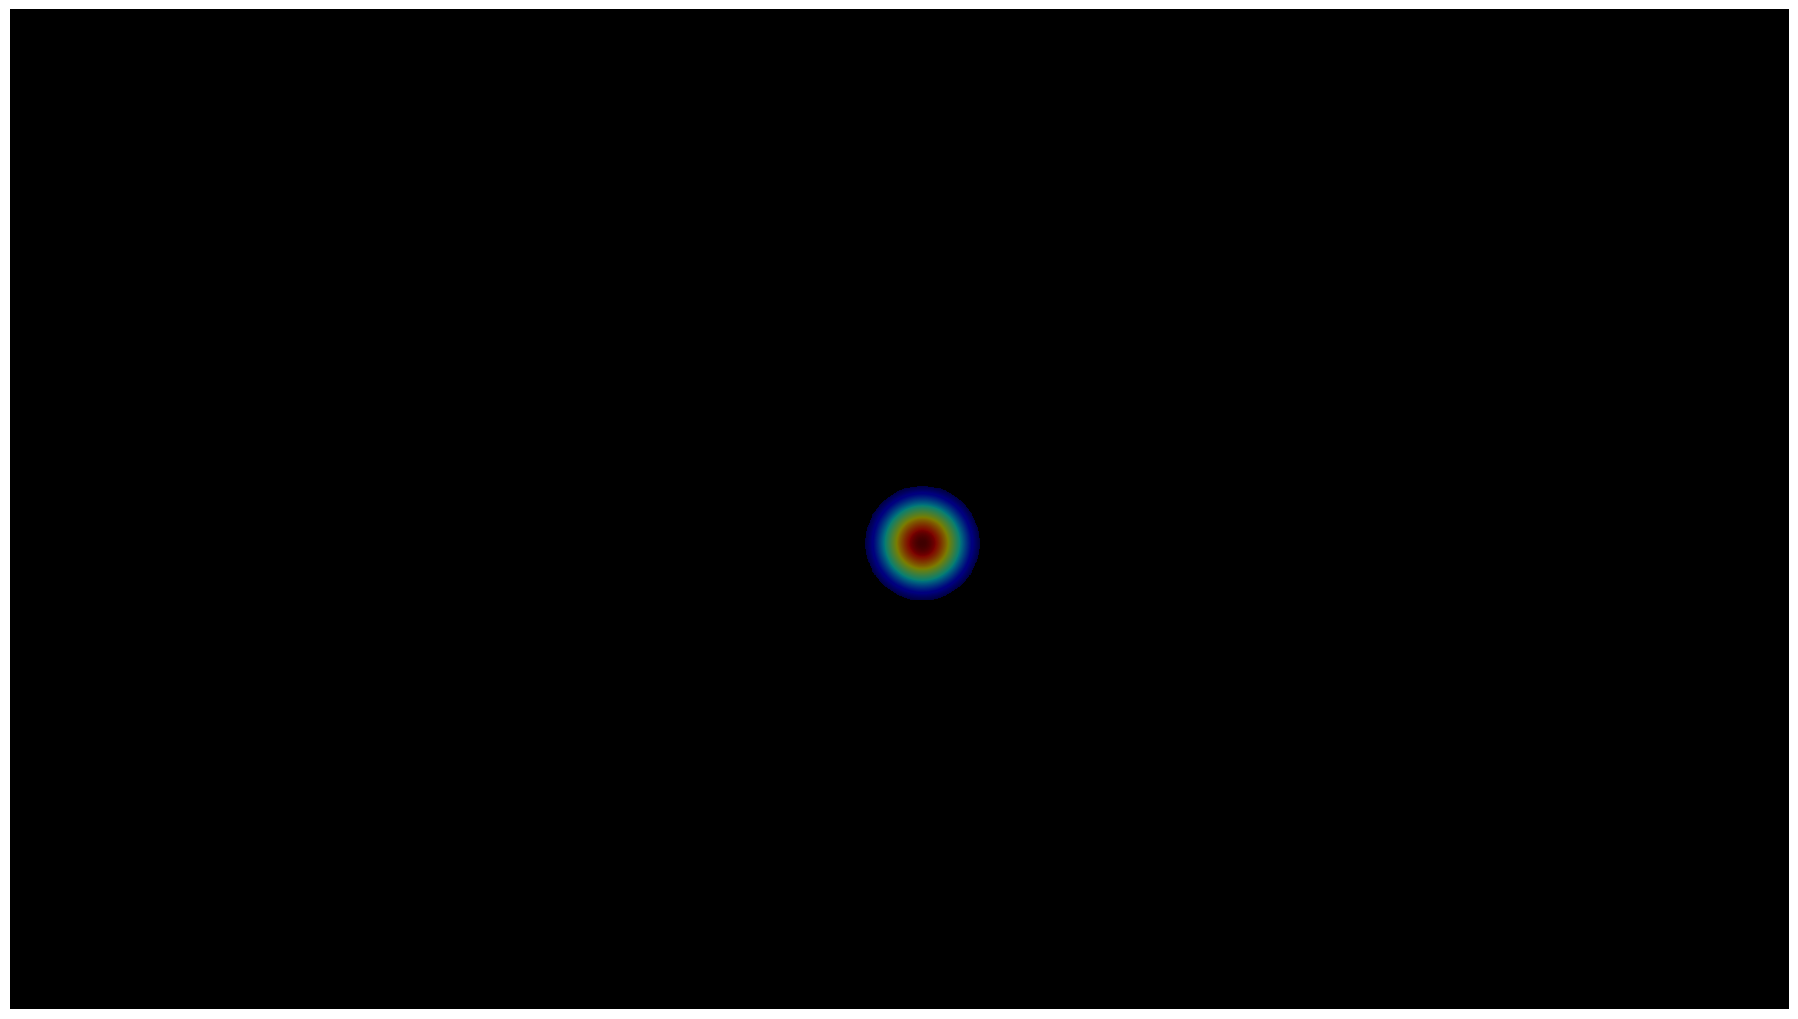

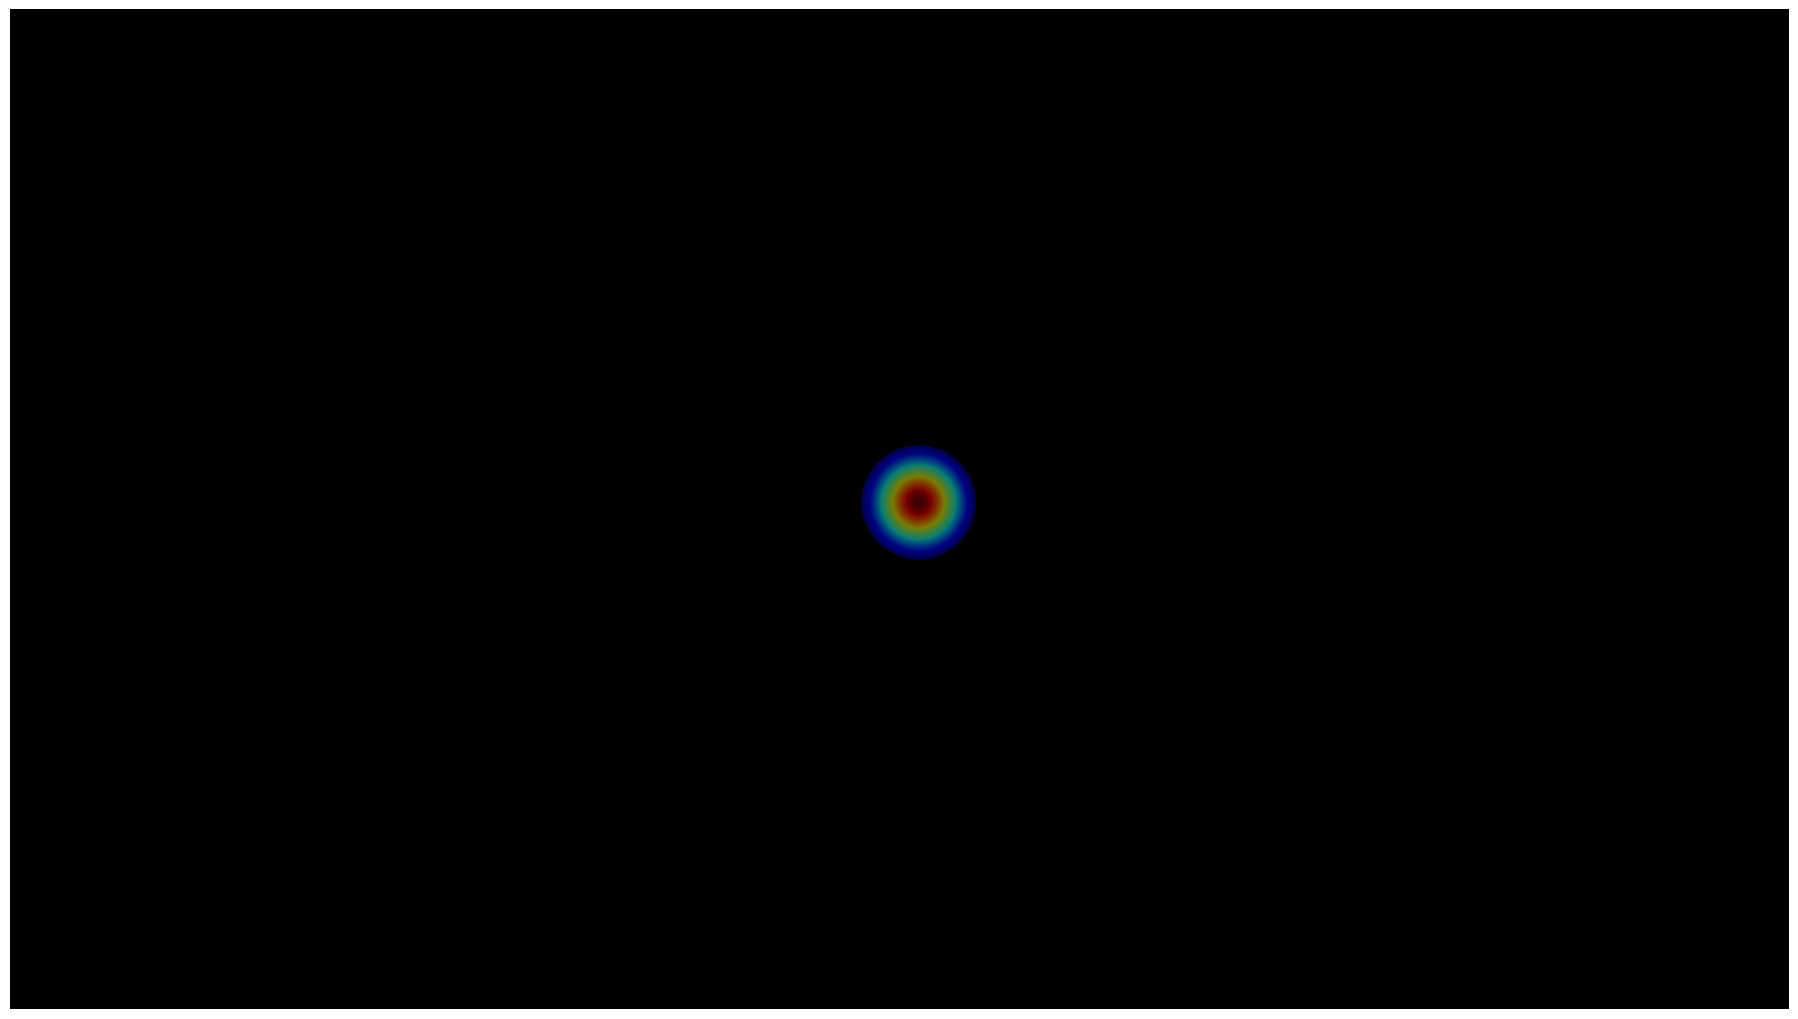

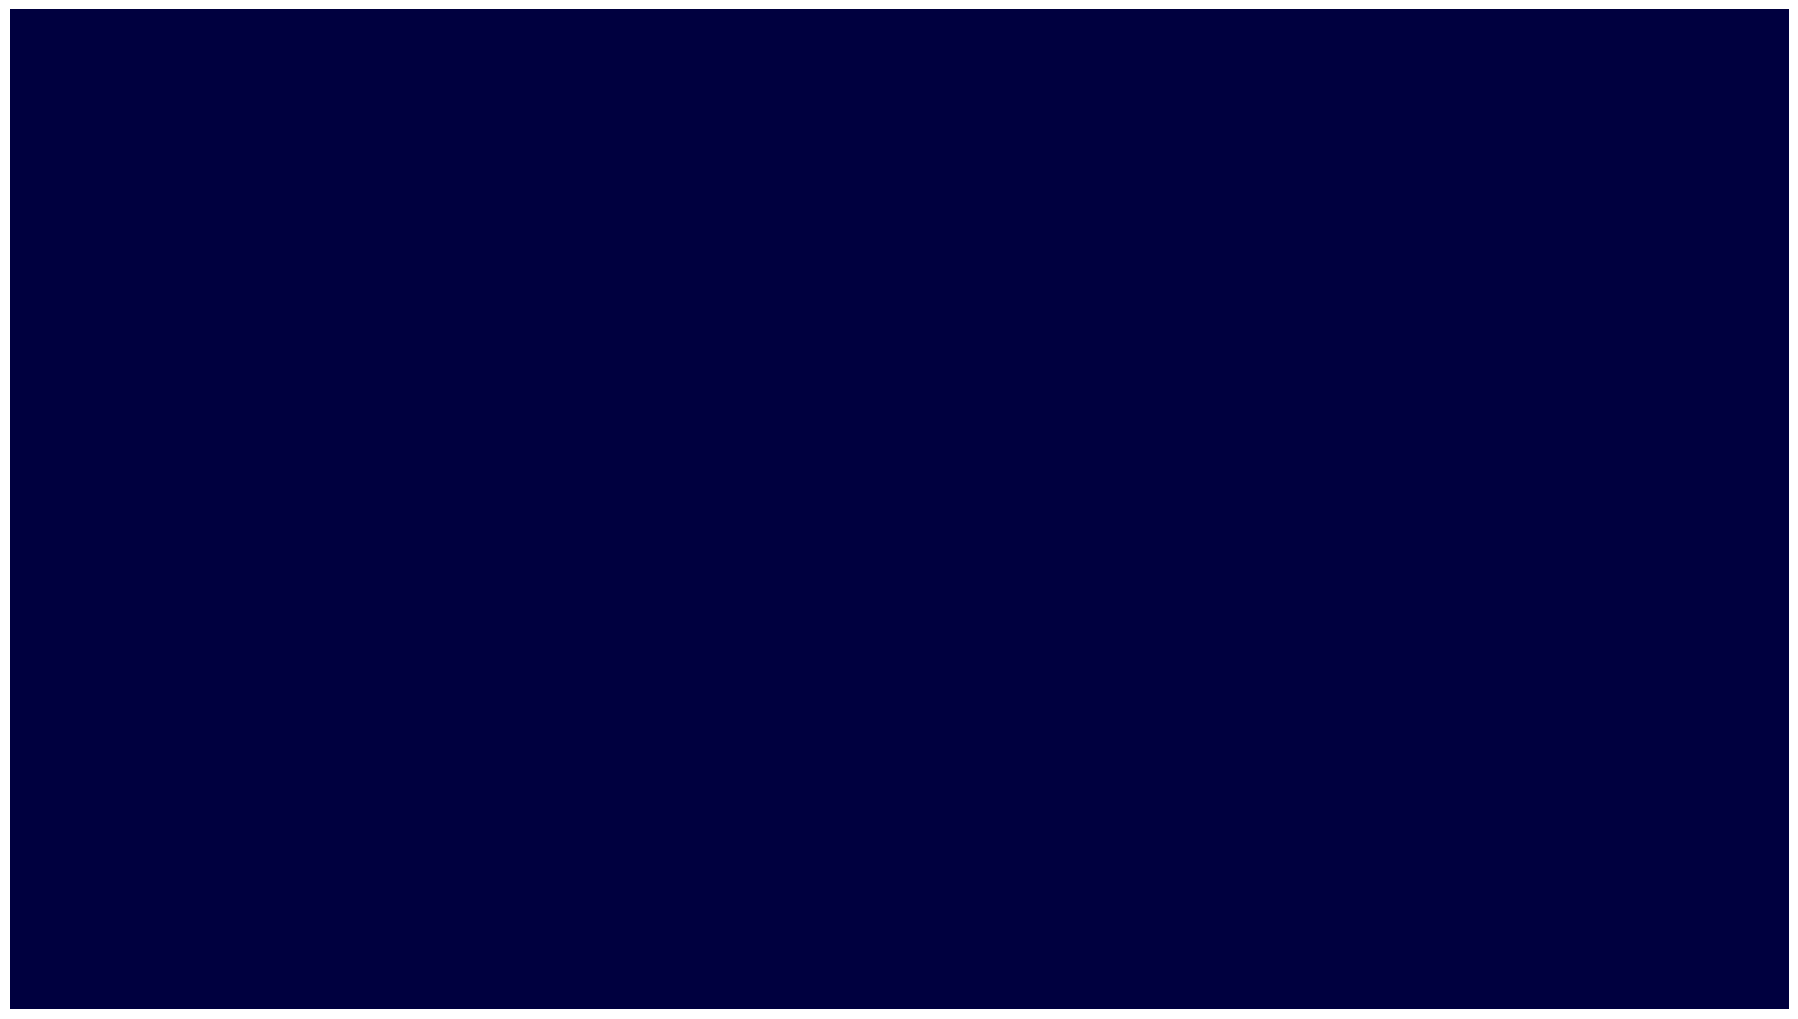

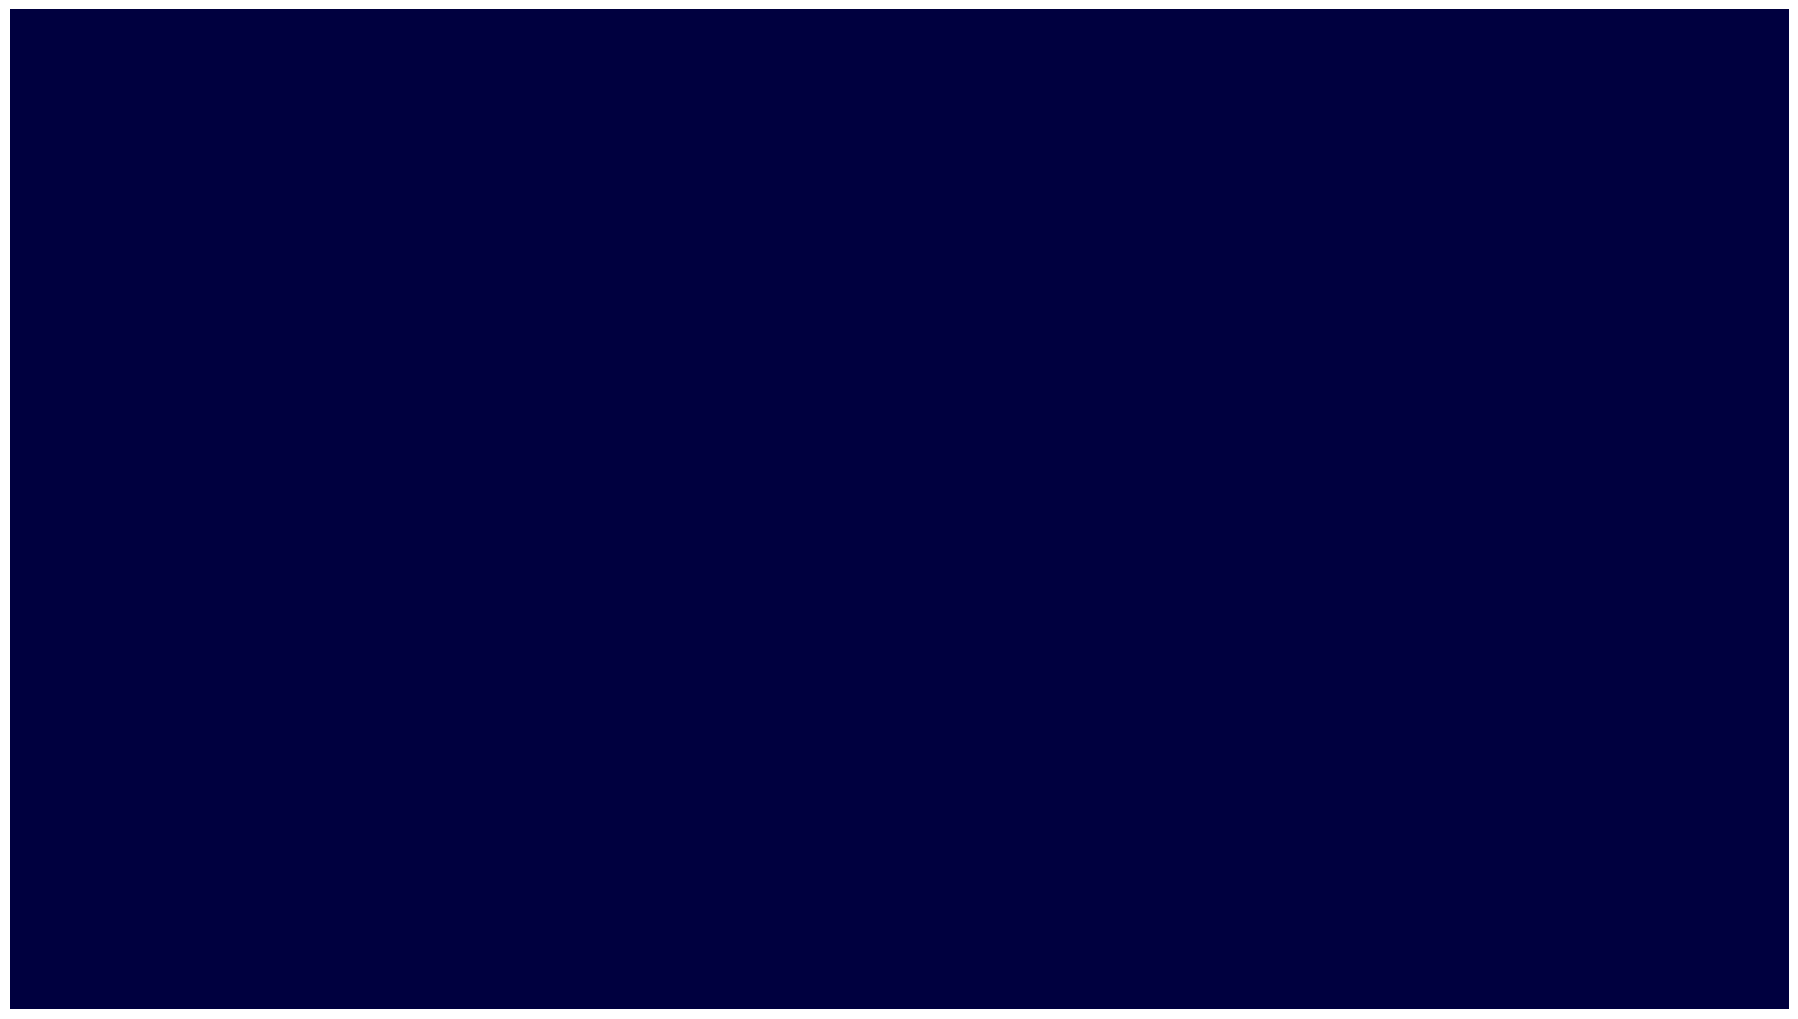

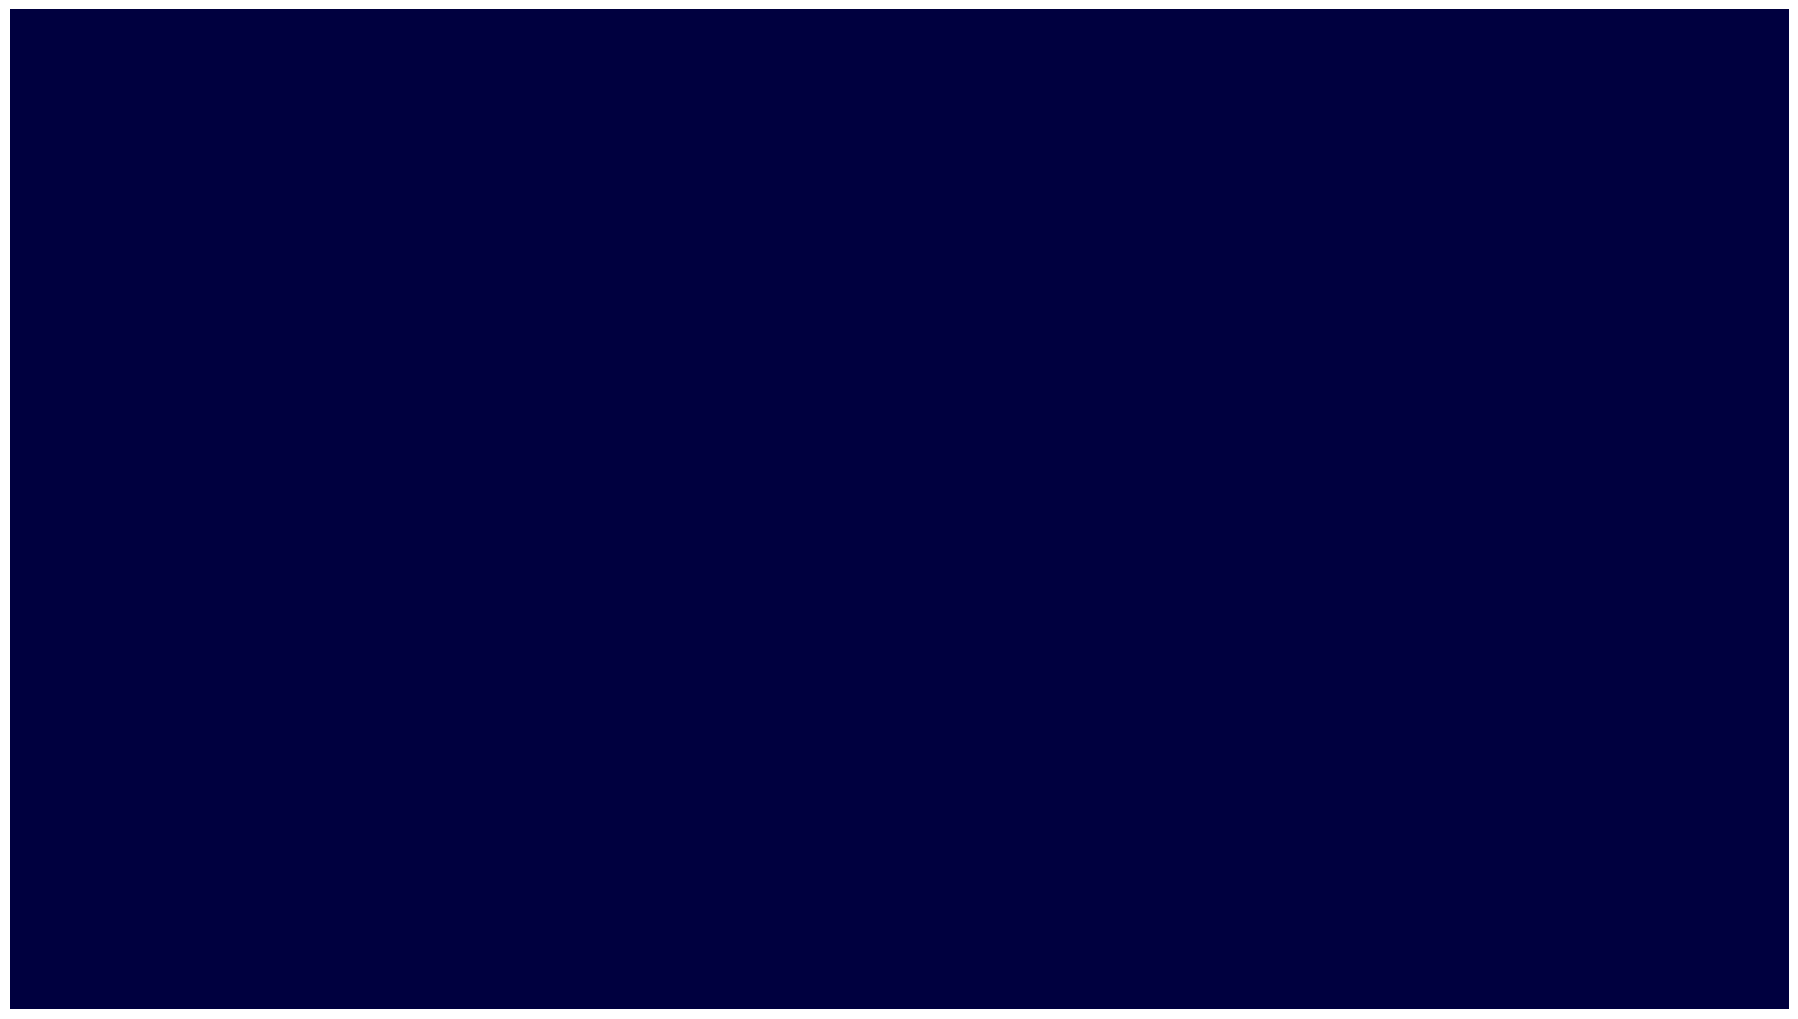

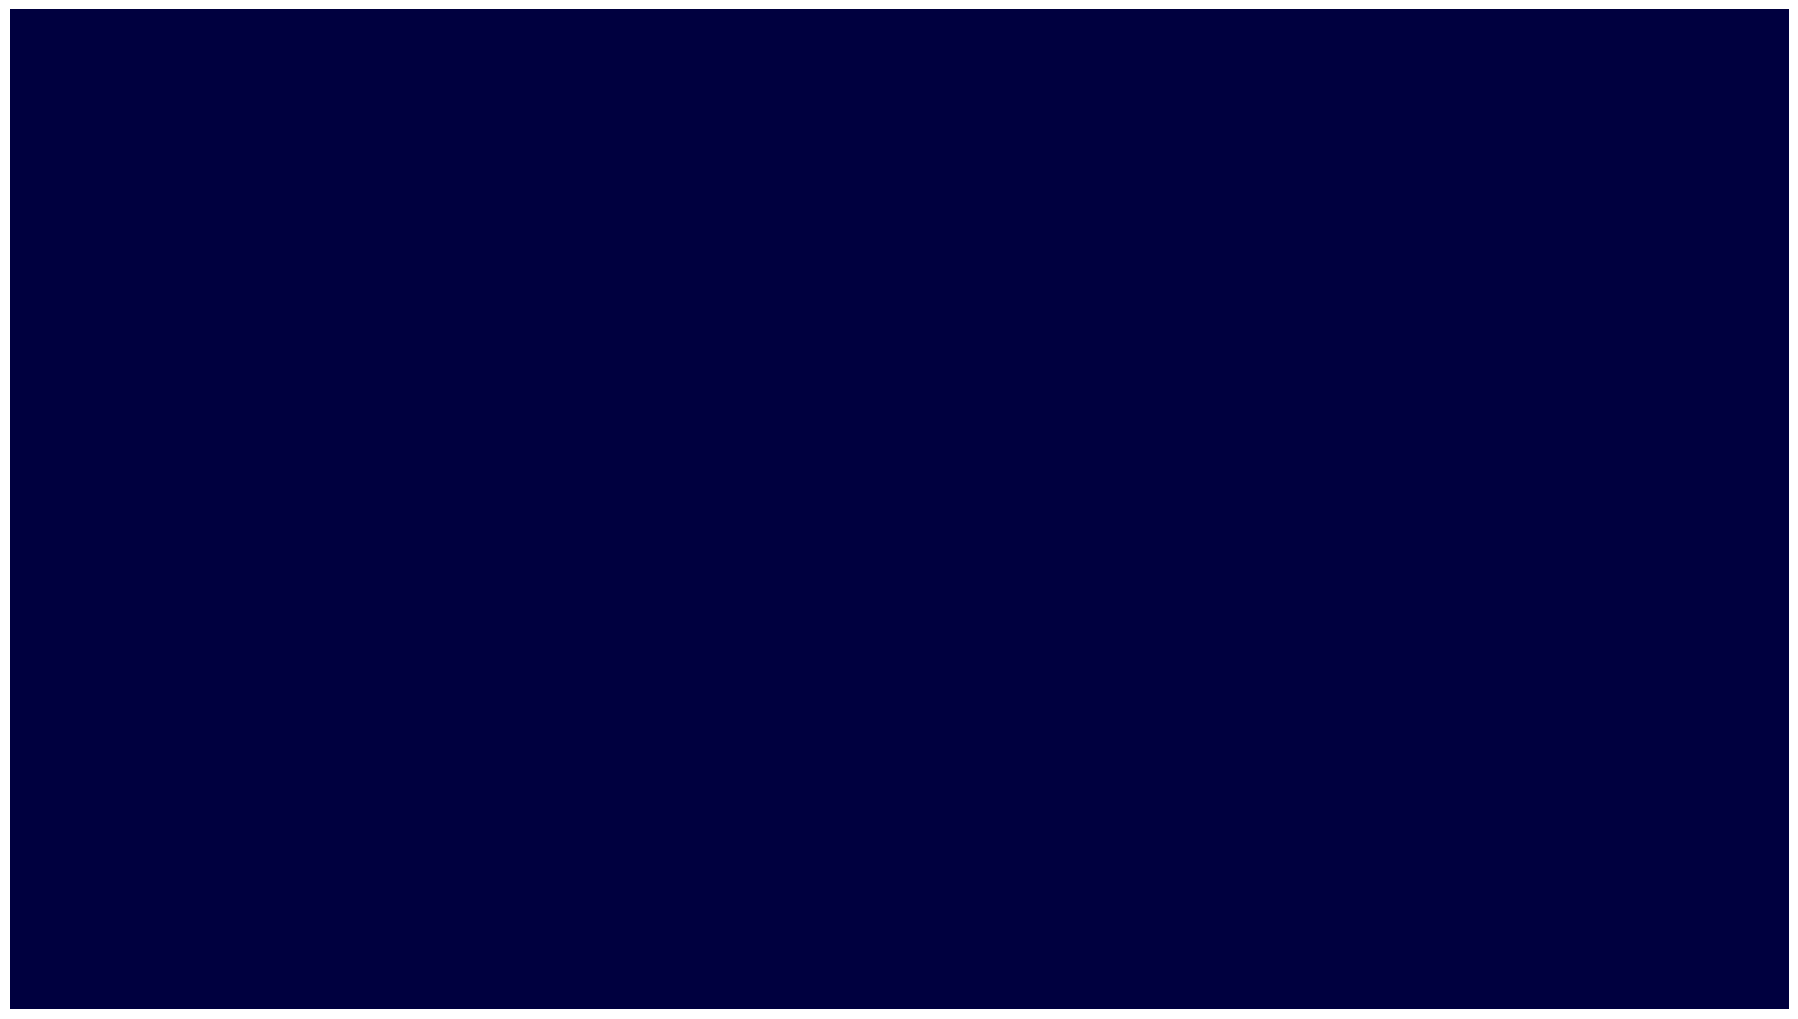

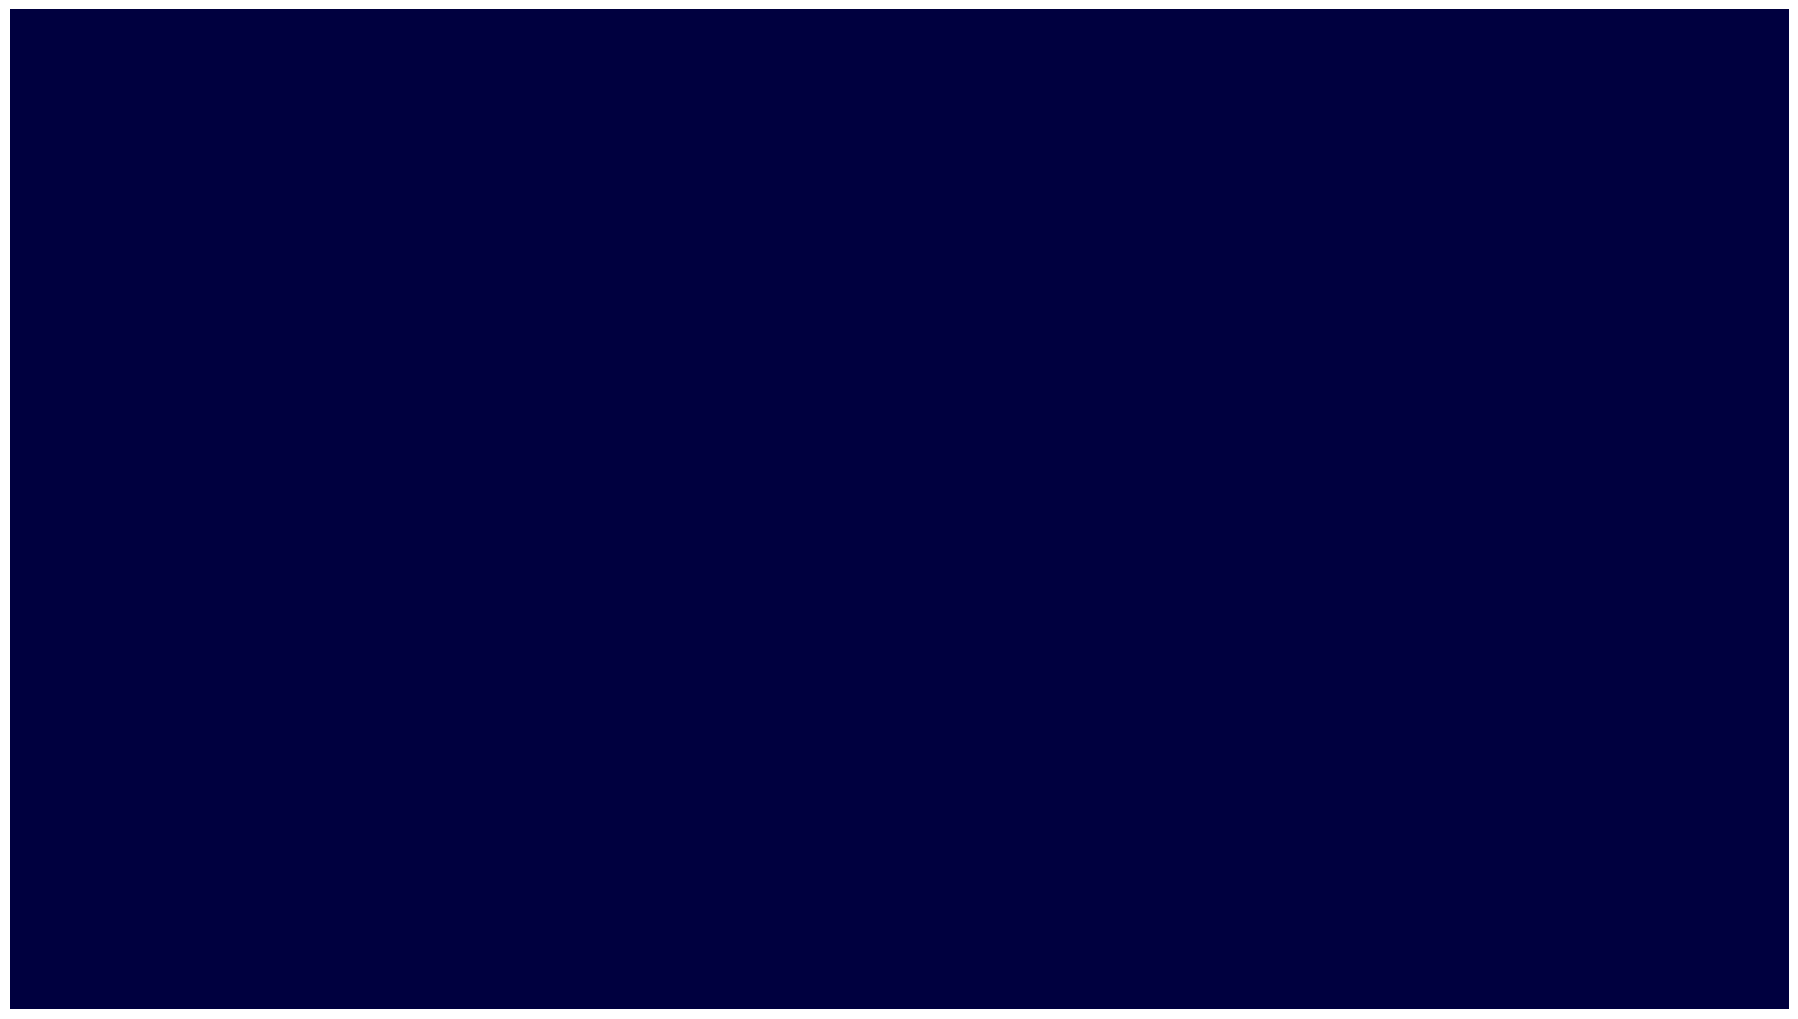

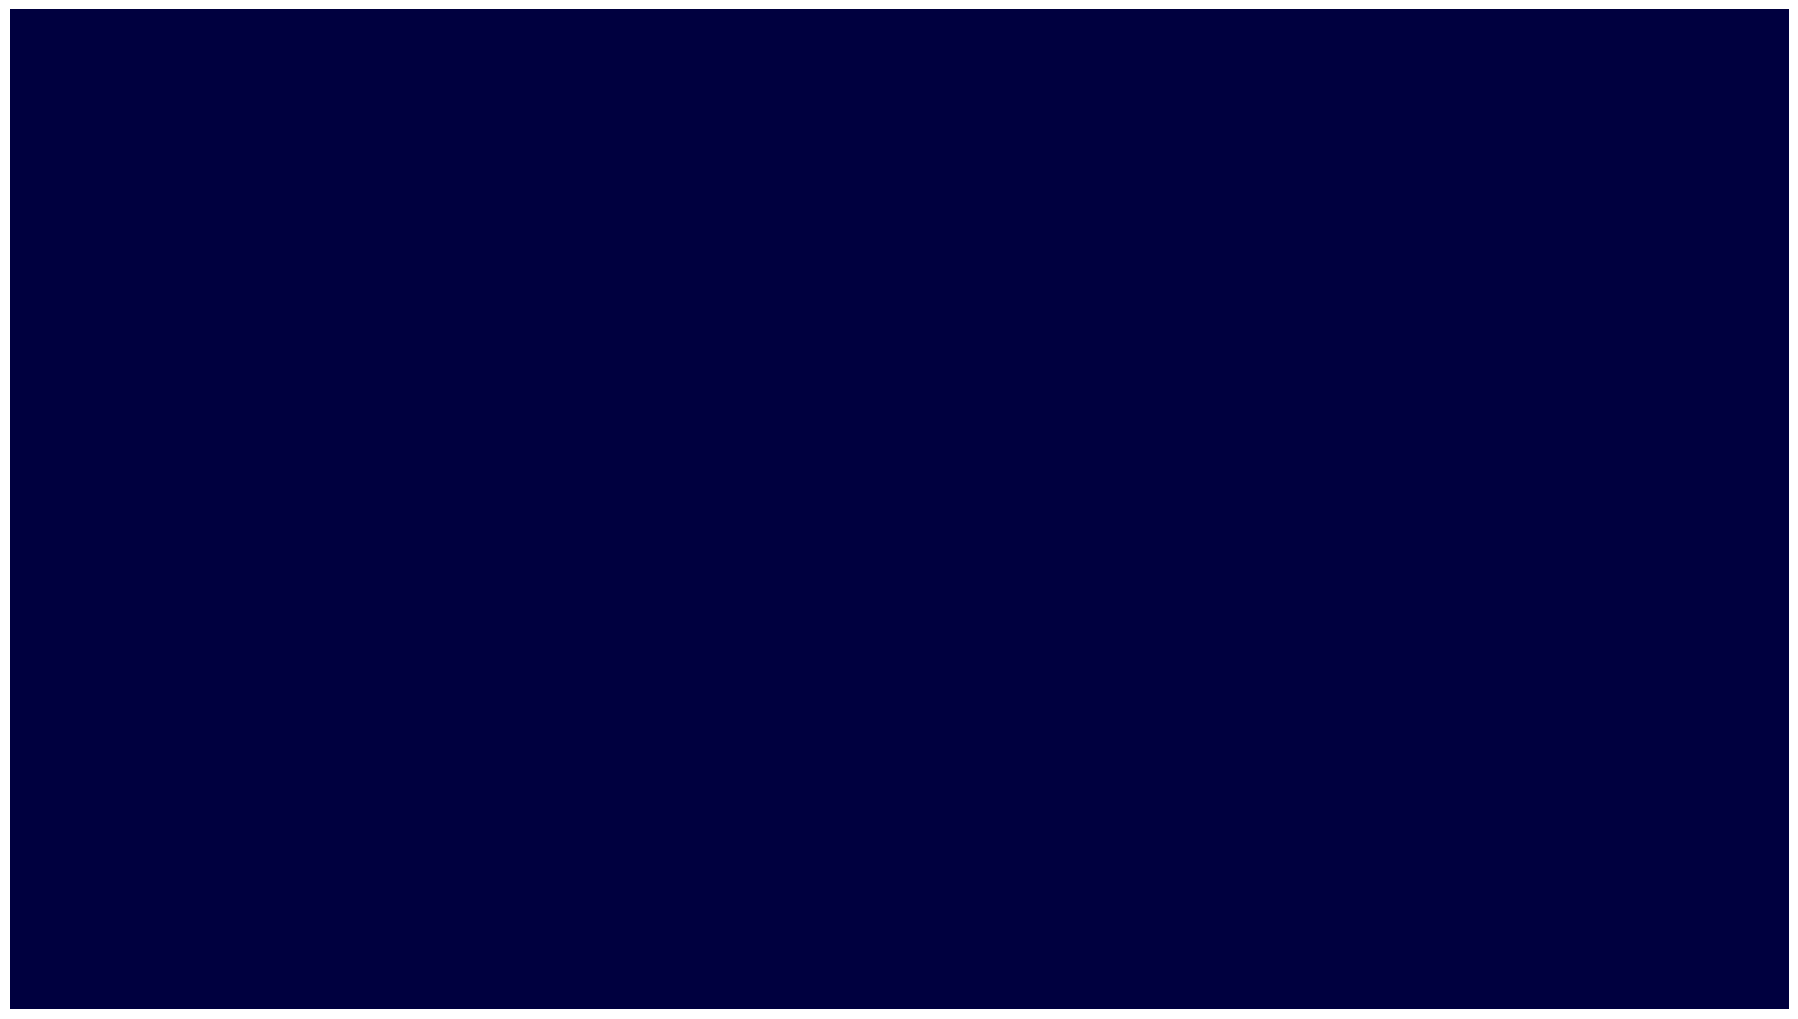

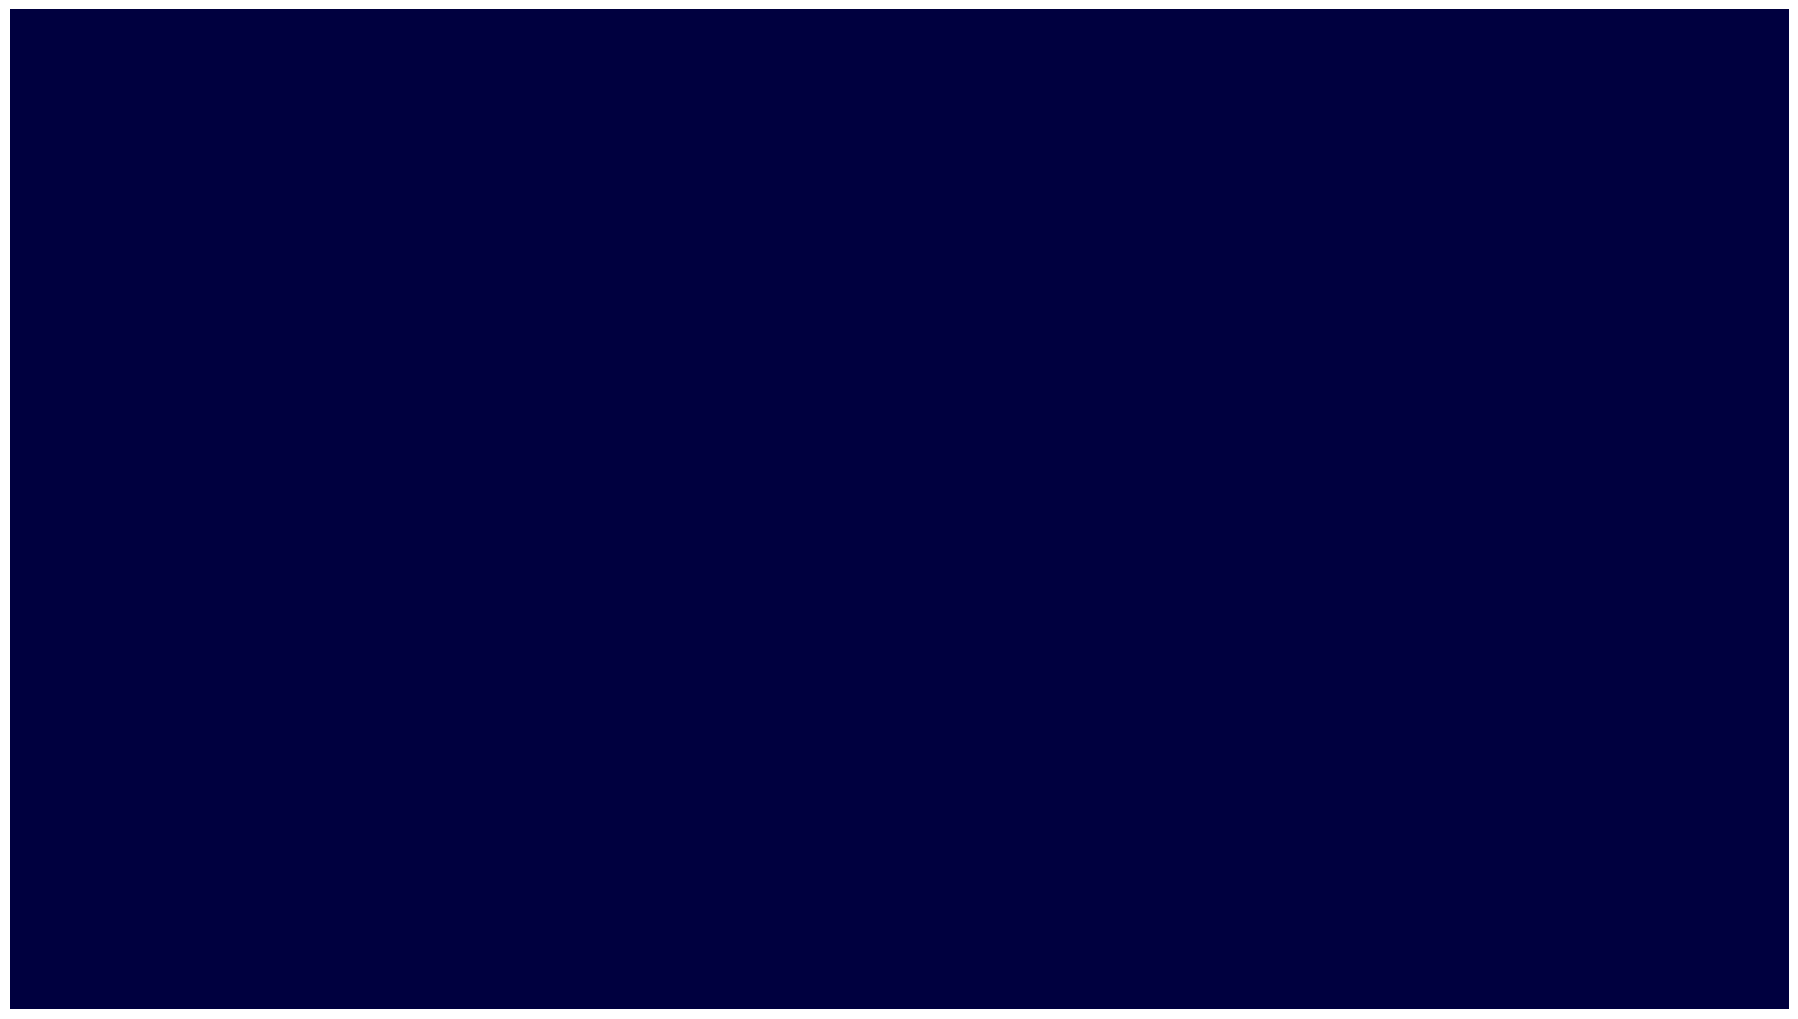

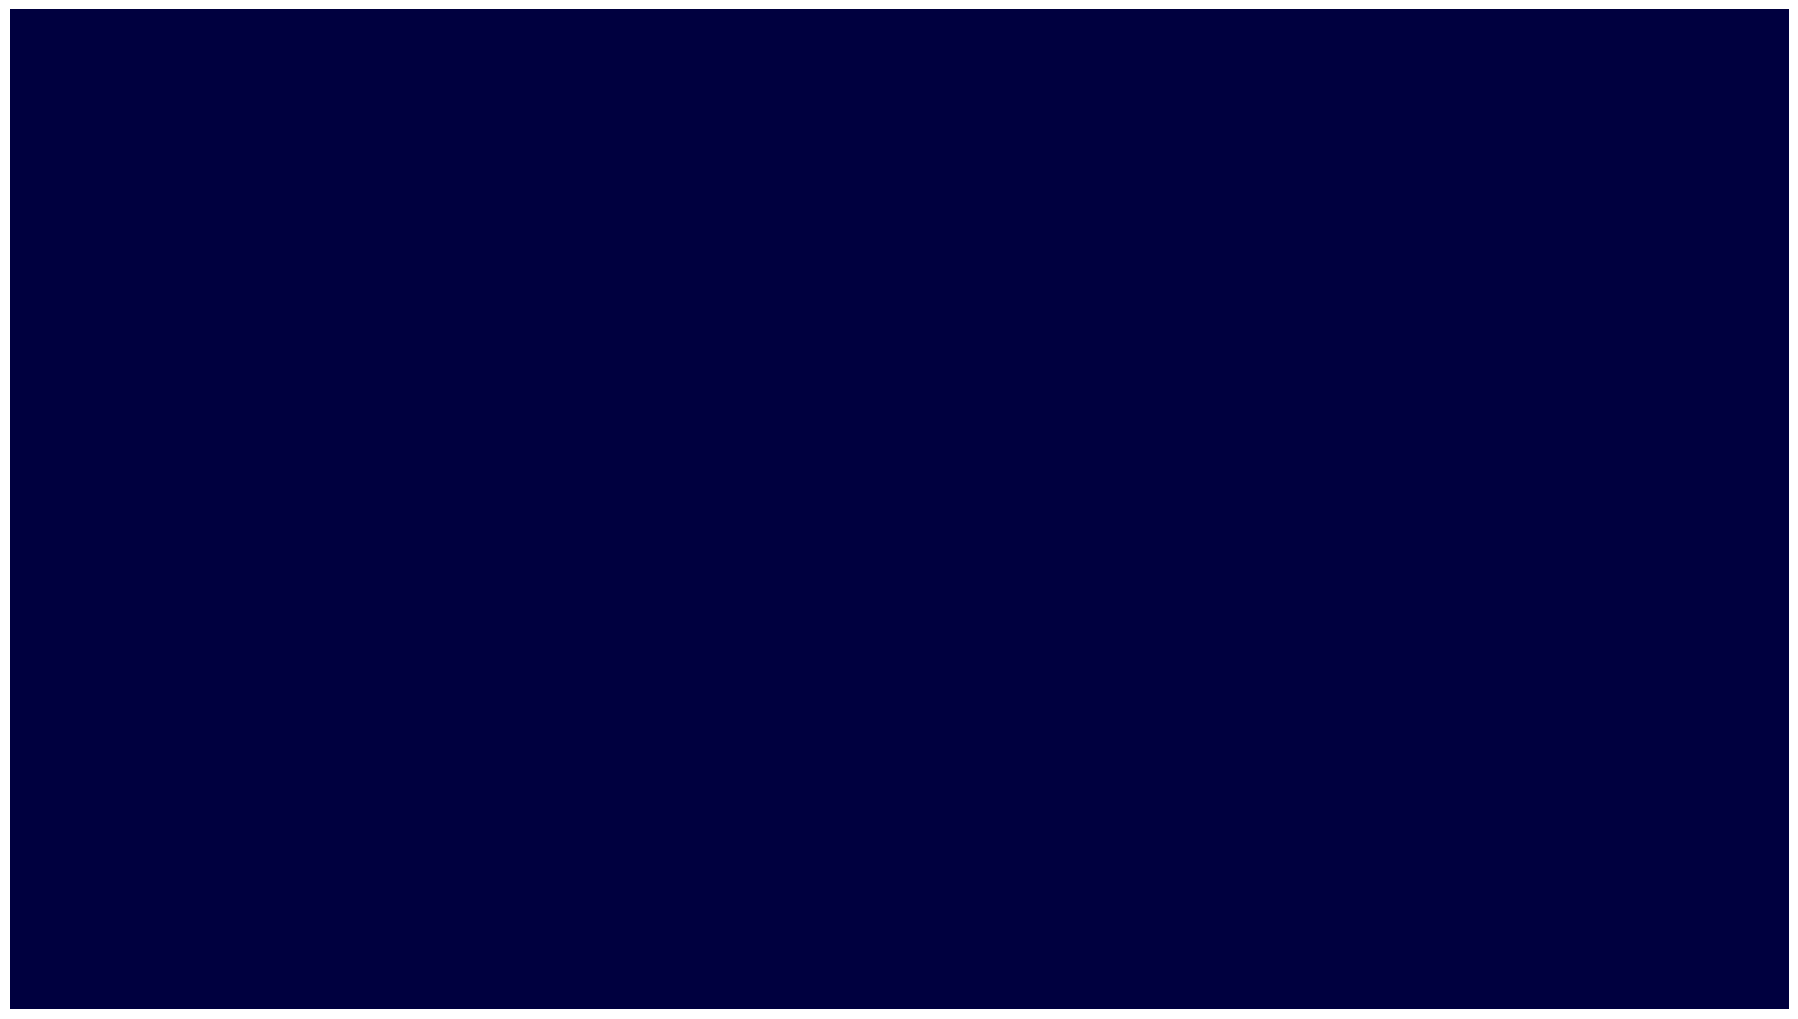

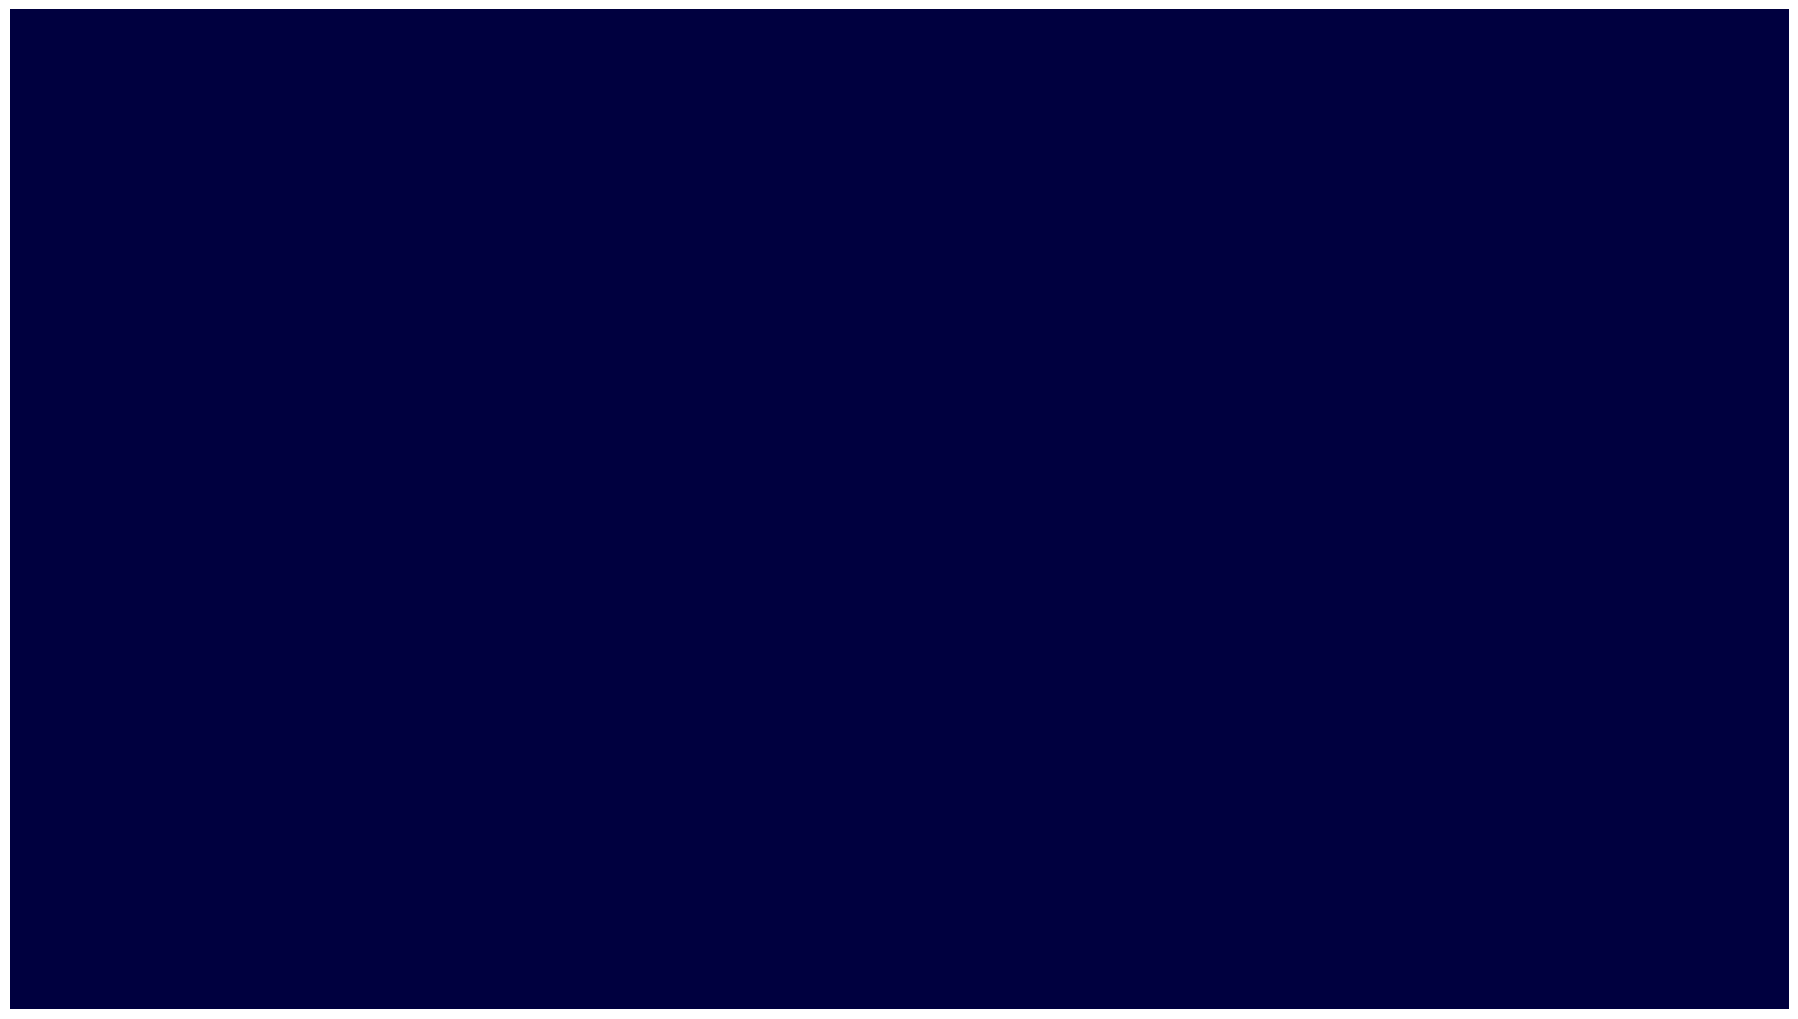

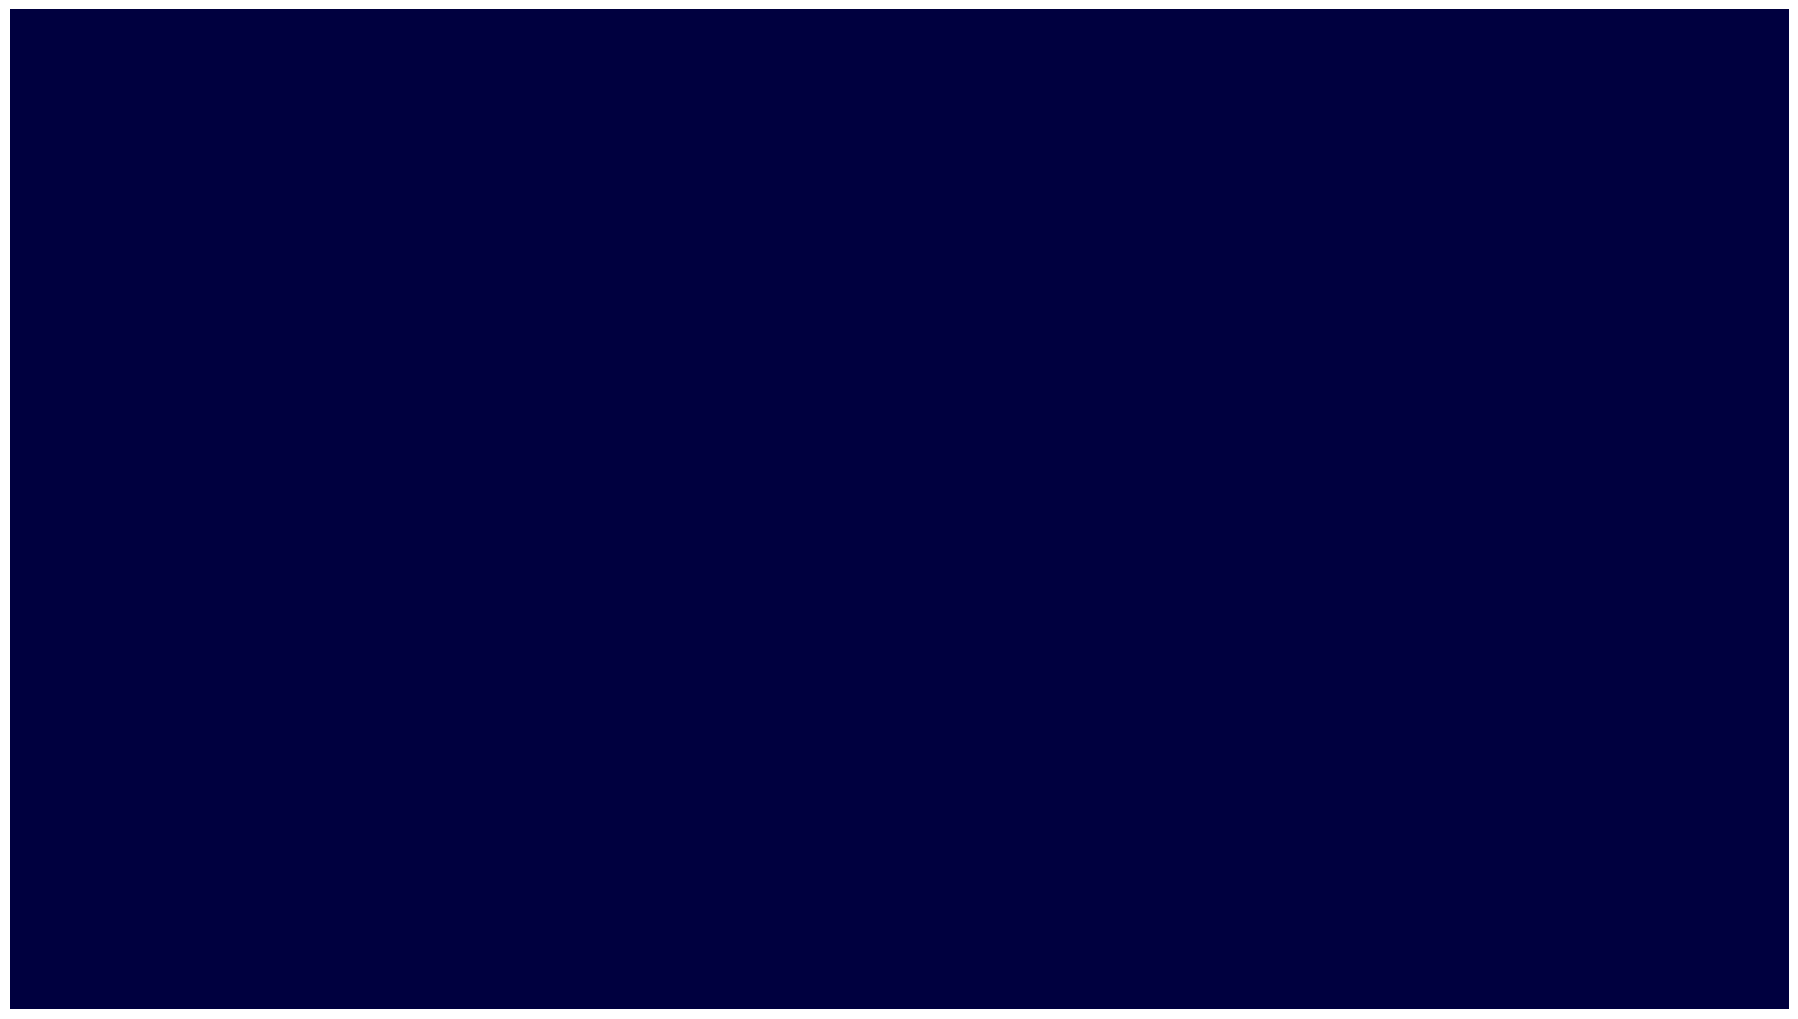

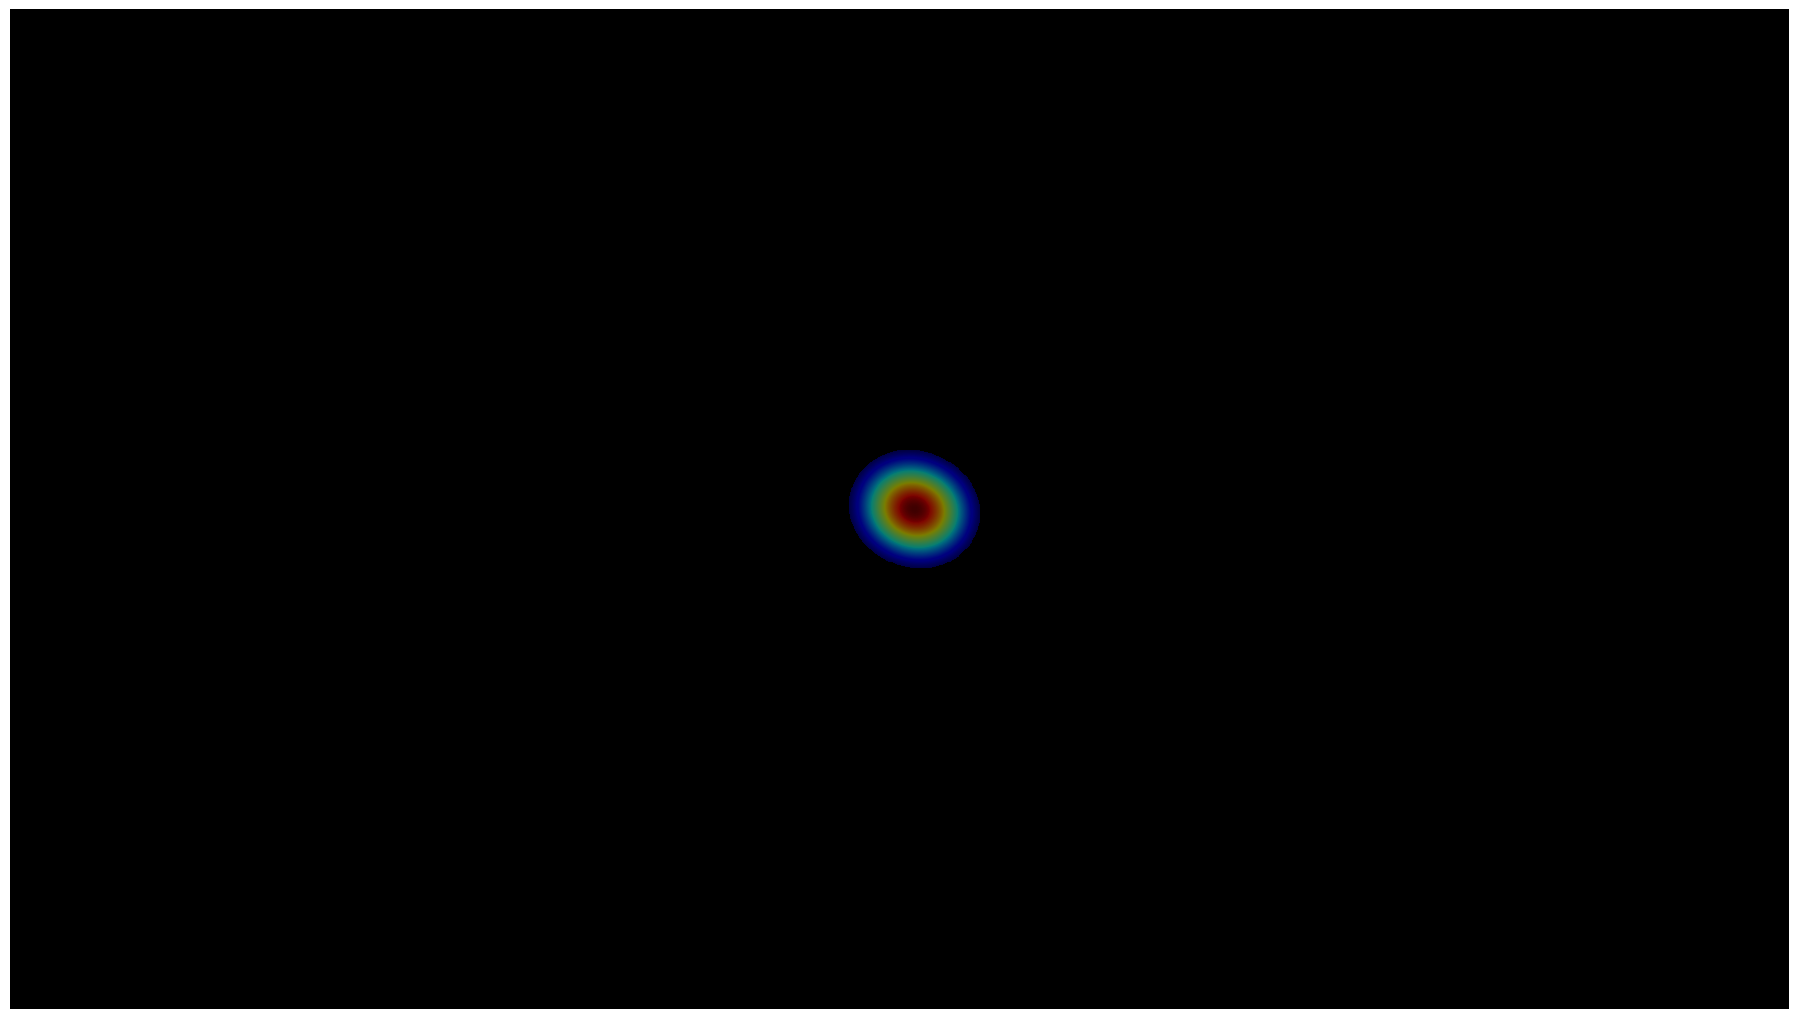

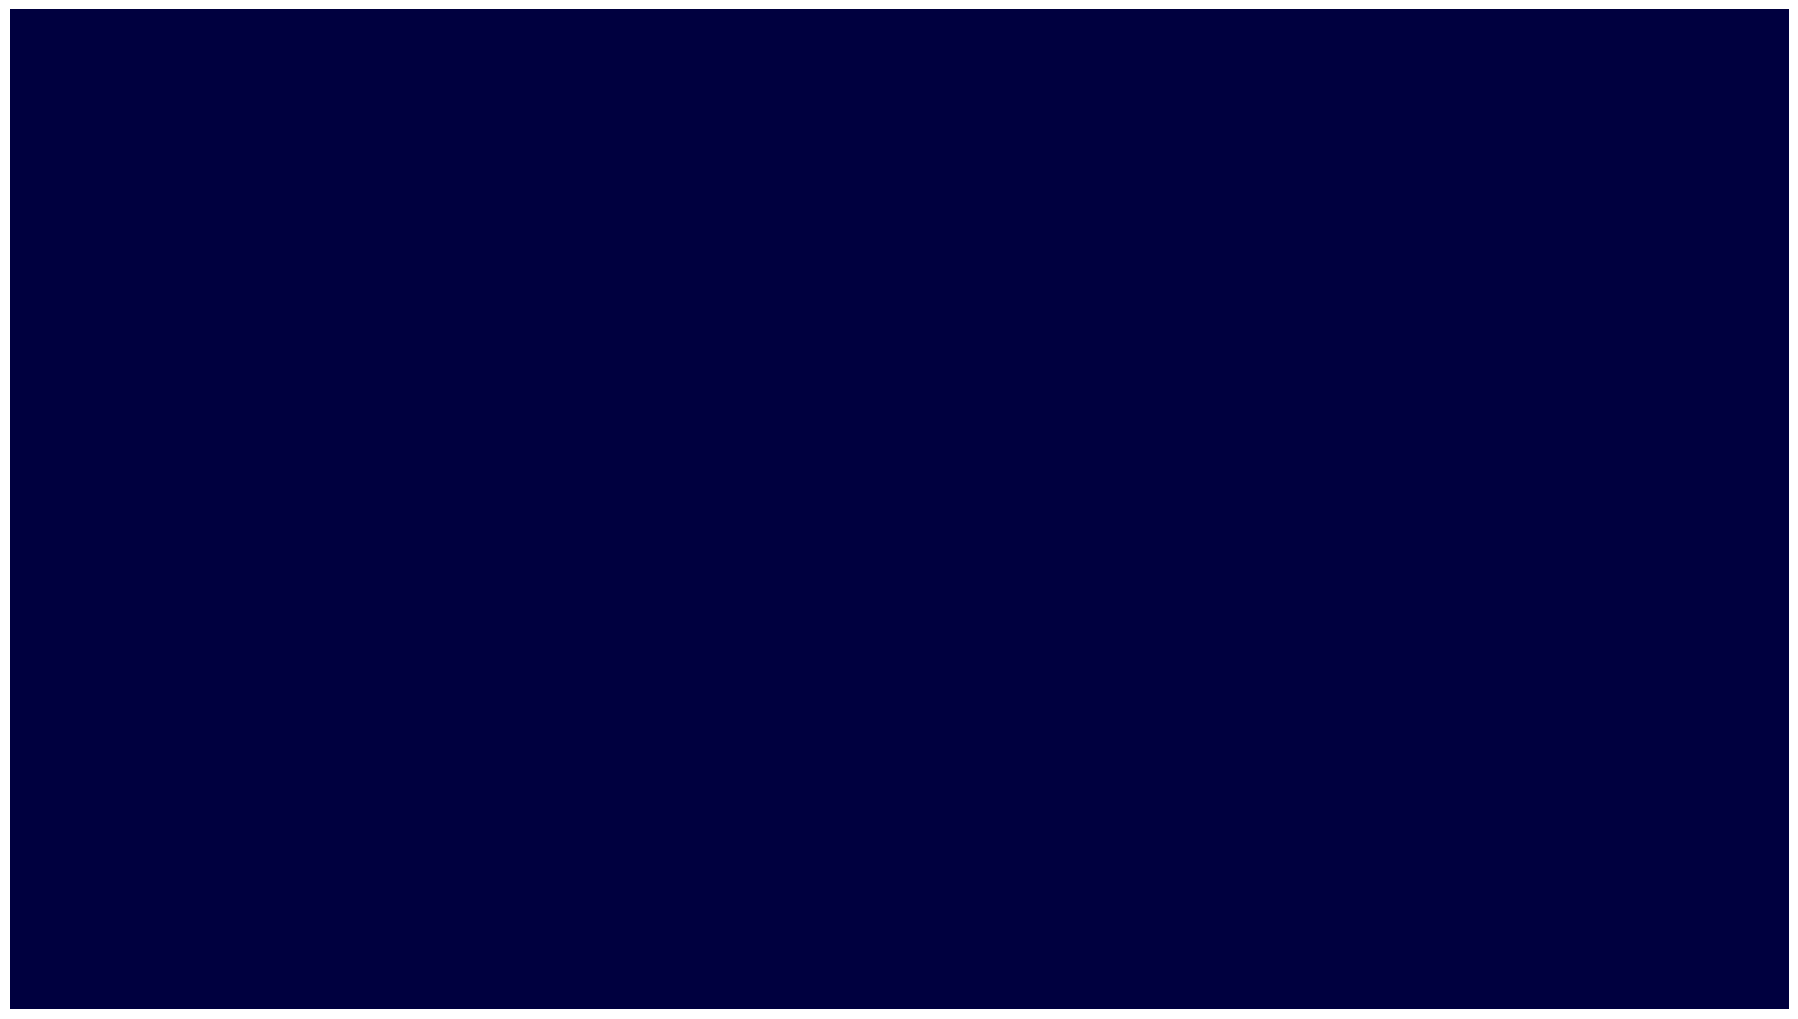

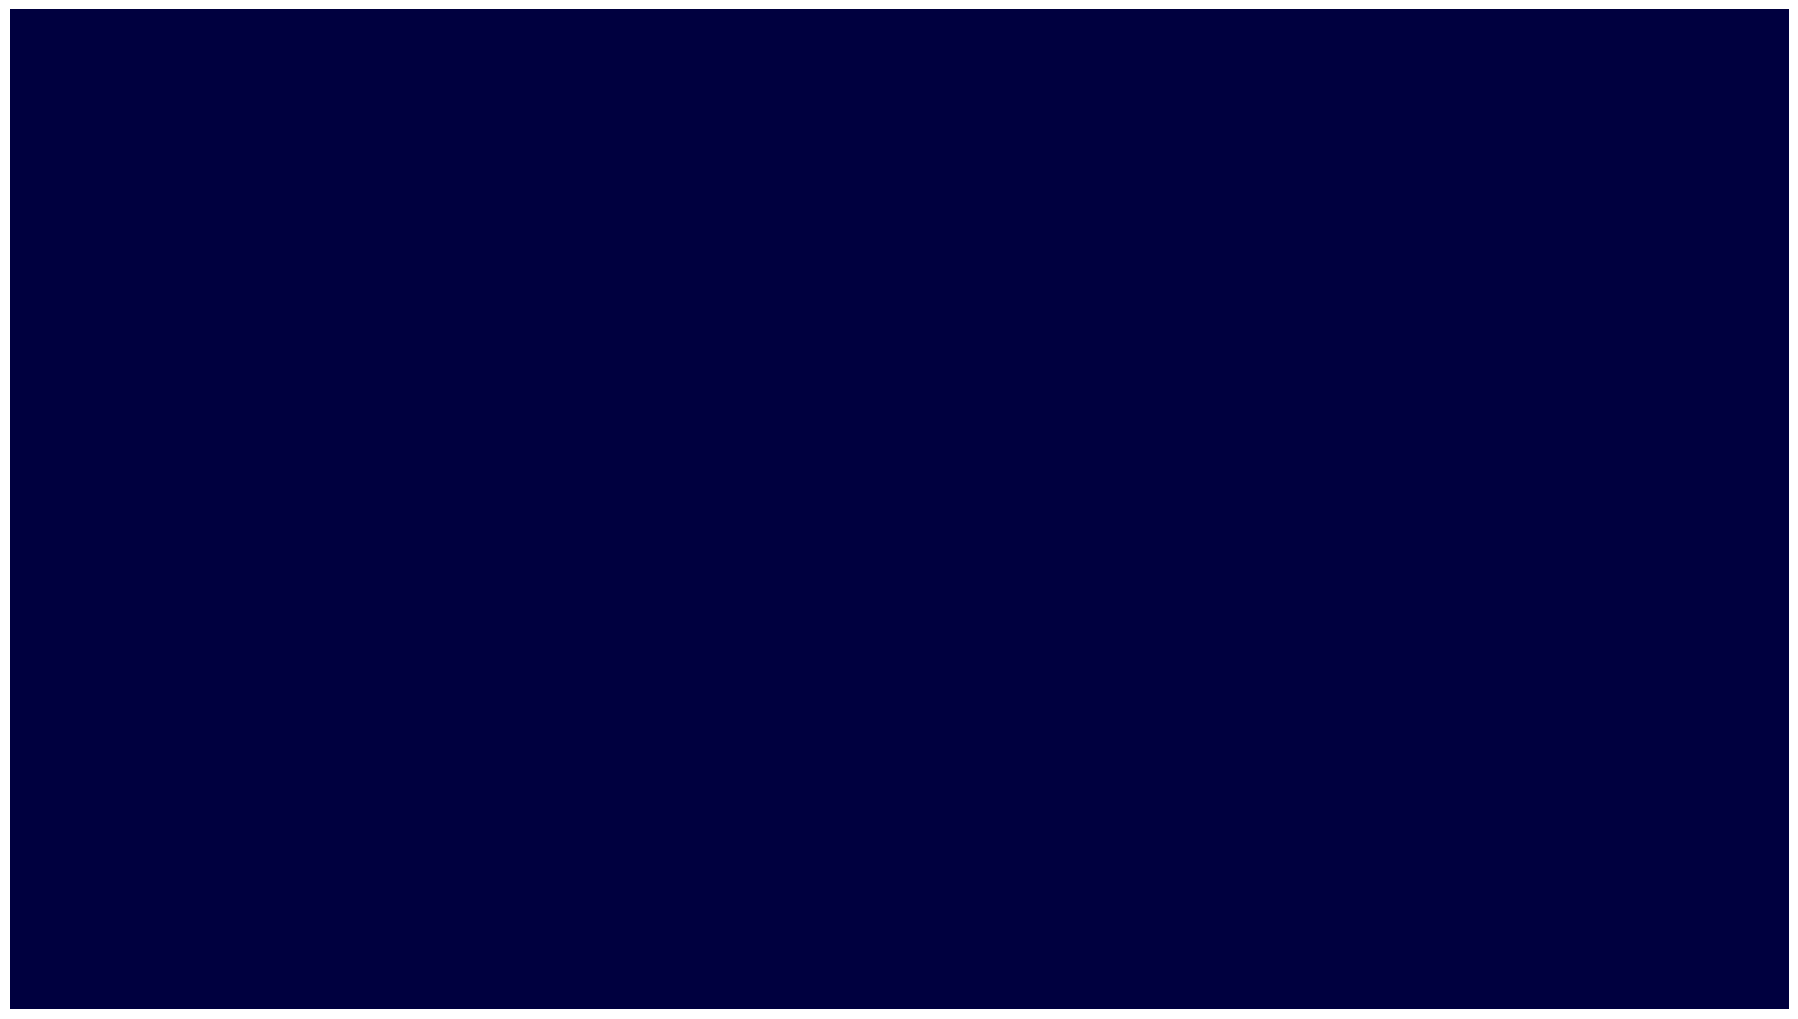

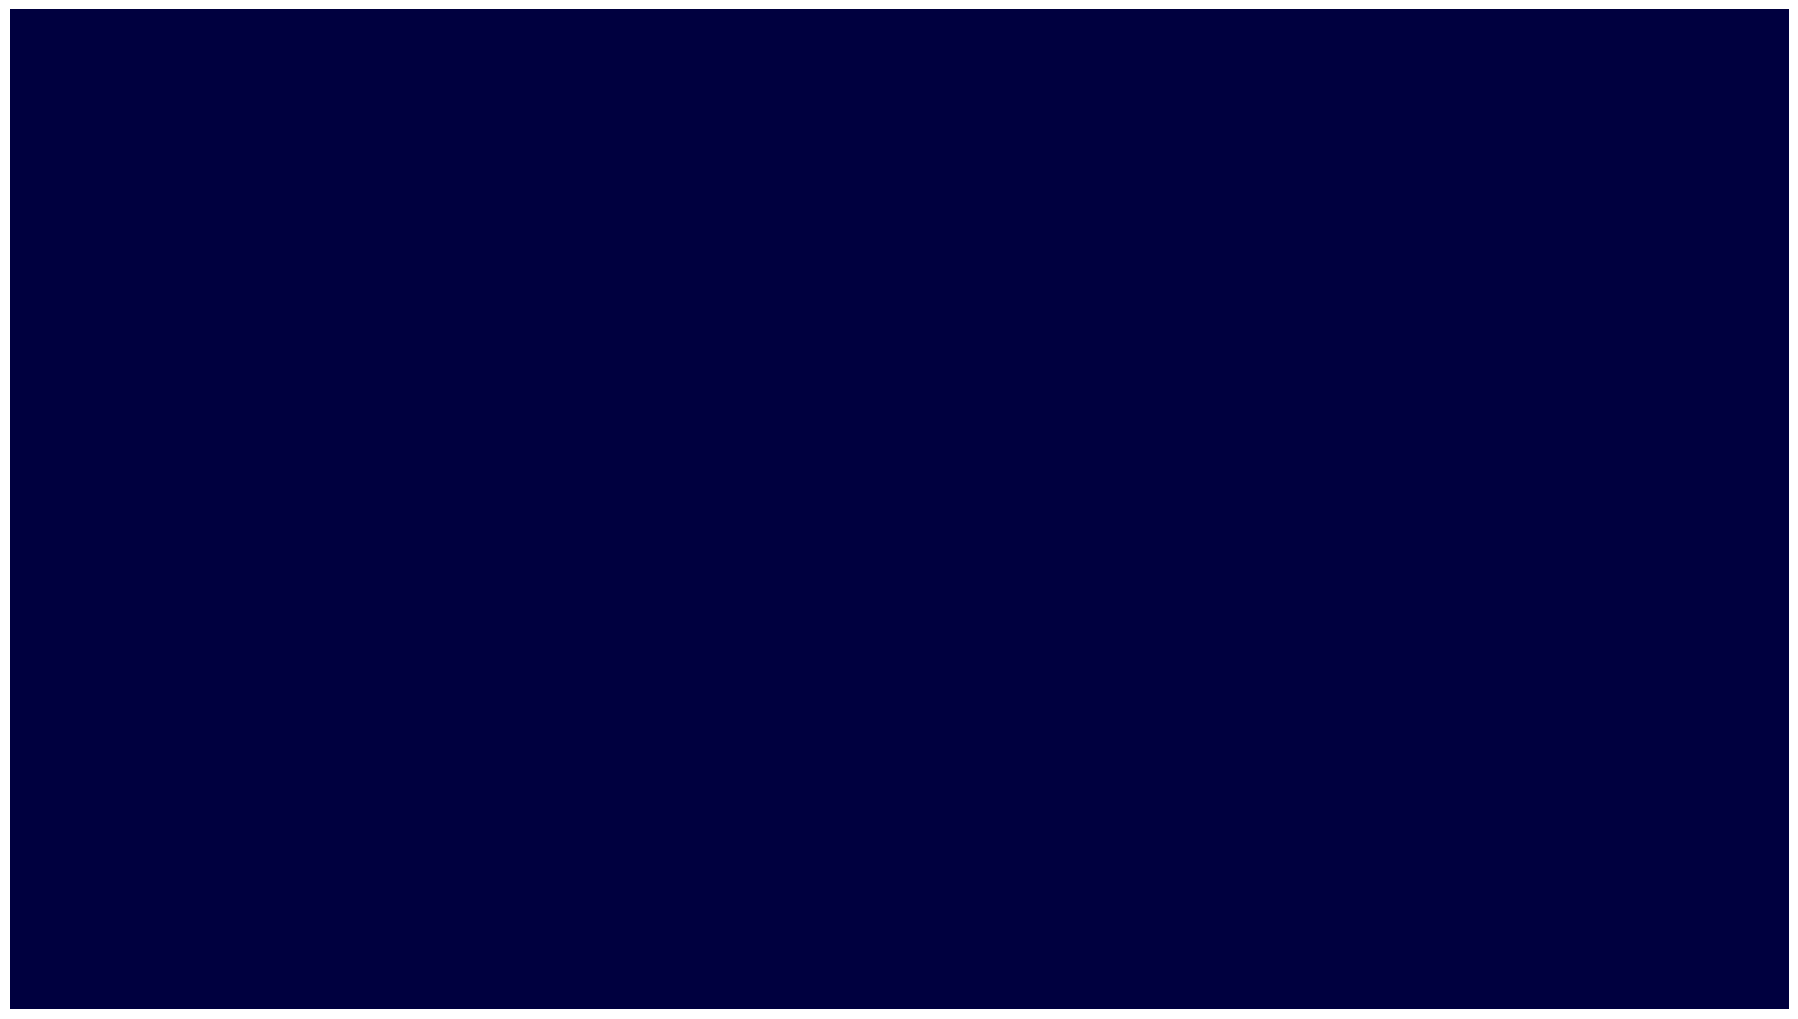

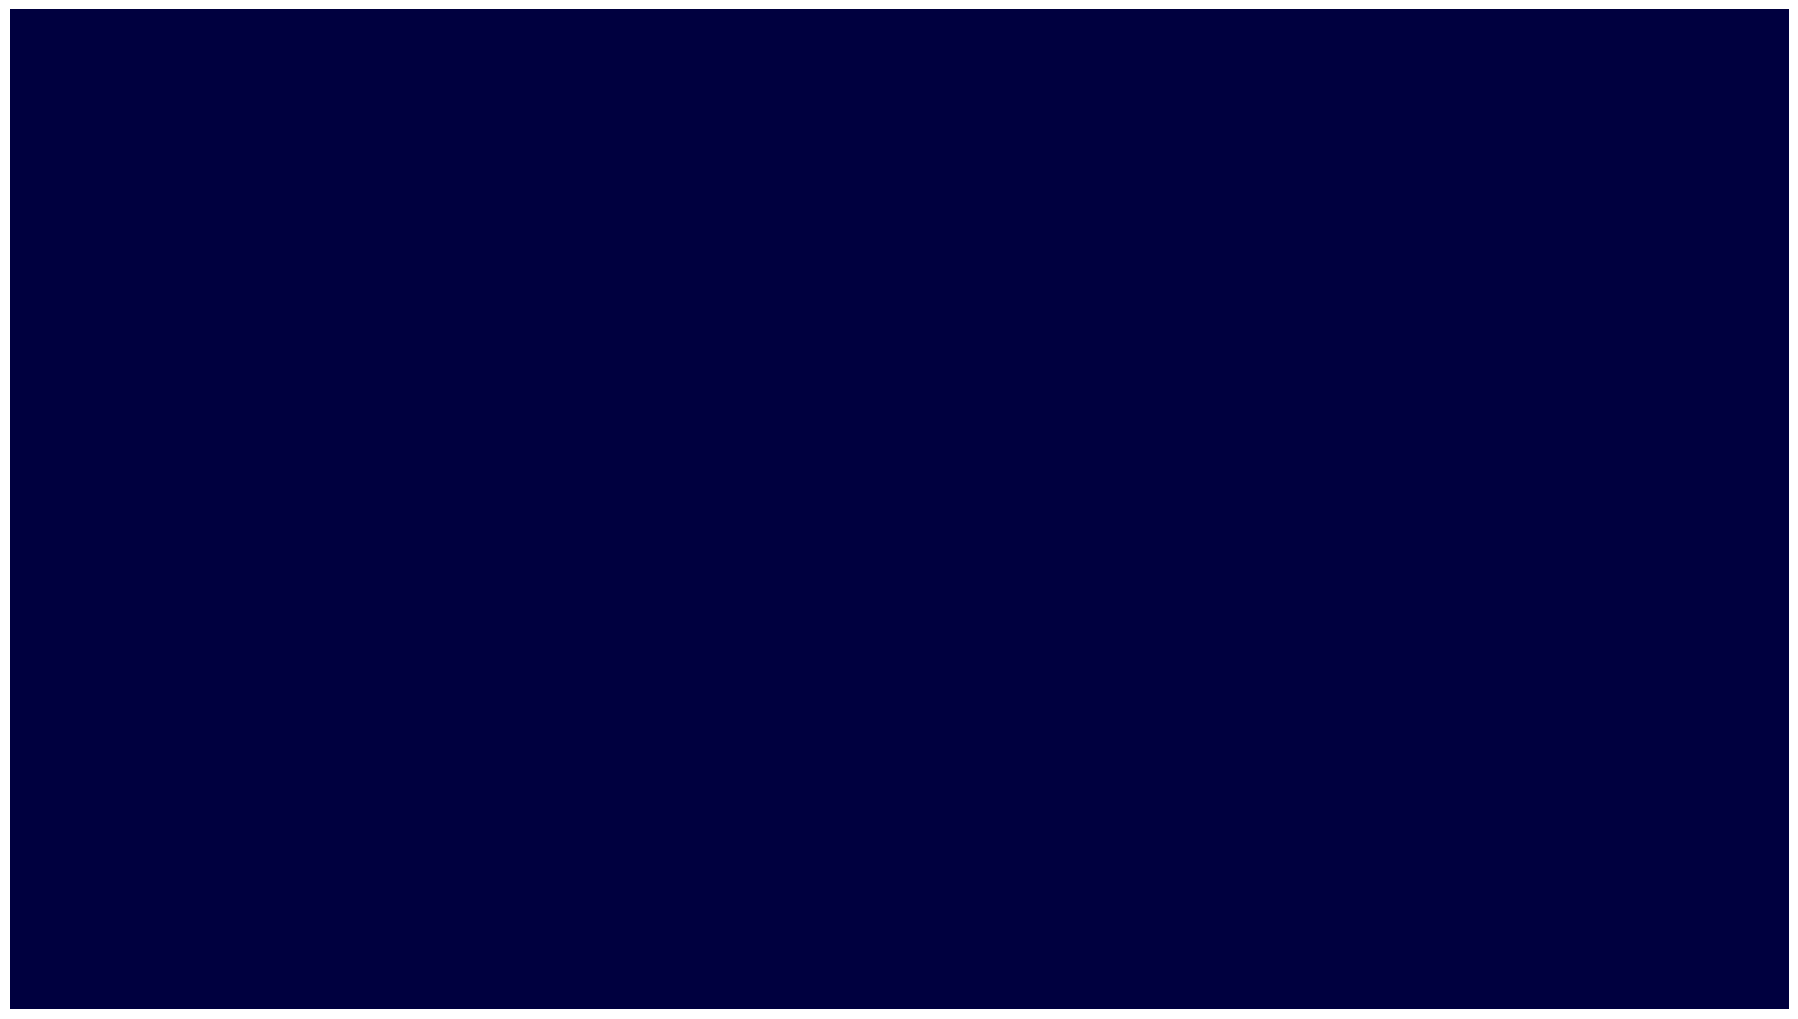

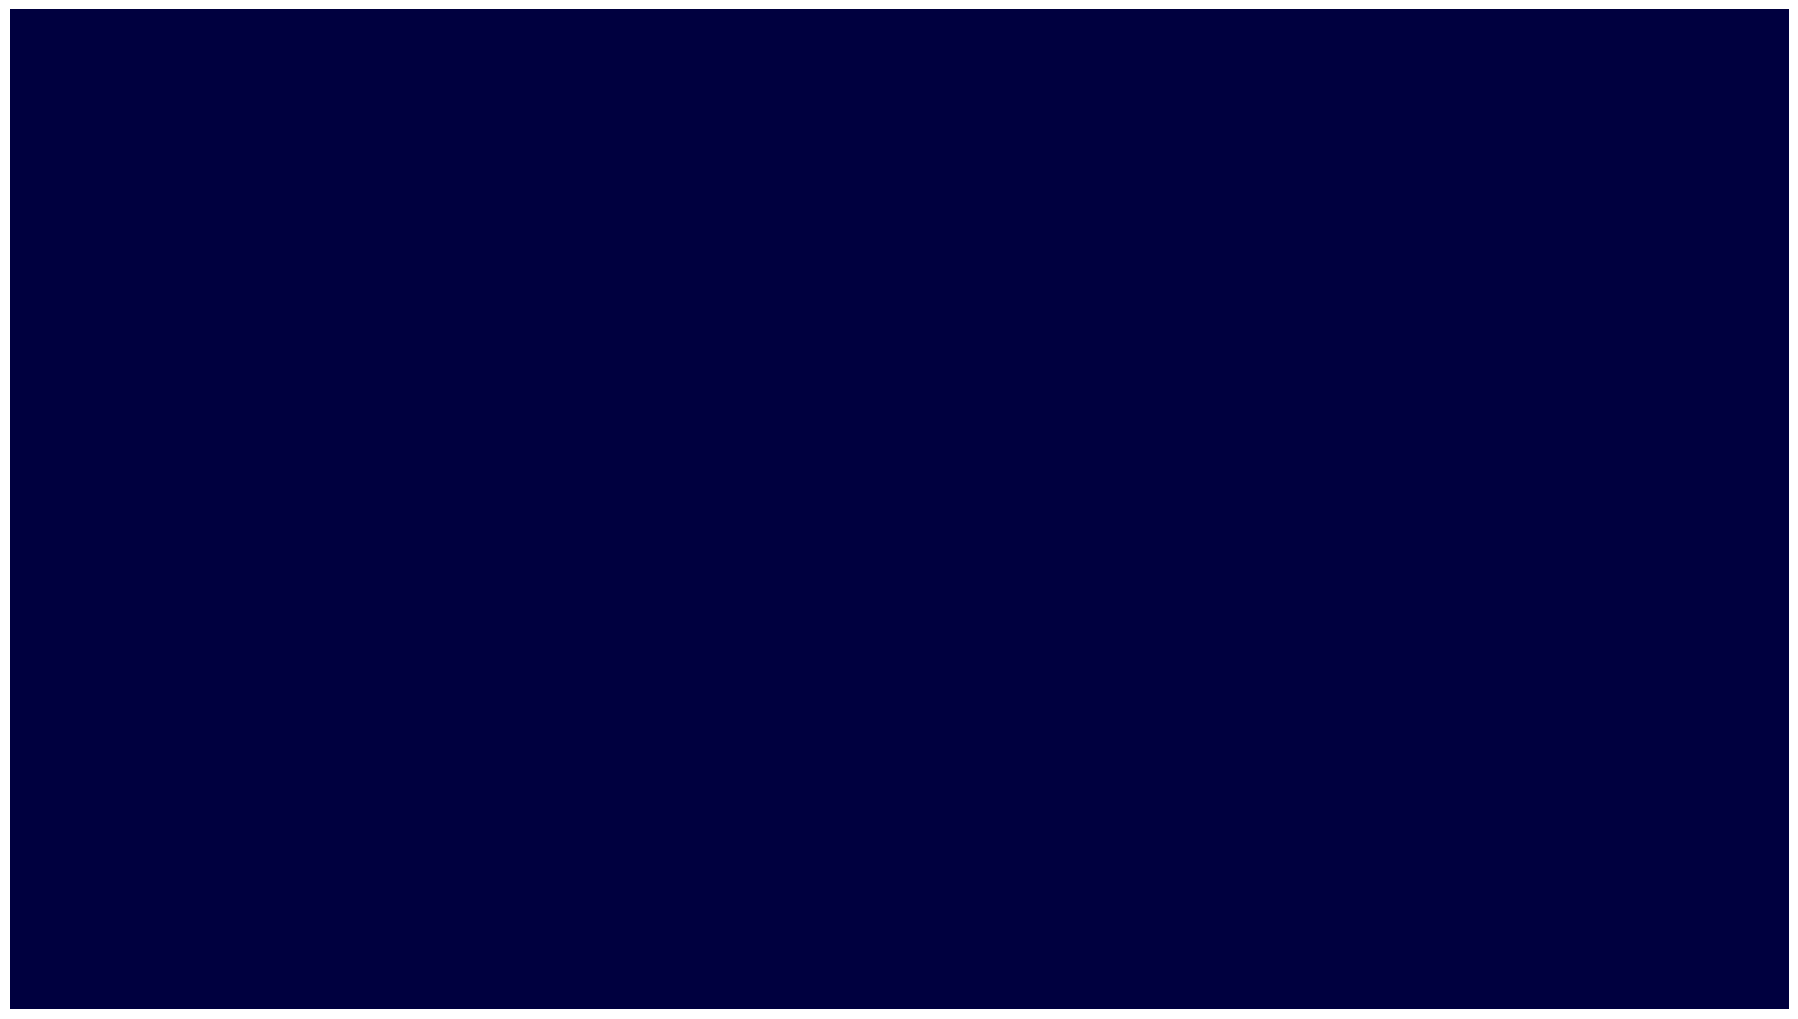

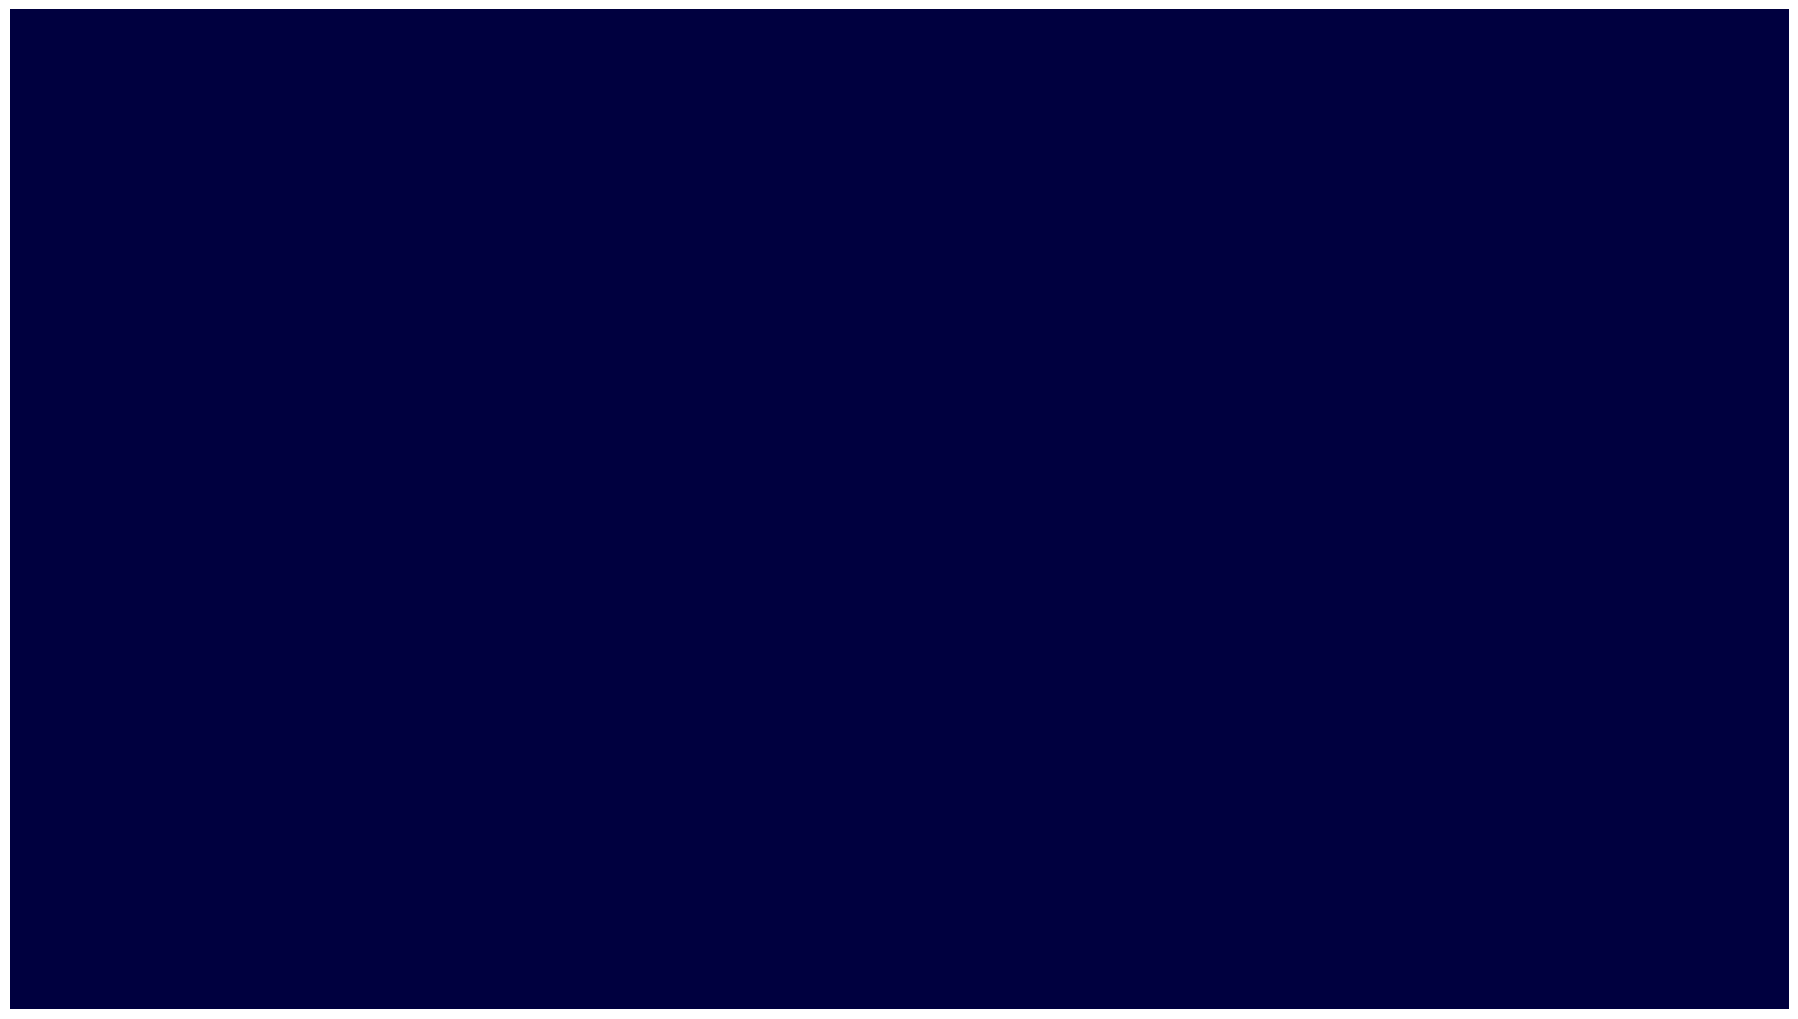

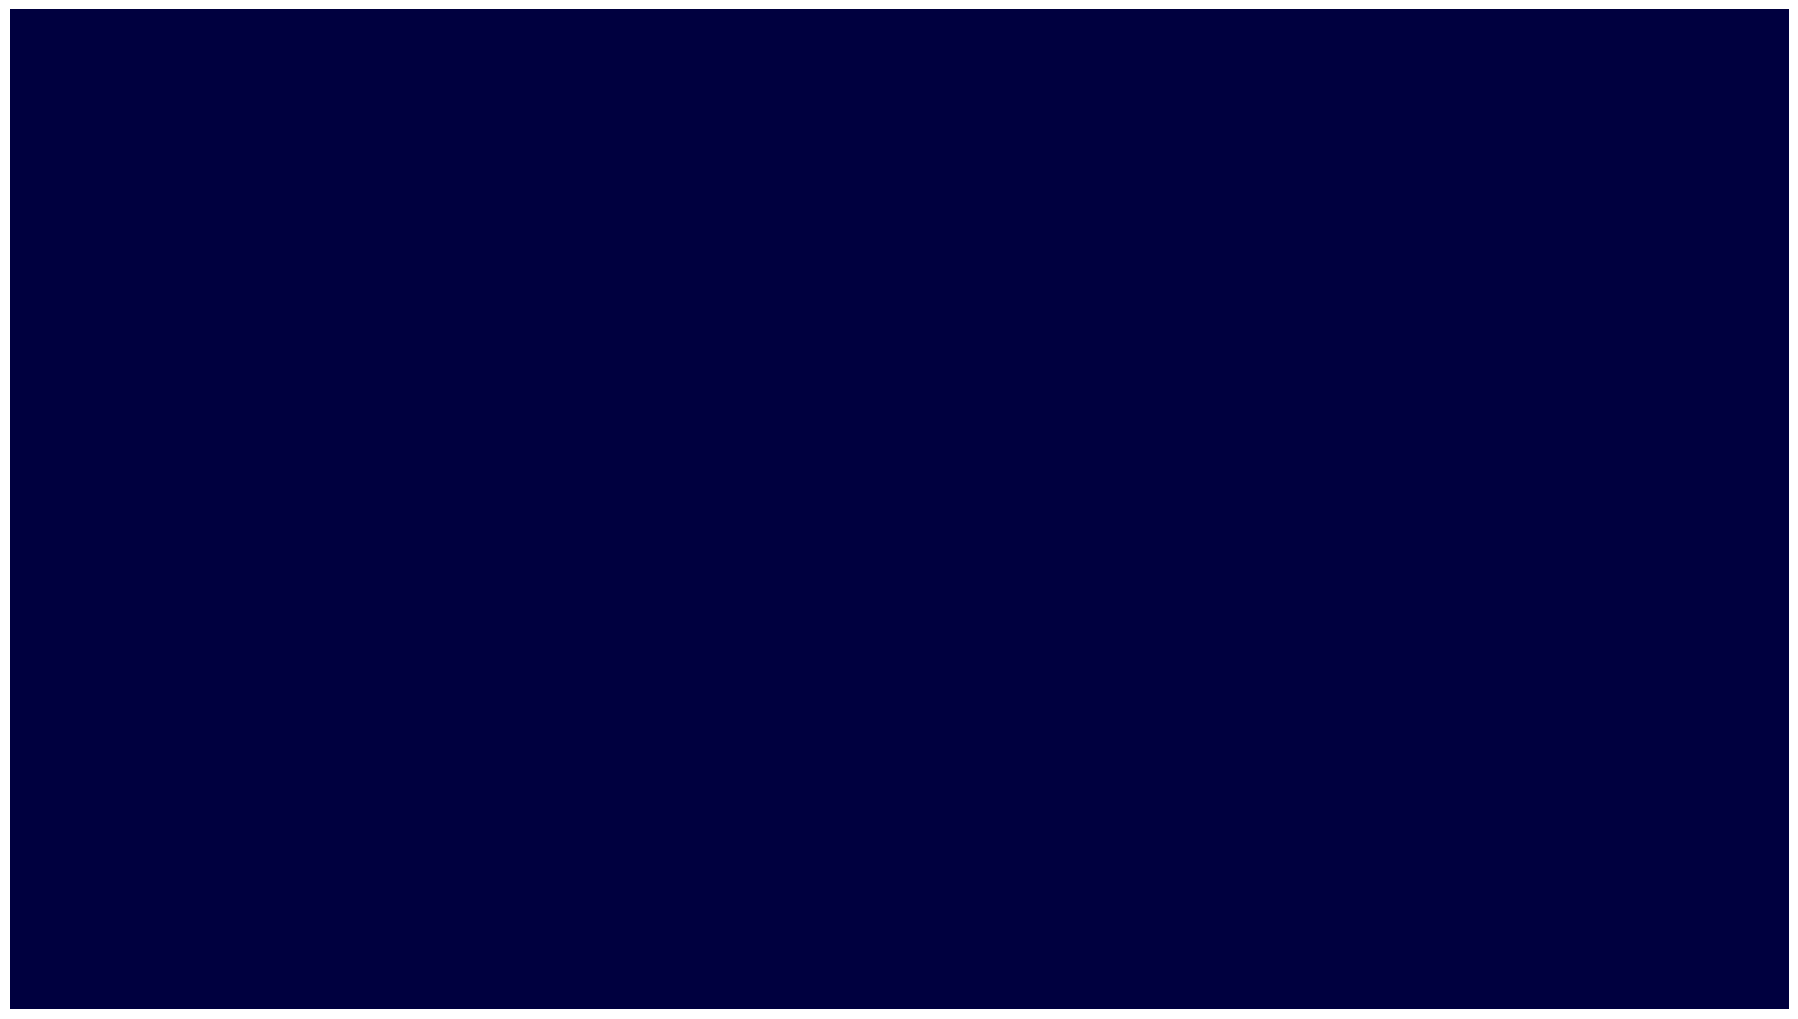

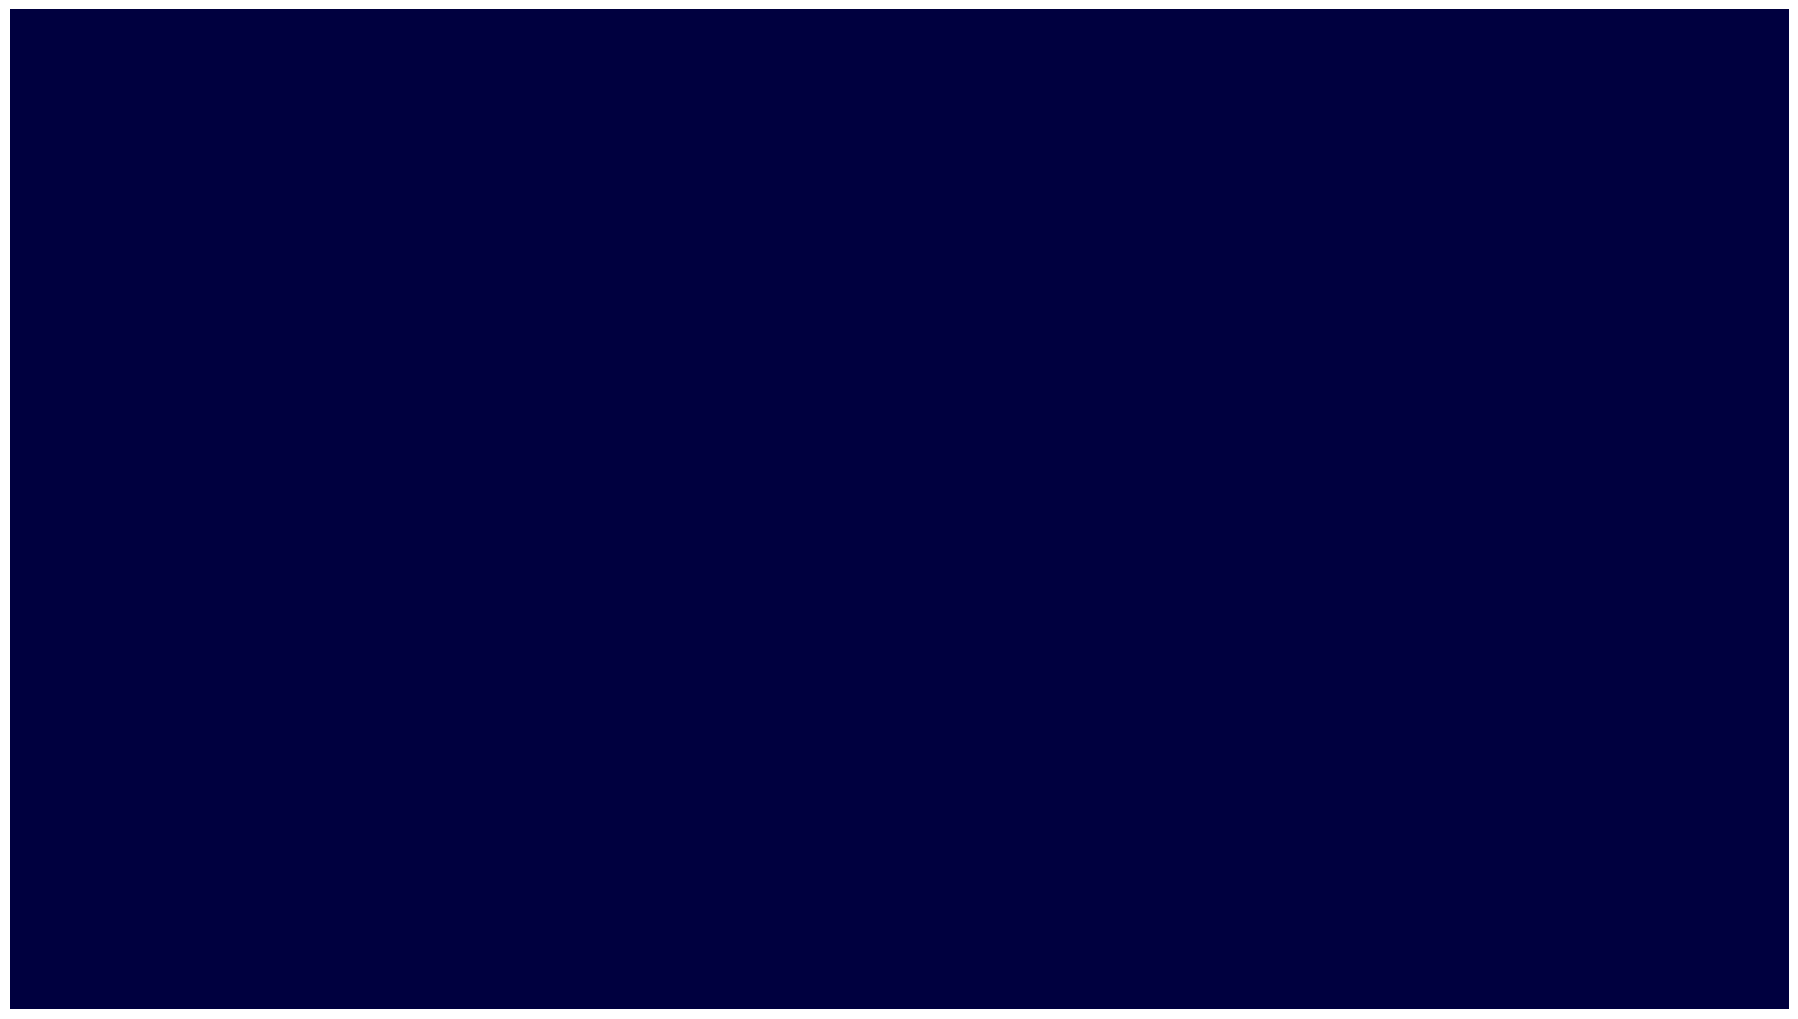

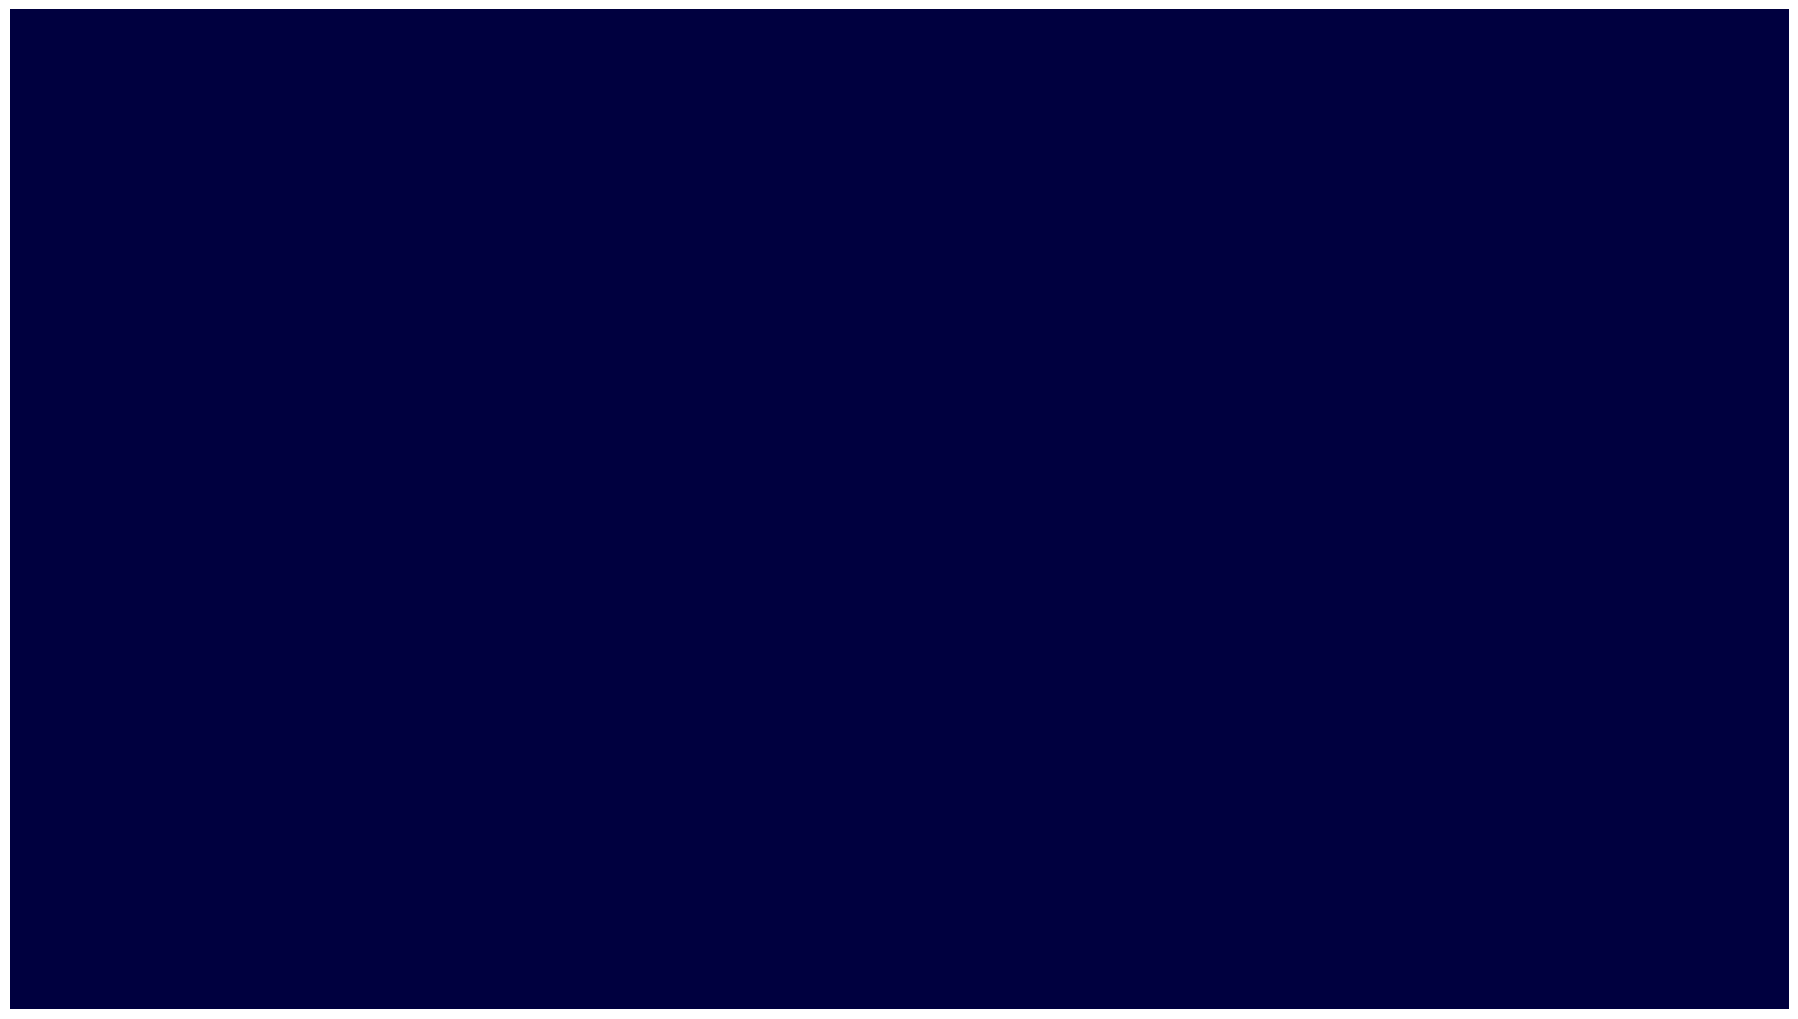

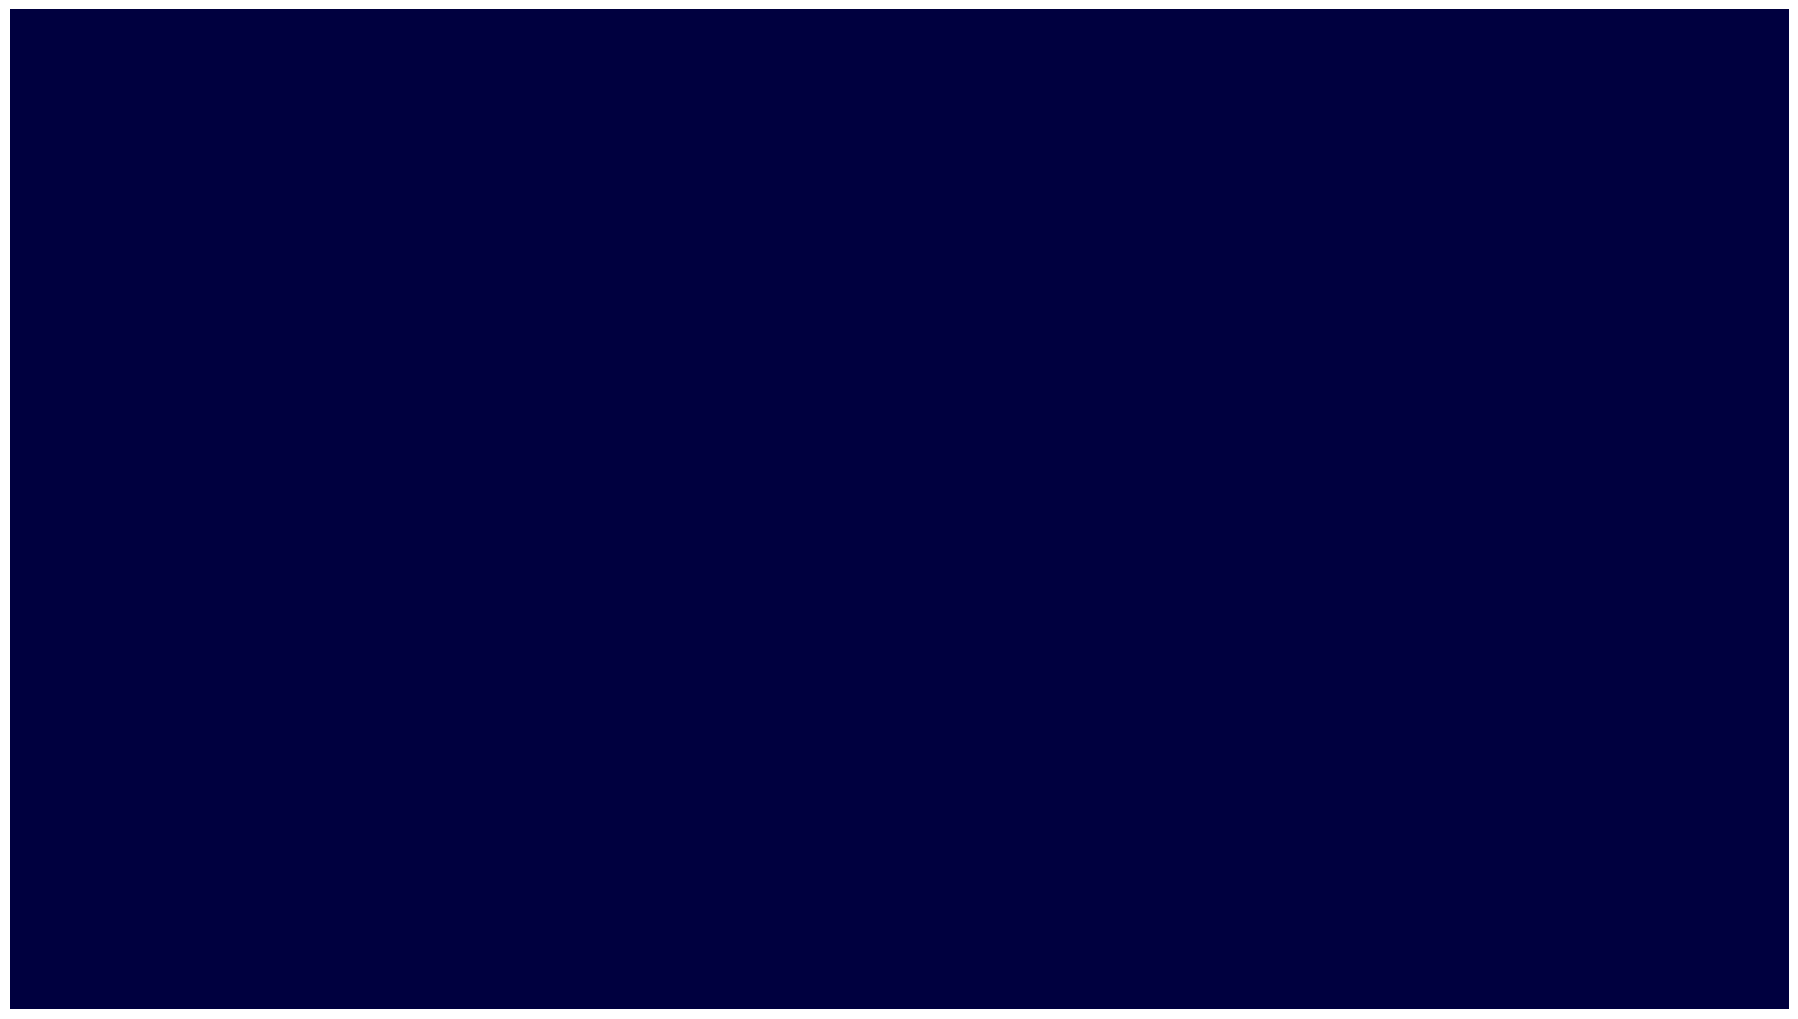

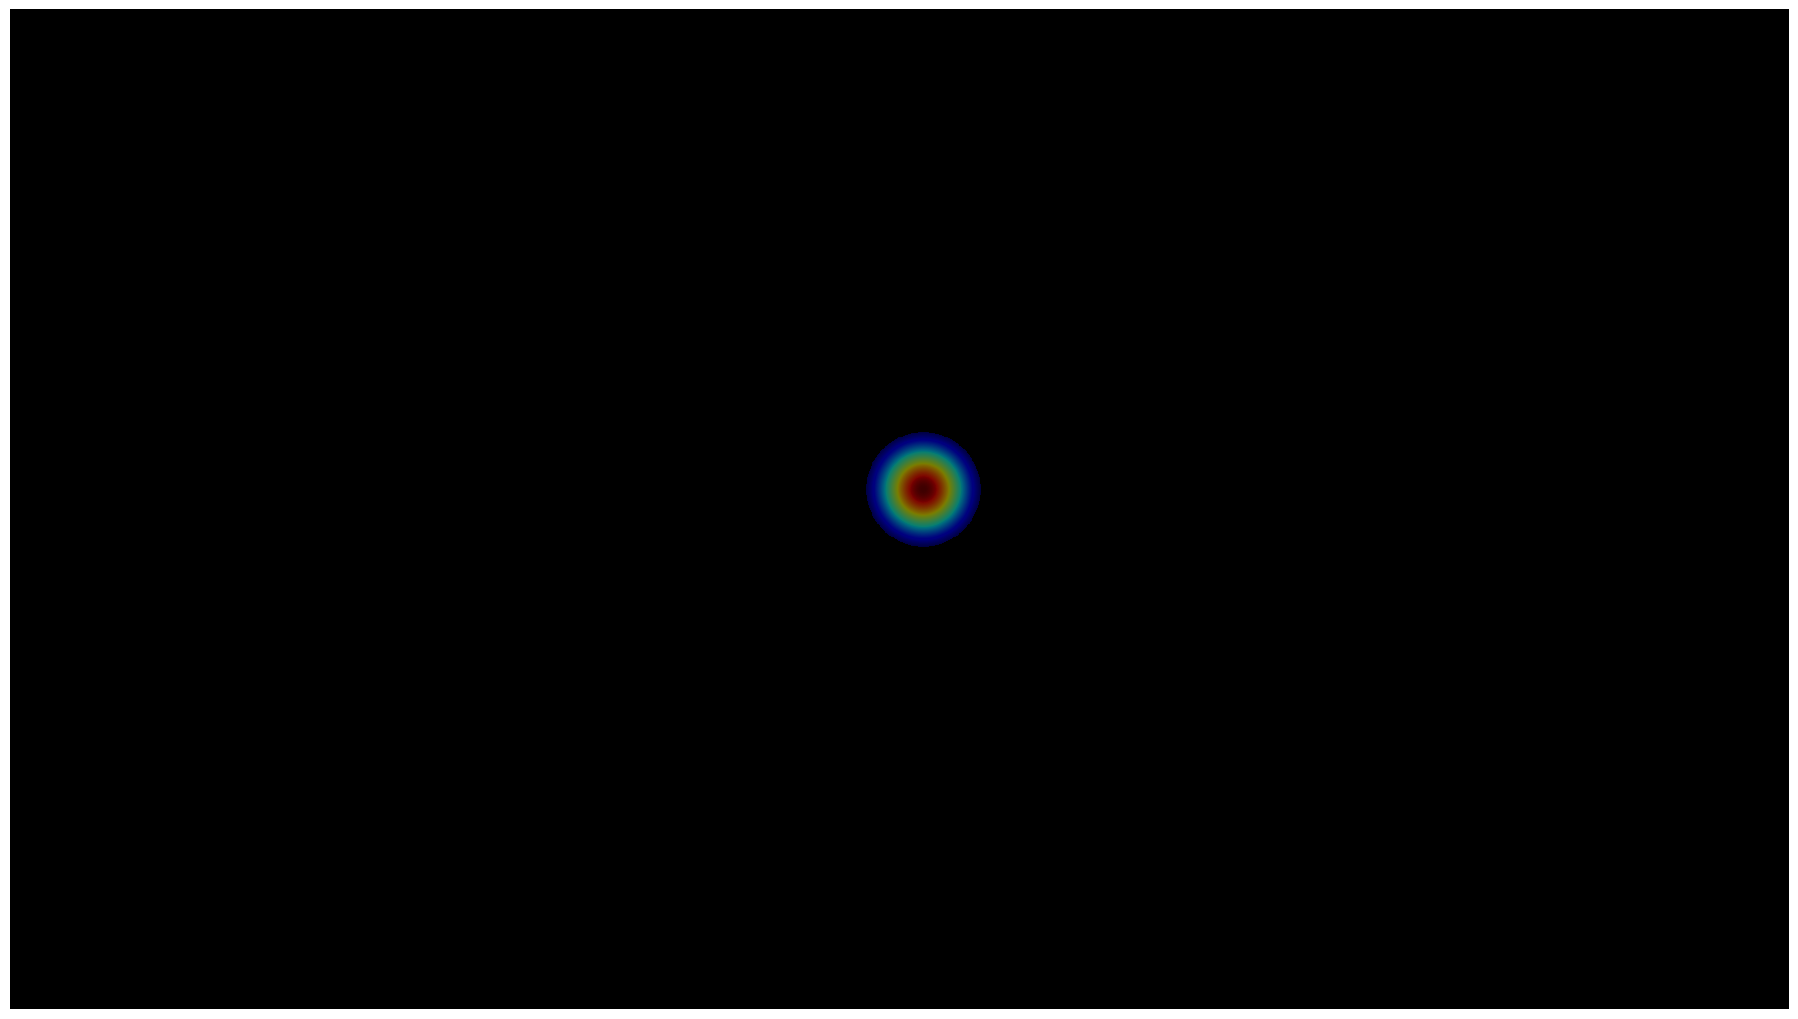

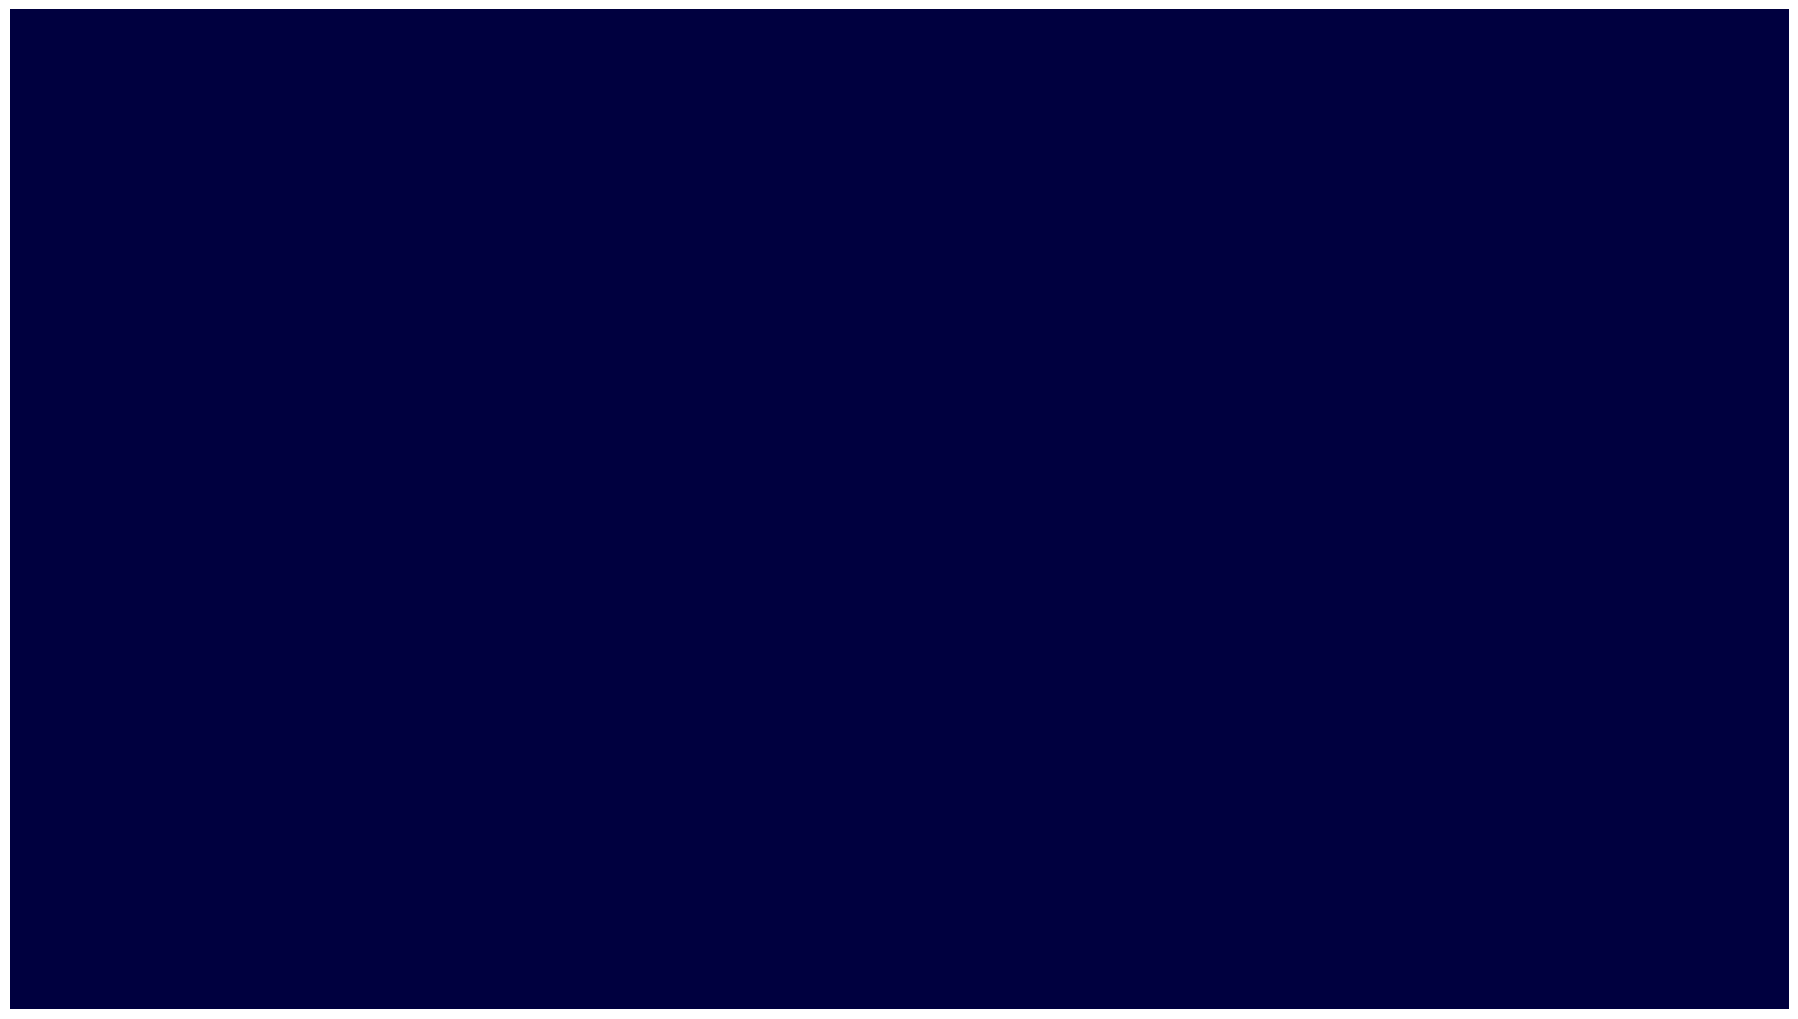

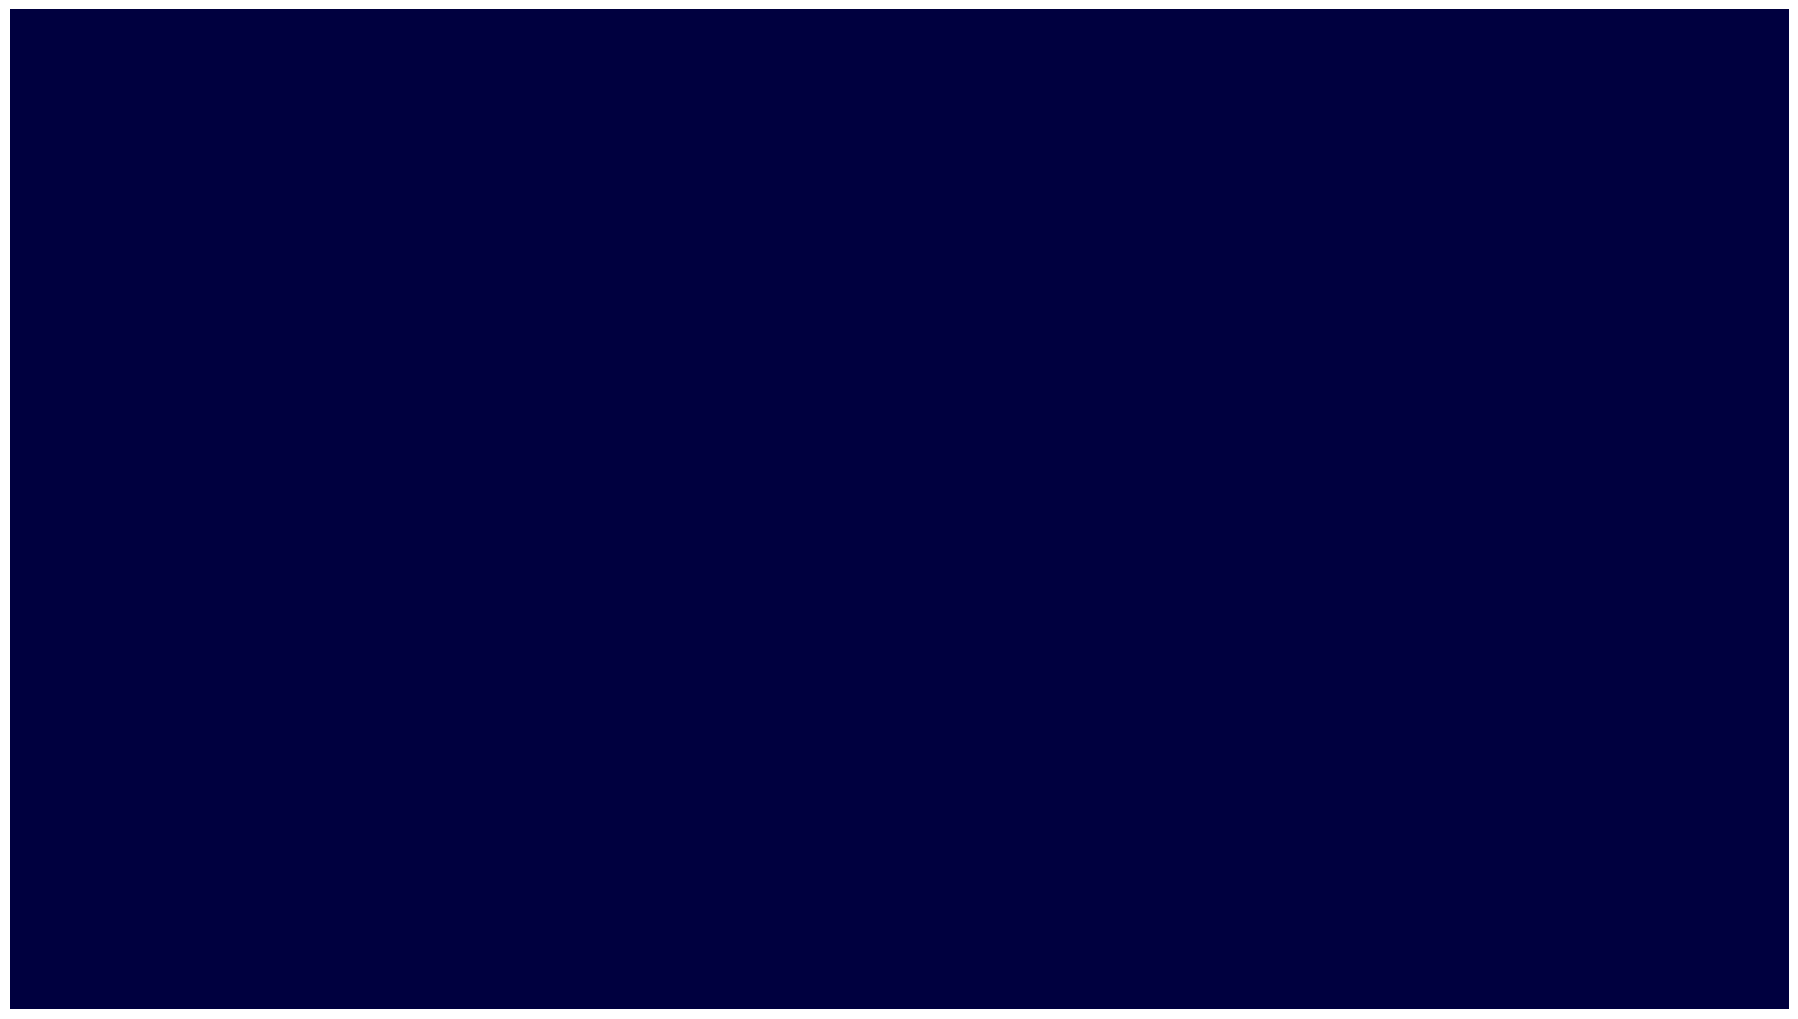

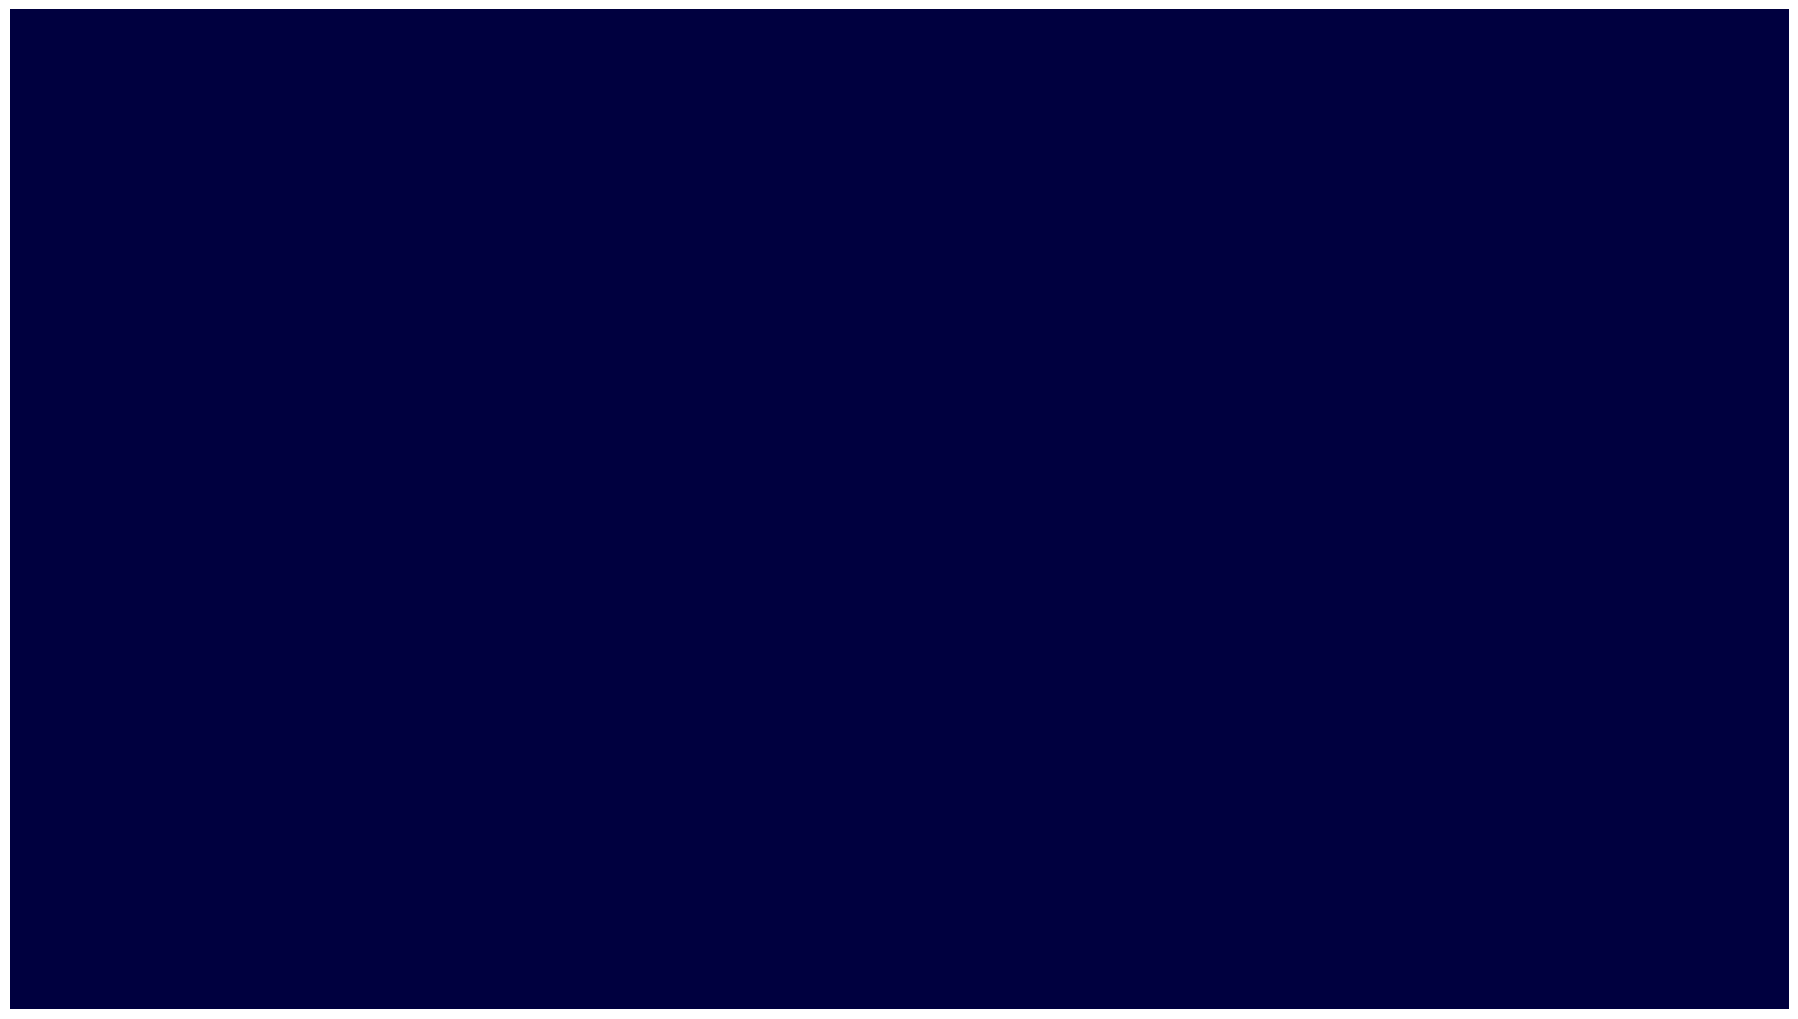

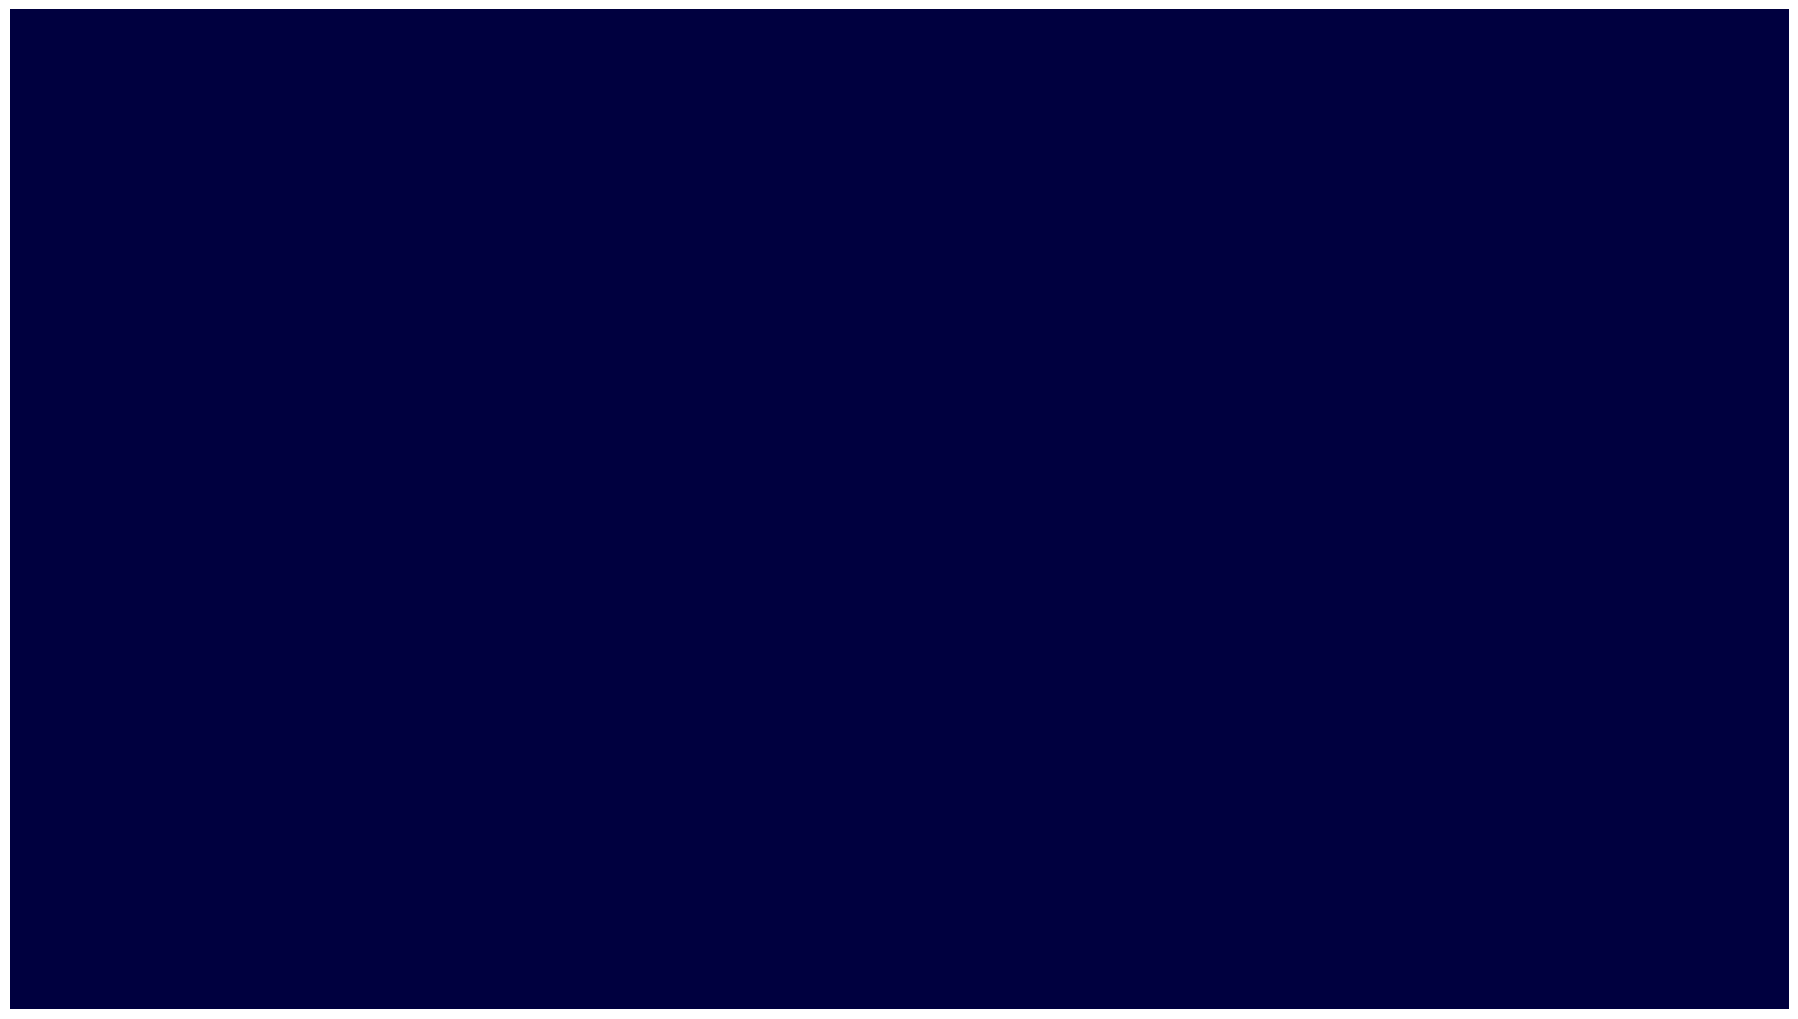

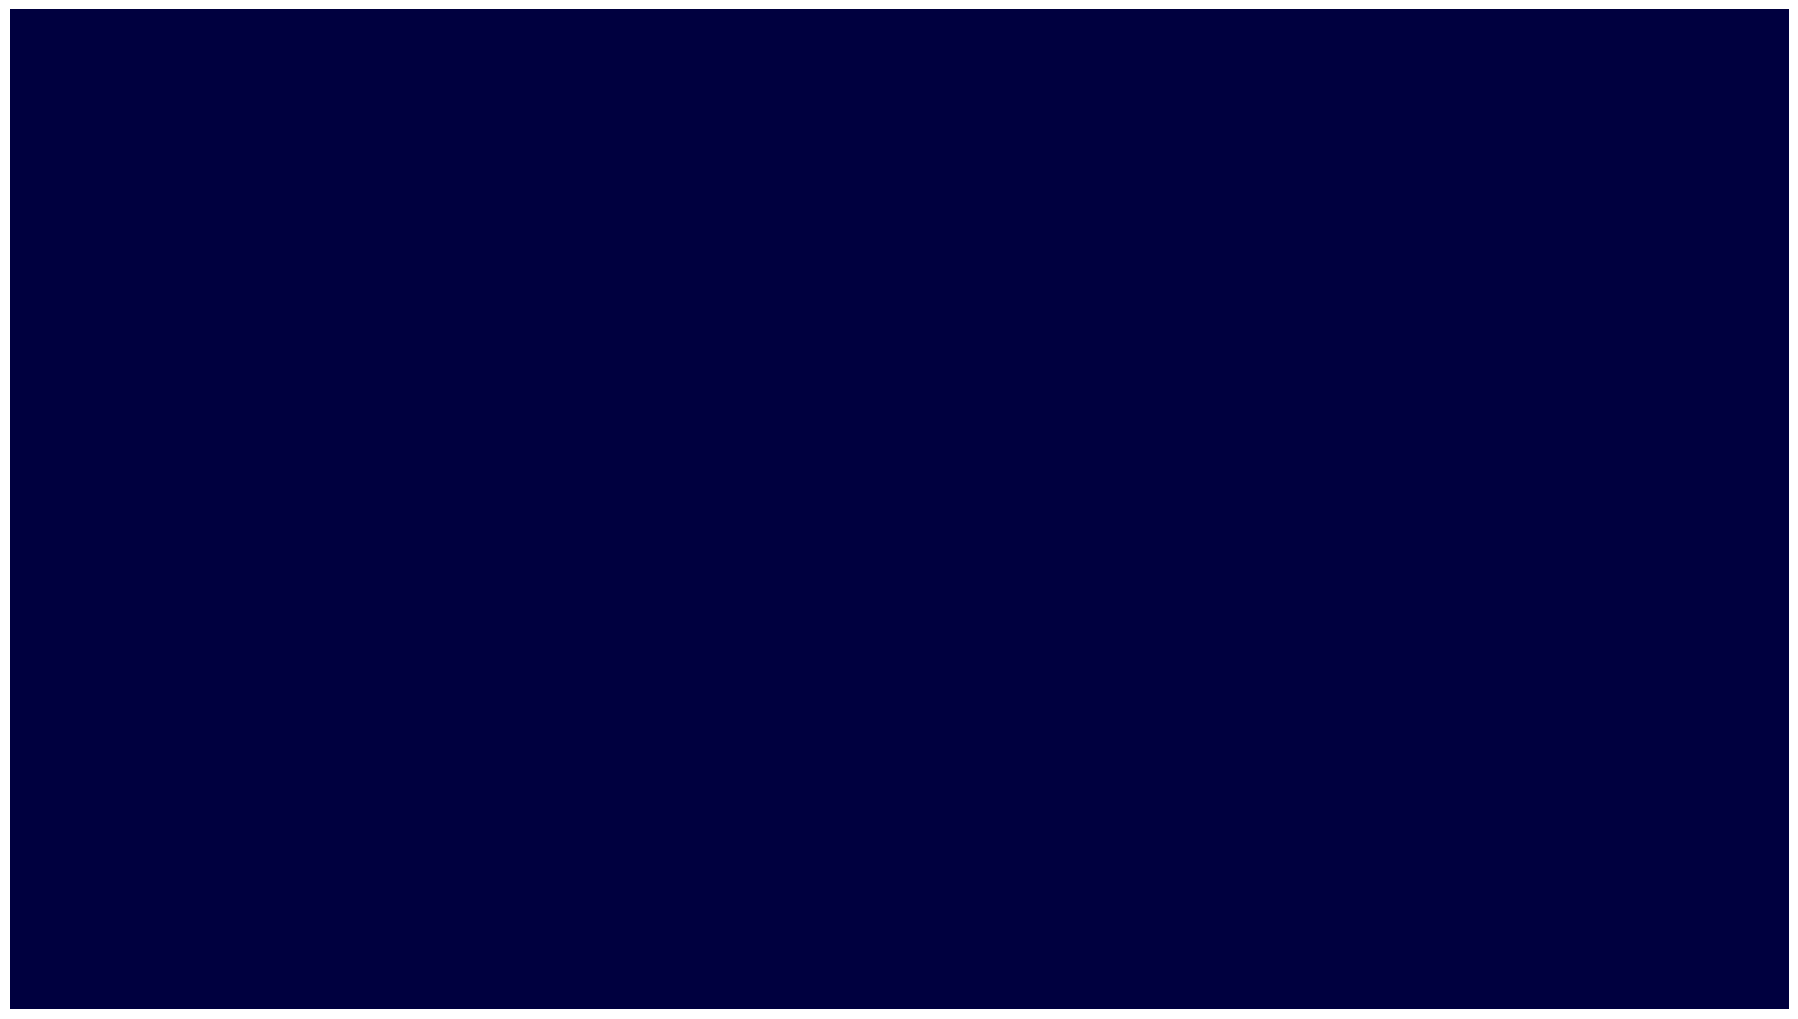

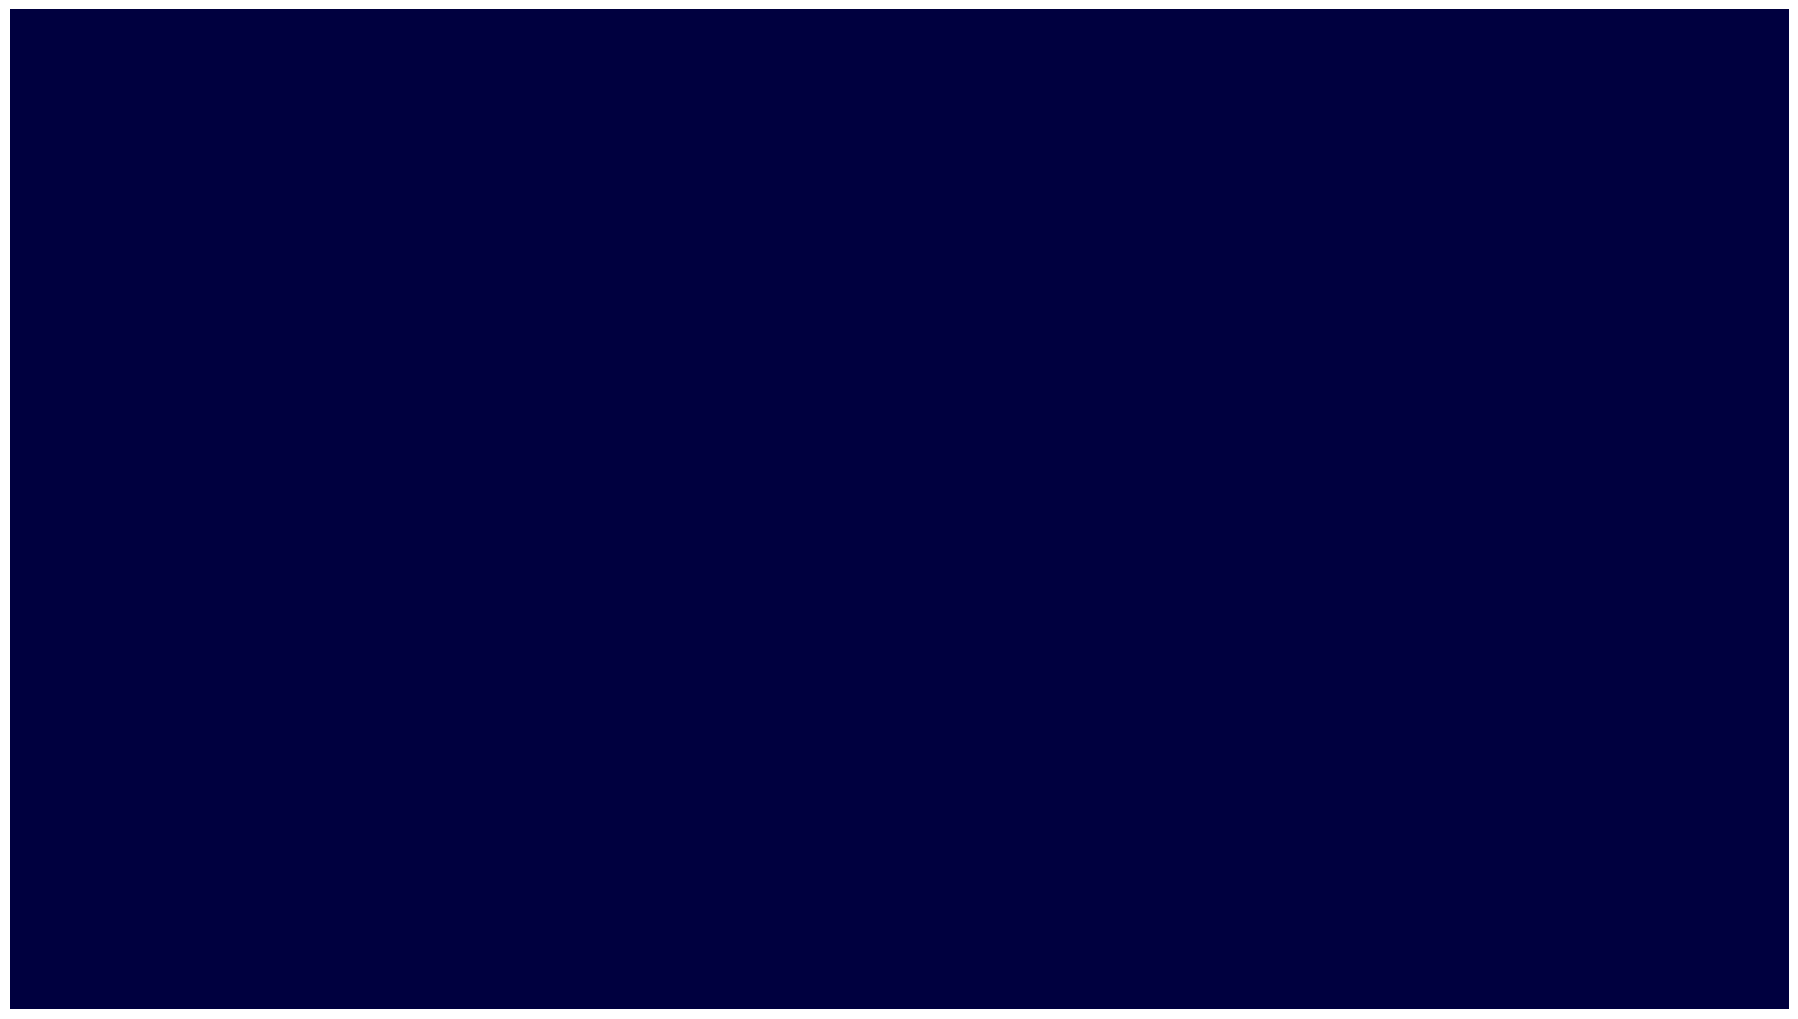

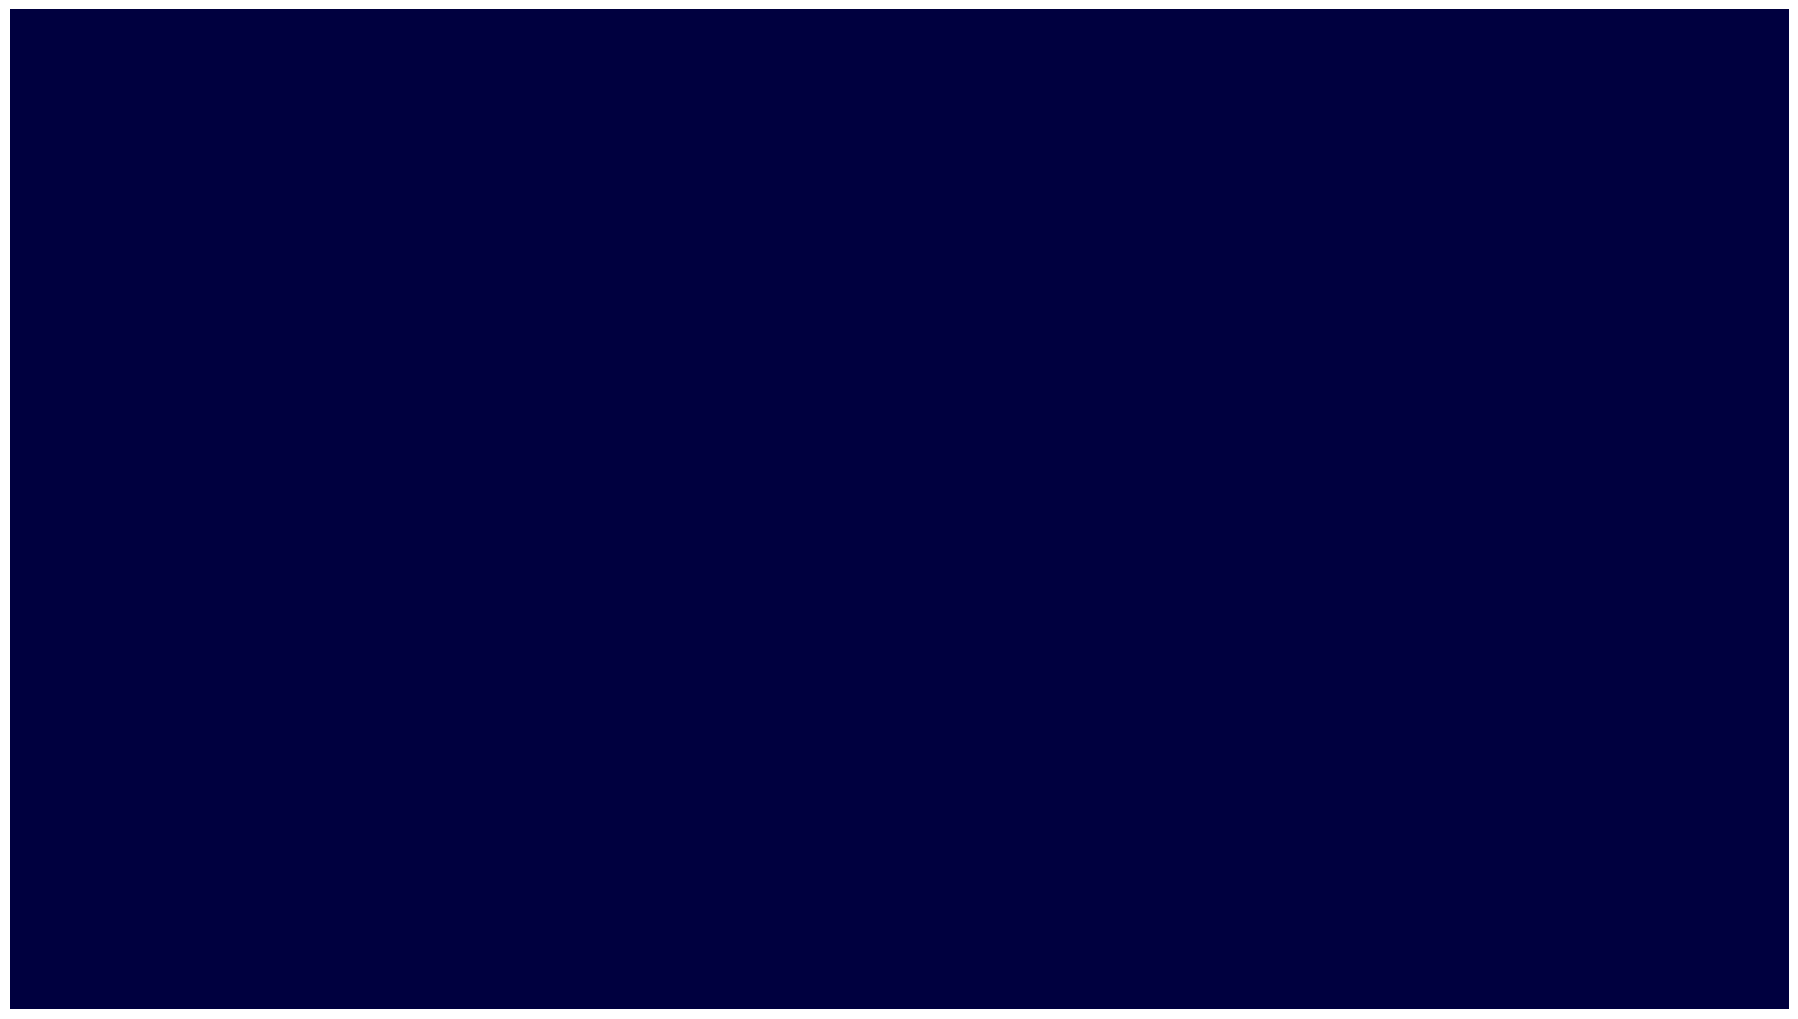

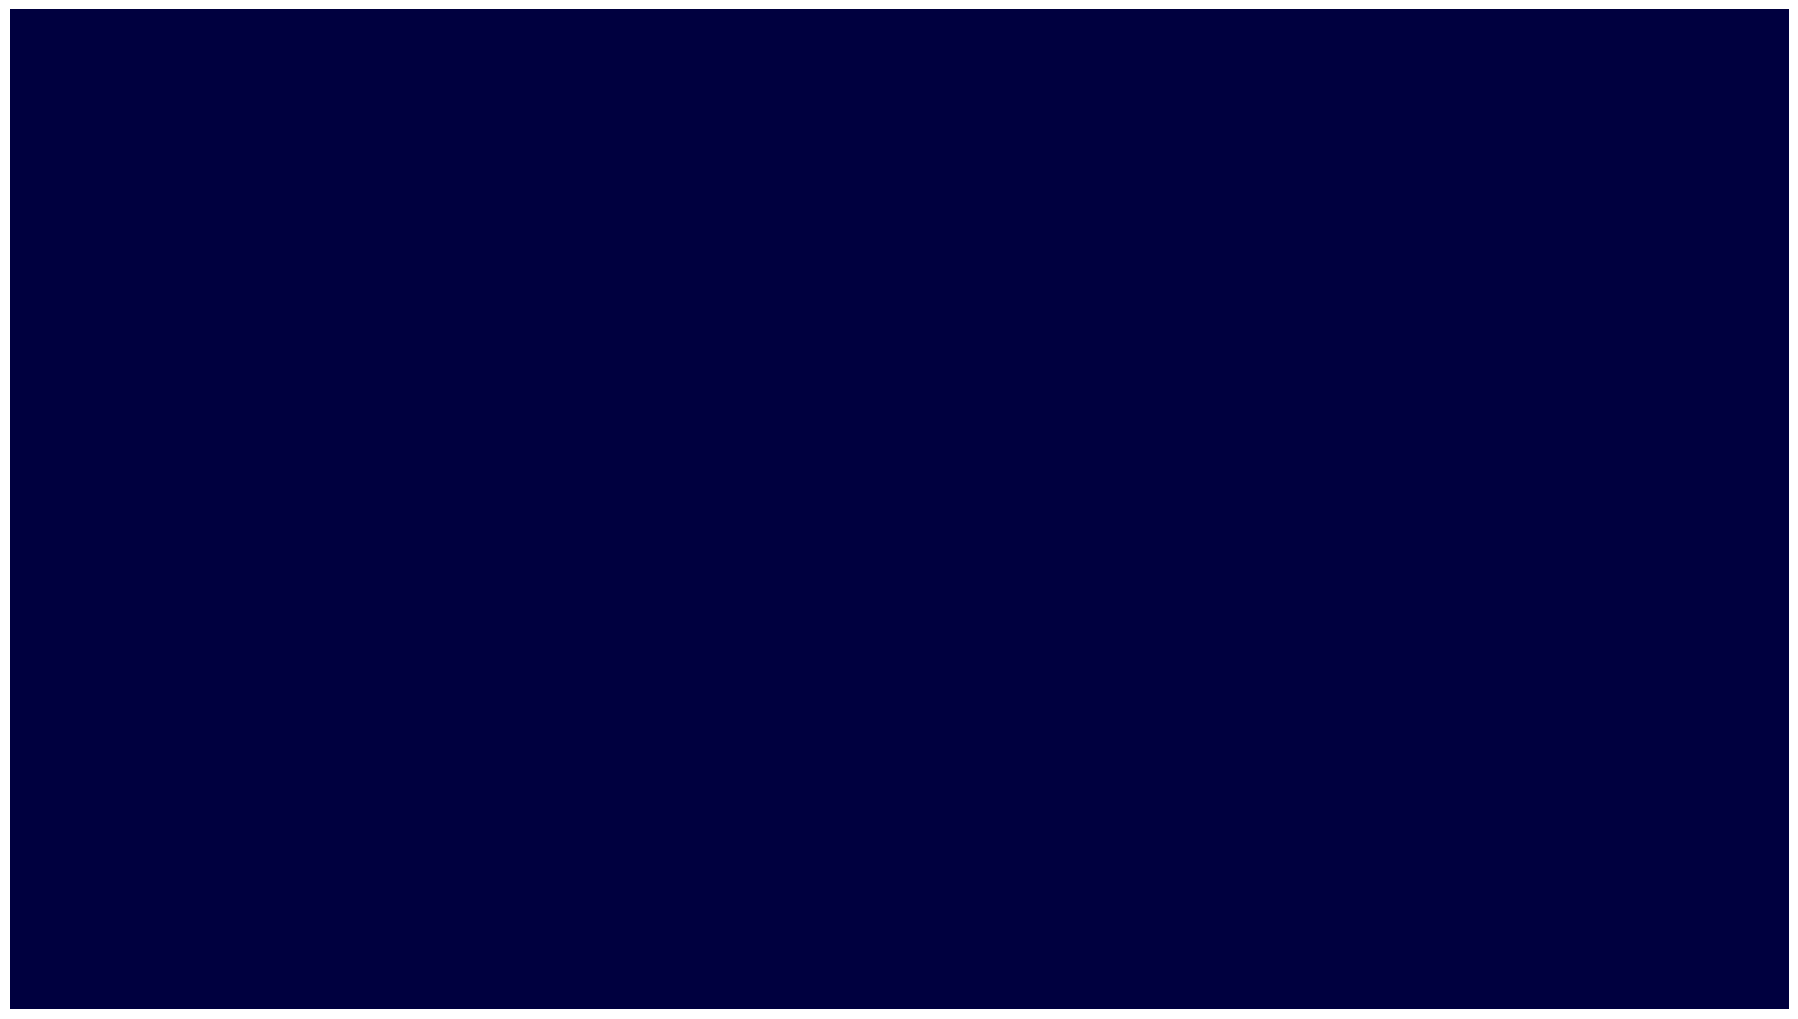

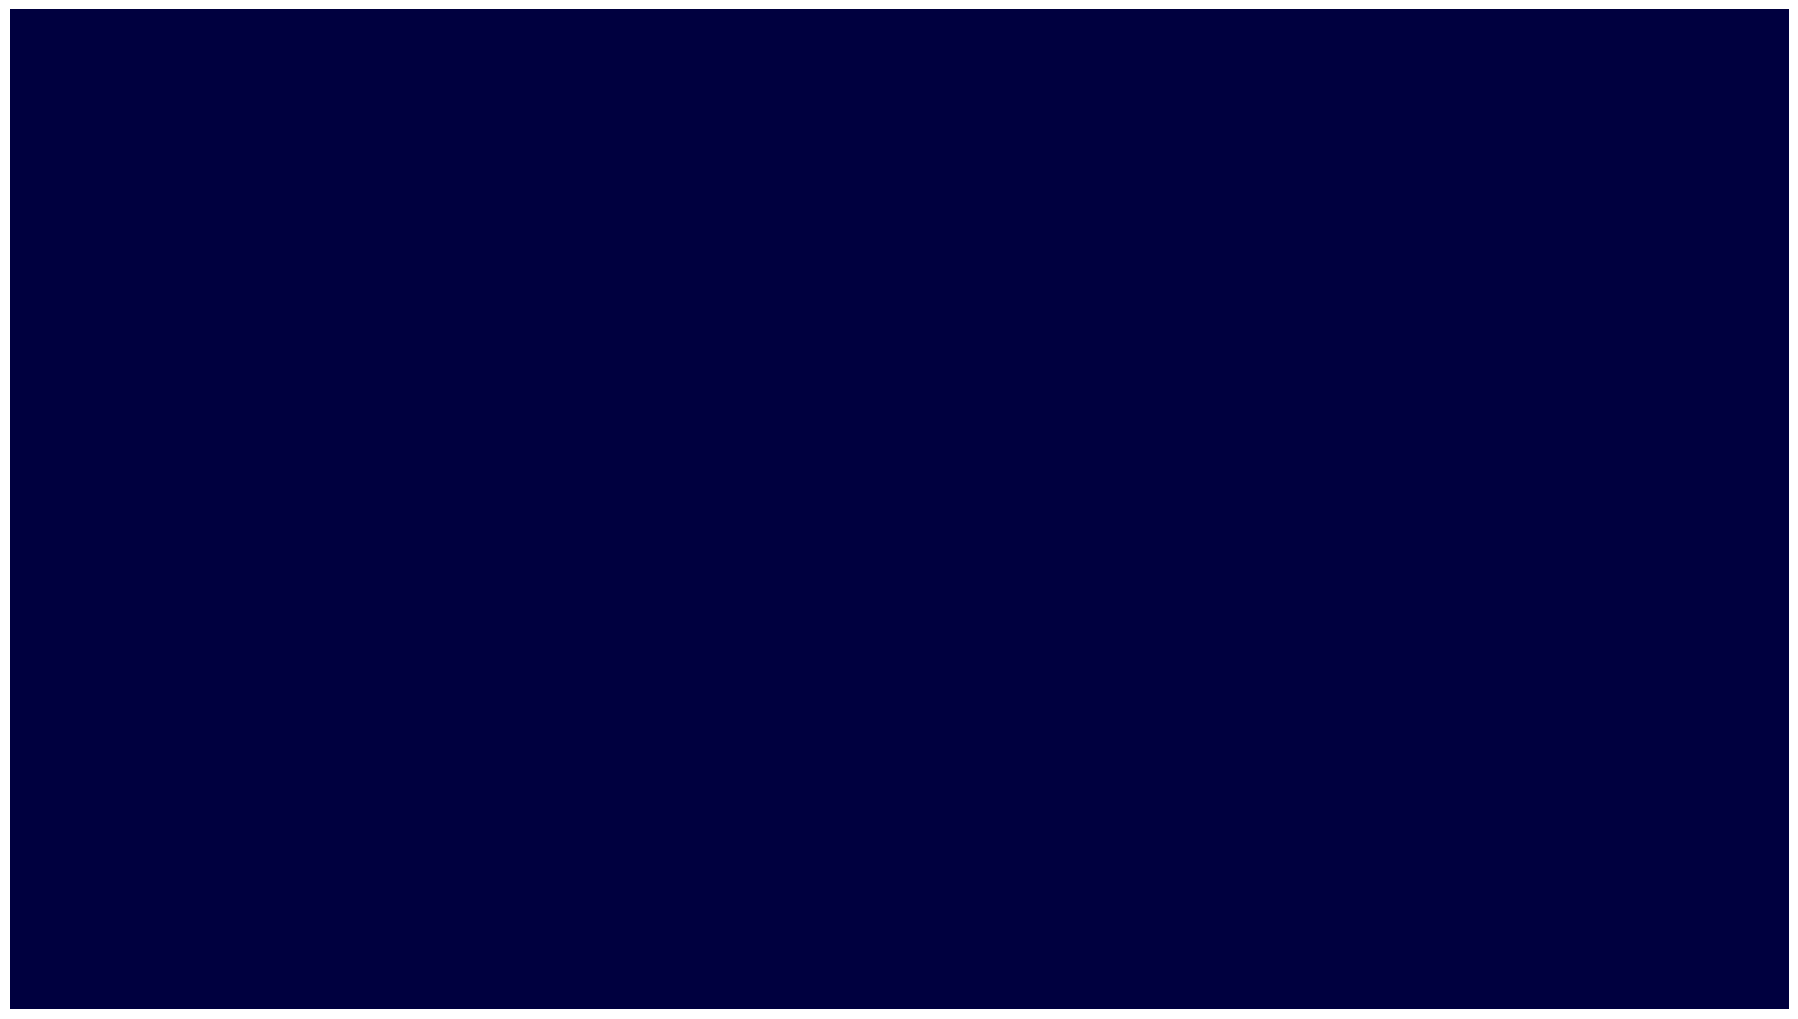

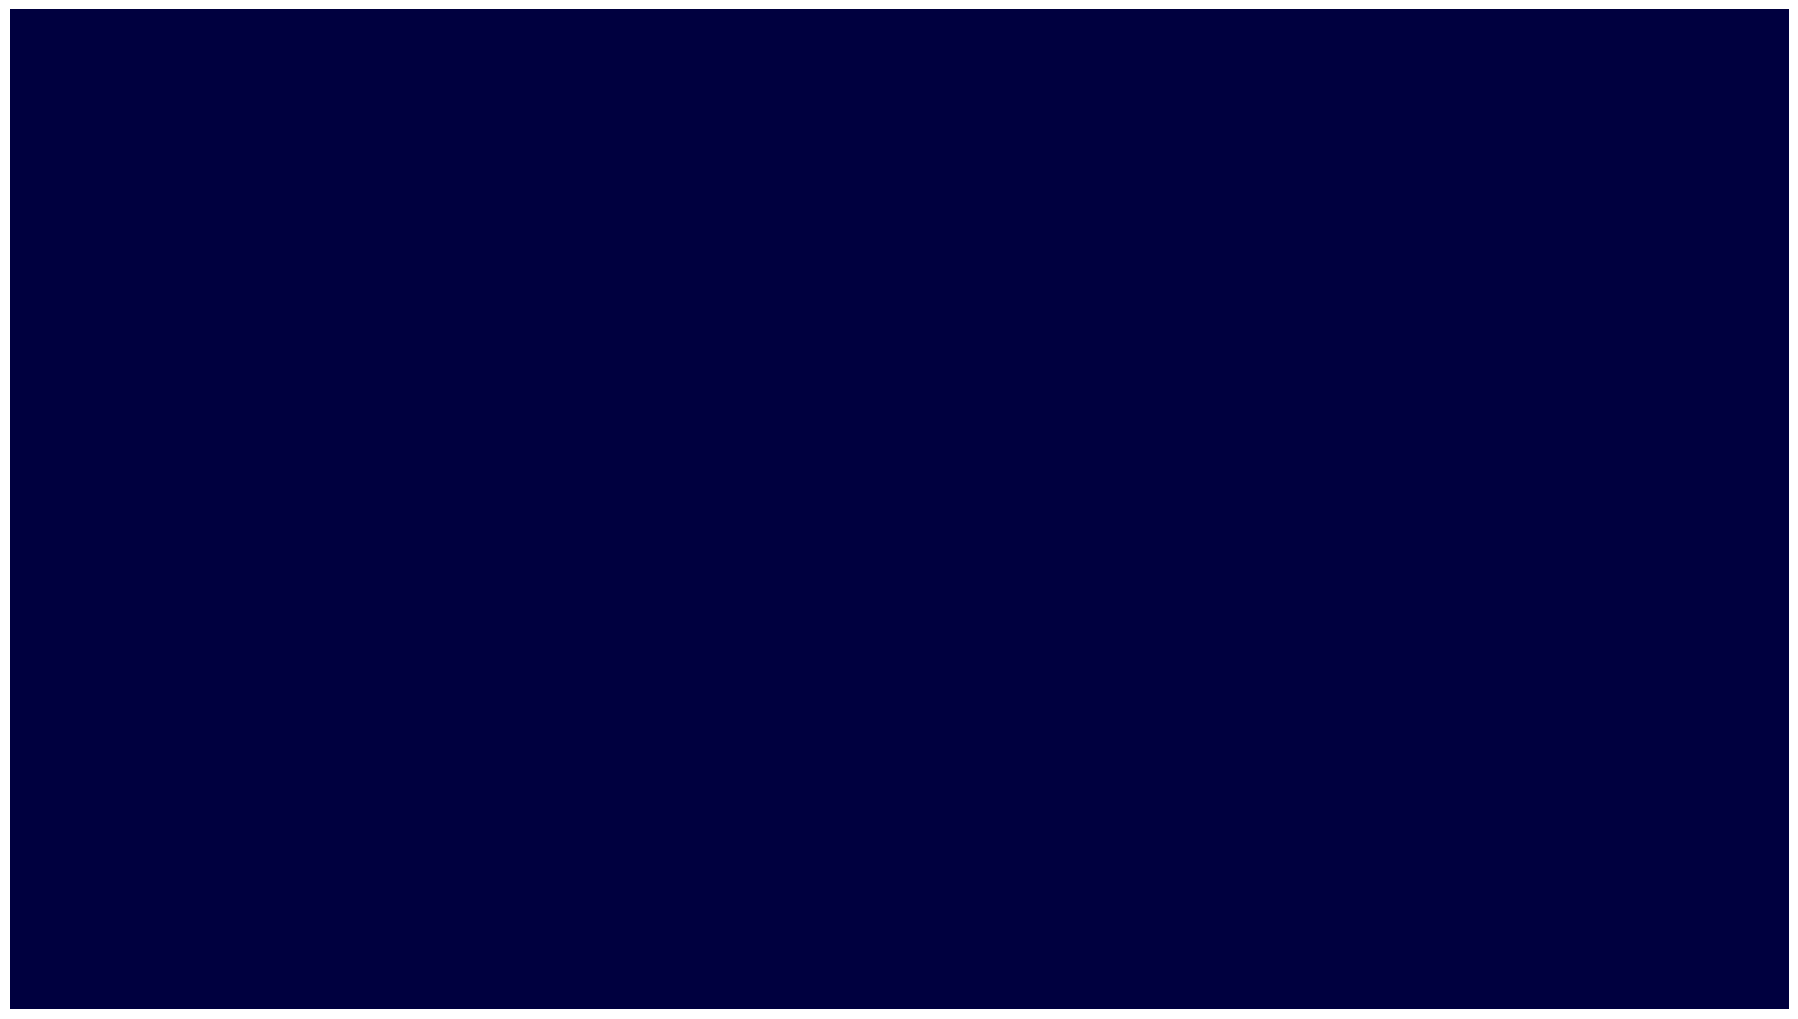

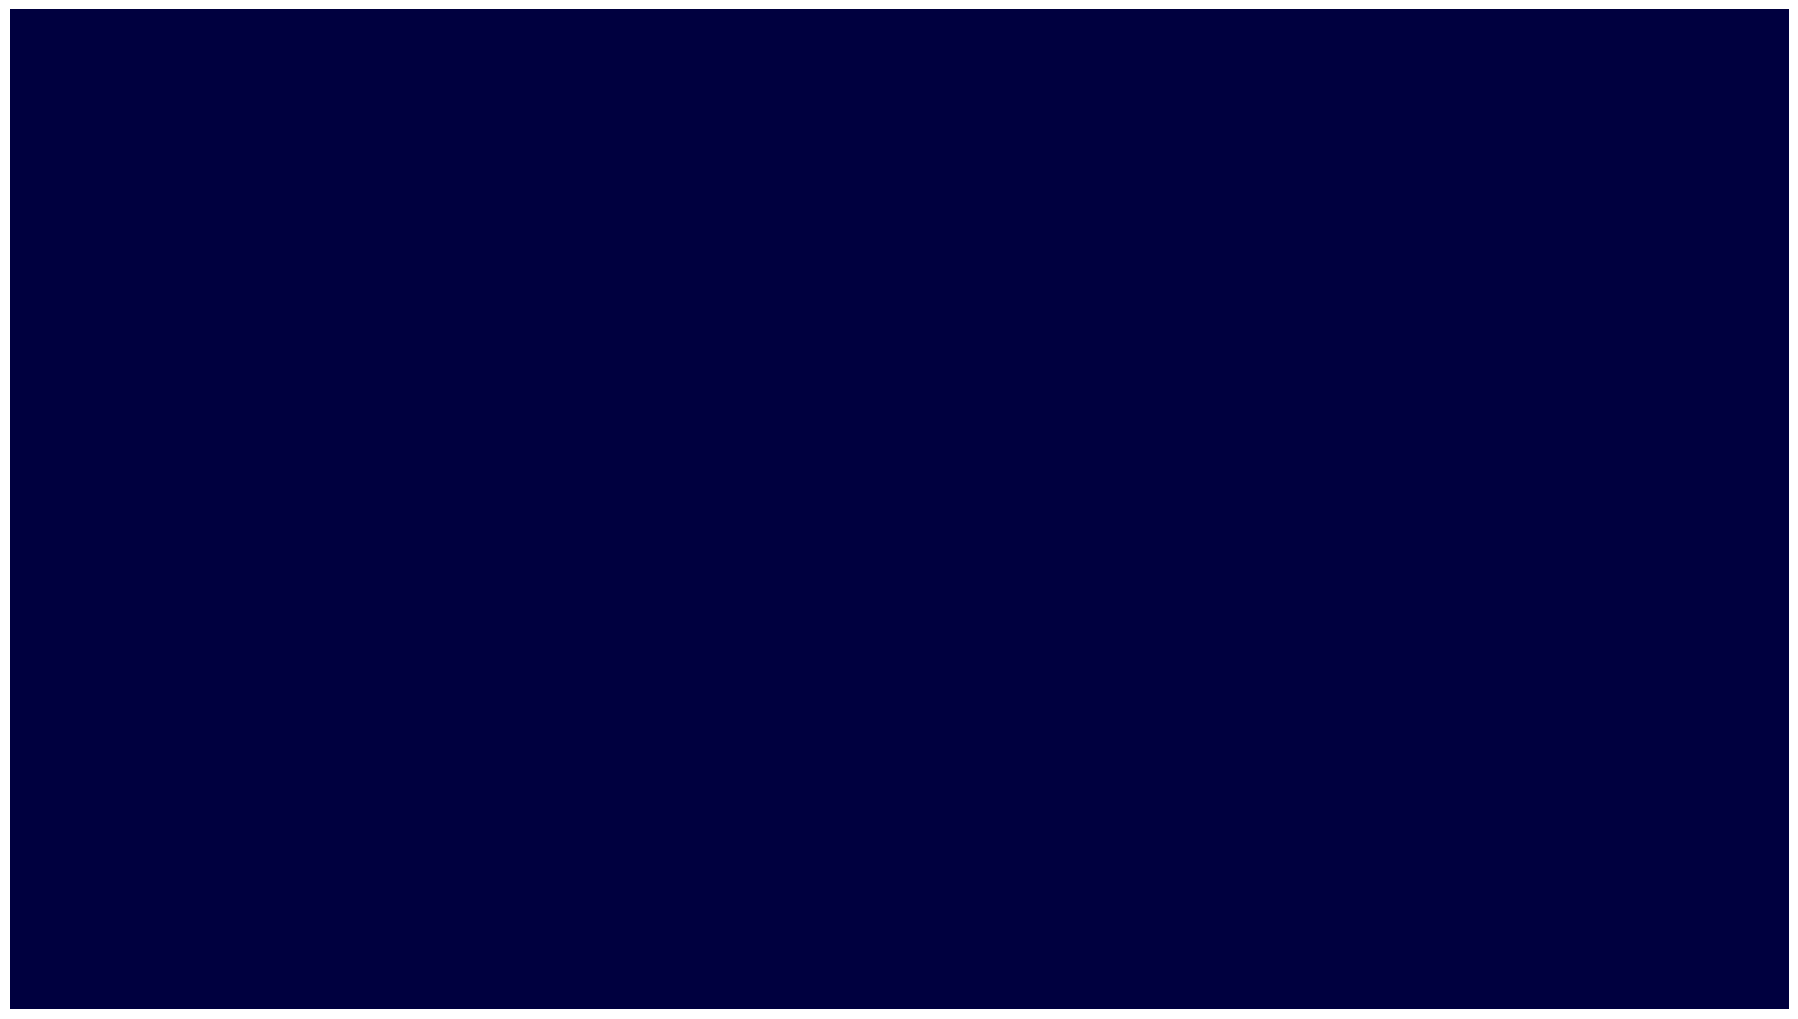

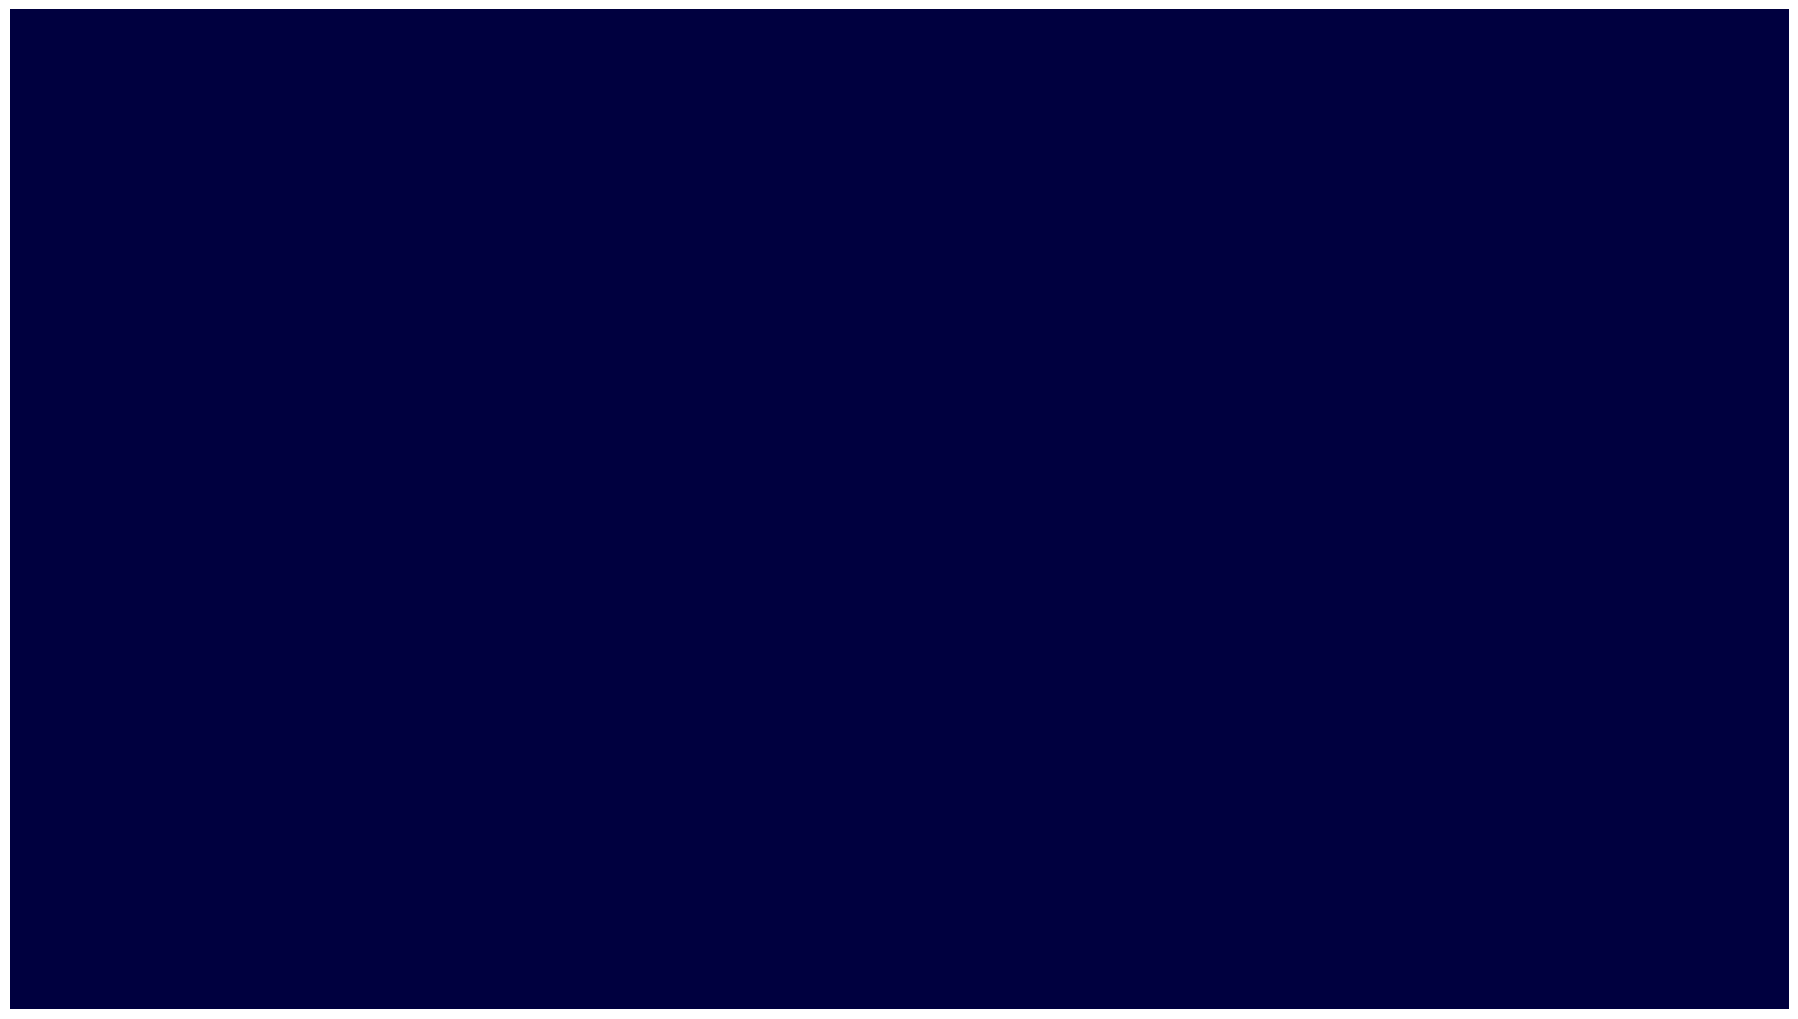

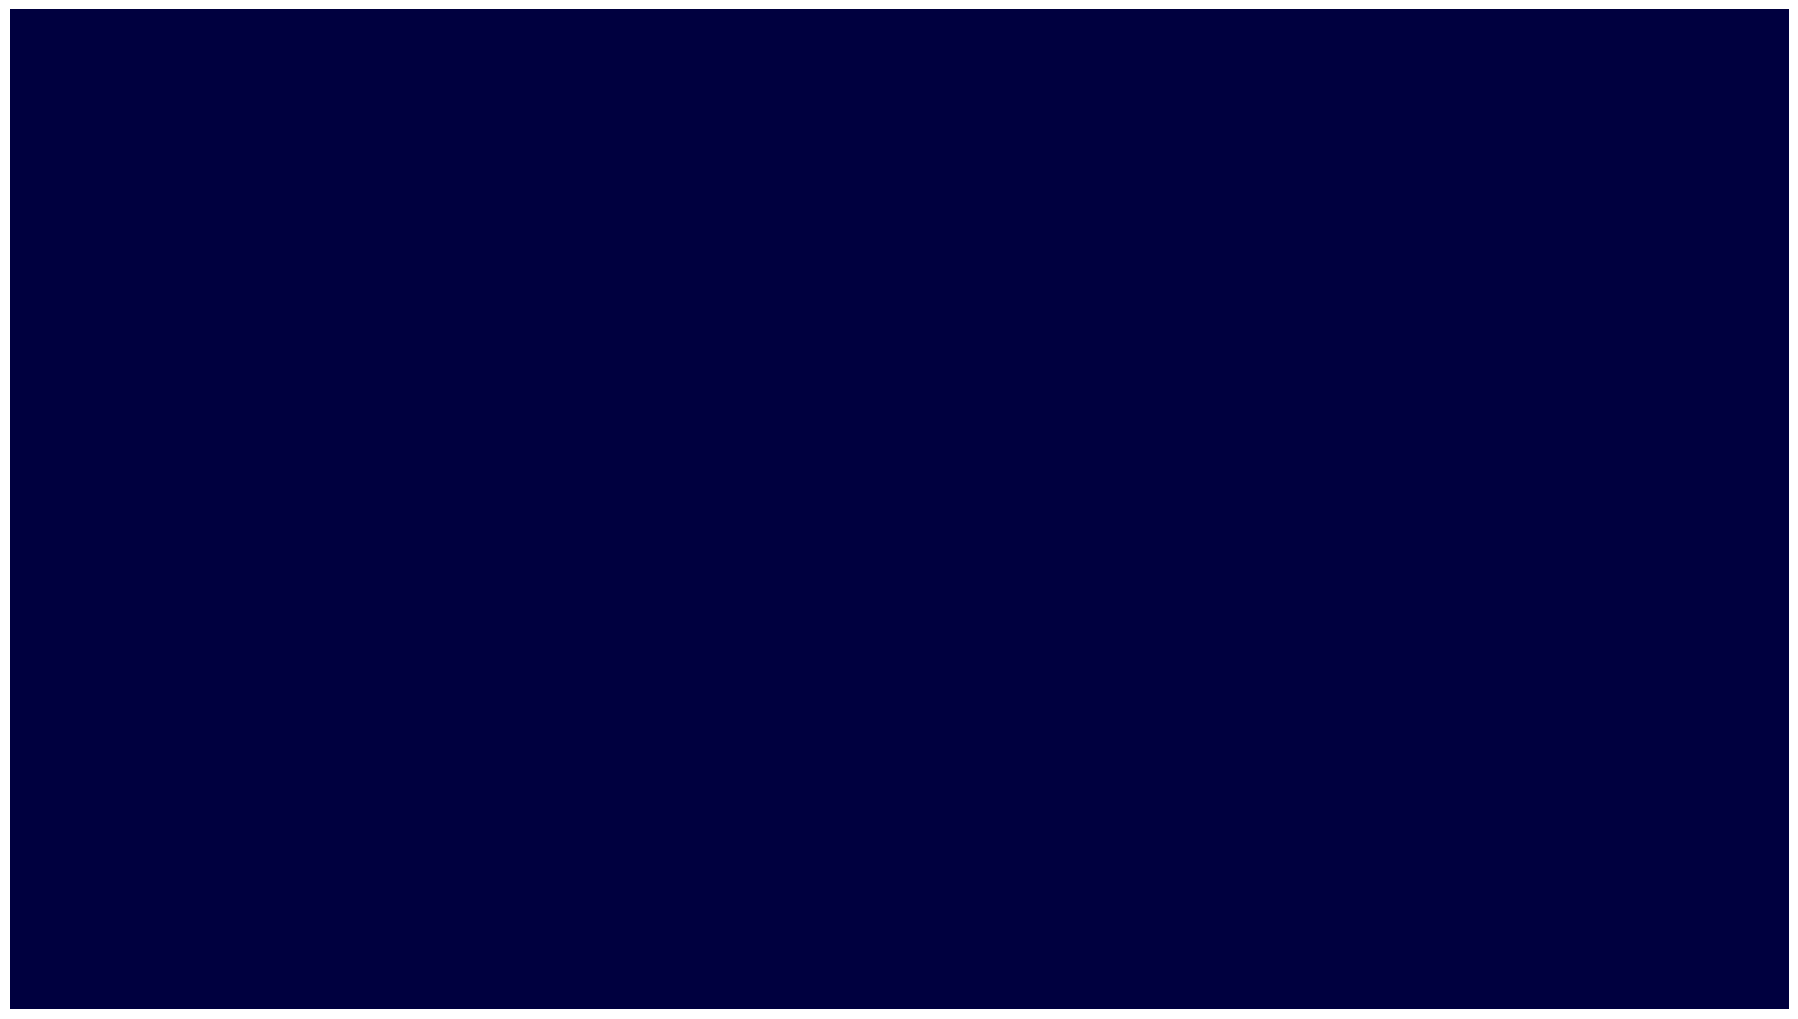

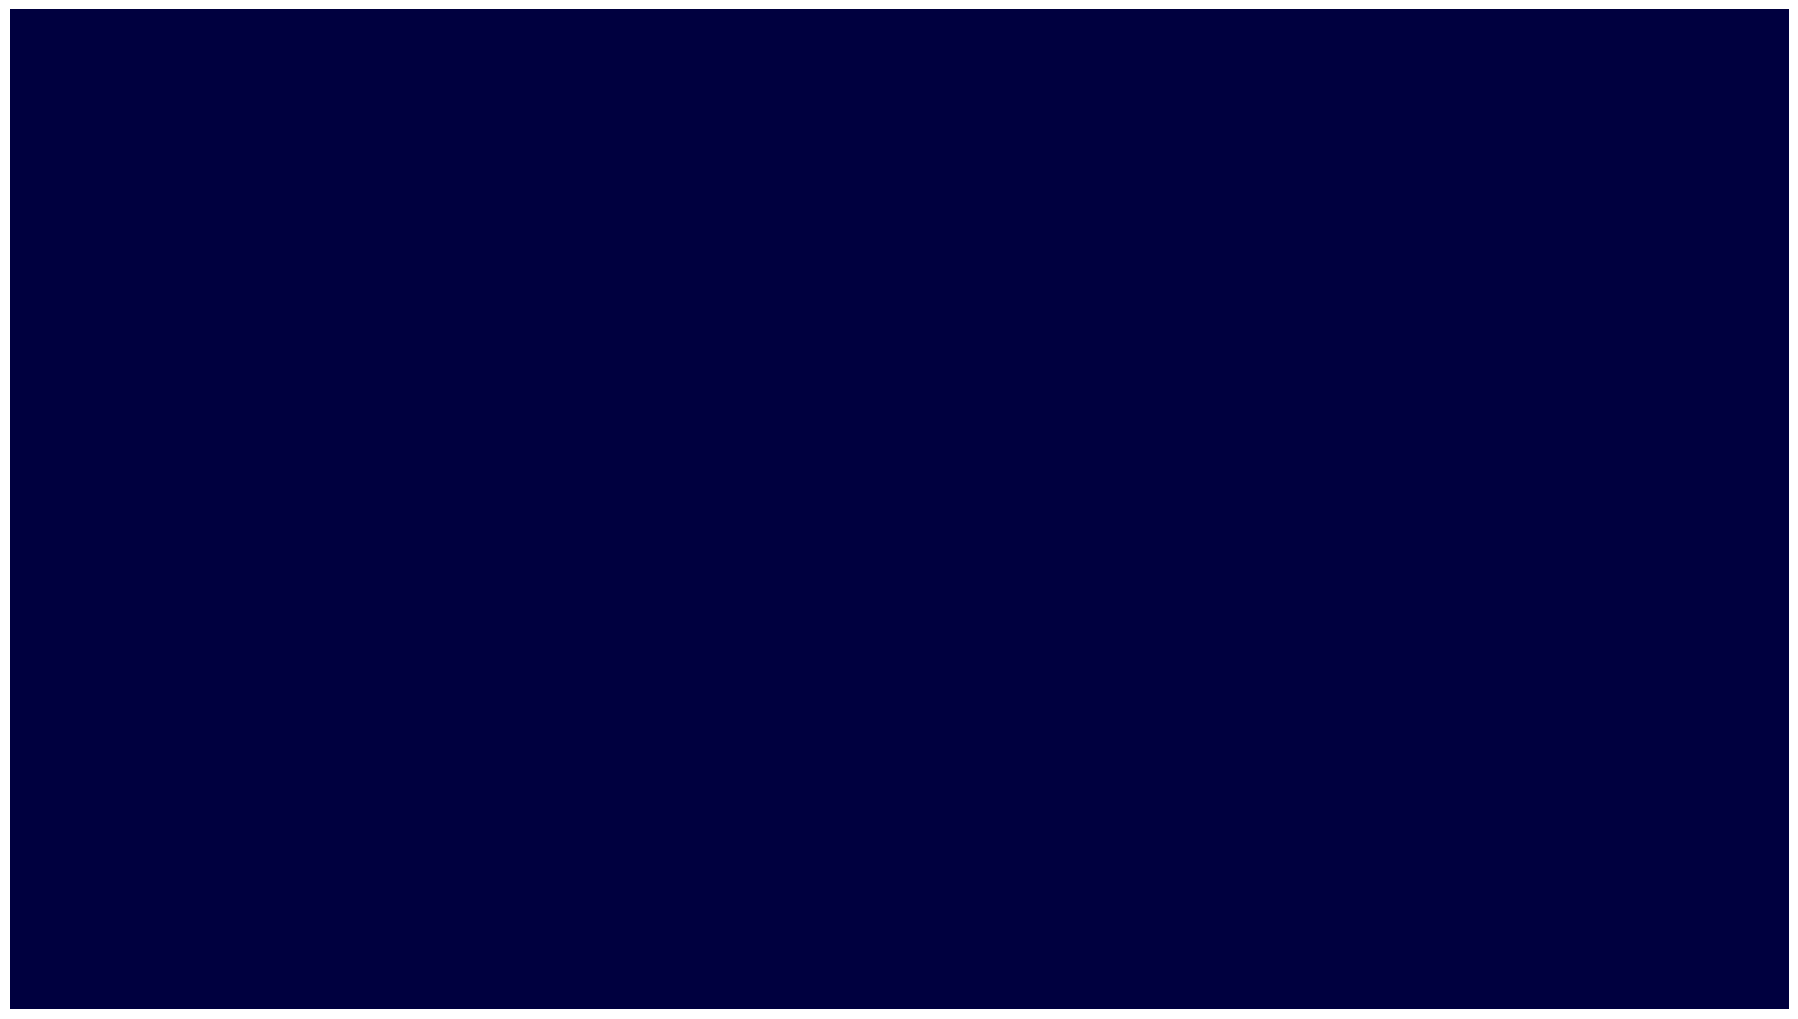

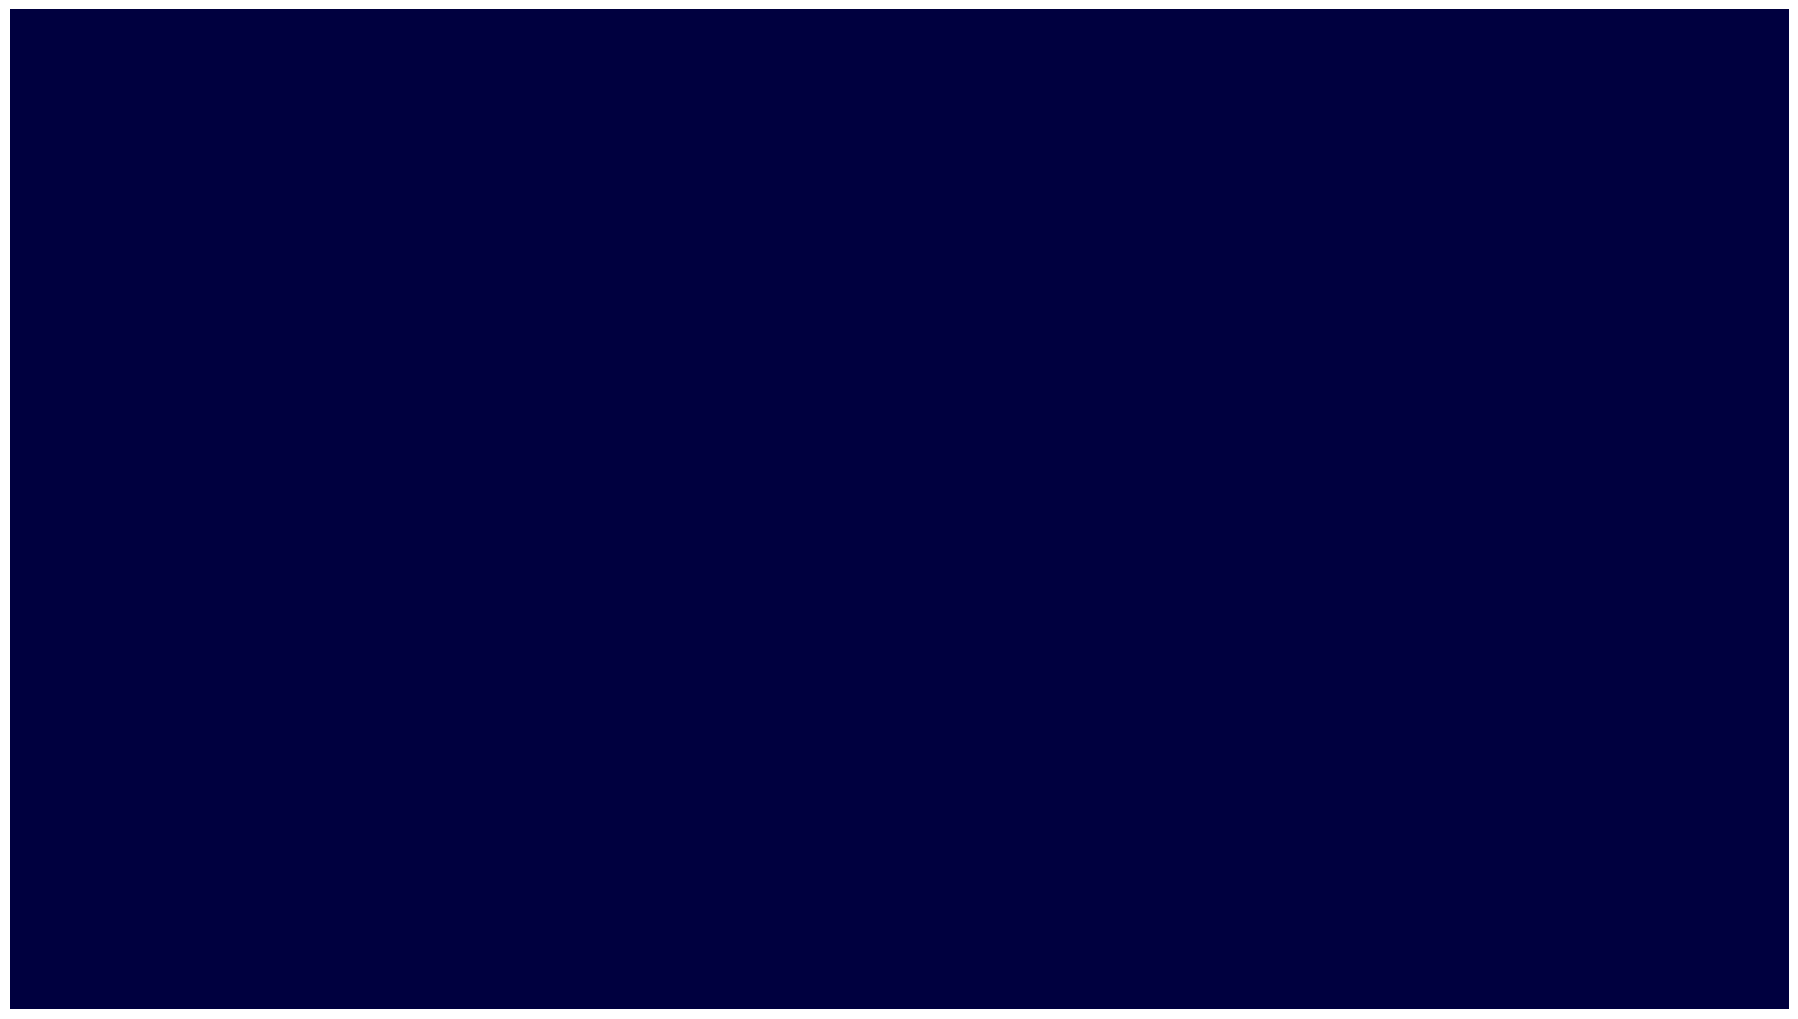

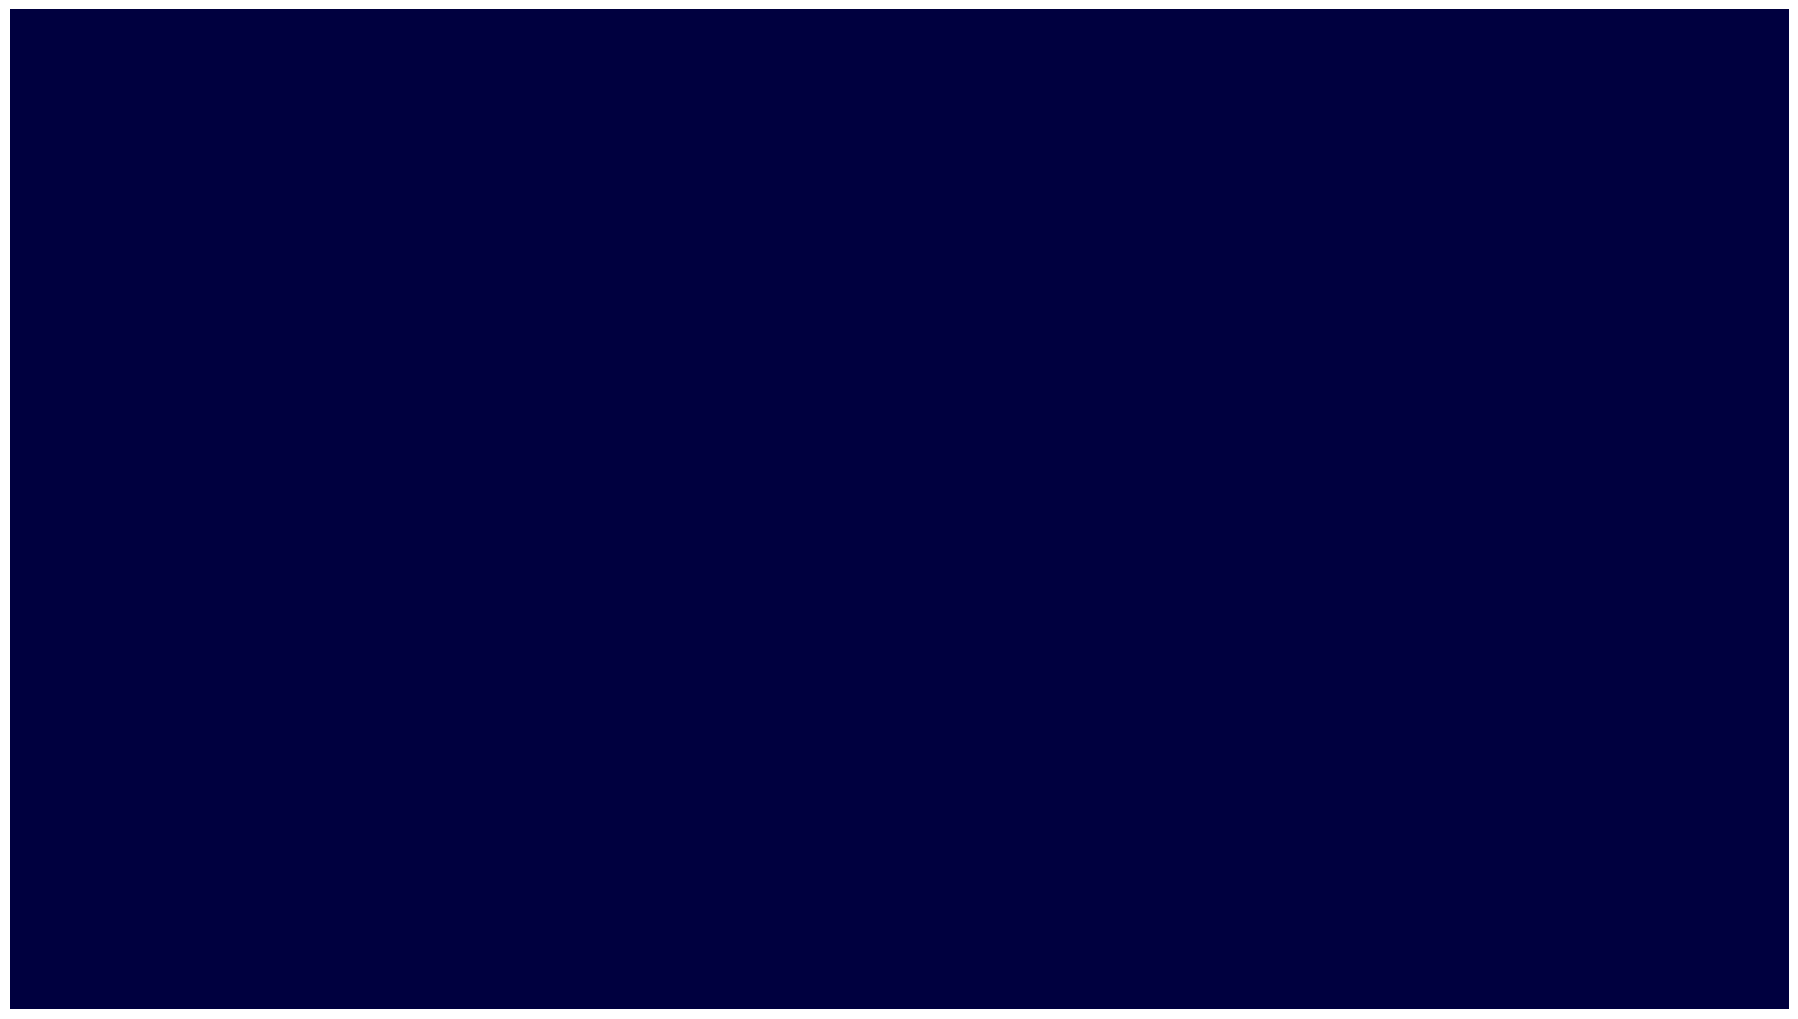

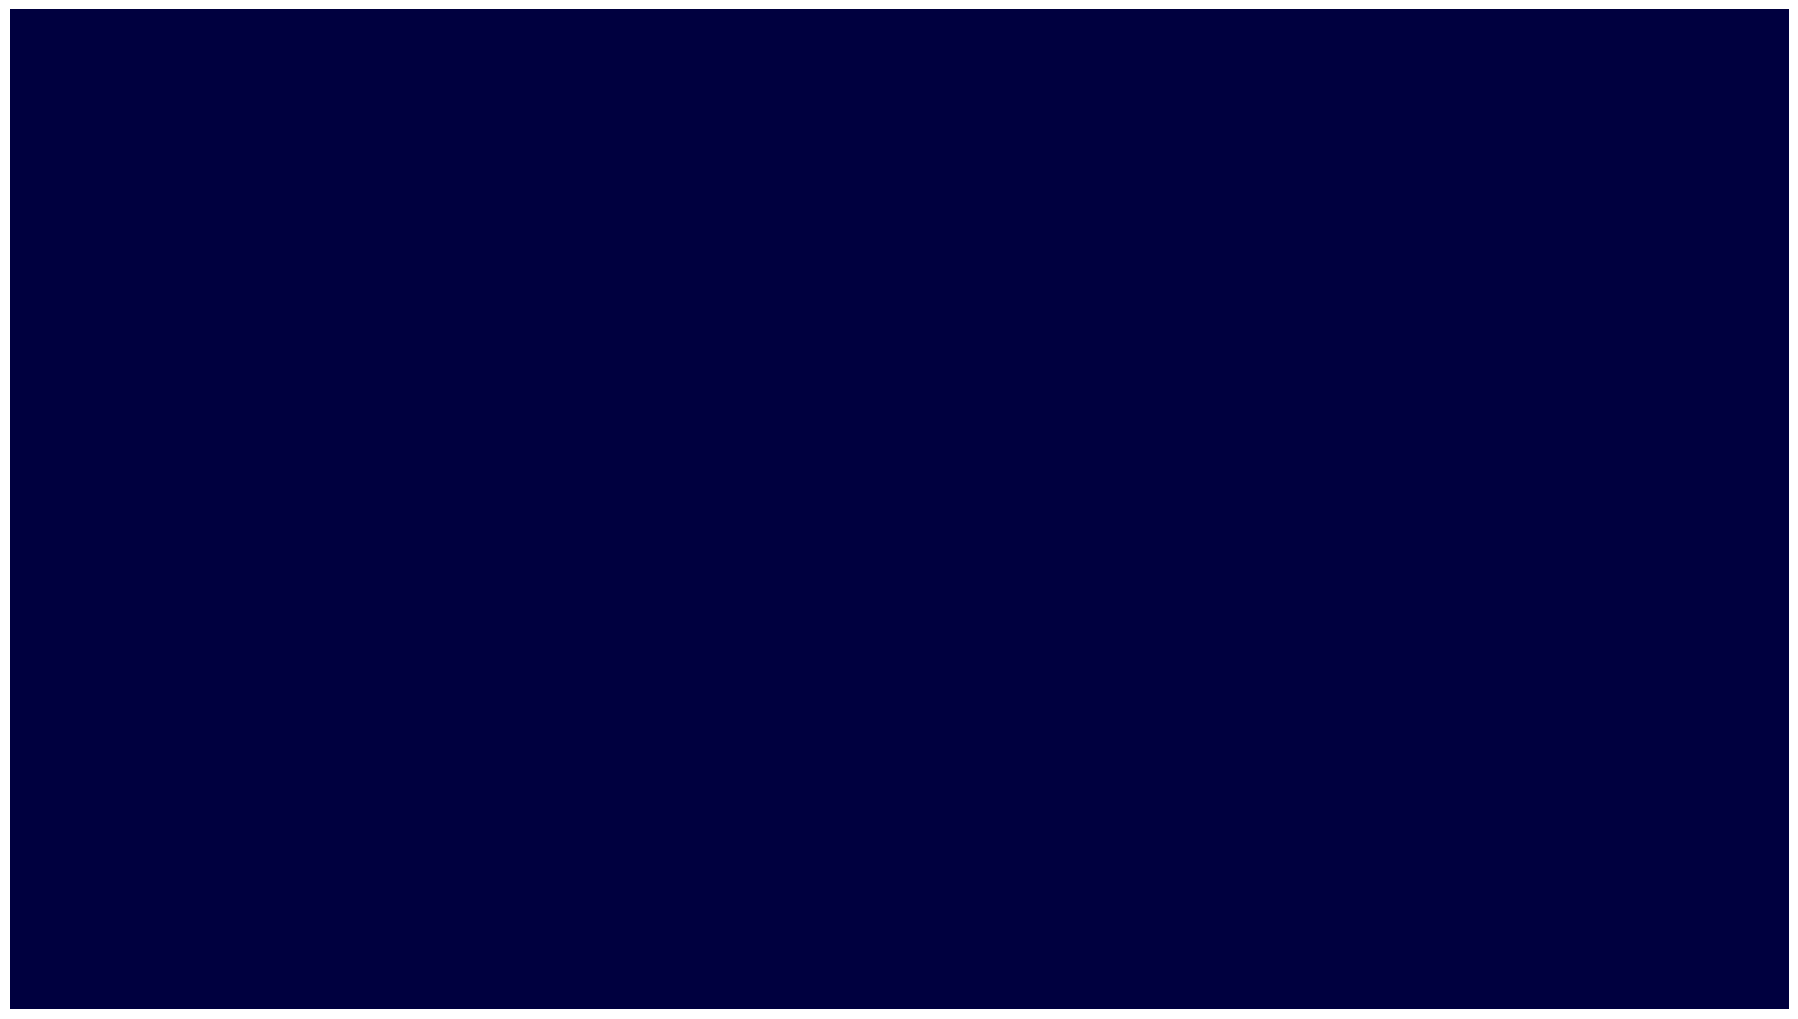

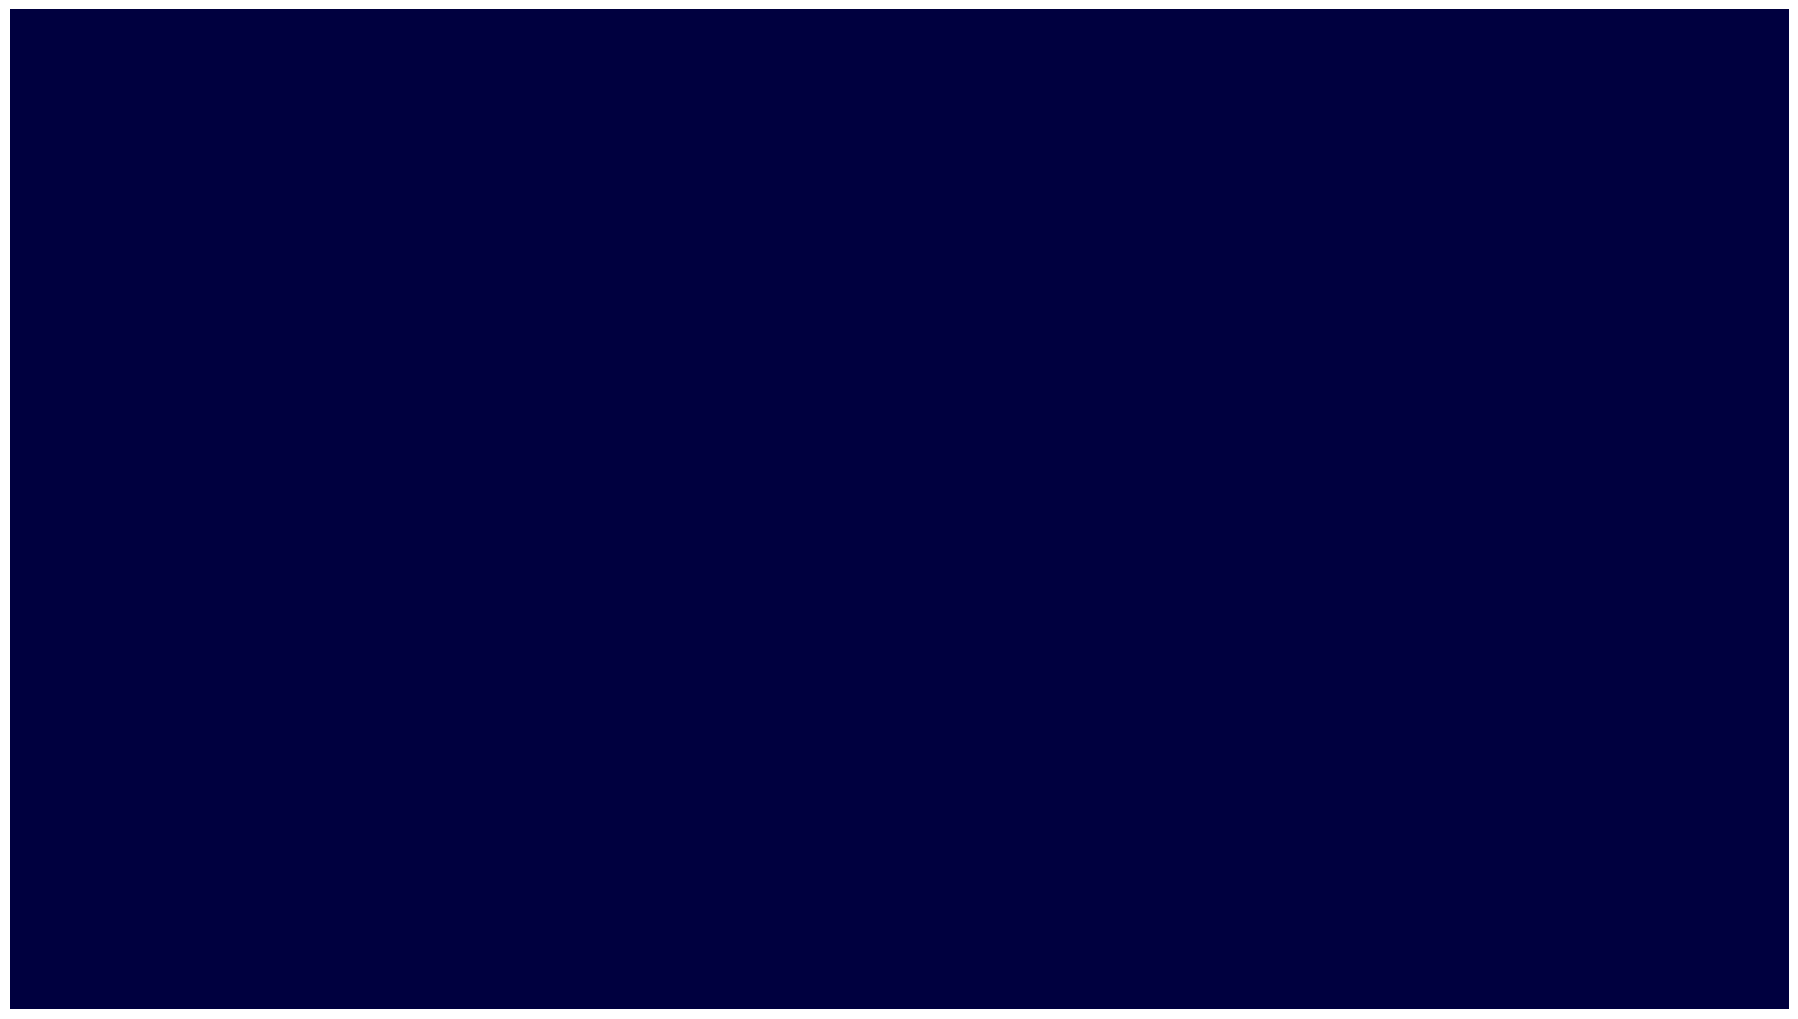

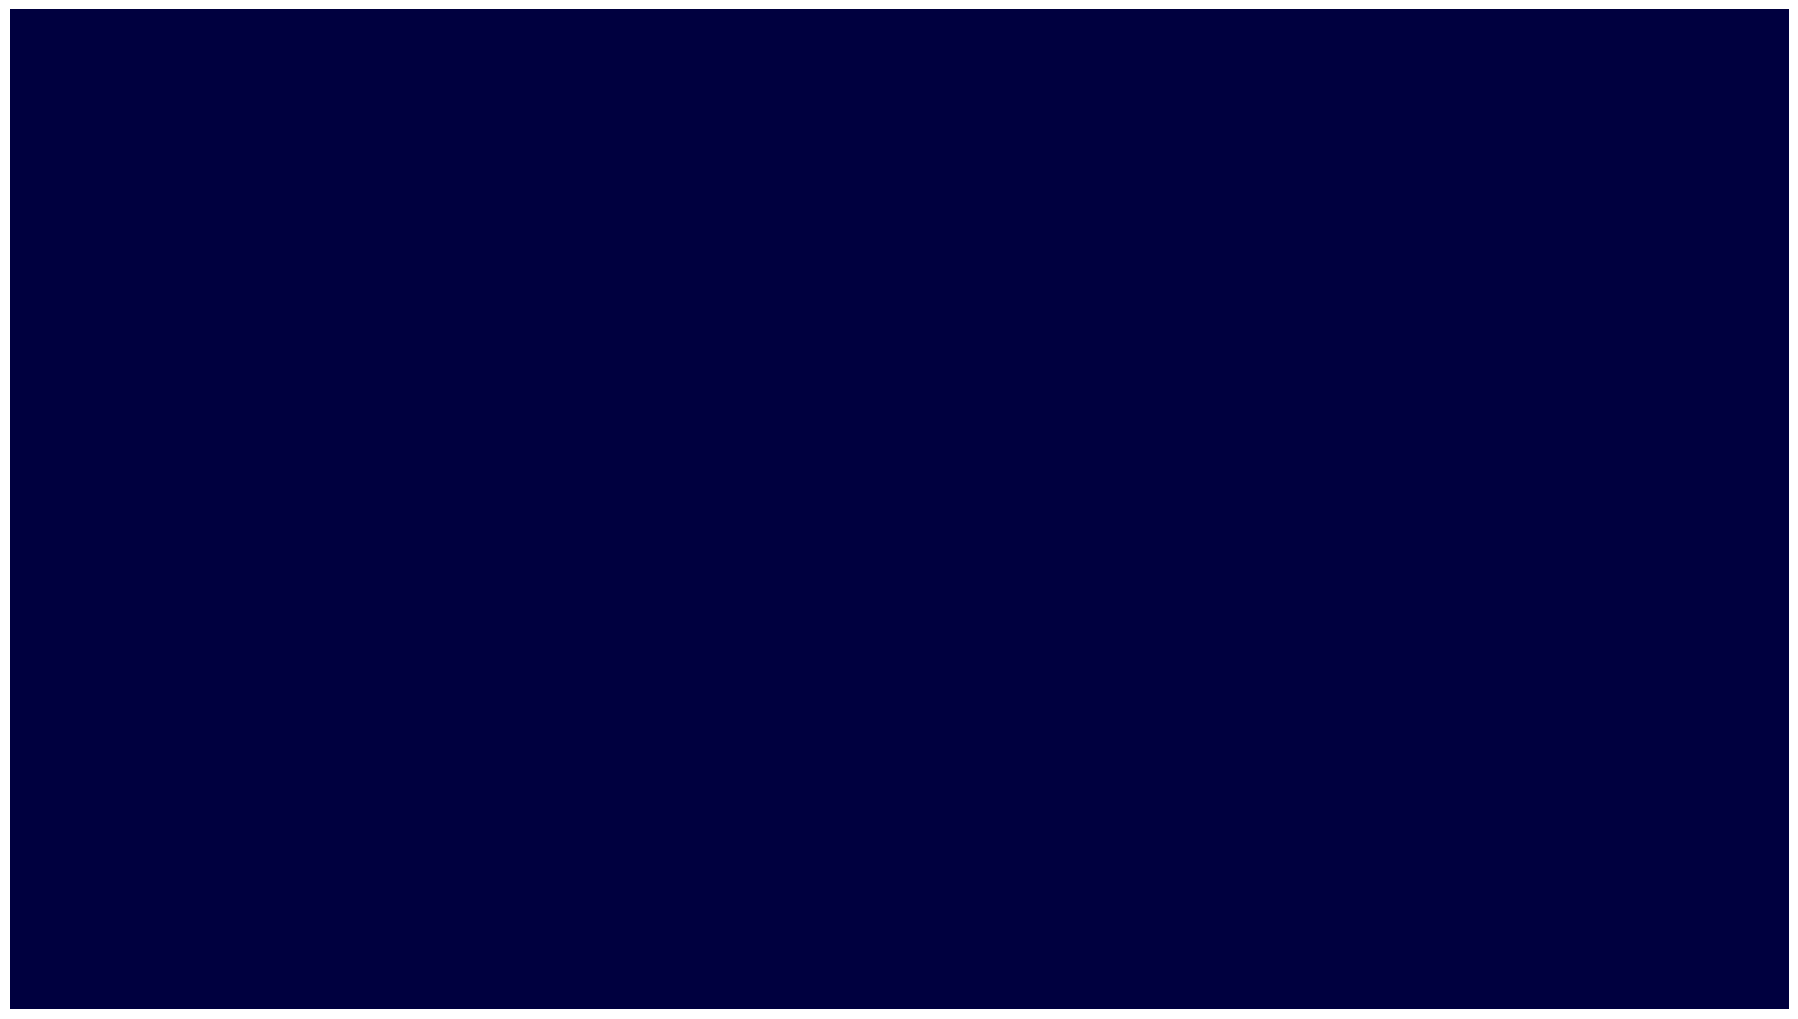

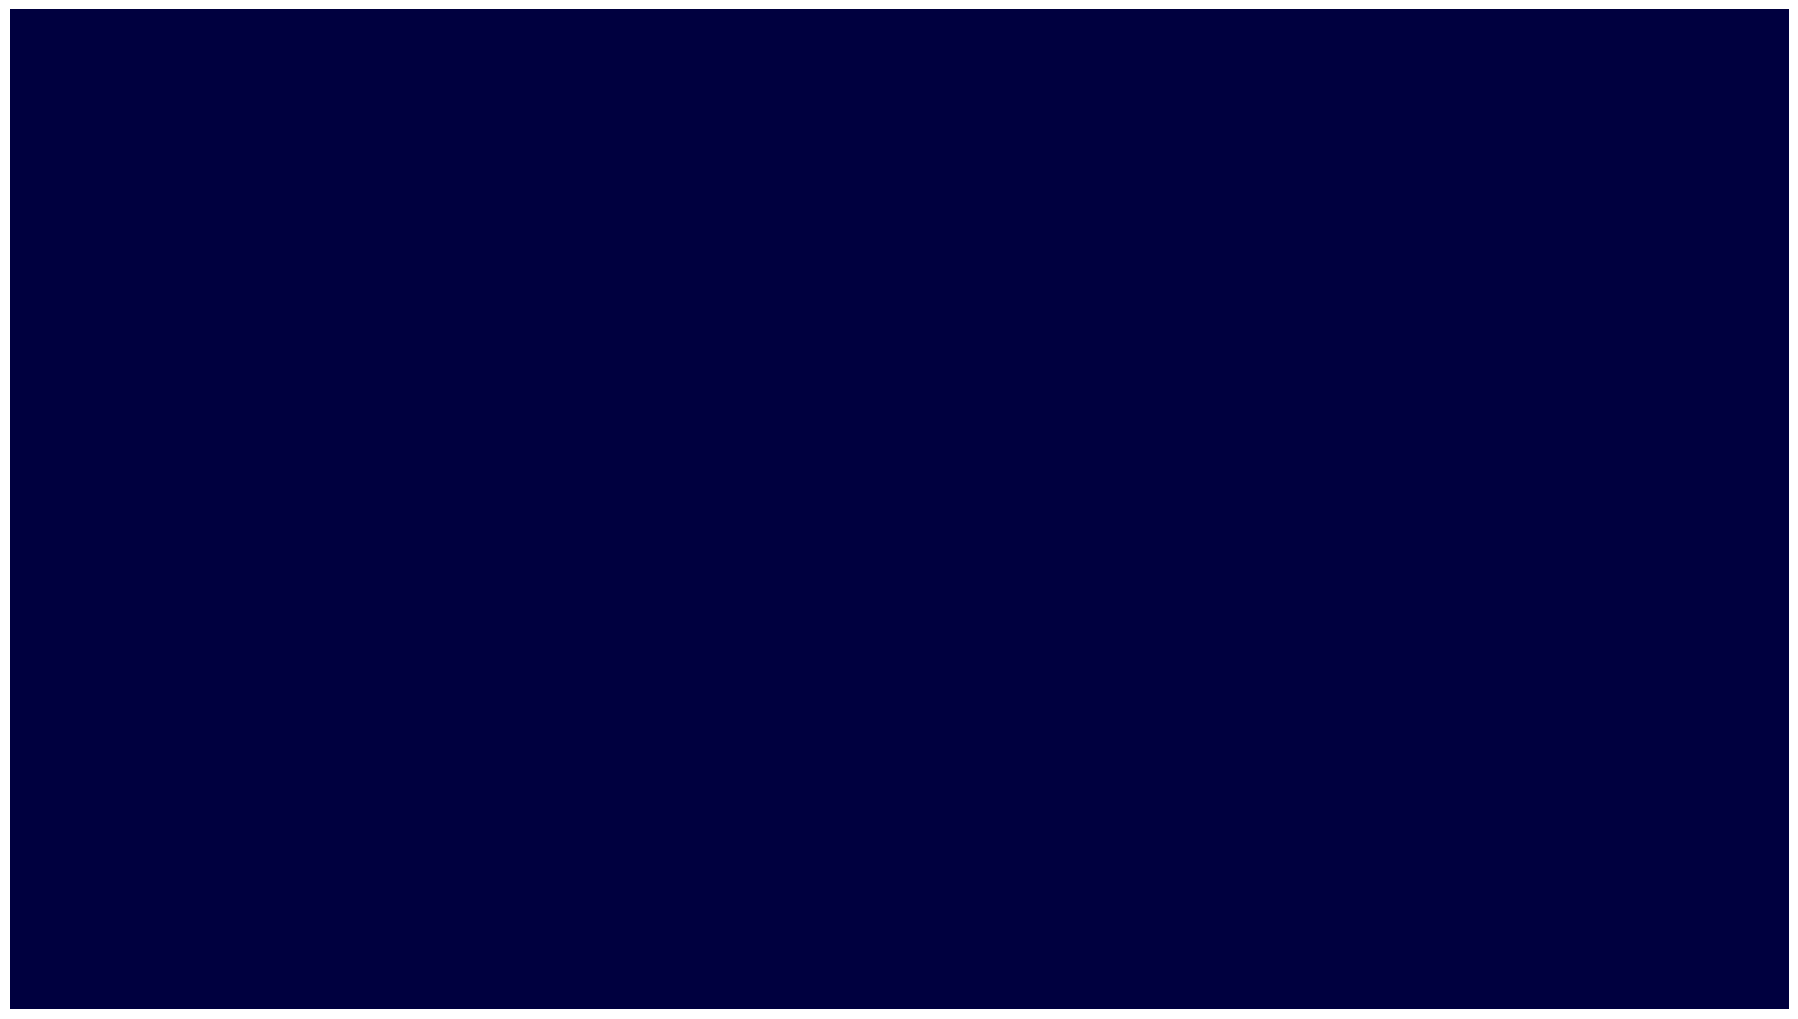

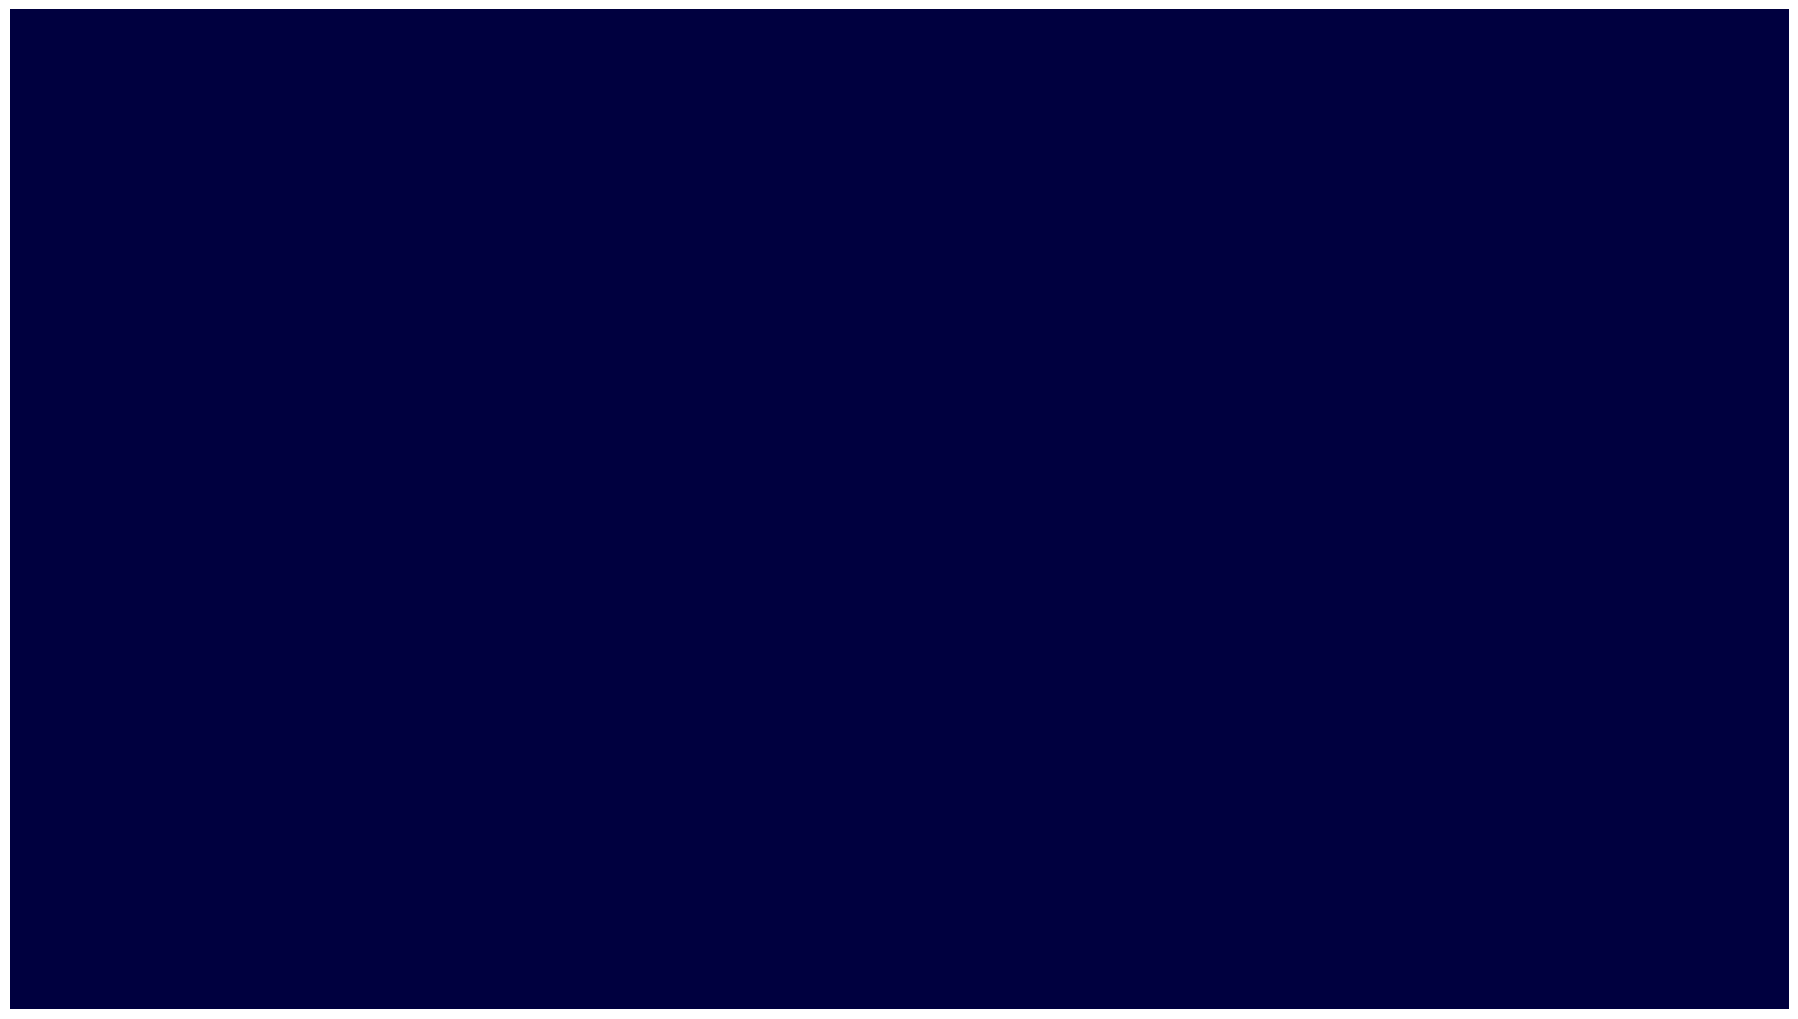

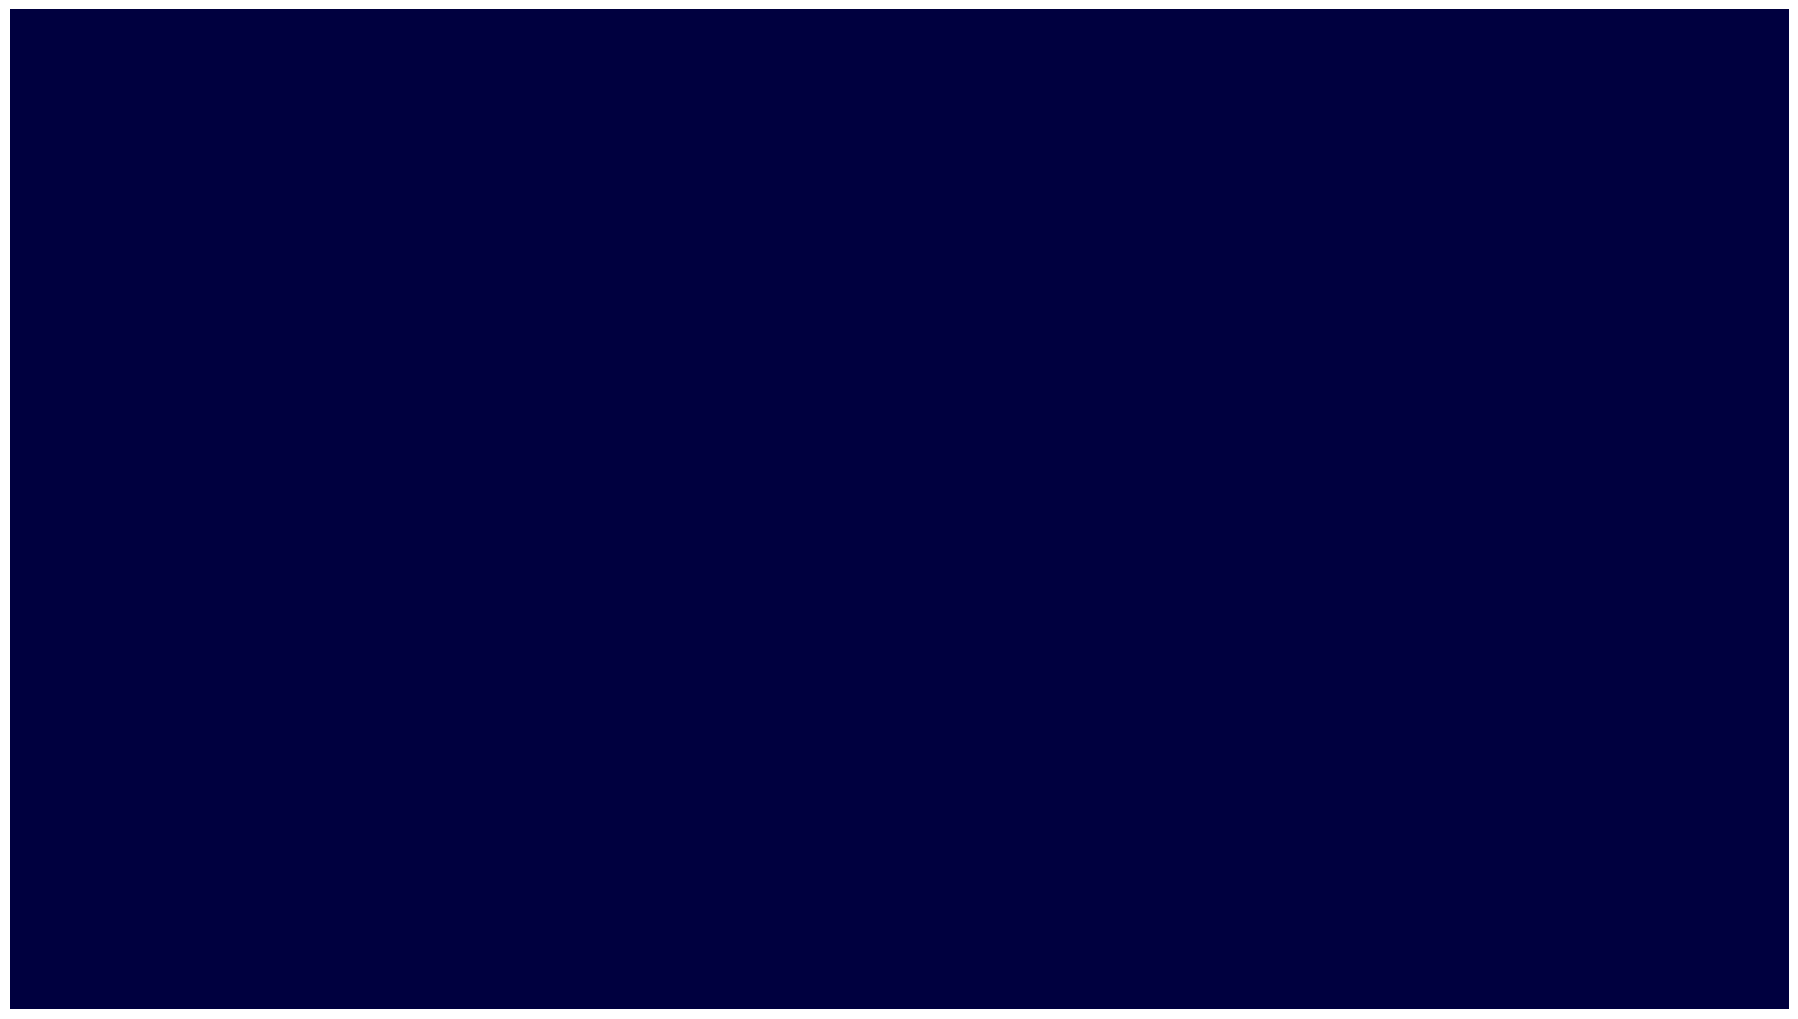

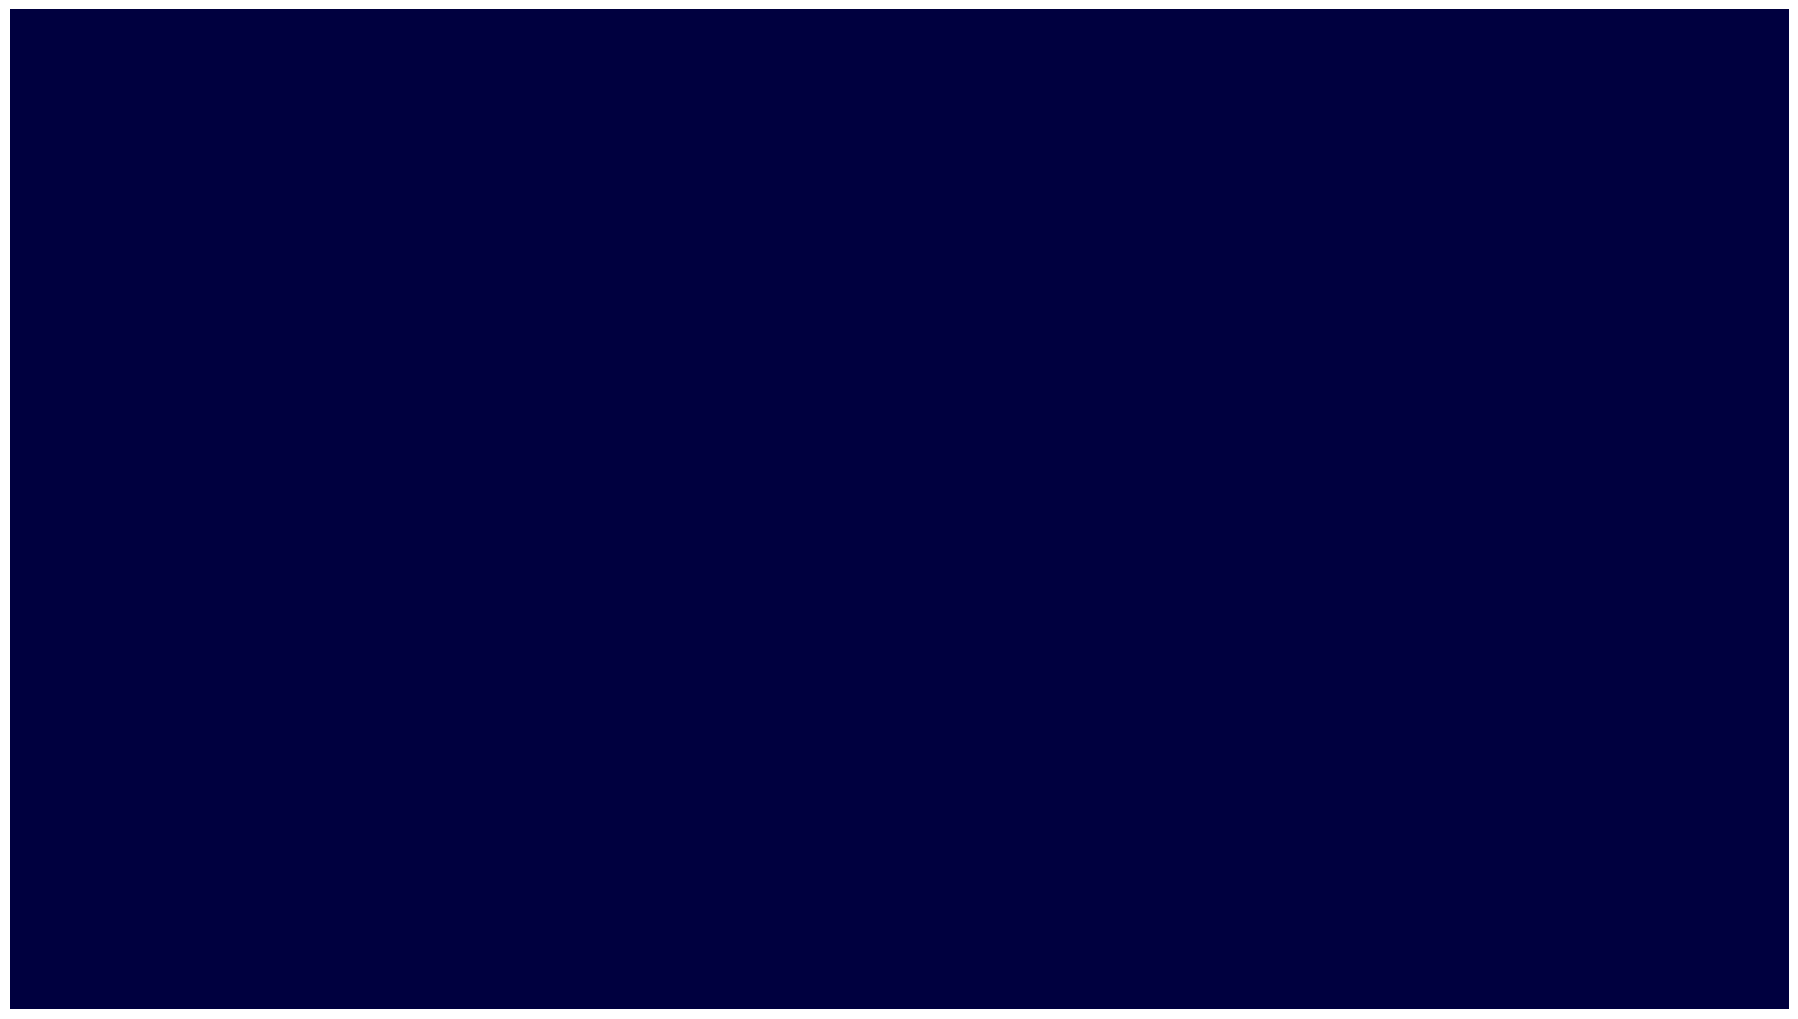

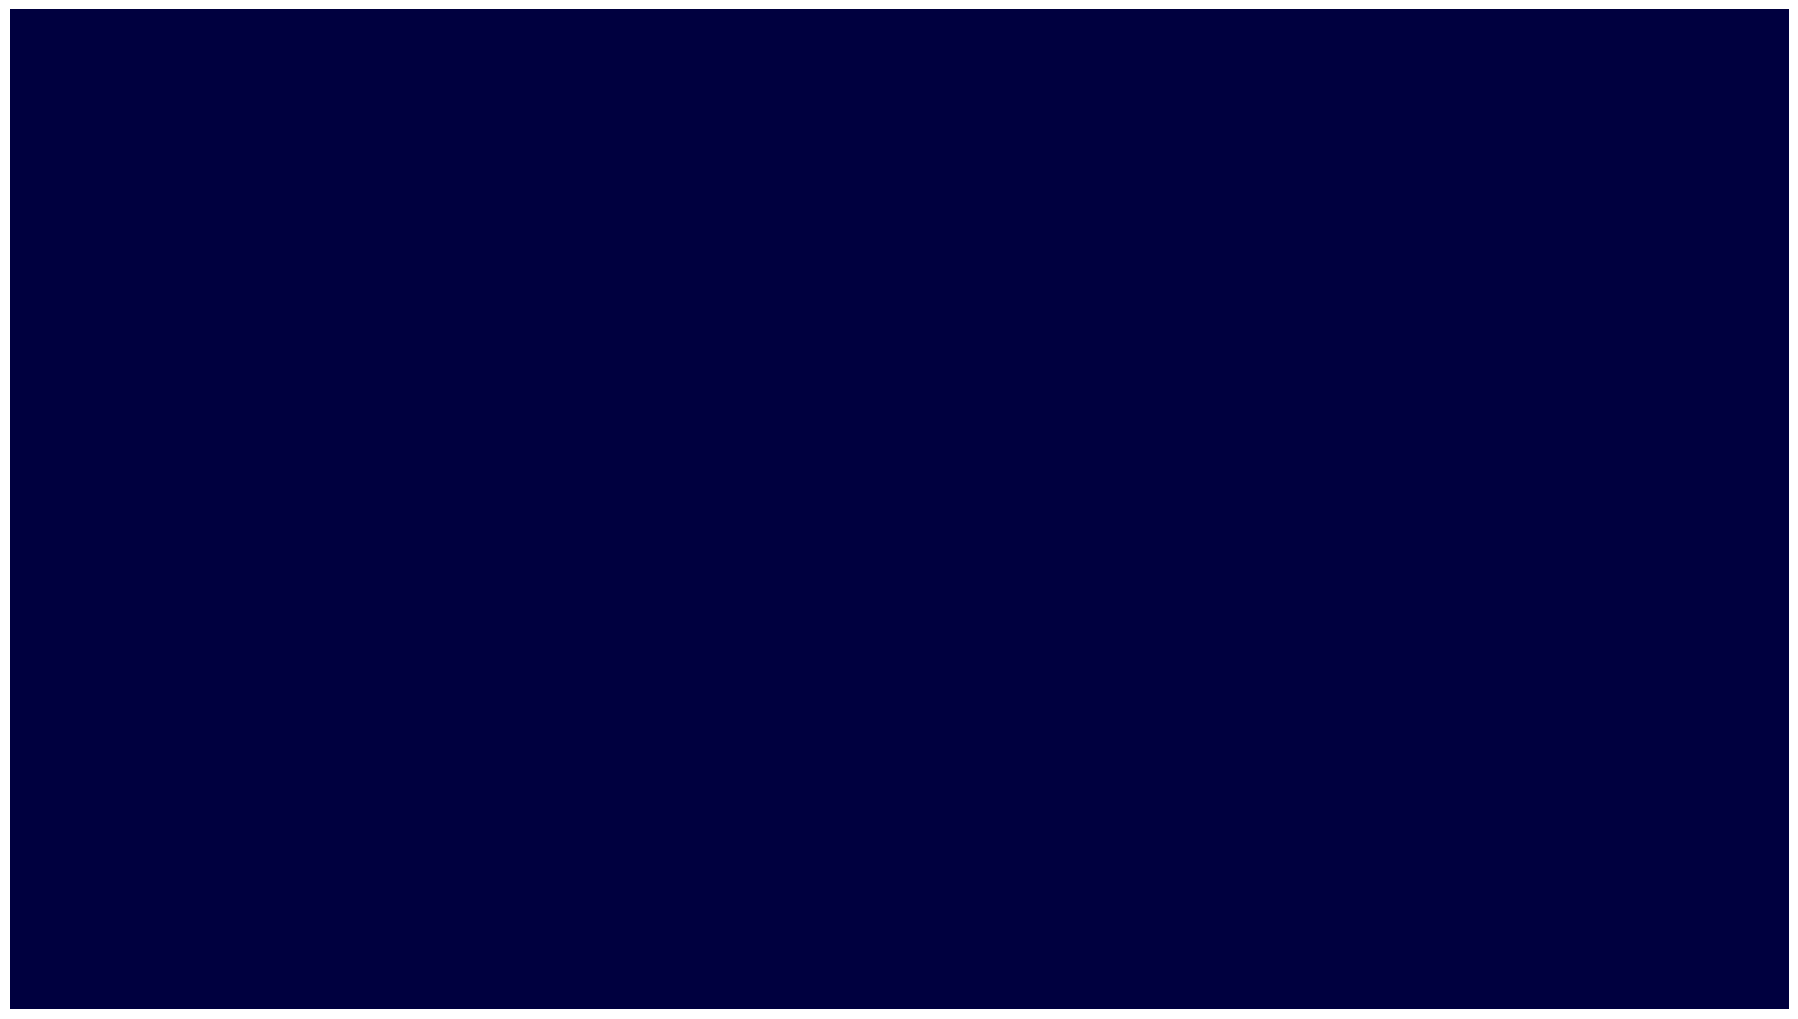

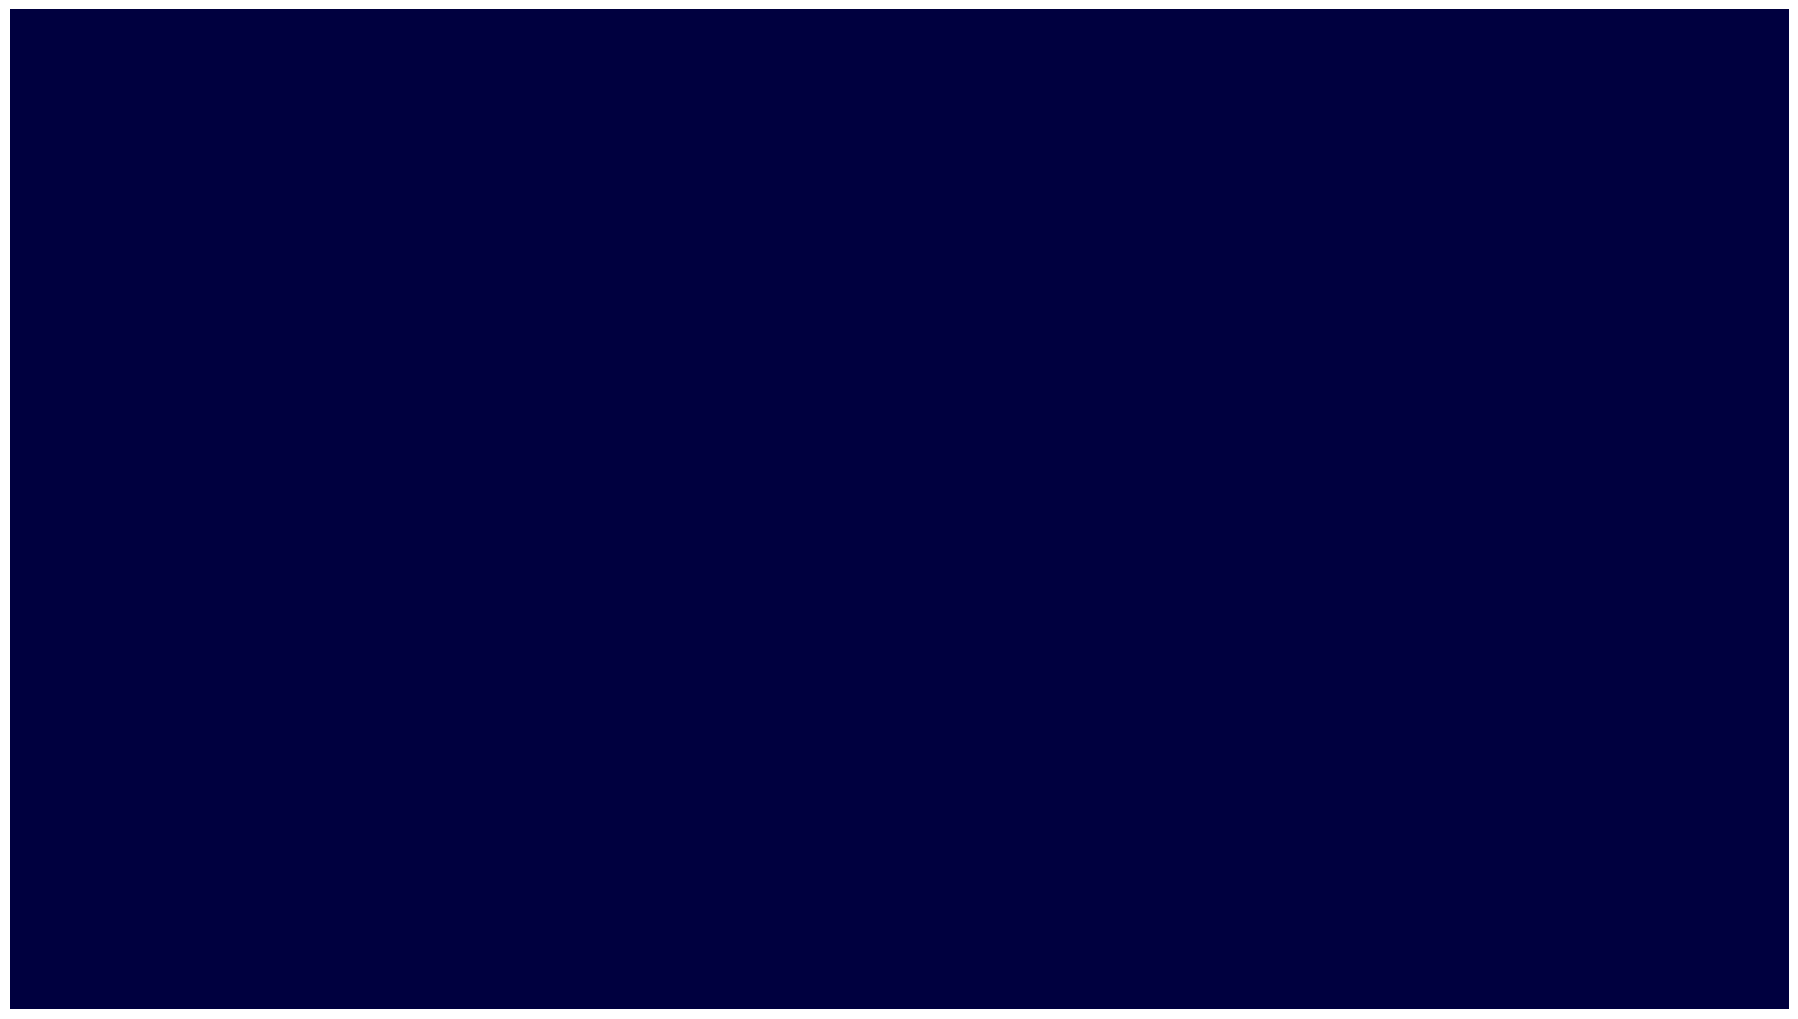

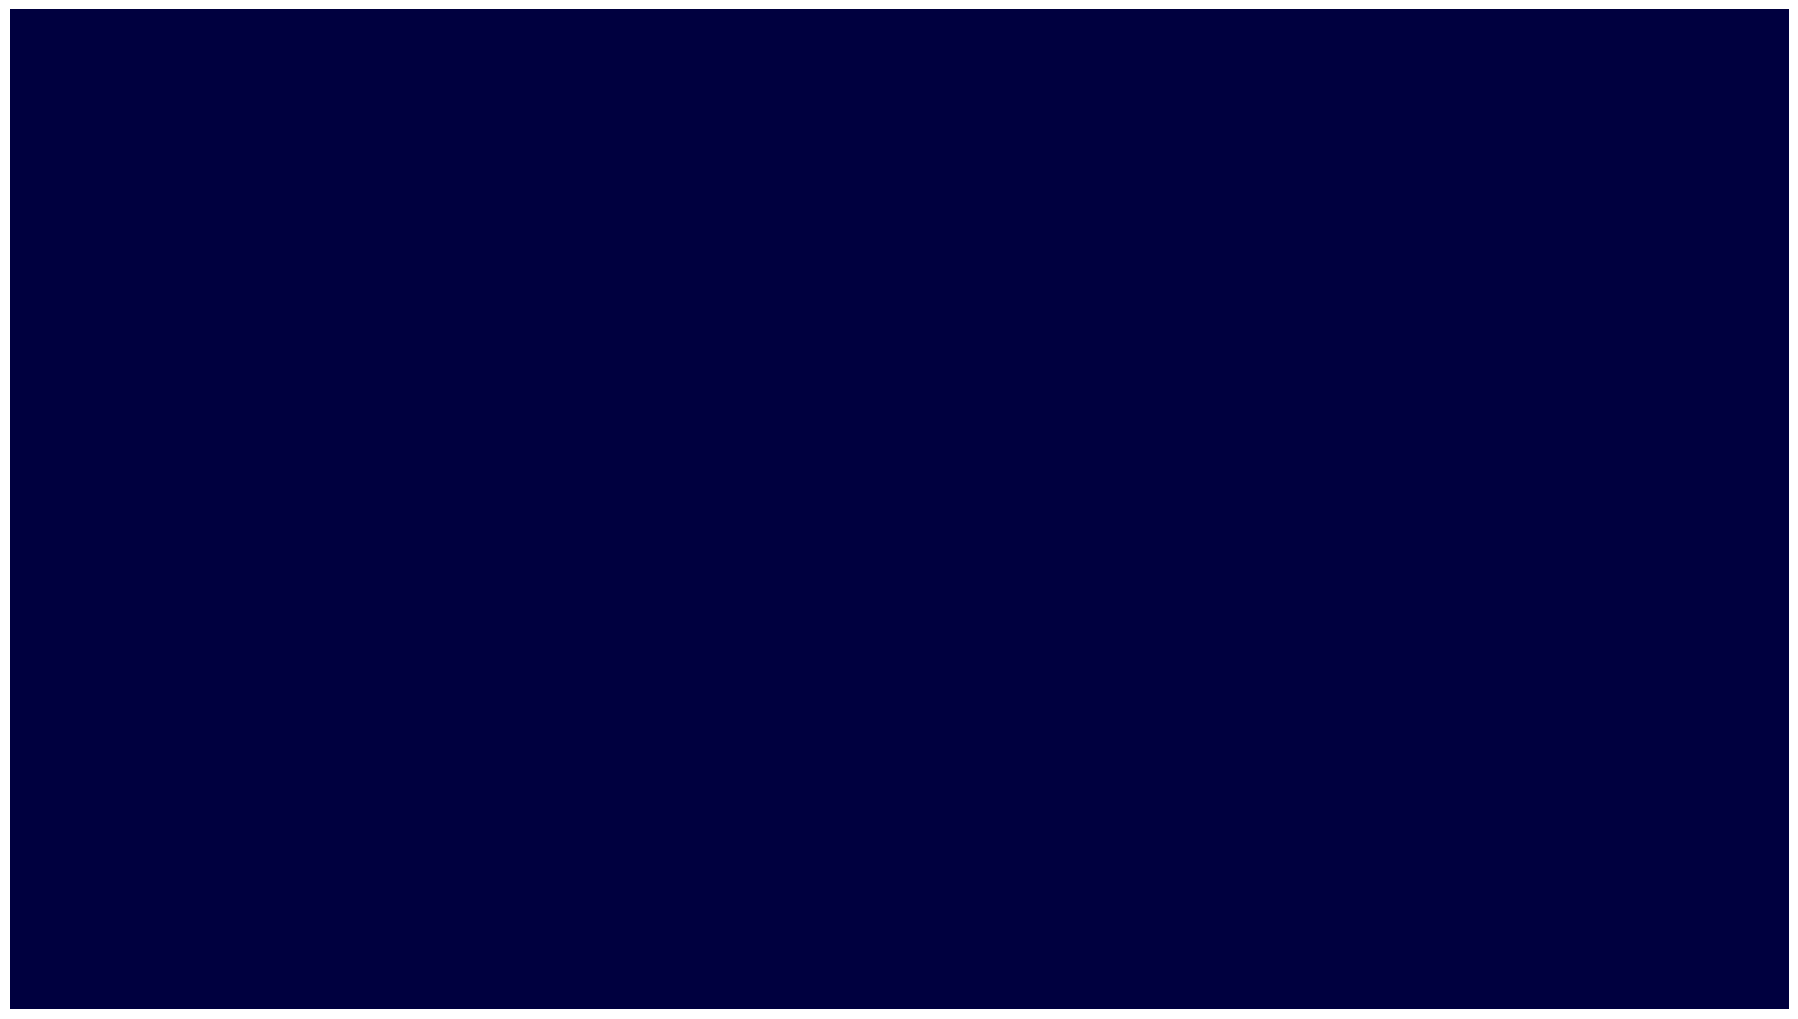

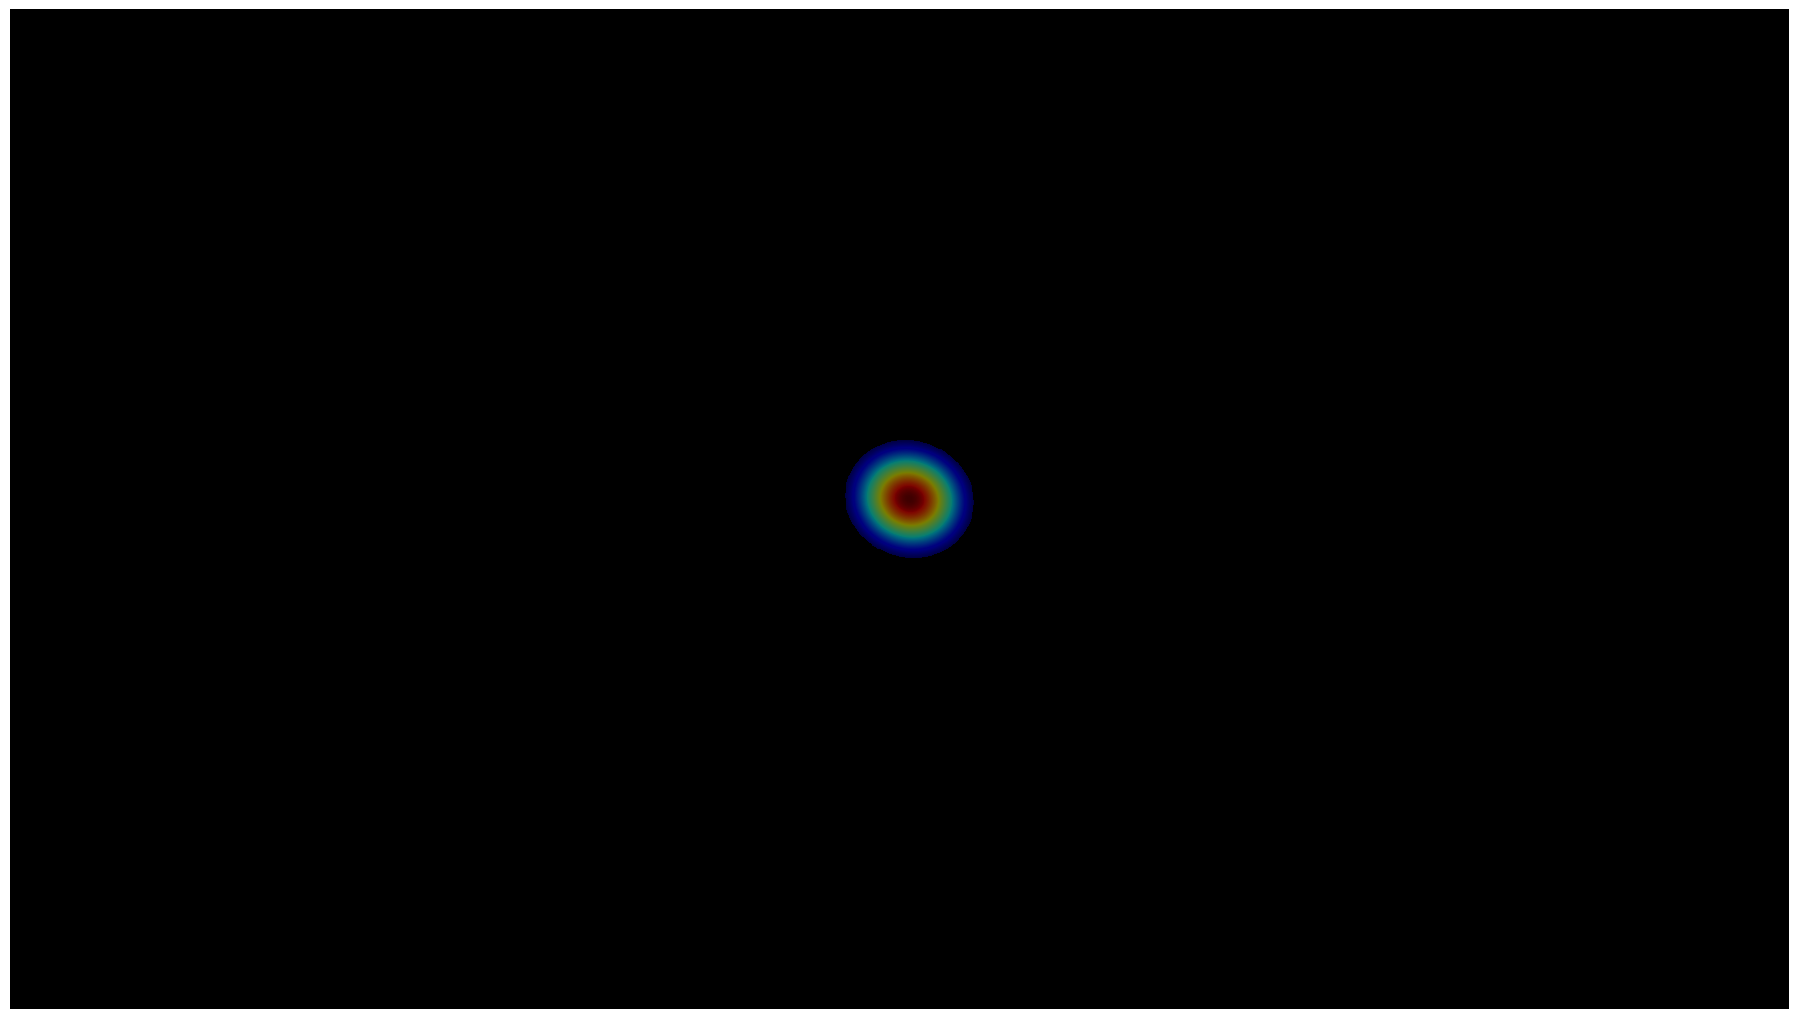

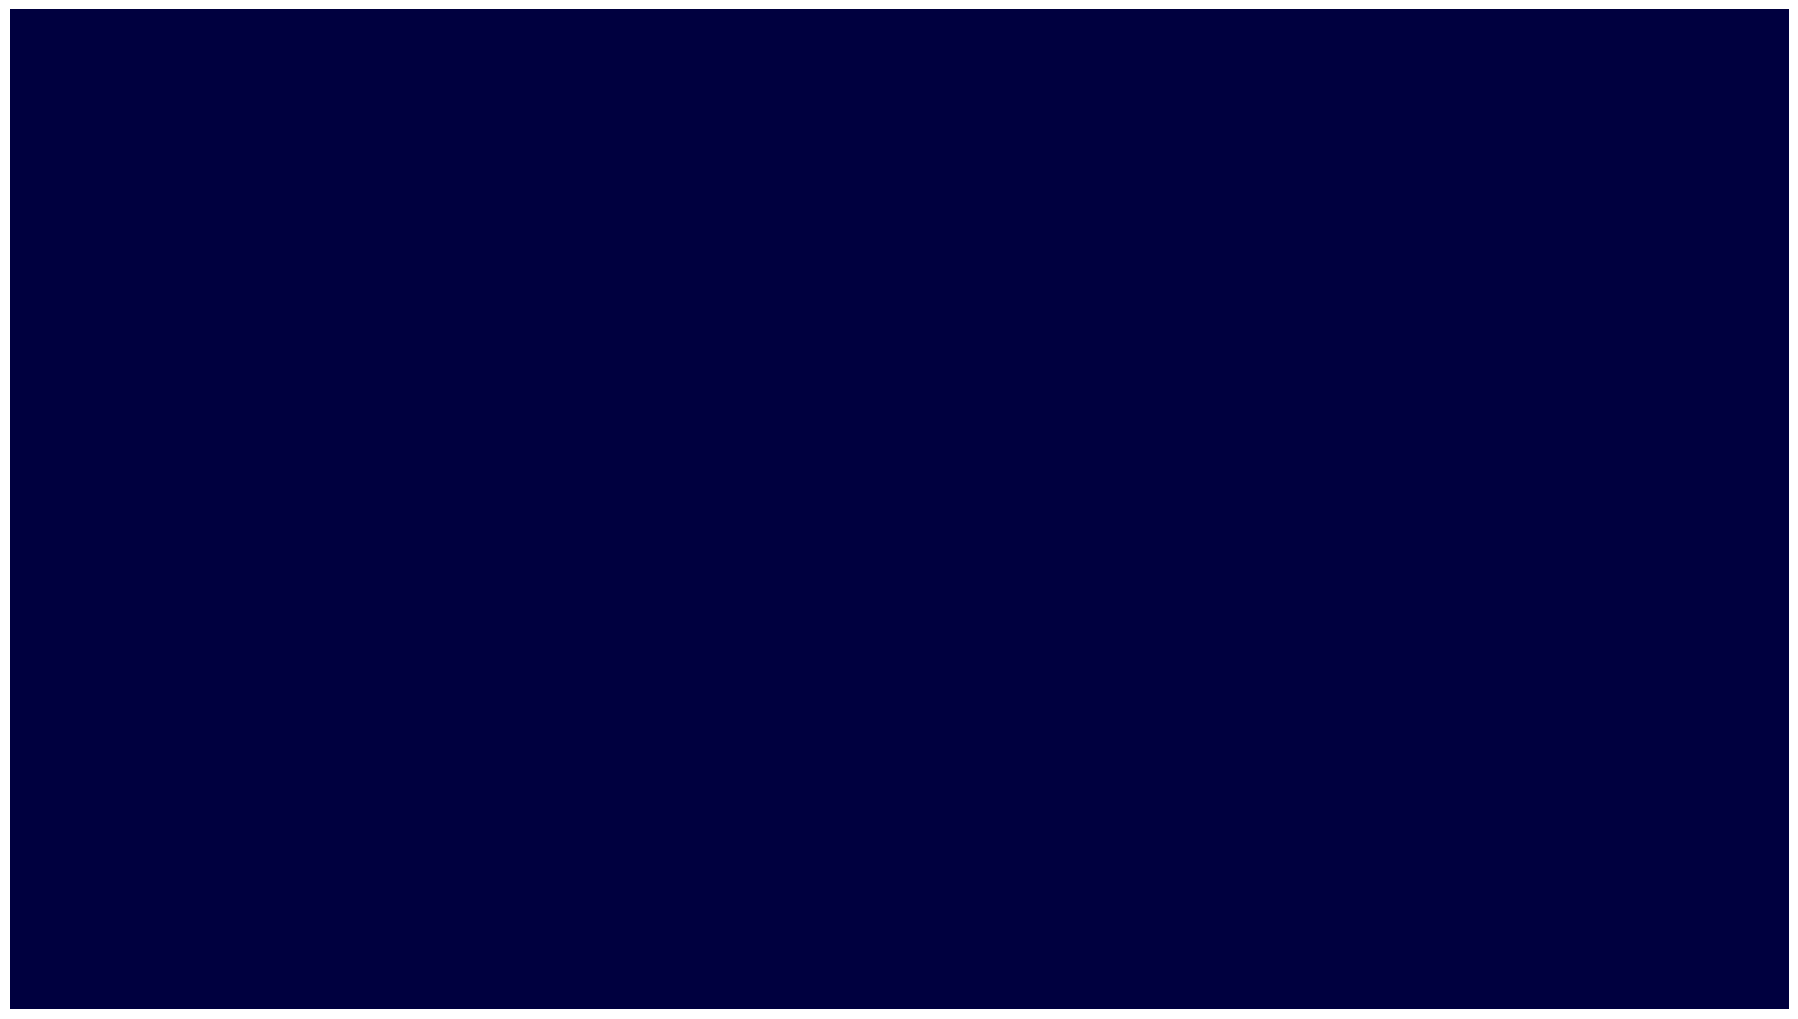

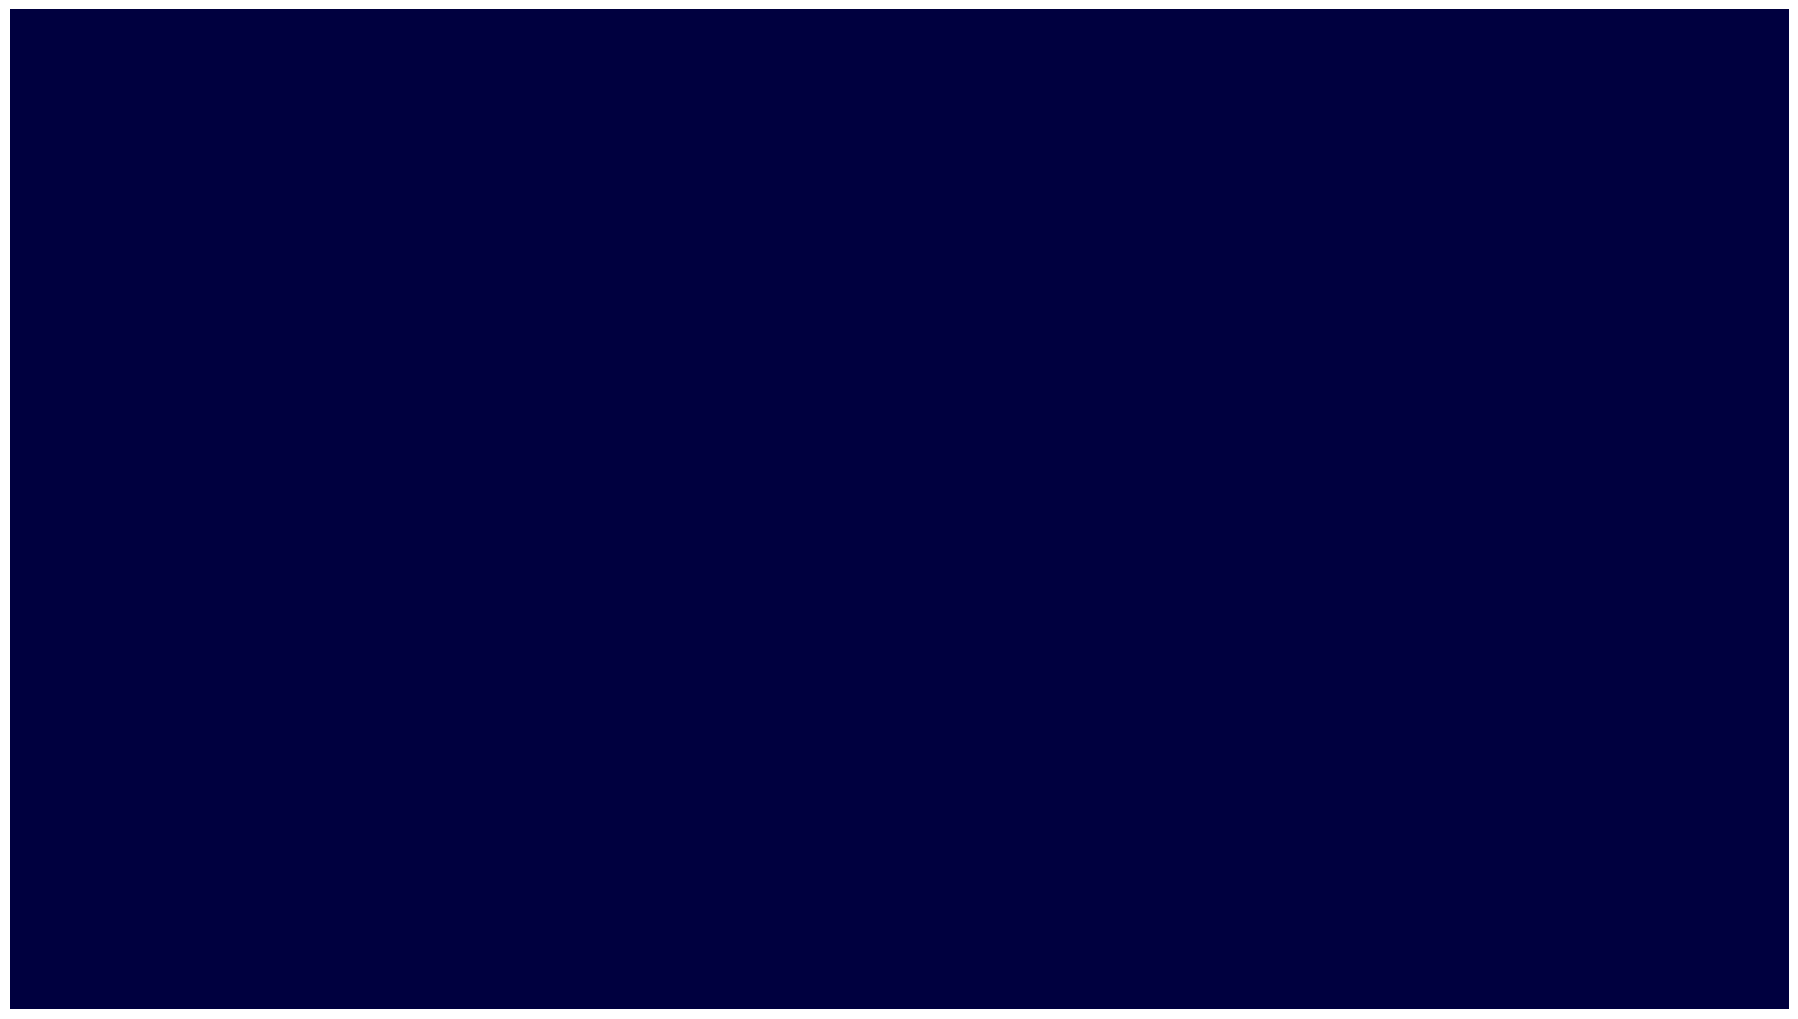

In [ ]:
trials    = np.arange(0,16,1)
games     = np.arange(1,17,1)

x_cross_game,y_cross_game, center_x_game,center_y_game = [],[],[],[]
for game_nr in games:
    #initialize
    x_cross_trial,y_cross_trial, center_x_trial,center_y_trial = [],[],[],[]
    trial_success = []
    radius_list   = []
    #read stimulus data
    data = read_data(partic_id,game_nr,phase='stimulus')


    for trial_nr in (trials):
        #get crosshair position
        x_cross,y_cross = return_cross_pos(partic_id,game_nr,trial_nr)
        if x_cross!=0:
            ###get centroid

            #fixations
            fixations = np.array(data[trial_nr]['events']['Efix'])
            fig_heatmap = draw_heatmap(fixations, dispsize)
            #save heatmap
            img_name_heatmap = 'img_1.png'
            fig_heatmap.savefig(img_name_heatmap)

            #feed heatmap to the function
            #image_load = cv2.imread(img_name_heatmap,0)
            center,radius,image_out = return_centroid_heatmap(img_name_heatmap)
            #print(center)
            if center.size!=0:
                #print(center)
                #print(center)
                
                print(center)

                if center.shape[0]>1:
                    #print(center.shape)
                    print(center)
                    center = center.mean(axis=0) #CHANGE LATER!!!
                    radius = radius.mean(axis=0)
            else:
                print(center)
                center = [[[],[]]]
    
            #print(center)
                
            x_cross_trial.append(x_cross)
            y_cross_trial.append(y_cross)
            center_x_trial.append(center[0][0])
            center_y_trial.append(center[0][1])
            trial_success.append(trial_nr)
                #radius_list.append(radius)
    x_cross_game.append(np.mean(x_cross_trial))
    y_cross_game.append(np.mean(y_cross_trial))
    center_x_game.append(np.mean(center_x_trial))
    center_y_game.append(np.mean(center_y_trial))    

In [ ]:
np.mean([[1,3],[3,4]],axis=0)

In [26]:
def save_plot_inattention_noise():
    pass

prop_label = 'perc_noise_sample'
perc_noise_game_list = []
for game_nr in games:
    perc_noise_trial_list = []
    for trial_nr in trials:
        perc_noise = return_property_value(data_properties, subject_id, game_nr, trial_nr,\
                                           prop_label)
        perc_noise_trial_list.append(perc_noise)
    perc_noise_game_list.append(perc_noise_trial_list)

In [29]:
dist = np.sqrt((np.array(center_x_game) - np.array(x_cross_game))**2 +
               (np.array(center_y_game) - np.array(y_cross_game))**2)
plt.plot(perc_noise_game_list,dist)

<ipython-input-29-36eba6b362f2>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dist = np.sqrt((np.array(center_x_game) - np.array(x_cross_game))**2 +
<ipython-input-29-36eba6b362f2>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  (np.array(center_y_game) - np.array(y_cross_game))**2)


TypeError: loop of ufunc does not support argument 0 of type numpy.ndarray which has no callable sqrt method

In [32]:
center_x_game

[array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 nan,
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 nan,
 array([], dtype=float64),
 nan]